In [ ]:
!pip install torch_optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 5.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/CACD2000_processed.zip" -d "/content/data"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/data/CACD2000_processed/37_Debra_Messing_0010.jpg  
  inflating: /content/data/CACD2000_processed/23_Zac_Efron_0014.jpg  
  inflating: /content/data/CACD2000_processed/22_Sarah_Gadon_0001.jpg  
  inflating: /content/data/CACD2000_processed/24_Joshua_Bowman_0001.jpg  
  inflating: /content/data/CACD2000_processed/54_Kevin_Costner_0001.jpg  
  inflating: /content/data/CACD2000_processed/39_Michael_Ealy_0004.jpg  
  inflating: /content/data/CACD2000_processed/34_Katherine_Moennig_0007.jpg  
  inflating: /content/data/CACD2000_processed/26_Natalia_Tena_0013.jpg  
  inflating: /content/data/CACD2000_processed/44_Emmanuelle_Seigner_0007.jpg  
  inflating: /content/data/CACD2000_processed/36_Leonardo_DiCaprio_0008.jpg  
  inflating: /content/data/CACD2000_processed/31_Thora_Birch_0006.jpg  
  inflating: /content/data/CACD2000_processed/38_Jesse_Tyler_Ferguson_0009.jpg  
  inflating: /content/data/CACD2000_processed

In [ ]:
import torch

# Khởi tạo device tùy vào khả năng sử dụng GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Đang sử dụng thiết bị: {device}")


Đang sử dụng thiết bị: cuda


#Xóa nếu chia lộn

In [ ]:
import shutil
import os

# Định nghĩa các thư mục cần xóa
folders_to_delete = ['/content/train', '/content/val', '/content/test', '/content/train_ssl']

# Hàm xóa thư mục và các tệp con bên trong
def delete_folders(folders):
    for folder in folders:
        if os.path.exists(folder):
            shutil.rmtree(folder)
            print(f"Đã xóa thư mục: {folder}")
        else:
            print(f"Thư mục {folder} không tồn tại.")

# Gọi hàm xóa các thư mục
delete_folders(folders_to_delete)


Đã xóa thư mục: /content/train
Đã xóa thư mục: /content/val
Đã xóa thư mục: /content/test
Đã xóa thư mục: /content/train_ssl


#Chuẩn bị dữ liệu

#Full data

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Đường dẫn tới dữ liệu
folder_path = "/content/data/CACD2000_processed"

# Lấy danh sách tất cả các file ảnh trong folder
all_images = os.listdir(folder_path)

# Chia dữ liệu thành 3 phần: train, val, test
train_images, test_images = train_test_split(all_images, test_size=0.1, random_state=42)
train_images, val_images = train_test_split(train_images, test_size=0.1, random_state=42)

# Hàm di chuyển ảnh vào các thư mục tương ứng
def move_images(image_list, folder):
    for img in image_list:
        src = os.path.join(folder_path, img)  # Đường dẫn ảnh gốc
        dst = os.path.join(folder, img)  # Đường dẫn ảnh đích
        if not os.path.exists(folder):
            os.makedirs(folder)  # Nếu thư mục đích chưa tồn tại, tạo mới
        shutil.copy(src, dst)  # Sao chép ảnh vào thư mục đích

# Di chuyển ảnh vào các thư mục tương ứng
move_images(train_images, '/content/train')
move_images(val_images, '/content/val')
move_images(test_images, '/content/test')

# Hàm để kiểm tra số lượng ảnh trong một thư mục
def count_images_in_directory(directory):
    # Lọc ra các file ảnh (chỉ lấy các file có đuôi ảnh)
    return len([f for f in os.listdir(directory) if f.endswith(('.jpg', '.png', '.jpeg'))])

# Kiểm tra số lượng ảnh trong các thư mục
train_count = count_images_in_directory(train_dir)
val_count = count_images_in_directory(val_dir)
test_count = count_images_in_directory(test_dir)

# In ra kết quả
print(f'Số lượng ảnh trong thư mục train: {train_count}')
print(f'Số lượng ảnh trong thư mục val: {val_count}')
print(f'Số lượng ảnh trong thư mục test: {test_count}')



KeyboardInterrupt: 

# 100 Nguoi

In [ ]:
import os
import random
import shutil
from collections import defaultdict
from sklearn.model_selection import train_test_split

# Đường dẫn tới dữ liệu
folder_path = "/content/data/CACD2000_processed"

# Lấy danh sách tất cả các file ảnh trong folder
all_images = os.listdir(folder_path)

# Lọc và nhóm các ảnh theo người (dựa vào tên người trong tên file)
people_images = defaultdict(list)
for img in all_images:
    # Giả sử tên file có định dạng: 'age_name_id.jpg'
    parts = img.split('_')
    age = int(parts[0])  # Tuổi
    name = '_'.join(parts[1:-1])  # Tên người (có thể bao gồm dấu '_')
    people_images[name].append((img, age))

# Chọn ngẫu nhiên 100 người
selected_people = random.sample(list(people_images.items()), 100)

# Tạo danh sách ảnh và độ tuổi của 100 người
selected_images = []
for name, imgs in selected_people:
    for img, age in imgs:
        selected_images.append((img, age, name))

# Lưu danh sách 100 người vào một file (danh sách ảnh và độ tuổi)
output_file = "/content/selected_100_people.txt"
with open(output_file, 'w') as f:
    for img, age, name in selected_images:
        f.write(f"{img},{age},{name}\n")

# Sắp xếp dữ liệu theo độ tuổi
selected_images_sorted = sorted(selected_images, key=lambda x: x[1])

# Tách ra train, val, test
train_data, test_data = train_test_split(selected_images_sorted, test_size=0.1, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Tạo các thư mục cho train, val, test
os.makedirs('/content/train', exist_ok=True)
os.makedirs('/content/val', exist_ok=True)
os.makedirs('/content/test', exist_ok=True)

# Di chuyển ảnh vào các thư mục tương ứng
def move_images(data, folder):
    for img, _, name in data:
        src = os.path.join(folder_path, img)
        dst = os.path.join(folder, img)
        shutil.copy(src, dst)

move_images(train_data, '/content/train')
move_images(val_data, '/content/val')
move_images(test_data, '/content/test')

print(f"Train set: {len(train_data)} images")
print(f"Validation set: {len(val_data)} images")
print(f"Test set: {len(test_data)} images")


Train set: 6720 images
Validation set: 747 images
Test set: 830 images


# Gộp train và val làm train cho SSL, test ko đụng tới

In [ ]:
import os
import shutil

# Đường dẫn các thư mục
source_train_dir = '/content/train'
source_val_dir = '/content/val'
destination_train_ssl_dir = '/content/train_ssl'

# Tạo thư mục đích nếu chưa tồn tại
os.makedirs(destination_train_ssl_dir, exist_ok=True)

# Sao chép dữ liệu từ train
for filename in os.listdir(source_train_dir):
    src = os.path.join(source_train_dir, filename)
    dst = os.path.join(destination_train_ssl_dir, filename)
    shutil.copy(src, dst)

# Sao chép dữ liệu từ val
for filename in os.listdir(source_val_dir):
    src = os.path.join(source_val_dir, filename)
    dst = os.path.join(destination_train_ssl_dir, filename)
    shutil.copy(src, dst)

# Kiểm tra kết quả
num_train = len(os.listdir(source_train_dir))
num_val = len(os.listdir(source_val_dir))
num_ssl = len(os.listdir(destination_train_ssl_dir))

print(f"Đã sao chép {num_train} ảnh từ 'train' và {num_val} ảnh từ 'val' vào 'train_ssl'.")
print(f"Tổng số ảnh trong 'train_ssl': {num_ssl}")


Đã sao chép 6720 ảnh từ 'train' và 747 ảnh từ 'val' vào 'train_ssl'.
Tổng số ảnh trong 'train_ssl': 7467


#Dataloader cho SSL

In [ ]:
import random
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import os
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Định nghĩa các kỹ thuật biến đổi ảnh SSL
data_transforms_ssl1 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0)),
    transforms.ToTensor(),  # Chuyển ảnh sang tensor trước
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.05), value='random'),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

data_transforms_ssl2 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.RandomAffine(degrees=5, translate=(0.05, 0.05)),
    transforms.RandomGrayscale(p=0.2),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.ToTensor(),  # Chuyển ảnh sang tensor trước
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Dataset cho Barlow Twins
class SSLDataset(Dataset):
    def __init__(self, image_paths, labels, transform1=None, transform2=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform1 = transform1
        self.transform2 = transform2

    # Trong Dataset
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]  # label ở đây là id đã được mã hóa

        # Giả sử label là một dict chứa 'age' và 'id'
        age = label['age']  # Lấy tuổi từ label
        id = label['id']  # Lấy id từ label

        # Đọc ảnh
        img = Image.open(img_path).convert('RGB')

        # Áp dụng các phép biến đổi
        img1 = self.transform1(img) if self.transform1 else img
        img2 = self.transform2(img) if self.transform2 else img

        # Chuyển age và id thành tensor
        age_tensor = torch.tensor(age, dtype=torch.float32)
        id_tensor = torch.tensor(id, dtype=torch.long)  # Nếu 'id' là chỉ số lớp

        return img1, img2, age_tensor, id_tensor


    def __len__(self):
        return len(self.image_paths)

# Hàm tách tuổi và ID từ tên file
def extract_age_and_id_from_filename(filename):
    try:
        filename = filename.split('.')[0]  # Loại bỏ phần mở rộng
        parts = filename.split('_')  # Tách theo dấu '_'

        if len(parts) < 2:
            print(f"Error: Invalid file name format for '{filename}'. Skipping this file.")
            return None  # Nếu không đủ thông tin, bỏ qua file này

        age = int(parts[0])  # Tuổi là phần đầu tiên
        id = "_".join(parts[1:-1])  # ID là phần còn lại giữa dấu '_', loại bỏ phần cuối

        return {'id': id, 'age': age}
    except ValueError:
        print(f"Warning: Invalid age value in file '{filename}'. Skipping this file.")
        return None  # Nếu tuổi không phải là số, bỏ qua file này
    except IndexError:
        print(f"Error: Invalid file name format for '{filename}'. Skipping this file.")
        return None  # Nếu tên file không đủ phần, bỏ qua file này

# Đọc danh sách các ảnh và labels (tuổi, ID)
image_paths = [os.path.join(destination_train_ssl_dir, f) for f in os.listdir(destination_train_ssl_dir) if f.endswith('.jpg')]  # Hoặc .png tùy vào định dạng ảnh của bạn

# Tạo danh sách labels từ tên file ảnh
labels = [extract_age_and_id_from_filename(os.path.basename(path)) for path in image_paths]

# Mã hóa id bằng LabelEncoder
labels_encoded = [{'id': label_encoder.fit_transform([label['id']])[0], 'age': label['age']} for label in labels if label is not None]

# Khởi tạo Dataset và DataLoader
ssl_dataset = SSLDataset(image_paths=image_paths, labels=labels_encoded, transform1=data_transforms_ssl1, transform2=data_transforms_ssl2)

# Khởi tạo DataLoader
ssl_dataloader = DataLoader(ssl_dataset, batch_size=64, shuffle=True)

# Trong quá trình training, bạn có thể sử dụng `ssl_dataloader` để lấy dữ liệu


In [ ]:
import random
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import os
from sklearn.preprocessing import LabelEncoder
import torch

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Định nghĩa các kỹ thuật biến đổi ảnh SSL
data_transforms_ssl1 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0)),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.05), value='random'),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

data_transforms_ssl2 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.RandomAffine(degrees=5, translate=(0.05, 0.05)),
    transforms.RandomGrayscale(p=0.2),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Dataset cho Barlow Twins
class SSLDataset(Dataset):
    def __init__(self, image_paths, labels, transform1=None, transform2=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform1 = transform1
        self.transform2 = transform2

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        age = label['age']
        id = label['id']

        try:
            img = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"Error opening image {img_path}: {e}")
            return None  # Bỏ qua hình ảnh bị lỗi

        img1 = self.transform1(img) if self.transform1 else img
        img2 = self.transform2(img) if self.transform2 else img

        age_tensor = torch.tensor(age, dtype=torch.float32)
        id_tensor = torch.tensor(id, dtype=torch.long)

        return img1, img2, age_tensor, id_tensor

    def __len__(self):
        return len(self.image_paths)

# Hàm tách tuổi và ID từ tên file
def extract_age_and_id_from_filename(filename):
    try:
        filename = filename.split('.')[0]
        parts = filename.split('_')

        if len(parts) < 2:
            return None

        age = int(parts[0])
        id = "_".join(parts[1:-1])

        return {'id': id, 'age': age}
    except Exception as e:
        print(f"Error processing file '{filename}': {e}")
        return None

# Đọc danh sách các ảnh và labels
image_paths = [
    os.path.join(destination_train_ssl_dir, f)
    for f in os.listdir(destination_train_ssl_dir)
    if f.endswith(('.jpg', '.png'))
]

labels = [extract_age_and_id_from_filename(os.path.basename(path)) for path in image_paths]
labels = [label for label in labels if label is not None]

# Mã hóa ID bằng LabelEncoder
label_encoder.fit([label['id'] for label in labels])
labels_encoded = [
    {'id': label_encoder.transform([label['id']])[0], 'age': label['age']}
    for label in labels
]

# Khởi tạo Dataset và DataLoader
ssl_dataset = SSLDataset(
    image_paths=image_paths,
    labels=labels_encoded,
    transform1=data_transforms_ssl1,
    transform2=data_transforms_ssl2
)

ssl_dataloader = DataLoader(ssl_dataset, batch_size=64, shuffle=True, drop_last=True)

# Kiểm tra dataloader
for i, (x1, x2, age, id) in enumerate(ssl_dataloader):
    print(f"Batch {i+1}: x1.shape = {x1.shape}, x2.shape = {x2.shape}, age.shape = {age.shape}, id.shape = {id.shape}")
    if i == 1:  # Kiểm tra 2 batch đầu tiên
        break


Batch 1: x1.shape = torch.Size([64, 3, 224, 224]), x2.shape = torch.Size([64, 3, 224, 224]), age.shape = torch.Size([64]), id.shape = torch.Size([64])
Batch 2: x1.shape = torch.Size([64, 3, 224, 224]), x2.shape = torch.Size([64, 3, 224, 224]), age.shape = torch.Size([64]), id.shape = torch.Size([64])


In [ ]:
import torch

# Kiểm tra danh sách các giá trị tuổi và ID từ dataset
for idx, (img1, img2, age, id) in enumerate(ssl_dataloader):
    print(f"Batch {idx+1}:")
    print(f"Age (first item in batch): {age[0].item()}")  # In ra tuổi của ảnh đầu tiên trong batch
    print(f"ID (first item in batch): {id[0]}")  # In ra ID của ảnh đầu tiên trong batch
    break  # Chỉ in thông tin của batch đầu tiên (xóa nếu muốn kiểm tra tất cả các batch)


Batch 1:
Age (first item in batch): 51.0
ID (first item in batch): 0


In [ ]:
# Lấy danh sách tất cả các ID trong dataset
ids = [label['id'] for label in labels]

# Lấy số lượng lớp (số lượng ID duy nhất)
num_classes = len(set(ids))

print(f"Number of classes: {num_classes}")


Number of classes: 100


In [ ]:
import torch
import torch.optim as optim
import torch_optimizer as optimizers
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
import torch.nn as nn


# Barlow Twins Model with ID classification
class BarlowTwinsModel(torch.nn.Module):
    def __init__(self, backbone, num_classes, in_features=512):
        super(BarlowTwinsModel, self).__init__()
        self.backbone = backbone
        self.backbone.fc = nn.Identity()  # Loại bỏ fully connected layer cuối

        # Projection head
        self.projection_head = torch.nn.Sequential(
            torch.nn.Linear(in_features, 4096),
            torch.nn.BatchNorm1d(4096),
            torch.nn.ReLU(),
            torch.nn.Linear(4096, 256),
        )

        # Lớp phân loại ID
        self.id_classifier  = nn.Sequential(
                nn.Linear(256, 4096),
                nn.ReLU(),
                nn.Linear(4096, 1)  # Output là 1 giá trị dự đoán tuổi
            )

    def forward(self, x1, x2):
        z1 = self.backbone(x1)
        z2 = self.backbone(x2)

        z1_proj = self.projection_head(z1)
        z2_proj = self.projection_head(z2)

        id_preds_1 = self.id_classifier(z1_proj)
        id_preds_2 = self.id_classifier(z2_proj)

        return z1_proj, z2_proj, id_preds_1, id_preds_2


def off_diagonal(correlation_matrix):
    n = correlation_matrix.size(0)
    mask = ~torch.eye(n, dtype=bool, device=correlation_matrix.device)
    return correlation_matrix[mask].view(n, n - 1)


def normalize_tensor(tensor, eps=1e-8):
    mean = tensor.mean(dim=0, keepdim=True)
    std = tensor.std(dim=0, keepdim=True)
    std = torch.where(std == 0, torch.tensor(eps, device=tensor.device), std)
    return (tensor - mean) / std


def barlow_twins_loss(z1, z2, lambda_param=0.0051):
    N, D = z1.size()
    z1_norm = normalize_tensor(z1)
    z2_norm = normalize_tensor(z2)

    c = torch.mm(z1_norm.T, z2_norm) / N

    on_diag = torch.diagonal(c).sub(1).pow(2).sum()
    off_diag = off_diagonal(c).pow(2).sum()

    loss = on_diag + lambda_param * off_diag
    return loss, on_diag, off_diag


def id_classification_loss(id_preds_1, id_preds_2, id, criterion, device):
    id, id_preds_1, id_preds_2 = id.to(device), id_preds_1.to(device), id_preds_2.to(device)

    loss_1 = criterion(id_preds_1, id)
    loss_2 = criterion(id_preds_2, id)
    return loss_1 + loss_2


def train_barlow_twins(model, loader, optimizer, scheduler, epochs, lambda_param, patience, criterion, num_classes, device='cuda'):
    model.to(device)
    all_total_loss, all_loss_on_diagonal, all_loss_off_diagonal, all_id_loss = [], [], [], []

    best_loss = float('inf')
    epochs_without_improvement = 0
    writer = SummaryWriter()

    for epoch in range(epochs):
        total_loss = 0
        total_loss_on_diagonal = 0
        total_loss_off_diagonal = 0
        total_id_loss = 0
        correct_predictions = 0
        total_predictions = 0

        model.train()
        for batch_idx, (x1, x2, age, id) in enumerate(tqdm(loader, desc=f'Epoch {epoch+1}/{epochs}', unit='batch')):
            x1, x2, id = x1.to(device), x2.to(device), id.to(device)
            optimizer.zero_grad()

            z1_proj, z2_proj, id_preds_1, id_preds_2 = model(x1, x2)

            loss, loss_on_diagonal, loss_off_diagonal = barlow_twins_loss(z1_proj, z2_proj, lambda_param)
            loss_id = id_classification_loss(id_preds_1, id_preds_2, id, criterion, device)

            total = 0.8 * loss + 0.2 * loss_id
            total.backward()
            optimizer.step()

            total_loss += total.item()
            total_loss_on_diagonal += loss_on_diagonal.item()
            total_loss_off_diagonal += loss_off_diagonal.item()
            total_id_loss += loss_id.item()

            correct_predictions += (id_preds_1.argmax(dim=1) == id).sum().item()
            total_predictions += id.size(0)

            # Print thông tin batch
            print(f"Batch {batch_idx+1}/{len(loader)}, Total Loss: {total.item():.4f}, ID Accuracy: {(id_preds_1.argmax(dim=1) == id).float().mean():.4f}")

        avg_total_loss = total_loss / len(loader)
        avg_loss_on_diagonal = total_loss_on_diagonal / len(loader)
        avg_loss_off_diagonal = total_loss_off_diagonal / len(loader)
        avg_id_loss = total_id_loss / len(loader)
        accuracy = correct_predictions / total_predictions

        all_total_loss.append(avg_total_loss)
        all_loss_on_diagonal.append(avg_loss_on_diagonal)
        all_loss_off_diagonal.append(avg_loss_off_diagonal)
        all_id_loss.append(avg_id_loss)

        writer.add_scalar('Loss/Total', avg_total_loss, epoch)
        writer.add_scalar('Loss/OnDiagonal', avg_loss_on_diagonal, epoch)
        writer.add_scalar('Loss/OffDiagonal', avg_loss_off_diagonal, epoch)
        writer.add_scalar('Loss/ID', avg_id_loss, epoch)
        writer.add_scalar('Accuracy/ID', accuracy, epoch)

        print(f"Epoch {epoch+1}/{epochs}, Total Loss: {avg_total_loss:.4f}, ID Accuracy: {accuracy:.2%}")

        if avg_total_loss < best_loss:
            best_loss = avg_total_loss
            epochs_without_improvement = 0
            torch.save(model.backbone.state_dict(), 'barlow_twins_backbone.pth')
            torch.save(model.projection_head.state_dict(), 'barlow_twins_projectionHead.pth')
        else:
            epochs_without_improvement += 1
            print(f"Epochs without improvement: {epochs_without_improvement}/{patience}")

        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break

        scheduler.step()

    writer.close()

    plt.plot(all_total_loss, label="Total Loss")
    plt.plot(all_loss_on_diagonal, label="On-diagonal Loss")
    plt.plot(all_loss_off_diagonal, label="Off-diagonal Loss")
    plt.plot(all_id_loss, label="ID Loss")
    plt.legend()
    plt.show()


model = BarlowTwinsModel(backbone=models.resnet18(pretrained=True), num_classes=100)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.7)
criterion = torch.nn.CrossEntropyLoss()

train_barlow_twins(
    model, ssl_dataloader, optimizer, scheduler, epochs=50, lambda_param=0.0051,
    patience=10, criterion=criterion, num_classes=100, device='cuda'
)


Epoch 1/50:   1%|          | 1/116 [00:02<04:38,  2.42s/batch]

Batch 1/116, Total Loss: 647.7604, ID Accuracy: 0.0156


Epoch 1/50:   2%|▏         | 2/116 [00:04<04:37,  2.43s/batch]

Batch 2/116, Total Loss: 499.7658, ID Accuracy: 0.0156


Epoch 1/50:   3%|▎         | 3/116 [00:06<03:57,  2.10s/batch]

Batch 3/116, Total Loss: 409.2337, ID Accuracy: 0.0312


Epoch 1/50:   3%|▎         | 4/116 [00:08<03:36,  1.94s/batch]

Batch 4/116, Total Loss: 389.3740, ID Accuracy: 0.0469


Epoch 1/50:   4%|▍         | 5/116 [00:09<03:26,  1.86s/batch]

Batch 5/116, Total Loss: 348.9524, ID Accuracy: 0.0156


Epoch 1/50:   5%|▌         | 6/116 [00:11<03:19,  1.81s/batch]

Batch 6/116, Total Loss: 316.6456, ID Accuracy: 0.0312


Epoch 1/50:   6%|▌         | 7/116 [00:13<03:13,  1.78s/batch]

Batch 7/116, Total Loss: 320.3118, ID Accuracy: 0.0781


Epoch 1/50:   7%|▋         | 8/116 [00:15<03:16,  1.82s/batch]

Batch 8/116, Total Loss: 296.8484, ID Accuracy: 0.0156


Epoch 1/50:   8%|▊         | 9/116 [00:17<03:33,  2.00s/batch]

Batch 9/116, Total Loss: 290.5055, ID Accuracy: 0.0781


Epoch 1/50:   9%|▊         | 10/116 [00:20<03:45,  2.12s/batch]

Batch 10/116, Total Loss: 289.1613, ID Accuracy: 0.0781


Epoch 1/50:   9%|▉         | 11/116 [00:21<03:30,  2.01s/batch]

Batch 11/116, Total Loss: 287.9132, ID Accuracy: 0.0625


Epoch 1/50:  10%|█         | 12/116 [00:23<03:20,  1.93s/batch]

Batch 12/116, Total Loss: 285.2880, ID Accuracy: 0.0781


Epoch 1/50:  11%|█         | 13/116 [00:25<03:12,  1.86s/batch]

Batch 13/116, Total Loss: 292.0531, ID Accuracy: 0.0938


Epoch 1/50:  12%|█▏        | 14/116 [00:27<03:05,  1.82s/batch]

Batch 14/116, Total Loss: 283.5900, ID Accuracy: 0.1250


Epoch 1/50:  13%|█▎        | 15/116 [00:28<03:01,  1.79s/batch]

Batch 15/116, Total Loss: 269.1537, ID Accuracy: 0.0625


Epoch 1/50:  14%|█▍        | 16/116 [00:30<03:00,  1.81s/batch]

Batch 16/116, Total Loss: 271.8935, ID Accuracy: 0.0625


Epoch 1/50:  15%|█▍        | 17/116 [00:33<03:18,  2.00s/batch]

Batch 17/116, Total Loss: 279.9846, ID Accuracy: 0.1250


Epoch 1/50:  16%|█▌        | 18/116 [00:35<03:27,  2.12s/batch]

Batch 18/116, Total Loss: 253.5624, ID Accuracy: 0.1250


Epoch 1/50:  16%|█▋        | 19/116 [00:37<03:18,  2.05s/batch]

Batch 19/116, Total Loss: 256.9512, ID Accuracy: 0.1094


Epoch 1/50:  17%|█▋        | 20/116 [00:39<03:07,  1.95s/batch]

Batch 20/116, Total Loss: 258.2961, ID Accuracy: 0.0938


Epoch 1/50:  18%|█▊        | 21/116 [00:40<02:58,  1.88s/batch]

Batch 21/116, Total Loss: 257.4431, ID Accuracy: 0.0781


Epoch 1/50:  19%|█▉        | 22/116 [00:42<02:53,  1.84s/batch]

Batch 22/116, Total Loss: 257.2702, ID Accuracy: 0.0781


Epoch 1/50:  20%|█▉        | 23/116 [00:44<02:47,  1.81s/batch]

Batch 23/116, Total Loss: 250.2055, ID Accuracy: 0.1406


Epoch 1/50:  21%|██        | 24/116 [00:46<02:44,  1.79s/batch]

Batch 24/116, Total Loss: 242.1276, ID Accuracy: 0.1406


Epoch 1/50:  22%|██▏       | 25/116 [00:48<03:00,  1.99s/batch]

Batch 25/116, Total Loss: 238.3646, ID Accuracy: 0.1094


Epoch 1/50:  22%|██▏       | 26/116 [00:50<03:10,  2.11s/batch]

Batch 26/116, Total Loss: 237.7696, ID Accuracy: 0.1094


Epoch 1/50:  23%|██▎       | 27/116 [00:52<03:06,  2.09s/batch]

Batch 27/116, Total Loss: 238.7429, ID Accuracy: 0.1719


Epoch 1/50:  24%|██▍       | 28/116 [00:54<02:54,  1.98s/batch]

Batch 28/116, Total Loss: 232.9411, ID Accuracy: 0.1406


Epoch 1/50:  25%|██▌       | 29/116 [00:56<02:45,  1.90s/batch]

Batch 29/116, Total Loss: 246.2952, ID Accuracy: 0.1406


Epoch 1/50:  26%|██▌       | 30/116 [00:58<02:38,  1.84s/batch]

Batch 30/116, Total Loss: 235.5112, ID Accuracy: 0.0938


Epoch 1/50:  27%|██▋       | 31/116 [00:59<02:32,  1.80s/batch]

Batch 31/116, Total Loss: 227.9602, ID Accuracy: 0.0938


Epoch 1/50:  28%|██▊       | 32/116 [01:01<02:29,  1.78s/batch]

Batch 32/116, Total Loss: 234.5022, ID Accuracy: 0.1250


Epoch 1/50:  28%|██▊       | 33/116 [01:03<02:37,  1.90s/batch]

Batch 33/116, Total Loss: 230.9122, ID Accuracy: 0.0938


Epoch 1/50:  29%|██▉       | 34/116 [01:06<02:48,  2.06s/batch]

Batch 34/116, Total Loss: 225.0273, ID Accuracy: 0.2031


Epoch 1/50:  30%|███       | 35/116 [01:08<02:53,  2.14s/batch]

Batch 35/116, Total Loss: 225.8818, ID Accuracy: 0.1562


Epoch 1/50:  31%|███       | 36/116 [01:10<02:42,  2.03s/batch]

Batch 36/116, Total Loss: 224.9952, ID Accuracy: 0.1406


Epoch 1/50:  32%|███▏      | 37/116 [01:11<02:32,  1.93s/batch]

Batch 37/116, Total Loss: 241.0232, ID Accuracy: 0.1719


Epoch 1/50:  33%|███▎      | 38/116 [01:13<02:25,  1.87s/batch]

Batch 38/116, Total Loss: 222.0988, ID Accuracy: 0.1875


Epoch 1/50:  34%|███▎      | 39/116 [01:15<02:20,  1.82s/batch]

Batch 39/116, Total Loss: 219.9277, ID Accuracy: 0.1562


Epoch 1/50:  34%|███▍      | 40/116 [01:16<02:14,  1.78s/batch]

Batch 40/116, Total Loss: 227.1648, ID Accuracy: 0.1250


Epoch 1/50:  35%|███▌      | 41/116 [01:18<02:16,  1.82s/batch]

Batch 41/116, Total Loss: 225.0316, ID Accuracy: 0.1562


Epoch 1/50:  36%|███▌      | 42/116 [01:21<02:29,  2.02s/batch]

Batch 42/116, Total Loss: 229.1297, ID Accuracy: 0.2031


Epoch 1/50:  37%|███▋      | 43/116 [01:23<02:36,  2.15s/batch]

Batch 43/116, Total Loss: 220.8095, ID Accuracy: 0.1250


Epoch 1/50:  38%|███▊      | 44/116 [01:25<02:26,  2.03s/batch]

Batch 44/116, Total Loss: 218.7696, ID Accuracy: 0.1250


Epoch 1/50:  39%|███▉      | 45/116 [01:27<02:16,  1.93s/batch]

Batch 45/116, Total Loss: 216.6787, ID Accuracy: 0.0938


Epoch 1/50:  40%|███▉      | 46/116 [01:29<02:11,  1.87s/batch]

Batch 46/116, Total Loss: 223.2737, ID Accuracy: 0.0781


Epoch 1/50:  41%|████      | 47/116 [01:30<02:06,  1.83s/batch]

Batch 47/116, Total Loss: 216.1318, ID Accuracy: 0.1719


Epoch 1/50:  41%|████▏     | 48/116 [01:32<02:01,  1.79s/batch]

Batch 48/116, Total Loss: 213.1804, ID Accuracy: 0.1562


Epoch 1/50:  42%|████▏     | 49/116 [01:34<02:01,  1.82s/batch]

Batch 49/116, Total Loss: 211.4843, ID Accuracy: 0.0938


Epoch 1/50:  43%|████▎     | 50/116 [01:36<02:10,  1.98s/batch]

Batch 50/116, Total Loss: 217.9320, ID Accuracy: 0.1562


Epoch 1/50:  44%|████▍     | 51/116 [01:39<02:17,  2.12s/batch]

Batch 51/116, Total Loss: 209.1904, ID Accuracy: 0.1406


Epoch 1/50:  45%|████▍     | 52/116 [01:40<02:07,  1.99s/batch]

Batch 52/116, Total Loss: 216.3117, ID Accuracy: 0.2031


Epoch 1/50:  46%|████▌     | 53/116 [01:42<02:00,  1.92s/batch]

Batch 53/116, Total Loss: 210.0513, ID Accuracy: 0.2500


Epoch 1/50:  47%|████▋     | 54/116 [01:44<01:55,  1.86s/batch]

Batch 54/116, Total Loss: 212.5983, ID Accuracy: 0.1875


Epoch 1/50:  47%|████▋     | 55/116 [01:46<01:51,  1.83s/batch]

Batch 55/116, Total Loss: 217.5682, ID Accuracy: 0.1875


Epoch 1/50:  48%|████▊     | 56/116 [01:47<01:47,  1.80s/batch]

Batch 56/116, Total Loss: 215.4142, ID Accuracy: 0.2188


Epoch 1/50:  49%|████▉     | 57/116 [01:49<01:47,  1.83s/batch]

Batch 57/116, Total Loss: 212.5031, ID Accuracy: 0.2188


Epoch 1/50:  50%|█████     | 58/116 [01:52<01:56,  2.01s/batch]

Batch 58/116, Total Loss: 206.6441, ID Accuracy: 0.1406


Epoch 1/50:  51%|█████     | 59/116 [01:54<02:01,  2.13s/batch]

Batch 59/116, Total Loss: 198.2496, ID Accuracy: 0.3125


Epoch 1/50:  52%|█████▏    | 60/116 [01:56<01:52,  2.00s/batch]

Batch 60/116, Total Loss: 205.8560, ID Accuracy: 0.1406


Epoch 1/50:  53%|█████▎    | 61/116 [01:57<01:45,  1.92s/batch]

Batch 61/116, Total Loss: 205.0536, ID Accuracy: 0.1719


Epoch 1/50:  53%|█████▎    | 62/116 [01:59<01:40,  1.87s/batch]

Batch 62/116, Total Loss: 209.9533, ID Accuracy: 0.2969


Epoch 1/50:  54%|█████▍    | 63/116 [02:01<01:36,  1.81s/batch]

Batch 63/116, Total Loss: 199.8744, ID Accuracy: 0.1562


Epoch 1/50:  55%|█████▌    | 64/116 [02:03<01:32,  1.78s/batch]

Batch 64/116, Total Loss: 199.3352, ID Accuracy: 0.1562


Epoch 1/50:  56%|█████▌    | 65/116 [02:04<01:31,  1.78s/batch]

Batch 65/116, Total Loss: 196.5203, ID Accuracy: 0.2500


Epoch 1/50:  57%|█████▋    | 66/116 [02:07<01:37,  1.95s/batch]

Batch 66/116, Total Loss: 197.6942, ID Accuracy: 0.2500


Epoch 1/50:  58%|█████▊    | 67/116 [02:09<01:44,  2.13s/batch]

Batch 67/116, Total Loss: 198.7075, ID Accuracy: 0.1562


Epoch 1/50:  59%|█████▊    | 68/116 [02:11<01:36,  2.01s/batch]

Batch 68/116, Total Loss: 198.6692, ID Accuracy: 0.1875


Epoch 1/50:  59%|█████▉    | 69/116 [02:13<01:30,  1.92s/batch]

Batch 69/116, Total Loss: 199.0873, ID Accuracy: 0.2500


Epoch 1/50:  60%|██████    | 70/116 [02:14<01:25,  1.86s/batch]

Batch 70/116, Total Loss: 203.9414, ID Accuracy: 0.2656


Epoch 1/50:  61%|██████    | 71/116 [02:16<01:21,  1.82s/batch]

Batch 71/116, Total Loss: 192.7260, ID Accuracy: 0.2656


Epoch 1/50:  62%|██████▏   | 72/116 [02:18<01:18,  1.78s/batch]

Batch 72/116, Total Loss: 199.8192, ID Accuracy: 0.2031


Epoch 1/50:  63%|██████▎   | 73/116 [02:20<01:15,  1.75s/batch]

Batch 73/116, Total Loss: 191.0982, ID Accuracy: 0.1562


Epoch 1/50:  64%|██████▍   | 74/116 [02:22<01:22,  1.95s/batch]

Batch 74/116, Total Loss: 196.6594, ID Accuracy: 0.1250


Epoch 1/50:  65%|██████▍   | 75/116 [02:24<01:26,  2.10s/batch]

Batch 75/116, Total Loss: 193.6490, ID Accuracy: 0.1875


Epoch 1/50:  66%|██████▌   | 76/116 [02:26<01:22,  2.07s/batch]

Batch 76/116, Total Loss: 199.5815, ID Accuracy: 0.1875


Epoch 1/50:  66%|██████▋   | 77/116 [02:28<01:16,  1.96s/batch]

Batch 77/116, Total Loss: 193.4747, ID Accuracy: 0.2500


Epoch 1/50:  67%|██████▋   | 78/116 [02:30<01:11,  1.88s/batch]

Batch 78/116, Total Loss: 195.0950, ID Accuracy: 0.2656


Epoch 1/50:  68%|██████▊   | 79/116 [02:32<01:07,  1.82s/batch]

Batch 79/116, Total Loss: 192.2538, ID Accuracy: 0.2344


Epoch 1/50:  69%|██████▉   | 80/116 [02:33<01:04,  1.78s/batch]

Batch 80/116, Total Loss: 187.7196, ID Accuracy: 0.2188


Epoch 1/50:  70%|██████▉   | 81/116 [02:35<01:01,  1.77s/batch]

Batch 81/116, Total Loss: 186.8484, ID Accuracy: 0.2500


Epoch 1/50:  71%|███████   | 82/116 [02:37<01:04,  1.89s/batch]

Batch 82/116, Total Loss: 189.5688, ID Accuracy: 0.2344


Epoch 1/50:  72%|███████▏  | 83/116 [02:40<01:10,  2.14s/batch]

Batch 83/116, Total Loss: 187.7825, ID Accuracy: 0.2344


Epoch 1/50:  72%|███████▏  | 84/116 [02:42<01:10,  2.20s/batch]

Batch 84/116, Total Loss: 187.3840, ID Accuracy: 0.2500


Epoch 1/50:  73%|███████▎  | 85/116 [02:44<01:04,  2.06s/batch]

Batch 85/116, Total Loss: 180.5161, ID Accuracy: 0.2344


Epoch 1/50:  74%|███████▍  | 86/116 [02:46<00:59,  1.97s/batch]

Batch 86/116, Total Loss: 186.8499, ID Accuracy: 0.2969


Epoch 1/50:  75%|███████▌  | 87/116 [02:47<00:55,  1.90s/batch]

Batch 87/116, Total Loss: 174.3741, ID Accuracy: 0.2656


Epoch 1/50:  76%|███████▌  | 88/116 [02:49<00:51,  1.84s/batch]

Batch 88/116, Total Loss: 185.2097, ID Accuracy: 0.2656


Epoch 1/50:  77%|███████▋  | 89/116 [02:51<00:48,  1.80s/batch]

Batch 89/116, Total Loss: 179.5224, ID Accuracy: 0.1562


Epoch 1/50:  78%|███████▊  | 90/116 [02:53<00:48,  1.86s/batch]

Batch 90/116, Total Loss: 183.8771, ID Accuracy: 0.2656


Epoch 1/50:  78%|███████▊  | 91/116 [02:55<00:50,  2.04s/batch]

Batch 91/116, Total Loss: 174.3590, ID Accuracy: 0.2344


Epoch 1/50:  79%|███████▉  | 92/116 [02:58<00:51,  2.17s/batch]

Batch 92/116, Total Loss: 181.4021, ID Accuracy: 0.1719


Epoch 1/50:  80%|████████  | 93/116 [02:59<00:46,  2.02s/batch]

Batch 93/116, Total Loss: 182.7601, ID Accuracy: 0.2344


Epoch 1/50:  81%|████████  | 94/116 [03:01<00:42,  1.93s/batch]

Batch 94/116, Total Loss: 187.0495, ID Accuracy: 0.1250


Epoch 1/50:  82%|████████▏ | 95/116 [03:03<00:39,  1.87s/batch]

Batch 95/116, Total Loss: 185.0265, ID Accuracy: 0.2656


Epoch 1/50:  83%|████████▎ | 96/116 [03:05<00:36,  1.82s/batch]

Batch 96/116, Total Loss: 180.4585, ID Accuracy: 0.3125


Epoch 1/50:  84%|████████▎ | 97/116 [03:06<00:34,  1.79s/batch]

Batch 97/116, Total Loss: 172.7049, ID Accuracy: 0.2188


Epoch 1/50:  84%|████████▍ | 98/116 [03:08<00:32,  1.79s/batch]

Batch 98/116, Total Loss: 176.0768, ID Accuracy: 0.2656


Epoch 1/50:  85%|████████▌ | 99/116 [03:10<00:33,  1.96s/batch]

Batch 99/116, Total Loss: 181.6360, ID Accuracy: 0.2344


Epoch 1/50:  86%|████████▌ | 100/116 [03:13<00:33,  2.10s/batch]

Batch 100/116, Total Loss: 177.8196, ID Accuracy: 0.1875


Epoch 1/50:  87%|████████▋ | 101/116 [03:15<00:29,  2.00s/batch]

Batch 101/116, Total Loss: 177.2280, ID Accuracy: 0.2344


Epoch 1/50:  88%|████████▊ | 102/116 [03:16<00:26,  1.92s/batch]

Batch 102/116, Total Loss: 179.1255, ID Accuracy: 0.1875


Epoch 1/50:  89%|████████▉ | 103/116 [03:18<00:24,  1.85s/batch]

Batch 103/116, Total Loss: 178.4485, ID Accuracy: 0.2031


Epoch 1/50:  90%|████████▉ | 104/116 [03:20<00:21,  1.81s/batch]

Batch 104/116, Total Loss: 179.4444, ID Accuracy: 0.1875


Epoch 1/50:  91%|█████████ | 105/116 [03:22<00:19,  1.79s/batch]

Batch 105/116, Total Loss: 173.5533, ID Accuracy: 0.2031


Epoch 1/50:  91%|█████████▏| 106/116 [03:23<00:17,  1.78s/batch]

Batch 106/116, Total Loss: 179.3696, ID Accuracy: 0.1562


Epoch 1/50:  92%|█████████▏| 107/116 [03:26<00:17,  1.97s/batch]

Batch 107/116, Total Loss: 175.6781, ID Accuracy: 0.2031


Epoch 1/50:  93%|█████████▎| 108/116 [03:28<00:16,  2.10s/batch]

Batch 108/116, Total Loss: 176.3873, ID Accuracy: 0.2969


Epoch 1/50:  94%|█████████▍| 109/116 [03:30<00:14,  2.05s/batch]

Batch 109/116, Total Loss: 174.1624, ID Accuracy: 0.2656


Epoch 1/50:  95%|█████████▍| 110/116 [03:32<00:11,  1.96s/batch]

Batch 110/116, Total Loss: 171.1884, ID Accuracy: 0.3125


Epoch 1/50:  96%|█████████▌| 111/116 [03:34<00:09,  1.89s/batch]

Batch 111/116, Total Loss: 180.5679, ID Accuracy: 0.2812


Epoch 1/50:  97%|█████████▋| 112/116 [03:35<00:07,  1.84s/batch]

Batch 112/116, Total Loss: 175.6150, ID Accuracy: 0.2812


Epoch 1/50:  97%|█████████▋| 113/116 [03:37<00:05,  1.80s/batch]

Batch 113/116, Total Loss: 174.4206, ID Accuracy: 0.2031


Epoch 1/50:  98%|█████████▊| 114/116 [03:39<00:03,  1.78s/batch]

Batch 114/116, Total Loss: 171.3823, ID Accuracy: 0.3594


Epoch 1/50:  99%|█████████▉| 115/116 [03:41<00:01,  1.96s/batch]

Batch 115/116, Total Loss: 167.8157, ID Accuracy: 0.2500


Epoch 1/50: 100%|██████████| 116/116 [03:44<00:00,  1.93s/batch]


Batch 116/116, Total Loss: 174.4764, ID Accuracy: 0.2344
Epoch 1/50, Total Loss: 223.8036, ID Accuracy: 17.38%


Epoch 2/50:   1%|          | 1/116 [00:02<03:59,  2.09s/batch]

Batch 1/116, Total Loss: 164.4082, ID Accuracy: 0.3438


Epoch 2/50:   2%|▏         | 2/116 [00:03<03:31,  1.86s/batch]

Batch 2/116, Total Loss: 177.9894, ID Accuracy: 0.1719


Epoch 2/50:   3%|▎         | 3/116 [00:05<03:23,  1.80s/batch]

Batch 3/116, Total Loss: 171.6131, ID Accuracy: 0.2656


Epoch 2/50:   3%|▎         | 4/116 [00:07<03:20,  1.79s/batch]

Batch 4/116, Total Loss: 170.5936, ID Accuracy: 0.2969


Epoch 2/50:   4%|▍         | 5/116 [00:09<03:16,  1.77s/batch]

Batch 5/116, Total Loss: 162.6189, ID Accuracy: 0.3281


Epoch 2/50:   5%|▌         | 6/116 [00:10<03:11,  1.74s/batch]

Batch 6/116, Total Loss: 165.6108, ID Accuracy: 0.2188


Epoch 2/50:   6%|▌         | 7/116 [00:13<03:33,  1.95s/batch]

Batch 7/116, Total Loss: 167.4967, ID Accuracy: 0.2344


Epoch 2/50:   7%|▋         | 8/116 [00:15<03:50,  2.14s/batch]

Batch 8/116, Total Loss: 161.2609, ID Accuracy: 0.3750


Epoch 2/50:   8%|▊         | 9/116 [00:17<03:47,  2.12s/batch]

Batch 9/116, Total Loss: 167.4499, ID Accuracy: 0.2969


Epoch 2/50:   9%|▊         | 10/116 [00:19<03:32,  2.00s/batch]

Batch 10/116, Total Loss: 162.4771, ID Accuracy: 0.2031


Epoch 2/50:   9%|▉         | 11/116 [00:21<03:20,  1.91s/batch]

Batch 11/116, Total Loss: 167.2049, ID Accuracy: 0.2812


Epoch 2/50:  10%|█         | 12/116 [00:22<03:13,  1.86s/batch]

Batch 12/116, Total Loss: 164.7751, ID Accuracy: 0.2812


Epoch 2/50:  11%|█         | 13/116 [00:24<03:07,  1.82s/batch]

Batch 13/116, Total Loss: 167.3227, ID Accuracy: 0.3125


Epoch 2/50:  12%|█▏        | 14/116 [00:26<03:04,  1.81s/batch]

Batch 14/116, Total Loss: 168.9286, ID Accuracy: 0.3125


Epoch 2/50:  13%|█▎        | 15/116 [00:28<03:20,  1.99s/batch]

Batch 15/116, Total Loss: 162.6644, ID Accuracy: 0.2188


Epoch 2/50:  14%|█▍        | 16/116 [00:31<03:31,  2.12s/batch]

Batch 16/116, Total Loss: 160.1807, ID Accuracy: 0.3594


Epoch 2/50:  15%|█▍        | 17/116 [00:33<03:31,  2.14s/batch]

Batch 17/116, Total Loss: 163.8583, ID Accuracy: 0.2812


Epoch 2/50:  16%|█▌        | 18/116 [00:35<03:16,  2.01s/batch]

Batch 18/116, Total Loss: 163.8974, ID Accuracy: 0.2188


Epoch 2/50:  16%|█▋        | 19/116 [00:36<03:06,  1.93s/batch]

Batch 19/116, Total Loss: 161.3188, ID Accuracy: 0.2969


Epoch 2/50:  17%|█▋        | 20/116 [00:38<02:58,  1.86s/batch]

Batch 20/116, Total Loss: 160.0305, ID Accuracy: 0.3281


Epoch 2/50:  18%|█▊        | 21/116 [00:40<02:52,  1.81s/batch]

Batch 21/116, Total Loss: 163.6228, ID Accuracy: 0.2500


Epoch 2/50:  19%|█▉        | 22/116 [00:42<02:49,  1.81s/batch]

Batch 22/116, Total Loss: 164.8238, ID Accuracy: 0.3438


Epoch 2/50:  20%|█▉        | 23/116 [00:44<03:00,  1.94s/batch]

Batch 23/116, Total Loss: 160.3802, ID Accuracy: 0.1875


Epoch 2/50:  21%|██        | 24/116 [00:46<03:12,  2.09s/batch]

Batch 24/116, Total Loss: 156.7173, ID Accuracy: 0.1875


Epoch 2/50:  22%|██▏       | 25/116 [00:48<03:11,  2.11s/batch]

Batch 25/116, Total Loss: 159.7289, ID Accuracy: 0.2812


Epoch 2/50:  22%|██▏       | 26/116 [00:50<02:58,  1.98s/batch]

Batch 26/116, Total Loss: 157.6699, ID Accuracy: 0.1875


Epoch 2/50:  23%|██▎       | 27/116 [00:52<02:49,  1.90s/batch]

Batch 27/116, Total Loss: 163.8046, ID Accuracy: 0.3125


Epoch 2/50:  24%|██▍       | 28/116 [00:54<02:42,  1.85s/batch]

Batch 28/116, Total Loss: 157.1559, ID Accuracy: 0.2500


Epoch 2/50:  25%|██▌       | 29/116 [00:55<02:37,  1.81s/batch]

Batch 29/116, Total Loss: 154.9997, ID Accuracy: 0.2031


Epoch 2/50:  26%|██▌       | 30/116 [00:57<02:32,  1.78s/batch]

Batch 30/116, Total Loss: 156.4229, ID Accuracy: 0.2656


Epoch 2/50:  27%|██▋       | 31/116 [00:59<02:41,  1.90s/batch]

Batch 31/116, Total Loss: 162.7536, ID Accuracy: 0.3281


Epoch 2/50:  28%|██▊       | 32/116 [01:01<02:50,  2.04s/batch]

Batch 32/116, Total Loss: 161.4041, ID Accuracy: 0.2812


Epoch 2/50:  28%|██▊       | 33/116 [01:04<02:56,  2.12s/batch]

Batch 33/116, Total Loss: 156.4849, ID Accuracy: 0.1562


Epoch 2/50:  29%|██▉       | 34/116 [01:06<02:43,  1.99s/batch]

Batch 34/116, Total Loss: 158.9199, ID Accuracy: 0.3281


Epoch 2/50:  30%|███       | 35/116 [01:07<02:34,  1.91s/batch]

Batch 35/116, Total Loss: 157.1776, ID Accuracy: 0.3438


Epoch 2/50:  31%|███       | 36/116 [01:09<02:27,  1.84s/batch]

Batch 36/116, Total Loss: 159.0098, ID Accuracy: 0.2344


Epoch 2/50:  32%|███▏      | 37/116 [01:11<02:22,  1.80s/batch]

Batch 37/116, Total Loss: 149.7076, ID Accuracy: 0.2188


Epoch 2/50:  33%|███▎      | 38/116 [01:13<02:32,  1.96s/batch]

Batch 38/116, Total Loss: 151.2240, ID Accuracy: 0.3438


Epoch 2/50:  34%|███▎      | 39/116 [01:16<02:49,  2.21s/batch]

Batch 39/116, Total Loss: 154.8828, ID Accuracy: 0.3281


Epoch 2/50:  34%|███▍      | 40/116 [01:19<03:01,  2.39s/batch]

Batch 40/116, Total Loss: 154.3474, ID Accuracy: 0.4219


Epoch 2/50:  35%|███▌      | 41/116 [01:21<03:02,  2.44s/batch]

Batch 41/116, Total Loss: 160.2028, ID Accuracy: 0.2500


Epoch 2/50:  36%|███▌      | 42/116 [01:23<02:48,  2.27s/batch]

Batch 42/116, Total Loss: 155.2689, ID Accuracy: 0.3594


Epoch 2/50:  37%|███▋      | 43/116 [01:25<02:33,  2.10s/batch]

Batch 43/116, Total Loss: 159.6887, ID Accuracy: 0.3750


Epoch 2/50:  38%|███▊      | 44/116 [01:26<02:22,  1.99s/batch]

Batch 44/116, Total Loss: 149.0507, ID Accuracy: 0.2344


Epoch 2/50:  39%|███▉      | 45/116 [01:28<02:16,  1.92s/batch]

Batch 45/116, Total Loss: 152.8181, ID Accuracy: 0.2969


Epoch 2/50:  40%|███▉      | 46/116 [01:30<02:09,  1.86s/batch]

Batch 46/116, Total Loss: 151.9912, ID Accuracy: 0.3125


Epoch 2/50:  41%|████      | 47/116 [01:32<02:05,  1.82s/batch]

Batch 47/116, Total Loss: 157.2561, ID Accuracy: 0.2812


Epoch 2/50:  41%|████▏     | 48/116 [01:34<02:15,  1.99s/batch]

Batch 48/116, Total Loss: 159.4964, ID Accuracy: 0.2656


Epoch 2/50:  42%|████▏     | 49/116 [01:36<02:22,  2.12s/batch]

Batch 49/116, Total Loss: 152.5581, ID Accuracy: 0.3125


Epoch 2/50:  43%|████▎     | 50/116 [01:38<02:16,  2.07s/batch]

Batch 50/116, Total Loss: 156.3807, ID Accuracy: 0.2812


Epoch 2/50:  44%|████▍     | 51/116 [01:40<02:07,  1.96s/batch]

Batch 51/116, Total Loss: 153.3502, ID Accuracy: 0.3750


Epoch 2/50:  45%|████▍     | 52/116 [01:42<02:00,  1.88s/batch]

Batch 52/116, Total Loss: 158.6357, ID Accuracy: 0.2344


Epoch 2/50:  46%|████▌     | 53/116 [01:43<01:55,  1.84s/batch]

Batch 53/116, Total Loss: 147.2414, ID Accuracy: 0.2656


Epoch 2/50:  47%|████▋     | 54/116 [01:45<01:51,  1.80s/batch]

Batch 54/116, Total Loss: 147.1797, ID Accuracy: 0.2812


Epoch 2/50:  47%|████▋     | 55/116 [01:47<01:48,  1.79s/batch]

Batch 55/116, Total Loss: 153.3447, ID Accuracy: 0.3125


Epoch 2/50:  48%|████▊     | 56/116 [01:49<01:58,  1.98s/batch]

Batch 56/116, Total Loss: 158.2208, ID Accuracy: 0.2969


Epoch 2/50:  49%|████▉     | 57/116 [01:52<02:03,  2.10s/batch]

Batch 57/116, Total Loss: 150.4725, ID Accuracy: 0.3125


Epoch 2/50:  50%|█████     | 58/116 [01:54<02:02,  2.11s/batch]

Batch 58/116, Total Loss: 154.0101, ID Accuracy: 0.4062


Epoch 2/50:  51%|█████     | 59/116 [01:56<01:54,  2.00s/batch]

Batch 59/116, Total Loss: 150.1365, ID Accuracy: 0.1406


Epoch 2/50:  52%|█████▏    | 60/116 [01:57<01:46,  1.91s/batch]

Batch 60/116, Total Loss: 150.0941, ID Accuracy: 0.3594


Epoch 2/50:  53%|█████▎    | 61/116 [01:59<01:41,  1.85s/batch]

Batch 61/116, Total Loss: 151.1754, ID Accuracy: 0.3750


Epoch 2/50:  53%|█████▎    | 62/116 [02:01<01:37,  1.81s/batch]

Batch 62/116, Total Loss: 158.2223, ID Accuracy: 0.2188


Epoch 2/50:  54%|█████▍    | 63/116 [02:02<01:34,  1.78s/batch]

Batch 63/116, Total Loss: 151.8071, ID Accuracy: 0.2812


Epoch 2/50:  55%|█████▌    | 64/116 [02:05<01:38,  1.89s/batch]

Batch 64/116, Total Loss: 152.5005, ID Accuracy: 0.2656


Epoch 2/50:  56%|█████▌    | 65/116 [02:07<01:45,  2.06s/batch]

Batch 65/116, Total Loss: 149.8372, ID Accuracy: 0.2344


Epoch 2/50:  57%|█████▋    | 66/116 [02:09<01:44,  2.08s/batch]

Batch 66/116, Total Loss: 145.7498, ID Accuracy: 0.3125


Epoch 2/50:  58%|█████▊    | 67/116 [02:11<01:37,  1.99s/batch]

Batch 67/116, Total Loss: 147.1181, ID Accuracy: 0.2969


Epoch 2/50:  59%|█████▊    | 68/116 [02:13<01:31,  1.92s/batch]

Batch 68/116, Total Loss: 144.4867, ID Accuracy: 0.2812


Epoch 2/50:  59%|█████▉    | 69/116 [02:14<01:26,  1.85s/batch]

Batch 69/116, Total Loss: 150.6072, ID Accuracy: 0.3125


Epoch 2/50:  60%|██████    | 70/116 [02:16<01:23,  1.81s/batch]

Batch 70/116, Total Loss: 147.4507, ID Accuracy: 0.3281


Epoch 2/50:  61%|██████    | 71/116 [02:18<01:19,  1.77s/batch]

Batch 71/116, Total Loss: 150.4573, ID Accuracy: 0.3281


Epoch 2/50:  62%|██████▏   | 72/116 [02:20<01:23,  1.90s/batch]

Batch 72/116, Total Loss: 150.7243, ID Accuracy: 0.3750


Epoch 2/50:  63%|██████▎   | 73/116 [02:23<01:28,  2.07s/batch]

Batch 73/116, Total Loss: 151.4373, ID Accuracy: 0.3750


Epoch 2/50:  64%|██████▍   | 74/116 [02:25<01:30,  2.14s/batch]

Batch 74/116, Total Loss: 151.3944, ID Accuracy: 0.2656


Epoch 2/50:  65%|██████▍   | 75/116 [02:27<01:22,  2.01s/batch]

Batch 75/116, Total Loss: 148.2041, ID Accuracy: 0.3438


Epoch 2/50:  66%|██████▌   | 76/116 [02:28<01:17,  1.93s/batch]

Batch 76/116, Total Loss: 151.7089, ID Accuracy: 0.2656


Epoch 2/50:  66%|██████▋   | 77/116 [02:30<01:12,  1.87s/batch]

Batch 77/116, Total Loss: 151.1884, ID Accuracy: 0.2344


Epoch 2/50:  67%|██████▋   | 78/116 [02:32<01:09,  1.82s/batch]

Batch 78/116, Total Loss: 154.4865, ID Accuracy: 0.3281


Epoch 2/50:  68%|██████▊   | 79/116 [02:33<01:06,  1.79s/batch]

Batch 79/116, Total Loss: 144.9741, ID Accuracy: 0.3750


Epoch 2/50:  69%|██████▉   | 80/116 [02:35<01:06,  1.85s/batch]

Batch 80/116, Total Loss: 148.5131, ID Accuracy: 0.3594


Epoch 2/50:  70%|██████▉   | 81/116 [02:38<01:11,  2.04s/batch]

Batch 81/116, Total Loss: 146.0364, ID Accuracy: 0.2969


Epoch 2/50:  71%|███████   | 82/116 [02:40<01:12,  2.14s/batch]

Batch 82/116, Total Loss: 147.6947, ID Accuracy: 0.3281


Epoch 2/50:  72%|███████▏  | 83/116 [02:42<01:06,  2.02s/batch]

Batch 83/116, Total Loss: 151.7144, ID Accuracy: 0.2812


Epoch 2/50:  72%|███████▏  | 84/116 [02:44<01:01,  1.92s/batch]

Batch 84/116, Total Loss: 147.3398, ID Accuracy: 0.2500


Epoch 2/50:  73%|███████▎  | 85/116 [02:45<00:57,  1.85s/batch]

Batch 85/116, Total Loss: 145.6434, ID Accuracy: 0.2812


Epoch 2/50:  74%|███████▍  | 86/116 [02:47<00:54,  1.81s/batch]

Batch 86/116, Total Loss: 147.2763, ID Accuracy: 0.3125


Epoch 2/50:  75%|███████▌  | 87/116 [02:49<00:51,  1.77s/batch]

Batch 87/116, Total Loss: 148.7688, ID Accuracy: 0.3125


Epoch 2/50:  76%|███████▌  | 88/116 [02:51<00:50,  1.82s/batch]

Batch 88/116, Total Loss: 150.3284, ID Accuracy: 0.3438


Epoch 2/50:  77%|███████▋  | 89/116 [02:53<00:53,  1.99s/batch]

Batch 89/116, Total Loss: 146.4462, ID Accuracy: 0.2812


Epoch 2/50:  78%|███████▊  | 90/116 [02:56<00:55,  2.12s/batch]

Batch 90/116, Total Loss: 150.2697, ID Accuracy: 0.2344


Epoch 2/50:  78%|███████▊  | 91/116 [02:57<00:50,  2.02s/batch]

Batch 91/116, Total Loss: 151.0875, ID Accuracy: 0.3125


Epoch 2/50:  79%|███████▉  | 92/116 [02:59<00:46,  1.93s/batch]

Batch 92/116, Total Loss: 151.1131, ID Accuracy: 0.3125


Epoch 2/50:  80%|████████  | 93/116 [03:01<00:42,  1.86s/batch]

Batch 93/116, Total Loss: 147.7548, ID Accuracy: 0.3750


Epoch 2/50:  81%|████████  | 94/116 [03:02<00:39,  1.81s/batch]

Batch 94/116, Total Loss: 146.5271, ID Accuracy: 0.2969


Epoch 2/50:  82%|████████▏ | 95/116 [03:04<00:37,  1.78s/batch]

Batch 95/116, Total Loss: 147.0840, ID Accuracy: 0.2969


Epoch 2/50:  83%|████████▎ | 96/116 [03:06<00:35,  1.77s/batch]

Batch 96/116, Total Loss: 150.9100, ID Accuracy: 0.3125


Epoch 2/50:  84%|████████▎ | 97/116 [03:08<00:37,  1.95s/batch]

Batch 97/116, Total Loss: 147.5114, ID Accuracy: 0.2188


Epoch 2/50:  84%|████████▍ | 98/116 [03:11<00:37,  2.09s/batch]

Batch 98/116, Total Loss: 149.9060, ID Accuracy: 0.2812


Epoch 2/50:  85%|████████▌ | 99/116 [03:13<00:35,  2.08s/batch]

Batch 99/116, Total Loss: 146.5019, ID Accuracy: 0.2188


Epoch 2/50:  86%|████████▌ | 100/116 [03:14<00:31,  1.96s/batch]

Batch 100/116, Total Loss: 145.2758, ID Accuracy: 0.2656


Epoch 2/50:  87%|████████▋ | 101/116 [03:16<00:28,  1.88s/batch]

Batch 101/116, Total Loss: 142.5961, ID Accuracy: 0.2812


Epoch 2/50:  88%|████████▊ | 102/116 [03:18<00:25,  1.82s/batch]

Batch 102/116, Total Loss: 144.2649, ID Accuracy: 0.2656


Epoch 2/50:  89%|████████▉ | 103/116 [03:19<00:23,  1.78s/batch]

Batch 103/116, Total Loss: 142.9626, ID Accuracy: 0.2344


Epoch 2/50:  90%|████████▉ | 104/116 [03:21<00:21,  1.76s/batch]

Batch 104/116, Total Loss: 152.0858, ID Accuracy: 0.2344


Epoch 2/50:  91%|█████████ | 105/116 [03:23<00:20,  1.88s/batch]

Batch 105/116, Total Loss: 147.3719, ID Accuracy: 0.3125


Epoch 2/50:  91%|█████████▏| 106/116 [03:26<00:20,  2.04s/batch]

Batch 106/116, Total Loss: 144.9451, ID Accuracy: 0.2188


Epoch 2/50:  92%|█████████▏| 107/116 [03:28<00:19,  2.14s/batch]

Batch 107/116, Total Loss: 146.1423, ID Accuracy: 0.2344


Epoch 2/50:  93%|█████████▎| 108/116 [03:30<00:16,  2.03s/batch]

Batch 108/116, Total Loss: 148.3356, ID Accuracy: 0.2656


Epoch 2/50:  94%|█████████▍| 109/116 [03:32<00:13,  1.94s/batch]

Batch 109/116, Total Loss: 148.5574, ID Accuracy: 0.1875


Epoch 2/50:  95%|█████████▍| 110/116 [03:33<00:11,  1.87s/batch]

Batch 110/116, Total Loss: 152.9520, ID Accuracy: 0.2344


Epoch 2/50:  96%|█████████▌| 111/116 [03:35<00:09,  1.82s/batch]

Batch 111/116, Total Loss: 145.6645, ID Accuracy: 0.2500


Epoch 2/50:  97%|█████████▋| 112/116 [03:37<00:07,  1.80s/batch]

Batch 112/116, Total Loss: 142.2442, ID Accuracy: 0.3281


Epoch 2/50:  97%|█████████▋| 113/116 [03:39<00:05,  1.86s/batch]

Batch 113/116, Total Loss: 143.3050, ID Accuracy: 0.2500


Epoch 2/50:  98%|█████████▊| 114/116 [03:41<00:04,  2.02s/batch]

Batch 114/116, Total Loss: 150.4819, ID Accuracy: 0.2656


Epoch 2/50:  99%|█████████▉| 115/116 [03:44<00:02,  2.15s/batch]

Batch 115/116, Total Loss: 142.4246, ID Accuracy: 0.2812


Epoch 2/50: 100%|██████████| 116/116 [03:45<00:00,  1.95s/batch]


Batch 116/116, Total Loss: 142.9079, ID Accuracy: 0.4062
Epoch 2/50, Total Loss: 153.9208, ID Accuracy: 28.66%


Epoch 3/50:   1%|          | 1/116 [00:01<03:19,  1.74s/batch]

Batch 1/116, Total Loss: 144.4026, ID Accuracy: 0.4688


Epoch 3/50:   2%|▏         | 2/116 [00:03<03:15,  1.72s/batch]

Batch 2/116, Total Loss: 141.9774, ID Accuracy: 0.2969


Epoch 3/50:   3%|▎         | 3/116 [00:05<03:13,  1.71s/batch]

Batch 3/116, Total Loss: 147.7290, ID Accuracy: 0.3281


Epoch 3/50:   3%|▎         | 4/116 [00:06<03:11,  1.71s/batch]

Batch 4/116, Total Loss: 143.6864, ID Accuracy: 0.3594


Epoch 3/50:   4%|▍         | 5/116 [00:08<03:17,  1.78s/batch]

Batch 5/116, Total Loss: 146.7167, ID Accuracy: 0.2188


Epoch 3/50:   5%|▌         | 6/116 [00:11<03:40,  2.00s/batch]

Batch 6/116, Total Loss: 142.7580, ID Accuracy: 0.3906


Epoch 3/50:   6%|▌         | 7/116 [00:13<03:54,  2.15s/batch]

Batch 7/116, Total Loss: 144.6567, ID Accuracy: 0.2812


Epoch 3/50:   7%|▋         | 8/116 [00:15<03:38,  2.02s/batch]

Batch 8/116, Total Loss: 139.4742, ID Accuracy: 0.3438


Epoch 3/50:   8%|▊         | 9/116 [00:17<03:25,  1.92s/batch]

Batch 9/116, Total Loss: 143.1455, ID Accuracy: 0.2969


Epoch 3/50:   9%|▊         | 10/116 [00:18<03:18,  1.87s/batch]

Batch 10/116, Total Loss: 145.6685, ID Accuracy: 0.3594


Epoch 3/50:   9%|▉         | 11/116 [00:20<03:11,  1.82s/batch]

Batch 11/116, Total Loss: 139.2780, ID Accuracy: 0.2188


Epoch 3/50:  10%|█         | 12/116 [00:22<03:06,  1.80s/batch]

Batch 12/116, Total Loss: 145.8391, ID Accuracy: 0.2969


Epoch 3/50:  11%|█         | 13/116 [00:23<03:01,  1.76s/batch]

Batch 13/116, Total Loss: 142.3603, ID Accuracy: 0.3281


Epoch 3/50:  12%|█▏        | 14/116 [00:26<03:22,  1.98s/batch]

Batch 14/116, Total Loss: 139.1017, ID Accuracy: 0.3125


Epoch 3/50:  13%|█▎        | 15/116 [00:28<03:33,  2.11s/batch]

Batch 15/116, Total Loss: 143.8862, ID Accuracy: 0.2969


Epoch 3/50:  14%|█▍        | 16/116 [00:30<03:27,  2.07s/batch]

Batch 16/116, Total Loss: 145.4376, ID Accuracy: 0.2344


Epoch 3/50:  15%|█▍        | 17/116 [00:32<03:13,  1.96s/batch]

Batch 17/116, Total Loss: 138.5753, ID Accuracy: 0.3750


Epoch 3/50:  16%|█▌        | 18/116 [00:34<03:05,  1.90s/batch]

Batch 18/116, Total Loss: 135.8931, ID Accuracy: 0.2969


Epoch 3/50:  16%|█▋        | 19/116 [00:36<02:58,  1.84s/batch]

Batch 19/116, Total Loss: 139.5988, ID Accuracy: 0.3281


Epoch 3/50:  17%|█▋        | 20/116 [00:37<02:52,  1.79s/batch]

Batch 20/116, Total Loss: 138.6444, ID Accuracy: 0.3750


Epoch 3/50:  18%|█▊        | 21/116 [00:39<02:48,  1.77s/batch]

Batch 21/116, Total Loss: 137.2392, ID Accuracy: 0.3438


Epoch 3/50:  19%|█▉        | 22/116 [00:41<03:01,  1.93s/batch]

Batch 22/116, Total Loss: 138.1534, ID Accuracy: 0.2812


Epoch 3/50:  20%|█▉        | 23/116 [00:44<03:13,  2.08s/batch]

Batch 23/116, Total Loss: 139.5066, ID Accuracy: 0.3125


Epoch 3/50:  21%|██        | 24/116 [00:46<03:14,  2.12s/batch]

Batch 24/116, Total Loss: 139.3153, ID Accuracy: 0.2969


Epoch 3/50:  22%|██▏       | 25/116 [00:48<03:01,  1.99s/batch]

Batch 25/116, Total Loss: 137.0969, ID Accuracy: 0.4062


Epoch 3/50:  22%|██▏       | 26/116 [00:49<02:51,  1.91s/batch]

Batch 26/116, Total Loss: 140.5329, ID Accuracy: 0.2812


Epoch 3/50:  23%|██▎       | 27/116 [00:51<02:44,  1.85s/batch]

Batch 27/116, Total Loss: 144.6582, ID Accuracy: 0.3750


Epoch 3/50:  24%|██▍       | 28/116 [00:53<02:38,  1.80s/batch]

Batch 28/116, Total Loss: 141.2034, ID Accuracy: 0.3750


Epoch 3/50:  25%|██▌       | 29/116 [00:54<02:35,  1.79s/batch]

Batch 29/116, Total Loss: 141.0188, ID Accuracy: 0.3281


Epoch 3/50:  26%|██▌       | 30/116 [00:56<02:39,  1.86s/batch]

Batch 30/116, Total Loss: 134.9618, ID Accuracy: 0.2344


Epoch 3/50:  27%|██▋       | 31/116 [00:59<02:53,  2.04s/batch]

Batch 31/116, Total Loss: 132.1617, ID Accuracy: 0.2812


Epoch 3/50:  28%|██▊       | 32/116 [01:01<03:01,  2.16s/batch]

Batch 32/116, Total Loss: 137.2037, ID Accuracy: 0.2812


Epoch 3/50:  28%|██▊       | 33/116 [01:03<02:48,  2.03s/batch]

Batch 33/116, Total Loss: 138.6806, ID Accuracy: 0.3125


Epoch 3/50:  29%|██▉       | 34/116 [01:05<02:39,  1.94s/batch]

Batch 34/116, Total Loss: 132.7847, ID Accuracy: 0.2969


Epoch 3/50:  30%|███       | 35/116 [01:07<02:32,  1.88s/batch]

Batch 35/116, Total Loss: 141.2257, ID Accuracy: 0.2344


Epoch 3/50:  31%|███       | 36/116 [01:08<02:26,  1.83s/batch]

Batch 36/116, Total Loss: 136.9855, ID Accuracy: 0.3594


Epoch 3/50:  32%|███▏      | 37/116 [01:10<02:21,  1.80s/batch]

Batch 37/116, Total Loss: 139.8410, ID Accuracy: 0.3281


Epoch 3/50:  33%|███▎      | 38/116 [01:12<02:20,  1.80s/batch]

Batch 38/116, Total Loss: 136.4524, ID Accuracy: 0.2344


Epoch 3/50:  34%|███▎      | 39/116 [01:14<02:32,  1.99s/batch]

Batch 39/116, Total Loss: 142.0478, ID Accuracy: 0.2812


Epoch 3/50:  34%|███▍      | 40/116 [01:17<02:40,  2.11s/batch]

Batch 40/116, Total Loss: 136.9759, ID Accuracy: 0.4219


Epoch 3/50:  35%|███▌      | 41/116 [01:18<02:31,  2.02s/batch]

Batch 41/116, Total Loss: 140.0535, ID Accuracy: 0.3125


Epoch 3/50:  36%|███▌      | 42/116 [01:20<02:22,  1.93s/batch]

Batch 42/116, Total Loss: 139.4530, ID Accuracy: 0.4062


Epoch 3/50:  37%|███▋      | 43/116 [01:22<02:15,  1.86s/batch]

Batch 43/116, Total Loss: 137.1192, ID Accuracy: 0.2188


Epoch 3/50:  38%|███▊      | 44/116 [01:24<02:10,  1.82s/batch]

Batch 44/116, Total Loss: 136.2548, ID Accuracy: 0.3281


Epoch 3/50:  39%|███▉      | 45/116 [01:25<02:06,  1.78s/batch]

Batch 45/116, Total Loss: 132.5935, ID Accuracy: 0.3438


Epoch 3/50:  40%|███▉      | 46/116 [01:27<02:03,  1.76s/batch]

Batch 46/116, Total Loss: 131.0105, ID Accuracy: 0.2969


Epoch 3/50:  41%|████      | 47/116 [01:29<02:15,  1.96s/batch]

Batch 47/116, Total Loss: 138.0881, ID Accuracy: 0.3750


Epoch 3/50:  41%|████▏     | 48/116 [01:32<02:23,  2.10s/batch]

Batch 48/116, Total Loss: 134.2561, ID Accuracy: 0.2969


Epoch 3/50:  42%|████▏     | 49/116 [01:34<02:17,  2.05s/batch]

Batch 49/116, Total Loss: 136.5518, ID Accuracy: 0.2969


Epoch 3/50:  43%|████▎     | 50/116 [01:35<02:08,  1.95s/batch]

Batch 50/116, Total Loss: 137.8945, ID Accuracy: 0.3438


Epoch 3/50:  44%|████▍     | 51/116 [01:37<02:01,  1.87s/batch]

Batch 51/116, Total Loss: 136.7539, ID Accuracy: 0.3125


Epoch 3/50:  45%|████▍     | 52/116 [01:39<01:56,  1.83s/batch]

Batch 52/116, Total Loss: 132.4565, ID Accuracy: 0.2969


Epoch 3/50:  46%|████▌     | 53/116 [01:41<01:52,  1.79s/batch]

Batch 53/116, Total Loss: 137.8371, ID Accuracy: 0.3281


Epoch 3/50:  47%|████▋     | 54/116 [01:42<01:49,  1.77s/batch]

Batch 54/116, Total Loss: 133.7779, ID Accuracy: 0.2344


Epoch 3/50:  47%|████▋     | 55/116 [01:45<01:59,  1.95s/batch]

Batch 55/116, Total Loss: 132.2038, ID Accuracy: 0.2969


Epoch 3/50:  48%|████▊     | 56/116 [01:47<02:05,  2.10s/batch]

Batch 56/116, Total Loss: 136.5491, ID Accuracy: 0.1406


Epoch 3/50:  49%|████▉     | 57/116 [01:49<02:00,  2.05s/batch]

Batch 57/116, Total Loss: 137.2512, ID Accuracy: 0.2812


Epoch 3/50:  50%|█████     | 58/116 [01:51<01:52,  1.94s/batch]

Batch 58/116, Total Loss: 137.7507, ID Accuracy: 0.3281


Epoch 3/50:  51%|█████     | 59/116 [01:52<01:46,  1.87s/batch]

Batch 59/116, Total Loss: 131.7682, ID Accuracy: 0.3594


Epoch 3/50:  52%|█████▏    | 60/116 [01:54<01:41,  1.82s/batch]

Batch 60/116, Total Loss: 133.4952, ID Accuracy: 0.3438


Epoch 3/50:  53%|█████▎    | 61/116 [01:56<01:38,  1.79s/batch]

Batch 61/116, Total Loss: 135.5236, ID Accuracy: 0.3438


Epoch 3/50:  53%|█████▎    | 62/116 [01:58<01:35,  1.77s/batch]

Batch 62/116, Total Loss: 133.6816, ID Accuracy: 0.3750


Epoch 3/50:  54%|█████▍    | 63/116 [02:00<01:43,  1.95s/batch]

Batch 63/116, Total Loss: 132.7482, ID Accuracy: 0.3125


Epoch 3/50:  55%|█████▌    | 64/116 [02:02<01:49,  2.10s/batch]

Batch 64/116, Total Loss: 135.3565, ID Accuracy: 0.2344


Epoch 3/50:  56%|█████▌    | 65/116 [02:05<01:48,  2.13s/batch]

Batch 65/116, Total Loss: 135.3398, ID Accuracy: 0.3125


Epoch 3/50:  57%|█████▋    | 66/116 [02:06<01:40,  2.01s/batch]

Batch 66/116, Total Loss: 134.9031, ID Accuracy: 0.2188


Epoch 3/50:  58%|█████▊    | 67/116 [02:08<01:34,  1.92s/batch]

Batch 67/116, Total Loss: 139.7691, ID Accuracy: 0.2969


Epoch 3/50:  59%|█████▊    | 68/116 [02:10<01:28,  1.85s/batch]

Batch 68/116, Total Loss: 138.7951, ID Accuracy: 0.2812


Epoch 3/50:  59%|█████▉    | 69/116 [02:11<01:25,  1.81s/batch]

Batch 69/116, Total Loss: 136.6749, ID Accuracy: 0.1719


Epoch 3/50:  60%|██████    | 70/116 [02:13<01:21,  1.78s/batch]

Batch 70/116, Total Loss: 129.7365, ID Accuracy: 0.2969


Epoch 3/50:  61%|██████    | 71/116 [02:15<01:23,  1.86s/batch]

Batch 71/116, Total Loss: 132.2115, ID Accuracy: 0.2344


Epoch 3/50:  62%|██████▏   | 72/116 [02:18<01:28,  2.02s/batch]

Batch 72/116, Total Loss: 136.8760, ID Accuracy: 0.3125


Epoch 3/50:  63%|██████▎   | 73/116 [02:20<01:30,  2.11s/batch]

Batch 73/116, Total Loss: 128.3349, ID Accuracy: 0.3750


Epoch 3/50:  64%|██████▍   | 74/116 [02:22<01:23,  1.98s/batch]

Batch 74/116, Total Loss: 128.2258, ID Accuracy: 0.3750


Epoch 3/50:  65%|██████▍   | 75/116 [02:23<01:18,  1.90s/batch]

Batch 75/116, Total Loss: 134.6816, ID Accuracy: 0.2656


Epoch 3/50:  66%|██████▌   | 76/116 [02:25<01:14,  1.85s/batch]

Batch 76/116, Total Loss: 132.4915, ID Accuracy: 0.2812


Epoch 3/50:  66%|██████▋   | 77/116 [02:27<01:10,  1.81s/batch]

Batch 77/116, Total Loss: 134.6730, ID Accuracy: 0.3594


Epoch 3/50:  67%|██████▋   | 78/116 [02:29<01:07,  1.79s/batch]

Batch 78/116, Total Loss: 135.8717, ID Accuracy: 0.2969


Epoch 3/50:  68%|██████▊   | 79/116 [02:30<01:07,  1.83s/batch]

Batch 79/116, Total Loss: 136.2490, ID Accuracy: 0.2969


Epoch 3/50:  69%|██████▉   | 80/116 [02:33<01:12,  2.03s/batch]

Batch 80/116, Total Loss: 133.4053, ID Accuracy: 0.2969


Epoch 3/50:  70%|██████▉   | 81/116 [02:35<01:14,  2.14s/batch]

Batch 81/116, Total Loss: 133.7410, ID Accuracy: 0.2812


Epoch 3/50:  71%|███████   | 82/116 [02:37<01:08,  2.02s/batch]

Batch 82/116, Total Loss: 138.4588, ID Accuracy: 0.2969


Epoch 3/50:  72%|███████▏  | 83/116 [02:39<01:03,  1.93s/batch]

Batch 83/116, Total Loss: 140.3892, ID Accuracy: 0.2812


Epoch 3/50:  72%|███████▏  | 84/116 [02:41<00:59,  1.86s/batch]

Batch 84/116, Total Loss: 133.9405, ID Accuracy: 0.3750


Epoch 3/50:  73%|███████▎  | 85/116 [02:42<00:56,  1.81s/batch]

Batch 85/116, Total Loss: 135.6131, ID Accuracy: 0.1719


Epoch 3/50:  74%|███████▍  | 86/116 [02:44<00:53,  1.78s/batch]

Batch 86/116, Total Loss: 134.0679, ID Accuracy: 0.3594


Epoch 3/50:  75%|███████▌  | 87/116 [02:46<00:52,  1.80s/batch]

Batch 87/116, Total Loss: 140.5577, ID Accuracy: 0.2969


Epoch 3/50:  76%|███████▌  | 88/116 [02:48<00:55,  1.97s/batch]

Batch 88/116, Total Loss: 136.4326, ID Accuracy: 0.2500


Epoch 3/50:  77%|███████▋  | 89/116 [02:50<00:56,  2.09s/batch]

Batch 89/116, Total Loss: 132.7622, ID Accuracy: 0.3125


Epoch 3/50:  78%|███████▊  | 90/116 [02:52<00:51,  1.98s/batch]

Batch 90/116, Total Loss: 129.9728, ID Accuracy: 0.2969


Epoch 3/50:  78%|███████▊  | 91/116 [02:54<00:49,  1.97s/batch]

Batch 91/116, Total Loss: 136.7090, ID Accuracy: 0.2969


Epoch 3/50:  79%|███████▉  | 92/116 [02:57<00:50,  2.11s/batch]

Batch 92/116, Total Loss: 131.7182, ID Accuracy: 0.3438


Epoch 3/50:  80%|████████  | 93/116 [02:59<00:50,  2.20s/batch]

Batch 93/116, Total Loss: 136.0271, ID Accuracy: 0.3281


Epoch 3/50:  81%|████████  | 94/116 [03:01<00:45,  2.05s/batch]

Batch 94/116, Total Loss: 134.8450, ID Accuracy: 0.3281


Epoch 3/50:  82%|████████▏ | 95/116 [03:03<00:45,  2.18s/batch]

Batch 95/116, Total Loss: 135.5696, ID Accuracy: 0.2656


Epoch 3/50:  83%|████████▎ | 96/116 [03:06<00:44,  2.24s/batch]

Batch 96/116, Total Loss: 135.5316, ID Accuracy: 0.3125


Epoch 3/50:  84%|████████▎ | 97/116 [03:08<00:40,  2.15s/batch]

Batch 97/116, Total Loss: 134.7688, ID Accuracy: 0.4375


Epoch 3/50:  84%|████████▍ | 98/116 [03:09<00:36,  2.03s/batch]

Batch 98/116, Total Loss: 133.9644, ID Accuracy: 0.2344


Epoch 3/50:  85%|████████▌ | 99/116 [03:11<00:33,  1.94s/batch]

Batch 99/116, Total Loss: 131.4443, ID Accuracy: 0.3281


Epoch 3/50:  86%|████████▌ | 100/116 [03:13<00:30,  1.88s/batch]

Batch 100/116, Total Loss: 135.8680, ID Accuracy: 0.2656


Epoch 3/50:  87%|████████▋ | 101/116 [03:14<00:27,  1.84s/batch]

Batch 101/116, Total Loss: 128.3045, ID Accuracy: 0.3281


Epoch 3/50:  88%|████████▊ | 102/116 [03:16<00:25,  1.80s/batch]

Batch 102/116, Total Loss: 129.9312, ID Accuracy: 0.2656


Epoch 3/50:  89%|████████▉ | 103/116 [03:19<00:25,  1.98s/batch]

Batch 103/116, Total Loss: 138.5408, ID Accuracy: 0.2500


Epoch 3/50:  90%|████████▉ | 104/116 [03:21<00:25,  2.11s/batch]

Batch 104/116, Total Loss: 131.1943, ID Accuracy: 0.2188


Epoch 3/50:  91%|█████████ | 105/116 [03:23<00:23,  2.10s/batch]

Batch 105/116, Total Loss: 136.8729, ID Accuracy: 0.2344


Epoch 3/50:  91%|█████████▏| 106/116 [03:25<00:20,  2.01s/batch]

Batch 106/116, Total Loss: 127.8366, ID Accuracy: 0.3125


Epoch 3/50:  92%|█████████▏| 107/116 [03:27<00:17,  1.92s/batch]

Batch 107/116, Total Loss: 138.3581, ID Accuracy: 0.2188


Epoch 3/50:  93%|█████████▎| 108/116 [03:28<00:14,  1.86s/batch]

Batch 108/116, Total Loss: 129.6115, ID Accuracy: 0.3750


Epoch 3/50:  94%|█████████▍| 109/116 [03:30<00:12,  1.84s/batch]

Batch 109/116, Total Loss: 136.2501, ID Accuracy: 0.3438


Epoch 3/50:  95%|█████████▍| 110/116 [03:32<00:10,  1.80s/batch]

Batch 110/116, Total Loss: 132.3215, ID Accuracy: 0.3438


Epoch 3/50:  96%|█████████▌| 111/116 [03:34<00:09,  1.94s/batch]

Batch 111/116, Total Loss: 130.2397, ID Accuracy: 0.3125


Epoch 3/50:  97%|█████████▋| 112/116 [03:37<00:08,  2.09s/batch]

Batch 112/116, Total Loss: 132.6035, ID Accuracy: 0.2812


Epoch 3/50:  97%|█████████▋| 113/116 [03:39<00:06,  2.12s/batch]

Batch 113/116, Total Loss: 133.3493, ID Accuracy: 0.3906


Epoch 3/50:  98%|█████████▊| 114/116 [03:40<00:04,  2.01s/batch]

Batch 114/116, Total Loss: 135.4706, ID Accuracy: 0.3125


Epoch 3/50:  99%|█████████▉| 115/116 [03:42<00:01,  1.92s/batch]

Batch 115/116, Total Loss: 132.4748, ID Accuracy: 0.2656


Epoch 3/50: 100%|██████████| 116/116 [03:44<00:00,  1.93s/batch]


Batch 116/116, Total Loss: 129.7783, ID Accuracy: 0.2656
Epoch 3/50, Total Loss: 136.5609, ID Accuracy: 30.63%


Epoch 4/50:   1%|          | 1/116 [00:01<03:15,  1.70s/batch]

Batch 1/116, Total Loss: 128.4586, ID Accuracy: 0.2344


Epoch 4/50:   2%|▏         | 2/116 [00:03<03:16,  1.73s/batch]

Batch 2/116, Total Loss: 132.9014, ID Accuracy: 0.3438


Epoch 4/50:   3%|▎         | 3/116 [00:05<03:44,  1.99s/batch]

Batch 3/116, Total Loss: 133.9950, ID Accuracy: 0.3594


Epoch 4/50:   3%|▎         | 4/116 [00:08<04:00,  2.15s/batch]

Batch 4/116, Total Loss: 126.6924, ID Accuracy: 0.3594


Epoch 4/50:   4%|▍         | 5/116 [00:10<04:03,  2.19s/batch]

Batch 5/116, Total Loss: 131.7495, ID Accuracy: 0.4062


Epoch 4/50:   5%|▌         | 6/116 [00:12<03:43,  2.03s/batch]

Batch 6/116, Total Loss: 132.0971, ID Accuracy: 0.2969


Epoch 4/50:   6%|▌         | 7/116 [00:13<03:31,  1.94s/batch]

Batch 7/116, Total Loss: 127.3115, ID Accuracy: 0.2969


Epoch 4/50:   7%|▋         | 8/116 [00:15<03:22,  1.87s/batch]

Batch 8/116, Total Loss: 126.0336, ID Accuracy: 0.3750


Epoch 4/50:   8%|▊         | 9/116 [00:17<03:14,  1.82s/batch]

Batch 9/116, Total Loss: 129.4246, ID Accuracy: 0.3125


Epoch 4/50:   9%|▊         | 10/116 [00:19<03:09,  1.79s/batch]

Batch 10/116, Total Loss: 128.3403, ID Accuracy: 0.3594


Epoch 4/50:   9%|▉         | 11/116 [00:21<03:19,  1.90s/batch]

Batch 11/116, Total Loss: 129.1192, ID Accuracy: 0.3906


Epoch 4/50:  10%|█         | 12/116 [00:23<03:34,  2.07s/batch]

Batch 12/116, Total Loss: 132.3530, ID Accuracy: 0.3281


Epoch 4/50:  11%|█         | 13/116 [00:25<03:41,  2.15s/batch]

Batch 13/116, Total Loss: 131.7114, ID Accuracy: 0.3281


Epoch 4/50:  12%|█▏        | 14/116 [00:27<03:26,  2.03s/batch]

Batch 14/116, Total Loss: 129.4233, ID Accuracy: 0.3750


Epoch 4/50:  13%|█▎        | 15/116 [00:29<03:16,  1.95s/batch]

Batch 15/116, Total Loss: 130.8363, ID Accuracy: 0.3125


Epoch 4/50:  14%|█▍        | 16/116 [00:31<03:08,  1.89s/batch]

Batch 16/116, Total Loss: 128.6731, ID Accuracy: 0.3594


Epoch 4/50:  15%|█▍        | 17/116 [00:32<03:03,  1.85s/batch]

Batch 17/116, Total Loss: 128.8434, ID Accuracy: 0.2031


Epoch 4/50:  16%|█▌        | 18/116 [00:34<02:58,  1.82s/batch]

Batch 18/116, Total Loss: 132.2036, ID Accuracy: 0.2969


Epoch 4/50:  16%|█▋        | 19/116 [00:36<03:03,  1.90s/batch]

Batch 19/116, Total Loss: 131.0110, ID Accuracy: 0.3594


Epoch 4/50:  17%|█▋        | 20/116 [00:39<03:18,  2.07s/batch]

Batch 20/116, Total Loss: 127.3353, ID Accuracy: 0.4375


Epoch 4/50:  18%|█▊        | 21/116 [00:41<03:27,  2.19s/batch]

Batch 21/116, Total Loss: 128.5450, ID Accuracy: 0.3125


Epoch 4/50:  19%|█▉        | 22/116 [00:43<03:13,  2.06s/batch]

Batch 22/116, Total Loss: 129.3147, ID Accuracy: 0.3906


Epoch 4/50:  20%|█▉        | 23/116 [00:45<03:02,  1.97s/batch]

Batch 23/116, Total Loss: 127.2783, ID Accuracy: 0.2500


Epoch 4/50:  21%|██        | 24/116 [00:47<02:54,  1.90s/batch]

Batch 24/116, Total Loss: 133.8886, ID Accuracy: 0.4531


Epoch 4/50:  22%|██▏       | 25/116 [00:48<02:48,  1.85s/batch]

Batch 25/116, Total Loss: 126.9751, ID Accuracy: 0.2969


Epoch 4/50:  22%|██▏       | 26/116 [00:50<02:43,  1.82s/batch]

Batch 26/116, Total Loss: 130.5781, ID Accuracy: 0.4062


Epoch 4/50:  23%|██▎       | 27/116 [00:52<02:46,  1.87s/batch]

Batch 27/116, Total Loss: 128.5536, ID Accuracy: 0.2812


Epoch 4/50:  24%|██▍       | 28/116 [00:54<02:59,  2.04s/batch]

Batch 28/116, Total Loss: 128.3069, ID Accuracy: 0.3438


Epoch 4/50:  25%|██▌       | 29/116 [00:57<03:11,  2.20s/batch]

Batch 29/116, Total Loss: 130.4257, ID Accuracy: 0.2969


Epoch 4/50:  26%|██▌       | 30/116 [00:59<02:57,  2.07s/batch]

Batch 30/116, Total Loss: 130.9566, ID Accuracy: 0.3750


Epoch 4/50:  27%|██▋       | 31/116 [01:01<02:48,  1.98s/batch]

Batch 31/116, Total Loss: 132.1875, ID Accuracy: 0.3594


Epoch 4/50:  28%|██▊       | 32/116 [01:02<02:41,  1.92s/batch]

Batch 32/116, Total Loss: 126.5242, ID Accuracy: 0.3594


Epoch 4/50:  28%|██▊       | 33/116 [01:04<02:34,  1.86s/batch]

Batch 33/116, Total Loss: 128.7720, ID Accuracy: 0.2031


Epoch 4/50:  29%|██▉       | 34/116 [01:06<02:30,  1.83s/batch]

Batch 34/116, Total Loss: 128.2350, ID Accuracy: 0.2500


Epoch 4/50:  30%|███       | 35/116 [01:08<02:33,  1.90s/batch]

Batch 35/116, Total Loss: 125.1129, ID Accuracy: 0.3281


Epoch 4/50:  31%|███       | 36/116 [01:10<02:45,  2.07s/batch]

Batch 36/116, Total Loss: 127.5825, ID Accuracy: 0.2656


Epoch 4/50:  32%|███▏      | 37/116 [01:13<02:53,  2.19s/batch]

Batch 37/116, Total Loss: 130.5947, ID Accuracy: 0.2500


Epoch 4/50:  33%|███▎      | 38/116 [01:15<02:40,  2.06s/batch]

Batch 38/116, Total Loss: 130.4157, ID Accuracy: 0.4062


Epoch 4/50:  34%|███▎      | 39/116 [01:16<02:31,  1.97s/batch]

Batch 39/116, Total Loss: 128.4920, ID Accuracy: 0.3438


Epoch 4/50:  34%|███▍      | 40/116 [01:18<02:24,  1.91s/batch]

Batch 40/116, Total Loss: 129.9678, ID Accuracy: 0.3281


Epoch 4/50:  35%|███▌      | 41/116 [01:20<02:19,  1.86s/batch]

Batch 41/116, Total Loss: 128.8849, ID Accuracy: 0.2812


Epoch 4/50:  36%|███▌      | 42/116 [01:22<02:14,  1.82s/batch]

Batch 42/116, Total Loss: 135.2846, ID Accuracy: 0.3281


Epoch 4/50:  37%|███▋      | 43/116 [01:24<02:15,  1.86s/batch]

Batch 43/116, Total Loss: 124.8251, ID Accuracy: 0.3906


Epoch 4/50:  38%|███▊      | 44/116 [01:26<02:26,  2.04s/batch]

Batch 44/116, Total Loss: 130.2104, ID Accuracy: 0.3125


Epoch 4/50:  39%|███▉      | 45/116 [01:28<02:33,  2.17s/batch]

Batch 45/116, Total Loss: 128.9975, ID Accuracy: 0.3281


Epoch 4/50:  40%|███▉      | 46/116 [01:30<02:23,  2.05s/batch]

Batch 46/116, Total Loss: 125.3102, ID Accuracy: 0.4375


Epoch 4/50:  41%|████      | 47/116 [01:32<02:15,  1.96s/batch]

Batch 47/116, Total Loss: 126.5825, ID Accuracy: 0.2812


Epoch 4/50:  41%|████▏     | 48/116 [01:34<02:09,  1.90s/batch]

Batch 48/116, Total Loss: 126.9797, ID Accuracy: 0.3594


Epoch 4/50:  42%|████▏     | 49/116 [01:35<02:04,  1.86s/batch]

Batch 49/116, Total Loss: 130.5594, ID Accuracy: 0.3750


Epoch 4/50:  43%|████▎     | 50/116 [01:37<01:59,  1.82s/batch]

Batch 50/116, Total Loss: 130.6876, ID Accuracy: 0.2969


Epoch 4/50:  44%|████▍     | 51/116 [01:39<01:59,  1.85s/batch]

Batch 51/116, Total Loss: 125.0040, ID Accuracy: 0.3594


Epoch 4/50:  45%|████▍     | 52/116 [01:42<02:10,  2.04s/batch]

Batch 52/116, Total Loss: 130.5349, ID Accuracy: 0.3125


Epoch 4/50:  46%|████▌     | 53/116 [01:44<02:15,  2.16s/batch]

Batch 53/116, Total Loss: 124.6480, ID Accuracy: 0.3750


Epoch 4/50:  47%|████▋     | 54/116 [01:46<02:08,  2.08s/batch]

Batch 54/116, Total Loss: 133.6337, ID Accuracy: 0.3750


Epoch 4/50:  47%|████▋     | 55/116 [01:48<02:00,  1.98s/batch]

Batch 55/116, Total Loss: 128.1603, ID Accuracy: 0.2344


Epoch 4/50:  48%|████▊     | 56/116 [01:49<01:54,  1.91s/batch]

Batch 56/116, Total Loss: 122.2400, ID Accuracy: 0.3906


Epoch 4/50:  49%|████▉     | 57/116 [01:51<01:49,  1.85s/batch]

Batch 57/116, Total Loss: 124.8192, ID Accuracy: 0.3281


Epoch 4/50:  50%|█████     | 58/116 [01:53<01:45,  1.82s/batch]

Batch 58/116, Total Loss: 126.2415, ID Accuracy: 0.3125


Epoch 4/50:  51%|█████     | 59/116 [01:55<01:42,  1.80s/batch]

Batch 59/116, Total Loss: 122.1213, ID Accuracy: 0.2344


Epoch 4/50:  52%|█████▏    | 60/116 [01:57<01:51,  1.99s/batch]

Batch 60/116, Total Loss: 128.5092, ID Accuracy: 0.2812


Epoch 4/50:  53%|█████▎    | 61/116 [02:00<01:58,  2.15s/batch]

Batch 61/116, Total Loss: 127.6705, ID Accuracy: 0.2969


Epoch 4/50:  53%|█████▎    | 62/116 [02:01<01:50,  2.05s/batch]

Batch 62/116, Total Loss: 126.9271, ID Accuracy: 0.1875


Epoch 4/50:  54%|█████▍    | 63/116 [02:03<01:43,  1.96s/batch]

Batch 63/116, Total Loss: 122.7076, ID Accuracy: 0.3594


Epoch 4/50:  55%|█████▌    | 64/116 [02:05<01:38,  1.89s/batch]

Batch 64/116, Total Loss: 123.6561, ID Accuracy: 0.2969


Epoch 4/50:  56%|█████▌    | 65/116 [02:07<01:34,  1.85s/batch]

Batch 65/116, Total Loss: 125.1947, ID Accuracy: 0.2656


Epoch 4/50:  57%|█████▋    | 66/116 [02:08<01:31,  1.83s/batch]

Batch 66/116, Total Loss: 125.5722, ID Accuracy: 0.2969


Epoch 4/50:  58%|█████▊    | 67/116 [02:10<01:28,  1.81s/batch]

Batch 67/116, Total Loss: 123.8064, ID Accuracy: 0.2969


Epoch 4/50:  59%|█████▊    | 68/116 [02:13<01:35,  2.00s/batch]

Batch 68/116, Total Loss: 125.2384, ID Accuracy: 0.3438


Epoch 4/50:  59%|█████▉    | 69/116 [02:15<01:40,  2.13s/batch]

Batch 69/116, Total Loss: 120.1719, ID Accuracy: 0.2344


Epoch 4/50:  60%|██████    | 70/116 [02:17<01:36,  2.09s/batch]

Batch 70/116, Total Loss: 126.2663, ID Accuracy: 0.3281


Epoch 4/50:  61%|██████    | 71/116 [02:19<01:30,  2.00s/batch]

Batch 71/116, Total Loss: 125.7052, ID Accuracy: 0.4531


Epoch 4/50:  62%|██████▏   | 72/116 [02:21<01:25,  1.94s/batch]

Batch 72/116, Total Loss: 123.0028, ID Accuracy: 0.4219


Epoch 4/50:  63%|██████▎   | 73/116 [02:22<01:20,  1.88s/batch]

Batch 73/116, Total Loss: 127.9550, ID Accuracy: 0.3281


Epoch 4/50:  64%|██████▍   | 74/116 [02:24<01:17,  1.84s/batch]

Batch 74/116, Total Loss: 126.5115, ID Accuracy: 0.3281


Epoch 4/50:  65%|██████▍   | 75/116 [02:26<01:14,  1.81s/batch]

Batch 75/116, Total Loss: 124.2682, ID Accuracy: 0.3125


Epoch 4/50:  66%|██████▌   | 76/116 [02:28<01:19,  1.99s/batch]

Batch 76/116, Total Loss: 122.4050, ID Accuracy: 0.3906


Epoch 4/50:  66%|██████▋   | 77/116 [02:31<01:23,  2.14s/batch]

Batch 77/116, Total Loss: 125.8140, ID Accuracy: 0.3281


Epoch 4/50:  67%|██████▋   | 78/116 [02:33<01:19,  2.08s/batch]

Batch 78/116, Total Loss: 125.1012, ID Accuracy: 0.3125


Epoch 4/50:  68%|██████▊   | 79/116 [02:34<01:12,  1.97s/batch]

Batch 79/116, Total Loss: 128.0318, ID Accuracy: 0.2500


Epoch 4/50:  69%|██████▉   | 80/116 [02:36<01:08,  1.91s/batch]

Batch 80/116, Total Loss: 123.3076, ID Accuracy: 0.2500


Epoch 4/50:  70%|██████▉   | 81/116 [02:38<01:04,  1.86s/batch]

Batch 81/116, Total Loss: 132.4248, ID Accuracy: 0.2812


Epoch 4/50:  71%|███████   | 82/116 [02:40<01:01,  1.82s/batch]

Batch 82/116, Total Loss: 121.4691, ID Accuracy: 0.3125


Epoch 4/50:  72%|███████▏  | 83/116 [02:41<00:58,  1.78s/batch]

Batch 83/116, Total Loss: 128.6488, ID Accuracy: 0.2656


Epoch 4/50:  72%|███████▏  | 84/116 [02:44<01:02,  1.96s/batch]

Batch 84/116, Total Loss: 122.3221, ID Accuracy: 0.2656


Epoch 4/50:  73%|███████▎  | 85/116 [02:46<01:05,  2.11s/batch]

Batch 85/116, Total Loss: 128.8180, ID Accuracy: 0.3594


Epoch 4/50:  74%|███████▍  | 86/116 [02:48<01:01,  2.06s/batch]

Batch 86/116, Total Loss: 133.1905, ID Accuracy: 0.2188


Epoch 4/50:  75%|███████▌  | 87/116 [02:50<00:56,  1.96s/batch]

Batch 87/116, Total Loss: 120.4169, ID Accuracy: 0.3438


Epoch 4/50:  76%|███████▌  | 88/116 [02:52<00:53,  1.90s/batch]

Batch 88/116, Total Loss: 124.7316, ID Accuracy: 0.3438


Epoch 4/50:  77%|███████▋  | 89/116 [02:53<00:49,  1.84s/batch]

Batch 89/116, Total Loss: 125.3345, ID Accuracy: 0.3906


Epoch 4/50:  78%|███████▊  | 90/116 [02:55<00:46,  1.81s/batch]

Batch 90/116, Total Loss: 124.3601, ID Accuracy: 0.3906


Epoch 4/50:  78%|███████▊  | 91/116 [02:57<00:44,  1.78s/batch]

Batch 91/116, Total Loss: 125.0194, ID Accuracy: 0.3438


Epoch 4/50:  79%|███████▉  | 92/116 [02:59<00:47,  1.96s/batch]

Batch 92/116, Total Loss: 123.3775, ID Accuracy: 0.3594


Epoch 4/50:  80%|████████  | 93/116 [03:02<00:48,  2.11s/batch]

Batch 93/116, Total Loss: 127.9339, ID Accuracy: 0.3906


Epoch 4/50:  81%|████████  | 94/116 [03:04<00:45,  2.07s/batch]

Batch 94/116, Total Loss: 128.5058, ID Accuracy: 0.2812


Epoch 4/50:  82%|████████▏ | 95/116 [03:05<00:41,  1.96s/batch]

Batch 95/116, Total Loss: 128.6776, ID Accuracy: 0.2344


Epoch 4/50:  83%|████████▎ | 96/116 [03:07<00:37,  1.88s/batch]

Batch 96/116, Total Loss: 121.6998, ID Accuracy: 0.3438


Epoch 4/50:  84%|████████▎ | 97/116 [03:09<00:34,  1.83s/batch]

Batch 97/116, Total Loss: 129.1058, ID Accuracy: 0.4219


Epoch 4/50:  84%|████████▍ | 98/116 [03:10<00:32,  1.80s/batch]

Batch 98/116, Total Loss: 129.0475, ID Accuracy: 0.3594


Epoch 4/50:  85%|████████▌ | 99/116 [03:12<00:30,  1.78s/batch]

Batch 99/116, Total Loss: 121.2353, ID Accuracy: 0.2031


Epoch 4/50:  86%|████████▌ | 100/116 [03:14<00:30,  1.94s/batch]

Batch 100/116, Total Loss: 127.5313, ID Accuracy: 0.2188


Epoch 4/50:  87%|████████▋ | 101/116 [03:17<00:31,  2.10s/batch]

Batch 101/116, Total Loss: 122.8833, ID Accuracy: 0.2500


Epoch 4/50:  88%|████████▊ | 102/116 [03:19<00:29,  2.12s/batch]

Batch 102/116, Total Loss: 128.9983, ID Accuracy: 0.3125


Epoch 4/50:  89%|████████▉ | 103/116 [03:21<00:26,  2.02s/batch]

Batch 103/116, Total Loss: 129.0372, ID Accuracy: 0.2656


Epoch 4/50:  90%|████████▉ | 104/116 [03:23<00:23,  1.95s/batch]

Batch 104/116, Total Loss: 126.1627, ID Accuracy: 0.2969


Epoch 4/50:  91%|█████████ | 105/116 [03:24<00:20,  1.89s/batch]

Batch 105/116, Total Loss: 119.0175, ID Accuracy: 0.3125


Epoch 4/50:  91%|█████████▏| 106/116 [03:26<00:18,  1.84s/batch]

Batch 106/116, Total Loss: 129.4928, ID Accuracy: 0.3750


Epoch 4/50:  92%|█████████▏| 107/116 [03:28<00:16,  1.81s/batch]

Batch 107/116, Total Loss: 124.6502, ID Accuracy: 0.2500


Epoch 4/50:  93%|█████████▎| 108/116 [03:30<00:15,  1.98s/batch]

Batch 108/116, Total Loss: 129.9342, ID Accuracy: 0.3438


Epoch 4/50:  94%|█████████▍| 109/116 [03:33<00:14,  2.13s/batch]

Batch 109/116, Total Loss: 128.1196, ID Accuracy: 0.3594


Epoch 4/50:  95%|█████████▍| 110/116 [03:35<00:12,  2.16s/batch]

Batch 110/116, Total Loss: 123.9593, ID Accuracy: 0.2344


Epoch 4/50:  96%|█████████▌| 111/116 [03:37<00:10,  2.05s/batch]

Batch 111/116, Total Loss: 125.8587, ID Accuracy: 0.3438


Epoch 4/50:  97%|█████████▋| 112/116 [03:39<00:07,  1.96s/batch]

Batch 112/116, Total Loss: 128.0712, ID Accuracy: 0.3125


Epoch 4/50:  97%|█████████▋| 113/116 [03:40<00:05,  1.88s/batch]

Batch 113/116, Total Loss: 125.0769, ID Accuracy: 0.3750


Epoch 4/50:  98%|█████████▊| 114/116 [03:42<00:03,  1.83s/batch]

Batch 114/116, Total Loss: 122.8660, ID Accuracy: 0.2969


Epoch 4/50:  99%|█████████▉| 115/116 [03:44<00:01,  1.81s/batch]

Batch 115/116, Total Loss: 119.3061, ID Accuracy: 0.3750


Epoch 4/50: 100%|██████████| 116/116 [03:46<00:00,  1.95s/batch]

Batch 116/116, Total Loss: 122.4415, ID Accuracy: 0.3594
Epoch 4/50, Total Loss: 127.2801, ID Accuracy: 32.33%



Epoch 5/50:   1%|          | 1/116 [00:02<04:33,  2.38s/batch]

Batch 1/116, Total Loss: 125.9071, ID Accuracy: 0.4062


Epoch 5/50:   2%|▏         | 2/116 [00:04<04:22,  2.31s/batch]

Batch 2/116, Total Loss: 128.8583, ID Accuracy: 0.2969


Epoch 5/50:   3%|▎         | 3/116 [00:06<03:51,  2.05s/batch]

Batch 3/116, Total Loss: 124.3472, ID Accuracy: 0.3594


Epoch 5/50:   3%|▎         | 4/116 [00:08<03:35,  1.92s/batch]

Batch 4/116, Total Loss: 121.2217, ID Accuracy: 0.2344


Epoch 5/50:   4%|▍         | 5/116 [00:09<03:28,  1.88s/batch]

Batch 5/116, Total Loss: 127.2000, ID Accuracy: 0.3594


Epoch 5/50:   5%|▌         | 6/116 [00:11<03:22,  1.84s/batch]

Batch 6/116, Total Loss: 123.0881, ID Accuracy: 0.3281


Epoch 5/50:   6%|▌         | 7/116 [00:13<03:17,  1.82s/batch]

Batch 7/116, Total Loss: 125.3106, ID Accuracy: 0.4688


Epoch 5/50:   7%|▋         | 8/116 [00:15<03:29,  1.94s/batch]

Batch 8/116, Total Loss: 126.3970, ID Accuracy: 0.3438


Epoch 5/50:   8%|▊         | 9/116 [00:18<03:44,  2.10s/batch]

Batch 9/116, Total Loss: 127.1169, ID Accuracy: 0.1875


Epoch 5/50:   9%|▊         | 10/116 [00:20<03:40,  2.08s/batch]

Batch 10/116, Total Loss: 121.6846, ID Accuracy: 0.2969


Epoch 5/50:   9%|▉         | 11/116 [00:21<03:27,  1.97s/batch]

Batch 11/116, Total Loss: 125.2425, ID Accuracy: 0.3594


Epoch 5/50:  10%|█         | 12/116 [00:23<03:18,  1.91s/batch]

Batch 12/116, Total Loss: 125.1110, ID Accuracy: 0.4688


Epoch 5/50:  11%|█         | 13/116 [00:25<03:10,  1.85s/batch]

Batch 13/116, Total Loss: 122.4533, ID Accuracy: 0.2812


Epoch 5/50:  12%|█▏        | 14/116 [00:27<03:05,  1.82s/batch]

Batch 14/116, Total Loss: 124.8306, ID Accuracy: 0.3125


Epoch 5/50:  13%|█▎        | 15/116 [00:28<03:01,  1.80s/batch]

Batch 15/116, Total Loss: 127.2820, ID Accuracy: 0.3594


Epoch 5/50:  14%|█▍        | 16/116 [00:31<03:16,  1.96s/batch]

Batch 16/116, Total Loss: 118.5264, ID Accuracy: 0.3125


Epoch 5/50:  15%|█▍        | 17/116 [00:33<03:27,  2.09s/batch]

Batch 17/116, Total Loss: 120.5678, ID Accuracy: 0.3281


Epoch 5/50:  16%|█▌        | 18/116 [00:35<03:29,  2.13s/batch]

Batch 18/116, Total Loss: 129.4281, ID Accuracy: 0.3750


Epoch 5/50:  16%|█▋        | 19/116 [00:37<03:16,  2.02s/batch]

Batch 19/116, Total Loss: 126.4578, ID Accuracy: 0.3906


Epoch 5/50:  17%|█▋        | 20/116 [00:39<03:05,  1.93s/batch]

Batch 20/116, Total Loss: 121.4492, ID Accuracy: 0.2812


Epoch 5/50:  18%|█▊        | 21/116 [00:41<02:58,  1.88s/batch]

Batch 21/116, Total Loss: 122.5988, ID Accuracy: 0.3281


Epoch 5/50:  19%|█▉        | 22/116 [00:42<02:53,  1.84s/batch]

Batch 22/116, Total Loss: 129.1189, ID Accuracy: 0.2812


Epoch 5/50:  20%|█▉        | 23/116 [00:44<02:49,  1.82s/batch]

Batch 23/116, Total Loss: 118.8766, ID Accuracy: 0.4219


Epoch 5/50:  21%|██        | 24/116 [00:46<02:58,  1.95s/batch]

Batch 24/116, Total Loss: 125.2556, ID Accuracy: 0.3438


Epoch 5/50:  22%|██▏       | 25/116 [00:49<03:10,  2.10s/batch]

Batch 25/116, Total Loss: 126.4339, ID Accuracy: 0.2656


Epoch 5/50:  22%|██▏       | 26/116 [00:51<03:16,  2.18s/batch]

Batch 26/116, Total Loss: 123.7044, ID Accuracy: 0.2969


Epoch 5/50:  23%|██▎       | 27/116 [00:54<03:20,  2.25s/batch]

Batch 27/116, Total Loss: 124.1190, ID Accuracy: 0.3594


Epoch 5/50:  24%|██▍       | 28/116 [00:56<03:22,  2.30s/batch]

Batch 28/116, Total Loss: 121.0595, ID Accuracy: 0.3125


Epoch 5/50:  25%|██▌       | 29/116 [00:58<03:09,  2.17s/batch]

Batch 29/116, Total Loss: 127.5104, ID Accuracy: 0.4531


Epoch 5/50:  26%|██▌       | 30/116 [01:00<02:56,  2.06s/batch]

Batch 30/116, Total Loss: 126.3594, ID Accuracy: 0.3594


Epoch 5/50:  27%|██▋       | 31/116 [01:02<02:54,  2.05s/batch]

Batch 31/116, Total Loss: 122.9311, ID Accuracy: 0.4219


Epoch 5/50:  28%|██▊       | 32/116 [01:04<03:02,  2.17s/batch]

Batch 32/116, Total Loss: 124.8847, ID Accuracy: 0.4375


Epoch 5/50:  28%|██▊       | 33/116 [01:07<03:06,  2.25s/batch]

Batch 33/116, Total Loss: 124.4210, ID Accuracy: 0.3125


Epoch 5/50:  29%|██▉       | 34/116 [01:08<02:52,  2.11s/batch]

Batch 34/116, Total Loss: 121.2359, ID Accuracy: 0.2969


Epoch 5/50:  30%|███       | 35/116 [01:10<02:43,  2.01s/batch]

Batch 35/116, Total Loss: 123.1193, ID Accuracy: 0.3594


Epoch 5/50:  31%|███       | 36/116 [01:12<02:34,  1.93s/batch]

Batch 36/116, Total Loss: 123.3662, ID Accuracy: 0.3281


Epoch 5/50:  32%|███▏      | 37/116 [01:14<02:28,  1.88s/batch]

Batch 37/116, Total Loss: 128.8747, ID Accuracy: 0.1562


Epoch 5/50:  33%|███▎      | 38/116 [01:15<02:23,  1.84s/batch]

Batch 38/116, Total Loss: 123.3863, ID Accuracy: 0.3750


Epoch 5/50:  34%|███▎      | 39/116 [01:17<02:25,  1.88s/batch]

Batch 39/116, Total Loss: 122.2168, ID Accuracy: 0.2500


Epoch 5/50:  34%|███▍      | 40/116 [01:20<02:35,  2.05s/batch]

Batch 40/116, Total Loss: 123.6079, ID Accuracy: 0.2969


Epoch 5/50:  35%|███▌      | 41/116 [01:22<02:42,  2.16s/batch]

Batch 41/116, Total Loss: 120.3733, ID Accuracy: 0.2188


Epoch 5/50:  36%|███▌      | 42/116 [01:24<02:31,  2.05s/batch]

Batch 42/116, Total Loss: 121.4148, ID Accuracy: 0.2969


Epoch 5/50:  37%|███▋      | 43/116 [01:26<02:22,  1.95s/batch]

Batch 43/116, Total Loss: 123.0587, ID Accuracy: 0.3750


Epoch 5/50:  38%|███▊      | 44/116 [01:27<02:16,  1.89s/batch]

Batch 44/116, Total Loss: 117.5988, ID Accuracy: 0.2500


Epoch 5/50:  39%|███▉      | 45/116 [01:29<02:10,  1.84s/batch]

Batch 45/116, Total Loss: 123.4199, ID Accuracy: 0.4375


Epoch 5/50:  40%|███▉      | 46/116 [01:31<02:07,  1.82s/batch]

Batch 46/116, Total Loss: 120.1478, ID Accuracy: 0.3594


Epoch 5/50:  41%|████      | 47/116 [01:33<02:10,  1.88s/batch]

Batch 47/116, Total Loss: 119.9546, ID Accuracy: 0.3750


Epoch 5/50:  41%|████▏     | 48/116 [01:35<02:19,  2.05s/batch]

Batch 48/116, Total Loss: 119.4703, ID Accuracy: 0.3125


Epoch 5/50:  42%|████▏     | 49/116 [01:38<02:25,  2.16s/batch]

Batch 49/116, Total Loss: 116.8490, ID Accuracy: 0.2500


Epoch 5/50:  43%|████▎     | 50/116 [01:40<02:13,  2.03s/batch]

Batch 50/116, Total Loss: 121.8537, ID Accuracy: 0.3594


Epoch 5/50:  44%|████▍     | 51/116 [01:41<02:05,  1.94s/batch]

Batch 51/116, Total Loss: 123.1538, ID Accuracy: 0.2656


Epoch 5/50:  45%|████▍     | 52/116 [01:43<02:00,  1.88s/batch]

Batch 52/116, Total Loss: 117.3462, ID Accuracy: 0.4062


Epoch 5/50:  46%|████▌     | 53/116 [01:45<01:55,  1.83s/batch]

Batch 53/116, Total Loss: 122.8906, ID Accuracy: 0.3125


Epoch 5/50:  47%|████▋     | 54/116 [01:46<01:51,  1.80s/batch]

Batch 54/116, Total Loss: 122.5249, ID Accuracy: 0.3750


Epoch 5/50:  47%|████▋     | 55/116 [01:48<01:51,  1.83s/batch]

Batch 55/116, Total Loss: 119.9182, ID Accuracy: 0.3750


Epoch 5/50:  48%|████▊     | 56/116 [01:51<01:59,  2.00s/batch]

Batch 56/116, Total Loss: 117.5243, ID Accuracy: 0.3438


Epoch 5/50:  49%|████▉     | 57/116 [01:53<02:05,  2.13s/batch]

Batch 57/116, Total Loss: 120.0342, ID Accuracy: 0.3281


Epoch 5/50:  50%|█████     | 58/116 [01:55<01:56,  2.01s/batch]

Batch 58/116, Total Loss: 121.9584, ID Accuracy: 0.2656


Epoch 5/50:  51%|█████     | 59/116 [01:57<01:50,  1.93s/batch]

Batch 59/116, Total Loss: 124.2780, ID Accuracy: 0.3281


Epoch 5/50:  52%|█████▏    | 60/116 [01:58<01:44,  1.87s/batch]

Batch 60/116, Total Loss: 118.1888, ID Accuracy: 0.2500


Epoch 5/50:  53%|█████▎    | 61/116 [02:00<01:40,  1.83s/batch]

Batch 61/116, Total Loss: 123.3165, ID Accuracy: 0.3438


Epoch 5/50:  53%|█████▎    | 62/116 [02:02<01:37,  1.80s/batch]

Batch 62/116, Total Loss: 124.4200, ID Accuracy: 0.3438


Epoch 5/50:  54%|█████▍    | 63/116 [02:04<01:37,  1.84s/batch]

Batch 63/116, Total Loss: 117.6155, ID Accuracy: 0.3125


Epoch 5/50:  55%|█████▌    | 64/116 [02:06<01:44,  2.01s/batch]

Batch 64/116, Total Loss: 119.9937, ID Accuracy: 0.3906


Epoch 5/50:  56%|█████▌    | 65/116 [02:09<01:49,  2.14s/batch]

Batch 65/116, Total Loss: 120.8353, ID Accuracy: 0.2188


Epoch 5/50:  57%|█████▋    | 66/116 [02:10<01:40,  2.02s/batch]

Batch 66/116, Total Loss: 118.5949, ID Accuracy: 0.3438


Epoch 5/50:  58%|█████▊    | 67/116 [02:12<01:34,  1.94s/batch]

Batch 67/116, Total Loss: 123.1334, ID Accuracy: 0.3125


Epoch 5/50:  59%|█████▊    | 68/116 [02:14<01:29,  1.87s/batch]

Batch 68/116, Total Loss: 118.6960, ID Accuracy: 0.2344


Epoch 5/50:  59%|█████▉    | 69/116 [02:16<01:25,  1.82s/batch]

Batch 69/116, Total Loss: 126.9960, ID Accuracy: 0.2656


Epoch 5/50:  60%|██████    | 70/116 [02:17<01:22,  1.80s/batch]

Batch 70/116, Total Loss: 118.9198, ID Accuracy: 0.4219


Epoch 5/50:  61%|██████    | 71/116 [02:19<01:19,  1.78s/batch]

Batch 71/116, Total Loss: 119.3112, ID Accuracy: 0.3438


Epoch 5/50:  62%|██████▏   | 72/116 [02:21<01:26,  1.96s/batch]

Batch 72/116, Total Loss: 121.8361, ID Accuracy: 0.3438


Epoch 5/50:  63%|██████▎   | 73/116 [02:24<01:30,  2.10s/batch]

Batch 73/116, Total Loss: 119.9223, ID Accuracy: 0.2969


Epoch 5/50:  64%|██████▍   | 74/116 [02:26<01:26,  2.06s/batch]

Batch 74/116, Total Loss: 121.5354, ID Accuracy: 0.3594


Epoch 5/50:  65%|██████▍   | 75/116 [02:28<01:20,  1.96s/batch]

Batch 75/116, Total Loss: 122.6895, ID Accuracy: 0.1875


Epoch 5/50:  66%|██████▌   | 76/116 [02:29<01:15,  1.88s/batch]

Batch 76/116, Total Loss: 123.9220, ID Accuracy: 0.3906


Epoch 5/50:  66%|██████▋   | 77/116 [02:31<01:11,  1.83s/batch]

Batch 77/116, Total Loss: 120.1385, ID Accuracy: 0.3438


Epoch 5/50:  67%|██████▋   | 78/116 [02:33<01:08,  1.80s/batch]

Batch 78/116, Total Loss: 122.8989, ID Accuracy: 0.2344


Epoch 5/50:  68%|██████▊   | 79/116 [02:34<01:05,  1.78s/batch]

Batch 79/116, Total Loss: 121.0915, ID Accuracy: 0.2344


Epoch 5/50:  69%|██████▉   | 80/116 [02:37<01:10,  1.97s/batch]

Batch 80/116, Total Loss: 124.7704, ID Accuracy: 0.3281


Epoch 5/50:  70%|██████▉   | 81/116 [02:39<01:14,  2.13s/batch]

Batch 81/116, Total Loss: 119.4930, ID Accuracy: 0.2969


Epoch 5/50:  71%|███████   | 82/116 [02:41<01:11,  2.10s/batch]

Batch 82/116, Total Loss: 118.2909, ID Accuracy: 0.4531


Epoch 5/50:  72%|███████▏  | 83/116 [02:43<01:05,  1.98s/batch]

Batch 83/116, Total Loss: 121.3759, ID Accuracy: 0.3125


Epoch 5/50:  72%|███████▏  | 84/116 [02:45<01:01,  1.91s/batch]

Batch 84/116, Total Loss: 118.4858, ID Accuracy: 0.3125


Epoch 5/50:  73%|███████▎  | 85/116 [02:47<00:58,  1.90s/batch]

Batch 85/116, Total Loss: 120.4448, ID Accuracy: 0.3438


Epoch 5/50:  74%|███████▍  | 86/116 [02:49<00:56,  1.89s/batch]

Batch 86/116, Total Loss: 120.2616, ID Accuracy: 0.3281


Epoch 5/50:  75%|███████▌  | 87/116 [02:50<00:54,  1.87s/batch]

Batch 87/116, Total Loss: 118.1895, ID Accuracy: 0.2344


Epoch 5/50:  76%|███████▌  | 88/116 [02:53<00:57,  2.06s/batch]

Batch 88/116, Total Loss: 119.6759, ID Accuracy: 0.4375


Epoch 5/50:  77%|███████▋  | 89/116 [02:55<00:59,  2.20s/batch]

Batch 89/116, Total Loss: 124.3557, ID Accuracy: 0.3750


Epoch 5/50:  78%|███████▊  | 90/116 [02:58<00:56,  2.16s/batch]

Batch 90/116, Total Loss: 115.8059, ID Accuracy: 0.3125


Epoch 5/50:  78%|███████▊  | 91/116 [02:59<00:51,  2.07s/batch]

Batch 91/116, Total Loss: 122.7846, ID Accuracy: 0.3750


Epoch 5/50:  79%|███████▉  | 92/116 [03:01<00:47,  1.99s/batch]

Batch 92/116, Total Loss: 120.6149, ID Accuracy: 0.3438


Epoch 5/50:  80%|████████  | 93/116 [03:03<00:44,  1.94s/batch]

Batch 93/116, Total Loss: 115.2861, ID Accuracy: 0.3594


Epoch 5/50:  81%|████████  | 94/116 [03:05<00:41,  1.89s/batch]

Batch 94/116, Total Loss: 122.4176, ID Accuracy: 0.3438


Epoch 5/50:  82%|████████▏ | 95/116 [03:07<00:38,  1.85s/batch]

Batch 95/116, Total Loss: 116.4916, ID Accuracy: 0.3281


Epoch 5/50:  83%|████████▎ | 96/116 [03:09<00:40,  2.02s/batch]

Batch 96/116, Total Loss: 119.1018, ID Accuracy: 0.3281


Epoch 5/50:  84%|████████▎ | 97/116 [03:11<00:41,  2.16s/batch]

Batch 97/116, Total Loss: 119.8482, ID Accuracy: 0.3906


Epoch 5/50:  84%|████████▍ | 98/116 [03:13<00:38,  2.12s/batch]

Batch 98/116, Total Loss: 121.4269, ID Accuracy: 0.3281


Epoch 5/50:  85%|████████▌ | 99/116 [03:15<00:34,  2.01s/batch]

Batch 99/116, Total Loss: 120.7787, ID Accuracy: 0.3594


Epoch 5/50:  86%|████████▌ | 100/116 [03:17<00:30,  1.93s/batch]

Batch 100/116, Total Loss: 122.8333, ID Accuracy: 0.2188


Epoch 5/50:  87%|████████▋ | 101/116 [03:19<00:28,  1.91s/batch]

Batch 101/116, Total Loss: 119.5470, ID Accuracy: 0.3750


Epoch 5/50:  88%|████████▊ | 102/116 [03:21<00:26,  1.87s/batch]

Batch 102/116, Total Loss: 117.9441, ID Accuracy: 0.3906


Epoch 5/50:  89%|████████▉ | 103/116 [03:22<00:23,  1.83s/batch]

Batch 103/116, Total Loss: 118.9259, ID Accuracy: 0.2500


Epoch 5/50:  90%|████████▉ | 104/116 [03:25<00:24,  2.01s/batch]

Batch 104/116, Total Loss: 116.7325, ID Accuracy: 0.3281


Epoch 5/50:  91%|█████████ | 105/116 [03:27<00:23,  2.14s/batch]

Batch 105/116, Total Loss: 117.8815, ID Accuracy: 0.2812


Epoch 5/50:  91%|█████████▏| 106/116 [03:29<00:20,  2.07s/batch]

Batch 106/116, Total Loss: 124.4947, ID Accuracy: 0.2344


Epoch 5/50:  92%|█████████▏| 107/116 [03:31<00:17,  1.99s/batch]

Batch 107/116, Total Loss: 118.9391, ID Accuracy: 0.3281


Epoch 5/50:  93%|█████████▎| 108/116 [03:33<00:15,  1.93s/batch]

Batch 108/116, Total Loss: 120.3548, ID Accuracy: 0.2656


Epoch 5/50:  94%|█████████▍| 109/116 [03:34<00:13,  1.88s/batch]

Batch 109/116, Total Loss: 122.5084, ID Accuracy: 0.3438


Epoch 5/50:  95%|█████████▍| 110/116 [03:36<00:11,  1.84s/batch]

Batch 110/116, Total Loss: 119.5460, ID Accuracy: 0.3438


Epoch 5/50:  96%|█████████▌| 111/116 [03:38<00:09,  1.83s/batch]

Batch 111/116, Total Loss: 116.2442, ID Accuracy: 0.3438


Epoch 5/50:  97%|█████████▋| 112/116 [03:41<00:08,  2.02s/batch]

Batch 112/116, Total Loss: 119.8330, ID Accuracy: 0.2344


Epoch 5/50:  97%|█████████▋| 113/116 [03:43<00:06,  2.14s/batch]

Batch 113/116, Total Loss: 121.0770, ID Accuracy: 0.3281


Epoch 5/50:  98%|█████████▊| 114/116 [03:45<00:04,  2.08s/batch]

Batch 114/116, Total Loss: 121.1512, ID Accuracy: 0.3125


Epoch 5/50:  99%|█████████▉| 115/116 [03:47<00:01,  1.98s/batch]

Batch 115/116, Total Loss: 124.4349, ID Accuracy: 0.2656


Epoch 5/50: 100%|██████████| 116/116 [03:48<00:00,  1.97s/batch]


Batch 116/116, Total Loss: 119.8339, ID Accuracy: 0.3125
Epoch 5/50, Total Loss: 121.8583, ID Accuracy: 32.64%


Epoch 6/50:   1%|          | 1/116 [00:01<03:15,  1.70s/batch]

Batch 1/116, Total Loss: 119.0071, ID Accuracy: 0.3906


Epoch 6/50:   2%|▏         | 2/116 [00:03<03:15,  1.71s/batch]

Batch 2/116, Total Loss: 119.8420, ID Accuracy: 0.3281


Epoch 6/50:   3%|▎         | 3/116 [00:05<03:16,  1.73s/batch]

Batch 3/116, Total Loss: 121.6945, ID Accuracy: 0.3906


Epoch 6/50:   3%|▎         | 4/116 [00:07<03:44,  2.00s/batch]

Batch 4/116, Total Loss: 114.5398, ID Accuracy: 0.3594


Epoch 6/50:   4%|▍         | 5/116 [00:10<04:01,  2.17s/batch]

Batch 5/116, Total Loss: 117.1092, ID Accuracy: 0.3906


Epoch 6/50:   5%|▌         | 6/116 [00:11<03:47,  2.07s/batch]

Batch 6/116, Total Loss: 125.4158, ID Accuracy: 0.3594


Epoch 6/50:   6%|▌         | 7/116 [00:13<03:34,  1.97s/batch]

Batch 7/116, Total Loss: 119.4819, ID Accuracy: 0.2031


Epoch 6/50:   7%|▋         | 8/116 [00:15<03:24,  1.90s/batch]

Batch 8/116, Total Loss: 119.1576, ID Accuracy: 0.3594


Epoch 6/50:   8%|▊         | 9/116 [00:17<03:16,  1.83s/batch]

Batch 9/116, Total Loss: 118.3832, ID Accuracy: 0.2188


Epoch 6/50:   9%|▊         | 10/116 [00:18<03:12,  1.81s/batch]

Batch 10/116, Total Loss: 117.2874, ID Accuracy: 0.3281


Epoch 6/50:   9%|▉         | 11/116 [00:20<03:09,  1.80s/batch]

Batch 11/116, Total Loss: 116.1159, ID Accuracy: 0.3594


Epoch 6/50:  10%|█         | 12/116 [00:23<03:28,  2.00s/batch]

Batch 12/116, Total Loss: 123.2849, ID Accuracy: 0.3906


Epoch 6/50:  11%|█         | 13/116 [00:25<03:43,  2.17s/batch]

Batch 13/116, Total Loss: 117.3396, ID Accuracy: 0.3438


Epoch 6/50:  12%|█▏        | 14/116 [00:27<03:32,  2.08s/batch]

Batch 14/116, Total Loss: 122.0993, ID Accuracy: 0.3594


Epoch 6/50:  13%|█▎        | 15/116 [00:29<03:20,  1.98s/batch]

Batch 15/116, Total Loss: 122.5225, ID Accuracy: 0.3281


Epoch 6/50:  14%|█▍        | 16/116 [00:31<03:12,  1.93s/batch]

Batch 16/116, Total Loss: 121.2449, ID Accuracy: 0.2812


Epoch 6/50:  15%|█▍        | 17/116 [00:32<03:06,  1.88s/batch]

Batch 17/116, Total Loss: 122.4602, ID Accuracy: 0.3906


Epoch 6/50:  16%|█▌        | 18/116 [00:34<03:03,  1.87s/batch]

Batch 18/116, Total Loss: 116.2270, ID Accuracy: 0.5156


Epoch 6/50:  16%|█▋        | 19/116 [00:36<03:00,  1.86s/batch]

Batch 19/116, Total Loss: 120.2903, ID Accuracy: 0.3281


Epoch 6/50:  17%|█▋        | 20/116 [00:39<03:18,  2.07s/batch]

Batch 20/116, Total Loss: 114.5789, ID Accuracy: 0.3750


Epoch 6/50:  18%|█▊        | 21/116 [00:41<03:27,  2.19s/batch]

Batch 21/116, Total Loss: 120.4274, ID Accuracy: 0.3438


Epoch 6/50:  19%|█▉        | 22/116 [00:43<03:15,  2.08s/batch]

Batch 22/116, Total Loss: 121.5501, ID Accuracy: 0.3906


Epoch 6/50:  20%|█▉        | 23/116 [00:45<03:05,  1.99s/batch]

Batch 23/116, Total Loss: 115.4894, ID Accuracy: 0.2812


Epoch 6/50:  21%|██        | 24/116 [00:47<02:58,  1.94s/batch]

Batch 24/116, Total Loss: 117.7332, ID Accuracy: 0.3750


Epoch 6/50:  22%|██▏       | 25/116 [00:48<02:53,  1.90s/batch]

Batch 25/116, Total Loss: 122.8239, ID Accuracy: 0.2031


Epoch 6/50:  22%|██▏       | 26/116 [00:50<02:47,  1.86s/batch]

Batch 26/116, Total Loss: 114.8449, ID Accuracy: 0.2188


Epoch 6/50:  23%|██▎       | 27/116 [00:52<02:43,  1.84s/batch]

Batch 27/116, Total Loss: 115.6094, ID Accuracy: 0.3125


Epoch 6/50:  24%|██▍       | 28/116 [00:54<02:57,  2.02s/batch]

Batch 28/116, Total Loss: 117.3736, ID Accuracy: 0.3125


Epoch 6/50:  25%|██▌       | 29/116 [00:57<03:07,  2.15s/batch]

Batch 29/116, Total Loss: 119.0398, ID Accuracy: 0.2500


Epoch 6/50:  26%|██▌       | 30/116 [00:59<02:53,  2.02s/batch]

Batch 30/116, Total Loss: 122.6976, ID Accuracy: 0.3125


Epoch 6/50:  27%|██▋       | 31/116 [01:00<02:44,  1.93s/batch]

Batch 31/116, Total Loss: 114.8739, ID Accuracy: 0.2656


Epoch 6/50:  28%|██▊       | 32/116 [01:02<02:38,  1.89s/batch]

Batch 32/116, Total Loss: 117.1811, ID Accuracy: 0.2969


Epoch 6/50:  28%|██▊       | 33/116 [01:04<02:33,  1.85s/batch]

Batch 33/116, Total Loss: 119.3327, ID Accuracy: 0.2969


Epoch 6/50:  29%|██▉       | 34/116 [01:06<02:29,  1.82s/batch]

Batch 34/116, Total Loss: 124.6121, ID Accuracy: 0.2969


Epoch 6/50:  30%|███       | 35/116 [01:07<02:27,  1.82s/batch]

Batch 35/116, Total Loss: 120.5012, ID Accuracy: 0.3906


Epoch 6/50:  31%|███       | 36/116 [01:10<02:40,  2.00s/batch]

Batch 36/116, Total Loss: 117.7576, ID Accuracy: 0.3438


Epoch 6/50:  32%|███▏      | 37/116 [01:12<02:48,  2.14s/batch]

Batch 37/116, Total Loss: 118.6474, ID Accuracy: 0.2969


Epoch 6/50:  33%|███▎      | 38/116 [01:14<02:39,  2.04s/batch]

Batch 38/116, Total Loss: 111.9539, ID Accuracy: 0.3125


Epoch 6/50:  34%|███▎      | 39/116 [01:16<02:29,  1.94s/batch]

Batch 39/116, Total Loss: 123.1848, ID Accuracy: 0.3438


Epoch 6/50:  34%|███▍      | 40/116 [01:17<02:21,  1.86s/batch]

Batch 40/116, Total Loss: 126.1997, ID Accuracy: 0.2500


Epoch 6/50:  35%|███▌      | 41/116 [01:19<02:15,  1.81s/batch]

Batch 41/116, Total Loss: 119.2061, ID Accuracy: 0.3594


Epoch 6/50:  36%|███▌      | 42/116 [01:21<02:12,  1.80s/batch]

Batch 42/116, Total Loss: 115.8751, ID Accuracy: 0.3281


Epoch 6/50:  37%|███▋      | 43/116 [01:23<02:10,  1.79s/batch]

Batch 43/116, Total Loss: 117.5734, ID Accuracy: 0.3125


Epoch 6/50:  38%|███▊      | 44/116 [01:25<02:22,  1.98s/batch]

Batch 44/116, Total Loss: 117.6237, ID Accuracy: 0.3281


Epoch 6/50:  39%|███▉      | 45/116 [01:28<02:30,  2.11s/batch]

Batch 45/116, Total Loss: 118.1333, ID Accuracy: 0.3125


Epoch 6/50:  40%|███▉      | 46/116 [01:30<02:25,  2.08s/batch]

Batch 46/116, Total Loss: 120.4333, ID Accuracy: 0.4062


Epoch 6/50:  41%|████      | 47/116 [01:31<02:16,  1.97s/batch]

Batch 47/116, Total Loss: 117.4904, ID Accuracy: 0.2969


Epoch 6/50:  41%|████▏     | 48/116 [01:33<02:08,  1.90s/batch]

Batch 48/116, Total Loss: 118.6158, ID Accuracy: 0.3125


Epoch 6/50:  42%|████▏     | 49/116 [01:35<02:03,  1.85s/batch]

Batch 49/116, Total Loss: 113.5021, ID Accuracy: 0.2969


Epoch 6/50:  43%|████▎     | 50/116 [01:36<01:59,  1.81s/batch]

Batch 50/116, Total Loss: 120.6600, ID Accuracy: 0.2656


Epoch 6/50:  44%|████▍     | 51/116 [01:38<01:56,  1.79s/batch]

Batch 51/116, Total Loss: 119.4399, ID Accuracy: 0.2812


Epoch 6/50:  45%|████▍     | 52/116 [01:41<02:06,  1.97s/batch]

Batch 52/116, Total Loss: 119.0600, ID Accuracy: 0.2969


Epoch 6/50:  46%|████▌     | 53/116 [01:43<02:13,  2.12s/batch]

Batch 53/116, Total Loss: 119.4389, ID Accuracy: 0.3281


Epoch 6/50:  47%|████▋     | 54/116 [01:45<02:12,  2.14s/batch]

Batch 54/116, Total Loss: 120.5494, ID Accuracy: 0.3125


Epoch 6/50:  47%|████▋     | 55/116 [01:47<02:04,  2.04s/batch]

Batch 55/116, Total Loss: 117.7982, ID Accuracy: 0.3281


Epoch 6/50:  48%|████▊     | 56/116 [01:49<01:56,  1.94s/batch]

Batch 56/116, Total Loss: 118.0637, ID Accuracy: 0.2812


Epoch 6/50:  49%|████▉     | 57/116 [01:50<01:50,  1.87s/batch]

Batch 57/116, Total Loss: 116.2085, ID Accuracy: 0.2656


Epoch 6/50:  50%|█████     | 58/116 [01:52<01:46,  1.84s/batch]

Batch 58/116, Total Loss: 122.5383, ID Accuracy: 0.2969


Epoch 6/50:  51%|█████     | 59/116 [01:54<01:44,  1.83s/batch]

Batch 59/116, Total Loss: 119.0297, ID Accuracy: 0.3438


Epoch 6/50:  52%|█████▏    | 60/116 [01:56<01:50,  1.97s/batch]

Batch 60/116, Total Loss: 117.5459, ID Accuracy: 0.2188


Epoch 6/50:  53%|█████▎    | 61/116 [01:59<01:55,  2.10s/batch]

Batch 61/116, Total Loss: 116.2502, ID Accuracy: 0.2188


Epoch 6/50:  53%|█████▎    | 62/116 [02:01<01:55,  2.14s/batch]

Batch 62/116, Total Loss: 114.1310, ID Accuracy: 0.3281


Epoch 6/50:  54%|█████▍    | 63/116 [02:03<01:46,  2.01s/batch]

Batch 63/116, Total Loss: 117.4428, ID Accuracy: 0.2969


Epoch 6/50:  55%|█████▌    | 64/116 [02:04<01:40,  1.93s/batch]

Batch 64/116, Total Loss: 116.8088, ID Accuracy: 0.3438


Epoch 6/50:  56%|█████▌    | 65/116 [02:06<01:35,  1.87s/batch]

Batch 65/116, Total Loss: 117.8488, ID Accuracy: 0.3906


Epoch 6/50:  57%|█████▋    | 66/116 [02:08<01:31,  1.82s/batch]

Batch 66/116, Total Loss: 118.0223, ID Accuracy: 0.2188


Epoch 6/50:  58%|█████▊    | 67/116 [02:10<01:28,  1.80s/batch]

Batch 67/116, Total Loss: 118.9590, ID Accuracy: 0.2812


Epoch 6/50:  59%|█████▊    | 68/116 [02:12<01:31,  1.91s/batch]

Batch 68/116, Total Loss: 123.8052, ID Accuracy: 0.2188


Epoch 6/50:  59%|█████▉    | 69/116 [02:14<01:37,  2.07s/batch]

Batch 69/116, Total Loss: 115.0764, ID Accuracy: 0.2969


Epoch 6/50:  60%|██████    | 70/116 [02:17<01:39,  2.17s/batch]

Batch 70/116, Total Loss: 117.1582, ID Accuracy: 0.2344


Epoch 6/50:  61%|██████    | 71/116 [02:18<01:31,  2.04s/batch]

Batch 71/116, Total Loss: 114.7452, ID Accuracy: 0.2969


Epoch 6/50:  62%|██████▏   | 72/116 [02:20<01:25,  1.95s/batch]

Batch 72/116, Total Loss: 120.6658, ID Accuracy: 0.2344


Epoch 6/50:  63%|██████▎   | 73/116 [02:22<01:20,  1.88s/batch]

Batch 73/116, Total Loss: 119.1742, ID Accuracy: 0.3125


Epoch 6/50:  64%|██████▍   | 74/116 [02:24<01:17,  1.84s/batch]

Batch 74/116, Total Loss: 118.3121, ID Accuracy: 0.3281


Epoch 6/50:  65%|██████▍   | 75/116 [02:25<01:14,  1.82s/batch]

Batch 75/116, Total Loss: 119.4696, ID Accuracy: 0.2500


Epoch 6/50:  66%|██████▌   | 76/116 [02:27<01:14,  1.87s/batch]

Batch 76/116, Total Loss: 118.5923, ID Accuracy: 0.2500


Epoch 6/50:  66%|██████▋   | 77/116 [02:30<01:19,  2.04s/batch]

Batch 77/116, Total Loss: 119.8768, ID Accuracy: 0.2969


Epoch 6/50:  67%|██████▋   | 78/116 [02:32<01:23,  2.19s/batch]

Batch 78/116, Total Loss: 117.2167, ID Accuracy: 0.3438


Epoch 6/50:  68%|██████▊   | 79/116 [02:35<01:24,  2.29s/batch]

Batch 79/116, Total Loss: 115.4924, ID Accuracy: 0.1875


Epoch 6/50:  69%|██████▉   | 80/116 [02:37<01:24,  2.34s/batch]

Batch 80/116, Total Loss: 113.8434, ID Accuracy: 0.2500


Epoch 6/50:  70%|██████▉   | 81/116 [02:39<01:16,  2.19s/batch]

Batch 81/116, Total Loss: 117.4229, ID Accuracy: 0.3594


Epoch 6/50:  71%|███████   | 82/116 [02:41<01:10,  2.06s/batch]

Batch 82/116, Total Loss: 114.9300, ID Accuracy: 0.3125


Epoch 6/50:  72%|███████▏  | 83/116 [02:43<01:05,  1.98s/batch]

Batch 83/116, Total Loss: 114.2823, ID Accuracy: 0.3906


Epoch 6/50:  72%|███████▏  | 84/116 [02:45<01:08,  2.13s/batch]

Batch 84/116, Total Loss: 119.2557, ID Accuracy: 0.3281


Epoch 6/50:  73%|███████▎  | 85/116 [02:48<01:08,  2.22s/batch]

Batch 85/116, Total Loss: 114.6042, ID Accuracy: 0.2969


Epoch 6/50:  74%|███████▍  | 86/116 [02:50<01:04,  2.14s/batch]

Batch 86/116, Total Loss: 116.7943, ID Accuracy: 0.2812


Epoch 6/50:  75%|███████▌  | 87/116 [02:51<00:58,  2.02s/batch]

Batch 87/116, Total Loss: 115.8063, ID Accuracy: 0.3125


Epoch 6/50:  76%|███████▌  | 88/116 [02:53<00:54,  1.94s/batch]

Batch 88/116, Total Loss: 118.2480, ID Accuracy: 0.4375


Epoch 6/50:  77%|███████▋  | 89/116 [02:55<00:51,  1.91s/batch]

Batch 89/116, Total Loss: 111.6950, ID Accuracy: 0.4219


Epoch 6/50:  78%|███████▊  | 90/116 [02:57<00:48,  1.87s/batch]

Batch 90/116, Total Loss: 115.9489, ID Accuracy: 0.2812


Epoch 6/50:  78%|███████▊  | 91/116 [02:58<00:46,  1.84s/batch]

Batch 91/116, Total Loss: 114.5758, ID Accuracy: 0.3594


Epoch 6/50:  79%|███████▉  | 92/116 [03:01<00:48,  2.02s/batch]

Batch 92/116, Total Loss: 115.6938, ID Accuracy: 0.3281


Epoch 6/50:  80%|████████  | 93/116 [03:03<00:49,  2.17s/batch]

Batch 93/116, Total Loss: 114.1392, ID Accuracy: 0.3594


Epoch 6/50:  81%|████████  | 94/116 [03:05<00:45,  2.08s/batch]

Batch 94/116, Total Loss: 119.7522, ID Accuracy: 0.3281


Epoch 6/50:  82%|████████▏ | 95/116 [03:07<00:41,  1.98s/batch]

Batch 95/116, Total Loss: 115.6452, ID Accuracy: 0.3906


Epoch 6/50:  83%|████████▎ | 96/116 [03:09<00:38,  1.90s/batch]

Batch 96/116, Total Loss: 115.4855, ID Accuracy: 0.2812


Epoch 6/50:  84%|████████▎ | 97/116 [03:10<00:35,  1.86s/batch]

Batch 97/116, Total Loss: 115.1129, ID Accuracy: 0.2812


Epoch 6/50:  84%|████████▍ | 98/116 [03:12<00:33,  1.84s/batch]

Batch 98/116, Total Loss: 116.1957, ID Accuracy: 0.2344


Epoch 6/50:  85%|████████▌ | 99/116 [03:14<00:30,  1.81s/batch]

Batch 99/116, Total Loss: 115.3688, ID Accuracy: 0.3125


Epoch 6/50:  86%|████████▌ | 100/116 [03:16<00:32,  2.01s/batch]

Batch 100/116, Total Loss: 117.9695, ID Accuracy: 0.3281


Epoch 6/50:  87%|████████▋ | 101/116 [03:19<00:32,  2.14s/batch]

Batch 101/116, Total Loss: 117.9502, ID Accuracy: 0.3125


Epoch 6/50:  88%|████████▊ | 102/116 [03:21<00:29,  2.10s/batch]

Batch 102/116, Total Loss: 112.5926, ID Accuracy: 0.2656


Epoch 6/50:  89%|████████▉ | 103/116 [03:23<00:25,  2.00s/batch]

Batch 103/116, Total Loss: 113.9447, ID Accuracy: 0.2344


Epoch 6/50:  90%|████████▉ | 104/116 [03:24<00:23,  1.93s/batch]

Batch 104/116, Total Loss: 116.5983, ID Accuracy: 0.2500


Epoch 6/50:  91%|█████████ | 105/116 [03:26<00:20,  1.88s/batch]

Batch 105/116, Total Loss: 117.1154, ID Accuracy: 0.2656


Epoch 6/50:  91%|█████████▏| 106/116 [03:28<00:18,  1.83s/batch]

Batch 106/116, Total Loss: 115.6040, ID Accuracy: 0.3438


Epoch 6/50:  92%|█████████▏| 107/116 [03:30<00:16,  1.81s/batch]

Batch 107/116, Total Loss: 115.9630, ID Accuracy: 0.3594


Epoch 6/50:  93%|█████████▎| 108/116 [03:32<00:15,  1.99s/batch]

Batch 108/116, Total Loss: 113.4342, ID Accuracy: 0.3125


Epoch 6/50:  94%|█████████▍| 109/116 [03:35<00:14,  2.13s/batch]

Batch 109/116, Total Loss: 120.0187, ID Accuracy: 0.4062


Epoch 6/50:  95%|█████████▍| 110/116 [03:37<00:12,  2.11s/batch]

Batch 110/116, Total Loss: 112.5229, ID Accuracy: 0.1562


Epoch 6/50:  96%|█████████▌| 111/116 [03:38<00:10,  2.00s/batch]

Batch 111/116, Total Loss: 113.1293, ID Accuracy: 0.2812


Epoch 6/50:  97%|█████████▋| 112/116 [03:40<00:07,  1.93s/batch]

Batch 112/116, Total Loss: 115.1932, ID Accuracy: 0.3594


Epoch 6/50:  97%|█████████▋| 113/116 [03:42<00:05,  1.87s/batch]

Batch 113/116, Total Loss: 116.9921, ID Accuracy: 0.2344


Epoch 6/50:  98%|█████████▊| 114/116 [03:44<00:03,  1.83s/batch]

Batch 114/116, Total Loss: 115.7305, ID Accuracy: 0.4062


Epoch 6/50:  99%|█████████▉| 115/116 [03:45<00:01,  1.81s/batch]

Batch 115/116, Total Loss: 115.0271, ID Accuracy: 0.3750


Epoch 6/50: 100%|██████████| 116/116 [03:48<00:00,  1.97s/batch]

Batch 116/116, Total Loss: 113.6003, ID Accuracy: 0.4219
Epoch 6/50, Total Loss: 117.7236, ID Accuracy: 31.43%



Epoch 7/50:   1%|          | 1/116 [00:02<04:39,  2.43s/batch]

Batch 1/116, Total Loss: 108.8118, ID Accuracy: 0.3750


Epoch 7/50:   2%|▏         | 2/116 [00:04<04:16,  2.25s/batch]

Batch 2/116, Total Loss: 113.7512, ID Accuracy: 0.4219


Epoch 7/50:   3%|▎         | 3/116 [00:06<03:48,  2.03s/batch]

Batch 3/116, Total Loss: 117.2846, ID Accuracy: 0.2812


Epoch 7/50:   3%|▎         | 4/116 [00:08<03:35,  1.92s/batch]

Batch 4/116, Total Loss: 113.8335, ID Accuracy: 0.2969


Epoch 7/50:   4%|▍         | 5/116 [00:09<03:25,  1.85s/batch]

Batch 5/116, Total Loss: 115.6942, ID Accuracy: 0.3125


Epoch 7/50:   5%|▌         | 6/116 [00:11<03:19,  1.81s/batch]

Batch 6/116, Total Loss: 115.0875, ID Accuracy: 0.3594


Epoch 7/50:   6%|▌         | 7/116 [00:13<03:14,  1.78s/batch]

Batch 7/116, Total Loss: 118.7161, ID Accuracy: 0.3125


Epoch 7/50:   7%|▋         | 8/116 [00:15<03:32,  1.97s/batch]

Batch 8/116, Total Loss: 118.2102, ID Accuracy: 0.3750


Epoch 7/50:   8%|▊         | 9/116 [00:18<03:47,  2.13s/batch]

Batch 9/116, Total Loss: 118.9717, ID Accuracy: 0.2969


Epoch 7/50:   9%|▊         | 10/116 [00:20<03:48,  2.16s/batch]

Batch 10/116, Total Loss: 114.8796, ID Accuracy: 0.3594


Epoch 7/50:   9%|▉         | 11/116 [00:22<03:32,  2.02s/batch]

Batch 11/116, Total Loss: 119.9281, ID Accuracy: 0.3281


Epoch 7/50:  10%|█         | 12/116 [00:23<03:20,  1.93s/batch]

Batch 12/116, Total Loss: 120.6353, ID Accuracy: 0.3281


Epoch 7/50:  11%|█         | 13/116 [00:25<03:13,  1.88s/batch]

Batch 13/116, Total Loss: 118.6233, ID Accuracy: 0.3750


Epoch 7/50:  12%|█▏        | 14/116 [00:27<03:07,  1.84s/batch]

Batch 14/116, Total Loss: 118.9614, ID Accuracy: 0.4375


Epoch 7/50:  13%|█▎        | 15/116 [00:29<03:03,  1.82s/batch]

Batch 15/116, Total Loss: 113.5087, ID Accuracy: 0.2656


Epoch 7/50:  14%|█▍        | 16/116 [00:31<03:12,  1.93s/batch]

Batch 16/116, Total Loss: 110.9519, ID Accuracy: 0.2344


Epoch 7/50:  15%|█▍        | 17/116 [00:33<03:24,  2.07s/batch]

Batch 17/116, Total Loss: 116.0655, ID Accuracy: 0.2969


Epoch 7/50:  16%|█▌        | 18/116 [00:35<03:31,  2.15s/batch]

Batch 18/116, Total Loss: 115.9518, ID Accuracy: 0.3281


Epoch 7/50:  16%|█▋        | 19/116 [00:37<03:17,  2.04s/batch]

Batch 19/116, Total Loss: 118.7887, ID Accuracy: 0.2812


Epoch 7/50:  17%|█▋        | 20/116 [00:39<03:06,  1.94s/batch]

Batch 20/116, Total Loss: 110.8252, ID Accuracy: 0.3125


Epoch 7/50:  18%|█▊        | 21/116 [00:41<02:59,  1.89s/batch]

Batch 21/116, Total Loss: 117.2746, ID Accuracy: 0.2656


Epoch 7/50:  19%|█▉        | 22/116 [00:42<02:53,  1.84s/batch]

Batch 22/116, Total Loss: 115.6576, ID Accuracy: 0.3438


Epoch 7/50:  20%|█▉        | 23/116 [00:44<02:49,  1.82s/batch]

Batch 23/116, Total Loss: 116.6577, ID Accuracy: 0.2812


Epoch 7/50:  21%|██        | 24/116 [00:46<02:54,  1.90s/batch]

Batch 24/116, Total Loss: 111.8214, ID Accuracy: 0.3750


Epoch 7/50:  22%|██▏       | 25/116 [00:49<03:07,  2.06s/batch]

Batch 25/116, Total Loss: 112.3853, ID Accuracy: 0.4531


Epoch 7/50:  22%|██▏       | 26/116 [00:51<03:15,  2.17s/batch]

Batch 26/116, Total Loss: 115.9905, ID Accuracy: 0.3594


Epoch 7/50:  23%|██▎       | 27/116 [00:53<03:02,  2.05s/batch]

Batch 27/116, Total Loss: 113.3340, ID Accuracy: 0.3906


Epoch 7/50:  24%|██▍       | 28/116 [00:55<02:51,  1.95s/batch]

Batch 28/116, Total Loss: 110.2305, ID Accuracy: 0.3438


Epoch 7/50:  25%|██▌       | 29/116 [00:56<02:44,  1.89s/batch]

Batch 29/116, Total Loss: 114.0621, ID Accuracy: 0.2500


Epoch 7/50:  26%|██▌       | 30/116 [00:58<02:38,  1.84s/batch]

Batch 30/116, Total Loss: 118.6484, ID Accuracy: 0.2344


Epoch 7/50:  27%|██▋       | 31/116 [01:00<02:33,  1.81s/batch]

Batch 31/116, Total Loss: 114.6225, ID Accuracy: 0.2812


Epoch 7/50:  28%|██▊       | 32/116 [01:02<02:36,  1.86s/batch]

Batch 32/116, Total Loss: 111.6438, ID Accuracy: 0.3125


Epoch 7/50:  28%|██▊       | 33/116 [01:04<02:49,  2.04s/batch]

Batch 33/116, Total Loss: 111.3493, ID Accuracy: 0.3750


Epoch 7/50:  29%|██▉       | 34/116 [01:07<02:56,  2.15s/batch]

Batch 34/116, Total Loss: 113.6503, ID Accuracy: 0.3906


Epoch 7/50:  30%|███       | 35/116 [01:08<02:44,  2.04s/batch]

Batch 35/116, Total Loss: 113.4996, ID Accuracy: 0.3750


Epoch 7/50:  31%|███       | 36/116 [01:10<02:35,  1.95s/batch]

Batch 36/116, Total Loss: 110.2912, ID Accuracy: 0.3125


Epoch 7/50:  32%|███▏      | 37/116 [01:12<02:29,  1.89s/batch]

Batch 37/116, Total Loss: 117.8106, ID Accuracy: 0.2500


Epoch 7/50:  33%|███▎      | 38/116 [01:14<02:24,  1.85s/batch]

Batch 38/116, Total Loss: 109.7541, ID Accuracy: 0.4375


Epoch 7/50:  34%|███▎      | 39/116 [01:16<02:20,  1.83s/batch]

Batch 39/116, Total Loss: 108.8618, ID Accuracy: 0.3281


Epoch 7/50:  34%|███▍      | 40/116 [01:17<02:22,  1.87s/batch]

Batch 40/116, Total Loss: 111.0690, ID Accuracy: 0.3750


Epoch 7/50:  35%|███▌      | 41/116 [01:20<02:32,  2.04s/batch]

Batch 41/116, Total Loss: 110.5380, ID Accuracy: 0.4375


Epoch 7/50:  36%|███▌      | 42/116 [01:22<02:39,  2.16s/batch]

Batch 42/116, Total Loss: 110.2397, ID Accuracy: 0.2812


Epoch 7/50:  37%|███▋      | 43/116 [01:24<02:28,  2.03s/batch]

Batch 43/116, Total Loss: 118.8077, ID Accuracy: 0.1562


Epoch 7/50:  38%|███▊      | 44/116 [01:26<02:20,  1.95s/batch]

Batch 44/116, Total Loss: 115.6342, ID Accuracy: 0.3906


Epoch 7/50:  39%|███▉      | 45/116 [01:28<02:15,  1.90s/batch]

Batch 45/116, Total Loss: 118.3318, ID Accuracy: 0.3750


Epoch 7/50:  40%|███▉      | 46/116 [01:29<02:10,  1.86s/batch]

Batch 46/116, Total Loss: 117.1508, ID Accuracy: 0.2969


Epoch 7/50:  41%|████      | 47/116 [01:31<02:07,  1.84s/batch]

Batch 47/116, Total Loss: 114.5413, ID Accuracy: 0.3281


Epoch 7/50:  41%|████▏     | 48/116 [01:33<02:08,  1.89s/batch]

Batch 48/116, Total Loss: 117.7174, ID Accuracy: 0.3281


Epoch 7/50:  42%|████▏     | 49/116 [01:36<02:18,  2.06s/batch]

Batch 49/116, Total Loss: 109.5454, ID Accuracy: 0.2812


Epoch 7/50:  43%|████▎     | 50/116 [01:38<02:24,  2.19s/batch]

Batch 50/116, Total Loss: 111.7719, ID Accuracy: 0.3906


Epoch 7/50:  44%|████▍     | 51/116 [01:40<02:15,  2.08s/batch]

Batch 51/116, Total Loss: 118.8842, ID Accuracy: 0.3281


Epoch 7/50:  45%|████▍     | 52/116 [01:42<02:07,  1.99s/batch]

Batch 52/116, Total Loss: 115.1179, ID Accuracy: 0.2812


Epoch 7/50:  46%|████▌     | 53/116 [01:43<02:00,  1.92s/batch]

Batch 53/116, Total Loss: 122.3015, ID Accuracy: 0.2812


Epoch 7/50:  47%|████▋     | 54/116 [01:45<01:56,  1.88s/batch]

Batch 54/116, Total Loss: 112.1316, ID Accuracy: 0.1875


Epoch 7/50:  47%|████▋     | 55/116 [01:47<01:52,  1.84s/batch]

Batch 55/116, Total Loss: 113.3397, ID Accuracy: 0.3125


Epoch 7/50:  48%|████▊     | 56/116 [01:49<01:49,  1.83s/batch]

Batch 56/116, Total Loss: 114.6269, ID Accuracy: 0.2031


Epoch 7/50:  49%|████▉     | 57/116 [01:51<01:58,  2.01s/batch]

Batch 57/116, Total Loss: 112.2896, ID Accuracy: 0.3594


Epoch 7/50:  50%|█████     | 58/116 [01:54<02:06,  2.17s/batch]

Batch 58/116, Total Loss: 115.4050, ID Accuracy: 0.2969


Epoch 7/50:  51%|█████     | 59/116 [01:56<01:58,  2.08s/batch]

Batch 59/116, Total Loss: 116.7592, ID Accuracy: 0.2812


Epoch 7/50:  52%|█████▏    | 60/116 [01:57<01:50,  1.98s/batch]

Batch 60/116, Total Loss: 114.1510, ID Accuracy: 0.2656


Epoch 7/50:  53%|█████▎    | 61/116 [01:59<01:46,  1.93s/batch]

Batch 61/116, Total Loss: 111.5570, ID Accuracy: 0.2969


Epoch 7/50:  53%|█████▎    | 62/116 [02:01<01:41,  1.88s/batch]

Batch 62/116, Total Loss: 117.0542, ID Accuracy: 0.3906


Epoch 7/50:  54%|█████▍    | 63/116 [02:03<01:38,  1.87s/batch]

Batch 63/116, Total Loss: 114.8251, ID Accuracy: 0.2656


Epoch 7/50:  55%|█████▌    | 64/116 [02:05<01:39,  1.91s/batch]

Batch 64/116, Total Loss: 113.2947, ID Accuracy: 0.3438


Epoch 7/50:  56%|█████▌    | 65/116 [02:07<01:48,  2.12s/batch]

Batch 65/116, Total Loss: 112.7523, ID Accuracy: 0.2969


Epoch 7/50:  57%|█████▋    | 66/116 [02:10<01:52,  2.25s/batch]

Batch 66/116, Total Loss: 116.6166, ID Accuracy: 0.3594


Epoch 7/50:  58%|█████▊    | 67/116 [02:12<01:43,  2.12s/batch]

Batch 67/116, Total Loss: 117.7113, ID Accuracy: 0.2969


Epoch 7/50:  59%|█████▊    | 68/116 [02:14<01:36,  2.02s/batch]

Batch 68/116, Total Loss: 113.2514, ID Accuracy: 0.2969


Epoch 7/50:  59%|█████▉    | 69/116 [02:15<01:32,  1.96s/batch]

Batch 69/116, Total Loss: 113.4550, ID Accuracy: 0.2188


Epoch 7/50:  60%|██████    | 70/116 [02:17<01:27,  1.90s/batch]

Batch 70/116, Total Loss: 116.3422, ID Accuracy: 0.3281


Epoch 7/50:  61%|██████    | 71/116 [02:19<01:24,  1.88s/batch]

Batch 71/116, Total Loss: 112.2733, ID Accuracy: 0.3125


Epoch 7/50:  62%|██████▏   | 72/116 [02:21<01:27,  1.98s/batch]

Batch 72/116, Total Loss: 119.4281, ID Accuracy: 0.2344


Epoch 7/50:  63%|██████▎   | 73/116 [02:24<01:31,  2.12s/batch]

Batch 73/116, Total Loss: 117.7201, ID Accuracy: 0.3281


Epoch 7/50:  64%|██████▍   | 74/116 [02:26<01:31,  2.18s/batch]

Batch 74/116, Total Loss: 111.8976, ID Accuracy: 0.3281


Epoch 7/50:  65%|██████▍   | 75/116 [02:28<01:25,  2.07s/batch]

Batch 75/116, Total Loss: 113.5644, ID Accuracy: 0.3125


Epoch 7/50:  66%|██████▌   | 76/116 [02:30<01:19,  1.98s/batch]

Batch 76/116, Total Loss: 112.0069, ID Accuracy: 0.2500


Epoch 7/50:  66%|██████▋   | 77/116 [02:31<01:14,  1.92s/batch]

Batch 77/116, Total Loss: 112.0248, ID Accuracy: 0.2812


Epoch 7/50:  67%|██████▋   | 78/116 [02:33<01:10,  1.87s/batch]

Batch 78/116, Total Loss: 109.5144, ID Accuracy: 0.2656


Epoch 7/50:  68%|██████▊   | 79/116 [02:35<01:08,  1.84s/batch]

Batch 79/116, Total Loss: 113.9333, ID Accuracy: 0.3438


Epoch 7/50:  69%|██████▉   | 80/116 [02:37<01:11,  1.98s/batch]

Batch 80/116, Total Loss: 113.6552, ID Accuracy: 0.3906


Epoch 7/50:  70%|██████▉   | 81/116 [02:40<01:15,  2.15s/batch]

Batch 81/116, Total Loss: 116.3552, ID Accuracy: 0.3438


Epoch 7/50:  71%|███████   | 82/116 [02:42<01:14,  2.20s/batch]

Batch 82/116, Total Loss: 117.1667, ID Accuracy: 0.3281


Epoch 7/50:  72%|███████▏  | 83/116 [02:44<01:08,  2.08s/batch]

Batch 83/116, Total Loss: 115.8536, ID Accuracy: 0.3281


Epoch 7/50:  72%|███████▏  | 84/116 [02:46<01:03,  1.99s/batch]

Batch 84/116, Total Loss: 113.2816, ID Accuracy: 0.2031


Epoch 7/50:  73%|███████▎  | 85/116 [02:47<00:59,  1.92s/batch]

Batch 85/116, Total Loss: 111.6744, ID Accuracy: 0.3438


Epoch 7/50:  74%|███████▍  | 86/116 [02:49<00:56,  1.88s/batch]

Batch 86/116, Total Loss: 108.0278, ID Accuracy: 0.3438


Epoch 7/50:  75%|███████▌  | 87/116 [02:51<00:53,  1.84s/batch]

Batch 87/116, Total Loss: 113.8829, ID Accuracy: 0.3438


Epoch 7/50:  76%|███████▌  | 88/116 [02:53<00:55,  1.99s/batch]

Batch 88/116, Total Loss: 117.0047, ID Accuracy: 0.3281


Epoch 7/50:  77%|███████▋  | 89/116 [02:56<00:57,  2.13s/batch]

Batch 89/116, Total Loss: 112.8766, ID Accuracy: 0.2344


Epoch 7/50:  78%|███████▊  | 90/116 [02:58<00:56,  2.16s/batch]

Batch 90/116, Total Loss: 113.5261, ID Accuracy: 0.2500


Epoch 7/50:  78%|███████▊  | 91/116 [03:00<00:51,  2.05s/batch]

Batch 91/116, Total Loss: 112.7981, ID Accuracy: 0.3594


Epoch 7/50:  79%|███████▉  | 92/116 [03:02<00:47,  1.97s/batch]

Batch 92/116, Total Loss: 112.0932, ID Accuracy: 0.3906


Epoch 7/50:  80%|████████  | 93/116 [03:03<00:44,  1.91s/batch]

Batch 93/116, Total Loss: 118.4549, ID Accuracy: 0.3281


Epoch 7/50:  81%|████████  | 94/116 [03:05<00:40,  1.86s/batch]

Batch 94/116, Total Loss: 111.4407, ID Accuracy: 0.3750


Epoch 7/50:  82%|████████▏ | 95/116 [03:07<00:38,  1.83s/batch]

Batch 95/116, Total Loss: 118.1668, ID Accuracy: 0.3125


Epoch 7/50:  83%|████████▎ | 96/116 [03:09<00:39,  1.99s/batch]

Batch 96/116, Total Loss: 114.3090, ID Accuracy: 0.2656


Epoch 7/50:  84%|████████▎ | 97/116 [03:12<00:40,  2.14s/batch]

Batch 97/116, Total Loss: 112.3069, ID Accuracy: 0.4062


Epoch 7/50:  84%|████████▍ | 98/116 [03:14<00:38,  2.16s/batch]

Batch 98/116, Total Loss: 113.3336, ID Accuracy: 0.2969


Epoch 7/50:  85%|████████▌ | 99/116 [03:16<00:34,  2.05s/batch]

Batch 99/116, Total Loss: 115.1960, ID Accuracy: 0.3750


Epoch 7/50:  86%|████████▌ | 100/116 [03:17<00:31,  1.97s/batch]

Batch 100/116, Total Loss: 112.3369, ID Accuracy: 0.3438


Epoch 7/50:  87%|████████▋ | 101/116 [03:19<00:28,  1.90s/batch]

Batch 101/116, Total Loss: 117.1195, ID Accuracy: 0.3125


Epoch 7/50:  88%|████████▊ | 102/116 [03:21<00:25,  1.85s/batch]

Batch 102/116, Total Loss: 111.2801, ID Accuracy: 0.3438


Epoch 7/50:  89%|████████▉ | 103/116 [03:23<00:23,  1.83s/batch]

Batch 103/116, Total Loss: 111.1584, ID Accuracy: 0.3125


Epoch 7/50:  90%|████████▉ | 104/116 [03:25<00:23,  1.99s/batch]

Batch 104/116, Total Loss: 111.1876, ID Accuracy: 0.3750


Epoch 7/50:  91%|█████████ | 105/116 [03:28<00:23,  2.12s/batch]

Batch 105/116, Total Loss: 119.5852, ID Accuracy: 0.2969


Epoch 7/50:  91%|█████████▏| 106/116 [03:30<00:21,  2.19s/batch]

Batch 106/116, Total Loss: 111.2680, ID Accuracy: 0.3750


Epoch 7/50:  92%|█████████▏| 107/116 [03:32<00:18,  2.06s/batch]

Batch 107/116, Total Loss: 109.5231, ID Accuracy: 0.2969


Epoch 7/50:  93%|█████████▎| 108/116 [03:33<00:15,  1.97s/batch]

Batch 108/116, Total Loss: 111.0678, ID Accuracy: 0.3281


Epoch 7/50:  94%|█████████▍| 109/116 [03:35<00:13,  1.91s/batch]

Batch 109/116, Total Loss: 115.1110, ID Accuracy: 0.4219


Epoch 7/50:  95%|█████████▍| 110/116 [03:37<00:11,  1.87s/batch]

Batch 110/116, Total Loss: 116.5115, ID Accuracy: 0.3125


Epoch 7/50:  96%|█████████▌| 111/116 [03:39<00:09,  1.84s/batch]

Batch 111/116, Total Loss: 108.7527, ID Accuracy: 0.2969


Epoch 7/50:  97%|█████████▋| 112/116 [03:41<00:07,  1.97s/batch]

Batch 112/116, Total Loss: 107.7796, ID Accuracy: 0.3125


Epoch 7/50:  97%|█████████▋| 113/116 [03:43<00:06,  2.12s/batch]

Batch 113/116, Total Loss: 112.0474, ID Accuracy: 0.2969


Epoch 7/50:  98%|█████████▊| 114/116 [03:46<00:04,  2.20s/batch]

Batch 114/116, Total Loss: 111.1574, ID Accuracy: 0.2656


Epoch 7/50:  99%|█████████▉| 115/116 [03:48<00:02,  2.07s/batch]

Batch 115/116, Total Loss: 107.2140, ID Accuracy: 0.4062


Epoch 7/50: 100%|██████████| 116/116 [03:49<00:00,  1.98s/batch]


Batch 116/116, Total Loss: 114.1761, ID Accuracy: 0.3750
Epoch 7/50, Total Loss: 114.1835, ID Accuracy: 32.19%


Epoch 8/50:   1%|          | 1/116 [00:01<03:21,  1.75s/batch]

Batch 1/116, Total Loss: 116.8014, ID Accuracy: 0.3281


Epoch 8/50:   2%|▏         | 2/116 [00:03<03:17,  1.73s/batch]

Batch 2/116, Total Loss: 113.9885, ID Accuracy: 0.2812


Epoch 8/50:   3%|▎         | 3/116 [00:05<03:19,  1.77s/batch]

Batch 3/116, Total Loss: 113.4114, ID Accuracy: 0.3438


Epoch 8/50:   3%|▎         | 4/116 [00:07<03:41,  1.98s/batch]

Batch 4/116, Total Loss: 111.2301, ID Accuracy: 0.3906


Epoch 8/50:   4%|▍         | 5/116 [00:10<04:03,  2.19s/batch]

Batch 5/116, Total Loss: 105.2803, ID Accuracy: 0.4219


Epoch 8/50:   5%|▌         | 6/116 [00:12<04:07,  2.25s/batch]

Batch 6/116, Total Loss: 113.9945, ID Accuracy: 0.3750


Epoch 8/50:   6%|▌         | 7/116 [00:14<03:48,  2.10s/batch]

Batch 7/116, Total Loss: 117.2856, ID Accuracy: 0.3281


Epoch 8/50:   7%|▋         | 8/116 [00:16<03:37,  2.02s/batch]

Batch 8/116, Total Loss: 109.2243, ID Accuracy: 0.2656


Epoch 8/50:   8%|▊         | 9/116 [00:17<03:29,  1.96s/batch]

Batch 9/116, Total Loss: 114.2978, ID Accuracy: 0.3750


Epoch 8/50:   9%|▊         | 10/116 [00:20<03:43,  2.11s/batch]

Batch 10/116, Total Loss: 110.6622, ID Accuracy: 0.2500


Epoch 8/50:   9%|▉         | 11/116 [00:23<03:56,  2.26s/batch]

Batch 11/116, Total Loss: 111.9822, ID Accuracy: 0.2344


Epoch 8/50:  10%|█         | 12/116 [00:25<04:12,  2.43s/batch]

Batch 12/116, Total Loss: 112.4913, ID Accuracy: 0.4219


Epoch 8/50:  11%|█         | 13/116 [00:28<04:18,  2.51s/batch]

Batch 13/116, Total Loss: 111.6955, ID Accuracy: 0.4531


Epoch 8/50:  12%|█▏        | 14/116 [00:30<04:09,  2.45s/batch]

Batch 14/116, Total Loss: 111.0800, ID Accuracy: 0.3906


Epoch 8/50:  13%|█▎        | 15/116 [00:32<03:45,  2.24s/batch]

Batch 15/116, Total Loss: 108.3154, ID Accuracy: 0.4531


Epoch 8/50:  14%|█▍        | 16/116 [00:34<03:30,  2.11s/batch]

Batch 16/116, Total Loss: 112.3986, ID Accuracy: 0.4062


Epoch 8/50:  15%|█▍        | 17/116 [00:36<03:19,  2.01s/batch]

Batch 17/116, Total Loss: 116.4590, ID Accuracy: 0.2500


Epoch 8/50:  16%|█▌        | 18/116 [00:37<03:10,  1.94s/batch]

Batch 18/116, Total Loss: 112.3148, ID Accuracy: 0.2500


Epoch 8/50:  16%|█▋        | 19/116 [00:39<03:03,  1.89s/batch]

Batch 19/116, Total Loss: 109.3412, ID Accuracy: 0.2500


Epoch 8/50:  17%|█▋        | 20/116 [00:42<03:16,  2.05s/batch]

Batch 20/116, Total Loss: 114.8544, ID Accuracy: 0.2812


Epoch 8/50:  18%|█▊        | 21/116 [00:44<03:29,  2.20s/batch]

Batch 21/116, Total Loss: 114.5078, ID Accuracy: 0.2500


Epoch 8/50:  19%|█▉        | 22/116 [00:46<03:28,  2.22s/batch]

Batch 22/116, Total Loss: 106.4318, ID Accuracy: 0.2344


Epoch 8/50:  20%|█▉        | 23/116 [00:48<03:16,  2.11s/batch]

Batch 23/116, Total Loss: 109.7191, ID Accuracy: 0.3438


Epoch 8/50:  21%|██        | 24/116 [00:50<03:05,  2.01s/batch]

Batch 24/116, Total Loss: 111.6357, ID Accuracy: 0.2969


Epoch 8/50:  22%|██▏       | 25/116 [00:52<02:57,  1.95s/batch]

Batch 25/116, Total Loss: 113.2154, ID Accuracy: 0.2969


Epoch 8/50:  22%|██▏       | 26/116 [00:54<02:50,  1.90s/batch]

Batch 26/116, Total Loss: 110.1904, ID Accuracy: 0.3281


Epoch 8/50:  23%|██▎       | 27/116 [00:55<02:46,  1.87s/batch]

Batch 27/116, Total Loss: 110.2065, ID Accuracy: 0.2344


Epoch 8/50:  24%|██▍       | 28/116 [00:58<03:00,  2.05s/batch]

Batch 28/116, Total Loss: 109.4128, ID Accuracy: 0.2188


Epoch 8/50:  25%|██▌       | 29/116 [01:00<03:10,  2.19s/batch]

Batch 29/116, Total Loss: 107.7617, ID Accuracy: 0.3438


Epoch 8/50:  26%|██▌       | 30/116 [01:03<03:07,  2.18s/batch]

Batch 30/116, Total Loss: 113.1215, ID Accuracy: 0.3438


Epoch 8/50:  27%|██▋       | 31/116 [01:04<02:55,  2.06s/batch]

Batch 31/116, Total Loss: 110.8436, ID Accuracy: 0.3906


Epoch 8/50:  28%|██▊       | 32/116 [01:06<02:45,  1.97s/batch]

Batch 32/116, Total Loss: 114.1744, ID Accuracy: 0.2656


Epoch 8/50:  28%|██▊       | 33/116 [01:08<02:39,  1.92s/batch]

Batch 33/116, Total Loss: 115.5470, ID Accuracy: 0.2344


Epoch 8/50:  29%|██▉       | 34/116 [01:10<02:34,  1.88s/batch]

Batch 34/116, Total Loss: 111.0084, ID Accuracy: 0.2969


Epoch 8/50:  30%|███       | 35/116 [01:12<02:30,  1.86s/batch]

Batch 35/116, Total Loss: 110.5556, ID Accuracy: 0.2969


Epoch 8/50:  31%|███       | 36/116 [01:14<02:44,  2.06s/batch]

Batch 36/116, Total Loss: 109.9287, ID Accuracy: 0.3125


Epoch 8/50:  32%|███▏      | 37/116 [01:17<02:52,  2.19s/batch]

Batch 37/116, Total Loss: 113.6594, ID Accuracy: 0.2969


Epoch 8/50:  33%|███▎      | 38/116 [01:19<02:50,  2.18s/batch]

Batch 38/116, Total Loss: 114.2133, ID Accuracy: 0.2969


Epoch 8/50:  34%|███▎      | 39/116 [01:21<02:38,  2.06s/batch]

Batch 39/116, Total Loss: 110.7084, ID Accuracy: 0.3906


Epoch 8/50:  34%|███▍      | 40/116 [01:22<02:29,  1.97s/batch]

Batch 40/116, Total Loss: 112.3630, ID Accuracy: 0.2812


Epoch 8/50:  35%|███▌      | 41/116 [01:24<02:24,  1.92s/batch]

Batch 41/116, Total Loss: 109.9682, ID Accuracy: 0.3438


Epoch 8/50:  36%|███▌      | 42/116 [01:26<02:19,  1.89s/batch]

Batch 42/116, Total Loss: 109.2384, ID Accuracy: 0.2656


Epoch 8/50:  37%|███▋      | 43/116 [01:28<02:15,  1.86s/batch]

Batch 43/116, Total Loss: 106.7953, ID Accuracy: 0.4062


Epoch 8/50:  38%|███▊      | 44/116 [01:30<02:27,  2.05s/batch]

Batch 44/116, Total Loss: 106.2578, ID Accuracy: 0.2812


Epoch 8/50:  39%|███▉      | 45/116 [01:33<02:34,  2.18s/batch]

Batch 45/116, Total Loss: 110.7766, ID Accuracy: 0.2656


Epoch 8/50:  40%|███▉      | 46/116 [01:35<02:32,  2.18s/batch]

Batch 46/116, Total Loss: 109.4636, ID Accuracy: 0.3906


Epoch 8/50:  41%|████      | 47/116 [01:37<02:22,  2.06s/batch]

Batch 47/116, Total Loss: 109.5621, ID Accuracy: 0.3750


Epoch 8/50:  41%|████▏     | 48/116 [01:38<02:14,  1.98s/batch]

Batch 48/116, Total Loss: 108.9724, ID Accuracy: 0.2656


Epoch 8/50:  42%|████▏     | 49/116 [01:40<02:09,  1.94s/batch]

Batch 49/116, Total Loss: 108.9167, ID Accuracy: 0.3594


Epoch 8/50:  43%|████▎     | 50/116 [01:42<02:04,  1.89s/batch]

Batch 50/116, Total Loss: 113.3576, ID Accuracy: 0.3125


Epoch 8/50:  44%|████▍     | 51/116 [01:44<02:00,  1.86s/batch]

Batch 51/116, Total Loss: 111.8993, ID Accuracy: 0.3281


Epoch 8/50:  45%|████▍     | 52/116 [01:46<02:11,  2.05s/batch]

Batch 52/116, Total Loss: 107.9614, ID Accuracy: 0.4844


Epoch 8/50:  46%|████▌     | 53/116 [01:49<02:18,  2.20s/batch]

Batch 53/116, Total Loss: 110.9746, ID Accuracy: 0.3125


Epoch 8/50:  47%|████▋     | 54/116 [01:51<02:10,  2.10s/batch]

Batch 54/116, Total Loss: 111.2663, ID Accuracy: 0.2656


Epoch 8/50:  47%|████▋     | 55/116 [01:53<02:01,  2.00s/batch]

Batch 55/116, Total Loss: 106.1231, ID Accuracy: 0.2812


Epoch 8/50:  48%|████▊     | 56/116 [01:54<01:55,  1.92s/batch]

Batch 56/116, Total Loss: 113.9286, ID Accuracy: 0.3438


Epoch 8/50:  49%|████▉     | 57/116 [01:56<01:51,  1.88s/batch]

Batch 57/116, Total Loss: 105.2888, ID Accuracy: 0.4375


Epoch 8/50:  50%|█████     | 58/116 [01:58<01:48,  1.86s/batch]

Batch 58/116, Total Loss: 111.2169, ID Accuracy: 0.3750


Epoch 8/50:  51%|█████     | 59/116 [02:00<01:45,  1.85s/batch]

Batch 59/116, Total Loss: 110.7591, ID Accuracy: 0.4062


Epoch 8/50:  52%|█████▏    | 60/116 [02:02<01:54,  2.05s/batch]

Batch 60/116, Total Loss: 110.5756, ID Accuracy: 0.2188


Epoch 8/50:  53%|█████▎    | 61/116 [02:05<02:01,  2.20s/batch]

Batch 61/116, Total Loss: 107.4216, ID Accuracy: 0.3125


Epoch 8/50:  53%|█████▎    | 62/116 [02:07<01:53,  2.10s/batch]

Batch 62/116, Total Loss: 106.2412, ID Accuracy: 0.3438


Epoch 8/50:  54%|█████▍    | 63/116 [02:08<01:46,  2.01s/batch]

Batch 63/116, Total Loss: 105.0500, ID Accuracy: 0.3594


Epoch 8/50:  55%|█████▌    | 64/116 [02:10<01:41,  1.94s/batch]

Batch 64/116, Total Loss: 109.9530, ID Accuracy: 0.3281


Epoch 8/50:  56%|█████▌    | 65/116 [02:12<01:36,  1.90s/batch]

Batch 65/116, Total Loss: 112.4058, ID Accuracy: 0.4375


Epoch 8/50:  57%|█████▋    | 66/116 [02:14<01:33,  1.87s/batch]

Batch 66/116, Total Loss: 114.1987, ID Accuracy: 0.3281


Epoch 8/50:  58%|█████▊    | 67/116 [02:16<01:33,  1.91s/batch]

Batch 67/116, Total Loss: 108.7858, ID Accuracy: 0.3438


Epoch 8/50:  59%|█████▊    | 68/116 [02:18<01:40,  2.09s/batch]

Batch 68/116, Total Loss: 112.5296, ID Accuracy: 0.3594


Epoch 8/50:  59%|█████▉    | 69/116 [02:21<01:44,  2.23s/batch]

Batch 69/116, Total Loss: 113.5296, ID Accuracy: 0.2500


Epoch 8/50:  60%|██████    | 70/116 [02:23<01:37,  2.11s/batch]

Batch 70/116, Total Loss: 104.5435, ID Accuracy: 0.2812


Epoch 8/50:  61%|██████    | 71/116 [02:24<01:30,  2.01s/batch]

Batch 71/116, Total Loss: 108.6100, ID Accuracy: 0.4062


Epoch 8/50:  62%|██████▏   | 72/116 [02:26<01:25,  1.95s/batch]

Batch 72/116, Total Loss: 109.3496, ID Accuracy: 0.2188


Epoch 8/50:  63%|██████▎   | 73/116 [02:28<01:21,  1.89s/batch]

Batch 73/116, Total Loss: 112.5052, ID Accuracy: 0.3281


Epoch 8/50:  64%|██████▍   | 74/116 [02:30<01:18,  1.86s/batch]

Batch 74/116, Total Loss: 107.8092, ID Accuracy: 0.2812


Epoch 8/50:  65%|██████▍   | 75/116 [02:32<01:16,  1.87s/batch]

Batch 75/116, Total Loss: 113.2970, ID Accuracy: 0.2812


Epoch 8/50:  66%|██████▌   | 76/116 [02:34<01:22,  2.05s/batch]

Batch 76/116, Total Loss: 109.1408, ID Accuracy: 0.2969


Epoch 8/50:  66%|██████▋   | 77/116 [02:37<01:25,  2.20s/batch]

Batch 77/116, Total Loss: 107.3357, ID Accuracy: 0.2656


Epoch 8/50:  67%|██████▋   | 78/116 [02:39<01:20,  2.11s/batch]

Batch 78/116, Total Loss: 115.5014, ID Accuracy: 0.2969


Epoch 8/50:  68%|██████▊   | 79/116 [02:40<01:15,  2.03s/batch]

Batch 79/116, Total Loss: 105.1204, ID Accuracy: 0.2344


Epoch 8/50:  69%|██████▉   | 80/116 [02:42<01:10,  1.95s/batch]

Batch 80/116, Total Loss: 109.1999, ID Accuracy: 0.2812


Epoch 8/50:  70%|██████▉   | 81/116 [02:44<01:06,  1.91s/batch]

Batch 81/116, Total Loss: 106.3933, ID Accuracy: 0.2969


Epoch 8/50:  71%|███████   | 82/116 [02:46<01:04,  1.89s/batch]

Batch 82/116, Total Loss: 109.3129, ID Accuracy: 0.3594


Epoch 8/50:  72%|███████▏  | 83/116 [02:48<01:02,  1.90s/batch]

Batch 83/116, Total Loss: 119.5583, ID Accuracy: 0.2969


Epoch 8/50:  72%|███████▏  | 84/116 [02:50<01:06,  2.09s/batch]

Batch 84/116, Total Loss: 114.4030, ID Accuracy: 0.4844


Epoch 8/50:  73%|███████▎  | 85/116 [02:53<01:08,  2.22s/batch]

Batch 85/116, Total Loss: 108.0453, ID Accuracy: 0.2969


Epoch 8/50:  74%|███████▍  | 86/116 [02:55<01:03,  2.10s/batch]

Batch 86/116, Total Loss: 109.0541, ID Accuracy: 0.3906


Epoch 8/50:  75%|███████▌  | 87/116 [02:56<00:58,  2.00s/batch]

Batch 87/116, Total Loss: 110.0030, ID Accuracy: 0.3594


Epoch 8/50:  76%|███████▌  | 88/116 [02:58<00:54,  1.94s/batch]

Batch 88/116, Total Loss: 112.2391, ID Accuracy: 0.2344


Epoch 8/50:  77%|███████▋  | 89/116 [03:00<00:50,  1.89s/batch]

Batch 89/116, Total Loss: 110.8802, ID Accuracy: 0.2500


Epoch 8/50:  78%|███████▊  | 90/116 [03:02<00:48,  1.85s/batch]

Batch 90/116, Total Loss: 109.3583, ID Accuracy: 0.3438


Epoch 8/50:  78%|███████▊  | 91/116 [03:04<00:47,  1.92s/batch]

Batch 91/116, Total Loss: 113.3308, ID Accuracy: 0.3594


Epoch 8/50:  79%|███████▉  | 92/116 [03:06<00:50,  2.12s/batch]

Batch 92/116, Total Loss: 113.6184, ID Accuracy: 0.3438


Epoch 8/50:  80%|████████  | 93/116 [03:09<00:51,  2.26s/batch]

Batch 93/116, Total Loss: 103.8762, ID Accuracy: 0.2656


Epoch 8/50:  81%|████████  | 94/116 [03:11<00:46,  2.12s/batch]

Batch 94/116, Total Loss: 112.3224, ID Accuracy: 0.3750


Epoch 8/50:  82%|████████▏ | 95/116 [03:13<00:42,  2.03s/batch]

Batch 95/116, Total Loss: 106.7930, ID Accuracy: 0.3750


Epoch 8/50:  83%|████████▎ | 96/116 [03:14<00:39,  1.96s/batch]

Batch 96/116, Total Loss: 112.3327, ID Accuracy: 0.3125


Epoch 8/50:  84%|████████▎ | 97/116 [03:16<00:36,  1.91s/batch]

Batch 97/116, Total Loss: 108.5543, ID Accuracy: 0.3594


Epoch 8/50:  84%|████████▍ | 98/116 [03:18<00:33,  1.87s/batch]

Batch 98/116, Total Loss: 109.4614, ID Accuracy: 0.1875


Epoch 8/50:  85%|████████▌ | 99/116 [03:20<00:33,  1.96s/batch]

Batch 99/116, Total Loss: 111.4735, ID Accuracy: 0.2656


Epoch 8/50:  86%|████████▌ | 100/116 [03:23<00:34,  2.14s/batch]

Batch 100/116, Total Loss: 114.2747, ID Accuracy: 0.2500


Epoch 8/50:  87%|████████▋ | 101/116 [03:25<00:33,  2.25s/batch]

Batch 101/116, Total Loss: 108.7992, ID Accuracy: 0.3594


Epoch 8/50:  88%|████████▊ | 102/116 [03:27<00:29,  2.09s/batch]

Batch 102/116, Total Loss: 116.6234, ID Accuracy: 0.3438


Epoch 8/50:  89%|████████▉ | 103/116 [03:29<00:26,  2.01s/batch]

Batch 103/116, Total Loss: 110.1353, ID Accuracy: 0.4062


Epoch 8/50:  90%|████████▉ | 104/116 [03:31<00:23,  1.96s/batch]

Batch 104/116, Total Loss: 113.6864, ID Accuracy: 0.1875


Epoch 8/50:  91%|█████████ | 105/116 [03:32<00:20,  1.89s/batch]

Batch 105/116, Total Loss: 112.1185, ID Accuracy: 0.2969


Epoch 8/50:  91%|█████████▏| 106/116 [03:34<00:18,  1.86s/batch]

Batch 106/116, Total Loss: 109.3784, ID Accuracy: 0.2656


Epoch 8/50:  92%|█████████▏| 107/116 [03:36<00:17,  1.98s/batch]

Batch 107/116, Total Loss: 109.2404, ID Accuracy: 0.2969


Epoch 8/50:  93%|█████████▎| 108/116 [03:39<00:17,  2.15s/batch]

Batch 108/116, Total Loss: 112.1311, ID Accuracy: 0.3125


Epoch 8/50:  94%|█████████▍| 109/116 [03:41<00:15,  2.24s/batch]

Batch 109/116, Total Loss: 107.9762, ID Accuracy: 0.2812


Epoch 8/50:  95%|█████████▍| 110/116 [03:43<00:12,  2.12s/batch]

Batch 110/116, Total Loss: 107.0224, ID Accuracy: 0.3594


Epoch 8/50:  96%|█████████▌| 111/116 [03:45<00:10,  2.04s/batch]

Batch 111/116, Total Loss: 105.4237, ID Accuracy: 0.3750


Epoch 8/50:  97%|█████████▋| 112/116 [03:47<00:07,  1.97s/batch]

Batch 112/116, Total Loss: 112.6157, ID Accuracy: 0.2656


Epoch 8/50:  97%|█████████▋| 113/116 [03:49<00:05,  1.93s/batch]

Batch 113/116, Total Loss: 101.4850, ID Accuracy: 0.3594


Epoch 8/50:  98%|█████████▊| 114/116 [03:51<00:03,  1.89s/batch]

Batch 114/116, Total Loss: 106.6402, ID Accuracy: 0.3125


Epoch 8/50:  99%|█████████▉| 115/116 [03:53<00:02,  2.09s/batch]

Batch 115/116, Total Loss: 110.1199, ID Accuracy: 0.2812


Epoch 8/50: 100%|██████████| 116/116 [03:56<00:00,  2.04s/batch]


Batch 116/116, Total Loss: 109.9656, ID Accuracy: 0.3438
Epoch 8/50, Total Loss: 110.6103, ID Accuracy: 31.99%


Epoch 9/50:   1%|          | 1/116 [00:02<04:19,  2.26s/batch]

Batch 1/116, Total Loss: 109.1694, ID Accuracy: 0.3594


Epoch 9/50:   2%|▏         | 2/116 [00:04<03:45,  1.98s/batch]

Batch 2/116, Total Loss: 115.5206, ID Accuracy: 0.2969


Epoch 9/50:   3%|▎         | 3/116 [00:05<03:33,  1.89s/batch]

Batch 3/116, Total Loss: 104.1446, ID Accuracy: 0.3281


Epoch 9/50:   3%|▎         | 4/116 [00:07<03:30,  1.88s/batch]

Batch 4/116, Total Loss: 110.8275, ID Accuracy: 0.3594


Epoch 9/50:   4%|▍         | 5/116 [00:09<03:26,  1.86s/batch]

Batch 5/116, Total Loss: 108.3334, ID Accuracy: 0.4531


Epoch 9/50:   5%|▌         | 6/116 [00:11<03:26,  1.87s/batch]

Batch 6/116, Total Loss: 107.7085, ID Accuracy: 0.3594


Epoch 9/50:   6%|▌         | 7/116 [00:14<03:51,  2.12s/batch]

Batch 7/116, Total Loss: 105.1127, ID Accuracy: 0.3125


Epoch 9/50:   7%|▋         | 8/116 [00:16<04:07,  2.29s/batch]

Batch 8/116, Total Loss: 111.9188, ID Accuracy: 0.4531


Epoch 9/50:   8%|▊         | 9/116 [00:18<03:56,  2.21s/batch]

Batch 9/116, Total Loss: 109.9180, ID Accuracy: 0.3906


Epoch 9/50:   9%|▊         | 10/116 [00:20<03:41,  2.09s/batch]

Batch 10/116, Total Loss: 108.1435, ID Accuracy: 0.4219


Epoch 9/50:   9%|▉         | 11/116 [00:22<03:30,  2.01s/batch]

Batch 11/116, Total Loss: 106.9363, ID Accuracy: 0.2188


Epoch 9/50:  10%|█         | 12/116 [00:24<03:22,  1.94s/batch]

Batch 12/116, Total Loss: 106.2844, ID Accuracy: 0.3125


Epoch 9/50:  11%|█         | 13/116 [00:25<03:16,  1.91s/batch]

Batch 13/116, Total Loss: 110.7942, ID Accuracy: 0.4531


Epoch 9/50:  12%|█▏        | 14/116 [00:27<03:14,  1.91s/batch]

Batch 14/116, Total Loss: 107.1492, ID Accuracy: 0.3125


Epoch 9/50:  13%|█▎        | 15/116 [00:30<03:30,  2.08s/batch]

Batch 15/116, Total Loss: 107.9754, ID Accuracy: 0.3594


Epoch 9/50:  14%|█▍        | 16/116 [00:32<03:40,  2.20s/batch]

Batch 16/116, Total Loss: 111.8124, ID Accuracy: 0.3438


Epoch 9/50:  15%|█▍        | 17/116 [00:34<03:29,  2.12s/batch]

Batch 17/116, Total Loss: 108.7732, ID Accuracy: 0.3281


Epoch 9/50:  16%|█▌        | 18/116 [00:36<03:17,  2.02s/batch]

Batch 18/116, Total Loss: 109.5912, ID Accuracy: 0.3750


Epoch 9/50:  16%|█▋        | 19/116 [00:38<03:08,  1.95s/batch]

Batch 19/116, Total Loss: 111.8075, ID Accuracy: 0.3281


Epoch 9/50:  17%|█▋        | 20/116 [00:40<03:03,  1.91s/batch]

Batch 20/116, Total Loss: 110.8973, ID Accuracy: 0.2656


Epoch 9/50:  18%|█▊        | 21/116 [00:41<02:58,  1.88s/batch]

Batch 21/116, Total Loss: 109.3137, ID Accuracy: 0.2812


Epoch 9/50:  19%|█▉        | 22/116 [00:43<02:54,  1.86s/batch]

Batch 22/116, Total Loss: 108.9155, ID Accuracy: 0.1562


Epoch 9/50:  20%|█▉        | 23/116 [00:46<03:12,  2.07s/batch]

Batch 23/116, Total Loss: 108.8372, ID Accuracy: 0.3594


Epoch 9/50:  21%|██        | 24/116 [00:48<03:22,  2.20s/batch]

Batch 24/116, Total Loss: 106.6944, ID Accuracy: 0.1875


Epoch 9/50:  22%|██▏       | 25/116 [00:50<03:11,  2.11s/batch]

Batch 25/116, Total Loss: 109.6996, ID Accuracy: 0.2812


Epoch 9/50:  22%|██▏       | 26/116 [00:52<02:59,  2.00s/batch]

Batch 26/116, Total Loss: 109.4245, ID Accuracy: 0.2500


Epoch 9/50:  23%|██▎       | 27/116 [00:54<02:51,  1.93s/batch]

Batch 27/116, Total Loss: 106.8276, ID Accuracy: 0.3125


Epoch 9/50:  24%|██▍       | 28/116 [00:56<02:45,  1.88s/batch]

Batch 28/116, Total Loss: 109.0421, ID Accuracy: 0.3281


Epoch 9/50:  25%|██▌       | 29/116 [00:57<02:41,  1.85s/batch]

Batch 29/116, Total Loss: 110.5804, ID Accuracy: 0.2812


Epoch 9/50:  26%|██▌       | 30/116 [00:59<02:38,  1.84s/batch]

Batch 30/116, Total Loss: 105.4001, ID Accuracy: 0.4062


Epoch 9/50:  27%|██▋       | 31/116 [01:02<02:52,  2.03s/batch]

Batch 31/116, Total Loss: 109.4586, ID Accuracy: 0.3281


Epoch 9/50:  28%|██▊       | 32/116 [01:04<03:02,  2.17s/batch]

Batch 32/116, Total Loss: 107.1546, ID Accuracy: 0.2344


Epoch 9/50:  28%|██▊       | 33/116 [01:06<02:56,  2.13s/batch]

Batch 33/116, Total Loss: 109.3103, ID Accuracy: 0.3281


Epoch 9/50:  29%|██▉       | 34/116 [01:08<02:44,  2.01s/batch]

Batch 34/116, Total Loss: 114.7896, ID Accuracy: 0.3906


Epoch 9/50:  30%|███       | 35/116 [01:10<02:37,  1.95s/batch]

Batch 35/116, Total Loss: 111.2720, ID Accuracy: 0.3750


Epoch 9/50:  31%|███       | 36/116 [01:11<02:30,  1.88s/batch]

Batch 36/116, Total Loss: 107.2297, ID Accuracy: 0.2812


Epoch 9/50:  32%|███▏      | 37/116 [01:13<02:25,  1.85s/batch]

Batch 37/116, Total Loss: 110.7449, ID Accuracy: 0.2812


Epoch 9/50:  33%|███▎      | 38/116 [01:15<02:23,  1.84s/batch]

Batch 38/116, Total Loss: 105.9508, ID Accuracy: 0.3281


Epoch 9/50:  34%|███▎      | 39/116 [01:18<02:37,  2.05s/batch]

Batch 39/116, Total Loss: 109.7656, ID Accuracy: 0.4531


Epoch 9/50:  34%|███▍      | 40/116 [01:20<02:45,  2.18s/batch]

Batch 40/116, Total Loss: 106.8090, ID Accuracy: 0.3438


Epoch 9/50:  35%|███▌      | 41/116 [01:22<02:37,  2.10s/batch]

Batch 41/116, Total Loss: 108.4731, ID Accuracy: 0.3125


Epoch 9/50:  36%|███▌      | 42/116 [01:24<02:28,  2.00s/batch]

Batch 42/116, Total Loss: 107.5326, ID Accuracy: 0.2344


Epoch 9/50:  37%|███▋      | 43/116 [01:25<02:20,  1.93s/batch]

Batch 43/116, Total Loss: 107.9121, ID Accuracy: 0.2812


Epoch 9/50:  38%|███▊      | 44/116 [01:27<02:15,  1.88s/batch]

Batch 44/116, Total Loss: 108.8666, ID Accuracy: 0.2812


Epoch 9/50:  39%|███▉      | 45/116 [01:29<02:10,  1.84s/batch]

Batch 45/116, Total Loss: 106.2794, ID Accuracy: 0.3594


Epoch 9/50:  40%|███▉      | 46/116 [01:31<02:08,  1.83s/batch]

Batch 46/116, Total Loss: 103.8607, ID Accuracy: 0.3594


Epoch 9/50:  41%|████      | 47/116 [01:33<02:19,  2.03s/batch]

Batch 47/116, Total Loss: 109.9356, ID Accuracy: 0.3281


Epoch 9/50:  41%|████▏     | 48/116 [01:36<02:27,  2.17s/batch]

Batch 48/116, Total Loss: 113.2071, ID Accuracy: 0.3594


Epoch 9/50:  42%|████▏     | 49/116 [01:38<02:19,  2.08s/batch]

Batch 49/116, Total Loss: 106.5369, ID Accuracy: 0.2344


Epoch 9/50:  43%|████▎     | 50/116 [01:39<02:10,  1.98s/batch]

Batch 50/116, Total Loss: 106.9696, ID Accuracy: 0.2812


Epoch 9/50:  44%|████▍     | 51/116 [01:41<02:04,  1.91s/batch]

Batch 51/116, Total Loss: 110.4043, ID Accuracy: 0.2656


Epoch 9/50:  45%|████▍     | 52/116 [01:43<02:00,  1.88s/batch]

Batch 52/116, Total Loss: 108.6102, ID Accuracy: 0.2812


Epoch 9/50:  46%|████▌     | 53/116 [01:45<01:56,  1.86s/batch]

Batch 53/116, Total Loss: 108.7659, ID Accuracy: 0.2500


Epoch 9/50:  47%|████▋     | 54/116 [01:47<01:54,  1.85s/batch]

Batch 54/116, Total Loss: 109.9963, ID Accuracy: 0.2656


Epoch 9/50:  47%|████▋     | 55/116 [01:49<02:06,  2.08s/batch]

Batch 55/116, Total Loss: 107.7592, ID Accuracy: 0.2969


Epoch 9/50:  48%|████▊     | 56/116 [01:52<02:16,  2.27s/batch]

Batch 56/116, Total Loss: 107.4998, ID Accuracy: 0.4375


Epoch 9/50:  49%|████▉     | 57/116 [01:55<02:21,  2.40s/batch]

Batch 57/116, Total Loss: 108.4806, ID Accuracy: 0.3438


Epoch 9/50:  50%|█████     | 58/116 [01:57<02:24,  2.49s/batch]

Batch 58/116, Total Loss: 104.2609, ID Accuracy: 0.2500


Epoch 9/50:  51%|█████     | 59/116 [01:59<02:09,  2.28s/batch]

Batch 59/116, Total Loss: 110.7272, ID Accuracy: 0.2656


Epoch 9/50:  52%|█████▏    | 60/116 [02:01<01:58,  2.12s/batch]

Batch 60/116, Total Loss: 105.7992, ID Accuracy: 0.3906


Epoch 9/50:  53%|█████▎    | 61/116 [02:03<01:50,  2.00s/batch]

Batch 61/116, Total Loss: 107.4438, ID Accuracy: 0.3281


Epoch 9/50:  53%|█████▎    | 62/116 [02:04<01:43,  1.92s/batch]

Batch 62/116, Total Loss: 105.3182, ID Accuracy: 0.3281


Epoch 9/50:  54%|█████▍    | 63/116 [02:06<01:39,  1.87s/batch]

Batch 63/116, Total Loss: 108.7290, ID Accuracy: 0.3594


Epoch 9/50:  55%|█████▌    | 64/116 [02:08<01:42,  1.98s/batch]

Batch 64/116, Total Loss: 105.8615, ID Accuracy: 0.3906


Epoch 9/50:  56%|█████▌    | 65/116 [02:11<01:47,  2.12s/batch]

Batch 65/116, Total Loss: 106.8846, ID Accuracy: 0.3125


Epoch 9/50:  57%|█████▋    | 66/116 [02:13<01:48,  2.17s/batch]

Batch 66/116, Total Loss: 107.4852, ID Accuracy: 0.3281


Epoch 9/50:  58%|█████▊    | 67/116 [02:15<01:39,  2.04s/batch]

Batch 67/116, Total Loss: 107.1844, ID Accuracy: 0.3594


Epoch 9/50:  59%|█████▊    | 68/116 [02:17<01:33,  1.95s/batch]

Batch 68/116, Total Loss: 108.8203, ID Accuracy: 0.2969


Epoch 9/50:  59%|█████▉    | 69/116 [02:18<01:28,  1.88s/batch]

Batch 69/116, Total Loss: 109.2799, ID Accuracy: 0.2969


Epoch 9/50:  60%|██████    | 70/116 [02:20<01:24,  1.83s/batch]

Batch 70/116, Total Loss: 110.0056, ID Accuracy: 0.3438


Epoch 9/50:  61%|██████    | 71/116 [02:22<01:21,  1.82s/batch]

Batch 71/116, Total Loss: 108.4238, ID Accuracy: 0.3281


Epoch 9/50:  62%|██████▏   | 72/116 [02:24<01:25,  1.94s/batch]

Batch 72/116, Total Loss: 106.2916, ID Accuracy: 0.2812


Epoch 9/50:  63%|██████▎   | 73/116 [02:26<01:30,  2.10s/batch]

Batch 73/116, Total Loss: 104.8310, ID Accuracy: 0.3438


Epoch 9/50:  64%|██████▍   | 74/116 [02:29<01:29,  2.14s/batch]

Batch 74/116, Total Loss: 104.6910, ID Accuracy: 0.2500


Epoch 9/50:  65%|██████▍   | 75/116 [02:30<01:23,  2.03s/batch]

Batch 75/116, Total Loss: 104.4669, ID Accuracy: 0.2812


Epoch 9/50:  66%|██████▌   | 76/116 [02:32<01:17,  1.95s/batch]

Batch 76/116, Total Loss: 108.0209, ID Accuracy: 0.3750


Epoch 9/50:  66%|██████▋   | 77/116 [02:34<01:13,  1.89s/batch]

Batch 77/116, Total Loss: 109.7438, ID Accuracy: 0.2656


Epoch 9/50:  67%|██████▋   | 78/116 [02:36<01:10,  1.85s/batch]

Batch 78/116, Total Loss: 108.8458, ID Accuracy: 0.4062


Epoch 9/50:  68%|██████▊   | 79/116 [02:37<01:07,  1.82s/batch]

Batch 79/116, Total Loss: 103.2734, ID Accuracy: 0.3750


Epoch 9/50:  69%|██████▉   | 80/116 [02:40<01:12,  2.00s/batch]

Batch 80/116, Total Loss: 108.3203, ID Accuracy: 0.2500


Epoch 9/50:  70%|██████▉   | 81/116 [02:42<01:15,  2.14s/batch]

Batch 81/116, Total Loss: 107.5998, ID Accuracy: 0.4219


Epoch 9/50:  71%|███████   | 82/116 [02:45<01:13,  2.17s/batch]

Batch 82/116, Total Loss: 108.2558, ID Accuracy: 0.2500


Epoch 9/50:  72%|███████▏  | 83/116 [02:46<01:08,  2.06s/batch]

Batch 83/116, Total Loss: 109.6555, ID Accuracy: 0.3438


Epoch 9/50:  72%|███████▏  | 84/116 [02:48<01:03,  1.99s/batch]

Batch 84/116, Total Loss: 105.8897, ID Accuracy: 0.3125


Epoch 9/50:  73%|███████▎  | 85/116 [02:50<00:59,  1.92s/batch]

Batch 85/116, Total Loss: 109.1702, ID Accuracy: 0.3438


Epoch 9/50:  74%|███████▍  | 86/116 [02:52<00:56,  1.87s/batch]

Batch 86/116, Total Loss: 107.8384, ID Accuracy: 0.3594


Epoch 9/50:  75%|███████▌  | 87/116 [02:53<00:52,  1.82s/batch]

Batch 87/116, Total Loss: 112.4630, ID Accuracy: 0.2969


Epoch 9/50:  76%|███████▌  | 88/116 [02:56<00:54,  1.96s/batch]

Batch 88/116, Total Loss: 105.4735, ID Accuracy: 0.3438


Epoch 9/50:  77%|███████▋  | 89/116 [02:58<00:57,  2.12s/batch]

Batch 89/116, Total Loss: 106.8575, ID Accuracy: 0.2656


Epoch 9/50:  78%|███████▊  | 90/116 [03:01<00:56,  2.19s/batch]

Batch 90/116, Total Loss: 106.3484, ID Accuracy: 0.3125


Epoch 9/50:  78%|███████▊  | 91/116 [03:02<00:51,  2.06s/batch]

Batch 91/116, Total Loss: 107.9458, ID Accuracy: 0.2812


Epoch 9/50:  79%|███████▉  | 92/116 [03:04<00:47,  1.97s/batch]

Batch 92/116, Total Loss: 108.2298, ID Accuracy: 0.3594


Epoch 9/50:  80%|████████  | 93/116 [03:06<00:44,  1.92s/batch]

Batch 93/116, Total Loss: 108.7687, ID Accuracy: 0.1719


Epoch 9/50:  81%|████████  | 94/116 [03:08<00:41,  1.88s/batch]

Batch 94/116, Total Loss: 105.5218, ID Accuracy: 0.1562


Epoch 9/50:  82%|████████▏ | 95/116 [03:09<00:38,  1.85s/batch]

Batch 95/116, Total Loss: 108.9645, ID Accuracy: 0.2500


Epoch 9/50:  83%|████████▎ | 96/116 [03:12<00:40,  2.02s/batch]

Batch 96/116, Total Loss: 106.2166, ID Accuracy: 0.2344


Epoch 9/50:  84%|████████▎ | 97/116 [03:14<00:41,  2.17s/batch]

Batch 97/116, Total Loss: 106.4910, ID Accuracy: 0.2500


Epoch 9/50:  84%|████████▍ | 98/116 [03:16<00:38,  2.14s/batch]

Batch 98/116, Total Loss: 104.1670, ID Accuracy: 0.3281


Epoch 9/50:  85%|████████▌ | 99/116 [03:18<00:34,  2.05s/batch]

Batch 99/116, Total Loss: 105.7502, ID Accuracy: 0.2344


Epoch 9/50:  86%|████████▌ | 100/116 [03:20<00:31,  1.97s/batch]

Batch 100/116, Total Loss: 106.7670, ID Accuracy: 0.2812


Epoch 9/50:  87%|████████▋ | 101/116 [03:22<00:28,  1.91s/batch]

Batch 101/116, Total Loss: 112.4612, ID Accuracy: 0.3594


Epoch 9/50:  88%|████████▊ | 102/116 [03:24<00:26,  1.87s/batch]

Batch 102/116, Total Loss: 109.3577, ID Accuracy: 0.2969


Epoch 9/50:  89%|████████▉ | 103/116 [03:25<00:24,  1.85s/batch]

Batch 103/116, Total Loss: 105.9826, ID Accuracy: 0.2344


Epoch 9/50:  90%|████████▉ | 104/116 [03:28<00:24,  2.04s/batch]

Batch 104/116, Total Loss: 108.8462, ID Accuracy: 0.3594


Epoch 9/50:  91%|█████████ | 105/116 [03:31<00:24,  2.21s/batch]

Batch 105/116, Total Loss: 107.0034, ID Accuracy: 0.2344


Epoch 9/50:  91%|█████████▏| 106/116 [03:33<00:21,  2.17s/batch]

Batch 106/116, Total Loss: 104.3926, ID Accuracy: 0.3125


Epoch 9/50:  92%|█████████▏| 107/116 [03:34<00:18,  2.06s/batch]

Batch 107/116, Total Loss: 110.1334, ID Accuracy: 0.2969


Epoch 9/50:  93%|█████████▎| 108/116 [03:36<00:15,  1.97s/batch]

Batch 108/116, Total Loss: 106.8900, ID Accuracy: 0.3438


Epoch 9/50:  94%|█████████▍| 109/116 [03:38<00:13,  1.91s/batch]

Batch 109/116, Total Loss: 111.7098, ID Accuracy: 0.3281


Epoch 9/50:  95%|█████████▍| 110/116 [03:40<00:11,  1.87s/batch]

Batch 110/116, Total Loss: 106.0057, ID Accuracy: 0.3750


Epoch 9/50:  96%|█████████▌| 111/116 [03:42<00:09,  1.84s/batch]

Batch 111/116, Total Loss: 106.0402, ID Accuracy: 0.2812


Epoch 9/50:  97%|█████████▋| 112/116 [03:44<00:08,  2.03s/batch]

Batch 112/116, Total Loss: 106.6655, ID Accuracy: 0.3594


Epoch 9/50:  97%|█████████▋| 113/116 [03:47<00:06,  2.17s/batch]

Batch 113/116, Total Loss: 103.7169, ID Accuracy: 0.2812


Epoch 9/50:  98%|█████████▊| 114/116 [03:49<00:04,  2.17s/batch]

Batch 114/116, Total Loss: 105.1941, ID Accuracy: 0.3125


Epoch 9/50:  99%|█████████▉| 115/116 [03:50<00:02,  2.05s/batch]

Batch 115/116, Total Loss: 106.2810, ID Accuracy: 0.2031


Epoch 9/50: 100%|██████████| 116/116 [03:52<00:00,  2.01s/batch]


Batch 116/116, Total Loss: 107.2043, ID Accuracy: 0.3125
Epoch 9/50, Total Loss: 108.0353, ID Accuracy: 31.45%


Epoch 10/50:   1%|          | 1/116 [00:01<03:29,  1.82s/batch]

Batch 1/116, Total Loss: 108.6596, ID Accuracy: 0.2812


Epoch 10/50:   2%|▏         | 2/116 [00:03<03:27,  1.82s/batch]

Batch 2/116, Total Loss: 106.7790, ID Accuracy: 0.3281


Epoch 10/50:   3%|▎         | 3/116 [00:05<03:22,  1.80s/batch]

Batch 3/116, Total Loss: 106.0946, ID Accuracy: 0.2969


Epoch 10/50:   3%|▎         | 4/116 [00:07<03:52,  2.08s/batch]

Batch 4/116, Total Loss: 108.6288, ID Accuracy: 0.3906


Epoch 10/50:   4%|▍         | 5/116 [00:10<04:09,  2.25s/batch]

Batch 5/116, Total Loss: 105.4458, ID Accuracy: 0.4219


Epoch 10/50:   5%|▌         | 6/116 [00:12<03:51,  2.10s/batch]

Batch 6/116, Total Loss: 106.9398, ID Accuracy: 0.3906


Epoch 10/50:   6%|▌         | 7/116 [00:14<03:38,  2.01s/batch]

Batch 7/116, Total Loss: 106.8458, ID Accuracy: 0.2812


Epoch 10/50:   7%|▋         | 8/116 [00:15<03:31,  1.96s/batch]

Batch 8/116, Total Loss: 102.0258, ID Accuracy: 0.3125


Epoch 10/50:   8%|▊         | 9/116 [00:17<03:24,  1.91s/batch]

Batch 9/116, Total Loss: 103.3329, ID Accuracy: 0.4375


Epoch 10/50:   9%|▊         | 10/116 [00:19<03:19,  1.88s/batch]

Batch 10/116, Total Loss: 105.1292, ID Accuracy: 0.3438


Epoch 10/50:   9%|▉         | 11/116 [00:21<03:20,  1.91s/batch]

Batch 11/116, Total Loss: 108.0432, ID Accuracy: 0.3281


Epoch 10/50:  10%|█         | 12/116 [00:24<03:37,  2.09s/batch]

Batch 12/116, Total Loss: 109.6301, ID Accuracy: 0.2969


Epoch 10/50:  11%|█         | 13/116 [00:26<03:50,  2.24s/batch]

Batch 13/116, Total Loss: 109.2378, ID Accuracy: 0.3281


Epoch 10/50:  12%|█▏        | 14/116 [00:28<03:36,  2.13s/batch]

Batch 14/116, Total Loss: 110.5632, ID Accuracy: 0.2500


Epoch 10/50:  13%|█▎        | 15/116 [00:30<03:25,  2.04s/batch]

Batch 15/116, Total Loss: 102.9328, ID Accuracy: 0.2812


Epoch 10/50:  14%|█▍        | 16/116 [00:32<03:18,  1.98s/batch]

Batch 16/116, Total Loss: 105.8098, ID Accuracy: 0.2656


Epoch 10/50:  15%|█▍        | 17/116 [00:34<03:13,  1.95s/batch]

Batch 17/116, Total Loss: 105.5902, ID Accuracy: 0.4219


Epoch 10/50:  16%|█▌        | 18/116 [00:35<03:06,  1.90s/batch]

Batch 18/116, Total Loss: 109.3688, ID Accuracy: 0.3125


Epoch 10/50:  16%|█▋        | 19/116 [00:37<03:09,  1.95s/batch]

Batch 19/116, Total Loss: 110.9735, ID Accuracy: 0.2188


Epoch 10/50:  17%|█▋        | 20/116 [00:40<03:25,  2.14s/batch]

Batch 20/116, Total Loss: 107.8243, ID Accuracy: 0.2969


Epoch 10/50:  18%|█▊        | 21/116 [00:43<03:34,  2.26s/batch]

Batch 21/116, Total Loss: 104.8452, ID Accuracy: 0.3125


Epoch 10/50:  19%|█▉        | 22/116 [00:44<03:19,  2.13s/batch]

Batch 22/116, Total Loss: 105.8064, ID Accuracy: 0.3594


Epoch 10/50:  20%|█▉        | 23/116 [00:46<03:09,  2.04s/batch]

Batch 23/116, Total Loss: 108.0085, ID Accuracy: 0.3281


Epoch 10/50:  21%|██        | 24/116 [00:48<03:00,  1.97s/batch]

Batch 24/116, Total Loss: 103.0507, ID Accuracy: 0.3438


Epoch 10/50:  22%|██▏       | 25/116 [00:50<02:54,  1.91s/batch]

Batch 25/116, Total Loss: 101.0461, ID Accuracy: 0.3906


Epoch 10/50:  22%|██▏       | 26/116 [00:52<02:49,  1.89s/batch]

Batch 26/116, Total Loss: 108.6900, ID Accuracy: 0.2812


Epoch 10/50:  23%|██▎       | 27/116 [00:54<02:54,  1.96s/batch]

Batch 27/116, Total Loss: 108.5025, ID Accuracy: 0.2969


Epoch 10/50:  24%|██▍       | 28/116 [00:56<03:10,  2.17s/batch]

Batch 28/116, Total Loss: 103.6230, ID Accuracy: 0.2969


Epoch 10/50:  25%|██▌       | 29/116 [00:59<03:16,  2.26s/batch]

Batch 29/116, Total Loss: 110.0911, ID Accuracy: 0.2188


Epoch 10/50:  26%|██▌       | 30/116 [01:01<03:02,  2.13s/batch]

Batch 30/116, Total Loss: 111.7362, ID Accuracy: 0.2500


Epoch 10/50:  27%|██▋       | 31/116 [01:03<02:53,  2.04s/batch]

Batch 31/116, Total Loss: 104.7199, ID Accuracy: 0.2344


Epoch 10/50:  28%|██▊       | 32/116 [01:04<02:45,  1.97s/batch]

Batch 32/116, Total Loss: 104.9197, ID Accuracy: 0.2812


Epoch 10/50:  28%|██▊       | 33/116 [01:06<02:39,  1.92s/batch]

Batch 33/116, Total Loss: 111.6083, ID Accuracy: 0.2656


Epoch 10/50:  29%|██▉       | 34/116 [01:08<02:34,  1.88s/batch]

Batch 34/116, Total Loss: 108.6130, ID Accuracy: 0.2656


Epoch 10/50:  30%|███       | 35/116 [01:10<02:46,  2.05s/batch]

Batch 35/116, Total Loss: 103.8742, ID Accuracy: 0.2344


Epoch 10/50:  31%|███       | 36/116 [01:13<02:57,  2.22s/batch]

Batch 36/116, Total Loss: 108.4210, ID Accuracy: 0.3281


Epoch 10/50:  32%|███▏      | 37/116 [01:15<03:00,  2.28s/batch]

Batch 37/116, Total Loss: 109.7249, ID Accuracy: 0.3125


Epoch 10/50:  33%|███▎      | 38/116 [01:17<02:47,  2.15s/batch]

Batch 38/116, Total Loss: 104.2020, ID Accuracy: 0.3125


Epoch 10/50:  34%|███▎      | 39/116 [01:19<02:38,  2.06s/batch]

Batch 39/116, Total Loss: 104.9884, ID Accuracy: 0.2500


Epoch 10/50:  34%|███▍      | 40/116 [01:21<02:30,  1.98s/batch]

Batch 40/116, Total Loss: 107.8361, ID Accuracy: 0.2812


Epoch 10/50:  35%|███▌      | 41/116 [01:23<02:24,  1.92s/batch]

Batch 41/116, Total Loss: 105.2312, ID Accuracy: 0.2656


Epoch 10/50:  36%|███▌      | 42/116 [01:24<02:19,  1.89s/batch]

Batch 42/116, Total Loss: 107.0407, ID Accuracy: 0.3438


Epoch 10/50:  37%|███▋      | 43/116 [01:27<02:32,  2.09s/batch]

Batch 43/116, Total Loss: 107.0573, ID Accuracy: 0.3750


Epoch 10/50:  38%|███▊      | 44/116 [01:30<02:40,  2.23s/batch]

Batch 44/116, Total Loss: 106.1626, ID Accuracy: 0.2031


Epoch 10/50:  39%|███▉      | 45/116 [01:32<02:33,  2.17s/batch]

Batch 45/116, Total Loss: 105.9729, ID Accuracy: 0.2500


Epoch 10/50:  40%|███▉      | 46/116 [01:33<02:22,  2.04s/batch]

Batch 46/116, Total Loss: 105.3854, ID Accuracy: 0.3906


Epoch 10/50:  41%|████      | 47/116 [01:35<02:15,  1.96s/batch]

Batch 47/116, Total Loss: 107.2031, ID Accuracy: 0.3594


Epoch 10/50:  41%|████▏     | 48/116 [01:37<02:09,  1.90s/batch]

Batch 48/116, Total Loss: 106.9651, ID Accuracy: 0.2344


Epoch 10/50:  42%|████▏     | 49/116 [01:39<02:05,  1.87s/batch]

Batch 49/116, Total Loss: 106.3970, ID Accuracy: 0.2188


Epoch 10/50:  43%|████▎     | 50/116 [01:41<02:02,  1.86s/batch]

Batch 50/116, Total Loss: 104.8593, ID Accuracy: 0.3125


Epoch 10/50:  44%|████▍     | 51/116 [01:43<02:13,  2.06s/batch]

Batch 51/116, Total Loss: 102.1032, ID Accuracy: 0.3750


Epoch 10/50:  45%|████▍     | 52/116 [01:46<02:21,  2.20s/batch]

Batch 52/116, Total Loss: 106.3392, ID Accuracy: 0.3594


Epoch 10/50:  46%|████▌     | 53/116 [01:48<02:13,  2.12s/batch]

Batch 53/116, Total Loss: 108.9267, ID Accuracy: 0.3594


Epoch 10/50:  47%|████▋     | 54/116 [01:49<02:05,  2.02s/batch]

Batch 54/116, Total Loss: 106.8137, ID Accuracy: 0.3281


Epoch 10/50:  47%|████▋     | 55/116 [01:51<01:58,  1.95s/batch]

Batch 55/116, Total Loss: 107.1432, ID Accuracy: 0.3594


Epoch 10/50:  48%|████▊     | 56/116 [01:53<01:53,  1.89s/batch]

Batch 56/116, Total Loss: 106.2654, ID Accuracy: 0.2500


Epoch 10/50:  49%|████▉     | 57/116 [01:55<01:50,  1.87s/batch]

Batch 57/116, Total Loss: 102.3479, ID Accuracy: 0.3125


Epoch 10/50:  50%|█████     | 58/116 [01:57<01:48,  1.87s/batch]

Batch 58/116, Total Loss: 111.7346, ID Accuracy: 0.3281


Epoch 10/50:  51%|█████     | 59/116 [01:59<01:56,  2.05s/batch]

Batch 59/116, Total Loss: 108.3290, ID Accuracy: 0.2812


Epoch 10/50:  52%|█████▏    | 60/116 [02:02<02:03,  2.20s/batch]

Batch 60/116, Total Loss: 104.4600, ID Accuracy: 0.3125


Epoch 10/50:  53%|█████▎    | 61/116 [02:03<01:56,  2.11s/batch]

Batch 61/116, Total Loss: 103.2504, ID Accuracy: 0.2969


Epoch 10/50:  53%|█████▎    | 62/116 [02:05<01:48,  2.01s/batch]

Batch 62/116, Total Loss: 109.0078, ID Accuracy: 0.2969


Epoch 10/50:  54%|█████▍    | 63/116 [02:07<01:42,  1.94s/batch]

Batch 63/116, Total Loss: 111.3274, ID Accuracy: 0.2500


Epoch 10/50:  55%|█████▌    | 64/116 [02:09<01:38,  1.89s/batch]

Batch 64/116, Total Loss: 105.8921, ID Accuracy: 0.2188


Epoch 10/50:  56%|█████▌    | 65/116 [02:11<01:35,  1.88s/batch]

Batch 65/116, Total Loss: 109.1097, ID Accuracy: 0.2656


Epoch 10/50:  57%|█████▋    | 66/116 [02:13<01:35,  1.91s/batch]

Batch 66/116, Total Loss: 104.5356, ID Accuracy: 0.3281


Epoch 10/50:  58%|█████▊    | 67/116 [02:15<01:41,  2.08s/batch]

Batch 67/116, Total Loss: 106.9463, ID Accuracy: 0.2500


Epoch 10/50:  59%|█████▊    | 68/116 [02:18<01:46,  2.22s/batch]

Batch 68/116, Total Loss: 106.6874, ID Accuracy: 0.3281


Epoch 10/50:  59%|█████▉    | 69/116 [02:20<01:39,  2.12s/batch]

Batch 69/116, Total Loss: 109.2363, ID Accuracy: 0.2656


Epoch 10/50:  60%|██████    | 70/116 [02:21<01:32,  2.02s/batch]

Batch 70/116, Total Loss: 108.1064, ID Accuracy: 0.2969


Epoch 10/50:  61%|██████    | 71/116 [02:23<01:27,  1.95s/batch]

Batch 71/116, Total Loss: 105.2059, ID Accuracy: 0.3750


Epoch 10/50:  62%|██████▏   | 72/116 [02:25<01:23,  1.90s/batch]

Batch 72/116, Total Loss: 111.0211, ID Accuracy: 0.2656


Epoch 10/50:  63%|██████▎   | 73/116 [02:27<01:21,  1.89s/batch]

Batch 73/116, Total Loss: 105.6280, ID Accuracy: 0.2500


Epoch 10/50:  64%|██████▍   | 74/116 [02:29<01:19,  1.90s/batch]

Batch 74/116, Total Loss: 110.0524, ID Accuracy: 0.2812


Epoch 10/50:  65%|██████▍   | 75/116 [02:31<01:25,  2.08s/batch]

Batch 75/116, Total Loss: 106.0643, ID Accuracy: 0.2656


Epoch 10/50:  66%|██████▌   | 76/116 [02:34<01:28,  2.21s/batch]

Batch 76/116, Total Loss: 107.9144, ID Accuracy: 0.3125


Epoch 10/50:  66%|██████▋   | 77/116 [02:35<01:21,  2.08s/batch]

Batch 77/116, Total Loss: 110.5684, ID Accuracy: 0.3281


Epoch 10/50:  67%|██████▋   | 78/116 [02:37<01:15,  2.00s/batch]

Batch 78/116, Total Loss: 110.4710, ID Accuracy: 0.2812


Epoch 10/50:  68%|██████▊   | 79/116 [02:39<01:11,  1.94s/batch]

Batch 79/116, Total Loss: 108.9255, ID Accuracy: 0.2969


Epoch 10/50:  69%|██████▉   | 80/116 [02:41<01:08,  1.89s/batch]

Batch 80/116, Total Loss: 107.4985, ID Accuracy: 0.3125


Epoch 10/50:  70%|██████▉   | 81/116 [02:43<01:05,  1.86s/batch]

Batch 81/116, Total Loss: 112.1912, ID Accuracy: 0.2969


Epoch 10/50:  71%|███████   | 82/116 [02:45<01:07,  1.98s/batch]

Batch 82/116, Total Loss: 107.0466, ID Accuracy: 0.3281


Epoch 10/50:  72%|███████▏  | 83/116 [02:47<01:10,  2.13s/batch]

Batch 83/116, Total Loss: 103.4008, ID Accuracy: 0.3281


Epoch 10/50:  72%|███████▏  | 84/116 [02:50<01:11,  2.22s/batch]

Batch 84/116, Total Loss: 103.4032, ID Accuracy: 0.2812


Epoch 10/50:  73%|███████▎  | 85/116 [02:52<01:05,  2.10s/batch]

Batch 85/116, Total Loss: 112.8854, ID Accuracy: 0.2500


Epoch 10/50:  74%|███████▍  | 86/116 [02:53<01:00,  2.01s/batch]

Batch 86/116, Total Loss: 108.9097, ID Accuracy: 0.3281


Epoch 10/50:  75%|███████▌  | 87/116 [02:55<00:56,  1.96s/batch]

Batch 87/116, Total Loss: 106.5430, ID Accuracy: 0.4688


Epoch 10/50:  76%|███████▌  | 88/116 [02:57<00:53,  1.92s/batch]

Batch 88/116, Total Loss: 102.1422, ID Accuracy: 0.3125


Epoch 10/50:  77%|███████▋  | 89/116 [02:59<00:50,  1.88s/batch]

Batch 89/116, Total Loss: 102.2349, ID Accuracy: 0.2969


Epoch 10/50:  78%|███████▊  | 90/116 [03:01<00:52,  2.02s/batch]

Batch 90/116, Total Loss: 105.8871, ID Accuracy: 0.3438


Epoch 10/50:  78%|███████▊  | 91/116 [03:04<00:54,  2.19s/batch]

Batch 91/116, Total Loss: 102.3123, ID Accuracy: 0.2344


Epoch 10/50:  79%|███████▉  | 92/116 [03:06<00:52,  2.17s/batch]

Batch 92/116, Total Loss: 106.8756, ID Accuracy: 0.3438


Epoch 10/50:  80%|████████  | 93/116 [03:08<00:47,  2.05s/batch]

Batch 93/116, Total Loss: 103.6015, ID Accuracy: 0.2344


Epoch 10/50:  81%|████████  | 94/116 [03:10<00:43,  1.97s/batch]

Batch 94/116, Total Loss: 110.8895, ID Accuracy: 0.2344


Epoch 10/50:  82%|████████▏ | 95/116 [03:11<00:40,  1.92s/batch]

Batch 95/116, Total Loss: 103.4507, ID Accuracy: 0.3750


Epoch 10/50:  83%|████████▎ | 96/116 [03:13<00:37,  1.89s/batch]

Batch 96/116, Total Loss: 112.7116, ID Accuracy: 0.3125


Epoch 10/50:  84%|████████▎ | 97/116 [03:15<00:35,  1.85s/batch]

Batch 97/116, Total Loss: 108.9083, ID Accuracy: 0.3125


Epoch 10/50:  84%|████████▍ | 98/116 [03:17<00:36,  2.04s/batch]

Batch 98/116, Total Loss: 100.8922, ID Accuracy: 0.2969


Epoch 10/50:  85%|████████▌ | 99/116 [03:20<00:37,  2.20s/batch]

Batch 99/116, Total Loss: 104.6234, ID Accuracy: 0.2969


Epoch 10/50:  86%|████████▌ | 100/116 [03:23<00:37,  2.37s/batch]

Batch 100/116, Total Loss: 108.3707, ID Accuracy: 0.2656


Epoch 10/50:  87%|████████▋ | 101/116 [03:25<00:36,  2.41s/batch]

Batch 101/116, Total Loss: 112.2283, ID Accuracy: 0.2656


Epoch 10/50:  88%|████████▊ | 102/116 [03:28<00:33,  2.39s/batch]

Batch 102/116, Total Loss: 109.6452, ID Accuracy: 0.3281


Epoch 10/50:  89%|████████▉ | 103/116 [03:29<00:28,  2.21s/batch]

Batch 103/116, Total Loss: 108.3092, ID Accuracy: 0.2344


Epoch 10/50:  90%|████████▉ | 104/116 [03:31<00:25,  2.09s/batch]

Batch 104/116, Total Loss: 100.8153, ID Accuracy: 0.3438


Epoch 10/50:  91%|█████████ | 105/116 [03:33<00:22,  2.06s/batch]

Batch 105/116, Total Loss: 105.5626, ID Accuracy: 0.2969


Epoch 10/50:  91%|█████████▏| 106/116 [03:36<00:21,  2.20s/batch]

Batch 106/116, Total Loss: 106.1420, ID Accuracy: 0.3594


Epoch 10/50:  92%|█████████▏| 107/116 [03:38<00:20,  2.31s/batch]

Batch 107/116, Total Loss: 103.0623, ID Accuracy: 0.3594


Epoch 10/50:  93%|█████████▎| 108/116 [03:40<00:17,  2.16s/batch]

Batch 108/116, Total Loss: 103.7477, ID Accuracy: 0.3438


Epoch 10/50:  94%|█████████▍| 109/116 [03:42<00:14,  2.04s/batch]

Batch 109/116, Total Loss: 109.6425, ID Accuracy: 0.3750


Epoch 10/50:  95%|█████████▍| 110/116 [03:44<00:11,  1.97s/batch]

Batch 110/116, Total Loss: 110.4826, ID Accuracy: 0.2656


Epoch 10/50:  96%|█████████▌| 111/116 [03:45<00:09,  1.92s/batch]

Batch 111/116, Total Loss: 107.1151, ID Accuracy: 0.2656


Epoch 10/50:  97%|█████████▋| 112/116 [03:47<00:07,  1.87s/batch]

Batch 112/116, Total Loss: 103.6419, ID Accuracy: 0.2812


Epoch 10/50:  97%|█████████▋| 113/116 [03:49<00:05,  1.91s/batch]

Batch 113/116, Total Loss: 106.2157, ID Accuracy: 0.3750


Epoch 10/50:  98%|█████████▊| 114/116 [03:52<00:04,  2.11s/batch]

Batch 114/116, Total Loss: 105.1601, ID Accuracy: 0.2969


Epoch 10/50:  99%|█████████▉| 115/116 [03:54<00:02,  2.23s/batch]

Batch 115/116, Total Loss: 109.2912, ID Accuracy: 0.3281


Epoch 10/50: 100%|██████████| 116/116 [03:56<00:00,  2.04s/batch]


Batch 116/116, Total Loss: 105.1658, ID Accuracy: 0.4062
Epoch 10/50, Total Loss: 106.8263, ID Accuracy: 30.67%


Epoch 11/50:   1%|          | 1/116 [00:01<03:31,  1.84s/batch]

Batch 1/116, Total Loss: 101.9621, ID Accuracy: 0.3125


Epoch 11/50:   2%|▏         | 2/116 [00:03<03:25,  1.80s/batch]

Batch 2/116, Total Loss: 105.0763, ID Accuracy: 0.4219


Epoch 11/50:   3%|▎         | 3/116 [00:05<03:23,  1.80s/batch]

Batch 3/116, Total Loss: 103.0996, ID Accuracy: 0.4219


Epoch 11/50:   3%|▎         | 4/116 [00:07<03:21,  1.80s/batch]

Batch 4/116, Total Loss: 101.8969, ID Accuracy: 0.3438


Epoch 11/50:   4%|▍         | 5/116 [00:09<03:39,  1.97s/batch]

Batch 5/116, Total Loss: 109.0197, ID Accuracy: 0.2344


Epoch 11/50:   5%|▌         | 6/116 [00:12<03:59,  2.18s/batch]

Batch 6/116, Total Loss: 105.7124, ID Accuracy: 0.3281


Epoch 11/50:   6%|▌         | 7/116 [00:14<04:06,  2.26s/batch]

Batch 7/116, Total Loss: 103.2916, ID Accuracy: 0.3281


Epoch 11/50:   7%|▋         | 8/116 [00:16<03:49,  2.12s/batch]

Batch 8/116, Total Loss: 108.8904, ID Accuracy: 0.2656


Epoch 11/50:   8%|▊         | 9/116 [00:18<03:35,  2.01s/batch]

Batch 9/116, Total Loss: 103.3378, ID Accuracy: 0.3281


Epoch 11/50:   9%|▊         | 10/116 [00:19<03:25,  1.94s/batch]

Batch 10/116, Total Loss: 107.9308, ID Accuracy: 0.3906


Epoch 11/50:   9%|▉         | 11/116 [00:21<03:18,  1.89s/batch]

Batch 11/116, Total Loss: 102.9902, ID Accuracy: 0.2500


Epoch 11/50:  10%|█         | 12/116 [00:23<03:13,  1.86s/batch]

Batch 12/116, Total Loss: 102.8557, ID Accuracy: 0.2656


Epoch 11/50:  11%|█         | 13/116 [00:25<03:25,  2.00s/batch]

Batch 13/116, Total Loss: 108.4797, ID Accuracy: 0.2969


Epoch 11/50:  12%|█▏        | 14/116 [00:28<03:39,  2.15s/batch]

Batch 14/116, Total Loss: 101.0608, ID Accuracy: 0.3281


Epoch 11/50:  13%|█▎        | 15/116 [00:30<03:38,  2.16s/batch]

Batch 15/116, Total Loss: 102.6394, ID Accuracy: 0.2500


Epoch 11/50:  14%|█▍        | 16/116 [00:32<03:25,  2.05s/batch]

Batch 16/116, Total Loss: 102.0120, ID Accuracy: 0.4219


Epoch 11/50:  15%|█▍        | 17/116 [00:34<03:15,  1.97s/batch]

Batch 17/116, Total Loss: 104.0653, ID Accuracy: 0.3438


Epoch 11/50:  16%|█▌        | 18/116 [00:35<03:09,  1.93s/batch]

Batch 18/116, Total Loss: 102.9722, ID Accuracy: 0.3906


Epoch 11/50:  16%|█▋        | 19/116 [00:37<03:02,  1.88s/batch]

Batch 19/116, Total Loss: 106.0597, ID Accuracy: 0.2969


Epoch 11/50:  17%|█▋        | 20/116 [00:39<02:58,  1.86s/batch]

Batch 20/116, Total Loss: 101.4228, ID Accuracy: 0.4219


Epoch 11/50:  18%|█▊        | 21/116 [00:41<03:15,  2.06s/batch]

Batch 21/116, Total Loss: 102.6588, ID Accuracy: 0.3906


Epoch 11/50:  19%|█▉        | 22/116 [00:44<03:26,  2.19s/batch]

Batch 22/116, Total Loss: 103.8404, ID Accuracy: 0.3281


Epoch 11/50:  20%|█▉        | 23/116 [00:46<03:24,  2.19s/batch]

Batch 23/116, Total Loss: 103.2184, ID Accuracy: 0.2812


Epoch 11/50:  21%|██        | 24/116 [00:48<03:10,  2.07s/batch]

Batch 24/116, Total Loss: 102.1283, ID Accuracy: 0.3125


Epoch 11/50:  22%|██▏       | 25/116 [00:50<03:01,  1.99s/batch]

Batch 25/116, Total Loss: 104.2365, ID Accuracy: 0.3125


Epoch 11/50:  22%|██▏       | 26/116 [00:52<02:53,  1.93s/batch]

Batch 26/116, Total Loss: 103.4634, ID Accuracy: 0.3594


Epoch 11/50:  23%|██▎       | 27/116 [00:53<02:48,  1.90s/batch]

Batch 27/116, Total Loss: 101.4391, ID Accuracy: 0.3281


Epoch 11/50:  24%|██▍       | 28/116 [00:55<02:43,  1.86s/batch]

Batch 28/116, Total Loss: 100.9987, ID Accuracy: 0.2969


Epoch 11/50:  25%|██▌       | 29/116 [00:58<02:58,  2.05s/batch]

Batch 29/116, Total Loss: 99.5383, ID Accuracy: 0.2188


Epoch 11/50:  26%|██▌       | 30/116 [01:00<03:09,  2.20s/batch]

Batch 30/116, Total Loss: 104.6054, ID Accuracy: 0.3281


Epoch 11/50:  27%|██▋       | 31/116 [01:02<03:08,  2.21s/batch]

Batch 31/116, Total Loss: 102.9127, ID Accuracy: 0.3281


Epoch 11/50:  28%|██▊       | 32/116 [01:04<02:54,  2.08s/batch]

Batch 32/116, Total Loss: 101.2829, ID Accuracy: 0.2656


Epoch 11/50:  28%|██▊       | 33/116 [01:06<02:45,  2.00s/batch]

Batch 33/116, Total Loss: 104.2196, ID Accuracy: 0.3125


Epoch 11/50:  29%|██▉       | 34/116 [01:08<02:38,  1.94s/batch]

Batch 34/116, Total Loss: 105.0449, ID Accuracy: 0.3281


Epoch 11/50:  30%|███       | 35/116 [01:10<02:33,  1.89s/batch]

Batch 35/116, Total Loss: 101.1971, ID Accuracy: 0.3906


Epoch 11/50:  31%|███       | 36/116 [01:11<02:28,  1.86s/batch]

Batch 36/116, Total Loss: 102.8690, ID Accuracy: 0.2656


Epoch 11/50:  32%|███▏      | 37/116 [01:14<02:40,  2.04s/batch]

Batch 37/116, Total Loss: 98.8391, ID Accuracy: 0.4531


Epoch 11/50:  33%|███▎      | 38/116 [01:16<02:49,  2.18s/batch]

Batch 38/116, Total Loss: 100.4364, ID Accuracy: 0.3125


Epoch 11/50:  34%|███▎      | 39/116 [01:19<02:48,  2.19s/batch]

Batch 39/116, Total Loss: 101.3303, ID Accuracy: 0.1875


Epoch 11/50:  34%|███▍      | 40/116 [01:20<02:37,  2.07s/batch]

Batch 40/116, Total Loss: 104.2455, ID Accuracy: 0.2656


Epoch 11/50:  35%|███▌      | 41/116 [01:22<02:28,  1.99s/batch]

Batch 41/116, Total Loss: 104.0797, ID Accuracy: 0.3594


Epoch 11/50:  36%|███▌      | 42/116 [01:24<02:22,  1.92s/batch]

Batch 42/116, Total Loss: 101.5673, ID Accuracy: 0.3438


Epoch 11/50:  37%|███▋      | 43/116 [01:26<02:17,  1.89s/batch]

Batch 43/116, Total Loss: 100.3247, ID Accuracy: 0.3281


Epoch 11/50:  38%|███▊      | 44/116 [01:27<02:13,  1.86s/batch]

Batch 44/116, Total Loss: 102.4616, ID Accuracy: 0.4531


Epoch 11/50:  39%|███▉      | 45/116 [01:30<02:25,  2.04s/batch]

Batch 45/116, Total Loss: 104.4801, ID Accuracy: 0.4062


Epoch 11/50:  40%|███▉      | 46/116 [01:32<02:32,  2.18s/batch]

Batch 46/116, Total Loss: 104.9334, ID Accuracy: 0.2656


Epoch 11/50:  41%|████      | 47/116 [01:35<02:32,  2.21s/batch]

Batch 47/116, Total Loss: 99.7671, ID Accuracy: 0.3281


Epoch 11/50:  41%|████▏     | 48/116 [01:37<02:22,  2.09s/batch]

Batch 48/116, Total Loss: 107.7193, ID Accuracy: 0.3281


Epoch 11/50:  42%|████▏     | 49/116 [01:38<02:14,  2.00s/batch]

Batch 49/116, Total Loss: 103.0578, ID Accuracy: 0.3438


Epoch 11/50:  43%|████▎     | 50/116 [01:40<02:08,  1.94s/batch]

Batch 50/116, Total Loss: 99.1876, ID Accuracy: 0.4531


Epoch 11/50:  44%|████▍     | 51/116 [01:42<02:03,  1.90s/batch]

Batch 51/116, Total Loss: 102.9629, ID Accuracy: 0.3594


Epoch 11/50:  45%|████▍     | 52/116 [01:44<01:59,  1.86s/batch]

Batch 52/116, Total Loss: 102.9865, ID Accuracy: 0.3125


Epoch 11/50:  46%|████▌     | 53/116 [01:46<02:09,  2.05s/batch]

Batch 53/116, Total Loss: 102.9896, ID Accuracy: 0.2969


Epoch 11/50:  47%|████▋     | 54/116 [01:49<02:16,  2.20s/batch]

Batch 54/116, Total Loss: 103.7063, ID Accuracy: 0.4062


Epoch 11/50:  47%|████▋     | 55/116 [01:51<02:10,  2.13s/batch]

Batch 55/116, Total Loss: 101.6684, ID Accuracy: 0.3281


Epoch 11/50:  48%|████▊     | 56/116 [01:53<02:02,  2.03s/batch]

Batch 56/116, Total Loss: 106.5719, ID Accuracy: 0.3906


Epoch 11/50:  49%|████▉     | 57/116 [01:54<01:55,  1.95s/batch]

Batch 57/116, Total Loss: 103.0891, ID Accuracy: 0.2344


Epoch 11/50:  50%|█████     | 58/116 [01:56<01:50,  1.90s/batch]

Batch 58/116, Total Loss: 103.6701, ID Accuracy: 0.2656


Epoch 11/50:  51%|█████     | 59/116 [01:58<01:46,  1.86s/batch]

Batch 59/116, Total Loss: 100.9019, ID Accuracy: 0.2812


Epoch 11/50:  52%|█████▏    | 60/116 [02:00<01:42,  1.84s/batch]

Batch 60/116, Total Loss: 100.0763, ID Accuracy: 0.2656


Epoch 11/50:  53%|█████▎    | 61/116 [02:02<01:51,  2.03s/batch]

Batch 61/116, Total Loss: 101.9513, ID Accuracy: 0.3438


Epoch 11/50:  53%|█████▎    | 62/116 [02:05<01:58,  2.19s/batch]

Batch 62/116, Total Loss: 106.4243, ID Accuracy: 0.2500


Epoch 11/50:  54%|█████▍    | 63/116 [02:07<01:53,  2.15s/batch]

Batch 63/116, Total Loss: 101.8903, ID Accuracy: 0.2656


Epoch 11/50:  55%|█████▌    | 64/116 [02:09<01:46,  2.05s/batch]

Batch 64/116, Total Loss: 103.2202, ID Accuracy: 0.2812


Epoch 11/50:  56%|█████▌    | 65/116 [02:10<01:40,  1.97s/batch]

Batch 65/116, Total Loss: 100.0723, ID Accuracy: 0.2812


Epoch 11/50:  57%|█████▋    | 66/116 [02:12<01:35,  1.92s/batch]

Batch 66/116, Total Loss: 99.7527, ID Accuracy: 0.4531


Epoch 11/50:  58%|█████▊    | 67/116 [02:14<01:32,  1.89s/batch]

Batch 67/116, Total Loss: 105.2158, ID Accuracy: 0.3281


Epoch 11/50:  59%|█████▊    | 68/116 [02:16<01:29,  1.87s/batch]

Batch 68/116, Total Loss: 105.1202, ID Accuracy: 0.2969


Epoch 11/50:  59%|█████▉    | 69/116 [02:18<01:37,  2.06s/batch]

Batch 69/116, Total Loss: 102.5814, ID Accuracy: 0.2969


Epoch 11/50:  60%|██████    | 70/116 [02:21<01:41,  2.22s/batch]

Batch 70/116, Total Loss: 102.2172, ID Accuracy: 0.3125


Epoch 11/50:  61%|██████    | 71/116 [02:23<01:37,  2.17s/batch]

Batch 71/116, Total Loss: 99.6304, ID Accuracy: 0.3125


Epoch 11/50:  62%|██████▏   | 72/116 [02:25<01:31,  2.07s/batch]

Batch 72/116, Total Loss: 98.5682, ID Accuracy: 0.4062


Epoch 11/50:  63%|██████▎   | 73/116 [02:27<01:25,  1.99s/batch]

Batch 73/116, Total Loss: 106.0977, ID Accuracy: 0.2188


Epoch 11/50:  64%|██████▍   | 74/116 [02:28<01:21,  1.95s/batch]

Batch 74/116, Total Loss: 103.5617, ID Accuracy: 0.2969


Epoch 11/50:  65%|██████▍   | 75/116 [02:30<01:18,  1.90s/batch]

Batch 75/116, Total Loss: 98.7192, ID Accuracy: 0.2188


Epoch 11/50:  66%|██████▌   | 76/116 [02:32<01:16,  1.90s/batch]

Batch 76/116, Total Loss: 103.9729, ID Accuracy: 0.4531


Epoch 11/50:  66%|██████▋   | 77/116 [02:35<01:21,  2.09s/batch]

Batch 77/116, Total Loss: 101.5222, ID Accuracy: 0.4375


Epoch 11/50:  67%|██████▋   | 78/116 [02:37<01:24,  2.22s/batch]

Batch 78/116, Total Loss: 101.9538, ID Accuracy: 0.3281


Epoch 11/50:  68%|██████▊   | 79/116 [02:39<01:18,  2.11s/batch]

Batch 79/116, Total Loss: 104.3679, ID Accuracy: 0.3281


Epoch 11/50:  69%|██████▉   | 80/116 [02:41<01:12,  2.02s/batch]

Batch 80/116, Total Loss: 104.8490, ID Accuracy: 0.4531


Epoch 11/50:  70%|██████▉   | 81/116 [02:43<01:08,  1.96s/batch]

Batch 81/116, Total Loss: 104.1495, ID Accuracy: 0.3438


Epoch 11/50:  71%|███████   | 82/116 [02:44<01:04,  1.91s/batch]

Batch 82/116, Total Loss: 100.3888, ID Accuracy: 0.2969


Epoch 11/50:  72%|███████▏  | 83/116 [02:46<01:01,  1.87s/batch]

Batch 83/116, Total Loss: 103.7730, ID Accuracy: 0.2500


Epoch 11/50:  72%|███████▏  | 84/116 [02:48<01:01,  1.92s/batch]

Batch 84/116, Total Loss: 104.9187, ID Accuracy: 0.2344


Epoch 11/50:  73%|███████▎  | 85/116 [02:51<01:05,  2.11s/batch]

Batch 85/116, Total Loss: 102.2928, ID Accuracy: 0.3906


Epoch 11/50:  74%|███████▍  | 86/116 [02:53<01:07,  2.24s/batch]

Batch 86/116, Total Loss: 103.2027, ID Accuracy: 0.2812


Epoch 11/50:  75%|███████▌  | 87/116 [02:55<01:01,  2.11s/batch]

Batch 87/116, Total Loss: 101.7062, ID Accuracy: 0.3438


Epoch 11/50:  76%|███████▌  | 88/116 [02:57<00:56,  2.02s/batch]

Batch 88/116, Total Loss: 102.1174, ID Accuracy: 0.2656


Epoch 11/50:  77%|███████▋  | 89/116 [02:59<00:52,  1.96s/batch]

Batch 89/116, Total Loss: 102.3156, ID Accuracy: 0.3281


Epoch 11/50:  78%|███████▊  | 90/116 [03:01<00:49,  1.91s/batch]

Batch 90/116, Total Loss: 102.8280, ID Accuracy: 0.3125


Epoch 11/50:  78%|███████▊  | 91/116 [03:02<00:47,  1.89s/batch]

Batch 91/116, Total Loss: 102.5446, ID Accuracy: 0.2500


Epoch 11/50:  79%|███████▉  | 92/116 [03:05<00:46,  1.95s/batch]

Batch 92/116, Total Loss: 99.2395, ID Accuracy: 0.3594


Epoch 11/50:  80%|████████  | 93/116 [03:07<00:48,  2.13s/batch]

Batch 93/116, Total Loss: 104.9288, ID Accuracy: 0.3125


Epoch 11/50:  81%|████████  | 94/116 [03:10<00:48,  2.23s/batch]

Batch 94/116, Total Loss: 102.5741, ID Accuracy: 0.3750


Epoch 11/50:  82%|████████▏ | 95/116 [03:11<00:43,  2.08s/batch]

Batch 95/116, Total Loss: 104.7134, ID Accuracy: 0.2656


Epoch 11/50:  83%|████████▎ | 96/116 [03:13<00:39,  2.00s/batch]

Batch 96/116, Total Loss: 100.0421, ID Accuracy: 0.4219


Epoch 11/50:  84%|████████▎ | 97/116 [03:15<00:36,  1.93s/batch]

Batch 97/116, Total Loss: 105.8832, ID Accuracy: 0.3906


Epoch 11/50:  84%|████████▍ | 98/116 [03:17<00:34,  1.89s/batch]

Batch 98/116, Total Loss: 100.9124, ID Accuracy: 0.3438


Epoch 11/50:  85%|████████▌ | 99/116 [03:18<00:31,  1.87s/batch]

Batch 99/116, Total Loss: 97.7084, ID Accuracy: 0.4219


Epoch 11/50:  86%|████████▌ | 100/116 [03:21<00:31,  2.00s/batch]

Batch 100/116, Total Loss: 99.2733, ID Accuracy: 0.4531


Epoch 11/50:  87%|████████▋ | 101/116 [03:23<00:32,  2.16s/batch]

Batch 101/116, Total Loss: 99.3828, ID Accuracy: 0.3281


Epoch 11/50:  88%|████████▊ | 102/116 [03:26<00:31,  2.24s/batch]

Batch 102/116, Total Loss: 102.2438, ID Accuracy: 0.4062


Epoch 11/50:  89%|████████▉ | 103/116 [03:28<00:27,  2.11s/batch]

Batch 103/116, Total Loss: 101.9908, ID Accuracy: 0.2344


Epoch 11/50:  90%|████████▉ | 104/116 [03:29<00:24,  2.01s/batch]

Batch 104/116, Total Loss: 101.6800, ID Accuracy: 0.2812


Epoch 11/50:  91%|█████████ | 105/116 [03:31<00:21,  1.95s/batch]

Batch 105/116, Total Loss: 102.7362, ID Accuracy: 0.3281


Epoch 11/50:  91%|█████████▏| 106/116 [03:33<00:19,  1.91s/batch]

Batch 106/116, Total Loss: 100.3143, ID Accuracy: 0.2344


Epoch 11/50:  92%|█████████▏| 107/116 [03:35<00:16,  1.87s/batch]

Batch 107/116, Total Loss: 100.1031, ID Accuracy: 0.3594


Epoch 11/50:  93%|█████████▎| 108/116 [03:37<00:16,  2.00s/batch]

Batch 108/116, Total Loss: 97.5091, ID Accuracy: 0.3438


Epoch 11/50:  94%|█████████▍| 109/116 [03:40<00:15,  2.17s/batch]

Batch 109/116, Total Loss: 99.8551, ID Accuracy: 0.3906


Epoch 11/50:  95%|█████████▍| 110/116 [03:42<00:13,  2.25s/batch]

Batch 110/116, Total Loss: 103.3233, ID Accuracy: 0.3125


Epoch 11/50:  96%|█████████▌| 111/116 [03:44<00:10,  2.11s/batch]

Batch 111/116, Total Loss: 101.6392, ID Accuracy: 0.1875


Epoch 11/50:  97%|█████████▋| 112/116 [03:46<00:08,  2.02s/batch]

Batch 112/116, Total Loss: 102.1346, ID Accuracy: 0.2344


Epoch 11/50:  97%|█████████▋| 113/116 [03:47<00:05,  1.94s/batch]

Batch 113/116, Total Loss: 103.7922, ID Accuracy: 0.3438


Epoch 11/50:  98%|█████████▊| 114/116 [03:49<00:03,  1.90s/batch]

Batch 114/116, Total Loss: 100.4967, ID Accuracy: 0.3594


Epoch 11/50:  99%|█████████▉| 115/116 [03:51<00:01,  1.87s/batch]

Batch 115/116, Total Loss: 104.1634, ID Accuracy: 0.2812


Epoch 11/50: 100%|██████████| 116/116 [03:53<00:00,  2.02s/batch]

Batch 116/116, Total Loss: 98.4106, ID Accuracy: 0.2812
Epoch 11/50, Total Loss: 102.6419, ID Accuracy: 32.56%



Epoch 12/50:   1%|          | 1/116 [00:02<04:51,  2.53s/batch]

Batch 1/116, Total Loss: 103.6251, ID Accuracy: 0.3906


Epoch 12/50:   2%|▏         | 2/116 [00:04<04:20,  2.28s/batch]

Batch 2/116, Total Loss: 97.5821, ID Accuracy: 0.3906


Epoch 12/50:   3%|▎         | 3/116 [00:06<03:53,  2.06s/batch]

Batch 3/116, Total Loss: 101.9119, ID Accuracy: 0.3594


Epoch 12/50:   3%|▎         | 4/116 [00:08<03:39,  1.96s/batch]

Batch 4/116, Total Loss: 102.4739, ID Accuracy: 0.3125


Epoch 12/50:   4%|▍         | 5/116 [00:10<03:31,  1.90s/batch]

Batch 5/116, Total Loss: 102.4326, ID Accuracy: 0.3594


Epoch 12/50:   5%|▌         | 6/116 [00:11<03:24,  1.86s/batch]

Batch 6/116, Total Loss: 101.2820, ID Accuracy: 0.3906


Epoch 12/50:   6%|▌         | 7/116 [00:13<03:20,  1.84s/batch]

Batch 7/116, Total Loss: 104.1880, ID Accuracy: 0.4062


Epoch 12/50:   7%|▋         | 8/116 [00:16<03:39,  2.04s/batch]

Batch 8/116, Total Loss: 98.2336, ID Accuracy: 0.3438


Epoch 12/50:   8%|▊         | 9/116 [00:18<03:54,  2.19s/batch]

Batch 9/116, Total Loss: 109.8765, ID Accuracy: 0.3438


Epoch 12/50:   9%|▊         | 10/116 [00:20<03:49,  2.16s/batch]

Batch 10/116, Total Loss: 99.7776, ID Accuracy: 0.2969


Epoch 12/50:   9%|▉         | 11/116 [00:22<03:34,  2.04s/batch]

Batch 11/116, Total Loss: 103.1194, ID Accuracy: 0.3281


Epoch 12/50:  10%|█         | 12/116 [00:24<03:24,  1.97s/batch]

Batch 12/116, Total Loss: 97.8417, ID Accuracy: 0.3125


Epoch 12/50:  11%|█         | 13/116 [00:26<03:16,  1.90s/batch]

Batch 13/116, Total Loss: 99.4842, ID Accuracy: 0.3438


Epoch 12/50:  12%|█▏        | 14/116 [00:27<03:09,  1.86s/batch]

Batch 14/116, Total Loss: 97.0982, ID Accuracy: 0.3438


Epoch 12/50:  13%|█▎        | 15/116 [00:29<03:07,  1.85s/batch]

Batch 15/116, Total Loss: 104.7608, ID Accuracy: 0.3594


Epoch 12/50:  14%|█▍        | 16/116 [00:32<03:24,  2.04s/batch]

Batch 16/116, Total Loss: 100.8946, ID Accuracy: 0.2344


Epoch 12/50:  15%|█▍        | 17/116 [00:34<03:36,  2.19s/batch]

Batch 17/116, Total Loss: 102.9130, ID Accuracy: 0.3438


Epoch 12/50:  16%|█▌        | 18/116 [00:36<03:28,  2.13s/batch]

Batch 18/116, Total Loss: 96.2146, ID Accuracy: 0.2656


Epoch 12/50:  16%|█▋        | 19/116 [00:38<03:15,  2.01s/batch]

Batch 19/116, Total Loss: 102.8843, ID Accuracy: 0.3594


Epoch 12/50:  17%|█▋        | 20/116 [00:40<03:06,  1.95s/batch]

Batch 20/116, Total Loss: 96.8224, ID Accuracy: 0.3750


Epoch 12/50:  18%|█▊        | 21/116 [00:41<02:59,  1.89s/batch]

Batch 21/116, Total Loss: 96.5515, ID Accuracy: 0.3281


Epoch 12/50:  19%|█▉        | 22/116 [00:43<02:54,  1.85s/batch]

Batch 22/116, Total Loss: 100.6905, ID Accuracy: 0.3438


Epoch 12/50:  20%|█▉        | 23/116 [00:45<02:50,  1.83s/batch]

Batch 23/116, Total Loss: 102.9634, ID Accuracy: 0.2812


Epoch 12/50:  21%|██        | 24/116 [00:47<03:07,  2.03s/batch]

Batch 24/116, Total Loss: 96.5701, ID Accuracy: 0.2656


Epoch 12/50:  22%|██▏       | 25/116 [00:50<03:17,  2.17s/batch]

Batch 25/116, Total Loss: 96.4895, ID Accuracy: 0.4375


Epoch 12/50:  22%|██▏       | 26/116 [00:52<03:11,  2.13s/batch]

Batch 26/116, Total Loss: 100.0101, ID Accuracy: 0.2812


Epoch 12/50:  23%|██▎       | 27/116 [00:54<03:13,  2.18s/batch]

Batch 27/116, Total Loss: 99.1884, ID Accuracy: 0.4219


Epoch 12/50:  24%|██▍       | 28/116 [00:57<03:20,  2.28s/batch]

Batch 28/116, Total Loss: 100.7260, ID Accuracy: 0.3594


Epoch 12/50:  25%|██▌       | 29/116 [00:59<03:17,  2.27s/batch]

Batch 29/116, Total Loss: 99.0314, ID Accuracy: 0.3594


Epoch 12/50:  26%|██▌       | 30/116 [01:01<03:02,  2.13s/batch]

Batch 30/116, Total Loss: 100.6852, ID Accuracy: 0.3438


Epoch 12/50:  27%|██▋       | 31/116 [01:03<03:10,  2.24s/batch]

Batch 31/116, Total Loss: 103.7077, ID Accuracy: 0.3281


Epoch 12/50:  28%|██▊       | 32/116 [01:06<03:15,  2.33s/batch]

Batch 32/116, Total Loss: 103.1056, ID Accuracy: 0.2969


Epoch 12/50:  28%|██▊       | 33/116 [01:08<03:07,  2.25s/batch]

Batch 33/116, Total Loss: 101.9174, ID Accuracy: 0.3281


Epoch 12/50:  29%|██▉       | 34/116 [01:10<02:54,  2.13s/batch]

Batch 34/116, Total Loss: 98.1000, ID Accuracy: 0.2969


Epoch 12/50:  30%|███       | 35/116 [01:12<02:44,  2.03s/batch]

Batch 35/116, Total Loss: 99.8879, ID Accuracy: 0.3750


Epoch 12/50:  31%|███       | 36/116 [01:13<02:36,  1.96s/batch]

Batch 36/116, Total Loss: 102.2151, ID Accuracy: 0.3281


Epoch 12/50:  32%|███▏      | 37/116 [01:15<02:31,  1.92s/batch]

Batch 37/116, Total Loss: 103.6342, ID Accuracy: 0.3594


Epoch 12/50:  33%|███▎      | 38/116 [01:17<02:25,  1.87s/batch]

Batch 38/116, Total Loss: 96.0006, ID Accuracy: 0.2812


Epoch 12/50:  34%|███▎      | 39/116 [01:19<02:38,  2.05s/batch]

Batch 39/116, Total Loss: 102.5753, ID Accuracy: 0.3281


Epoch 12/50:  34%|███▍      | 40/116 [01:22<02:48,  2.22s/batch]

Batch 40/116, Total Loss: 100.4264, ID Accuracy: 0.2812


Epoch 12/50:  35%|███▌      | 41/116 [01:24<02:39,  2.12s/batch]

Batch 41/116, Total Loss: 99.9902, ID Accuracy: 0.2500


Epoch 12/50:  36%|███▌      | 42/116 [01:26<02:29,  2.02s/batch]

Batch 42/116, Total Loss: 96.5943, ID Accuracy: 0.3125


Epoch 12/50:  37%|███▋      | 43/116 [01:28<02:22,  1.96s/batch]

Batch 43/116, Total Loss: 101.1394, ID Accuracy: 0.3438


Epoch 12/50:  38%|███▊      | 44/116 [01:29<02:17,  1.90s/batch]

Batch 44/116, Total Loss: 101.3063, ID Accuracy: 0.2344


Epoch 12/50:  39%|███▉      | 45/116 [01:31<02:13,  1.88s/batch]

Batch 45/116, Total Loss: 100.2312, ID Accuracy: 0.2812


Epoch 12/50:  40%|███▉      | 46/116 [01:33<02:10,  1.87s/batch]

Batch 46/116, Total Loss: 103.7236, ID Accuracy: 0.2344


Epoch 12/50:  41%|████      | 47/116 [01:36<02:22,  2.06s/batch]

Batch 47/116, Total Loss: 97.4854, ID Accuracy: 0.2969


Epoch 12/50:  41%|████▏     | 48/116 [01:38<02:29,  2.19s/batch]

Batch 48/116, Total Loss: 97.6967, ID Accuracy: 0.3438


Epoch 12/50:  42%|████▏     | 49/116 [01:40<02:20,  2.10s/batch]

Batch 49/116, Total Loss: 103.4041, ID Accuracy: 0.3594


Epoch 12/50:  43%|████▎     | 50/116 [01:42<02:12,  2.01s/batch]

Batch 50/116, Total Loss: 102.6903, ID Accuracy: 0.3125


Epoch 12/50:  44%|████▍     | 51/116 [01:43<02:06,  1.94s/batch]

Batch 51/116, Total Loss: 100.1844, ID Accuracy: 0.3281


Epoch 12/50:  45%|████▍     | 52/116 [01:45<02:01,  1.89s/batch]

Batch 52/116, Total Loss: 104.6367, ID Accuracy: 0.2656


Epoch 12/50:  46%|████▌     | 53/116 [01:47<01:57,  1.86s/batch]

Batch 53/116, Total Loss: 98.8075, ID Accuracy: 0.2500


Epoch 12/50:  47%|████▋     | 54/116 [01:49<01:55,  1.86s/batch]

Batch 54/116, Total Loss: 97.1027, ID Accuracy: 0.2188


Epoch 12/50:  47%|████▋     | 55/116 [01:51<02:05,  2.06s/batch]

Batch 55/116, Total Loss: 103.3221, ID Accuracy: 0.3750


Epoch 12/50:  48%|████▊     | 56/116 [01:54<02:11,  2.19s/batch]

Batch 56/116, Total Loss: 100.5984, ID Accuracy: 0.2812


Epoch 12/50:  49%|████▉     | 57/116 [01:56<02:04,  2.11s/batch]

Batch 57/116, Total Loss: 106.2748, ID Accuracy: 0.2969


Epoch 12/50:  50%|█████     | 58/116 [01:58<01:57,  2.02s/batch]

Batch 58/116, Total Loss: 100.1301, ID Accuracy: 0.2500


Epoch 12/50:  51%|█████     | 59/116 [01:59<01:51,  1.95s/batch]

Batch 59/116, Total Loss: 99.7550, ID Accuracy: 0.2812


Epoch 12/50:  52%|█████▏    | 60/116 [02:01<01:46,  1.90s/batch]

Batch 60/116, Total Loss: 102.2607, ID Accuracy: 0.3125


Epoch 12/50:  53%|█████▎    | 61/116 [02:03<01:42,  1.87s/batch]

Batch 61/116, Total Loss: 100.9425, ID Accuracy: 0.3125


Epoch 12/50:  53%|█████▎    | 62/116 [02:05<01:40,  1.87s/batch]

Batch 62/116, Total Loss: 99.3971, ID Accuracy: 0.4375


Epoch 12/50:  54%|█████▍    | 63/116 [02:07<01:48,  2.05s/batch]

Batch 63/116, Total Loss: 98.7711, ID Accuracy: 0.3125


Epoch 12/50:  55%|█████▌    | 64/116 [02:10<01:53,  2.19s/batch]

Batch 64/116, Total Loss: 94.9199, ID Accuracy: 0.2500


Epoch 12/50:  56%|█████▌    | 65/116 [02:12<01:46,  2.09s/batch]

Batch 65/116, Total Loss: 103.1778, ID Accuracy: 0.3438


Epoch 12/50:  57%|█████▋    | 66/116 [02:14<01:40,  2.00s/batch]

Batch 66/116, Total Loss: 101.2408, ID Accuracy: 0.2812


Epoch 12/50:  58%|█████▊    | 67/116 [02:15<01:35,  1.95s/batch]

Batch 67/116, Total Loss: 95.5097, ID Accuracy: 0.3438


Epoch 12/50:  59%|█████▊    | 68/116 [02:17<01:31,  1.91s/batch]

Batch 68/116, Total Loss: 101.3164, ID Accuracy: 0.2500


Epoch 12/50:  59%|█████▉    | 69/116 [02:19<01:28,  1.87s/batch]

Batch 69/116, Total Loss: 97.4192, ID Accuracy: 0.3594


Epoch 12/50:  60%|██████    | 70/116 [02:21<01:26,  1.88s/batch]

Batch 70/116, Total Loss: 100.3731, ID Accuracy: 0.3438


Epoch 12/50:  61%|██████    | 71/116 [02:23<01:32,  2.06s/batch]

Batch 71/116, Total Loss: 100.3881, ID Accuracy: 0.3750


Epoch 12/50:  62%|██████▏   | 72/116 [02:26<01:37,  2.22s/batch]

Batch 72/116, Total Loss: 101.2063, ID Accuracy: 0.4062


Epoch 12/50:  63%|██████▎   | 73/116 [02:28<01:29,  2.09s/batch]

Batch 73/116, Total Loss: 99.7047, ID Accuracy: 0.3594


Epoch 12/50:  64%|██████▍   | 74/116 [02:29<01:23,  1.99s/batch]

Batch 74/116, Total Loss: 99.9769, ID Accuracy: 0.4531


Epoch 12/50:  65%|██████▍   | 75/116 [02:31<01:19,  1.94s/batch]

Batch 75/116, Total Loss: 100.4448, ID Accuracy: 0.4062


Epoch 12/50:  66%|██████▌   | 76/116 [02:33<01:15,  1.89s/batch]

Batch 76/116, Total Loss: 95.6018, ID Accuracy: 0.3438


Epoch 12/50:  66%|██████▋   | 77/116 [02:35<01:12,  1.87s/batch]

Batch 77/116, Total Loss: 101.9832, ID Accuracy: 0.3125


Epoch 12/50:  67%|██████▋   | 78/116 [02:37<01:14,  1.95s/batch]

Batch 78/116, Total Loss: 105.5890, ID Accuracy: 0.2812


Epoch 12/50:  68%|██████▊   | 79/116 [02:40<01:18,  2.13s/batch]

Batch 79/116, Total Loss: 99.6195, ID Accuracy: 0.3594


Epoch 12/50:  69%|██████▉   | 80/116 [02:42<01:21,  2.26s/batch]

Batch 80/116, Total Loss: 102.8183, ID Accuracy: 0.2500


Epoch 12/50:  70%|██████▉   | 81/116 [02:44<01:14,  2.12s/batch]

Batch 81/116, Total Loss: 103.7714, ID Accuracy: 0.3281


Epoch 12/50:  71%|███████   | 82/116 [02:46<01:09,  2.03s/batch]

Batch 82/116, Total Loss: 102.6355, ID Accuracy: 0.3125


Epoch 12/50:  72%|███████▏  | 83/116 [02:48<01:05,  1.97s/batch]

Batch 83/116, Total Loss: 96.8030, ID Accuracy: 0.3281


Epoch 12/50:  72%|███████▏  | 84/116 [02:49<01:01,  1.91s/batch]

Batch 84/116, Total Loss: 102.7363, ID Accuracy: 0.3281


Epoch 12/50:  73%|███████▎  | 85/116 [02:51<00:57,  1.87s/batch]

Batch 85/116, Total Loss: 99.4256, ID Accuracy: 0.3125


Epoch 12/50:  74%|███████▍  | 86/116 [02:53<00:59,  1.99s/batch]

Batch 86/116, Total Loss: 102.3757, ID Accuracy: 0.3125


Epoch 12/50:  75%|███████▌  | 87/116 [02:56<01:02,  2.14s/batch]

Batch 87/116, Total Loss: 100.9803, ID Accuracy: 0.2344


Epoch 12/50:  76%|███████▌  | 88/116 [02:58<01:02,  2.22s/batch]

Batch 88/116, Total Loss: 104.4921, ID Accuracy: 0.4219


Epoch 12/50:  77%|███████▋  | 89/116 [03:00<00:56,  2.09s/batch]

Batch 89/116, Total Loss: 102.2700, ID Accuracy: 0.2812


Epoch 12/50:  78%|███████▊  | 90/116 [03:02<00:52,  2.01s/batch]

Batch 90/116, Total Loss: 102.0560, ID Accuracy: 0.2969


Epoch 12/50:  78%|███████▊  | 91/116 [03:04<00:48,  1.94s/batch]

Batch 91/116, Total Loss: 102.4483, ID Accuracy: 0.2969


Epoch 12/50:  79%|███████▉  | 92/116 [03:06<00:45,  1.91s/batch]

Batch 92/116, Total Loss: 103.7952, ID Accuracy: 0.3281


Epoch 12/50:  80%|████████  | 93/116 [03:07<00:43,  1.87s/batch]

Batch 93/116, Total Loss: 99.4462, ID Accuracy: 0.3750


Epoch 12/50:  81%|████████  | 94/116 [03:10<00:44,  2.04s/batch]

Batch 94/116, Total Loss: 98.2987, ID Accuracy: 0.3125


Epoch 12/50:  82%|████████▏ | 95/116 [03:12<00:46,  2.20s/batch]

Batch 95/116, Total Loss: 107.6044, ID Accuracy: 0.4375


Epoch 12/50:  83%|████████▎ | 96/116 [03:15<00:44,  2.22s/batch]

Batch 96/116, Total Loss: 98.4035, ID Accuracy: 0.3281


Epoch 12/50:  84%|████████▎ | 97/116 [03:16<00:39,  2.09s/batch]

Batch 97/116, Total Loss: 100.4754, ID Accuracy: 0.2656


Epoch 12/50:  84%|████████▍ | 98/116 [03:18<00:35,  2.00s/batch]

Batch 98/116, Total Loss: 102.4186, ID Accuracy: 0.4062


Epoch 12/50:  85%|████████▌ | 99/116 [03:20<00:32,  1.93s/batch]

Batch 99/116, Total Loss: 100.7958, ID Accuracy: 0.4062


Epoch 12/50:  86%|████████▌ | 100/116 [03:22<00:30,  1.90s/batch]

Batch 100/116, Total Loss: 96.5719, ID Accuracy: 0.3594


Epoch 12/50:  87%|████████▋ | 101/116 [03:24<00:27,  1.86s/batch]

Batch 101/116, Total Loss: 100.0439, ID Accuracy: 0.3438


Epoch 12/50:  88%|████████▊ | 102/116 [03:26<00:28,  2.05s/batch]

Batch 102/116, Total Loss: 100.4262, ID Accuracy: 0.3125


Epoch 12/50:  89%|████████▉ | 103/116 [03:29<00:28,  2.18s/batch]

Batch 103/116, Total Loss: 99.2764, ID Accuracy: 0.2812


Epoch 12/50:  90%|████████▉ | 104/116 [03:31<00:26,  2.18s/batch]

Batch 104/116, Total Loss: 99.9613, ID Accuracy: 0.2656


Epoch 12/50:  91%|█████████ | 105/116 [03:32<00:22,  2.07s/batch]

Batch 105/116, Total Loss: 97.1220, ID Accuracy: 0.3125


Epoch 12/50:  91%|█████████▏| 106/116 [03:34<00:20,  2.00s/batch]

Batch 106/116, Total Loss: 99.5184, ID Accuracy: 0.3594


Epoch 12/50:  92%|█████████▏| 107/116 [03:36<00:17,  1.95s/batch]

Batch 107/116, Total Loss: 99.7392, ID Accuracy: 0.3906


Epoch 12/50:  93%|█████████▎| 108/116 [03:38<00:15,  1.90s/batch]

Batch 108/116, Total Loss: 92.7925, ID Accuracy: 0.3906


Epoch 12/50:  94%|█████████▍| 109/116 [03:40<00:13,  1.88s/batch]

Batch 109/116, Total Loss: 106.1491, ID Accuracy: 0.2969


Epoch 12/50:  95%|█████████▍| 110/116 [03:42<00:12,  2.07s/batch]

Batch 110/116, Total Loss: 99.3369, ID Accuracy: 0.2656


Epoch 12/50:  96%|█████████▌| 111/116 [03:45<00:11,  2.22s/batch]

Batch 111/116, Total Loss: 98.1890, ID Accuracy: 0.3438


Epoch 12/50:  97%|█████████▋| 112/116 [03:47<00:08,  2.19s/batch]

Batch 112/116, Total Loss: 100.3143, ID Accuracy: 0.3125


Epoch 12/50:  97%|█████████▋| 113/116 [03:49<00:06,  2.07s/batch]

Batch 113/116, Total Loss: 103.9650, ID Accuracy: 0.2656


Epoch 12/50:  98%|█████████▊| 114/116 [03:51<00:03,  1.98s/batch]

Batch 114/116, Total Loss: 97.8832, ID Accuracy: 0.4219


Epoch 12/50:  99%|█████████▉| 115/116 [03:52<00:01,  1.92s/batch]

Batch 115/116, Total Loss: 100.0567, ID Accuracy: 0.2188


Epoch 12/50: 100%|██████████| 116/116 [03:54<00:00,  2.02s/batch]


Batch 116/116, Total Loss: 96.5777, ID Accuracy: 0.3906
Epoch 12/50, Total Loss: 100.5585, ID Accuracy: 32.70%


Epoch 13/50:   1%|          | 1/116 [00:01<03:24,  1.78s/batch]

Batch 1/116, Total Loss: 103.0063, ID Accuracy: 0.4219


Epoch 13/50:   2%|▏         | 2/116 [00:04<04:12,  2.21s/batch]

Batch 2/116, Total Loss: 101.0345, ID Accuracy: 0.2812


Epoch 13/50:   3%|▎         | 3/116 [00:06<04:23,  2.33s/batch]

Batch 3/116, Total Loss: 99.0935, ID Accuracy: 0.2969


Epoch 13/50:   3%|▎         | 4/116 [00:08<04:08,  2.22s/batch]

Batch 4/116, Total Loss: 100.0547, ID Accuracy: 0.3281


Epoch 13/50:   4%|▍         | 5/116 [00:10<03:49,  2.07s/batch]

Batch 5/116, Total Loss: 99.3510, ID Accuracy: 0.3594


Epoch 13/50:   5%|▌         | 6/116 [00:12<03:35,  1.96s/batch]

Batch 6/116, Total Loss: 98.2990, ID Accuracy: 0.4219


Epoch 13/50:   6%|▌         | 7/116 [00:14<03:26,  1.89s/batch]

Batch 7/116, Total Loss: 102.1812, ID Accuracy: 0.2656


Epoch 13/50:   7%|▋         | 8/116 [00:15<03:20,  1.85s/batch]

Batch 8/116, Total Loss: 99.1782, ID Accuracy: 0.3906


Epoch 13/50:   8%|▊         | 9/116 [00:17<03:16,  1.84s/batch]

Batch 9/116, Total Loss: 98.8954, ID Accuracy: 0.2656


Epoch 13/50:   9%|▊         | 10/116 [00:20<03:35,  2.03s/batch]

Batch 10/116, Total Loss: 99.7261, ID Accuracy: 0.3281


Epoch 13/50:   9%|▉         | 11/116 [00:22<03:47,  2.17s/batch]

Batch 11/116, Total Loss: 100.1470, ID Accuracy: 0.2969


Epoch 13/50:  10%|█         | 12/116 [00:24<03:44,  2.16s/batch]

Batch 12/116, Total Loss: 94.1542, ID Accuracy: 0.2500


Epoch 13/50:  11%|█         | 13/116 [00:26<03:30,  2.04s/batch]

Batch 13/116, Total Loss: 101.0594, ID Accuracy: 0.3281


Epoch 13/50:  12%|█▏        | 14/116 [00:28<03:19,  1.96s/batch]

Batch 14/116, Total Loss: 99.5262, ID Accuracy: 0.2656


Epoch 13/50:  13%|█▎        | 15/116 [00:30<03:11,  1.90s/batch]

Batch 15/116, Total Loss: 94.1306, ID Accuracy: 0.3594


Epoch 13/50:  14%|█▍        | 16/116 [00:31<03:05,  1.86s/batch]

Batch 16/116, Total Loss: 96.4453, ID Accuracy: 0.2969


Epoch 13/50:  15%|█▍        | 17/116 [00:33<03:00,  1.83s/batch]

Batch 17/116, Total Loss: 99.4332, ID Accuracy: 0.2656


Epoch 13/50:  16%|█▌        | 18/116 [00:36<03:17,  2.02s/batch]

Batch 18/116, Total Loss: 104.8866, ID Accuracy: 0.3281


Epoch 13/50:  16%|█▋        | 19/116 [00:38<03:31,  2.18s/batch]

Batch 19/116, Total Loss: 99.9468, ID Accuracy: 0.3438


Epoch 13/50:  17%|█▋        | 20/116 [00:40<03:25,  2.14s/batch]

Batch 20/116, Total Loss: 99.9224, ID Accuracy: 0.2656


Epoch 13/50:  18%|█▊        | 21/116 [00:42<03:13,  2.03s/batch]

Batch 21/116, Total Loss: 96.7661, ID Accuracy: 0.4531


Epoch 13/50:  19%|█▉        | 22/116 [00:44<03:04,  1.96s/batch]

Batch 22/116, Total Loss: 95.3637, ID Accuracy: 0.4688


Epoch 13/50:  20%|█▉        | 23/116 [00:45<02:55,  1.89s/batch]

Batch 23/116, Total Loss: 96.9840, ID Accuracy: 0.2656


Epoch 13/50:  21%|██        | 24/116 [00:47<02:50,  1.86s/batch]

Batch 24/116, Total Loss: 100.1240, ID Accuracy: 0.3750


Epoch 13/50:  22%|██▏       | 25/116 [00:49<02:48,  1.85s/batch]

Batch 25/116, Total Loss: 97.7193, ID Accuracy: 0.4219


Epoch 13/50:  22%|██▏       | 26/116 [00:52<03:04,  2.05s/batch]

Batch 26/116, Total Loss: 96.8878, ID Accuracy: 0.3125


Epoch 13/50:  23%|██▎       | 27/116 [00:54<03:13,  2.17s/batch]

Batch 27/116, Total Loss: 95.6075, ID Accuracy: 0.3906


Epoch 13/50:  24%|██▍       | 28/116 [00:56<03:06,  2.12s/batch]

Batch 28/116, Total Loss: 97.2819, ID Accuracy: 0.3125


Epoch 13/50:  25%|██▌       | 29/116 [00:58<02:54,  2.01s/batch]

Batch 29/116, Total Loss: 102.6733, ID Accuracy: 0.2031


Epoch 13/50:  26%|██▌       | 30/116 [01:00<02:46,  1.94s/batch]

Batch 30/116, Total Loss: 101.7500, ID Accuracy: 0.2812


Epoch 13/50:  27%|██▋       | 31/116 [01:01<02:40,  1.89s/batch]

Batch 31/116, Total Loss: 102.6199, ID Accuracy: 0.3906


Epoch 13/50:  28%|██▊       | 32/116 [01:03<02:35,  1.86s/batch]

Batch 32/116, Total Loss: 97.7744, ID Accuracy: 0.4219


Epoch 13/50:  28%|██▊       | 33/116 [01:05<02:32,  1.84s/batch]

Batch 33/116, Total Loss: 99.0003, ID Accuracy: 0.3594


Epoch 13/50:  29%|██▉       | 34/116 [01:07<02:44,  2.01s/batch]

Batch 34/116, Total Loss: 98.5000, ID Accuracy: 0.2969


Epoch 13/50:  30%|███       | 35/116 [01:10<02:56,  2.18s/batch]

Batch 35/116, Total Loss: 100.9390, ID Accuracy: 0.2188


Epoch 13/50:  31%|███       | 36/116 [01:12<02:48,  2.10s/batch]

Batch 36/116, Total Loss: 102.1691, ID Accuracy: 0.2656


Epoch 13/50:  32%|███▏      | 37/116 [01:14<02:38,  2.00s/batch]

Batch 37/116, Total Loss: 96.6513, ID Accuracy: 0.2656


Epoch 13/50:  33%|███▎      | 38/116 [01:15<02:30,  1.93s/batch]

Batch 38/116, Total Loss: 102.5167, ID Accuracy: 0.3438


Epoch 13/50:  34%|███▎      | 39/116 [01:17<02:25,  1.89s/batch]

Batch 39/116, Total Loss: 99.5483, ID Accuracy: 0.3750


Epoch 13/50:  34%|███▍      | 40/116 [01:19<02:20,  1.84s/batch]

Batch 40/116, Total Loss: 96.2254, ID Accuracy: 0.3906


Epoch 13/50:  35%|███▌      | 41/116 [01:21<02:16,  1.82s/batch]

Batch 41/116, Total Loss: 98.5851, ID Accuracy: 0.3281


Epoch 13/50:  36%|███▌      | 42/116 [01:23<02:29,  2.02s/batch]

Batch 42/116, Total Loss: 97.7441, ID Accuracy: 0.3906


Epoch 13/50:  37%|███▋      | 43/116 [01:26<02:37,  2.16s/batch]

Batch 43/116, Total Loss: 101.7940, ID Accuracy: 0.3125


Epoch 13/50:  38%|███▊      | 44/116 [01:28<02:29,  2.08s/batch]

Batch 44/116, Total Loss: 101.7359, ID Accuracy: 0.2812


Epoch 13/50:  39%|███▉      | 45/116 [01:29<02:20,  1.97s/batch]

Batch 45/116, Total Loss: 101.7536, ID Accuracy: 0.3125


Epoch 13/50:  40%|███▉      | 46/116 [01:31<02:13,  1.91s/batch]

Batch 46/116, Total Loss: 105.2734, ID Accuracy: 0.3281


Epoch 13/50:  41%|████      | 47/116 [01:33<02:09,  1.87s/batch]

Batch 47/116, Total Loss: 103.3230, ID Accuracy: 0.2812


Epoch 13/50:  41%|████▏     | 48/116 [01:35<02:04,  1.84s/batch]

Batch 48/116, Total Loss: 97.9601, ID Accuracy: 0.3281


Epoch 13/50:  42%|████▏     | 49/116 [01:36<02:01,  1.82s/batch]

Batch 49/116, Total Loss: 97.1529, ID Accuracy: 0.2500


Epoch 13/50:  43%|████▎     | 50/116 [01:39<02:13,  2.02s/batch]

Batch 50/116, Total Loss: 101.7562, ID Accuracy: 0.3906


Epoch 13/50:  44%|████▍     | 51/116 [01:41<02:19,  2.15s/batch]

Batch 51/116, Total Loss: 97.3704, ID Accuracy: 0.2812


Epoch 13/50:  45%|████▍     | 52/116 [01:43<02:15,  2.12s/batch]

Batch 52/116, Total Loss: 98.9168, ID Accuracy: 0.2969


Epoch 13/50:  46%|████▌     | 53/116 [01:45<02:07,  2.02s/batch]

Batch 53/116, Total Loss: 101.8483, ID Accuracy: 0.3125


Epoch 13/50:  47%|████▋     | 54/116 [01:47<01:59,  1.94s/batch]

Batch 54/116, Total Loss: 101.4334, ID Accuracy: 0.2344


Epoch 13/50:  47%|████▋     | 55/116 [01:49<01:55,  1.89s/batch]

Batch 55/116, Total Loss: 99.5920, ID Accuracy: 0.3438


Epoch 13/50:  48%|████▊     | 56/116 [01:50<01:51,  1.87s/batch]

Batch 56/116, Total Loss: 101.5088, ID Accuracy: 0.3281


Epoch 13/50:  49%|████▉     | 57/116 [01:52<01:47,  1.82s/batch]

Batch 57/116, Total Loss: 94.8156, ID Accuracy: 0.2969


Epoch 13/50:  50%|█████     | 58/116 [01:55<01:56,  2.01s/batch]

Batch 58/116, Total Loss: 97.9149, ID Accuracy: 0.3281


Epoch 13/50:  51%|█████     | 59/116 [01:57<02:02,  2.16s/batch]

Batch 59/116, Total Loss: 95.8066, ID Accuracy: 0.2812


Epoch 13/50:  52%|█████▏    | 60/116 [01:59<01:57,  2.10s/batch]

Batch 60/116, Total Loss: 98.9034, ID Accuracy: 0.3906


Epoch 13/50:  53%|█████▎    | 61/116 [02:01<01:50,  2.01s/batch]

Batch 61/116, Total Loss: 99.5938, ID Accuracy: 0.3438


Epoch 13/50:  53%|█████▎    | 62/116 [02:03<01:44,  1.93s/batch]

Batch 62/116, Total Loss: 100.8499, ID Accuracy: 0.3125


Epoch 13/50:  54%|█████▍    | 63/116 [02:04<01:39,  1.88s/batch]

Batch 63/116, Total Loss: 97.3933, ID Accuracy: 0.3594


Epoch 13/50:  55%|█████▌    | 64/116 [02:06<01:36,  1.85s/batch]

Batch 64/116, Total Loss: 98.2422, ID Accuracy: 0.4062


Epoch 13/50:  56%|█████▌    | 65/116 [02:08<01:33,  1.83s/batch]

Batch 65/116, Total Loss: 97.0788, ID Accuracy: 0.2969


Epoch 13/50:  57%|█████▋    | 66/116 [02:10<01:41,  2.03s/batch]

Batch 66/116, Total Loss: 96.4267, ID Accuracy: 0.2344


Epoch 13/50:  58%|█████▊    | 67/116 [02:13<01:46,  2.17s/batch]

Batch 67/116, Total Loss: 97.7319, ID Accuracy: 0.3750


Epoch 13/50:  59%|█████▊    | 68/116 [02:15<01:42,  2.13s/batch]

Batch 68/116, Total Loss: 100.1324, ID Accuracy: 0.3281


Epoch 13/50:  59%|█████▉    | 69/116 [02:17<01:35,  2.02s/batch]

Batch 69/116, Total Loss: 102.7950, ID Accuracy: 0.2812


Epoch 13/50:  60%|██████    | 70/116 [02:19<01:29,  1.95s/batch]

Batch 70/116, Total Loss: 99.2564, ID Accuracy: 0.3438


Epoch 13/50:  61%|██████    | 71/116 [02:20<01:25,  1.91s/batch]

Batch 71/116, Total Loss: 104.2486, ID Accuracy: 0.2500


Epoch 13/50:  62%|██████▏   | 72/116 [02:23<01:29,  2.03s/batch]

Batch 72/116, Total Loss: 106.3196, ID Accuracy: 0.2969


Epoch 13/50:  63%|██████▎   | 73/116 [02:25<01:34,  2.20s/batch]

Batch 73/116, Total Loss: 96.3648, ID Accuracy: 0.3125


Epoch 13/50:  64%|██████▍   | 74/116 [02:28<01:39,  2.37s/batch]

Batch 74/116, Total Loss: 104.0607, ID Accuracy: 0.3594


Epoch 13/50:  65%|██████▍   | 75/116 [02:31<01:40,  2.44s/batch]

Batch 75/116, Total Loss: 99.9817, ID Accuracy: 0.3906


Epoch 13/50:  66%|██████▌   | 76/116 [02:33<01:33,  2.34s/batch]

Batch 76/116, Total Loss: 97.9550, ID Accuracy: 0.2969


Epoch 13/50:  66%|██████▋   | 77/116 [02:35<01:24,  2.17s/batch]

Batch 77/116, Total Loss: 94.6064, ID Accuracy: 0.2500


Epoch 13/50:  67%|██████▋   | 78/116 [02:36<01:17,  2.05s/batch]

Batch 78/116, Total Loss: 99.4545, ID Accuracy: 0.2812


Epoch 13/50:  68%|██████▊   | 79/116 [02:38<01:12,  1.96s/batch]

Batch 79/116, Total Loss: 96.7859, ID Accuracy: 0.2969


Epoch 13/50:  69%|██████▉   | 80/116 [02:40<01:09,  1.92s/batch]

Batch 80/116, Total Loss: 101.0062, ID Accuracy: 0.3438


Epoch 13/50:  70%|██████▉   | 81/116 [02:42<01:05,  1.87s/batch]

Batch 81/116, Total Loss: 99.7495, ID Accuracy: 0.3594


Epoch 13/50:  71%|███████   | 82/116 [02:44<01:08,  2.01s/batch]

Batch 82/116, Total Loss: 104.7292, ID Accuracy: 0.2344


Epoch 13/50:  72%|███████▏  | 83/116 [02:46<01:10,  2.15s/batch]

Batch 83/116, Total Loss: 101.8950, ID Accuracy: 0.3125


Epoch 13/50:  72%|███████▏  | 84/116 [02:49<01:08,  2.13s/batch]

Batch 84/116, Total Loss: 101.5108, ID Accuracy: 0.2500


Epoch 13/50:  73%|███████▎  | 85/116 [02:50<01:02,  2.01s/batch]

Batch 85/116, Total Loss: 99.7520, ID Accuracy: 0.3281


Epoch 13/50:  74%|███████▍  | 86/116 [02:52<00:58,  1.94s/batch]

Batch 86/116, Total Loss: 96.8685, ID Accuracy: 0.2500


Epoch 13/50:  75%|███████▌  | 87/116 [02:54<00:54,  1.88s/batch]

Batch 87/116, Total Loss: 105.0562, ID Accuracy: 0.2812


Epoch 13/50:  76%|███████▌  | 88/116 [02:56<00:51,  1.85s/batch]

Batch 88/116, Total Loss: 99.1922, ID Accuracy: 0.2969


Epoch 13/50:  77%|███████▋  | 89/116 [02:57<00:49,  1.82s/batch]

Batch 89/116, Total Loss: 100.0936, ID Accuracy: 0.2500


Epoch 13/50:  78%|███████▊  | 90/116 [03:00<00:51,  1.97s/batch]

Batch 90/116, Total Loss: 99.4732, ID Accuracy: 0.2969


Epoch 13/50:  78%|███████▊  | 91/116 [03:02<00:52,  2.11s/batch]

Batch 91/116, Total Loss: 99.6913, ID Accuracy: 0.3594


Epoch 13/50:  79%|███████▉  | 92/116 [03:04<00:51,  2.13s/batch]

Batch 92/116, Total Loss: 96.3609, ID Accuracy: 0.3438


Epoch 13/50:  80%|████████  | 93/116 [03:06<00:46,  2.02s/batch]

Batch 93/116, Total Loss: 97.8679, ID Accuracy: 0.3906


Epoch 13/50:  81%|████████  | 94/116 [03:08<00:42,  1.94s/batch]

Batch 94/116, Total Loss: 98.6520, ID Accuracy: 0.2812


Epoch 13/50:  82%|████████▏ | 95/116 [03:09<00:39,  1.88s/batch]

Batch 95/116, Total Loss: 101.4901, ID Accuracy: 0.3906


Epoch 13/50:  83%|████████▎ | 96/116 [03:11<00:36,  1.84s/batch]

Batch 96/116, Total Loss: 101.0728, ID Accuracy: 0.4062


Epoch 13/50:  84%|████████▎ | 97/116 [03:13<00:34,  1.80s/batch]

Batch 97/116, Total Loss: 103.4228, ID Accuracy: 0.2969


Epoch 13/50:  84%|████████▍ | 98/116 [03:15<00:35,  1.96s/batch]

Batch 98/116, Total Loss: 97.7552, ID Accuracy: 0.3594


Epoch 13/50:  85%|████████▌ | 99/116 [03:18<00:35,  2.10s/batch]

Batch 99/116, Total Loss: 98.7920, ID Accuracy: 0.2969


Epoch 13/50:  86%|████████▌ | 100/116 [03:20<00:34,  2.16s/batch]

Batch 100/116, Total Loss: 97.6334, ID Accuracy: 0.3594


Epoch 13/50:  87%|████████▋ | 101/116 [03:22<00:30,  2.03s/batch]

Batch 101/116, Total Loss: 101.6598, ID Accuracy: 0.2812


Epoch 13/50:  88%|████████▊ | 102/116 [03:23<00:27,  1.94s/batch]

Batch 102/116, Total Loss: 98.8308, ID Accuracy: 0.2656


Epoch 13/50:  89%|████████▉ | 103/116 [03:25<00:24,  1.89s/batch]

Batch 103/116, Total Loss: 97.8688, ID Accuracy: 0.3438


Epoch 13/50:  90%|████████▉ | 104/116 [03:27<00:22,  1.85s/batch]

Batch 104/116, Total Loss: 98.9538, ID Accuracy: 0.4062


Epoch 13/50:  91%|█████████ | 105/116 [03:29<00:20,  1.82s/batch]

Batch 105/116, Total Loss: 98.5151, ID Accuracy: 0.4688


Epoch 13/50:  91%|█████████▏| 106/116 [03:31<00:19,  1.94s/batch]

Batch 106/116, Total Loss: 95.3187, ID Accuracy: 0.3281


Epoch 13/50:  92%|█████████▏| 107/116 [03:33<00:18,  2.11s/batch]

Batch 107/116, Total Loss: 100.4682, ID Accuracy: 0.3750


Epoch 13/50:  93%|█████████▎| 108/116 [03:36<00:17,  2.20s/batch]

Batch 108/116, Total Loss: 96.9395, ID Accuracy: 0.3281


Epoch 13/50:  94%|█████████▍| 109/116 [03:38<00:14,  2.07s/batch]

Batch 109/116, Total Loss: 97.6069, ID Accuracy: 0.2344


Epoch 13/50:  95%|█████████▍| 110/116 [03:39<00:11,  1.99s/batch]

Batch 110/116, Total Loss: 96.2015, ID Accuracy: 0.2500


Epoch 13/50:  96%|█████████▌| 111/116 [03:41<00:09,  1.93s/batch]

Batch 111/116, Total Loss: 100.1066, ID Accuracy: 0.3125


Epoch 13/50:  97%|█████████▋| 112/116 [03:43<00:07,  1.90s/batch]

Batch 112/116, Total Loss: 98.2005, ID Accuracy: 0.2188


Epoch 13/50:  97%|█████████▋| 113/116 [03:45<00:05,  1.86s/batch]

Batch 113/116, Total Loss: 97.0056, ID Accuracy: 0.2031


Epoch 13/50:  98%|█████████▊| 114/116 [03:47<00:04,  2.00s/batch]

Batch 114/116, Total Loss: 98.6785, ID Accuracy: 0.3281


Epoch 13/50:  99%|█████████▉| 115/116 [03:50<00:02,  2.15s/batch]

Batch 115/116, Total Loss: 101.5046, ID Accuracy: 0.4062


Epoch 13/50: 100%|██████████| 116/116 [03:52<00:00,  2.00s/batch]


Batch 116/116, Total Loss: 95.9833, ID Accuracy: 0.2812
Epoch 13/50, Total Loss: 99.3789, ID Accuracy: 32.07%


Epoch 14/50:   1%|          | 1/116 [00:01<03:26,  1.80s/batch]

Batch 1/116, Total Loss: 95.1402, ID Accuracy: 0.3438


Epoch 14/50:   2%|▏         | 2/116 [00:03<03:23,  1.79s/batch]

Batch 2/116, Total Loss: 105.5130, ID Accuracy: 0.2969


Epoch 14/50:   3%|▎         | 3/116 [00:05<03:21,  1.79s/batch]

Batch 3/116, Total Loss: 98.5274, ID Accuracy: 0.3750


Epoch 14/50:   3%|▎         | 4/116 [00:07<03:23,  1.81s/batch]

Batch 4/116, Total Loss: 99.9246, ID Accuracy: 0.3594


Epoch 14/50:   4%|▍         | 5/116 [00:08<03:19,  1.80s/batch]

Batch 5/116, Total Loss: 95.0194, ID Accuracy: 0.3125


Epoch 14/50:   5%|▌         | 6/116 [00:11<03:41,  2.02s/batch]

Batch 6/116, Total Loss: 99.3589, ID Accuracy: 0.4375


Epoch 14/50:   6%|▌         | 7/116 [00:13<03:56,  2.17s/batch]

Batch 7/116, Total Loss: 101.8424, ID Accuracy: 0.3125


Epoch 14/50:   7%|▋         | 8/116 [00:16<03:56,  2.19s/batch]

Batch 8/116, Total Loss: 101.5005, ID Accuracy: 0.4531


Epoch 14/50:   8%|▊         | 9/116 [00:17<03:41,  2.07s/batch]

Batch 9/116, Total Loss: 96.7772, ID Accuracy: 0.2188


Epoch 14/50:   9%|▊         | 10/116 [00:19<03:29,  1.98s/batch]

Batch 10/116, Total Loss: 101.0631, ID Accuracy: 0.4375


Epoch 14/50:   9%|▉         | 11/116 [00:21<03:20,  1.91s/batch]

Batch 11/116, Total Loss: 100.5859, ID Accuracy: 0.2656


Epoch 14/50:  10%|█         | 12/116 [00:23<03:15,  1.88s/batch]

Batch 12/116, Total Loss: 94.8220, ID Accuracy: 0.4531


Epoch 14/50:  11%|█         | 13/116 [00:25<03:09,  1.84s/batch]

Batch 13/116, Total Loss: 102.3065, ID Accuracy: 0.3906


Epoch 14/50:  12%|█▏        | 14/116 [00:27<03:26,  2.02s/batch]

Batch 14/116, Total Loss: 95.3483, ID Accuracy: 0.2812


Epoch 14/50:  13%|█▎        | 15/116 [00:30<03:39,  2.18s/batch]

Batch 15/116, Total Loss: 100.7965, ID Accuracy: 0.2812


Epoch 14/50:  14%|█▍        | 16/116 [00:32<03:41,  2.22s/batch]

Batch 16/116, Total Loss: 98.2795, ID Accuracy: 0.3281


Epoch 14/50:  15%|█▍        | 17/116 [00:34<03:29,  2.11s/batch]

Batch 17/116, Total Loss: 95.5465, ID Accuracy: 0.3906


Epoch 14/50:  16%|█▌        | 18/116 [00:35<03:17,  2.01s/batch]

Batch 18/116, Total Loss: 94.6204, ID Accuracy: 0.3281


Epoch 14/50:  16%|█▋        | 19/116 [00:37<03:07,  1.93s/batch]

Batch 19/116, Total Loss: 98.5401, ID Accuracy: 0.2969


Epoch 14/50:  17%|█▋        | 20/116 [00:39<03:00,  1.88s/batch]

Batch 20/116, Total Loss: 99.1754, ID Accuracy: 0.3281


Epoch 14/50:  18%|█▊        | 21/116 [00:41<02:55,  1.84s/batch]

Batch 21/116, Total Loss: 97.6246, ID Accuracy: 0.2500


Epoch 14/50:  19%|█▉        | 22/116 [00:43<03:10,  2.02s/batch]

Batch 22/116, Total Loss: 97.4418, ID Accuracy: 0.3281


Epoch 14/50:  20%|█▉        | 23/116 [00:46<03:20,  2.16s/batch]

Batch 23/116, Total Loss: 102.0366, ID Accuracy: 0.2656


Epoch 14/50:  21%|██        | 24/116 [00:48<03:19,  2.17s/batch]

Batch 24/116, Total Loss: 99.1635, ID Accuracy: 0.4062


Epoch 14/50:  22%|██▏       | 25/116 [00:50<03:06,  2.05s/batch]

Batch 25/116, Total Loss: 101.9951, ID Accuracy: 0.3125


Epoch 14/50:  22%|██▏       | 26/116 [00:51<02:56,  1.97s/batch]

Batch 26/116, Total Loss: 97.1829, ID Accuracy: 0.2812


Epoch 14/50:  23%|██▎       | 27/116 [00:53<02:51,  1.92s/batch]

Batch 27/116, Total Loss: 98.8650, ID Accuracy: 0.2812


Epoch 14/50:  24%|██▍       | 28/116 [00:55<02:46,  1.89s/batch]

Batch 28/116, Total Loss: 101.3680, ID Accuracy: 0.2031


Epoch 14/50:  25%|██▌       | 29/116 [00:57<02:42,  1.87s/batch]

Batch 29/116, Total Loss: 99.2035, ID Accuracy: 0.2656


Epoch 14/50:  26%|██▌       | 30/116 [00:59<02:55,  2.04s/batch]

Batch 30/116, Total Loss: 95.8004, ID Accuracy: 0.3594


Epoch 14/50:  27%|██▋       | 31/116 [01:02<03:06,  2.20s/batch]

Batch 31/116, Total Loss: 94.7920, ID Accuracy: 0.3906


Epoch 14/50:  28%|██▊       | 32/116 [01:04<03:05,  2.21s/batch]

Batch 32/116, Total Loss: 98.4539, ID Accuracy: 0.3594


Epoch 14/50:  28%|██▊       | 33/116 [01:06<02:52,  2.08s/batch]

Batch 33/116, Total Loss: 98.0868, ID Accuracy: 0.3281


Epoch 14/50:  29%|██▉       | 34/116 [01:08<02:44,  2.00s/batch]

Batch 34/116, Total Loss: 99.2238, ID Accuracy: 0.2812


Epoch 14/50:  30%|███       | 35/116 [01:09<02:36,  1.94s/batch]

Batch 35/116, Total Loss: 97.9737, ID Accuracy: 0.2344


Epoch 14/50:  31%|███       | 36/116 [01:11<02:30,  1.88s/batch]

Batch 36/116, Total Loss: 96.0402, ID Accuracy: 0.2500


Epoch 14/50:  32%|███▏      | 37/116 [01:13<02:25,  1.84s/batch]

Batch 37/116, Total Loss: 99.0550, ID Accuracy: 0.3750


Epoch 14/50:  33%|███▎      | 38/116 [01:15<02:38,  2.03s/batch]

Batch 38/116, Total Loss: 99.5796, ID Accuracy: 0.3906


Epoch 14/50:  34%|███▎      | 39/116 [01:18<02:46,  2.16s/batch]

Batch 39/116, Total Loss: 98.8271, ID Accuracy: 0.3594


Epoch 14/50:  34%|███▍      | 40/116 [01:20<02:45,  2.17s/batch]

Batch 40/116, Total Loss: 104.6888, ID Accuracy: 0.3438


Epoch 14/50:  35%|███▌      | 41/116 [01:22<02:34,  2.06s/batch]

Batch 41/116, Total Loss: 97.0421, ID Accuracy: 0.2500


Epoch 14/50:  36%|███▌      | 42/116 [01:24<02:26,  1.98s/batch]

Batch 42/116, Total Loss: 96.3669, ID Accuracy: 0.2656


Epoch 14/50:  37%|███▋      | 43/116 [01:25<02:19,  1.91s/batch]

Batch 43/116, Total Loss: 96.6844, ID Accuracy: 0.3750


Epoch 14/50:  38%|███▊      | 44/116 [01:27<02:15,  1.89s/batch]

Batch 44/116, Total Loss: 100.1501, ID Accuracy: 0.3906


Epoch 14/50:  39%|███▉      | 45/116 [01:29<02:11,  1.85s/batch]

Batch 45/116, Total Loss: 96.9845, ID Accuracy: 0.3281


Epoch 14/50:  40%|███▉      | 46/116 [01:32<02:23,  2.05s/batch]

Batch 46/116, Total Loss: 105.0978, ID Accuracy: 0.3750


Epoch 14/50:  41%|████      | 47/116 [01:34<02:30,  2.17s/batch]

Batch 47/116, Total Loss: 97.3153, ID Accuracy: 0.4375


Epoch 14/50:  41%|████▏     | 48/116 [01:36<02:27,  2.17s/batch]

Batch 48/116, Total Loss: 97.7197, ID Accuracy: 0.3125


Epoch 14/50:  42%|████▏     | 49/116 [01:38<02:17,  2.04s/batch]

Batch 49/116, Total Loss: 104.2491, ID Accuracy: 0.3906


Epoch 14/50:  43%|████▎     | 50/116 [01:40<02:09,  1.96s/batch]

Batch 50/116, Total Loss: 97.7464, ID Accuracy: 0.2344


Epoch 14/50:  44%|████▍     | 51/116 [01:41<02:03,  1.90s/batch]

Batch 51/116, Total Loss: 103.3847, ID Accuracy: 0.2344


Epoch 14/50:  45%|████▍     | 52/116 [01:43<01:58,  1.86s/batch]

Batch 52/116, Total Loss: 95.1378, ID Accuracy: 0.2812


Epoch 14/50:  46%|████▌     | 53/116 [01:45<01:54,  1.82s/batch]

Batch 53/116, Total Loss: 101.5736, ID Accuracy: 0.3125


Epoch 14/50:  47%|████▋     | 54/116 [01:47<02:05,  2.02s/batch]

Batch 54/116, Total Loss: 102.8468, ID Accuracy: 0.2812


Epoch 14/50:  47%|████▋     | 55/116 [01:50<02:13,  2.18s/batch]

Batch 55/116, Total Loss: 96.7179, ID Accuracy: 0.2031


Epoch 14/50:  48%|████▊     | 56/116 [01:52<02:06,  2.11s/batch]

Batch 56/116, Total Loss: 95.1557, ID Accuracy: 0.2656


Epoch 14/50:  49%|████▉     | 57/116 [01:54<01:58,  2.01s/batch]

Batch 57/116, Total Loss: 99.2285, ID Accuracy: 0.3750


Epoch 14/50:  50%|█████     | 58/116 [01:56<01:52,  1.94s/batch]

Batch 58/116, Total Loss: 100.7716, ID Accuracy: 0.2812


Epoch 14/50:  51%|█████     | 59/116 [01:57<01:47,  1.89s/batch]

Batch 59/116, Total Loss: 100.6288, ID Accuracy: 0.2656


Epoch 14/50:  52%|█████▏    | 60/116 [01:59<01:44,  1.86s/batch]

Batch 60/116, Total Loss: 95.8414, ID Accuracy: 0.2656


Epoch 14/50:  53%|█████▎    | 61/116 [02:01<01:40,  1.83s/batch]

Batch 61/116, Total Loss: 100.4297, ID Accuracy: 0.3125


Epoch 14/50:  53%|█████▎    | 62/116 [02:03<01:49,  2.03s/batch]

Batch 62/116, Total Loss: 98.3549, ID Accuracy: 0.2969


Epoch 14/50:  54%|█████▍    | 63/116 [02:06<01:54,  2.17s/batch]

Batch 63/116, Total Loss: 95.0221, ID Accuracy: 0.2812


Epoch 14/50:  55%|█████▌    | 64/116 [02:08<01:51,  2.14s/batch]

Batch 64/116, Total Loss: 100.5606, ID Accuracy: 0.3281


Epoch 14/50:  56%|█████▌    | 65/116 [02:10<01:43,  2.03s/batch]

Batch 65/116, Total Loss: 97.5705, ID Accuracy: 0.2500


Epoch 14/50:  57%|█████▋    | 66/116 [02:11<01:37,  1.96s/batch]

Batch 66/116, Total Loss: 98.1798, ID Accuracy: 0.2500


Epoch 14/50:  58%|█████▊    | 67/116 [02:13<01:33,  1.90s/batch]

Batch 67/116, Total Loss: 101.8256, ID Accuracy: 0.2344


Epoch 14/50:  59%|█████▊    | 68/116 [02:15<01:29,  1.87s/batch]

Batch 68/116, Total Loss: 95.5755, ID Accuracy: 0.2969


Epoch 14/50:  59%|█████▉    | 69/116 [02:17<01:26,  1.84s/batch]

Batch 69/116, Total Loss: 97.7198, ID Accuracy: 0.3438


Epoch 14/50:  60%|██████    | 70/116 [02:19<01:34,  2.04s/batch]

Batch 70/116, Total Loss: 103.6185, ID Accuracy: 0.2344


Epoch 14/50:  61%|██████    | 71/116 [02:22<01:38,  2.19s/batch]

Batch 71/116, Total Loss: 101.5489, ID Accuracy: 0.3281


Epoch 14/50:  62%|██████▏   | 72/116 [02:24<01:33,  2.11s/batch]

Batch 72/116, Total Loss: 97.7966, ID Accuracy: 0.2812


Epoch 14/50:  63%|██████▎   | 73/116 [02:26<01:26,  2.00s/batch]

Batch 73/116, Total Loss: 96.4403, ID Accuracy: 0.2812


Epoch 14/50:  64%|██████▍   | 74/116 [02:27<01:21,  1.93s/batch]

Batch 74/116, Total Loss: 100.7150, ID Accuracy: 0.2969


Epoch 14/50:  65%|██████▍   | 75/116 [02:29<01:17,  1.89s/batch]

Batch 75/116, Total Loss: 98.5193, ID Accuracy: 0.2500


Epoch 14/50:  66%|██████▌   | 76/116 [02:31<01:14,  1.87s/batch]

Batch 76/116, Total Loss: 95.7280, ID Accuracy: 0.3125


Epoch 14/50:  66%|██████▋   | 77/116 [02:33<01:12,  1.86s/batch]

Batch 77/116, Total Loss: 98.0233, ID Accuracy: 0.3281


Epoch 14/50:  67%|██████▋   | 78/116 [02:35<01:18,  2.07s/batch]

Batch 78/116, Total Loss: 103.1381, ID Accuracy: 0.2656


Epoch 14/50:  68%|██████▊   | 79/116 [02:38<01:20,  2.18s/batch]

Batch 79/116, Total Loss: 98.7351, ID Accuracy: 0.1875


Epoch 14/50:  69%|██████▉   | 80/116 [02:40<01:15,  2.11s/batch]

Batch 80/116, Total Loss: 94.4624, ID Accuracy: 0.3438


Epoch 14/50:  70%|██████▉   | 81/116 [02:41<01:10,  2.01s/batch]

Batch 81/116, Total Loss: 97.6949, ID Accuracy: 0.3281


Epoch 14/50:  71%|███████   | 82/116 [02:43<01:05,  1.94s/batch]

Batch 82/116, Total Loss: 97.9445, ID Accuracy: 0.3750


Epoch 14/50:  72%|███████▏  | 83/116 [02:45<01:01,  1.88s/batch]

Batch 83/116, Total Loss: 103.8369, ID Accuracy: 0.2969


Epoch 14/50:  72%|███████▏  | 84/116 [02:47<00:58,  1.84s/batch]

Batch 84/116, Total Loss: 93.9305, ID Accuracy: 0.3906


Epoch 14/50:  73%|███████▎  | 85/116 [02:48<00:56,  1.82s/batch]

Batch 85/116, Total Loss: 97.4603, ID Accuracy: 0.3594


Epoch 14/50:  74%|███████▍  | 86/116 [02:51<01:00,  2.02s/batch]

Batch 86/116, Total Loss: 97.0152, ID Accuracy: 0.2188


Epoch 14/50:  75%|███████▌  | 87/116 [02:54<01:03,  2.19s/batch]

Batch 87/116, Total Loss: 101.8581, ID Accuracy: 0.2656


Epoch 14/50:  76%|███████▌  | 88/116 [02:56<01:00,  2.15s/batch]

Batch 88/116, Total Loss: 96.6472, ID Accuracy: 0.3281


Epoch 14/50:  77%|███████▋  | 89/116 [02:57<00:55,  2.05s/batch]

Batch 89/116, Total Loss: 101.5726, ID Accuracy: 0.2188


Epoch 14/50:  78%|███████▊  | 90/116 [02:59<00:51,  1.98s/batch]

Batch 90/116, Total Loss: 100.7937, ID Accuracy: 0.2969


Epoch 14/50:  78%|███████▊  | 91/116 [03:01<00:48,  1.93s/batch]

Batch 91/116, Total Loss: 97.9919, ID Accuracy: 0.2500


Epoch 14/50:  79%|███████▉  | 92/116 [03:03<00:45,  1.89s/batch]

Batch 92/116, Total Loss: 99.7092, ID Accuracy: 0.3281


Epoch 14/50:  80%|████████  | 93/116 [03:05<00:42,  1.86s/batch]

Batch 93/116, Total Loss: 95.7179, ID Accuracy: 0.2500


Epoch 14/50:  81%|████████  | 94/116 [03:07<00:44,  2.04s/batch]

Batch 94/116, Total Loss: 101.0937, ID Accuracy: 0.2812


Epoch 14/50:  82%|████████▏ | 95/116 [03:10<00:45,  2.18s/batch]

Batch 95/116, Total Loss: 96.6062, ID Accuracy: 0.4219


Epoch 14/50:  83%|████████▎ | 96/116 [03:12<00:42,  2.15s/batch]

Batch 96/116, Total Loss: 96.2440, ID Accuracy: 0.3125


Epoch 14/50:  84%|████████▎ | 97/116 [03:14<00:38,  2.05s/batch]

Batch 97/116, Total Loss: 101.1391, ID Accuracy: 0.4688


Epoch 14/50:  84%|████████▍ | 98/116 [03:15<00:35,  1.97s/batch]

Batch 98/116, Total Loss: 97.7586, ID Accuracy: 0.2656


Epoch 14/50:  85%|████████▌ | 99/116 [03:17<00:32,  1.91s/batch]

Batch 99/116, Total Loss: 94.0233, ID Accuracy: 0.2969


Epoch 14/50:  86%|████████▌ | 100/116 [03:19<00:30,  1.88s/batch]

Batch 100/116, Total Loss: 93.5185, ID Accuracy: 0.3438


Epoch 14/50:  87%|████████▋ | 101/116 [03:21<00:27,  1.85s/batch]

Batch 101/116, Total Loss: 99.0399, ID Accuracy: 0.2656


Epoch 14/50:  88%|████████▊ | 102/116 [03:23<00:28,  2.04s/batch]

Batch 102/116, Total Loss: 98.1629, ID Accuracy: 0.2344


Epoch 14/50:  89%|████████▉ | 103/116 [03:26<00:28,  2.20s/batch]

Batch 103/116, Total Loss: 97.4466, ID Accuracy: 0.1719


Epoch 14/50:  90%|████████▉ | 104/116 [03:28<00:25,  2.12s/batch]

Batch 104/116, Total Loss: 106.2118, ID Accuracy: 0.3125


Epoch 14/50:  91%|█████████ | 105/116 [03:29<00:22,  2.04s/batch]

Batch 105/116, Total Loss: 104.9394, ID Accuracy: 0.2969


Epoch 14/50:  91%|█████████▏| 106/116 [03:31<00:19,  1.96s/batch]

Batch 106/116, Total Loss: 103.2643, ID Accuracy: 0.3281


Epoch 14/50:  92%|█████████▏| 107/116 [03:33<00:17,  1.91s/batch]

Batch 107/116, Total Loss: 100.9844, ID Accuracy: 0.2969


Epoch 14/50:  93%|█████████▎| 108/116 [03:35<00:14,  1.86s/batch]

Batch 108/116, Total Loss: 102.7293, ID Accuracy: 0.2188


Epoch 14/50:  94%|█████████▍| 109/116 [03:37<00:13,  1.86s/batch]

Batch 109/116, Total Loss: 98.7223, ID Accuracy: 0.3750


Epoch 14/50:  95%|█████████▍| 110/116 [03:39<00:12,  2.05s/batch]

Batch 110/116, Total Loss: 98.2227, ID Accuracy: 0.2031


Epoch 14/50:  96%|█████████▌| 111/116 [03:42<00:10,  2.18s/batch]

Batch 111/116, Total Loss: 102.6201, ID Accuracy: 0.2812


Epoch 14/50:  97%|█████████▋| 112/116 [03:44<00:08,  2.11s/batch]

Batch 112/116, Total Loss: 98.8708, ID Accuracy: 0.2500


Epoch 14/50:  97%|█████████▋| 113/116 [03:45<00:06,  2.01s/batch]

Batch 113/116, Total Loss: 102.6119, ID Accuracy: 0.2969


Epoch 14/50:  98%|█████████▊| 114/116 [03:47<00:03,  1.93s/batch]

Batch 114/116, Total Loss: 97.5354, ID Accuracy: 0.3438


Epoch 14/50:  99%|█████████▉| 115/116 [03:49<00:01,  1.88s/batch]

Batch 115/116, Total Loss: 95.6217, ID Accuracy: 0.2344


Epoch 14/50: 100%|██████████| 116/116 [03:51<00:00,  1.99s/batch]


Batch 116/116, Total Loss: 96.0601, ID Accuracy: 0.4531
Epoch 14/50, Total Loss: 98.8991, ID Accuracy: 30.90%


Epoch 15/50:   1%|          | 1/116 [00:01<03:25,  1.78s/batch]

Batch 1/116, Total Loss: 98.2610, ID Accuracy: 0.2812


Epoch 15/50:   2%|▏         | 2/116 [00:04<04:08,  2.18s/batch]

Batch 2/116, Total Loss: 95.1501, ID Accuracy: 0.3594


Epoch 15/50:   3%|▎         | 3/116 [00:06<04:28,  2.38s/batch]

Batch 3/116, Total Loss: 94.9924, ID Accuracy: 0.3750


Epoch 15/50:   3%|▎         | 4/116 [00:09<04:44,  2.54s/batch]

Batch 4/116, Total Loss: 99.7264, ID Accuracy: 0.2500


Epoch 15/50:   4%|▍         | 5/116 [00:12<04:38,  2.51s/batch]

Batch 5/116, Total Loss: 103.0469, ID Accuracy: 0.3125


Epoch 15/50:   5%|▌         | 6/116 [00:14<04:14,  2.31s/batch]

Batch 6/116, Total Loss: 100.0060, ID Accuracy: 0.2812


Epoch 15/50:   6%|▌         | 7/116 [00:15<03:52,  2.13s/batch]

Batch 7/116, Total Loss: 98.6610, ID Accuracy: 0.3594


Epoch 15/50:   7%|▋         | 8/116 [00:17<03:38,  2.02s/batch]

Batch 8/116, Total Loss: 96.3999, ID Accuracy: 0.3594


Epoch 15/50:   8%|▊         | 9/116 [00:19<03:27,  1.94s/batch]

Batch 9/116, Total Loss: 99.9441, ID Accuracy: 0.3438


Epoch 15/50:   9%|▊         | 10/116 [00:21<03:32,  2.01s/batch]

Batch 10/116, Total Loss: 94.2313, ID Accuracy: 0.3594


Epoch 15/50:   9%|▉         | 11/116 [00:23<03:45,  2.14s/batch]

Batch 11/116, Total Loss: 101.5791, ID Accuracy: 0.2656


Epoch 15/50:  10%|█         | 12/116 [00:26<03:54,  2.26s/batch]

Batch 12/116, Total Loss: 96.5504, ID Accuracy: 0.3438


Epoch 15/50:  11%|█         | 13/116 [00:28<03:38,  2.12s/batch]

Batch 13/116, Total Loss: 103.0391, ID Accuracy: 0.2031


Epoch 15/50:  12%|█▏        | 14/116 [00:30<03:25,  2.01s/batch]

Batch 14/116, Total Loss: 96.8719, ID Accuracy: 0.3281


Epoch 15/50:  13%|█▎        | 15/116 [00:31<03:16,  1.95s/batch]

Batch 15/116, Total Loss: 96.9711, ID Accuracy: 0.3906


Epoch 15/50:  14%|█▍        | 16/116 [00:33<03:08,  1.89s/batch]

Batch 16/116, Total Loss: 96.6513, ID Accuracy: 0.2812


Epoch 15/50:  15%|█▍        | 17/116 [00:35<03:02,  1.84s/batch]

Batch 17/116, Total Loss: 96.2008, ID Accuracy: 0.2812


Epoch 15/50:  16%|█▌        | 18/116 [00:37<03:08,  1.92s/batch]

Batch 18/116, Total Loss: 99.0897, ID Accuracy: 0.3438


Epoch 15/50:  16%|█▋        | 19/116 [00:39<03:23,  2.09s/batch]

Batch 19/116, Total Loss: 96.7574, ID Accuracy: 0.2812


Epoch 15/50:  17%|█▋        | 20/116 [00:42<03:31,  2.20s/batch]

Batch 20/116, Total Loss: 95.6729, ID Accuracy: 0.2812


Epoch 15/50:  18%|█▊        | 21/116 [00:44<03:16,  2.07s/batch]

Batch 21/116, Total Loss: 98.8183, ID Accuracy: 0.2188


Epoch 15/50:  19%|█▉        | 22/116 [00:45<03:05,  1.98s/batch]

Batch 22/116, Total Loss: 95.7596, ID Accuracy: 0.3125


Epoch 15/50:  20%|█▉        | 23/116 [00:47<02:57,  1.91s/batch]

Batch 23/116, Total Loss: 104.4379, ID Accuracy: 0.3438


Epoch 15/50:  21%|██        | 24/116 [00:49<02:51,  1.86s/batch]

Batch 24/116, Total Loss: 103.4831, ID Accuracy: 0.2812


Epoch 15/50:  22%|██▏       | 25/116 [00:51<02:47,  1.84s/batch]

Batch 25/116, Total Loss: 97.2732, ID Accuracy: 0.3594


Epoch 15/50:  22%|██▏       | 26/116 [00:53<02:53,  1.92s/batch]

Batch 26/116, Total Loss: 93.0477, ID Accuracy: 0.2969


Epoch 15/50:  23%|██▎       | 27/116 [00:55<03:06,  2.09s/batch]

Batch 27/116, Total Loss: 97.1881, ID Accuracy: 0.3125


Epoch 15/50:  24%|██▍       | 28/116 [00:58<03:14,  2.20s/batch]

Batch 28/116, Total Loss: 96.8137, ID Accuracy: 0.3125


Epoch 15/50:  25%|██▌       | 29/116 [01:00<03:00,  2.07s/batch]

Batch 29/116, Total Loss: 99.1732, ID Accuracy: 0.2812


Epoch 15/50:  26%|██▌       | 30/116 [01:01<02:49,  1.97s/batch]

Batch 30/116, Total Loss: 94.1835, ID Accuracy: 0.2969


Epoch 15/50:  27%|██▋       | 31/116 [01:03<02:41,  1.91s/batch]

Batch 31/116, Total Loss: 96.2984, ID Accuracy: 0.3750


Epoch 15/50:  28%|██▊       | 32/116 [01:05<02:36,  1.86s/batch]

Batch 32/116, Total Loss: 92.0116, ID Accuracy: 0.3125


Epoch 15/50:  28%|██▊       | 33/116 [01:07<02:32,  1.83s/batch]

Batch 33/116, Total Loss: 97.0499, ID Accuracy: 0.2812


Epoch 15/50:  29%|██▉       | 34/116 [01:09<02:36,  1.90s/batch]

Batch 34/116, Total Loss: 99.0460, ID Accuracy: 0.4531


Epoch 15/50:  30%|███       | 35/116 [01:11<02:48,  2.08s/batch]

Batch 35/116, Total Loss: 97.4340, ID Accuracy: 0.2656


Epoch 15/50:  31%|███       | 36/116 [01:14<02:56,  2.21s/batch]

Batch 36/116, Total Loss: 97.3736, ID Accuracy: 0.2344


Epoch 15/50:  32%|███▏      | 37/116 [01:15<02:43,  2.07s/batch]

Batch 37/116, Total Loss: 96.4169, ID Accuracy: 0.4062


Epoch 15/50:  33%|███▎      | 38/116 [01:17<02:33,  1.97s/batch]

Batch 38/116, Total Loss: 98.0558, ID Accuracy: 0.2656


Epoch 15/50:  34%|███▎      | 39/116 [01:19<02:28,  1.93s/batch]

Batch 39/116, Total Loss: 94.2124, ID Accuracy: 0.2656


Epoch 15/50:  34%|███▍      | 40/116 [01:21<02:23,  1.89s/batch]

Batch 40/116, Total Loss: 94.5296, ID Accuracy: 0.3906


Epoch 15/50:  35%|███▌      | 41/116 [01:23<02:19,  1.86s/batch]

Batch 41/116, Total Loss: 98.5851, ID Accuracy: 0.3281


Epoch 15/50:  36%|███▌      | 42/116 [01:25<02:22,  1.92s/batch]

Batch 42/116, Total Loss: 98.7082, ID Accuracy: 0.4062


Epoch 15/50:  37%|███▋      | 43/116 [01:27<02:32,  2.09s/batch]

Batch 43/116, Total Loss: 104.4382, ID Accuracy: 0.2812


Epoch 15/50:  38%|███▊      | 44/116 [01:30<02:39,  2.21s/batch]

Batch 44/116, Total Loss: 94.2549, ID Accuracy: 0.3125


Epoch 15/50:  39%|███▉      | 45/116 [01:31<02:27,  2.07s/batch]

Batch 45/116, Total Loss: 99.1658, ID Accuracy: 0.2812


Epoch 15/50:  40%|███▉      | 46/116 [01:33<02:18,  1.98s/batch]

Batch 46/116, Total Loss: 98.6352, ID Accuracy: 0.2812


Epoch 15/50:  41%|████      | 47/116 [01:35<02:12,  1.92s/batch]

Batch 47/116, Total Loss: 99.9524, ID Accuracy: 0.4531


Epoch 15/50:  41%|████▏     | 48/116 [01:37<02:07,  1.88s/batch]

Batch 48/116, Total Loss: 93.3626, ID Accuracy: 0.2969


Epoch 15/50:  42%|████▏     | 49/116 [01:38<02:04,  1.85s/batch]

Batch 49/116, Total Loss: 95.6150, ID Accuracy: 0.2344


Epoch 15/50:  43%|████▎     | 50/116 [01:40<02:04,  1.88s/batch]

Batch 50/116, Total Loss: 99.6586, ID Accuracy: 0.3281


Epoch 15/50:  44%|████▍     | 51/116 [01:43<02:13,  2.06s/batch]

Batch 51/116, Total Loss: 93.5414, ID Accuracy: 0.4375


Epoch 15/50:  45%|████▍     | 52/116 [01:45<02:20,  2.20s/batch]

Batch 52/116, Total Loss: 93.9937, ID Accuracy: 0.3125


Epoch 15/50:  46%|████▌     | 53/116 [01:47<02:10,  2.07s/batch]

Batch 53/116, Total Loss: 95.7069, ID Accuracy: 0.3125


Epoch 15/50:  47%|████▋     | 54/116 [01:49<02:02,  1.97s/batch]

Batch 54/116, Total Loss: 97.9280, ID Accuracy: 0.3281


Epoch 15/50:  47%|████▋     | 55/116 [01:51<01:55,  1.90s/batch]

Batch 55/116, Total Loss: 95.9922, ID Accuracy: 0.3281


Epoch 15/50:  48%|████▊     | 56/116 [01:52<01:51,  1.86s/batch]

Batch 56/116, Total Loss: 98.5051, ID Accuracy: 0.3281


Epoch 15/50:  49%|████▉     | 57/116 [01:54<01:48,  1.84s/batch]

Batch 57/116, Total Loss: 95.2947, ID Accuracy: 0.2031


Epoch 15/50:  50%|█████     | 58/116 [01:56<01:48,  1.88s/batch]

Batch 58/116, Total Loss: 105.5696, ID Accuracy: 0.3750


Epoch 15/50:  51%|█████     | 59/116 [01:59<01:56,  2.04s/batch]

Batch 59/116, Total Loss: 103.1823, ID Accuracy: 0.2969


Epoch 15/50:  52%|█████▏    | 60/116 [02:01<02:01,  2.17s/batch]

Batch 60/116, Total Loss: 98.1722, ID Accuracy: 0.3281


Epoch 15/50:  53%|█████▎    | 61/116 [02:03<01:53,  2.07s/batch]

Batch 61/116, Total Loss: 97.8725, ID Accuracy: 0.4062


Epoch 15/50:  53%|█████▎    | 62/116 [02:05<01:46,  1.98s/batch]

Batch 62/116, Total Loss: 95.3888, ID Accuracy: 0.3281


Epoch 15/50:  54%|█████▍    | 63/116 [02:06<01:41,  1.92s/batch]

Batch 63/116, Total Loss: 94.8884, ID Accuracy: 0.2812


Epoch 15/50:  55%|█████▌    | 64/116 [02:08<01:37,  1.87s/batch]

Batch 64/116, Total Loss: 98.6380, ID Accuracy: 0.3281


Epoch 15/50:  56%|█████▌    | 65/116 [02:10<01:32,  1.82s/batch]

Batch 65/116, Total Loss: 96.6439, ID Accuracy: 0.2656


Epoch 15/50:  57%|█████▋    | 66/116 [02:12<01:31,  1.83s/batch]

Batch 66/116, Total Loss: 97.1363, ID Accuracy: 0.4531


Epoch 15/50:  58%|█████▊    | 67/116 [02:14<01:39,  2.04s/batch]

Batch 67/116, Total Loss: 99.8985, ID Accuracy: 0.2969


Epoch 15/50:  59%|█████▊    | 68/116 [02:17<01:44,  2.17s/batch]

Batch 68/116, Total Loss: 99.8076, ID Accuracy: 0.3125


Epoch 15/50:  59%|█████▉    | 69/116 [02:19<01:36,  2.05s/batch]

Batch 69/116, Total Loss: 98.0995, ID Accuracy: 0.2031


Epoch 15/50:  60%|██████    | 70/116 [02:20<01:29,  1.95s/batch]

Batch 70/116, Total Loss: 99.9767, ID Accuracy: 0.2656


Epoch 15/50:  61%|██████    | 71/116 [02:22<01:25,  1.91s/batch]

Batch 71/116, Total Loss: 104.0714, ID Accuracy: 0.3438


Epoch 15/50:  62%|██████▏   | 72/116 [02:24<01:22,  1.87s/batch]

Batch 72/116, Total Loss: 98.4173, ID Accuracy: 0.3125


Epoch 15/50:  63%|██████▎   | 73/116 [02:26<01:18,  1.83s/batch]

Batch 73/116, Total Loss: 98.7430, ID Accuracy: 0.4219


Epoch 15/50:  64%|██████▍   | 74/116 [02:28<01:18,  1.87s/batch]

Batch 74/116, Total Loss: 103.4164, ID Accuracy: 0.2031


Epoch 15/50:  65%|██████▍   | 75/116 [02:30<01:24,  2.05s/batch]

Batch 75/116, Total Loss: 94.1999, ID Accuracy: 0.2344


Epoch 15/50:  66%|██████▌   | 76/116 [02:33<01:27,  2.19s/batch]

Batch 76/116, Total Loss: 98.6289, ID Accuracy: 0.3281


Epoch 15/50:  66%|██████▋   | 77/116 [02:34<01:21,  2.08s/batch]

Batch 77/116, Total Loss: 100.0832, ID Accuracy: 0.3438


Epoch 15/50:  67%|██████▋   | 78/116 [02:36<01:16,  2.00s/batch]

Batch 78/116, Total Loss: 101.6283, ID Accuracy: 0.2812


Epoch 15/50:  68%|██████▊   | 79/116 [02:38<01:11,  1.92s/batch]

Batch 79/116, Total Loss: 96.5378, ID Accuracy: 0.3438


Epoch 15/50:  69%|██████▉   | 80/116 [02:40<01:07,  1.87s/batch]

Batch 80/116, Total Loss: 97.6528, ID Accuracy: 0.2656


Epoch 15/50:  70%|██████▉   | 81/116 [02:41<01:04,  1.84s/batch]

Batch 81/116, Total Loss: 99.7105, ID Accuracy: 0.2969


Epoch 15/50:  71%|███████   | 82/116 [02:43<01:02,  1.83s/batch]

Batch 82/116, Total Loss: 97.8813, ID Accuracy: 0.2344


Epoch 15/50:  72%|███████▏  | 83/116 [02:46<01:06,  2.01s/batch]

Batch 83/116, Total Loss: 100.3365, ID Accuracy: 0.3281


Epoch 15/50:  72%|███████▏  | 84/116 [02:48<01:08,  2.14s/batch]

Batch 84/116, Total Loss: 101.2781, ID Accuracy: 0.2500


Epoch 15/50:  73%|███████▎  | 85/116 [02:50<01:04,  2.08s/batch]

Batch 85/116, Total Loss: 99.2434, ID Accuracy: 0.2500


Epoch 15/50:  74%|███████▍  | 86/116 [02:52<00:59,  1.98s/batch]

Batch 86/116, Total Loss: 96.8759, ID Accuracy: 0.3125


Epoch 15/50:  75%|███████▌  | 87/116 [02:53<00:55,  1.90s/batch]

Batch 87/116, Total Loss: 96.9778, ID Accuracy: 0.4219


Epoch 15/50:  76%|███████▌  | 88/116 [02:55<00:51,  1.85s/batch]

Batch 88/116, Total Loss: 96.9225, ID Accuracy: 0.2969


Epoch 15/50:  77%|███████▋  | 89/116 [02:57<00:49,  1.82s/batch]

Batch 89/116, Total Loss: 95.0041, ID Accuracy: 0.2344


Epoch 15/50:  78%|███████▊  | 90/116 [02:59<00:46,  1.80s/batch]

Batch 90/116, Total Loss: 98.6580, ID Accuracy: 0.2969


Epoch 15/50:  78%|███████▊  | 91/116 [03:01<00:50,  2.00s/batch]

Batch 91/116, Total Loss: 98.2324, ID Accuracy: 0.2500


Epoch 15/50:  79%|███████▉  | 92/116 [03:04<00:51,  2.14s/batch]

Batch 92/116, Total Loss: 94.4406, ID Accuracy: 0.2500


Epoch 15/50:  80%|████████  | 93/116 [03:06<00:49,  2.14s/batch]

Batch 93/116, Total Loss: 95.5098, ID Accuracy: 0.2969


Epoch 15/50:  81%|████████  | 94/116 [03:08<00:44,  2.02s/batch]

Batch 94/116, Total Loss: 101.8457, ID Accuracy: 0.2188


Epoch 15/50:  82%|████████▏ | 95/116 [03:09<00:41,  1.95s/batch]

Batch 95/116, Total Loss: 92.1629, ID Accuracy: 0.3594


Epoch 15/50:  83%|████████▎ | 96/116 [03:11<00:37,  1.88s/batch]

Batch 96/116, Total Loss: 96.2404, ID Accuracy: 0.2031


Epoch 15/50:  84%|████████▎ | 97/116 [03:13<00:34,  1.84s/batch]

Batch 97/116, Total Loss: 94.5408, ID Accuracy: 0.3594


Epoch 15/50:  84%|████████▍ | 98/116 [03:15<00:32,  1.81s/batch]

Batch 98/116, Total Loss: 99.8870, ID Accuracy: 0.2812


Epoch 15/50:  85%|████████▌ | 99/116 [03:17<00:33,  1.98s/batch]

Batch 99/116, Total Loss: 100.4200, ID Accuracy: 0.2969


Epoch 15/50:  86%|████████▌ | 100/116 [03:19<00:34,  2.13s/batch]

Batch 100/116, Total Loss: 98.4205, ID Accuracy: 0.3125


Epoch 15/50:  87%|████████▋ | 101/116 [03:22<00:32,  2.18s/batch]

Batch 101/116, Total Loss: 95.8419, ID Accuracy: 0.3125


Epoch 15/50:  88%|████████▊ | 102/116 [03:23<00:28,  2.05s/batch]

Batch 102/116, Total Loss: 94.8221, ID Accuracy: 0.3438


Epoch 15/50:  89%|████████▉ | 103/116 [03:25<00:25,  1.98s/batch]

Batch 103/116, Total Loss: 97.4305, ID Accuracy: 0.2656


Epoch 15/50:  90%|████████▉ | 104/116 [03:27<00:23,  1.92s/batch]

Batch 104/116, Total Loss: 95.7085, ID Accuracy: 0.3594


Epoch 15/50:  91%|█████████ | 105/116 [03:29<00:20,  1.87s/batch]

Batch 105/116, Total Loss: 95.1339, ID Accuracy: 0.2500


Epoch 15/50:  91%|█████████▏| 106/116 [03:30<00:18,  1.83s/batch]

Batch 106/116, Total Loss: 99.8822, ID Accuracy: 0.2969


Epoch 15/50:  92%|█████████▏| 107/116 [03:33<00:17,  1.94s/batch]

Batch 107/116, Total Loss: 101.2599, ID Accuracy: 0.3750


Epoch 15/50:  93%|█████████▎| 108/116 [03:35<00:16,  2.09s/batch]

Batch 108/116, Total Loss: 98.0082, ID Accuracy: 0.3906


Epoch 15/50:  94%|█████████▍| 109/116 [03:38<00:15,  2.18s/batch]

Batch 109/116, Total Loss: 92.3105, ID Accuracy: 0.1719


Epoch 15/50:  95%|█████████▍| 110/116 [03:39<00:12,  2.06s/batch]

Batch 110/116, Total Loss: 97.1898, ID Accuracy: 0.2656


Epoch 15/50:  96%|█████████▌| 111/116 [03:41<00:09,  1.96s/batch]

Batch 111/116, Total Loss: 97.0437, ID Accuracy: 0.3125


Epoch 15/50:  97%|█████████▋| 112/116 [03:43<00:07,  1.89s/batch]

Batch 112/116, Total Loss: 105.8790, ID Accuracy: 0.3125


Epoch 15/50:  97%|█████████▋| 113/116 [03:45<00:05,  1.86s/batch]

Batch 113/116, Total Loss: 98.7296, ID Accuracy: 0.2656


Epoch 15/50:  98%|█████████▊| 114/116 [03:46<00:03,  1.82s/batch]

Batch 114/116, Total Loss: 101.0166, ID Accuracy: 0.3438


Epoch 15/50:  99%|█████████▉| 115/116 [03:48<00:01,  1.89s/batch]

Batch 115/116, Total Loss: 103.1098, ID Accuracy: 0.2969


Epoch 15/50: 100%|██████████| 116/116 [03:51<00:00,  1.99s/batch]

Batch 116/116, Total Loss: 95.9569, ID Accuracy: 0.2656
Epoch 15/50, Total Loss: 97.9165, ID Accuracy: 30.86%



Epoch 16/50:   1%|          | 1/116 [00:02<04:40,  2.44s/batch]

Batch 1/116, Total Loss: 93.7279, ID Accuracy: 0.2969


Epoch 16/50:   2%|▏         | 2/116 [00:04<03:55,  2.07s/batch]

Batch 2/116, Total Loss: 101.2031, ID Accuracy: 0.3594


Epoch 16/50:   3%|▎         | 3/116 [00:05<03:36,  1.92s/batch]

Batch 3/116, Total Loss: 96.3618, ID Accuracy: 0.2969


Epoch 16/50:   3%|▎         | 4/116 [00:07<03:27,  1.86s/batch]

Batch 4/116, Total Loss: 98.5113, ID Accuracy: 0.2656


Epoch 16/50:   4%|▍         | 5/116 [00:09<03:22,  1.82s/batch]

Batch 5/116, Total Loss: 91.5547, ID Accuracy: 0.3438


Epoch 16/50:   5%|▌         | 6/116 [00:11<03:18,  1.80s/batch]

Batch 6/116, Total Loss: 94.3477, ID Accuracy: 0.3594


Epoch 16/50:   6%|▌         | 7/116 [00:13<03:28,  1.91s/batch]

Batch 7/116, Total Loss: 96.7264, ID Accuracy: 0.3281


Epoch 16/50:   7%|▋         | 8/116 [00:15<03:47,  2.11s/batch]

Batch 8/116, Total Loss: 99.2871, ID Accuracy: 0.3125


Epoch 16/50:   8%|▊         | 9/116 [00:18<03:57,  2.22s/batch]

Batch 9/116, Total Loss: 95.4882, ID Accuracy: 0.3281


Epoch 16/50:   9%|▊         | 10/116 [00:20<03:40,  2.08s/batch]

Batch 10/116, Total Loss: 100.2883, ID Accuracy: 0.2812


Epoch 16/50:   9%|▉         | 11/116 [00:21<03:29,  2.00s/batch]

Batch 11/116, Total Loss: 100.8939, ID Accuracy: 0.2812


Epoch 16/50:  10%|█         | 12/116 [00:23<03:19,  1.92s/batch]

Batch 12/116, Total Loss: 100.3437, ID Accuracy: 0.2812


Epoch 16/50:  11%|█         | 13/116 [00:25<03:12,  1.87s/batch]

Batch 13/116, Total Loss: 91.7082, ID Accuracy: 0.3438


Epoch 16/50:  12%|█▏        | 14/116 [00:27<03:06,  1.82s/batch]

Batch 14/116, Total Loss: 94.5700, ID Accuracy: 0.3281


Epoch 16/50:  13%|█▎        | 15/116 [00:29<03:11,  1.90s/batch]

Batch 15/116, Total Loss: 100.8738, ID Accuracy: 0.3281


Epoch 16/50:  14%|█▍        | 16/116 [00:31<03:26,  2.06s/batch]

Batch 16/116, Total Loss: 95.2062, ID Accuracy: 0.2969


Epoch 16/50:  15%|█▍        | 17/116 [00:34<03:37,  2.20s/batch]

Batch 17/116, Total Loss: 98.5801, ID Accuracy: 0.3125


Epoch 16/50:  16%|█▌        | 18/116 [00:35<03:21,  2.06s/batch]

Batch 18/116, Total Loss: 95.0866, ID Accuracy: 0.3438


Epoch 16/50:  16%|█▋        | 19/116 [00:37<03:10,  1.96s/batch]

Batch 19/116, Total Loss: 97.0660, ID Accuracy: 0.2656


Epoch 16/50:  17%|█▋        | 20/116 [00:39<03:01,  1.90s/batch]

Batch 20/116, Total Loss: 98.9468, ID Accuracy: 0.3281


Epoch 16/50:  18%|█▊        | 21/116 [00:41<02:57,  1.87s/batch]

Batch 21/116, Total Loss: 97.9433, ID Accuracy: 0.2969


Epoch 16/50:  19%|█▉        | 22/116 [00:43<02:52,  1.84s/batch]

Batch 22/116, Total Loss: 100.3984, ID Accuracy: 0.2656


Epoch 16/50:  20%|█▉        | 23/116 [00:45<02:56,  1.89s/batch]

Batch 23/116, Total Loss: 99.5989, ID Accuracy: 0.2812


Epoch 16/50:  21%|██        | 24/116 [00:47<03:10,  2.07s/batch]

Batch 24/116, Total Loss: 96.3098, ID Accuracy: 0.2969


Epoch 16/50:  22%|██▏       | 25/116 [00:49<03:18,  2.18s/batch]

Batch 25/116, Total Loss: 94.5477, ID Accuracy: 0.3750


Epoch 16/50:  22%|██▏       | 26/116 [00:51<03:03,  2.04s/batch]

Batch 26/116, Total Loss: 90.8902, ID Accuracy: 0.3125


Epoch 16/50:  23%|██▎       | 27/116 [00:53<02:53,  1.94s/batch]

Batch 27/116, Total Loss: 93.2411, ID Accuracy: 0.3750


Epoch 16/50:  24%|██▍       | 28/116 [00:55<02:46,  1.90s/batch]

Batch 28/116, Total Loss: 97.5318, ID Accuracy: 0.2812


Epoch 16/50:  25%|██▌       | 29/116 [00:56<02:40,  1.85s/batch]

Batch 29/116, Total Loss: 94.8908, ID Accuracy: 0.2656


Epoch 16/50:  26%|██▌       | 30/116 [00:58<02:35,  1.81s/batch]

Batch 30/116, Total Loss: 100.1462, ID Accuracy: 0.3125


Epoch 16/50:  27%|██▋       | 31/116 [01:00<02:34,  1.82s/batch]

Batch 31/116, Total Loss: 102.1773, ID Accuracy: 0.2500


Epoch 16/50:  28%|██▊       | 32/116 [01:02<02:50,  2.02s/batch]

Batch 32/116, Total Loss: 98.1875, ID Accuracy: 0.3281


Epoch 16/50:  28%|██▊       | 33/116 [01:05<02:59,  2.16s/batch]

Batch 33/116, Total Loss: 100.4127, ID Accuracy: 0.2969


Epoch 16/50:  29%|██▉       | 34/116 [01:07<02:50,  2.07s/batch]

Batch 34/116, Total Loss: 94.8160, ID Accuracy: 0.2188


Epoch 16/50:  30%|███       | 35/116 [01:09<02:40,  1.98s/batch]

Batch 35/116, Total Loss: 101.9901, ID Accuracy: 0.2812


Epoch 16/50:  31%|███       | 36/116 [01:10<02:32,  1.91s/batch]

Batch 36/116, Total Loss: 96.1857, ID Accuracy: 0.3125


Epoch 16/50:  32%|███▏      | 37/116 [01:12<02:27,  1.86s/batch]

Batch 37/116, Total Loss: 94.9504, ID Accuracy: 0.3281


Epoch 16/50:  33%|███▎      | 38/116 [01:14<02:23,  1.84s/batch]

Batch 38/116, Total Loss: 96.7182, ID Accuracy: 0.3594


Epoch 16/50:  34%|███▎      | 39/116 [01:16<02:19,  1.82s/batch]

Batch 39/116, Total Loss: 95.8226, ID Accuracy: 0.2344


Epoch 16/50:  34%|███▍      | 40/116 [01:18<02:34,  2.03s/batch]

Batch 40/116, Total Loss: 94.0529, ID Accuracy: 0.3281


Epoch 16/50:  35%|███▌      | 41/116 [01:21<02:42,  2.17s/batch]

Batch 41/116, Total Loss: 95.7777, ID Accuracy: 0.3594


Epoch 16/50:  36%|███▌      | 42/116 [01:23<02:35,  2.10s/batch]

Batch 42/116, Total Loss: 98.3030, ID Accuracy: 0.4062


Epoch 16/50:  37%|███▋      | 43/116 [01:24<02:25,  1.99s/batch]

Batch 43/116, Total Loss: 99.4889, ID Accuracy: 0.2656


Epoch 16/50:  38%|███▊      | 44/116 [01:26<02:17,  1.92s/batch]

Batch 44/116, Total Loss: 93.7735, ID Accuracy: 0.2812


Epoch 16/50:  39%|███▉      | 45/116 [01:28<02:12,  1.86s/batch]

Batch 45/116, Total Loss: 94.3991, ID Accuracy: 0.3594


Epoch 16/50:  40%|███▉      | 46/116 [01:30<02:08,  1.83s/batch]

Batch 46/116, Total Loss: 99.8402, ID Accuracy: 0.2812


Epoch 16/50:  41%|████      | 47/116 [01:31<02:04,  1.81s/batch]

Batch 47/116, Total Loss: 96.1085, ID Accuracy: 0.2344


Epoch 16/50:  41%|████▏     | 48/116 [01:34<02:16,  2.00s/batch]

Batch 48/116, Total Loss: 97.4942, ID Accuracy: 0.3594


Epoch 16/50:  42%|████▏     | 49/116 [01:36<02:23,  2.15s/batch]

Batch 49/116, Total Loss: 95.9050, ID Accuracy: 0.2812


Epoch 16/50:  43%|████▎     | 50/116 [01:39<02:30,  2.29s/batch]

Batch 50/116, Total Loss: 95.4628, ID Accuracy: 0.2969


Epoch 16/50:  44%|████▍     | 51/116 [01:41<02:33,  2.37s/batch]

Batch 51/116, Total Loss: 91.9966, ID Accuracy: 0.3281


Epoch 16/50:  45%|████▍     | 52/116 [01:44<02:30,  2.35s/batch]

Batch 52/116, Total Loss: 95.4068, ID Accuracy: 0.3281


Epoch 16/50:  46%|████▌     | 53/116 [01:45<02:16,  2.17s/batch]

Batch 53/116, Total Loss: 94.3370, ID Accuracy: 0.3438


Epoch 16/50:  47%|████▋     | 54/116 [01:47<02:06,  2.05s/batch]

Batch 54/116, Total Loss: 97.5223, ID Accuracy: 0.2500


Epoch 16/50:  47%|████▋     | 55/116 [01:49<01:59,  1.96s/batch]

Batch 55/116, Total Loss: 98.3311, ID Accuracy: 0.3594


Epoch 16/50:  48%|████▊     | 56/116 [01:52<02:07,  2.13s/batch]

Batch 56/116, Total Loss: 98.4190, ID Accuracy: 0.2500


Epoch 16/50:  49%|████▉     | 57/116 [01:54<02:11,  2.22s/batch]

Batch 57/116, Total Loss: 92.3554, ID Accuracy: 0.3438


Epoch 16/50:  50%|█████     | 58/116 [01:56<02:04,  2.14s/batch]

Batch 58/116, Total Loss: 98.9266, ID Accuracy: 0.2656


Epoch 16/50:  51%|█████     | 59/116 [01:58<01:55,  2.02s/batch]

Batch 59/116, Total Loss: 96.9850, ID Accuracy: 0.2344


Epoch 16/50:  52%|█████▏    | 60/116 [01:59<01:48,  1.94s/batch]

Batch 60/116, Total Loss: 96.5998, ID Accuracy: 0.2656


Epoch 16/50:  53%|█████▎    | 61/116 [02:01<01:44,  1.90s/batch]

Batch 61/116, Total Loss: 101.4731, ID Accuracy: 0.2969


Epoch 16/50:  53%|█████▎    | 62/116 [02:03<01:40,  1.87s/batch]

Batch 62/116, Total Loss: 99.0666, ID Accuracy: 0.2969


Epoch 16/50:  54%|█████▍    | 63/116 [02:05<01:37,  1.85s/batch]

Batch 63/116, Total Loss: 92.2591, ID Accuracy: 0.3438


Epoch 16/50:  55%|█████▌    | 64/116 [02:07<01:47,  2.07s/batch]

Batch 64/116, Total Loss: 98.4493, ID Accuracy: 0.2656


Epoch 16/50:  56%|█████▌    | 65/116 [02:10<01:51,  2.18s/batch]

Batch 65/116, Total Loss: 95.8753, ID Accuracy: 0.3125


Epoch 16/50:  57%|█████▋    | 66/116 [02:12<01:46,  2.13s/batch]

Batch 66/116, Total Loss: 95.8739, ID Accuracy: 0.2656


Epoch 16/50:  58%|█████▊    | 67/116 [02:14<01:39,  2.02s/batch]

Batch 67/116, Total Loss: 92.5536, ID Accuracy: 0.1719


Epoch 16/50:  59%|█████▊    | 68/116 [02:15<01:33,  1.96s/batch]

Batch 68/116, Total Loss: 103.8872, ID Accuracy: 0.2812


Epoch 16/50:  59%|█████▉    | 69/116 [02:17<01:28,  1.89s/batch]

Batch 69/116, Total Loss: 96.4987, ID Accuracy: 0.2812


Epoch 16/50:  60%|██████    | 70/116 [02:19<01:24,  1.84s/batch]

Batch 70/116, Total Loss: 95.1783, ID Accuracy: 0.2500


Epoch 16/50:  61%|██████    | 71/116 [02:21<01:22,  1.83s/batch]

Batch 71/116, Total Loss: 96.3466, ID Accuracy: 0.2812


Epoch 16/50:  62%|██████▏   | 72/116 [02:23<01:28,  2.00s/batch]

Batch 72/116, Total Loss: 98.3789, ID Accuracy: 0.2500


Epoch 16/50:  63%|██████▎   | 73/116 [02:26<01:31,  2.13s/batch]

Batch 73/116, Total Loss: 102.3839, ID Accuracy: 0.4219


Epoch 16/50:  64%|██████▍   | 74/116 [02:28<01:28,  2.11s/batch]

Batch 74/116, Total Loss: 95.9917, ID Accuracy: 0.2188


Epoch 16/50:  65%|██████▍   | 75/116 [02:29<01:22,  2.01s/batch]

Batch 75/116, Total Loss: 97.1054, ID Accuracy: 0.3125


Epoch 16/50:  66%|██████▌   | 76/116 [02:31<01:17,  1.93s/batch]

Batch 76/116, Total Loss: 96.2636, ID Accuracy: 0.2969


Epoch 16/50:  66%|██████▋   | 77/116 [02:33<01:13,  1.89s/batch]

Batch 77/116, Total Loss: 97.1395, ID Accuracy: 0.2969


Epoch 16/50:  67%|██████▋   | 78/116 [02:35<01:10,  1.85s/batch]

Batch 78/116, Total Loss: 97.8365, ID Accuracy: 0.3125


Epoch 16/50:  68%|██████▊   | 79/116 [02:36<01:07,  1.82s/batch]

Batch 79/116, Total Loss: 97.3354, ID Accuracy: 0.3594


Epoch 16/50:  69%|██████▉   | 80/116 [02:39<01:11,  2.00s/batch]

Batch 80/116, Total Loss: 106.8656, ID Accuracy: 0.2188


Epoch 16/50:  70%|██████▉   | 81/116 [02:41<01:15,  2.15s/batch]

Batch 81/116, Total Loss: 99.4291, ID Accuracy: 0.2969


Epoch 16/50:  71%|███████   | 82/116 [02:43<01:10,  2.09s/batch]

Batch 82/116, Total Loss: 97.2464, ID Accuracy: 0.1406


Epoch 16/50:  72%|███████▏  | 83/116 [02:45<01:05,  1.99s/batch]

Batch 83/116, Total Loss: 97.0105, ID Accuracy: 0.3438


Epoch 16/50:  72%|███████▏  | 84/116 [02:47<01:01,  1.91s/batch]

Batch 84/116, Total Loss: 93.0256, ID Accuracy: 0.4062


Epoch 16/50:  73%|███████▎  | 85/116 [02:48<00:57,  1.85s/batch]

Batch 85/116, Total Loss: 99.2859, ID Accuracy: 0.2344


Epoch 16/50:  74%|███████▍  | 86/116 [02:50<00:54,  1.82s/batch]

Batch 86/116, Total Loss: 100.9534, ID Accuracy: 0.2344


Epoch 16/50:  75%|███████▌  | 87/116 [02:52<00:52,  1.80s/batch]

Batch 87/116, Total Loss: 92.2825, ID Accuracy: 0.2500


Epoch 16/50:  76%|███████▌  | 88/116 [02:54<00:55,  1.99s/batch]

Batch 88/116, Total Loss: 99.0003, ID Accuracy: 0.3125


Epoch 16/50:  77%|███████▋  | 89/116 [02:57<00:57,  2.14s/batch]

Batch 89/116, Total Loss: 94.3816, ID Accuracy: 0.2500


Epoch 16/50:  78%|███████▊  | 90/116 [02:59<00:54,  2.09s/batch]

Batch 90/116, Total Loss: 95.0083, ID Accuracy: 0.2812


Epoch 16/50:  78%|███████▊  | 91/116 [03:01<00:50,  2.00s/batch]

Batch 91/116, Total Loss: 93.3127, ID Accuracy: 0.2188


Epoch 16/50:  79%|███████▉  | 92/116 [03:02<00:46,  1.93s/batch]

Batch 92/116, Total Loss: 94.9279, ID Accuracy: 0.3750


Epoch 16/50:  80%|████████  | 93/116 [03:04<00:43,  1.87s/batch]

Batch 93/116, Total Loss: 93.6352, ID Accuracy: 0.3125


Epoch 16/50:  81%|████████  | 94/116 [03:06<00:40,  1.82s/batch]

Batch 94/116, Total Loss: 93.8459, ID Accuracy: 0.4688


Epoch 16/50:  82%|████████▏ | 95/116 [03:08<00:37,  1.79s/batch]

Batch 95/116, Total Loss: 105.6384, ID Accuracy: 0.3125


Epoch 16/50:  83%|████████▎ | 96/116 [03:10<00:39,  1.97s/batch]

Batch 96/116, Total Loss: 99.4976, ID Accuracy: 0.2969


Epoch 16/50:  84%|████████▎ | 97/116 [03:12<00:40,  2.13s/batch]

Batch 97/116, Total Loss: 95.8451, ID Accuracy: 0.3750


Epoch 16/50:  84%|████████▍ | 98/116 [03:15<00:38,  2.12s/batch]

Batch 98/116, Total Loss: 96.3250, ID Accuracy: 0.2969


Epoch 16/50:  85%|████████▌ | 99/116 [03:16<00:34,  2.00s/batch]

Batch 99/116, Total Loss: 97.3623, ID Accuracy: 0.2969


Epoch 16/50:  86%|████████▌ | 100/116 [03:18<00:31,  1.94s/batch]

Batch 100/116, Total Loss: 91.1877, ID Accuracy: 0.2812


Epoch 16/50:  87%|████████▋ | 101/116 [03:20<00:28,  1.88s/batch]

Batch 101/116, Total Loss: 101.0049, ID Accuracy: 0.2969


Epoch 16/50:  88%|████████▊ | 102/116 [03:22<00:25,  1.85s/batch]

Batch 102/116, Total Loss: 94.3332, ID Accuracy: 0.2969


Epoch 16/50:  89%|████████▉ | 103/116 [03:23<00:23,  1.81s/batch]

Batch 103/116, Total Loss: 93.4462, ID Accuracy: 0.2656


Epoch 16/50:  90%|████████▉ | 104/116 [03:26<00:24,  2.02s/batch]

Batch 104/116, Total Loss: 92.8961, ID Accuracy: 0.2500


Epoch 16/50:  91%|█████████ | 105/116 [03:28<00:23,  2.17s/batch]

Batch 105/116, Total Loss: 95.4591, ID Accuracy: 0.2031


Epoch 16/50:  91%|█████████▏| 106/116 [03:30<00:21,  2.14s/batch]

Batch 106/116, Total Loss: 94.7372, ID Accuracy: 0.4062


Epoch 16/50:  92%|█████████▏| 107/116 [03:32<00:18,  2.03s/batch]

Batch 107/116, Total Loss: 104.1557, ID Accuracy: 0.2969


Epoch 16/50:  93%|█████████▎| 108/116 [03:34<00:15,  1.95s/batch]

Batch 108/116, Total Loss: 99.8765, ID Accuracy: 0.3594


Epoch 16/50:  94%|█████████▍| 109/116 [03:36<00:13,  1.89s/batch]

Batch 109/116, Total Loss: 94.8026, ID Accuracy: 0.2500


Epoch 16/50:  95%|█████████▍| 110/116 [03:37<00:11,  1.86s/batch]

Batch 110/116, Total Loss: 99.0943, ID Accuracy: 0.2656


Epoch 16/50:  96%|█████████▌| 111/116 [03:39<00:09,  1.82s/batch]

Batch 111/116, Total Loss: 95.7369, ID Accuracy: 0.3750


Epoch 16/50:  97%|█████████▋| 112/116 [03:42<00:08,  2.01s/batch]

Batch 112/116, Total Loss: 100.2611, ID Accuracy: 0.2656


Epoch 16/50:  97%|█████████▋| 113/116 [03:44<00:06,  2.13s/batch]

Batch 113/116, Total Loss: 97.5137, ID Accuracy: 0.2812


Epoch 16/50:  98%|█████████▊| 114/116 [03:46<00:04,  2.14s/batch]

Batch 114/116, Total Loss: 92.5030, ID Accuracy: 0.2344


Epoch 16/50:  99%|█████████▉| 115/116 [03:48<00:02,  2.02s/batch]

Batch 115/116, Total Loss: 96.3394, ID Accuracy: 0.2812


Epoch 16/50: 100%|██████████| 116/116 [03:50<00:00,  1.98s/batch]


Batch 116/116, Total Loss: 94.9078, ID Accuracy: 0.2344
Epoch 16/50, Total Loss: 96.9142, ID Accuracy: 29.88%


Epoch 17/50:   1%|          | 1/116 [00:01<03:21,  1.75s/batch]

Batch 1/116, Total Loss: 93.4350, ID Accuracy: 0.3125


Epoch 17/50:   2%|▏         | 2/116 [00:03<03:19,  1.75s/batch]

Batch 2/116, Total Loss: 96.4932, ID Accuracy: 0.3906


Epoch 17/50:   3%|▎         | 3/116 [00:05<03:19,  1.76s/batch]

Batch 3/116, Total Loss: 102.4713, ID Accuracy: 0.3438


Epoch 17/50:   3%|▎         | 4/116 [00:07<03:48,  2.04s/batch]

Batch 4/116, Total Loss: 94.1458, ID Accuracy: 0.2031


Epoch 17/50:   4%|▍         | 5/116 [00:10<04:06,  2.22s/batch]

Batch 5/116, Total Loss: 94.9452, ID Accuracy: 0.4062


Epoch 17/50:   5%|▌         | 6/116 [00:12<04:02,  2.20s/batch]

Batch 6/116, Total Loss: 98.3885, ID Accuracy: 0.4062


Epoch 17/50:   6%|▌         | 7/116 [00:14<03:43,  2.05s/batch]

Batch 7/116, Total Loss: 100.2949, ID Accuracy: 0.3750


Epoch 17/50:   7%|▋         | 8/116 [00:15<03:31,  1.96s/batch]

Batch 8/116, Total Loss: 90.5805, ID Accuracy: 0.2812


Epoch 17/50:   8%|▊         | 9/116 [00:17<03:22,  1.89s/batch]

Batch 9/116, Total Loss: 96.4005, ID Accuracy: 0.2344


Epoch 17/50:   9%|▊         | 10/116 [00:19<03:16,  1.86s/batch]

Batch 10/116, Total Loss: 99.2880, ID Accuracy: 0.2812


Epoch 17/50:   9%|▉         | 11/116 [00:21<03:11,  1.83s/batch]

Batch 11/116, Total Loss: 101.9575, ID Accuracy: 0.4062


Epoch 17/50:  10%|█         | 12/116 [00:23<03:28,  2.01s/batch]

Batch 12/116, Total Loss: 95.5375, ID Accuracy: 0.3438


Epoch 17/50:  11%|█         | 13/116 [00:26<03:42,  2.16s/batch]

Batch 13/116, Total Loss: 100.9111, ID Accuracy: 0.3438


Epoch 17/50:  12%|█▏        | 14/116 [00:28<03:35,  2.12s/batch]

Batch 14/116, Total Loss: 99.1532, ID Accuracy: 0.2344


Epoch 17/50:  13%|█▎        | 15/116 [00:29<03:23,  2.01s/batch]

Batch 15/116, Total Loss: 98.5301, ID Accuracy: 0.2656


Epoch 17/50:  14%|█▍        | 16/116 [00:31<03:14,  1.95s/batch]

Batch 16/116, Total Loss: 95.9857, ID Accuracy: 0.2500


Epoch 17/50:  15%|█▍        | 17/116 [00:33<03:06,  1.88s/batch]

Batch 17/116, Total Loss: 98.3397, ID Accuracy: 0.3438


Epoch 17/50:  16%|█▌        | 18/116 [00:35<03:00,  1.84s/batch]

Batch 18/116, Total Loss: 107.1414, ID Accuracy: 0.2031


Epoch 17/50:  16%|█▋        | 19/116 [00:37<02:56,  1.82s/batch]

Batch 19/116, Total Loss: 94.0354, ID Accuracy: 0.2812


Epoch 17/50:  17%|█▋        | 20/116 [00:39<03:14,  2.03s/batch]

Batch 20/116, Total Loss: 100.7354, ID Accuracy: 0.3125


Epoch 17/50:  18%|█▊        | 21/116 [00:41<03:24,  2.16s/batch]

Batch 21/116, Total Loss: 97.7773, ID Accuracy: 0.2656


Epoch 17/50:  19%|█▉        | 22/116 [00:44<03:23,  2.17s/batch]

Batch 22/116, Total Loss: 96.1227, ID Accuracy: 0.2969


Epoch 17/50:  20%|█▉        | 23/116 [00:45<03:09,  2.04s/batch]

Batch 23/116, Total Loss: 92.4563, ID Accuracy: 0.2969


Epoch 17/50:  21%|██        | 24/116 [00:47<02:59,  1.95s/batch]

Batch 24/116, Total Loss: 97.7328, ID Accuracy: 0.2656


Epoch 17/50:  22%|██▏       | 25/116 [00:49<02:53,  1.91s/batch]

Batch 25/116, Total Loss: 95.9921, ID Accuracy: 0.2812


Epoch 17/50:  22%|██▏       | 26/116 [00:51<02:47,  1.86s/batch]

Batch 26/116, Total Loss: 94.9570, ID Accuracy: 0.3281


Epoch 17/50:  23%|██▎       | 27/116 [00:52<02:40,  1.81s/batch]

Batch 27/116, Total Loss: 96.6874, ID Accuracy: 0.2812


Epoch 17/50:  24%|██▍       | 28/116 [00:55<02:54,  1.98s/batch]

Batch 28/116, Total Loss: 94.6249, ID Accuracy: 0.3125


Epoch 17/50:  25%|██▌       | 29/116 [00:57<03:06,  2.14s/batch]

Batch 29/116, Total Loss: 96.5840, ID Accuracy: 0.3594


Epoch 17/50:  26%|██▌       | 30/116 [00:59<03:02,  2.13s/batch]

Batch 30/116, Total Loss: 93.3022, ID Accuracy: 0.3594


Epoch 17/50:  27%|██▋       | 31/116 [01:01<02:51,  2.01s/batch]

Batch 31/116, Total Loss: 95.0279, ID Accuracy: 0.3125


Epoch 17/50:  28%|██▊       | 32/116 [01:03<02:42,  1.94s/batch]

Batch 32/116, Total Loss: 94.7460, ID Accuracy: 0.3906


Epoch 17/50:  28%|██▊       | 33/116 [01:05<02:36,  1.88s/batch]

Batch 33/116, Total Loss: 97.0402, ID Accuracy: 0.2344


Epoch 17/50:  29%|██▉       | 34/116 [01:06<02:30,  1.84s/batch]

Batch 34/116, Total Loss: 96.6690, ID Accuracy: 0.2344


Epoch 17/50:  30%|███       | 35/116 [01:08<02:25,  1.80s/batch]

Batch 35/116, Total Loss: 100.1701, ID Accuracy: 0.2969


Epoch 17/50:  31%|███       | 36/116 [01:10<02:37,  1.97s/batch]

Batch 36/116, Total Loss: 93.0057, ID Accuracy: 0.1719


Epoch 17/50:  32%|███▏      | 37/116 [01:13<02:49,  2.14s/batch]

Batch 37/116, Total Loss: 96.3875, ID Accuracy: 0.3125


Epoch 17/50:  33%|███▎      | 38/116 [01:15<02:43,  2.10s/batch]

Batch 38/116, Total Loss: 95.9647, ID Accuracy: 0.3125


Epoch 17/50:  34%|███▎      | 39/116 [01:17<02:33,  1.99s/batch]

Batch 39/116, Total Loss: 93.5581, ID Accuracy: 0.2969


Epoch 17/50:  34%|███▍      | 40/116 [01:19<02:26,  1.93s/batch]

Batch 40/116, Total Loss: 94.8135, ID Accuracy: 0.3594


Epoch 17/50:  35%|███▌      | 41/116 [01:20<02:20,  1.88s/batch]

Batch 41/116, Total Loss: 97.0617, ID Accuracy: 0.3438


Epoch 17/50:  36%|███▌      | 42/116 [01:22<02:16,  1.85s/batch]

Batch 42/116, Total Loss: 96.9652, ID Accuracy: 0.2812


Epoch 17/50:  37%|███▋      | 43/116 [01:24<02:13,  1.83s/batch]

Batch 43/116, Total Loss: 99.8535, ID Accuracy: 0.1562


Epoch 17/50:  38%|███▊      | 44/116 [01:26<02:24,  2.01s/batch]

Batch 44/116, Total Loss: 99.9466, ID Accuracy: 0.2344


Epoch 17/50:  39%|███▉      | 45/116 [01:29<02:34,  2.18s/batch]

Batch 45/116, Total Loss: 94.3986, ID Accuracy: 0.4375


Epoch 17/50:  40%|███▉      | 46/116 [01:31<02:26,  2.09s/batch]

Batch 46/116, Total Loss: 96.7600, ID Accuracy: 0.3438


Epoch 17/50:  41%|████      | 47/116 [01:32<02:17,  1.99s/batch]

Batch 47/116, Total Loss: 93.1926, ID Accuracy: 0.3594


Epoch 17/50:  41%|████▏     | 48/116 [01:34<02:10,  1.92s/batch]

Batch 48/116, Total Loss: 92.6629, ID Accuracy: 0.2656


Epoch 17/50:  42%|████▏     | 49/116 [01:36<02:05,  1.88s/batch]

Batch 49/116, Total Loss: 93.9300, ID Accuracy: 0.2500


Epoch 17/50:  43%|████▎     | 50/116 [01:38<02:02,  1.85s/batch]

Batch 50/116, Total Loss: 100.4614, ID Accuracy: 0.2344


Epoch 17/50:  44%|████▍     | 51/116 [01:40<01:57,  1.82s/batch]

Batch 51/116, Total Loss: 94.3772, ID Accuracy: 0.3281


Epoch 17/50:  45%|████▍     | 52/116 [01:42<02:08,  2.00s/batch]

Batch 52/116, Total Loss: 95.8800, ID Accuracy: 0.2344


Epoch 17/50:  46%|████▌     | 53/116 [01:44<02:15,  2.15s/batch]

Batch 53/116, Total Loss: 95.0037, ID Accuracy: 0.1875


Epoch 17/50:  47%|████▋     | 54/116 [01:46<02:08,  2.07s/batch]

Batch 54/116, Total Loss: 99.6100, ID Accuracy: 0.2344


Epoch 17/50:  47%|████▋     | 55/116 [01:48<02:00,  1.97s/batch]

Batch 55/116, Total Loss: 97.5520, ID Accuracy: 0.2969


Epoch 17/50:  48%|████▊     | 56/116 [01:50<01:53,  1.90s/batch]

Batch 56/116, Total Loss: 93.8589, ID Accuracy: 0.3281


Epoch 17/50:  49%|████▉     | 57/116 [01:52<01:48,  1.85s/batch]

Batch 57/116, Total Loss: 94.5867, ID Accuracy: 0.3594


Epoch 17/50:  50%|█████     | 58/116 [01:53<01:45,  1.81s/batch]

Batch 58/116, Total Loss: 94.8626, ID Accuracy: 0.2188


Epoch 17/50:  51%|█████     | 59/116 [01:55<01:42,  1.80s/batch]

Batch 59/116, Total Loss: 98.1633, ID Accuracy: 0.3594


Epoch 17/50:  52%|█████▏    | 60/116 [01:57<01:51,  1.99s/batch]

Batch 60/116, Total Loss: 96.3356, ID Accuracy: 0.3125


Epoch 17/50:  53%|█████▎    | 61/116 [02:00<01:57,  2.14s/batch]

Batch 61/116, Total Loss: 92.9269, ID Accuracy: 0.3125


Epoch 17/50:  53%|█████▎    | 62/116 [02:02<01:55,  2.13s/batch]

Batch 62/116, Total Loss: 98.3521, ID Accuracy: 0.2188


Epoch 17/50:  54%|█████▍    | 63/116 [02:04<01:47,  2.02s/batch]

Batch 63/116, Total Loss: 96.5352, ID Accuracy: 0.3438


Epoch 17/50:  55%|█████▌    | 64/116 [02:06<01:40,  1.93s/batch]

Batch 64/116, Total Loss: 94.7405, ID Accuracy: 0.2344


Epoch 17/50:  56%|█████▌    | 65/116 [02:07<01:35,  1.88s/batch]

Batch 65/116, Total Loss: 94.3262, ID Accuracy: 0.2344


Epoch 17/50:  57%|█████▋    | 66/116 [02:09<01:31,  1.83s/batch]

Batch 66/116, Total Loss: 92.2132, ID Accuracy: 0.2188


Epoch 17/50:  58%|█████▊    | 67/116 [02:11<01:28,  1.81s/batch]

Batch 67/116, Total Loss: 100.1439, ID Accuracy: 0.2344


Epoch 17/50:  59%|█████▊    | 68/116 [02:13<01:35,  1.99s/batch]

Batch 68/116, Total Loss: 94.4685, ID Accuracy: 0.2656


Epoch 17/50:  59%|█████▉    | 69/116 [02:16<01:40,  2.14s/batch]

Batch 69/116, Total Loss: 96.0040, ID Accuracy: 0.3594


Epoch 17/50:  60%|██████    | 70/116 [02:18<01:39,  2.17s/batch]

Batch 70/116, Total Loss: 94.4604, ID Accuracy: 0.2500


Epoch 17/50:  61%|██████    | 71/116 [02:20<01:31,  2.04s/batch]

Batch 71/116, Total Loss: 91.4188, ID Accuracy: 0.3125


Epoch 17/50:  62%|██████▏   | 72/116 [02:21<01:25,  1.95s/batch]

Batch 72/116, Total Loss: 96.6370, ID Accuracy: 0.2969


Epoch 17/50:  63%|██████▎   | 73/116 [02:23<01:20,  1.88s/batch]

Batch 73/116, Total Loss: 97.2476, ID Accuracy: 0.4219


Epoch 17/50:  64%|██████▍   | 74/116 [02:25<01:17,  1.85s/batch]

Batch 74/116, Total Loss: 96.6329, ID Accuracy: 0.2812


Epoch 17/50:  65%|██████▍   | 75/116 [02:27<01:14,  1.81s/batch]

Batch 75/116, Total Loss: 99.7085, ID Accuracy: 0.2031


Epoch 17/50:  66%|██████▌   | 76/116 [02:29<01:18,  1.97s/batch]

Batch 76/116, Total Loss: 94.7345, ID Accuracy: 0.2969


Epoch 17/50:  66%|██████▋   | 77/116 [02:32<01:23,  2.15s/batch]

Batch 77/116, Total Loss: 96.6157, ID Accuracy: 0.2812


Epoch 17/50:  67%|██████▋   | 78/116 [02:34<01:21,  2.13s/batch]

Batch 78/116, Total Loss: 100.4064, ID Accuracy: 0.2500


Epoch 17/50:  68%|██████▊   | 79/116 [02:35<01:14,  2.02s/batch]

Batch 79/116, Total Loss: 93.4472, ID Accuracy: 0.2656


Epoch 17/50:  69%|██████▉   | 80/116 [02:37<01:09,  1.94s/batch]

Batch 80/116, Total Loss: 91.6344, ID Accuracy: 0.2656


Epoch 17/50:  70%|██████▉   | 81/116 [02:39<01:05,  1.88s/batch]

Batch 81/116, Total Loss: 92.4224, ID Accuracy: 0.2344


Epoch 17/50:  71%|███████   | 82/116 [02:41<01:02,  1.84s/batch]

Batch 82/116, Total Loss: 92.3724, ID Accuracy: 0.2656


Epoch 17/50:  72%|███████▏  | 83/116 [02:42<00:59,  1.81s/batch]

Batch 83/116, Total Loss: 97.5122, ID Accuracy: 0.3281


Epoch 17/50:  72%|███████▏  | 84/116 [02:45<01:03,  1.97s/batch]

Batch 84/116, Total Loss: 102.2244, ID Accuracy: 0.3906


Epoch 17/50:  73%|███████▎  | 85/116 [02:47<01:05,  2.13s/batch]

Batch 85/116, Total Loss: 93.4043, ID Accuracy: 0.2344


Epoch 17/50:  74%|███████▍  | 86/116 [02:49<01:05,  2.17s/batch]

Batch 86/116, Total Loss: 96.7184, ID Accuracy: 0.2969


Epoch 17/50:  75%|███████▌  | 87/116 [02:51<00:59,  2.04s/batch]

Batch 87/116, Total Loss: 94.8254, ID Accuracy: 0.3438


Epoch 17/50:  76%|███████▌  | 88/116 [02:53<00:54,  1.96s/batch]

Batch 88/116, Total Loss: 98.6406, ID Accuracy: 0.3125


Epoch 17/50:  77%|███████▋  | 89/116 [02:55<00:51,  1.89s/batch]

Batch 89/116, Total Loss: 96.2692, ID Accuracy: 0.3906


Epoch 17/50:  78%|███████▊  | 90/116 [02:56<00:48,  1.85s/batch]

Batch 90/116, Total Loss: 98.1004, ID Accuracy: 0.3750


Epoch 17/50:  78%|███████▊  | 91/116 [02:58<00:45,  1.81s/batch]

Batch 91/116, Total Loss: 94.8988, ID Accuracy: 0.2812


Epoch 17/50:  79%|███████▉  | 92/116 [03:00<00:46,  1.94s/batch]

Batch 92/116, Total Loss: 94.7028, ID Accuracy: 0.3281


Epoch 17/50:  80%|████████  | 93/116 [03:03<00:48,  2.11s/batch]

Batch 93/116, Total Loss: 98.7054, ID Accuracy: 0.2188


Epoch 17/50:  81%|████████  | 94/116 [03:05<00:48,  2.20s/batch]

Batch 94/116, Total Loss: 98.1383, ID Accuracy: 0.2656


Epoch 17/50:  82%|████████▏ | 95/116 [03:07<00:43,  2.07s/batch]

Batch 95/116, Total Loss: 96.3629, ID Accuracy: 0.2344


Epoch 17/50:  83%|████████▎ | 96/116 [03:09<00:39,  1.96s/batch]

Batch 96/116, Total Loss: 100.2903, ID Accuracy: 0.3125


Epoch 17/50:  84%|████████▎ | 97/116 [03:11<00:36,  1.90s/batch]

Batch 97/116, Total Loss: 97.2139, ID Accuracy: 0.2812


Epoch 17/50:  84%|████████▍ | 98/116 [03:13<00:37,  2.06s/batch]

Batch 98/116, Total Loss: 99.1469, ID Accuracy: 0.3125


Epoch 17/50:  85%|████████▌ | 99/116 [03:16<00:37,  2.22s/batch]

Batch 99/116, Total Loss: 92.8609, ID Accuracy: 0.2500


Epoch 17/50:  86%|████████▌ | 100/116 [03:18<00:37,  2.36s/batch]

Batch 100/116, Total Loss: 92.7733, ID Accuracy: 0.2812


Epoch 17/50:  87%|████████▋ | 101/116 [03:21<00:36,  2.41s/batch]

Batch 101/116, Total Loss: 95.3287, ID Accuracy: 0.2344


Epoch 17/50:  88%|████████▊ | 102/116 [03:23<00:31,  2.28s/batch]

Batch 102/116, Total Loss: 96.9362, ID Accuracy: 0.2969


Epoch 17/50:  89%|████████▉ | 103/116 [03:25<00:27,  2.11s/batch]

Batch 103/116, Total Loss: 94.4867, ID Accuracy: 0.2500


Epoch 17/50:  90%|████████▉ | 104/116 [03:26<00:24,  2.00s/batch]

Batch 104/116, Total Loss: 99.1257, ID Accuracy: 0.2969


Epoch 17/50:  91%|█████████ | 105/116 [03:28<00:21,  1.92s/batch]

Batch 105/116, Total Loss: 94.1700, ID Accuracy: 0.3281


Epoch 17/50:  91%|█████████▏| 106/116 [03:30<00:18,  1.86s/batch]

Batch 106/116, Total Loss: 96.9711, ID Accuracy: 0.2656


Epoch 17/50:  92%|█████████▏| 107/116 [03:31<00:16,  1.82s/batch]

Batch 107/116, Total Loss: 100.2645, ID Accuracy: 0.1719


Epoch 17/50:  93%|█████████▎| 108/116 [03:34<00:16,  2.01s/batch]

Batch 108/116, Total Loss: 95.2704, ID Accuracy: 0.2500


Epoch 17/50:  94%|█████████▍| 109/116 [03:36<00:15,  2.14s/batch]

Batch 109/116, Total Loss: 98.8591, ID Accuracy: 0.2812


Epoch 17/50:  95%|█████████▍| 110/116 [03:38<00:12,  2.15s/batch]

Batch 110/116, Total Loss: 96.3913, ID Accuracy: 0.3594


Epoch 17/50:  96%|█████████▌| 111/116 [03:40<00:10,  2.03s/batch]

Batch 111/116, Total Loss: 93.2443, ID Accuracy: 0.3125


Epoch 17/50:  97%|█████████▋| 112/116 [03:42<00:07,  1.95s/batch]

Batch 112/116, Total Loss: 94.1678, ID Accuracy: 0.2656


Epoch 17/50:  97%|█████████▋| 113/116 [03:44<00:05,  1.89s/batch]

Batch 113/116, Total Loss: 96.3677, ID Accuracy: 0.2188


Epoch 17/50:  98%|█████████▊| 114/116 [03:45<00:03,  1.84s/batch]

Batch 114/116, Total Loss: 98.0711, ID Accuracy: 0.3281


Epoch 17/50:  99%|█████████▉| 115/116 [03:47<00:01,  1.82s/batch]

Batch 115/116, Total Loss: 92.6673, ID Accuracy: 0.3281


Epoch 17/50: 100%|██████████| 116/116 [03:50<00:00,  1.98s/batch]

Batch 116/116, Total Loss: 95.0254, ID Accuracy: 0.2969
Epoch 17/50, Total Loss: 96.3400, ID Accuracy: 29.24%



Epoch 18/50:   1%|          | 1/116 [00:02<04:40,  2.44s/batch]

Batch 1/116, Total Loss: 97.4500, ID Accuracy: 0.2188


Epoch 18/50:   2%|▏         | 2/116 [00:04<04:13,  2.22s/batch]

Batch 2/116, Total Loss: 100.5394, ID Accuracy: 0.3594


Epoch 18/50:   3%|▎         | 3/116 [00:06<03:46,  2.00s/batch]

Batch 3/116, Total Loss: 96.2640, ID Accuracy: 0.3281


Epoch 18/50:   3%|▎         | 4/116 [00:07<03:31,  1.89s/batch]

Batch 4/116, Total Loss: 90.1849, ID Accuracy: 0.2969


Epoch 18/50:   4%|▍         | 5/116 [00:09<03:24,  1.84s/batch]

Batch 5/116, Total Loss: 94.0071, ID Accuracy: 0.2969


Epoch 18/50:   5%|▌         | 6/116 [00:11<03:19,  1.81s/batch]

Batch 6/116, Total Loss: 92.8616, ID Accuracy: 0.3281


Epoch 18/50:   6%|▌         | 7/116 [00:13<03:17,  1.81s/batch]

Batch 7/116, Total Loss: 89.8313, ID Accuracy: 0.3281


Epoch 18/50:   7%|▋         | 8/116 [00:15<03:35,  2.00s/batch]

Batch 8/116, Total Loss: 93.7392, ID Accuracy: 0.3594


Epoch 18/50:   8%|▊         | 9/116 [00:18<03:48,  2.14s/batch]

Batch 9/116, Total Loss: 98.4231, ID Accuracy: 0.3594


Epoch 18/50:   9%|▊         | 10/116 [00:20<03:48,  2.15s/batch]

Batch 10/116, Total Loss: 96.8998, ID Accuracy: 0.2969


Epoch 18/50:   9%|▉         | 11/116 [00:22<03:32,  2.03s/batch]

Batch 11/116, Total Loss: 99.1704, ID Accuracy: 0.3125


Epoch 18/50:  10%|█         | 12/116 [00:23<03:22,  1.94s/batch]

Batch 12/116, Total Loss: 96.1985, ID Accuracy: 0.3281


Epoch 18/50:  11%|█         | 13/116 [00:25<03:13,  1.88s/batch]

Batch 13/116, Total Loss: 93.2705, ID Accuracy: 0.2656


Epoch 18/50:  12%|█▏        | 14/116 [00:27<03:08,  1.85s/batch]

Batch 14/116, Total Loss: 97.9487, ID Accuracy: 0.3281


Epoch 18/50:  13%|█▎        | 15/116 [00:29<03:04,  1.83s/batch]

Batch 15/116, Total Loss: 94.0203, ID Accuracy: 0.3438


Epoch 18/50:  14%|█▍        | 16/116 [00:31<03:20,  2.00s/batch]

Batch 16/116, Total Loss: 93.5457, ID Accuracy: 0.2812


Epoch 18/50:  15%|█▍        | 17/116 [00:33<03:32,  2.15s/batch]

Batch 17/116, Total Loss: 97.9281, ID Accuracy: 0.4062


Epoch 18/50:  16%|█▌        | 18/116 [00:36<03:35,  2.20s/batch]

Batch 18/116, Total Loss: 95.4545, ID Accuracy: 0.2969


Epoch 18/50:  16%|█▋        | 19/116 [00:38<03:20,  2.07s/batch]

Batch 19/116, Total Loss: 95.9964, ID Accuracy: 0.2812


Epoch 18/50:  17%|█▋        | 20/116 [00:39<03:10,  1.98s/batch]

Batch 20/116, Total Loss: 91.0026, ID Accuracy: 0.3281


Epoch 18/50:  18%|█▊        | 21/116 [00:41<03:01,  1.91s/batch]

Batch 21/116, Total Loss: 93.6853, ID Accuracy: 0.3750


Epoch 18/50:  19%|█▉        | 22/116 [00:43<02:55,  1.87s/batch]

Batch 22/116, Total Loss: 95.2085, ID Accuracy: 0.2031


Epoch 18/50:  20%|█▉        | 23/116 [00:45<02:50,  1.84s/batch]

Batch 23/116, Total Loss: 94.1589, ID Accuracy: 0.2812


Epoch 18/50:  21%|██        | 24/116 [00:47<03:01,  1.97s/batch]

Batch 24/116, Total Loss: 101.2554, ID Accuracy: 0.2656


Epoch 18/50:  22%|██▏       | 25/116 [00:49<03:14,  2.13s/batch]

Batch 25/116, Total Loss: 96.5144, ID Accuracy: 0.3594


Epoch 18/50:  22%|██▏       | 26/116 [00:52<03:16,  2.19s/batch]

Batch 26/116, Total Loss: 95.1976, ID Accuracy: 0.3438


Epoch 18/50:  23%|██▎       | 27/116 [00:54<03:03,  2.06s/batch]

Batch 27/116, Total Loss: 92.6784, ID Accuracy: 0.1719


Epoch 18/50:  24%|██▍       | 28/116 [00:55<02:52,  1.96s/batch]

Batch 28/116, Total Loss: 95.1012, ID Accuracy: 0.3594


Epoch 18/50:  25%|██▌       | 29/116 [00:57<02:45,  1.90s/batch]

Batch 29/116, Total Loss: 94.1581, ID Accuracy: 0.2656


Epoch 18/50:  26%|██▌       | 30/116 [00:59<02:38,  1.84s/batch]

Batch 30/116, Total Loss: 94.7540, ID Accuracy: 0.2500


Epoch 18/50:  27%|██▋       | 31/116 [01:00<02:34,  1.82s/batch]

Batch 31/116, Total Loss: 97.3207, ID Accuracy: 0.2500


Epoch 18/50:  28%|██▊       | 32/116 [01:03<02:42,  1.93s/batch]

Batch 32/116, Total Loss: 96.1601, ID Accuracy: 0.2656


Epoch 18/50:  28%|██▊       | 33/116 [01:05<02:53,  2.09s/batch]

Batch 33/116, Total Loss: 96.7756, ID Accuracy: 0.2969


Epoch 18/50:  29%|██▉       | 34/116 [01:08<02:58,  2.18s/batch]

Batch 34/116, Total Loss: 99.3295, ID Accuracy: 0.2500


Epoch 18/50:  30%|███       | 35/116 [01:09<02:45,  2.04s/batch]

Batch 35/116, Total Loss: 94.2758, ID Accuracy: 0.2500


Epoch 18/50:  31%|███       | 36/116 [01:11<02:37,  1.97s/batch]

Batch 36/116, Total Loss: 97.9064, ID Accuracy: 0.2969


Epoch 18/50:  32%|███▏      | 37/116 [01:13<02:30,  1.91s/batch]

Batch 37/116, Total Loss: 93.5692, ID Accuracy: 0.2656


Epoch 18/50:  33%|███▎      | 38/116 [01:15<02:24,  1.85s/batch]

Batch 38/116, Total Loss: 99.7558, ID Accuracy: 0.2500


Epoch 18/50:  34%|███▎      | 39/116 [01:16<02:20,  1.82s/batch]

Batch 39/116, Total Loss: 96.4363, ID Accuracy: 0.3750


Epoch 18/50:  34%|███▍      | 40/116 [01:18<02:23,  1.89s/batch]

Batch 40/116, Total Loss: 92.7912, ID Accuracy: 0.2969


Epoch 18/50:  35%|███▌      | 41/116 [01:21<02:34,  2.06s/batch]

Batch 41/116, Total Loss: 100.7378, ID Accuracy: 0.2188


Epoch 18/50:  36%|███▌      | 42/116 [01:23<02:42,  2.19s/batch]

Batch 42/116, Total Loss: 98.8042, ID Accuracy: 0.3438


Epoch 18/50:  37%|███▋      | 43/116 [01:25<02:30,  2.06s/batch]

Batch 43/116, Total Loss: 89.7312, ID Accuracy: 0.2969


Epoch 18/50:  38%|███▊      | 44/116 [01:27<02:21,  1.96s/batch]

Batch 44/116, Total Loss: 95.0310, ID Accuracy: 0.3750


Epoch 18/50:  39%|███▉      | 45/116 [01:28<02:14,  1.89s/batch]

Batch 45/116, Total Loss: 93.4882, ID Accuracy: 0.3125


Epoch 18/50:  40%|███▉      | 46/116 [01:30<02:09,  1.85s/batch]

Batch 46/116, Total Loss: 93.5723, ID Accuracy: 0.3281


Epoch 18/50:  41%|████      | 47/116 [01:32<02:05,  1.82s/batch]

Batch 47/116, Total Loss: 92.6626, ID Accuracy: 0.2031


Epoch 18/50:  41%|████▏     | 48/116 [01:34<02:06,  1.86s/batch]

Batch 48/116, Total Loss: 94.5801, ID Accuracy: 0.2656


Epoch 18/50:  42%|████▏     | 49/116 [01:36<02:16,  2.04s/batch]

Batch 49/116, Total Loss: 97.0930, ID Accuracy: 0.3438


Epoch 18/50:  43%|████▎     | 50/116 [01:39<02:23,  2.18s/batch]

Batch 50/116, Total Loss: 96.9093, ID Accuracy: 0.2969


Epoch 18/50:  44%|████▍     | 51/116 [01:41<02:12,  2.04s/batch]

Batch 51/116, Total Loss: 93.7503, ID Accuracy: 0.2500


Epoch 18/50:  45%|████▍     | 52/116 [01:42<02:05,  1.95s/batch]

Batch 52/116, Total Loss: 95.5136, ID Accuracy: 0.4531


Epoch 18/50:  46%|████▌     | 53/116 [01:44<02:00,  1.91s/batch]

Batch 53/116, Total Loss: 95.9813, ID Accuracy: 0.2500


Epoch 18/50:  47%|████▋     | 54/116 [01:46<01:55,  1.86s/batch]

Batch 54/116, Total Loss: 95.6533, ID Accuracy: 0.2500


Epoch 18/50:  47%|████▋     | 55/116 [01:48<01:51,  1.82s/batch]

Batch 55/116, Total Loss: 103.4110, ID Accuracy: 0.2969


Epoch 18/50:  48%|████▊     | 56/116 [01:50<01:52,  1.88s/batch]

Batch 56/116, Total Loss: 94.0484, ID Accuracy: 0.2500


Epoch 18/50:  49%|████▉     | 57/116 [01:52<02:00,  2.04s/batch]

Batch 57/116, Total Loss: 95.6356, ID Accuracy: 0.3750


Epoch 18/50:  50%|█████     | 58/116 [01:55<02:06,  2.18s/batch]

Batch 58/116, Total Loss: 91.8905, ID Accuracy: 0.3125


Epoch 18/50:  51%|█████     | 59/116 [01:56<01:57,  2.06s/batch]

Batch 59/116, Total Loss: 96.2988, ID Accuracy: 0.2969


Epoch 18/50:  52%|█████▏    | 60/116 [01:58<01:49,  1.96s/batch]

Batch 60/116, Total Loss: 92.6417, ID Accuracy: 0.3594


Epoch 18/50:  53%|█████▎    | 61/116 [02:00<01:44,  1.89s/batch]

Batch 61/116, Total Loss: 95.8412, ID Accuracy: 0.2656


Epoch 18/50:  53%|█████▎    | 62/116 [02:02<01:40,  1.87s/batch]

Batch 62/116, Total Loss: 94.6034, ID Accuracy: 0.2656


Epoch 18/50:  54%|█████▍    | 63/116 [02:03<01:36,  1.82s/batch]

Batch 63/116, Total Loss: 95.6345, ID Accuracy: 0.2656


Epoch 18/50:  55%|█████▌    | 64/116 [02:05<01:36,  1.86s/batch]

Batch 64/116, Total Loss: 96.2542, ID Accuracy: 0.1875


Epoch 18/50:  56%|█████▌    | 65/116 [02:08<01:43,  2.03s/batch]

Batch 65/116, Total Loss: 90.2445, ID Accuracy: 0.1719


Epoch 18/50:  57%|█████▋    | 66/116 [02:10<01:47,  2.15s/batch]

Batch 66/116, Total Loss: 94.4935, ID Accuracy: 0.2969


Epoch 18/50:  58%|█████▊    | 67/116 [02:12<01:40,  2.05s/batch]

Batch 67/116, Total Loss: 109.1295, ID Accuracy: 0.3281


Epoch 18/50:  59%|█████▊    | 68/116 [02:14<01:34,  1.96s/batch]

Batch 68/116, Total Loss: 96.2088, ID Accuracy: 0.2969


Epoch 18/50:  59%|█████▉    | 69/116 [02:15<01:28,  1.89s/batch]

Batch 69/116, Total Loss: 99.5243, ID Accuracy: 0.3281


Epoch 18/50:  60%|██████    | 70/116 [02:17<01:25,  1.86s/batch]

Batch 70/116, Total Loss: 97.6964, ID Accuracy: 0.3750


Epoch 18/50:  61%|██████    | 71/116 [02:19<01:21,  1.81s/batch]

Batch 71/116, Total Loss: 95.5777, ID Accuracy: 0.1719


Epoch 18/50:  62%|██████▏   | 72/116 [02:21<01:18,  1.78s/batch]

Batch 72/116, Total Loss: 93.6614, ID Accuracy: 0.3125


Epoch 18/50:  63%|██████▎   | 73/116 [02:23<01:25,  1.99s/batch]

Batch 73/116, Total Loss: 93.0502, ID Accuracy: 0.2500


Epoch 18/50:  64%|██████▍   | 74/116 [02:26<01:29,  2.13s/batch]

Batch 74/116, Total Loss: 94.3713, ID Accuracy: 0.2812


Epoch 18/50:  65%|██████▍   | 75/116 [02:28<01:26,  2.11s/batch]

Batch 75/116, Total Loss: 95.2319, ID Accuracy: 0.4062


Epoch 18/50:  66%|██████▌   | 76/116 [02:29<01:20,  2.01s/batch]

Batch 76/116, Total Loss: 98.6979, ID Accuracy: 0.2656


Epoch 18/50:  66%|██████▋   | 77/116 [02:31<01:15,  1.93s/batch]

Batch 77/116, Total Loss: 94.6248, ID Accuracy: 0.3125


Epoch 18/50:  67%|██████▋   | 78/116 [02:33<01:11,  1.88s/batch]

Batch 78/116, Total Loss: 95.7971, ID Accuracy: 0.3594


Epoch 18/50:  68%|██████▊   | 79/116 [02:35<01:08,  1.85s/batch]

Batch 79/116, Total Loss: 91.8323, ID Accuracy: 0.3594


Epoch 18/50:  69%|██████▉   | 80/116 [02:36<01:04,  1.80s/batch]

Batch 80/116, Total Loss: 97.7513, ID Accuracy: 0.2344


Epoch 18/50:  70%|██████▉   | 81/116 [02:39<01:09,  1.98s/batch]

Batch 81/116, Total Loss: 101.0901, ID Accuracy: 0.2656


Epoch 18/50:  71%|███████   | 82/116 [02:41<01:12,  2.12s/batch]

Batch 82/116, Total Loss: 95.2275, ID Accuracy: 0.2812


Epoch 18/50:  72%|███████▏  | 83/116 [02:43<01:09,  2.10s/batch]

Batch 83/116, Total Loss: 93.9181, ID Accuracy: 0.2344


Epoch 18/50:  72%|███████▏  | 84/116 [02:45<01:03,  1.99s/batch]

Batch 84/116, Total Loss: 95.0879, ID Accuracy: 0.2969


Epoch 18/50:  73%|███████▎  | 85/116 [02:47<00:59,  1.92s/batch]

Batch 85/116, Total Loss: 96.0327, ID Accuracy: 0.3125


Epoch 18/50:  74%|███████▍  | 86/116 [02:49<00:56,  1.87s/batch]

Batch 86/116, Total Loss: 88.8189, ID Accuracy: 0.3906


Epoch 18/50:  75%|███████▌  | 87/116 [02:50<00:53,  1.83s/batch]

Batch 87/116, Total Loss: 96.4638, ID Accuracy: 0.3281


Epoch 18/50:  76%|███████▌  | 88/116 [02:52<00:50,  1.80s/batch]

Batch 88/116, Total Loss: 98.8570, ID Accuracy: 0.2344


Epoch 18/50:  77%|███████▋  | 89/116 [02:54<00:53,  1.99s/batch]

Batch 89/116, Total Loss: 96.0707, ID Accuracy: 0.2969


Epoch 18/50:  78%|███████▊  | 90/116 [02:57<00:55,  2.13s/batch]

Batch 90/116, Total Loss: 95.7847, ID Accuracy: 0.2656


Epoch 18/50:  78%|███████▊  | 91/116 [02:59<00:52,  2.11s/batch]

Batch 91/116, Total Loss: 96.9555, ID Accuracy: 0.1875


Epoch 18/50:  79%|███████▉  | 92/116 [03:01<00:48,  2.02s/batch]

Batch 92/116, Total Loss: 96.5309, ID Accuracy: 0.3125


Epoch 18/50:  80%|████████  | 93/116 [03:02<00:44,  1.93s/batch]

Batch 93/116, Total Loss: 95.6441, ID Accuracy: 0.4062


Epoch 18/50:  81%|████████  | 94/116 [03:04<00:41,  1.88s/batch]

Batch 94/116, Total Loss: 94.2756, ID Accuracy: 0.3594


Epoch 18/50:  82%|████████▏ | 95/116 [03:06<00:38,  1.86s/batch]

Batch 95/116, Total Loss: 91.4711, ID Accuracy: 0.2188


Epoch 18/50:  83%|████████▎ | 96/116 [03:08<00:36,  1.83s/batch]

Batch 96/116, Total Loss: 89.8959, ID Accuracy: 0.2656


Epoch 18/50:  84%|████████▎ | 97/116 [03:10<00:38,  2.00s/batch]

Batch 97/116, Total Loss: 92.7706, ID Accuracy: 0.2188


Epoch 18/50:  84%|████████▍ | 98/116 [03:13<00:38,  2.14s/batch]

Batch 98/116, Total Loss: 95.1482, ID Accuracy: 0.2031


Epoch 18/50:  85%|████████▌ | 99/116 [03:15<00:36,  2.13s/batch]

Batch 99/116, Total Loss: 96.5618, ID Accuracy: 0.2344


Epoch 18/50:  86%|████████▌ | 100/116 [03:17<00:32,  2.01s/batch]

Batch 100/116, Total Loss: 92.4594, ID Accuracy: 0.3125


Epoch 18/50:  87%|████████▋ | 101/116 [03:18<00:29,  1.95s/batch]

Batch 101/116, Total Loss: 95.3926, ID Accuracy: 0.2812


Epoch 18/50:  88%|████████▊ | 102/116 [03:20<00:26,  1.88s/batch]

Batch 102/116, Total Loss: 91.4755, ID Accuracy: 0.2188


Epoch 18/50:  89%|████████▉ | 103/116 [03:22<00:23,  1.84s/batch]

Batch 103/116, Total Loss: 90.8449, ID Accuracy: 0.3125


Epoch 18/50:  90%|████████▉ | 104/116 [03:24<00:21,  1.83s/batch]

Batch 104/116, Total Loss: 96.3758, ID Accuracy: 0.2656


Epoch 18/50:  91%|█████████ | 105/116 [03:26<00:21,  1.98s/batch]

Batch 105/116, Total Loss: 91.5596, ID Accuracy: 0.4062


Epoch 18/50:  91%|█████████▏| 106/116 [03:28<00:21,  2.13s/batch]

Batch 106/116, Total Loss: 98.6247, ID Accuracy: 0.3125


Epoch 18/50:  92%|█████████▏| 107/116 [03:30<00:18,  2.10s/batch]

Batch 107/116, Total Loss: 87.3537, ID Accuracy: 0.3594


Epoch 18/50:  93%|█████████▎| 108/116 [03:32<00:15,  1.98s/batch]

Batch 108/116, Total Loss: 95.8759, ID Accuracy: 0.2344


Epoch 18/50:  94%|█████████▍| 109/116 [03:34<00:13,  1.93s/batch]

Batch 109/116, Total Loss: 97.4818, ID Accuracy: 0.3125


Epoch 18/50:  95%|█████████▍| 110/116 [03:36<00:11,  1.88s/batch]

Batch 110/116, Total Loss: 92.3852, ID Accuracy: 0.3750


Epoch 18/50:  96%|█████████▌| 111/116 [03:37<00:09,  1.84s/batch]

Batch 111/116, Total Loss: 94.0422, ID Accuracy: 0.3594


Epoch 18/50:  97%|█████████▋| 112/116 [03:39<00:07,  1.81s/batch]

Batch 112/116, Total Loss: 95.2952, ID Accuracy: 0.1875


Epoch 18/50:  97%|█████████▋| 113/116 [03:42<00:05,  1.97s/batch]

Batch 113/116, Total Loss: 95.3260, ID Accuracy: 0.2188


Epoch 18/50:  98%|█████████▊| 114/116 [03:44<00:04,  2.13s/batch]

Batch 114/116, Total Loss: 95.1993, ID Accuracy: 0.3594


Epoch 18/50:  99%|█████████▉| 115/116 [03:46<00:02,  2.09s/batch]

Batch 115/116, Total Loss: 94.9241, ID Accuracy: 0.3281


Epoch 18/50: 100%|██████████| 116/116 [03:48<00:00,  1.97s/batch]


Batch 116/116, Total Loss: 96.1604, ID Accuracy: 0.3281
Epoch 18/50, Total Loss: 95.3173, ID Accuracy: 29.58%


Epoch 19/50:   1%|          | 1/116 [00:01<03:31,  1.84s/batch]

Batch 1/116, Total Loss: 91.9600, ID Accuracy: 0.3438


Epoch 19/50:   2%|▏         | 2/116 [00:03<03:23,  1.79s/batch]

Batch 2/116, Total Loss: 92.2064, ID Accuracy: 0.2500


Epoch 19/50:   3%|▎         | 3/116 [00:05<03:19,  1.77s/batch]

Batch 3/116, Total Loss: 93.5495, ID Accuracy: 0.3125


Epoch 19/50:   3%|▎         | 4/116 [00:07<03:16,  1.75s/batch]

Batch 4/116, Total Loss: 93.8492, ID Accuracy: 0.3125


Epoch 19/50:   4%|▍         | 5/116 [00:09<03:44,  2.02s/batch]

Batch 5/116, Total Loss: 89.5020, ID Accuracy: 0.3750


Epoch 19/50:   5%|▌         | 6/116 [00:12<03:58,  2.17s/batch]

Batch 6/116, Total Loss: 95.1120, ID Accuracy: 0.3125


Epoch 19/50:   6%|▌         | 7/116 [00:14<03:51,  2.13s/batch]

Batch 7/116, Total Loss: 89.3377, ID Accuracy: 0.2656


Epoch 19/50:   7%|▋         | 8/116 [00:15<03:35,  2.00s/batch]

Batch 8/116, Total Loss: 93.9745, ID Accuracy: 0.2344


Epoch 19/50:   8%|▊         | 9/116 [00:17<03:24,  1.91s/batch]

Batch 9/116, Total Loss: 93.6378, ID Accuracy: 0.3906


Epoch 19/50:   9%|▊         | 10/116 [00:19<03:17,  1.86s/batch]

Batch 10/116, Total Loss: 93.8502, ID Accuracy: 0.2969


Epoch 19/50:   9%|▉         | 11/116 [00:20<03:11,  1.82s/batch]

Batch 11/116, Total Loss: 94.8237, ID Accuracy: 0.2812


Epoch 19/50:  10%|█         | 12/116 [00:22<03:06,  1.80s/batch]

Batch 12/116, Total Loss: 95.5615, ID Accuracy: 0.2812


Epoch 19/50:  11%|█         | 13/116 [00:25<03:25,  1.99s/batch]

Batch 13/116, Total Loss: 96.9066, ID Accuracy: 0.2188


Epoch 19/50:  12%|█▏        | 14/116 [00:27<03:38,  2.14s/batch]

Batch 14/116, Total Loss: 95.9904, ID Accuracy: 0.2969


Epoch 19/50:  13%|█▎        | 15/116 [00:29<03:33,  2.11s/batch]

Batch 15/116, Total Loss: 93.8690, ID Accuracy: 0.2188


Epoch 19/50:  14%|█▍        | 16/116 [00:31<03:18,  1.99s/batch]

Batch 16/116, Total Loss: 97.6598, ID Accuracy: 0.3125


Epoch 19/50:  15%|█▍        | 17/116 [00:33<03:09,  1.92s/batch]

Batch 17/116, Total Loss: 93.0889, ID Accuracy: 0.1719


Epoch 19/50:  16%|█▌        | 18/116 [00:34<03:03,  1.87s/batch]

Batch 18/116, Total Loss: 94.0346, ID Accuracy: 0.4062


Epoch 19/50:  16%|█▋        | 19/116 [00:36<02:58,  1.84s/batch]

Batch 19/116, Total Loss: 92.7333, ID Accuracy: 0.3281


Epoch 19/50:  17%|█▋        | 20/116 [00:38<02:53,  1.81s/batch]

Batch 20/116, Total Loss: 94.9437, ID Accuracy: 0.3594


Epoch 19/50:  18%|█▊        | 21/116 [00:40<03:09,  1.99s/batch]

Batch 21/116, Total Loss: 94.7083, ID Accuracy: 0.3438


Epoch 19/50:  19%|█▉        | 22/116 [00:43<03:21,  2.15s/batch]

Batch 22/116, Total Loss: 95.7488, ID Accuracy: 0.2344


Epoch 19/50:  20%|█▉        | 23/116 [00:45<03:17,  2.13s/batch]

Batch 23/116, Total Loss: 92.3209, ID Accuracy: 0.2969


Epoch 19/50:  21%|██        | 24/116 [00:47<03:06,  2.02s/batch]

Batch 24/116, Total Loss: 93.9175, ID Accuracy: 0.3125


Epoch 19/50:  22%|██▏       | 25/116 [00:48<02:56,  1.94s/batch]

Batch 25/116, Total Loss: 100.0297, ID Accuracy: 0.3750


Epoch 19/50:  22%|██▏       | 26/116 [00:50<02:47,  1.87s/batch]

Batch 26/116, Total Loss: 89.7042, ID Accuracy: 0.2969


Epoch 19/50:  23%|██▎       | 27/116 [00:52<02:47,  1.88s/batch]

Batch 27/116, Total Loss: 94.9039, ID Accuracy: 0.2812


Epoch 19/50:  24%|██▍       | 28/116 [00:54<02:42,  1.85s/batch]

Batch 28/116, Total Loss: 93.3284, ID Accuracy: 0.2500


Epoch 19/50:  25%|██▌       | 29/116 [00:56<02:54,  2.01s/batch]

Batch 29/116, Total Loss: 95.2721, ID Accuracy: 0.3438


Epoch 19/50:  26%|██▌       | 30/116 [00:59<03:08,  2.19s/batch]

Batch 30/116, Total Loss: 94.4467, ID Accuracy: 0.3281


Epoch 19/50:  27%|██▋       | 31/116 [01:02<03:19,  2.34s/batch]

Batch 31/116, Total Loss: 94.0818, ID Accuracy: 0.3594


Epoch 19/50:  28%|██▊       | 32/116 [01:04<03:23,  2.43s/batch]

Batch 32/116, Total Loss: 90.0565, ID Accuracy: 0.2969


Epoch 19/50:  28%|██▊       | 33/116 [01:06<03:17,  2.38s/batch]

Batch 33/116, Total Loss: 96.1212, ID Accuracy: 0.2656


Epoch 19/50:  29%|██▉       | 34/116 [01:08<02:59,  2.19s/batch]

Batch 34/116, Total Loss: 93.5114, ID Accuracy: 0.3281


Epoch 19/50:  30%|███       | 35/116 [01:10<02:46,  2.06s/batch]

Batch 35/116, Total Loss: 94.3411, ID Accuracy: 0.3750


Epoch 19/50:  31%|███       | 36/116 [01:12<02:36,  1.96s/batch]

Batch 36/116, Total Loss: 95.0615, ID Accuracy: 0.2500


Epoch 19/50:  32%|███▏      | 37/116 [01:14<02:40,  2.03s/batch]

Batch 37/116, Total Loss: 95.7022, ID Accuracy: 0.2656


Epoch 19/50:  33%|███▎      | 38/116 [01:16<02:48,  2.16s/batch]

Batch 38/116, Total Loss: 94.3637, ID Accuracy: 0.2656


Epoch 19/50:  34%|███▎      | 39/116 [01:19<02:51,  2.23s/batch]

Batch 39/116, Total Loss: 97.1807, ID Accuracy: 0.3125


Epoch 19/50:  34%|███▍      | 40/116 [01:20<02:38,  2.08s/batch]

Batch 40/116, Total Loss: 92.0517, ID Accuracy: 0.3594


Epoch 19/50:  35%|███▌      | 41/116 [01:22<02:28,  1.98s/batch]

Batch 41/116, Total Loss: 94.0915, ID Accuracy: 0.3594


Epoch 19/50:  36%|███▌      | 42/116 [01:24<02:21,  1.91s/batch]

Batch 42/116, Total Loss: 93.4477, ID Accuracy: 0.2500


Epoch 19/50:  37%|███▋      | 43/116 [01:26<02:15,  1.86s/batch]

Batch 43/116, Total Loss: 92.4526, ID Accuracy: 0.2812


Epoch 19/50:  38%|███▊      | 44/116 [01:27<02:11,  1.82s/batch]

Batch 44/116, Total Loss: 97.2422, ID Accuracy: 0.3750


Epoch 19/50:  39%|███▉      | 45/116 [01:29<02:13,  1.88s/batch]

Batch 45/116, Total Loss: 99.2507, ID Accuracy: 0.3438


Epoch 19/50:  40%|███▉      | 46/116 [01:32<02:24,  2.06s/batch]

Batch 46/116, Total Loss: 95.2227, ID Accuracy: 0.2500


Epoch 19/50:  41%|████      | 47/116 [01:34<02:30,  2.17s/batch]

Batch 47/116, Total Loss: 93.9752, ID Accuracy: 0.2344


Epoch 19/50:  41%|████▏     | 48/116 [01:36<02:18,  2.04s/batch]

Batch 48/116, Total Loss: 97.4341, ID Accuracy: 0.2969


Epoch 19/50:  42%|████▏     | 49/116 [01:38<02:10,  1.94s/batch]

Batch 49/116, Total Loss: 97.2066, ID Accuracy: 0.2344


Epoch 19/50:  43%|████▎     | 50/116 [01:39<02:03,  1.88s/batch]

Batch 50/116, Total Loss: 90.8023, ID Accuracy: 0.2656


Epoch 19/50:  44%|████▍     | 51/116 [01:41<01:59,  1.84s/batch]

Batch 51/116, Total Loss: 91.4846, ID Accuracy: 0.2344


Epoch 19/50:  45%|████▍     | 52/116 [01:43<01:56,  1.81s/batch]

Batch 52/116, Total Loss: 96.5532, ID Accuracy: 0.3438


Epoch 19/50:  46%|████▌     | 53/116 [01:45<01:57,  1.86s/batch]

Batch 53/116, Total Loss: 100.5314, ID Accuracy: 0.2500


Epoch 19/50:  47%|████▋     | 54/116 [01:47<02:05,  2.03s/batch]

Batch 54/116, Total Loss: 91.3297, ID Accuracy: 0.3438


Epoch 19/50:  47%|████▋     | 55/116 [01:50<02:11,  2.15s/batch]

Batch 55/116, Total Loss: 94.4147, ID Accuracy: 0.2812


Epoch 19/50:  48%|████▊     | 56/116 [01:52<02:01,  2.03s/batch]

Batch 56/116, Total Loss: 91.2383, ID Accuracy: 0.3125


Epoch 19/50:  49%|████▉     | 57/116 [01:53<01:53,  1.93s/batch]

Batch 57/116, Total Loss: 93.9474, ID Accuracy: 0.2656


Epoch 19/50:  50%|█████     | 58/116 [01:55<01:48,  1.88s/batch]

Batch 58/116, Total Loss: 95.1165, ID Accuracy: 0.2969


Epoch 19/50:  51%|█████     | 59/116 [01:57<01:44,  1.84s/batch]

Batch 59/116, Total Loss: 91.9752, ID Accuracy: 0.2656


Epoch 19/50:  52%|█████▏    | 60/116 [01:59<01:42,  1.82s/batch]

Batch 60/116, Total Loss: 92.0332, ID Accuracy: 0.2656


Epoch 19/50:  53%|█████▎    | 61/116 [02:00<01:40,  1.83s/batch]

Batch 61/116, Total Loss: 94.3422, ID Accuracy: 0.2500


Epoch 19/50:  53%|█████▎    | 62/116 [02:03<01:48,  2.01s/batch]

Batch 62/116, Total Loss: 96.2686, ID Accuracy: 0.2500


Epoch 19/50:  54%|█████▍    | 63/116 [02:05<01:53,  2.14s/batch]

Batch 63/116, Total Loss: 92.5710, ID Accuracy: 0.3438


Epoch 19/50:  55%|█████▌    | 64/116 [02:07<01:48,  2.08s/batch]

Batch 64/116, Total Loss: 96.7520, ID Accuracy: 0.2969


Epoch 19/50:  56%|█████▌    | 65/116 [02:09<01:41,  1.98s/batch]

Batch 65/116, Total Loss: 94.1844, ID Accuracy: 0.3438


Epoch 19/50:  57%|█████▋    | 66/116 [02:11<01:35,  1.90s/batch]

Batch 66/116, Total Loss: 90.6431, ID Accuracy: 0.3125


Epoch 19/50:  58%|█████▊    | 67/116 [02:12<01:30,  1.85s/batch]

Batch 67/116, Total Loss: 94.6479, ID Accuracy: 0.2969


Epoch 19/50:  59%|█████▊    | 68/116 [02:14<01:27,  1.82s/batch]

Batch 68/116, Total Loss: 94.0087, ID Accuracy: 0.3125


Epoch 19/50:  59%|█████▉    | 69/116 [02:16<01:24,  1.79s/batch]

Batch 69/116, Total Loss: 92.1599, ID Accuracy: 0.4219


Epoch 19/50:  60%|██████    | 70/116 [02:18<01:30,  1.98s/batch]

Batch 70/116, Total Loss: 95.0065, ID Accuracy: 0.4062


Epoch 19/50:  61%|██████    | 71/116 [02:21<01:35,  2.13s/batch]

Batch 71/116, Total Loss: 96.6446, ID Accuracy: 0.4062


Epoch 19/50:  62%|██████▏   | 72/116 [02:23<01:34,  2.14s/batch]

Batch 72/116, Total Loss: 93.1659, ID Accuracy: 0.2656


Epoch 19/50:  63%|██████▎   | 73/116 [02:25<01:26,  2.02s/batch]

Batch 73/116, Total Loss: 98.8740, ID Accuracy: 0.2656


Epoch 19/50:  64%|██████▍   | 74/116 [02:26<01:21,  1.95s/batch]

Batch 74/116, Total Loss: 96.3328, ID Accuracy: 0.3281


Epoch 19/50:  65%|██████▍   | 75/116 [02:28<01:18,  1.91s/batch]

Batch 75/116, Total Loss: 91.6008, ID Accuracy: 0.3594


Epoch 19/50:  66%|██████▌   | 76/116 [02:30<01:14,  1.86s/batch]

Batch 76/116, Total Loss: 91.9855, ID Accuracy: 0.2969


Epoch 19/50:  66%|██████▋   | 77/116 [02:32<01:11,  1.83s/batch]

Batch 77/116, Total Loss: 95.3832, ID Accuracy: 0.1875


Epoch 19/50:  67%|██████▋   | 78/116 [02:34<01:17,  2.04s/batch]

Batch 78/116, Total Loss: 90.2491, ID Accuracy: 0.2188


Epoch 19/50:  68%|██████▊   | 79/116 [02:37<01:20,  2.16s/batch]

Batch 79/116, Total Loss: 93.7904, ID Accuracy: 0.2031


Epoch 19/50:  69%|██████▉   | 80/116 [02:39<01:17,  2.16s/batch]

Batch 80/116, Total Loss: 92.7028, ID Accuracy: 0.1719


Epoch 19/50:  70%|██████▉   | 81/116 [02:41<01:11,  2.03s/batch]

Batch 81/116, Total Loss: 95.8695, ID Accuracy: 0.2656


Epoch 19/50:  71%|███████   | 82/116 [02:42<01:05,  1.94s/batch]

Batch 82/116, Total Loss: 94.3563, ID Accuracy: 0.2188


Epoch 19/50:  72%|███████▏  | 83/116 [02:44<01:02,  1.88s/batch]

Batch 83/116, Total Loss: 91.2115, ID Accuracy: 0.3125


Epoch 19/50:  72%|███████▏  | 84/116 [02:46<00:58,  1.84s/batch]

Batch 84/116, Total Loss: 89.2355, ID Accuracy: 0.3438


Epoch 19/50:  73%|███████▎  | 85/116 [02:48<00:55,  1.80s/batch]

Batch 85/116, Total Loss: 96.2746, ID Accuracy: 0.1875


Epoch 19/50:  74%|███████▍  | 86/116 [02:50<00:58,  1.94s/batch]

Batch 86/116, Total Loss: 99.0625, ID Accuracy: 0.1094


Epoch 19/50:  75%|███████▌  | 87/116 [02:52<01:01,  2.12s/batch]

Batch 87/116, Total Loss: 96.2823, ID Accuracy: 0.2969


Epoch 19/50:  76%|███████▌  | 88/116 [02:54<00:58,  2.10s/batch]

Batch 88/116, Total Loss: 96.3054, ID Accuracy: 0.2969


Epoch 19/50:  77%|███████▋  | 89/116 [02:56<00:54,  2.00s/batch]

Batch 89/116, Total Loss: 91.7428, ID Accuracy: 0.2969


Epoch 19/50:  78%|███████▊  | 90/116 [02:58<00:50,  1.93s/batch]

Batch 90/116, Total Loss: 97.0656, ID Accuracy: 0.2188


Epoch 19/50:  78%|███████▊  | 91/116 [03:00<00:46,  1.88s/batch]

Batch 91/116, Total Loss: 94.9441, ID Accuracy: 0.2500


Epoch 19/50:  79%|███████▉  | 92/116 [03:02<00:44,  1.84s/batch]

Batch 92/116, Total Loss: 92.0927, ID Accuracy: 0.2188


Epoch 19/50:  80%|████████  | 93/116 [03:03<00:41,  1.82s/batch]

Batch 93/116, Total Loss: 96.1263, ID Accuracy: 0.2031


Epoch 19/50:  81%|████████  | 94/116 [03:06<00:43,  2.00s/batch]

Batch 94/116, Total Loss: 89.9232, ID Accuracy: 0.2500


Epoch 19/50:  82%|████████▏ | 95/116 [03:08<00:44,  2.13s/batch]

Batch 95/116, Total Loss: 96.4264, ID Accuracy: 0.1719


Epoch 19/50:  83%|████████▎ | 96/116 [03:10<00:43,  2.17s/batch]

Batch 96/116, Total Loss: 91.2779, ID Accuracy: 0.2031


Epoch 19/50:  84%|████████▎ | 97/116 [03:12<00:39,  2.05s/batch]

Batch 97/116, Total Loss: 93.7284, ID Accuracy: 0.3281


Epoch 19/50:  84%|████████▍ | 98/116 [03:14<00:35,  1.96s/batch]

Batch 98/116, Total Loss: 91.9496, ID Accuracy: 0.3281


Epoch 19/50:  85%|████████▌ | 99/116 [03:16<00:32,  1.89s/batch]

Batch 99/116, Total Loss: 92.0967, ID Accuracy: 0.2969


Epoch 19/50:  86%|████████▌ | 100/116 [03:17<00:29,  1.85s/batch]

Batch 100/116, Total Loss: 90.7527, ID Accuracy: 0.2656


Epoch 19/50:  87%|████████▋ | 101/116 [03:19<00:27,  1.81s/batch]

Batch 101/116, Total Loss: 93.3272, ID Accuracy: 0.2500


Epoch 19/50:  88%|████████▊ | 102/116 [03:21<00:27,  1.94s/batch]

Batch 102/116, Total Loss: 95.0295, ID Accuracy: 0.1875


Epoch 19/50:  89%|████████▉ | 103/116 [03:24<00:27,  2.10s/batch]

Batch 103/116, Total Loss: 91.0748, ID Accuracy: 0.3438


Epoch 19/50:  90%|████████▉ | 104/116 [03:26<00:25,  2.11s/batch]

Batch 104/116, Total Loss: 94.2812, ID Accuracy: 0.2656


Epoch 19/50:  91%|█████████ | 105/116 [03:28<00:21,  2.00s/batch]

Batch 105/116, Total Loss: 95.4020, ID Accuracy: 0.2656


Epoch 19/50:  91%|█████████▏| 106/116 [03:29<00:19,  1.92s/batch]

Batch 106/116, Total Loss: 89.4253, ID Accuracy: 0.3125


Epoch 19/50:  92%|█████████▏| 107/116 [03:31<00:16,  1.88s/batch]

Batch 107/116, Total Loss: 99.4664, ID Accuracy: 0.2188


Epoch 19/50:  93%|█████████▎| 108/116 [03:33<00:14,  1.83s/batch]

Batch 108/116, Total Loss: 95.2022, ID Accuracy: 0.2188


Epoch 19/50:  94%|█████████▍| 109/116 [03:35<00:12,  1.81s/batch]

Batch 109/116, Total Loss: 95.4767, ID Accuracy: 0.4219


Epoch 19/50:  95%|█████████▍| 110/116 [03:37<00:11,  1.96s/batch]

Batch 110/116, Total Loss: 94.4201, ID Accuracy: 0.2344


Epoch 19/50:  96%|█████████▌| 111/116 [03:39<00:10,  2.12s/batch]

Batch 111/116, Total Loss: 95.3958, ID Accuracy: 0.2812


Epoch 19/50:  97%|█████████▋| 112/116 [03:42<00:08,  2.19s/batch]

Batch 112/116, Total Loss: 91.5001, ID Accuracy: 0.3750


Epoch 19/50:  97%|█████████▋| 113/116 [03:44<00:06,  2.06s/batch]

Batch 113/116, Total Loss: 91.2919, ID Accuracy: 0.2344


Epoch 19/50:  98%|█████████▊| 114/116 [03:45<00:03,  1.96s/batch]

Batch 114/116, Total Loss: 92.4352, ID Accuracy: 0.2969


Epoch 19/50:  99%|█████████▉| 115/116 [03:47<00:01,  1.90s/batch]

Batch 115/116, Total Loss: 92.8601, ID Accuracy: 0.2969


Epoch 19/50: 100%|██████████| 116/116 [03:49<00:00,  1.98s/batch]


Batch 116/116, Total Loss: 95.5467, ID Accuracy: 0.2656
Epoch 19/50, Total Loss: 94.0807, ID Accuracy: 28.73%


Epoch 20/50:   1%|          | 1/116 [00:01<03:16,  1.71s/batch]

Batch 1/116, Total Loss: 92.8518, ID Accuracy: 0.2656


Epoch 20/50:   2%|▏         | 2/116 [00:04<03:56,  2.07s/batch]

Batch 2/116, Total Loss: 95.7041, ID Accuracy: 0.3906


Epoch 20/50:   3%|▎         | 3/116 [00:06<04:15,  2.26s/batch]

Batch 3/116, Total Loss: 91.5403, ID Accuracy: 0.3125


Epoch 20/50:   3%|▎         | 4/116 [00:08<04:06,  2.20s/batch]

Batch 4/116, Total Loss: 88.8550, ID Accuracy: 0.3594


Epoch 20/50:   4%|▍         | 5/116 [00:10<03:46,  2.04s/batch]

Batch 5/116, Total Loss: 97.0995, ID Accuracy: 0.3438


Epoch 20/50:   5%|▌         | 6/116 [00:12<03:31,  1.93s/batch]

Batch 6/116, Total Loss: 96.4220, ID Accuracy: 0.2812


Epoch 20/50:   6%|▌         | 7/116 [00:13<03:23,  1.87s/batch]

Batch 7/116, Total Loss: 92.8320, ID Accuracy: 0.3281


Epoch 20/50:   7%|▋         | 8/116 [00:15<03:17,  1.83s/batch]

Batch 8/116, Total Loss: 96.6618, ID Accuracy: 0.2969


Epoch 20/50:   8%|▊         | 9/116 [00:17<03:12,  1.80s/batch]

Batch 9/116, Total Loss: 92.5332, ID Accuracy: 0.2969


Epoch 20/50:   9%|▊         | 10/116 [00:19<03:28,  1.97s/batch]

Batch 10/116, Total Loss: 89.9637, ID Accuracy: 0.2500


Epoch 20/50:   9%|▉         | 11/116 [00:22<03:41,  2.11s/batch]

Batch 11/116, Total Loss: 95.8496, ID Accuracy: 0.2969


Epoch 20/50:  10%|█         | 12/116 [00:24<03:46,  2.18s/batch]

Batch 12/116, Total Loss: 89.1175, ID Accuracy: 0.1719


Epoch 20/50:  11%|█         | 13/116 [00:26<03:31,  2.05s/batch]

Batch 13/116, Total Loss: 94.6095, ID Accuracy: 0.2500


Epoch 20/50:  12%|█▏        | 14/116 [00:27<03:19,  1.95s/batch]

Batch 14/116, Total Loss: 96.0840, ID Accuracy: 0.3906


Epoch 20/50:  13%|█▎        | 15/116 [00:29<03:11,  1.90s/batch]

Batch 15/116, Total Loss: 95.7729, ID Accuracy: 0.3438


Epoch 20/50:  14%|█▍        | 16/116 [00:31<03:04,  1.85s/batch]

Batch 16/116, Total Loss: 90.6984, ID Accuracy: 0.2656


Epoch 20/50:  15%|█▍        | 17/116 [00:33<02:59,  1.81s/batch]

Batch 17/116, Total Loss: 98.7941, ID Accuracy: 0.2344


Epoch 20/50:  16%|█▌        | 18/116 [00:35<03:08,  1.92s/batch]

Batch 18/116, Total Loss: 93.2936, ID Accuracy: 0.2656


Epoch 20/50:  16%|█▋        | 19/116 [00:37<03:22,  2.08s/batch]

Batch 19/116, Total Loss: 90.3054, ID Accuracy: 0.3125


Epoch 20/50:  17%|█▋        | 20/116 [00:40<03:28,  2.18s/batch]

Batch 20/116, Total Loss: 90.7067, ID Accuracy: 0.3125


Epoch 20/50:  18%|█▊        | 21/116 [00:41<03:14,  2.05s/batch]

Batch 21/116, Total Loss: 93.5954, ID Accuracy: 0.2656


Epoch 20/50:  19%|█▉        | 22/116 [00:43<03:04,  1.96s/batch]

Batch 22/116, Total Loss: 101.0593, ID Accuracy: 0.3594


Epoch 20/50:  20%|█▉        | 23/116 [00:45<02:56,  1.89s/batch]

Batch 23/116, Total Loss: 94.1947, ID Accuracy: 0.3594


Epoch 20/50:  21%|██        | 24/116 [00:47<02:49,  1.85s/batch]

Batch 24/116, Total Loss: 97.7060, ID Accuracy: 0.2344


Epoch 20/50:  22%|██▏       | 25/116 [00:48<02:45,  1.82s/batch]

Batch 25/116, Total Loss: 97.4854, ID Accuracy: 0.2344


Epoch 20/50:  22%|██▏       | 26/116 [00:50<02:50,  1.89s/batch]

Batch 26/116, Total Loss: 90.7584, ID Accuracy: 0.2500


Epoch 20/50:  23%|██▎       | 27/116 [00:53<03:02,  2.06s/batch]

Batch 27/116, Total Loss: 92.0669, ID Accuracy: 0.3125


Epoch 20/50:  24%|██▍       | 28/116 [00:55<03:14,  2.21s/batch]

Batch 28/116, Total Loss: 95.8607, ID Accuracy: 0.3281


Epoch 20/50:  25%|██▌       | 29/116 [00:57<02:59,  2.06s/batch]

Batch 29/116, Total Loss: 89.2020, ID Accuracy: 0.2969


Epoch 20/50:  26%|██▌       | 30/116 [00:59<02:48,  1.96s/batch]

Batch 30/116, Total Loss: 95.0077, ID Accuracy: 0.2969


Epoch 20/50:  27%|██▋       | 31/116 [01:01<02:40,  1.89s/batch]

Batch 31/116, Total Loss: 94.2177, ID Accuracy: 0.3281


Epoch 20/50:  28%|██▊       | 32/116 [01:02<02:35,  1.85s/batch]

Batch 32/116, Total Loss: 93.1037, ID Accuracy: 0.2656


Epoch 20/50:  28%|██▊       | 33/116 [01:04<02:31,  1.82s/batch]

Batch 33/116, Total Loss: 93.8096, ID Accuracy: 0.3125


Epoch 20/50:  29%|██▉       | 34/116 [01:06<02:32,  1.86s/batch]

Batch 34/116, Total Loss: 91.4025, ID Accuracy: 0.4062


Epoch 20/50:  30%|███       | 35/116 [01:09<02:44,  2.03s/batch]

Batch 35/116, Total Loss: 95.3960, ID Accuracy: 0.2031


Epoch 20/50:  31%|███       | 36/116 [01:11<02:52,  2.16s/batch]

Batch 36/116, Total Loss: 92.4269, ID Accuracy: 0.2500


Epoch 20/50:  32%|███▏      | 37/116 [01:13<02:40,  2.03s/batch]

Batch 37/116, Total Loss: 95.3021, ID Accuracy: 0.3750


Epoch 20/50:  33%|███▎      | 38/116 [01:14<02:31,  1.94s/batch]

Batch 38/116, Total Loss: 92.0532, ID Accuracy: 0.2812


Epoch 20/50:  34%|███▎      | 39/116 [01:16<02:26,  1.90s/batch]

Batch 39/116, Total Loss: 94.3088, ID Accuracy: 0.2188


Epoch 20/50:  34%|███▍      | 40/116 [01:18<02:20,  1.84s/batch]

Batch 40/116, Total Loss: 95.0507, ID Accuracy: 0.2344


Epoch 20/50:  35%|███▌      | 41/116 [01:20<02:16,  1.82s/batch]

Batch 41/116, Total Loss: 93.5122, ID Accuracy: 0.2500


Epoch 20/50:  36%|███▌      | 42/116 [01:21<02:13,  1.80s/batch]

Batch 42/116, Total Loss: 86.6549, ID Accuracy: 0.3438


Epoch 20/50:  37%|███▋      | 43/116 [01:24<02:26,  2.01s/batch]

Batch 43/116, Total Loss: 94.8510, ID Accuracy: 0.2500


Epoch 20/50:  38%|███▊      | 44/116 [01:26<02:34,  2.15s/batch]

Batch 44/116, Total Loss: 91.6894, ID Accuracy: 0.2344


Epoch 20/50:  39%|███▉      | 45/116 [01:28<02:29,  2.10s/batch]

Batch 45/116, Total Loss: 97.4022, ID Accuracy: 0.2344


Epoch 20/50:  40%|███▉      | 46/116 [01:30<02:19,  1.99s/batch]

Batch 46/116, Total Loss: 92.3782, ID Accuracy: 0.2500


Epoch 20/50:  41%|████      | 47/116 [01:32<02:12,  1.92s/batch]

Batch 47/116, Total Loss: 92.8479, ID Accuracy: 0.2656


Epoch 20/50:  41%|████▏     | 48/116 [01:34<02:06,  1.87s/batch]

Batch 48/116, Total Loss: 91.4478, ID Accuracy: 0.2969


Epoch 20/50:  42%|████▏     | 49/116 [01:35<02:02,  1.83s/batch]

Batch 49/116, Total Loss: 94.5503, ID Accuracy: 0.2969


Epoch 20/50:  43%|████▎     | 50/116 [01:37<01:59,  1.82s/batch]

Batch 50/116, Total Loss: 91.9199, ID Accuracy: 0.2500


Epoch 20/50:  44%|████▍     | 51/116 [01:40<02:10,  2.01s/batch]

Batch 51/116, Total Loss: 96.8637, ID Accuracy: 0.3125


Epoch 20/50:  45%|████▍     | 52/116 [01:42<02:17,  2.14s/batch]

Batch 52/116, Total Loss: 91.9827, ID Accuracy: 0.2812


Epoch 20/50:  46%|████▌     | 53/116 [01:44<02:15,  2.16s/batch]

Batch 53/116, Total Loss: 90.3943, ID Accuracy: 0.2188


Epoch 20/50:  47%|████▋     | 54/116 [01:46<02:06,  2.03s/batch]

Batch 54/116, Total Loss: 94.7315, ID Accuracy: 0.2344


Epoch 20/50:  47%|████▋     | 55/116 [01:48<01:58,  1.95s/batch]

Batch 55/116, Total Loss: 92.6124, ID Accuracy: 0.2969


Epoch 20/50:  48%|████▊     | 56/116 [01:50<01:54,  1.90s/batch]

Batch 56/116, Total Loss: 94.5385, ID Accuracy: 0.2656


Epoch 20/50:  49%|████▉     | 57/116 [01:51<01:49,  1.85s/batch]

Batch 57/116, Total Loss: 93.5527, ID Accuracy: 0.2656


Epoch 20/50:  50%|█████     | 58/116 [01:53<01:45,  1.82s/batch]

Batch 58/116, Total Loss: 91.9720, ID Accuracy: 0.2969


Epoch 20/50:  51%|█████     | 59/116 [01:55<01:52,  1.97s/batch]

Batch 59/116, Total Loss: 92.9659, ID Accuracy: 0.2969


Epoch 20/50:  52%|█████▏    | 60/116 [01:58<02:00,  2.15s/batch]

Batch 60/116, Total Loss: 96.0419, ID Accuracy: 0.3281


Epoch 20/50:  53%|█████▎    | 61/116 [02:00<02:00,  2.18s/batch]

Batch 61/116, Total Loss: 92.8886, ID Accuracy: 0.2812


Epoch 20/50:  53%|█████▎    | 62/116 [02:02<01:51,  2.06s/batch]

Batch 62/116, Total Loss: 96.3098, ID Accuracy: 0.2500


Epoch 20/50:  54%|█████▍    | 63/116 [02:04<01:43,  1.96s/batch]

Batch 63/116, Total Loss: 92.2891, ID Accuracy: 0.3906


Epoch 20/50:  55%|█████▌    | 64/116 [02:05<01:38,  1.89s/batch]

Batch 64/116, Total Loss: 90.5712, ID Accuracy: 0.2188


Epoch 20/50:  56%|█████▌    | 65/116 [02:07<01:34,  1.86s/batch]

Batch 65/116, Total Loss: 92.9066, ID Accuracy: 0.3594


Epoch 20/50:  57%|█████▋    | 66/116 [02:09<01:31,  1.83s/batch]

Batch 66/116, Total Loss: 94.5952, ID Accuracy: 0.2969


Epoch 20/50:  58%|█████▊    | 67/116 [02:11<01:36,  1.97s/batch]

Batch 67/116, Total Loss: 90.5853, ID Accuracy: 0.2344


Epoch 20/50:  59%|█████▊    | 68/116 [02:14<01:41,  2.11s/batch]

Batch 68/116, Total Loss: 93.7251, ID Accuracy: 0.3281


Epoch 20/50:  59%|█████▉    | 69/116 [02:16<01:43,  2.19s/batch]

Batch 69/116, Total Loss: 92.2868, ID Accuracy: 0.3438


Epoch 20/50:  60%|██████    | 70/116 [02:18<01:35,  2.08s/batch]

Batch 70/116, Total Loss: 92.0972, ID Accuracy: 0.2500


Epoch 20/50:  61%|██████    | 71/116 [02:20<01:29,  1.99s/batch]

Batch 71/116, Total Loss: 94.3387, ID Accuracy: 0.3438


Epoch 20/50:  62%|██████▏   | 72/116 [02:21<01:23,  1.91s/batch]

Batch 72/116, Total Loss: 90.9400, ID Accuracy: 0.3750


Epoch 20/50:  63%|██████▎   | 73/116 [02:23<01:19,  1.86s/batch]

Batch 73/116, Total Loss: 95.1766, ID Accuracy: 0.2812


Epoch 20/50:  64%|██████▍   | 74/116 [02:25<01:16,  1.82s/batch]

Batch 74/116, Total Loss: 93.5758, ID Accuracy: 0.2344


Epoch 20/50:  65%|██████▍   | 75/116 [02:27<01:18,  1.91s/batch]

Batch 75/116, Total Loss: 93.5696, ID Accuracy: 0.2031


Epoch 20/50:  66%|██████▌   | 76/116 [02:30<01:23,  2.09s/batch]

Batch 76/116, Total Loss: 93.7269, ID Accuracy: 0.2500


Epoch 20/50:  66%|██████▋   | 77/116 [02:32<01:26,  2.22s/batch]

Batch 77/116, Total Loss: 90.9719, ID Accuracy: 0.2812


Epoch 20/50:  67%|██████▋   | 78/116 [02:35<01:27,  2.31s/batch]

Batch 78/116, Total Loss: 90.6329, ID Accuracy: 0.2656


Epoch 20/50:  68%|██████▊   | 79/116 [02:37<01:28,  2.39s/batch]

Batch 79/116, Total Loss: 90.0241, ID Accuracy: 0.1875


Epoch 20/50:  69%|██████▉   | 80/116 [02:39<01:19,  2.22s/batch]

Batch 80/116, Total Loss: 89.5338, ID Accuracy: 0.3750


Epoch 20/50:  70%|██████▉   | 81/116 [02:41<01:13,  2.10s/batch]

Batch 81/116, Total Loss: 89.2926, ID Accuracy: 0.2344


Epoch 20/50:  71%|███████   | 82/116 [02:43<01:10,  2.06s/batch]

Batch 82/116, Total Loss: 88.3584, ID Accuracy: 0.3125


Epoch 20/50:  72%|███████▏  | 83/116 [02:45<01:12,  2.19s/batch]

Batch 83/116, Total Loss: 94.1223, ID Accuracy: 0.3125


Epoch 20/50:  72%|███████▏  | 84/116 [02:48<01:13,  2.30s/batch]

Batch 84/116, Total Loss: 93.9094, ID Accuracy: 0.2500


Epoch 20/50:  73%|███████▎  | 85/116 [02:50<01:07,  2.18s/batch]

Batch 85/116, Total Loss: 97.5314, ID Accuracy: 0.3750


Epoch 20/50:  74%|███████▍  | 86/116 [02:52<01:02,  2.08s/batch]

Batch 86/116, Total Loss: 94.4968, ID Accuracy: 0.2500


Epoch 20/50:  75%|███████▌  | 87/116 [02:53<00:57,  1.99s/batch]

Batch 87/116, Total Loss: 91.5586, ID Accuracy: 0.2500


Epoch 20/50:  76%|███████▌  | 88/116 [02:55<00:53,  1.93s/batch]

Batch 88/116, Total Loss: 94.7382, ID Accuracy: 0.2969


Epoch 20/50:  77%|███████▋  | 89/116 [02:57<00:51,  1.89s/batch]

Batch 89/116, Total Loss: 97.8453, ID Accuracy: 0.2344


Epoch 20/50:  78%|███████▊  | 90/116 [02:59<00:48,  1.87s/batch]

Batch 90/116, Total Loss: 90.4571, ID Accuracy: 0.3125


Epoch 20/50:  78%|███████▊  | 91/116 [03:01<00:51,  2.07s/batch]

Batch 91/116, Total Loss: 93.9424, ID Accuracy: 0.2344


Epoch 20/50:  79%|███████▉  | 92/116 [03:04<00:53,  2.21s/batch]

Batch 92/116, Total Loss: 91.3287, ID Accuracy: 0.1875


Epoch 20/50:  80%|████████  | 93/116 [03:06<00:48,  2.13s/batch]

Batch 93/116, Total Loss: 92.9884, ID Accuracy: 0.3594


Epoch 20/50:  81%|████████  | 94/116 [03:08<00:44,  2.03s/batch]

Batch 94/116, Total Loss: 91.9430, ID Accuracy: 0.1719


Epoch 20/50:  82%|████████▏ | 95/116 [03:09<00:40,  1.95s/batch]

Batch 95/116, Total Loss: 94.7188, ID Accuracy: 0.3906


Epoch 20/50:  83%|████████▎ | 96/116 [03:11<00:37,  1.89s/batch]

Batch 96/116, Total Loss: 92.6017, ID Accuracy: 0.3750


Epoch 20/50:  84%|████████▎ | 97/116 [03:13<00:35,  1.85s/batch]

Batch 97/116, Total Loss: 91.0257, ID Accuracy: 0.2188


Epoch 20/50:  84%|████████▍ | 98/116 [03:15<00:32,  1.81s/batch]

Batch 98/116, Total Loss: 94.2412, ID Accuracy: 0.2969


Epoch 20/50:  85%|████████▌ | 99/116 [03:17<00:34,  2.02s/batch]

Batch 99/116, Total Loss: 93.7730, ID Accuracy: 0.2812


Epoch 20/50:  86%|████████▌ | 100/116 [03:20<00:34,  2.18s/batch]

Batch 100/116, Total Loss: 95.1099, ID Accuracy: 0.1875


Epoch 20/50:  87%|████████▋ | 101/116 [03:22<00:31,  2.13s/batch]

Batch 101/116, Total Loss: 90.7763, ID Accuracy: 0.3281


Epoch 20/50:  88%|████████▊ | 102/116 [03:23<00:28,  2.02s/batch]

Batch 102/116, Total Loss: 92.0891, ID Accuracy: 0.2812


Epoch 20/50:  89%|████████▉ | 103/116 [03:25<00:25,  1.93s/batch]

Batch 103/116, Total Loss: 90.7351, ID Accuracy: 0.2812


Epoch 20/50:  90%|████████▉ | 104/116 [03:27<00:22,  1.88s/batch]

Batch 104/116, Total Loss: 91.8506, ID Accuracy: 0.2188


Epoch 20/50:  91%|█████████ | 105/116 [03:29<00:20,  1.84s/batch]

Batch 105/116, Total Loss: 92.2653, ID Accuracy: 0.3906


Epoch 20/50:  91%|█████████▏| 106/116 [03:30<00:18,  1.82s/batch]

Batch 106/116, Total Loss: 93.9448, ID Accuracy: 0.2500


Epoch 20/50:  92%|█████████▏| 107/116 [03:33<00:18,  2.02s/batch]

Batch 107/116, Total Loss: 93.6323, ID Accuracy: 0.2656


Epoch 20/50:  93%|█████████▎| 108/116 [03:35<00:17,  2.15s/batch]

Batch 108/116, Total Loss: 96.6719, ID Accuracy: 0.3906


Epoch 20/50:  94%|█████████▍| 109/116 [03:37<00:14,  2.09s/batch]

Batch 109/116, Total Loss: 91.9661, ID Accuracy: 0.2500


Epoch 20/50:  95%|█████████▍| 110/116 [03:39<00:11,  1.99s/batch]

Batch 110/116, Total Loss: 92.9132, ID Accuracy: 0.2812


Epoch 20/50:  96%|█████████▌| 111/116 [03:41<00:09,  1.92s/batch]

Batch 111/116, Total Loss: 95.6615, ID Accuracy: 0.2812


Epoch 20/50:  97%|█████████▋| 112/116 [03:43<00:07,  1.88s/batch]

Batch 112/116, Total Loss: 94.1441, ID Accuracy: 0.2188


Epoch 20/50:  97%|█████████▋| 113/116 [03:44<00:05,  1.86s/batch]

Batch 113/116, Total Loss: 94.5611, ID Accuracy: 0.2344


Epoch 20/50:  98%|█████████▊| 114/116 [03:46<00:03,  1.84s/batch]

Batch 114/116, Total Loss: 93.6149, ID Accuracy: 0.2812


Epoch 20/50:  99%|█████████▉| 115/116 [03:49<00:02,  2.02s/batch]

Batch 115/116, Total Loss: 93.5531, ID Accuracy: 0.2344


Epoch 20/50: 100%|██████████| 116/116 [03:51<00:00,  2.00s/batch]

Batch 116/116, Total Loss: 88.7842, ID Accuracy: 0.2344
Epoch 20/50, Total Loss: 93.2630, ID Accuracy: 28.41%



Epoch 21/50:   1%|          | 1/116 [00:01<03:48,  1.98s/batch]

Batch 1/116, Total Loss: 92.4571, ID Accuracy: 0.3281


Epoch 21/50:   2%|▏         | 2/116 [00:03<03:30,  1.84s/batch]

Batch 2/116, Total Loss: 89.8801, ID Accuracy: 0.2656


Epoch 21/50:   3%|▎         | 3/116 [00:05<03:23,  1.80s/batch]

Batch 3/116, Total Loss: 90.2330, ID Accuracy: 0.3125


Epoch 21/50:   3%|▎         | 4/116 [00:07<03:21,  1.80s/batch]

Batch 4/116, Total Loss: 92.3930, ID Accuracy: 0.3125


Epoch 21/50:   4%|▍         | 5/116 [00:09<03:17,  1.78s/batch]

Batch 5/116, Total Loss: 92.8055, ID Accuracy: 0.4219


Epoch 21/50:   5%|▌         | 6/116 [00:10<03:13,  1.76s/batch]

Batch 6/116, Total Loss: 92.8906, ID Accuracy: 0.3438


Epoch 21/50:   6%|▌         | 7/116 [00:13<03:37,  1.99s/batch]

Batch 7/116, Total Loss: 91.8889, ID Accuracy: 0.2188


Epoch 21/50:   7%|▋         | 8/116 [00:15<03:54,  2.17s/batch]

Batch 8/116, Total Loss: 95.3701, ID Accuracy: 0.2500


Epoch 21/50:   8%|▊         | 9/116 [00:17<03:47,  2.12s/batch]

Batch 9/116, Total Loss: 94.6940, ID Accuracy: 0.2500


Epoch 21/50:   9%|▊         | 10/116 [00:19<03:32,  2.00s/batch]

Batch 10/116, Total Loss: 96.9086, ID Accuracy: 0.2500


Epoch 21/50:   9%|▉         | 11/116 [00:21<03:24,  1.95s/batch]

Batch 11/116, Total Loss: 91.1714, ID Accuracy: 0.2500


Epoch 21/50:  10%|█         | 12/116 [00:23<03:16,  1.89s/batch]

Batch 12/116, Total Loss: 94.7983, ID Accuracy: 0.2500


Epoch 21/50:  11%|█         | 13/116 [00:24<03:12,  1.87s/batch]

Batch 13/116, Total Loss: 91.4013, ID Accuracy: 0.2344


Epoch 21/50:  12%|█▏        | 14/116 [00:26<03:05,  1.82s/batch]

Batch 14/116, Total Loss: 97.9987, ID Accuracy: 0.1875


Epoch 21/50:  13%|█▎        | 15/116 [00:29<03:22,  2.01s/batch]

Batch 15/116, Total Loss: 90.2635, ID Accuracy: 0.3125


Epoch 21/50:  14%|█▍        | 16/116 [00:31<03:33,  2.14s/batch]

Batch 16/116, Total Loss: 94.9308, ID Accuracy: 0.2656


Epoch 21/50:  15%|█▍        | 17/116 [00:33<03:27,  2.09s/batch]

Batch 17/116, Total Loss: 92.7197, ID Accuracy: 0.3438


Epoch 21/50:  16%|█▌        | 18/116 [00:35<03:15,  1.99s/batch]

Batch 18/116, Total Loss: 91.4571, ID Accuracy: 0.2969


Epoch 21/50:  16%|█▋        | 19/116 [00:37<03:06,  1.92s/batch]

Batch 19/116, Total Loss: 95.5083, ID Accuracy: 0.3750


Epoch 21/50:  17%|█▋        | 20/116 [00:38<02:58,  1.86s/batch]

Batch 20/116, Total Loss: 91.3973, ID Accuracy: 0.3750


Epoch 21/50:  18%|█▊        | 21/116 [00:40<02:52,  1.82s/batch]

Batch 21/116, Total Loss: 94.1553, ID Accuracy: 0.2188


Epoch 21/50:  19%|█▉        | 22/116 [00:42<02:48,  1.80s/batch]

Batch 22/116, Total Loss: 91.0233, ID Accuracy: 0.3125


Epoch 21/50:  20%|█▉        | 23/116 [00:44<03:01,  1.95s/batch]

Batch 23/116, Total Loss: 89.1643, ID Accuracy: 0.2812


Epoch 21/50:  21%|██        | 24/116 [00:46<03:12,  2.09s/batch]

Batch 24/116, Total Loss: 93.2521, ID Accuracy: 0.2969


Epoch 21/50:  22%|██▏       | 25/116 [00:49<03:16,  2.16s/batch]

Batch 25/116, Total Loss: 84.5507, ID Accuracy: 0.4062


Epoch 21/50:  22%|██▏       | 26/116 [00:51<03:04,  2.05s/batch]

Batch 26/116, Total Loss: 90.2769, ID Accuracy: 0.3281


Epoch 21/50:  23%|██▎       | 27/116 [00:52<02:55,  1.97s/batch]

Batch 27/116, Total Loss: 93.9918, ID Accuracy: 0.2188


Epoch 21/50:  24%|██▍       | 28/116 [00:54<02:46,  1.90s/batch]

Batch 28/116, Total Loss: 91.5776, ID Accuracy: 0.2344


Epoch 21/50:  25%|██▌       | 29/116 [00:56<02:40,  1.85s/batch]

Batch 29/116, Total Loss: 90.7876, ID Accuracy: 0.2969


Epoch 21/50:  26%|██▌       | 30/116 [00:58<02:35,  1.81s/batch]

Batch 30/116, Total Loss: 96.2702, ID Accuracy: 0.2500


Epoch 21/50:  27%|██▋       | 31/116 [01:00<02:44,  1.94s/batch]

Batch 31/116, Total Loss: 91.1450, ID Accuracy: 0.2812


Epoch 21/50:  28%|██▊       | 32/116 [01:02<02:56,  2.10s/batch]

Batch 32/116, Total Loss: 99.2787, ID Accuracy: 0.3438


Epoch 21/50:  28%|██▊       | 33/116 [01:04<02:55,  2.11s/batch]

Batch 33/116, Total Loss: 94.1336, ID Accuracy: 0.2500


Epoch 21/50:  29%|██▉       | 34/116 [01:06<02:43,  2.00s/batch]

Batch 34/116, Total Loss: 92.3974, ID Accuracy: 0.2969


Epoch 21/50:  30%|███       | 35/116 [01:08<02:35,  1.92s/batch]

Batch 35/116, Total Loss: 90.5014, ID Accuracy: 0.3281


Epoch 21/50:  31%|███       | 36/116 [01:10<02:29,  1.86s/batch]

Batch 36/116, Total Loss: 91.5254, ID Accuracy: 0.2812


Epoch 21/50:  32%|███▏      | 37/116 [01:11<02:23,  1.82s/batch]

Batch 37/116, Total Loss: 96.7867, ID Accuracy: 0.2812


Epoch 21/50:  33%|███▎      | 38/116 [01:13<02:21,  1.81s/batch]

Batch 38/116, Total Loss: 91.9027, ID Accuracy: 0.2812


Epoch 21/50:  34%|███▎      | 39/116 [01:15<02:26,  1.91s/batch]

Batch 39/116, Total Loss: 92.3916, ID Accuracy: 0.4062


Epoch 21/50:  34%|███▍      | 40/116 [01:18<02:37,  2.07s/batch]

Batch 40/116, Total Loss: 89.6861, ID Accuracy: 0.2656


Epoch 21/50:  35%|███▌      | 41/116 [01:20<02:42,  2.17s/batch]

Batch 41/116, Total Loss: 92.5175, ID Accuracy: 0.3281


Epoch 21/50:  36%|███▌      | 42/116 [01:22<02:30,  2.04s/batch]

Batch 42/116, Total Loss: 94.3193, ID Accuracy: 0.1875


Epoch 21/50:  37%|███▋      | 43/116 [01:24<02:22,  1.95s/batch]

Batch 43/116, Total Loss: 92.2038, ID Accuracy: 0.2656


Epoch 21/50:  38%|███▊      | 44/116 [01:25<02:15,  1.88s/batch]

Batch 44/116, Total Loss: 87.7047, ID Accuracy: 0.3594


Epoch 21/50:  39%|███▉      | 45/116 [01:27<02:09,  1.83s/batch]

Batch 45/116, Total Loss: 90.6563, ID Accuracy: 0.3125


Epoch 21/50:  40%|███▉      | 46/116 [01:29<02:05,  1.79s/batch]

Batch 46/116, Total Loss: 89.3653, ID Accuracy: 0.1875


Epoch 21/50:  41%|████      | 47/116 [01:31<02:08,  1.86s/batch]

Batch 47/116, Total Loss: 92.1016, ID Accuracy: 0.2656


Epoch 21/50:  41%|████▏     | 48/116 [01:33<02:17,  2.03s/batch]

Batch 48/116, Total Loss: 91.9283, ID Accuracy: 0.2812


Epoch 21/50:  42%|████▏     | 49/116 [01:35<02:23,  2.14s/batch]

Batch 49/116, Total Loss: 88.6754, ID Accuracy: 0.2969


Epoch 21/50:  43%|████▎     | 50/116 [01:37<02:12,  2.00s/batch]

Batch 50/116, Total Loss: 89.2044, ID Accuracy: 0.2812


Epoch 21/50:  44%|████▍     | 51/116 [01:39<02:05,  1.93s/batch]

Batch 51/116, Total Loss: 91.0963, ID Accuracy: 0.3438


Epoch 21/50:  45%|████▍     | 52/116 [01:41<01:59,  1.86s/batch]

Batch 52/116, Total Loss: 93.2176, ID Accuracy: 0.2344


Epoch 21/50:  46%|████▌     | 53/116 [01:42<01:54,  1.81s/batch]

Batch 53/116, Total Loss: 90.7388, ID Accuracy: 0.3125


Epoch 21/50:  47%|████▋     | 54/116 [01:44<01:51,  1.80s/batch]

Batch 54/116, Total Loss: 92.0488, ID Accuracy: 0.2656


Epoch 21/50:  47%|████▋     | 55/116 [01:46<01:52,  1.85s/batch]

Batch 55/116, Total Loss: 90.3876, ID Accuracy: 0.2812


Epoch 21/50:  48%|████▊     | 56/116 [01:48<02:00,  2.01s/batch]

Batch 56/116, Total Loss: 89.3618, ID Accuracy: 0.3281


Epoch 21/50:  49%|████▉     | 57/116 [01:51<02:07,  2.16s/batch]

Batch 57/116, Total Loss: 91.4981, ID Accuracy: 0.3750


Epoch 21/50:  50%|█████     | 58/116 [01:53<01:58,  2.04s/batch]

Batch 58/116, Total Loss: 92.4556, ID Accuracy: 0.2969


Epoch 21/50:  51%|█████     | 59/116 [01:54<01:50,  1.94s/batch]

Batch 59/116, Total Loss: 93.3470, ID Accuracy: 0.2656


Epoch 21/50:  52%|█████▏    | 60/116 [01:56<01:45,  1.89s/batch]

Batch 60/116, Total Loss: 90.1946, ID Accuracy: 0.3281


Epoch 21/50:  53%|█████▎    | 61/116 [01:58<01:40,  1.84s/batch]

Batch 61/116, Total Loss: 95.6433, ID Accuracy: 0.2500


Epoch 21/50:  53%|█████▎    | 62/116 [02:00<01:37,  1.81s/batch]

Batch 62/116, Total Loss: 89.9304, ID Accuracy: 0.2500


Epoch 21/50:  54%|█████▍    | 63/116 [02:01<01:35,  1.80s/batch]

Batch 63/116, Total Loss: 90.9535, ID Accuracy: 0.2812


Epoch 21/50:  55%|█████▌    | 64/116 [02:04<01:44,  2.01s/batch]

Batch 64/116, Total Loss: 94.7931, ID Accuracy: 0.1875


Epoch 21/50:  56%|█████▌    | 65/116 [02:06<01:49,  2.14s/batch]

Batch 65/116, Total Loss: 92.1618, ID Accuracy: 0.2344


Epoch 21/50:  57%|█████▋    | 66/116 [02:08<01:43,  2.08s/batch]

Batch 66/116, Total Loss: 95.5647, ID Accuracy: 0.3594


Epoch 21/50:  58%|█████▊    | 67/116 [02:10<01:36,  1.97s/batch]

Batch 67/116, Total Loss: 88.1874, ID Accuracy: 0.2969


Epoch 21/50:  59%|█████▊    | 68/116 [02:12<01:31,  1.90s/batch]

Batch 68/116, Total Loss: 90.4523, ID Accuracy: 0.3906


Epoch 21/50:  59%|█████▉    | 69/116 [02:13<01:26,  1.84s/batch]

Batch 69/116, Total Loss: 90.5533, ID Accuracy: 0.2656


Epoch 21/50:  60%|██████    | 70/116 [02:15<01:23,  1.81s/batch]

Batch 70/116, Total Loss: 90.3870, ID Accuracy: 0.2812


Epoch 21/50:  61%|██████    | 71/116 [02:17<01:20,  1.79s/batch]

Batch 71/116, Total Loss: 93.7664, ID Accuracy: 0.3750


Epoch 21/50:  62%|██████▏   | 72/116 [02:19<01:26,  1.97s/batch]

Batch 72/116, Total Loss: 91.0739, ID Accuracy: 0.2656


Epoch 21/50:  63%|██████▎   | 73/116 [02:22<01:31,  2.12s/batch]

Batch 73/116, Total Loss: 91.4656, ID Accuracy: 0.3594


Epoch 21/50:  64%|██████▍   | 74/116 [02:24<01:29,  2.12s/batch]

Batch 74/116, Total Loss: 92.1546, ID Accuracy: 0.3594


Epoch 21/50:  65%|██████▍   | 75/116 [02:26<01:22,  2.02s/batch]

Batch 75/116, Total Loss: 88.4739, ID Accuracy: 0.2344


Epoch 21/50:  66%|██████▌   | 76/116 [02:27<01:17,  1.95s/batch]

Batch 76/116, Total Loss: 90.7527, ID Accuracy: 0.3125


Epoch 21/50:  66%|██████▋   | 77/116 [02:29<01:14,  1.90s/batch]

Batch 77/116, Total Loss: 92.8070, ID Accuracy: 0.3125


Epoch 21/50:  67%|██████▋   | 78/116 [02:31<01:10,  1.86s/batch]

Batch 78/116, Total Loss: 92.5927, ID Accuracy: 0.2656


Epoch 21/50:  68%|██████▊   | 79/116 [02:33<01:07,  1.83s/batch]

Batch 79/116, Total Loss: 91.3675, ID Accuracy: 0.3125


Epoch 21/50:  69%|██████▉   | 80/116 [02:35<01:12,  2.00s/batch]

Batch 80/116, Total Loss: 91.0659, ID Accuracy: 0.2500


Epoch 21/50:  70%|██████▉   | 81/116 [02:38<01:15,  2.15s/batch]

Batch 81/116, Total Loss: 91.1346, ID Accuracy: 0.3438


Epoch 21/50:  71%|███████   | 82/116 [02:40<01:12,  2.13s/batch]

Batch 82/116, Total Loss: 92.6660, ID Accuracy: 0.2969


Epoch 21/50:  72%|███████▏  | 83/116 [02:42<01:06,  2.02s/batch]

Batch 83/116, Total Loss: 91.7252, ID Accuracy: 0.3281


Epoch 21/50:  72%|███████▏  | 84/116 [02:43<01:02,  1.94s/batch]

Batch 84/116, Total Loss: 89.9168, ID Accuracy: 0.3750


Epoch 21/50:  73%|███████▎  | 85/116 [02:45<00:58,  1.88s/batch]

Batch 85/116, Total Loss: 85.6820, ID Accuracy: 0.2812


Epoch 21/50:  74%|███████▍  | 86/116 [02:47<00:55,  1.83s/batch]

Batch 86/116, Total Loss: 91.6432, ID Accuracy: 0.3750


Epoch 21/50:  75%|███████▌  | 87/116 [02:49<00:52,  1.81s/batch]

Batch 87/116, Total Loss: 88.0476, ID Accuracy: 0.3125


Epoch 21/50:  76%|███████▌  | 88/116 [02:51<00:54,  1.96s/batch]

Batch 88/116, Total Loss: 93.0533, ID Accuracy: 0.3906


Epoch 21/50:  77%|███████▋  | 89/116 [02:53<00:56,  2.10s/batch]

Batch 89/116, Total Loss: 87.9468, ID Accuracy: 0.2969


Epoch 21/50:  78%|███████▊  | 90/116 [02:56<00:56,  2.17s/batch]

Batch 90/116, Total Loss: 95.4517, ID Accuracy: 0.2031


Epoch 21/50:  78%|███████▊  | 91/116 [02:57<00:50,  2.04s/batch]

Batch 91/116, Total Loss: 93.7876, ID Accuracy: 0.3125


Epoch 21/50:  79%|███████▉  | 92/116 [02:59<00:46,  1.95s/batch]

Batch 92/116, Total Loss: 90.6836, ID Accuracy: 0.3125


Epoch 21/50:  80%|████████  | 93/116 [03:01<00:43,  1.89s/batch]

Batch 93/116, Total Loss: 85.9518, ID Accuracy: 0.2344


Epoch 21/50:  81%|████████  | 94/116 [03:03<00:40,  1.86s/batch]

Batch 94/116, Total Loss: 90.7128, ID Accuracy: 0.2812


Epoch 21/50:  82%|████████▏ | 95/116 [03:04<00:38,  1.82s/batch]

Batch 95/116, Total Loss: 90.6846, ID Accuracy: 0.2188


Epoch 21/50:  83%|████████▎ | 96/116 [03:07<00:38,  1.92s/batch]

Batch 96/116, Total Loss: 90.1217, ID Accuracy: 0.2500


Epoch 21/50:  84%|████████▎ | 97/116 [03:09<00:39,  2.07s/batch]

Batch 97/116, Total Loss: 90.5699, ID Accuracy: 0.3906


Epoch 21/50:  84%|████████▍ | 98/116 [03:11<00:39,  2.17s/batch]

Batch 98/116, Total Loss: 93.2699, ID Accuracy: 0.1719


Epoch 21/50:  85%|████████▌ | 99/116 [03:13<00:34,  2.04s/batch]

Batch 99/116, Total Loss: 95.4258, ID Accuracy: 0.2812


Epoch 21/50:  86%|████████▌ | 100/116 [03:15<00:31,  1.95s/batch]

Batch 100/116, Total Loss: 91.5054, ID Accuracy: 0.3125


Epoch 21/50:  87%|████████▋ | 101/116 [03:17<00:28,  1.88s/batch]

Batch 101/116, Total Loss: 89.1080, ID Accuracy: 0.2656


Epoch 21/50:  88%|████████▊ | 102/116 [03:18<00:25,  1.83s/batch]

Batch 102/116, Total Loss: 90.3260, ID Accuracy: 0.3125


Epoch 21/50:  89%|████████▉ | 103/116 [03:20<00:23,  1.80s/batch]

Batch 103/116, Total Loss: 90.3438, ID Accuracy: 0.2500


Epoch 21/50:  90%|████████▉ | 104/116 [03:22<00:22,  1.88s/batch]

Batch 104/116, Total Loss: 96.2955, ID Accuracy: 0.2812


Epoch 21/50:  91%|█████████ | 105/116 [03:24<00:22,  2.05s/batch]

Batch 105/116, Total Loss: 92.0842, ID Accuracy: 0.2656


Epoch 21/50:  91%|█████████▏| 106/116 [03:27<00:21,  2.17s/batch]

Batch 106/116, Total Loss: 91.2859, ID Accuracy: 0.2188


Epoch 21/50:  92%|█████████▏| 107/116 [03:29<00:18,  2.06s/batch]

Batch 107/116, Total Loss: 95.7100, ID Accuracy: 0.2500


Epoch 21/50:  93%|█████████▎| 108/116 [03:30<00:15,  1.96s/batch]

Batch 108/116, Total Loss: 89.7457, ID Accuracy: 0.3125


Epoch 21/50:  94%|█████████▍| 109/116 [03:32<00:13,  1.90s/batch]

Batch 109/116, Total Loss: 91.5976, ID Accuracy: 0.3125


Epoch 21/50:  95%|█████████▍| 110/116 [03:34<00:11,  1.84s/batch]

Batch 110/116, Total Loss: 90.8651, ID Accuracy: 0.2969


Epoch 21/50:  96%|█████████▌| 111/116 [03:36<00:09,  1.81s/batch]

Batch 111/116, Total Loss: 89.8553, ID Accuracy: 0.3125


Epoch 21/50:  97%|█████████▋| 112/116 [03:38<00:07,  1.83s/batch]

Batch 112/116, Total Loss: 91.6556, ID Accuracy: 0.3750


Epoch 21/50:  97%|█████████▋| 113/116 [03:40<00:06,  2.01s/batch]

Batch 113/116, Total Loss: 95.5987, ID Accuracy: 0.2812


Epoch 21/50:  98%|█████████▊| 114/116 [03:42<00:04,  2.12s/batch]

Batch 114/116, Total Loss: 86.7976, ID Accuracy: 0.2500


Epoch 21/50:  99%|█████████▉| 115/116 [03:44<00:02,  2.03s/batch]

Batch 115/116, Total Loss: 94.4669, ID Accuracy: 0.2812


Epoch 21/50: 100%|██████████| 116/116 [03:46<00:00,  1.95s/batch]


Batch 116/116, Total Loss: 90.1027, ID Accuracy: 0.3438
Epoch 21/50, Total Loss: 91.8013, ID Accuracy: 29.24%


Epoch 22/50:   1%|          | 1/116 [00:01<03:19,  1.74s/batch]

Batch 1/116, Total Loss: 91.4736, ID Accuracy: 0.2969


Epoch 22/50:   2%|▏         | 2/116 [00:03<03:16,  1.73s/batch]

Batch 2/116, Total Loss: 88.9340, ID Accuracy: 0.1719


Epoch 22/50:   3%|▎         | 3/116 [00:05<03:14,  1.72s/batch]

Batch 3/116, Total Loss: 96.6366, ID Accuracy: 0.3438


Epoch 22/50:   3%|▎         | 4/116 [00:06<03:14,  1.74s/batch]

Batch 4/116, Total Loss: 89.3654, ID Accuracy: 0.3438


Epoch 22/50:   4%|▍         | 5/116 [00:09<03:41,  1.99s/batch]

Batch 5/116, Total Loss: 91.4458, ID Accuracy: 0.3281


Epoch 22/50:   5%|▌         | 6/116 [00:11<03:56,  2.15s/batch]

Batch 6/116, Total Loss: 89.2613, ID Accuracy: 0.3125


Epoch 22/50:   6%|▌         | 7/116 [00:13<03:48,  2.09s/batch]

Batch 7/116, Total Loss: 92.5131, ID Accuracy: 0.2812


Epoch 22/50:   7%|▋         | 8/116 [00:15<03:33,  1.98s/batch]

Batch 8/116, Total Loss: 93.2409, ID Accuracy: 0.2812


Epoch 22/50:   8%|▊         | 9/116 [00:17<03:23,  1.90s/batch]

Batch 9/116, Total Loss: 92.8825, ID Accuracy: 0.2812


Epoch 22/50:   9%|▊         | 10/116 [00:19<03:22,  1.91s/batch]

Batch 10/116, Total Loss: 92.9822, ID Accuracy: 0.3906


Epoch 22/50:   9%|▉         | 11/116 [00:21<03:38,  2.08s/batch]

Batch 11/116, Total Loss: 92.3227, ID Accuracy: 0.2656


Epoch 22/50:  10%|█         | 12/116 [00:24<03:54,  2.26s/batch]

Batch 12/116, Total Loss: 92.7976, ID Accuracy: 0.2656


Epoch 22/50:  11%|█         | 13/116 [00:26<03:57,  2.31s/batch]

Batch 13/116, Total Loss: 86.1557, ID Accuracy: 0.3125


Epoch 22/50:  12%|█▏        | 14/116 [00:29<03:59,  2.35s/batch]

Batch 14/116, Total Loss: 93.6366, ID Accuracy: 0.3125


Epoch 22/50:  13%|█▎        | 15/116 [00:31<03:41,  2.20s/batch]

Batch 15/116, Total Loss: 97.7939, ID Accuracy: 0.3438


Epoch 22/50:  14%|█▍        | 16/116 [00:32<03:27,  2.07s/batch]

Batch 16/116, Total Loss: 89.5440, ID Accuracy: 0.3438


Epoch 22/50:  15%|█▍        | 17/116 [00:34<03:15,  1.97s/batch]

Batch 17/116, Total Loss: 90.8783, ID Accuracy: 0.3438


Epoch 22/50:  16%|█▌        | 18/116 [00:36<03:07,  1.91s/batch]

Batch 18/116, Total Loss: 89.4485, ID Accuracy: 0.2969


Epoch 22/50:  16%|█▋        | 19/116 [00:38<03:01,  1.87s/batch]

Batch 19/116, Total Loss: 91.2594, ID Accuracy: 0.2656


Epoch 22/50:  17%|█▋        | 20/116 [00:39<02:56,  1.84s/batch]

Batch 20/116, Total Loss: 94.2328, ID Accuracy: 0.3438


Epoch 22/50:  18%|█▊        | 21/116 [00:42<03:13,  2.03s/batch]

Batch 21/116, Total Loss: 98.9851, ID Accuracy: 0.2656


Epoch 22/50:  19%|█▉        | 22/116 [00:44<03:23,  2.17s/batch]

Batch 22/116, Total Loss: 87.8932, ID Accuracy: 0.3438


Epoch 22/50:  20%|█▉        | 23/116 [00:46<03:16,  2.11s/batch]

Batch 23/116, Total Loss: 84.8414, ID Accuracy: 0.2969


Epoch 22/50:  21%|██        | 24/116 [00:48<03:02,  1.99s/batch]

Batch 24/116, Total Loss: 90.8782, ID Accuracy: 0.2969


Epoch 22/50:  22%|██▏       | 25/116 [00:50<02:54,  1.91s/batch]

Batch 25/116, Total Loss: 90.9680, ID Accuracy: 0.2656


Epoch 22/50:  22%|██▏       | 26/116 [00:52<02:47,  1.86s/batch]

Batch 26/116, Total Loss: 92.3548, ID Accuracy: 0.3438


Epoch 22/50:  23%|██▎       | 27/116 [00:53<02:41,  1.82s/batch]

Batch 27/116, Total Loss: 89.2416, ID Accuracy: 0.2500


Epoch 22/50:  24%|██▍       | 28/116 [00:55<02:39,  1.81s/batch]

Batch 28/116, Total Loss: 89.8588, ID Accuracy: 0.3281


Epoch 22/50:  25%|██▌       | 29/116 [00:57<02:54,  2.00s/batch]

Batch 29/116, Total Loss: 92.3868, ID Accuracy: 0.3594


Epoch 22/50:  26%|██▌       | 30/116 [01:00<03:04,  2.14s/batch]

Batch 30/116, Total Loss: 90.4771, ID Accuracy: 0.3125


Epoch 22/50:  27%|██▋       | 31/116 [01:02<02:57,  2.08s/batch]

Batch 31/116, Total Loss: 92.4810, ID Accuracy: 0.1875


Epoch 22/50:  28%|██▊       | 32/116 [01:04<02:47,  1.99s/batch]

Batch 32/116, Total Loss: 94.3920, ID Accuracy: 0.4219


Epoch 22/50:  28%|██▊       | 33/116 [01:05<02:38,  1.91s/batch]

Batch 33/116, Total Loss: 93.0142, ID Accuracy: 0.3438


Epoch 22/50:  29%|██▉       | 34/116 [01:07<02:32,  1.86s/batch]

Batch 34/116, Total Loss: 92.5465, ID Accuracy: 0.2656


Epoch 22/50:  30%|███       | 35/116 [01:09<02:27,  1.83s/batch]

Batch 35/116, Total Loss: 92.7695, ID Accuracy: 0.3594


Epoch 22/50:  31%|███       | 36/116 [01:11<02:24,  1.80s/batch]

Batch 36/116, Total Loss: 87.1601, ID Accuracy: 0.2344


Epoch 22/50:  32%|███▏      | 37/116 [01:13<02:37,  1.99s/batch]

Batch 37/116, Total Loss: 90.7986, ID Accuracy: 0.2812


Epoch 22/50:  33%|███▎      | 38/116 [01:15<02:45,  2.13s/batch]

Batch 38/116, Total Loss: 92.2535, ID Accuracy: 0.2188


Epoch 22/50:  34%|███▎      | 39/116 [01:18<02:45,  2.15s/batch]

Batch 39/116, Total Loss: 93.6971, ID Accuracy: 0.3438


Epoch 22/50:  34%|███▍      | 40/116 [01:19<02:34,  2.03s/batch]

Batch 40/116, Total Loss: 89.6430, ID Accuracy: 0.2656


Epoch 22/50:  35%|███▌      | 41/116 [01:21<02:26,  1.95s/batch]

Batch 41/116, Total Loss: 91.5203, ID Accuracy: 0.3125


Epoch 22/50:  36%|███▌      | 42/116 [01:23<02:20,  1.90s/batch]

Batch 42/116, Total Loss: 90.0010, ID Accuracy: 0.2812


Epoch 22/50:  37%|███▋      | 43/116 [01:25<02:15,  1.85s/batch]

Batch 43/116, Total Loss: 89.7982, ID Accuracy: 0.2656


Epoch 22/50:  38%|███▊      | 44/116 [01:26<02:10,  1.82s/batch]

Batch 44/116, Total Loss: 90.1101, ID Accuracy: 0.2656


Epoch 22/50:  39%|███▉      | 45/116 [01:29<02:21,  2.00s/batch]

Batch 45/116, Total Loss: 96.6058, ID Accuracy: 0.2500


Epoch 22/50:  40%|███▉      | 46/116 [01:31<02:29,  2.14s/batch]

Batch 46/116, Total Loss: 93.4619, ID Accuracy: 0.2969


Epoch 22/50:  41%|████      | 47/116 [01:34<02:29,  2.16s/batch]

Batch 47/116, Total Loss: 86.9728, ID Accuracy: 0.2969


Epoch 22/50:  41%|████▏     | 48/116 [01:35<02:18,  2.04s/batch]

Batch 48/116, Total Loss: 96.2009, ID Accuracy: 0.2500


Epoch 22/50:  42%|████▏     | 49/116 [01:37<02:11,  1.97s/batch]

Batch 49/116, Total Loss: 92.7397, ID Accuracy: 0.2188


Epoch 22/50:  43%|████▎     | 50/116 [01:39<02:05,  1.90s/batch]

Batch 50/116, Total Loss: 93.0117, ID Accuracy: 0.3125


Epoch 22/50:  44%|████▍     | 51/116 [01:41<02:00,  1.85s/batch]

Batch 51/116, Total Loss: 88.7868, ID Accuracy: 0.2656


Epoch 22/50:  45%|████▍     | 52/116 [01:42<01:56,  1.82s/batch]

Batch 52/116, Total Loss: 93.6147, ID Accuracy: 0.3281


Epoch 22/50:  46%|████▌     | 53/116 [01:45<02:02,  1.95s/batch]

Batch 53/116, Total Loss: 88.2178, ID Accuracy: 0.3281


Epoch 22/50:  47%|████▋     | 54/116 [01:47<02:09,  2.08s/batch]

Batch 54/116, Total Loss: 91.6813, ID Accuracy: 0.2656


Epoch 22/50:  47%|████▋     | 55/116 [01:49<02:12,  2.18s/batch]

Batch 55/116, Total Loss: 91.8985, ID Accuracy: 0.3125


Epoch 22/50:  48%|████▊     | 56/116 [01:51<02:03,  2.05s/batch]

Batch 56/116, Total Loss: 87.1787, ID Accuracy: 0.3125


Epoch 22/50:  49%|████▉     | 57/116 [01:53<01:55,  1.96s/batch]

Batch 57/116, Total Loss: 86.0063, ID Accuracy: 0.2969


Epoch 22/50:  50%|█████     | 58/116 [01:55<01:50,  1.90s/batch]

Batch 58/116, Total Loss: 93.7209, ID Accuracy: 0.2656


Epoch 22/50:  51%|█████     | 59/116 [01:56<01:45,  1.84s/batch]

Batch 59/116, Total Loss: 87.9773, ID Accuracy: 0.2656


Epoch 22/50:  52%|█████▏    | 60/116 [01:58<01:41,  1.82s/batch]

Batch 60/116, Total Loss: 91.8499, ID Accuracy: 0.2656


Epoch 22/50:  53%|█████▎    | 61/116 [02:00<01:45,  1.92s/batch]

Batch 61/116, Total Loss: 91.7611, ID Accuracy: 0.3438


Epoch 22/50:  53%|█████▎    | 62/116 [02:03<01:51,  2.07s/batch]

Batch 62/116, Total Loss: 86.6733, ID Accuracy: 0.2969


Epoch 22/50:  54%|█████▍    | 63/116 [02:05<01:55,  2.18s/batch]

Batch 63/116, Total Loss: 89.1444, ID Accuracy: 0.1875


Epoch 22/50:  55%|█████▌    | 64/116 [02:07<01:47,  2.06s/batch]

Batch 64/116, Total Loss: 91.8027, ID Accuracy: 0.2500


Epoch 22/50:  56%|█████▌    | 65/116 [02:09<01:39,  1.96s/batch]

Batch 65/116, Total Loss: 89.5244, ID Accuracy: 0.1875


Epoch 22/50:  57%|█████▋    | 66/116 [02:10<01:34,  1.89s/batch]

Batch 66/116, Total Loss: 89.7669, ID Accuracy: 0.2031


Epoch 22/50:  58%|█████▊    | 67/116 [02:12<01:30,  1.85s/batch]

Batch 67/116, Total Loss: 89.0081, ID Accuracy: 0.2969


Epoch 22/50:  59%|█████▊    | 68/116 [02:14<01:26,  1.81s/batch]

Batch 68/116, Total Loss: 86.2417, ID Accuracy: 0.2656


Epoch 22/50:  59%|█████▉    | 69/116 [02:16<01:25,  1.83s/batch]

Batch 69/116, Total Loss: 92.0430, ID Accuracy: 0.3125


Epoch 22/50:  60%|██████    | 70/116 [02:18<01:32,  2.02s/batch]

Batch 70/116, Total Loss: 92.3434, ID Accuracy: 0.3438


Epoch 22/50:  61%|██████    | 71/116 [02:21<01:36,  2.15s/batch]

Batch 71/116, Total Loss: 92.5351, ID Accuracy: 0.3281


Epoch 22/50:  62%|██████▏   | 72/116 [02:22<01:29,  2.04s/batch]

Batch 72/116, Total Loss: 88.7481, ID Accuracy: 0.2812


Epoch 22/50:  63%|██████▎   | 73/116 [02:24<01:23,  1.94s/batch]

Batch 73/116, Total Loss: 95.9421, ID Accuracy: 0.2031


Epoch 22/50:  64%|██████▍   | 74/116 [02:26<01:18,  1.88s/batch]

Batch 74/116, Total Loss: 87.8240, ID Accuracy: 0.3438


Epoch 22/50:  65%|██████▍   | 75/116 [02:28<01:14,  1.83s/batch]

Batch 75/116, Total Loss: 89.9313, ID Accuracy: 0.3281


Epoch 22/50:  66%|██████▌   | 76/116 [02:29<01:11,  1.79s/batch]

Batch 76/116, Total Loss: 90.0095, ID Accuracy: 0.3125


Epoch 22/50:  66%|██████▋   | 77/116 [02:31<01:09,  1.77s/batch]

Batch 77/116, Total Loss: 90.4009, ID Accuracy: 0.3594


Epoch 22/50:  67%|██████▋   | 78/116 [02:33<01:14,  1.97s/batch]

Batch 78/116, Total Loss: 93.3945, ID Accuracy: 0.3281


Epoch 22/50:  68%|██████▊   | 79/116 [02:36<01:18,  2.11s/batch]

Batch 79/116, Total Loss: 93.2339, ID Accuracy: 0.2031


Epoch 22/50:  69%|██████▉   | 80/116 [02:38<01:14,  2.08s/batch]

Batch 80/116, Total Loss: 89.7369, ID Accuracy: 0.3281


Epoch 22/50:  70%|██████▉   | 81/116 [02:40<01:09,  1.97s/batch]

Batch 81/116, Total Loss: 92.3446, ID Accuracy: 0.2969


Epoch 22/50:  71%|███████   | 82/116 [02:41<01:05,  1.91s/batch]

Batch 82/116, Total Loss: 93.5663, ID Accuracy: 0.3438


Epoch 22/50:  72%|███████▏  | 83/116 [02:43<01:01,  1.85s/batch]

Batch 83/116, Total Loss: 89.2425, ID Accuracy: 0.3125


Epoch 22/50:  72%|███████▏  | 84/116 [02:45<00:58,  1.82s/batch]

Batch 84/116, Total Loss: 88.5685, ID Accuracy: 0.4531


Epoch 22/50:  73%|███████▎  | 85/116 [02:47<00:55,  1.80s/batch]

Batch 85/116, Total Loss: 89.4061, ID Accuracy: 0.2812


Epoch 22/50:  74%|███████▍  | 86/116 [02:49<00:59,  1.97s/batch]

Batch 86/116, Total Loss: 88.7858, ID Accuracy: 0.2969


Epoch 22/50:  75%|███████▌  | 87/116 [02:51<01:01,  2.12s/batch]

Batch 87/116, Total Loss: 86.8741, ID Accuracy: 0.1875


Epoch 22/50:  76%|███████▌  | 88/116 [02:54<00:59,  2.13s/batch]

Batch 88/116, Total Loss: 85.5839, ID Accuracy: 0.3281


Epoch 22/50:  77%|███████▋  | 89/116 [02:55<00:54,  2.00s/batch]

Batch 89/116, Total Loss: 95.5413, ID Accuracy: 0.2969


Epoch 22/50:  78%|███████▊  | 90/116 [02:57<00:50,  1.92s/batch]

Batch 90/116, Total Loss: 91.0228, ID Accuracy: 0.2188


Epoch 22/50:  78%|███████▊  | 91/116 [02:59<00:46,  1.86s/batch]

Batch 91/116, Total Loss: 88.1047, ID Accuracy: 0.2188


Epoch 22/50:  79%|███████▉  | 92/116 [03:00<00:43,  1.81s/batch]

Batch 92/116, Total Loss: 93.3425, ID Accuracy: 0.2500


Epoch 22/50:  80%|████████  | 93/116 [03:02<00:41,  1.80s/batch]

Batch 93/116, Total Loss: 88.9486, ID Accuracy: 0.3750


Epoch 22/50:  81%|████████  | 94/116 [03:04<00:42,  1.92s/batch]

Batch 94/116, Total Loss: 92.0397, ID Accuracy: 0.2969


Epoch 22/50:  82%|████████▏ | 95/116 [03:07<00:43,  2.07s/batch]

Batch 95/116, Total Loss: 89.1806, ID Accuracy: 0.2031


Epoch 22/50:  83%|████████▎ | 96/116 [03:09<00:43,  2.16s/batch]

Batch 96/116, Total Loss: 89.1051, ID Accuracy: 0.2500


Epoch 22/50:  84%|████████▎ | 97/116 [03:11<00:38,  2.04s/batch]

Batch 97/116, Total Loss: 90.7857, ID Accuracy: 0.3438


Epoch 22/50:  84%|████████▍ | 98/116 [03:13<00:35,  1.95s/batch]

Batch 98/116, Total Loss: 91.4624, ID Accuracy: 0.2969


Epoch 22/50:  84%|████████▍ | 98/116 [03:14<00:35,  1.99s/batch]


KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 128MB/s]
Epoch 1/20:   1%|          | 1/113 [00:05<10:14,  5.49s/batch]

Epoch 1/20, Batch 1/113, Total Loss: 1030.2860, Barlow Twins Loss: 1021.1389, On-diagonal: 938.5245, Off-diagonal: 16198.9062, ID Loss: 9.1470 


Epoch 1/20:   2%|▏         | 2/113 [00:07<06:21,  3.44s/batch]

Epoch 1/20, Batch 2/113, Total Loss: 1016.5645, Barlow Twins Loss: 1007.4058, On-diagonal: 924.4926, Off-diagonal: 16257.4912, ID Loss: 9.1588 


Epoch 1/20:   3%|▎         | 3/113 [00:09<05:01,  2.74s/batch]

Epoch 1/20, Batch 3/113, Total Loss: 1002.4469, Barlow Twins Loss: 993.2987, On-diagonal: 907.9778, Off-diagonal: 16729.5977, ID Loss: 9.1482 


Epoch 1/20:   4%|▎         | 4/113 [00:11<04:23,  2.42s/batch]

Epoch 1/20, Batch 4/113, Total Loss: 1016.6691, Barlow Twins Loss: 1007.5352, On-diagonal: 924.4962, Off-diagonal: 16282.1729, ID Loss: 9.1338 


Epoch 1/20:   4%|▍         | 5/113 [00:13<04:01,  2.24s/batch]

Epoch 1/20, Batch 5/113, Total Loss: 985.1829, Barlow Twins Loss: 976.0247, On-diagonal: 892.3496, Off-diagonal: 16406.8672, ID Loss: 9.1582 


Epoch 1/20:   5%|▌         | 6/113 [00:15<03:53,  2.18s/batch]

Epoch 1/20, Batch 6/113, Total Loss: 1004.0432, Barlow Twins Loss: 994.8955, On-diagonal: 911.1766, Off-diagonal: 16415.4609, ID Loss: 9.1477 


Epoch 1/20:   6%|▌         | 7/113 [00:18<04:08,  2.35s/batch]

Epoch 1/20, Batch 7/113, Total Loss: 1008.0065, Barlow Twins Loss: 998.8557, On-diagonal: 915.0018, Off-diagonal: 16441.9219, ID Loss: 9.1508 


Epoch 1/20:   7%|▋         | 8/113 [00:21<04:55,  2.82s/batch]

Epoch 1/20, Batch 8/113, Total Loss: 994.7441, Barlow Twins Loss: 985.6039, On-diagonal: 902.8709, Off-diagonal: 16222.1514, ID Loss: 9.1402 


Epoch 1/20:   8%|▊         | 9/113 [00:25<05:25,  3.13s/batch]

Epoch 1/20, Batch 9/113, Total Loss: 1016.4006, Barlow Twins Loss: 1007.2753, On-diagonal: 924.4431, Off-diagonal: 16241.6211, ID Loss: 9.1253 


Epoch 1/20:   9%|▉         | 10/113 [00:29<05:31,  3.21s/batch]

Epoch 1/20, Batch 10/113, Total Loss: 997.3594, Barlow Twins Loss: 988.2050, On-diagonal: 905.5553, Off-diagonal: 16205.8262, ID Loss: 9.1544 


Epoch 1/20:  10%|▉         | 11/113 [00:31<04:58,  2.92s/batch]

Epoch 1/20, Batch 11/113, Total Loss: 973.2361, Barlow Twins Loss: 964.0983, On-diagonal: 880.1728, Off-diagonal: 16455.9785, ID Loss: 9.1378 


Epoch 1/20:  11%|█         | 12/113 [00:33<04:46,  2.83s/batch]

Epoch 1/20, Batch 12/113, Total Loss: 1003.7652, Barlow Twins Loss: 994.6384, On-diagonal: 910.2109, Off-diagonal: 16554.4141, ID Loss: 9.1268 


Epoch 1/20:  12%|█▏        | 13/113 [00:36<04:33,  2.74s/batch]

Epoch 1/20, Batch 13/113, Total Loss: 984.9185, Barlow Twins Loss: 975.7931, On-diagonal: 892.5066, Off-diagonal: 16330.6797, ID Loss: 9.1253 


Epoch 1/20:  12%|█▏        | 14/113 [00:38<04:07,  2.50s/batch]

Epoch 1/20, Batch 14/113, Total Loss: 981.5300, Barlow Twins Loss: 972.3913, On-diagonal: 886.6307, Off-diagonal: 16815.7910, ID Loss: 9.1387 


Epoch 1/20:  13%|█▎        | 15/113 [00:40<03:48,  2.33s/batch]

Epoch 1/20, Batch 15/113, Total Loss: 977.5826, Barlow Twins Loss: 968.4396, On-diagonal: 883.6076, Off-diagonal: 16633.7285, ID Loss: 9.1430 


Epoch 1/20:  14%|█▍        | 16/113 [00:42<03:33,  2.20s/batch]

Epoch 1/20, Batch 16/113, Total Loss: 982.1110, Barlow Twins Loss: 972.9780, On-diagonal: 888.9119, Off-diagonal: 16483.5430, ID Loss: 9.1329 


Epoch 1/20:  15%|█▌        | 17/113 [00:44<03:23,  2.12s/batch]

Epoch 1/20, Batch 17/113, Total Loss: 1022.2052, Barlow Twins Loss: 1013.0693, On-diagonal: 929.9356, Off-diagonal: 16300.7188, ID Loss: 9.1359 


Epoch 1/20:  16%|█▌        | 18/113 [00:46<03:15,  2.06s/batch]

Epoch 1/20, Batch 18/113, Total Loss: 993.6290, Barlow Twins Loss: 984.4948, On-diagonal: 901.4791, Off-diagonal: 16277.5752, ID Loss: 9.1343 


Epoch 1/20:  17%|█▋        | 19/113 [00:48<03:30,  2.23s/batch]

Epoch 1/20, Batch 19/113, Total Loss: 991.1186, Barlow Twins Loss: 981.9764, On-diagonal: 898.3096, Off-diagonal: 16405.2539, ID Loss: 9.1422 


Epoch 1/20:  18%|█▊        | 20/113 [00:51<03:38,  2.35s/batch]

Epoch 1/20, Batch 20/113, Total Loss: 1010.5086, Barlow Twins Loss: 1001.3813, On-diagonal: 917.2786, Off-diagonal: 16490.7266, ID Loss: 9.1273 


Epoch 1/20:  19%|█▊        | 21/113 [00:53<03:24,  2.22s/batch]

Epoch 1/20, Batch 21/113, Total Loss: 1010.1937, Barlow Twins Loss: 1001.0499, On-diagonal: 917.0447, Off-diagonal: 16471.6230, ID Loss: 9.1438 


Epoch 1/20:  19%|█▉        | 22/113 [00:55<03:13,  2.13s/batch]

Epoch 1/20, Batch 22/113, Total Loss: 951.3953, Barlow Twins Loss: 942.2555, On-diagonal: 859.1129, Off-diagonal: 16302.4795, ID Loss: 9.1397 


Epoch 1/20:  20%|██        | 23/113 [00:57<03:05,  2.06s/batch]

Epoch 1/20, Batch 23/113, Total Loss: 998.9312, Barlow Twins Loss: 989.7852, On-diagonal: 907.3744, Off-diagonal: 16158.9766, ID Loss: 9.1460 


Epoch 1/20:  21%|██        | 24/113 [00:59<02:59,  2.02s/batch]

Epoch 1/20, Batch 24/113, Total Loss: 961.3201, Barlow Twins Loss: 952.1879, On-diagonal: 867.7307, Off-diagonal: 16560.2227, ID Loss: 9.1322 


Epoch 1/20:  22%|██▏       | 25/113 [01:00<02:53,  1.97s/batch]

Epoch 1/20, Batch 25/113, Total Loss: 996.3695, Barlow Twins Loss: 987.2420, On-diagonal: 903.3704, Off-diagonal: 16445.4043, ID Loss: 9.1275 


Epoch 1/20:  23%|██▎       | 26/113 [01:03<03:07,  2.16s/batch]

Epoch 1/20, Batch 26/113, Total Loss: 998.6068, Barlow Twins Loss: 989.4661, On-diagonal: 905.5520, Off-diagonal: 16453.7520, ID Loss: 9.1407 


Epoch 1/20:  24%|██▍       | 27/113 [01:06<03:19,  2.32s/batch]

Epoch 1/20, Batch 27/113, Total Loss: 980.3121, Barlow Twins Loss: 971.1875, On-diagonal: 888.1544, Off-diagonal: 16280.9951, ID Loss: 9.1246 


Epoch 1/20:  25%|██▍       | 28/113 [01:08<03:13,  2.27s/batch]

Epoch 1/20, Batch 28/113, Total Loss: 988.4718, Barlow Twins Loss: 979.3605, On-diagonal: 895.8848, Off-diagonal: 16367.7764, ID Loss: 9.1113 


Epoch 1/20:  26%|██▌       | 29/113 [01:10<03:00,  2.15s/batch]

Epoch 1/20, Batch 29/113, Total Loss: 973.7187, Barlow Twins Loss: 964.5720, On-diagonal: 880.0020, Off-diagonal: 16582.3691, ID Loss: 9.1467 


Epoch 1/20:  27%|██▋       | 30/113 [01:12<02:51,  2.07s/batch]

Epoch 1/20, Batch 30/113, Total Loss: 981.9792, Barlow Twins Loss: 972.8588, On-diagonal: 888.6808, Off-diagonal: 16505.5000, ID Loss: 9.1204 


Epoch 1/20:  27%|██▋       | 31/113 [01:13<02:46,  2.03s/batch]

Epoch 1/20, Batch 31/113, Total Loss: 985.8781, Barlow Twins Loss: 976.7371, On-diagonal: 892.5254, Off-diagonal: 16512.1016, ID Loss: 9.1409 


Epoch 1/20:  28%|██▊       | 32/113 [01:15<02:42,  2.01s/batch]

Epoch 1/20, Batch 32/113, Total Loss: 950.6404, Barlow Twins Loss: 941.5208, On-diagonal: 857.7169, Off-diagonal: 16432.1289, ID Loss: 9.1197 


Epoch 1/20:  29%|██▉       | 33/113 [01:18<02:46,  2.08s/batch]

Epoch 1/20, Batch 33/113, Total Loss: 970.7838, Barlow Twins Loss: 961.6475, On-diagonal: 876.1805, Off-diagonal: 16758.2422, ID Loss: 9.1363 


Epoch 1/20:  30%|███       | 34/113 [01:21<03:04,  2.33s/batch]

Epoch 1/20, Batch 34/113, Total Loss: 984.3563, Barlow Twins Loss: 975.2319, On-diagonal: 891.4692, Off-diagonal: 16424.0527, ID Loss: 9.1244 


Epoch 1/20:  31%|███       | 35/113 [01:24<03:18,  2.54s/batch]

Epoch 1/20, Batch 35/113, Total Loss: 982.6585, Barlow Twins Loss: 973.5087, On-diagonal: 888.5052, Off-diagonal: 16667.3398, ID Loss: 9.1498 


Epoch 1/20:  32%|███▏      | 36/113 [01:28<03:47,  2.96s/batch]

Epoch 1/20, Batch 36/113, Total Loss: 980.3909, Barlow Twins Loss: 971.2624, On-diagonal: 887.4773, Off-diagonal: 16428.4531, ID Loss: 9.1286 


Epoch 1/20:  33%|███▎      | 37/113 [01:29<03:19,  2.63s/batch]

Epoch 1/20, Batch 37/113, Total Loss: 1006.0585, Barlow Twins Loss: 996.9392, On-diagonal: 913.3706, Off-diagonal: 16386.0000, ID Loss: 9.1193 


Epoch 1/20:  34%|███▎      | 38/113 [01:31<03:01,  2.42s/batch]

Epoch 1/20, Batch 38/113, Total Loss: 955.8662, Barlow Twins Loss: 946.7502, On-diagonal: 861.4449, Off-diagonal: 16726.5117, ID Loss: 9.1160 


Epoch 1/20:  35%|███▍      | 39/113 [01:33<02:45,  2.23s/batch]

Epoch 1/20, Batch 39/113, Total Loss: 989.7856, Barlow Twins Loss: 980.6442, On-diagonal: 896.4285, Off-diagonal: 16512.8984, ID Loss: 9.1413 


Epoch 1/20:  35%|███▌      | 40/113 [01:35<02:42,  2.23s/batch]

Epoch 1/20, Batch 40/113, Total Loss: 984.9180, Barlow Twins Loss: 975.7918, On-diagonal: 891.9003, Off-diagonal: 16449.3242, ID Loss: 9.1262 


Epoch 1/20:  36%|███▋      | 41/113 [01:38<02:45,  2.30s/batch]

Epoch 1/20, Batch 41/113, Total Loss: 982.7707, Barlow Twins Loss: 973.6316, On-diagonal: 889.4333, Off-diagonal: 16509.4629, ID Loss: 9.1391 


Epoch 1/20:  37%|███▋      | 42/113 [01:40<02:50,  2.40s/batch]

Epoch 1/20, Batch 42/113, Total Loss: 978.9929, Barlow Twins Loss: 969.8515, On-diagonal: 886.0184, Off-diagonal: 16437.8535, ID Loss: 9.1414 


Epoch 1/20:  38%|███▊      | 43/113 [01:43<02:43,  2.34s/batch]

Epoch 1/20, Batch 43/113, Total Loss: 952.7780, Barlow Twins Loss: 943.6547, On-diagonal: 858.9190, Off-diagonal: 16614.8359, ID Loss: 9.1233 


Epoch 1/20:  39%|███▉      | 44/113 [01:44<02:30,  2.18s/batch]

Epoch 1/20, Batch 44/113, Total Loss: 953.8856, Barlow Twins Loss: 944.7516, On-diagonal: 859.9506, Off-diagonal: 16627.6328, ID Loss: 9.1339 


Epoch 1/20:  40%|███▉      | 45/113 [01:46<02:21,  2.08s/batch]

Epoch 1/20, Batch 45/113, Total Loss: 986.1219, Barlow Twins Loss: 977.0054, On-diagonal: 892.4772, Off-diagonal: 16574.1562, ID Loss: 9.1165 


Epoch 1/20:  41%|████      | 46/113 [01:48<02:14,  2.01s/batch]

Epoch 1/20, Batch 46/113, Total Loss: 969.9496, Barlow Twins Loss: 960.8395, On-diagonal: 876.2017, Off-diagonal: 16595.6387, ID Loss: 9.1102 


Epoch 1/20:  42%|████▏     | 47/113 [01:50<02:08,  1.95s/batch]

Epoch 1/20, Batch 47/113, Total Loss: 965.9074, Barlow Twins Loss: 956.7897, On-diagonal: 871.5635, Off-diagonal: 16711.0195, ID Loss: 9.1177 


Epoch 1/20:  42%|████▏     | 48/113 [01:52<02:06,  1.94s/batch]

Epoch 1/20, Batch 48/113, Total Loss: 939.7061, Barlow Twins Loss: 930.5842, On-diagonal: 845.2649, Off-diagonal: 16729.2812, ID Loss: 9.1218 


Epoch 1/20:  43%|████▎     | 49/113 [01:55<02:17,  2.14s/batch]

Epoch 1/20, Batch 49/113, Total Loss: 969.8923, Barlow Twins Loss: 960.7852, On-diagonal: 876.8531, Off-diagonal: 16457.2598, ID Loss: 9.1072 


Epoch 1/20:  44%|████▍     | 50/113 [01:57<02:26,  2.32s/batch]

Epoch 1/20, Batch 50/113, Total Loss: 958.1749, Barlow Twins Loss: 949.0460, On-diagonal: 864.0905, Off-diagonal: 16657.9336, ID Loss: 9.1289 


Epoch 1/20:  45%|████▌     | 51/113 [01:59<02:15,  2.19s/batch]

Epoch 1/20, Batch 51/113, Total Loss: 964.0633, Barlow Twins Loss: 954.9343, On-diagonal: 869.2247, Off-diagonal: 16805.7891, ID Loss: 9.1290 


Epoch 1/20:  46%|████▌     | 52/113 [02:01<02:07,  2.09s/batch]

Epoch 1/20, Batch 52/113, Total Loss: 945.5377, Barlow Twins Loss: 936.4116, On-diagonal: 851.8293, Off-diagonal: 16584.7578, ID Loss: 9.1261 


Epoch 1/20:  47%|████▋     | 53/113 [02:03<02:00,  2.01s/batch]

Epoch 1/20, Batch 53/113, Total Loss: 937.1339, Barlow Twins Loss: 928.0199, On-diagonal: 839.4714, Off-diagonal: 17362.4453, ID Loss: 9.1140 


Epoch 1/20:  48%|████▊     | 54/113 [02:05<01:55,  1.96s/batch]

Epoch 1/20, Batch 54/113, Total Loss: 968.9850, Barlow Twins Loss: 959.8781, On-diagonal: 873.8242, Off-diagonal: 16873.3184, ID Loss: 9.1070 


Epoch 1/20:  49%|████▊     | 55/113 [02:07<01:52,  1.94s/batch]

Epoch 1/20, Batch 55/113, Total Loss: 957.2649, Barlow Twins Loss: 948.1240, On-diagonal: 863.5394, Off-diagonal: 16585.2109, ID Loss: 9.1409 


Epoch 1/20:  50%|████▉     | 56/113 [02:09<02:00,  2.12s/batch]

Epoch 1/20, Batch 56/113, Total Loss: 947.4629, Barlow Twins Loss: 938.3387, On-diagonal: 854.4499, Off-diagonal: 16448.7930, ID Loss: 9.1242 


Epoch 1/20:  50%|█████     | 57/113 [02:12<02:08,  2.29s/batch]

Epoch 1/20, Batch 57/113, Total Loss: 981.4882, Barlow Twins Loss: 972.3643, On-diagonal: 888.0887, Off-diagonal: 16524.6211, ID Loss: 9.1239 


Epoch 1/20:  51%|█████▏    | 58/113 [02:14<02:02,  2.23s/batch]

Epoch 1/20, Batch 58/113, Total Loss: 961.3432, Barlow Twins Loss: 952.1981, On-diagonal: 866.8305, Off-diagonal: 16738.7441, ID Loss: 9.1451 


Epoch 1/20:  52%|█████▏    | 59/113 [02:16<01:55,  2.14s/batch]

Epoch 1/20, Batch 59/113, Total Loss: 927.3065, Barlow Twins Loss: 918.1772, On-diagonal: 832.8297, Off-diagonal: 16734.8047, ID Loss: 9.1292 


Epoch 1/20:  53%|█████▎    | 60/113 [02:18<01:55,  2.19s/batch]

Epoch 1/20, Batch 60/113, Total Loss: 962.4277, Barlow Twins Loss: 953.3203, On-diagonal: 868.4345, Off-diagonal: 16644.2715, ID Loss: 9.1074 


Epoch 1/20:  54%|█████▍    | 61/113 [02:20<01:48,  2.09s/batch]

Epoch 1/20, Batch 61/113, Total Loss: 950.2749, Barlow Twins Loss: 941.1670, On-diagonal: 855.3176, Off-diagonal: 16833.2109, ID Loss: 9.1079 


Epoch 1/20:  55%|█████▍    | 62/113 [02:22<01:43,  2.03s/batch]

Epoch 1/20, Batch 62/113, Total Loss: 919.0427, Barlow Twins Loss: 909.9500, On-diagonal: 825.3041, Off-diagonal: 16597.2344, ID Loss: 9.0927 


Epoch 1/20:  56%|█████▌    | 63/113 [02:24<01:47,  2.14s/batch]

Epoch 1/20, Batch 63/113, Total Loss: 954.5818, Barlow Twins Loss: 945.4673, On-diagonal: 859.1766, Off-diagonal: 16919.7402, ID Loss: 9.1146 


Epoch 1/20:  57%|█████▋    | 64/113 [02:27<01:52,  2.29s/batch]

Epoch 1/20, Batch 64/113, Total Loss: 964.7468, Barlow Twins Loss: 955.6301, On-diagonal: 870.1512, Off-diagonal: 16760.5762, ID Loss: 9.1166 


Epoch 1/20:  58%|█████▊    | 65/113 [02:29<01:49,  2.28s/batch]

Epoch 1/20, Batch 65/113, Total Loss: 935.9853, Barlow Twins Loss: 926.8761, On-diagonal: 841.3682, Off-diagonal: 16766.2480, ID Loss: 9.1092 


Epoch 1/20:  58%|█████▊    | 66/113 [02:31<01:41,  2.16s/batch]

Epoch 1/20, Batch 66/113, Total Loss: 972.7462, Barlow Twins Loss: 963.6379, On-diagonal: 878.1314, Off-diagonal: 16765.9922, ID Loss: 9.1083 


Epoch 1/20:  59%|█████▉    | 67/113 [02:33<01:35,  2.07s/batch]

Epoch 1/20, Batch 67/113, Total Loss: 935.1890, Barlow Twins Loss: 926.0688, On-diagonal: 841.3219, Off-diagonal: 16617.0352, ID Loss: 9.1203 


Epoch 1/20:  60%|██████    | 68/113 [02:35<01:30,  2.00s/batch]

Epoch 1/20, Batch 68/113, Total Loss: 934.6339, Barlow Twins Loss: 925.5110, On-diagonal: 840.4005, Off-diagonal: 16688.3359, ID Loss: 9.1228 


Epoch 1/20:  61%|██████    | 69/113 [02:37<01:26,  1.97s/batch]

Epoch 1/20, Batch 69/113, Total Loss: 932.0239, Barlow Twins Loss: 922.9043, On-diagonal: 837.6264, Off-diagonal: 16721.1523, ID Loss: 9.1196 


Epoch 1/20:  62%|██████▏   | 70/113 [02:39<01:23,  1.94s/batch]

Epoch 1/20, Batch 70/113, Total Loss: 933.1016, Barlow Twins Loss: 923.9810, On-diagonal: 839.2023, Off-diagonal: 16623.2812, ID Loss: 9.1206 


Epoch 1/20:  63%|██████▎   | 71/113 [02:41<01:30,  2.16s/batch]

Epoch 1/20, Batch 71/113, Total Loss: 958.8170, Barlow Twins Loss: 949.7153, On-diagonal: 864.7460, Off-diagonal: 16660.6445, ID Loss: 9.1017 


Epoch 1/20:  64%|██████▎   | 72/113 [02:44<01:35,  2.32s/batch]

Epoch 1/20, Batch 72/113, Total Loss: 916.6749, Barlow Twins Loss: 907.5503, On-diagonal: 821.7204, Off-diagonal: 16829.3906, ID Loss: 9.1247 


Epoch 1/20:  65%|██████▍   | 73/113 [02:46<01:26,  2.17s/batch]

Epoch 1/20, Batch 73/113, Total Loss: 937.7690, Barlow Twins Loss: 928.6697, On-diagonal: 844.9767, Off-diagonal: 16410.4023, ID Loss: 9.0992 


Epoch 1/20:  65%|██████▌   | 74/113 [02:48<01:21,  2.08s/batch]

Epoch 1/20, Batch 74/113, Total Loss: 906.7728, Barlow Twins Loss: 897.6707, On-diagonal: 812.0355, Off-diagonal: 16791.2148, ID Loss: 9.1021 


Epoch 1/20:  66%|██████▋   | 75/113 [02:49<01:16,  2.01s/batch]

Epoch 1/20, Batch 75/113, Total Loss: 932.2385, Barlow Twins Loss: 923.1188, On-diagonal: 836.4767, Off-diagonal: 16988.6406, ID Loss: 9.1198 


Epoch 1/20:  67%|██████▋   | 76/113 [02:51<01:12,  1.95s/batch]

Epoch 1/20, Batch 76/113, Total Loss: 916.5496, Barlow Twins Loss: 907.4348, On-diagonal: 820.8191, Off-diagonal: 16983.4648, ID Loss: 9.1149 


Epoch 1/20:  68%|██████▊   | 77/113 [02:53<01:08,  1.91s/batch]

Epoch 1/20, Batch 77/113, Total Loss: 931.5820, Barlow Twins Loss: 922.4815, On-diagonal: 837.0444, Off-diagonal: 16752.3672, ID Loss: 9.1005 


Epoch 1/20:  69%|██████▉   | 78/113 [02:55<01:09,  2.00s/batch]

Epoch 1/20, Batch 78/113, Total Loss: 947.9126, Barlow Twins Loss: 938.7924, On-diagonal: 852.6238, Off-diagonal: 16895.7969, ID Loss: 9.1202 


Epoch 1/20:  70%|██████▉   | 79/113 [02:58<01:14,  2.19s/batch]

Epoch 1/20, Batch 79/113, Total Loss: 915.0427, Barlow Twins Loss: 905.9203, On-diagonal: 818.3624, Off-diagonal: 17168.2129, ID Loss: 9.1224 


Epoch 1/20:  71%|███████   | 80/113 [03:00<01:14,  2.25s/batch]

Epoch 1/20, Batch 80/113, Total Loss: 915.3616, Barlow Twins Loss: 906.2637, On-diagonal: 820.4410, Off-diagonal: 16827.9902, ID Loss: 9.0979 


Epoch 1/20:  72%|███████▏  | 81/113 [03:02<01:08,  2.15s/batch]

Epoch 1/20, Batch 81/113, Total Loss: 929.6969, Barlow Twins Loss: 920.5819, On-diagonal: 834.3694, Off-diagonal: 16904.4102, ID Loss: 9.1150 


Epoch 1/20:  73%|███████▎  | 82/113 [03:04<01:04,  2.07s/batch]

Epoch 1/20, Batch 82/113, Total Loss: 927.5538, Barlow Twins Loss: 918.4712, On-diagonal: 832.8351, Off-diagonal: 16791.3984, ID Loss: 9.0826 


Epoch 1/20:  73%|███████▎  | 83/113 [03:06<01:00,  2.01s/batch]

Epoch 1/20, Batch 83/113, Total Loss: 927.8589, Barlow Twins Loss: 918.7330, On-diagonal: 832.4282, Off-diagonal: 16922.5254, ID Loss: 9.1259 


Epoch 1/20:  74%|███████▍  | 84/113 [03:08<00:56,  1.96s/batch]

Epoch 1/20, Batch 84/113, Total Loss: 925.0888, Barlow Twins Loss: 915.9820, On-diagonal: 829.2018, Off-diagonal: 17015.7227, ID Loss: 9.1068 


Epoch 1/20:  75%|███████▌  | 85/113 [03:10<00:53,  1.92s/batch]

Epoch 1/20, Batch 85/113, Total Loss: 942.2608, Barlow Twins Loss: 933.1492, On-diagonal: 848.2569, Off-diagonal: 16645.5469, ID Loss: 9.1116 


Epoch 1/20:  76%|███████▌  | 86/113 [03:12<00:57,  2.14s/batch]

Epoch 1/20, Batch 86/113, Total Loss: 927.8234, Barlow Twins Loss: 918.7162, On-diagonal: 833.5419, Off-diagonal: 16700.8594, ID Loss: 9.1072 


Epoch 1/20:  77%|███████▋  | 87/113 [03:15<00:59,  2.30s/batch]

Epoch 1/20, Batch 87/113, Total Loss: 950.9844, Barlow Twins Loss: 941.8875, On-diagonal: 856.1950, Off-diagonal: 16802.4414, ID Loss: 9.0969 


Epoch 1/20:  78%|███████▊  | 88/113 [03:17<00:54,  2.18s/batch]

Epoch 1/20, Batch 88/113, Total Loss: 920.4803, Barlow Twins Loss: 911.3739, On-diagonal: 826.0293, Off-diagonal: 16734.2422, ID Loss: 9.1064 


Epoch 1/20:  79%|███████▉  | 89/113 [03:19<00:49,  2.08s/batch]

Epoch 1/20, Batch 89/113, Total Loss: 895.8398, Barlow Twins Loss: 886.7263, On-diagonal: 800.6444, Off-diagonal: 16878.7910, ID Loss: 9.1135 


Epoch 1/20:  80%|███████▉  | 90/113 [03:21<00:46,  2.00s/batch]

Epoch 1/20, Batch 90/113, Total Loss: 899.4014, Barlow Twins Loss: 890.2858, On-diagonal: 802.8271, Off-diagonal: 17148.7578, ID Loss: 9.1157 


Epoch 1/20:  81%|████████  | 91/113 [03:22<00:43,  1.96s/batch]

Epoch 1/20, Batch 91/113, Total Loss: 919.8289, Barlow Twins Loss: 910.7184, On-diagonal: 823.6544, Off-diagonal: 17071.3867, ID Loss: 9.1104 


Epoch 1/20:  81%|████████▏ | 92/113 [03:24<00:40,  1.94s/batch]

Epoch 1/20, Batch 92/113, Total Loss: 910.5854, Barlow Twins Loss: 901.4699, On-diagonal: 814.8577, Off-diagonal: 16982.7773, ID Loss: 9.1155 


Epoch 1/20:  82%|████████▏ | 93/113 [03:26<00:40,  2.00s/batch]

Epoch 1/20, Batch 93/113, Total Loss: 903.9641, Barlow Twins Loss: 894.8505, On-diagonal: 807.1024, Off-diagonal: 17205.5078, ID Loss: 9.1136 


Epoch 1/20:  83%|████████▎ | 94/113 [03:29<00:41,  2.17s/batch]

Epoch 1/20, Batch 94/113, Total Loss: 914.8221, Barlow Twins Loss: 905.7208, On-diagonal: 819.0646, Off-diagonal: 16991.4141, ID Loss: 9.1014 


Epoch 1/20:  84%|████████▍ | 95/113 [03:31<00:40,  2.24s/batch]

Epoch 1/20, Batch 95/113, Total Loss: 904.7641, Barlow Twins Loss: 895.6558, On-diagonal: 807.7982, Off-diagonal: 17226.9648, ID Loss: 9.1083 


Epoch 1/20:  85%|████████▍ | 96/113 [03:33<00:36,  2.13s/batch]

Epoch 1/20, Batch 96/113, Total Loss: 898.1450, Barlow Twins Loss: 889.0504, On-diagonal: 800.7159, Off-diagonal: 17320.4844, ID Loss: 9.0946 


Epoch 1/20:  86%|████████▌ | 97/113 [03:35<00:32,  2.06s/batch]

Epoch 1/20, Batch 97/113, Total Loss: 883.5187, Barlow Twins Loss: 874.4116, On-diagonal: 787.6168, Off-diagonal: 17018.6035, ID Loss: 9.1071 


Epoch 1/20:  87%|████████▋ | 98/113 [03:37<00:30,  2.02s/batch]

Epoch 1/20, Batch 98/113, Total Loss: 876.1222, Barlow Twins Loss: 867.0091, On-diagonal: 778.3947, Off-diagonal: 17375.3770, ID Loss: 9.1131 


Epoch 1/20:  88%|████████▊ | 99/113 [03:39<00:27,  1.97s/batch]

Epoch 1/20, Batch 99/113, Total Loss: 889.7646, Barlow Twins Loss: 880.6553, On-diagonal: 792.8190, Off-diagonal: 17222.7969, ID Loss: 9.1094 


Epoch 1/20:  88%|████████▊ | 100/113 [03:41<00:25,  1.94s/batch]

Epoch 1/20, Batch 100/113, Total Loss: 889.0037, Barlow Twins Loss: 879.8896, On-diagonal: 792.3939, Off-diagonal: 17156.0234, ID Loss: 9.1141 


Epoch 1/20:  89%|████████▉ | 101/113 [03:43<00:25,  2.14s/batch]

Epoch 1/20, Batch 101/113, Total Loss: 905.8798, Barlow Twins Loss: 896.7823, On-diagonal: 807.9677, Off-diagonal: 17414.6426, ID Loss: 9.0975 


Epoch 1/20:  90%|█████████ | 102/113 [03:46<00:25,  2.30s/batch]

Epoch 1/20, Batch 102/113, Total Loss: 849.8889, Barlow Twins Loss: 840.7878, On-diagonal: 752.8947, Off-diagonal: 17233.9492, ID Loss: 9.1010 


Epoch 1/20:  91%|█████████ | 103/113 [03:48<00:22,  2.21s/batch]

Epoch 1/20, Batch 103/113, Total Loss: 882.4618, Barlow Twins Loss: 873.3550, On-diagonal: 786.5145, Off-diagonal: 17027.5469, ID Loss: 9.1068 


Epoch 1/20:  92%|█████████▏| 104/113 [03:50<00:19,  2.12s/batch]

Epoch 1/20, Batch 104/113, Total Loss: 893.2685, Barlow Twins Loss: 884.1635, On-diagonal: 796.9758, Off-diagonal: 17095.6367, ID Loss: 9.1050 


Epoch 1/20:  93%|█████████▎| 105/113 [03:52<00:16,  2.05s/batch]

Epoch 1/20, Batch 105/113, Total Loss: 902.2651, Barlow Twins Loss: 893.1566, On-diagonal: 806.1862, Off-diagonal: 17053.0137, ID Loss: 9.1085 


Epoch 1/20:  94%|█████████▍| 106/113 [03:54<00:13,  1.98s/batch]

Epoch 1/20, Batch 106/113, Total Loss: 888.1616, Barlow Twins Loss: 879.0594, On-diagonal: 792.1856, Off-diagonal: 17034.0859, ID Loss: 9.1021 


Epoch 1/20:  95%|█████████▍| 107/113 [03:56<00:11,  1.95s/batch]

Epoch 1/20, Batch 107/113, Total Loss: 883.1588, Barlow Twins Loss: 874.0610, On-diagonal: 787.1440, Off-diagonal: 17042.5371, ID Loss: 9.0979 


Epoch 1/20:  96%|█████████▌| 108/113 [03:58<00:10,  2.03s/batch]

Epoch 1/20, Batch 108/113, Total Loss: 874.0076, Barlow Twins Loss: 864.9139, On-diagonal: 776.8148, Off-diagonal: 17274.3516, ID Loss: 9.0937 


Epoch 1/20:  96%|█████████▋| 109/113 [04:00<00:08,  2.22s/batch]

Epoch 1/20, Batch 109/113, Total Loss: 899.9937, Barlow Twins Loss: 890.8950, On-diagonal: 801.5984, Off-diagonal: 17509.1387, ID Loss: 9.0986 


Epoch 1/20:  97%|█████████▋| 110/113 [04:03<00:06,  2.30s/batch]

Epoch 1/20, Batch 110/113, Total Loss: 863.7500, Barlow Twins Loss: 854.6652, On-diagonal: 765.4889, Off-diagonal: 17485.5547, ID Loss: 9.0848 


Epoch 1/20:  98%|█████████▊| 111/113 [04:05<00:04,  2.18s/batch]

Epoch 1/20, Batch 111/113, Total Loss: 869.9291, Barlow Twins Loss: 860.8251, On-diagonal: 772.5021, Off-diagonal: 17318.2461, ID Loss: 9.1040 


Epoch 1/20:  99%|█████████▉| 112/113 [04:07<00:02,  2.08s/batch]

Epoch 1/20, Batch 112/113, Total Loss: 866.7120, Barlow Twins Loss: 857.6069, On-diagonal: 765.4706, Off-diagonal: 18065.9336, ID Loss: 9.1051 


Epoch 1/20: 100%|██████████| 113/113 [04:08<00:00,  2.20s/batch]


Epoch 1/20, Batch 113/113, Total Loss: 901.6221, Barlow Twins Loss: 892.5137, On-diagonal: 779.3522, Off-diagonal: 22188.5273, ID Loss: 9.1084 
Epoch 1/20, Total Loss: 949.2548
Epoch 1/20, Barlow Twins Loss: 17635.5644
Epoch 1/20, ID Classification Loss: 9.1208


Epoch 2/20:   1%|          | 1/113 [00:01<03:25,  1.84s/batch]

Epoch 2/20, Batch 1/113, Total Loss: 858.7098, Barlow Twins Loss: 849.6208, On-diagonal: 760.5327, Off-diagonal: 17468.2617, ID Loss: 9.0890 


Epoch 2/20:   2%|▏         | 2/113 [00:03<03:24,  1.84s/batch]

Epoch 2/20, Batch 2/113, Total Loss: 897.5519, Barlow Twins Loss: 888.4447, On-diagonal: 798.4703, Off-diagonal: 17642.0352, ID Loss: 9.1073 


Epoch 2/20:   3%|▎         | 3/113 [00:06<03:53,  2.12s/batch]

Epoch 2/20, Batch 3/113, Total Loss: 879.7878, Barlow Twins Loss: 870.6877, On-diagonal: 781.0618, Off-diagonal: 17573.7246, ID Loss: 9.1001 


Epoch 2/20:   4%|▎         | 4/113 [00:08<04:15,  2.35s/batch]

Epoch 2/20, Batch 4/113, Total Loss: 881.2454, Barlow Twins Loss: 872.1598, On-diagonal: 784.0325, Off-diagonal: 17279.8672, ID Loss: 9.0856 


Epoch 2/20:   4%|▍         | 5/113 [00:10<04:05,  2.27s/batch]

Epoch 2/20, Batch 5/113, Total Loss: 869.2096, Barlow Twins Loss: 860.1245, On-diagonal: 771.4944, Off-diagonal: 17378.4473, ID Loss: 9.0852 


Epoch 2/20:   5%|▌         | 6/113 [00:12<03:48,  2.14s/batch]

Epoch 2/20, Batch 6/113, Total Loss: 867.5156, Barlow Twins Loss: 858.4168, On-diagonal: 767.7222, Off-diagonal: 17783.2578, ID Loss: 9.0988 


Epoch 2/20:   6%|▌         | 7/113 [00:14<03:37,  2.05s/batch]

Epoch 2/20, Batch 7/113, Total Loss: 882.1693, Barlow Twins Loss: 873.0809, On-diagonal: 782.7020, Off-diagonal: 17721.3516, ID Loss: 9.0884 


Epoch 2/20:   7%|▋         | 8/113 [00:16<03:28,  1.99s/batch]

Epoch 2/20, Batch 8/113, Total Loss: 869.7796, Barlow Twins Loss: 860.6797, On-diagonal: 768.6639, Off-diagonal: 18042.2969, ID Loss: 9.0999 


Epoch 2/20:   8%|▊         | 9/113 [00:18<03:21,  1.94s/batch]

Epoch 2/20, Batch 9/113, Total Loss: 852.8558, Barlow Twins Loss: 843.7677, On-diagonal: 752.2224, Off-diagonal: 17950.0664, ID Loss: 9.0882 


Epoch 2/20:   9%|▉         | 10/113 [00:20<03:19,  1.93s/batch]

Epoch 2/20, Batch 10/113, Total Loss: 904.2583, Barlow Twins Loss: 895.1710, On-diagonal: 804.2855, Off-diagonal: 17820.6816, ID Loss: 9.0873 


Epoch 2/20:  10%|▉         | 11/113 [00:22<03:37,  2.13s/batch]

Epoch 2/20, Batch 11/113, Total Loss: 856.0645, Barlow Twins Loss: 846.9665, On-diagonal: 755.3490, Off-diagonal: 17964.2090, ID Loss: 9.0980 


Epoch 2/20:  11%|█         | 12/113 [00:25<03:50,  2.29s/batch]

Epoch 2/20, Batch 12/113, Total Loss: 863.6770, Barlow Twins Loss: 854.5752, On-diagonal: 764.5103, Off-diagonal: 17659.7891, ID Loss: 9.1018 


Epoch 2/20:  12%|█▏        | 13/113 [00:27<03:34,  2.15s/batch]

Epoch 2/20, Batch 13/113, Total Loss: 836.5936, Barlow Twins Loss: 827.4775, On-diagonal: 737.5140, Off-diagonal: 17639.8926, ID Loss: 9.1162 


Epoch 2/20:  12%|█▏        | 14/113 [00:29<03:26,  2.08s/batch]

Epoch 2/20, Batch 14/113, Total Loss: 843.6796, Barlow Twins Loss: 834.5939, On-diagonal: 743.1592, Off-diagonal: 17928.3750, ID Loss: 9.0857 


Epoch 2/20:  13%|█▎        | 15/113 [00:31<03:17,  2.02s/batch]

Epoch 2/20, Batch 15/113, Total Loss: 820.7176, Barlow Twins Loss: 811.6206, On-diagonal: 720.6594, Off-diagonal: 17835.5273, ID Loss: 9.0970 


Epoch 2/20:  14%|█▍        | 16/113 [00:33<03:10,  1.97s/batch]

Epoch 2/20, Batch 16/113, Total Loss: 853.1667, Barlow Twins Loss: 844.0680, On-diagonal: 752.0493, Off-diagonal: 18042.8750, ID Loss: 9.0988 


Epoch 2/20:  15%|█▌        | 17/113 [00:34<03:06,  1.94s/batch]

Epoch 2/20, Batch 17/113, Total Loss: 865.8909, Barlow Twins Loss: 856.7908, On-diagonal: 763.8782, Off-diagonal: 18218.1562, ID Loss: 9.1002 


Epoch 2/20:  16%|█▌        | 18/113 [00:37<03:19,  2.10s/batch]

Epoch 2/20, Batch 18/113, Total Loss: 846.2172, Barlow Twins Loss: 837.1323, On-diagonal: 745.5507, Off-diagonal: 17957.1797, ID Loss: 9.0849 


Epoch 2/20:  17%|█▋        | 19/113 [00:39<03:30,  2.24s/batch]

Epoch 2/20, Batch 19/113, Total Loss: 855.4094, Barlow Twins Loss: 846.3170, On-diagonal: 755.3671, Off-diagonal: 17833.3242, ID Loss: 9.0924 


Epoch 2/20:  18%|█▊        | 20/113 [00:42<03:25,  2.21s/batch]

Epoch 2/20, Batch 20/113, Total Loss: 838.0414, Barlow Twins Loss: 828.9537, On-diagonal: 734.4930, Off-diagonal: 18521.7070, ID Loss: 9.0877 


Epoch 2/20:  19%|█▊        | 21/113 [00:43<03:13,  2.10s/batch]

Epoch 2/20, Batch 21/113, Total Loss: 841.0034, Barlow Twins Loss: 831.9153, On-diagonal: 738.5682, Off-diagonal: 18303.3516, ID Loss: 9.0880 


Epoch 2/20:  19%|█▉        | 22/113 [00:45<03:04,  2.03s/batch]

Epoch 2/20, Batch 22/113, Total Loss: 856.1324, Barlow Twins Loss: 847.0422, On-diagonal: 754.5187, Off-diagonal: 18141.8730, ID Loss: 9.0902 


Epoch 2/20:  20%|██        | 23/113 [00:47<02:58,  1.99s/batch]

Epoch 2/20, Batch 23/113, Total Loss: 871.5621, Barlow Twins Loss: 862.4694, On-diagonal: 768.4500, Off-diagonal: 18435.1934, ID Loss: 9.0927 


Epoch 2/20:  21%|██        | 24/113 [00:49<02:52,  1.94s/batch]

Epoch 2/20, Batch 24/113, Total Loss: 864.2831, Barlow Twins Loss: 855.2087, On-diagonal: 761.7865, Off-diagonal: 18318.0781, ID Loss: 9.0745 


Epoch 2/20:  22%|██▏       | 25/113 [00:51<02:52,  1.96s/batch]

Epoch 2/20, Batch 25/113, Total Loss: 868.1962, Barlow Twins Loss: 859.0841, On-diagonal: 765.8828, Off-diagonal: 18274.7656, ID Loss: 9.1121 


Epoch 2/20:  23%|██▎       | 26/113 [00:54<03:08,  2.16s/batch]

Epoch 2/20, Batch 26/113, Total Loss: 860.5421, Barlow Twins Loss: 851.4459, On-diagonal: 759.5618, Off-diagonal: 18016.5039, ID Loss: 9.0961 


Epoch 2/20:  24%|██▍       | 27/113 [00:56<03:18,  2.31s/batch]

Epoch 2/20, Batch 27/113, Total Loss: 822.4592, Barlow Twins Loss: 813.3474, On-diagonal: 719.2411, Off-diagonal: 18452.2129, ID Loss: 9.1118 


Epoch 2/20:  25%|██▍       | 28/113 [00:58<03:05,  2.19s/batch]

Epoch 2/20, Batch 28/113, Total Loss: 831.9606, Barlow Twins Loss: 822.8718, On-diagonal: 729.5997, Off-diagonal: 18288.6406, ID Loss: 9.0887 


Epoch 2/20:  26%|██▌       | 29/113 [01:00<02:55,  2.09s/batch]

Epoch 2/20, Batch 29/113, Total Loss: 835.9207, Barlow Twins Loss: 826.8406, On-diagonal: 733.3164, Off-diagonal: 18338.0703, ID Loss: 9.0802 


Epoch 2/20:  27%|██▋       | 30/113 [01:02<02:47,  2.01s/batch]

Epoch 2/20, Batch 30/113, Total Loss: 852.9717, Barlow Twins Loss: 843.8710, On-diagonal: 751.6377, Off-diagonal: 18084.9668, ID Loss: 9.1007 


Epoch 2/20:  27%|██▋       | 31/113 [01:04<02:42,  1.98s/batch]

Epoch 2/20, Batch 31/113, Total Loss: 840.0799, Barlow Twins Loss: 830.9962, On-diagonal: 733.8930, Off-diagonal: 19039.8281, ID Loss: 9.0837 


Epoch 2/20:  28%|██▊       | 32/113 [01:06<02:38,  1.95s/batch]

Epoch 2/20, Batch 32/113, Total Loss: 825.0909, Barlow Twins Loss: 815.9967, On-diagonal: 723.3271, Off-diagonal: 18170.4961, ID Loss: 9.0942 


Epoch 2/20:  29%|██▉       | 33/113 [01:08<02:47,  2.10s/batch]

Epoch 2/20, Batch 33/113, Total Loss: 860.8987, Barlow Twins Loss: 851.7957, On-diagonal: 759.9032, Off-diagonal: 18018.1406, ID Loss: 9.1030 


Epoch 2/20:  30%|███       | 34/113 [01:11<02:59,  2.27s/batch]

Epoch 2/20, Batch 34/113, Total Loss: 855.1655, Barlow Twins Loss: 846.0909, On-diagonal: 753.3064, Off-diagonal: 18193.0508, ID Loss: 9.0745 


Epoch 2/20:  31%|███       | 35/113 [01:13<02:57,  2.27s/batch]

Epoch 2/20, Batch 35/113, Total Loss: 812.4110, Barlow Twins Loss: 803.3312, On-diagonal: 705.4981, Off-diagonal: 19182.9531, ID Loss: 9.0799 


Epoch 2/20:  32%|███▏      | 36/113 [01:15<02:46,  2.16s/batch]

Epoch 2/20, Batch 36/113, Total Loss: 836.1141, Barlow Twins Loss: 827.0143, On-diagonal: 731.7582, Off-diagonal: 18677.6543, ID Loss: 9.0998 


Epoch 2/20:  33%|███▎      | 37/113 [01:17<02:40,  2.11s/batch]

Epoch 2/20, Batch 37/113, Total Loss: 800.9278, Barlow Twins Loss: 791.8503, On-diagonal: 694.5911, Off-diagonal: 19070.4258, ID Loss: 9.0775 


Epoch 2/20:  34%|███▎      | 38/113 [01:20<02:48,  2.25s/batch]

Epoch 2/20, Batch 38/113, Total Loss: 808.6572, Barlow Twins Loss: 799.5853, On-diagonal: 704.3621, Off-diagonal: 18671.2148, ID Loss: 9.0719 


Epoch 2/20:  35%|███▍      | 39/113 [01:22<02:54,  2.36s/batch]

Epoch 2/20, Batch 39/113, Total Loss: 824.6315, Barlow Twins Loss: 815.5240, On-diagonal: 719.4607, Off-diagonal: 18835.9375, ID Loss: 9.1075 


Epoch 2/20:  35%|███▌      | 40/113 [01:25<02:58,  2.44s/batch]

Epoch 2/20, Batch 40/113, Total Loss: 848.8091, Barlow Twins Loss: 839.7122, On-diagonal: 746.7295, Off-diagonal: 18231.9102, ID Loss: 9.0969 


Epoch 2/20:  36%|███▋      | 41/113 [01:28<03:02,  2.54s/batch]

Epoch 2/20, Batch 41/113, Total Loss: 826.0871, Barlow Twins Loss: 817.0027, On-diagonal: 721.6201, Off-diagonal: 18702.4609, ID Loss: 9.0844 


Epoch 2/20:  37%|███▋      | 42/113 [01:29<02:46,  2.35s/batch]

Epoch 2/20, Batch 42/113, Total Loss: 837.3683, Barlow Twins Loss: 828.2865, On-diagonal: 732.1879, Off-diagonal: 18842.8555, ID Loss: 9.0818 


Epoch 2/20:  38%|███▊      | 43/113 [01:31<02:34,  2.21s/batch]

Epoch 2/20, Batch 43/113, Total Loss: 820.0137, Barlow Twins Loss: 810.9193, On-diagonal: 710.6790, Off-diagonal: 19654.9453, ID Loss: 9.0944 


Epoch 2/20:  39%|███▉      | 44/113 [01:33<02:26,  2.13s/batch]

Epoch 2/20, Batch 44/113, Total Loss: 847.0629, Barlow Twins Loss: 837.9842, On-diagonal: 744.2675, Off-diagonal: 18375.8320, ID Loss: 9.0787 


Epoch 2/20:  40%|███▉      | 45/113 [01:35<02:18,  2.03s/batch]

Epoch 2/20, Batch 45/113, Total Loss: 826.7289, Barlow Twins Loss: 817.6380, On-diagonal: 718.6423, Off-diagonal: 19410.9141, ID Loss: 9.0909 


Epoch 2/20:  41%|████      | 46/113 [01:37<02:13,  1.99s/batch]

Epoch 2/20, Batch 46/113, Total Loss: 848.1915, Barlow Twins Loss: 839.0991, On-diagonal: 744.2253, Off-diagonal: 18602.7188, ID Loss: 9.0924 


Epoch 2/20:  42%|████▏     | 47/113 [01:39<02:17,  2.09s/batch]

Epoch 2/20, Batch 47/113, Total Loss: 824.5286, Barlow Twins Loss: 815.4587, On-diagonal: 713.8327, Off-diagonal: 19926.6602, ID Loss: 9.0699 


Epoch 2/20:  42%|████▏     | 48/113 [01:42<02:26,  2.25s/batch]

Epoch 2/20, Batch 48/113, Total Loss: 800.8089, Barlow Twins Loss: 791.7233, On-diagonal: 692.7413, Off-diagonal: 19408.2383, ID Loss: 9.0856 


Epoch 2/20:  43%|████▎     | 49/113 [01:44<02:28,  2.31s/batch]

Epoch 2/20, Batch 49/113, Total Loss: 814.9531, Barlow Twins Loss: 805.8766, On-diagonal: 707.5565, Off-diagonal: 19278.4570, ID Loss: 9.0765 


Epoch 2/20:  44%|████▍     | 50/113 [01:46<02:18,  2.19s/batch]

Epoch 2/20, Batch 50/113, Total Loss: 798.6845, Barlow Twins Loss: 789.6124, On-diagonal: 692.3883, Off-diagonal: 19063.5586, ID Loss: 9.0721 


Epoch 2/20:  45%|████▌     | 51/113 [01:48<02:10,  2.11s/batch]

Epoch 2/20, Batch 51/113, Total Loss: 842.3594, Barlow Twins Loss: 833.2873, On-diagonal: 736.7045, Off-diagonal: 18937.8047, ID Loss: 9.0721 


Epoch 2/20:  46%|████▌     | 52/113 [01:50<02:02,  2.02s/batch]

Epoch 2/20, Batch 52/113, Total Loss: 811.4304, Barlow Twins Loss: 802.3566, On-diagonal: 700.6566, Off-diagonal: 19941.1816, ID Loss: 9.0738 


Epoch 2/20:  47%|████▋     | 53/113 [01:52<01:59,  1.98s/batch]

Epoch 2/20, Batch 53/113, Total Loss: 843.4634, Barlow Twins Loss: 834.3892, On-diagonal: 738.5962, Off-diagonal: 18782.9375, ID Loss: 9.0742 


Epoch 2/20:  48%|████▊     | 54/113 [01:54<01:55,  1.95s/batch]

Epoch 2/20, Batch 54/113, Total Loss: 806.2467, Barlow Twins Loss: 797.1595, On-diagonal: 699.2203, Off-diagonal: 19203.7578, ID Loss: 9.0872 


Epoch 2/20:  49%|████▊     | 55/113 [01:57<02:06,  2.18s/batch]

Epoch 2/20, Batch 55/113, Total Loss: 804.7465, Barlow Twins Loss: 795.6575, On-diagonal: 692.1180, Off-diagonal: 20301.8594, ID Loss: 9.0890 


Epoch 2/20:  50%|████▉     | 56/113 [01:59<02:13,  2.34s/batch]

Epoch 2/20, Batch 56/113, Total Loss: 811.2487, Barlow Twins Loss: 802.1691, On-diagonal: 701.0204, Off-diagonal: 19833.0645, ID Loss: 9.0796 


Epoch 2/20:  50%|█████     | 57/113 [02:01<02:03,  2.20s/batch]

Epoch 2/20, Batch 57/113, Total Loss: 836.0633, Barlow Twins Loss: 826.9823, On-diagonal: 724.4862, Off-diagonal: 20097.2734, ID Loss: 9.0810 


Epoch 2/20:  51%|█████▏    | 58/113 [02:03<01:56,  2.12s/batch]

Epoch 2/20, Batch 58/113, Total Loss: 816.2427, Barlow Twins Loss: 807.1657, On-diagonal: 703.5931, Off-diagonal: 20308.3613, ID Loss: 9.0769 


Epoch 2/20:  52%|█████▏    | 59/113 [02:05<01:51,  2.07s/batch]

Epoch 2/20, Batch 59/113, Total Loss: 767.2485, Barlow Twins Loss: 758.1754, On-diagonal: 654.2362, Off-diagonal: 20380.2344, ID Loss: 9.0731 


Epoch 2/20:  53%|█████▎    | 60/113 [02:07<01:47,  2.03s/batch]

Epoch 2/20, Batch 60/113, Total Loss: 796.4219, Barlow Twins Loss: 787.3446, On-diagonal: 684.5656, Off-diagonal: 20152.7578, ID Loss: 9.0772 


Epoch 2/20:  54%|█████▍    | 61/113 [02:09<01:43,  1.99s/batch]

Epoch 2/20, Batch 61/113, Total Loss: 806.6647, Barlow Twins Loss: 797.6071, On-diagonal: 695.7010, Off-diagonal: 19981.5781, ID Loss: 9.0577 


Epoch 2/20:  55%|█████▍    | 62/113 [02:11<01:50,  2.17s/batch]

Epoch 2/20, Batch 62/113, Total Loss: 807.6649, Barlow Twins Loss: 798.5740, On-diagonal: 701.2525, Off-diagonal: 19082.6445, ID Loss: 9.0909 


Epoch 2/20:  56%|█████▌    | 63/113 [02:14<01:55,  2.32s/batch]

Epoch 2/20, Batch 63/113, Total Loss: 804.0585, Barlow Twins Loss: 794.9896, On-diagonal: 687.5754, Off-diagonal: 21061.6035, ID Loss: 9.0689 


Epoch 2/20:  57%|█████▋    | 64/113 [02:16<01:51,  2.28s/batch]

Epoch 2/20, Batch 64/113, Total Loss: 777.1467, Barlow Twins Loss: 768.0606, On-diagonal: 664.2509, Off-diagonal: 20354.8555, ID Loss: 9.0861 


Epoch 2/20:  58%|█████▊    | 65/113 [02:18<01:43,  2.16s/batch]

Epoch 2/20, Batch 65/113, Total Loss: 800.6675, Barlow Twins Loss: 791.5856, On-diagonal: 688.4908, Off-diagonal: 20214.6641, ID Loss: 9.0820 


Epoch 2/20:  58%|█████▊    | 66/113 [02:20<01:37,  2.08s/batch]

Epoch 2/20, Batch 66/113, Total Loss: 786.6700, Barlow Twins Loss: 777.5787, On-diagonal: 667.9193, Off-diagonal: 21501.8496, ID Loss: 9.0914 


Epoch 2/20:  59%|█████▉    | 67/113 [02:22<01:33,  2.03s/batch]

Epoch 2/20, Batch 67/113, Total Loss: 779.8876, Barlow Twins Loss: 770.8101, On-diagonal: 665.7678, Off-diagonal: 20596.5312, ID Loss: 9.0774 


Epoch 2/20:  60%|██████    | 68/113 [02:24<01:28,  1.96s/batch]

Epoch 2/20, Batch 68/113, Total Loss: 776.2191, Barlow Twins Loss: 767.1353, On-diagonal: 658.9180, Off-diagonal: 21219.0566, ID Loss: 9.0838 


Epoch 2/20:  61%|██████    | 69/113 [02:26<01:28,  2.02s/batch]

Epoch 2/20, Batch 69/113, Total Loss: 788.1610, Barlow Twins Loss: 779.0859, On-diagonal: 670.5668, Off-diagonal: 21278.2539, ID Loss: 9.0751 


Epoch 2/20:  62%|██████▏   | 70/113 [02:29<01:35,  2.22s/batch]

Epoch 2/20, Batch 70/113, Total Loss: 780.8175, Barlow Twins Loss: 771.7222, On-diagonal: 663.2876, Off-diagonal: 21261.6836, ID Loss: 9.0954 


Epoch 2/20:  63%|██████▎   | 71/113 [02:31<01:37,  2.33s/batch]

Epoch 2/20, Batch 71/113, Total Loss: 771.1031, Barlow Twins Loss: 762.0137, On-diagonal: 657.7930, Off-diagonal: 20435.4473, ID Loss: 9.0894 


Epoch 2/20:  64%|██████▎   | 72/113 [02:33<01:29,  2.18s/batch]

Epoch 2/20, Batch 72/113, Total Loss: 779.8002, Barlow Twins Loss: 770.7158, On-diagonal: 663.1542, Off-diagonal: 21090.5117, ID Loss: 9.0844 


Epoch 2/20:  65%|██████▍   | 73/113 [02:35<01:23,  2.10s/batch]

Epoch 2/20, Batch 73/113, Total Loss: 771.8400, Barlow Twins Loss: 762.7574, On-diagonal: 651.8289, Off-diagonal: 21750.6875, ID Loss: 9.0826 


Epoch 2/20:  65%|██████▌   | 74/113 [02:37<01:18,  2.02s/batch]

Epoch 2/20, Batch 74/113, Total Loss: 791.9457, Barlow Twins Loss: 782.8623, On-diagonal: 678.7044, Off-diagonal: 20423.1133, ID Loss: 9.0834 


Epoch 2/20:  66%|██████▋   | 75/113 [02:39<01:15,  1.99s/batch]

Epoch 2/20, Batch 75/113, Total Loss: 793.4703, Barlow Twins Loss: 784.3847, On-diagonal: 677.2600, Off-diagonal: 21004.8379, ID Loss: 9.0857 


Epoch 2/20:  67%|██████▋   | 76/113 [02:41<01:12,  1.95s/batch]

Epoch 2/20, Batch 76/113, Total Loss: 769.2957, Barlow Twins Loss: 760.2287, On-diagonal: 653.4950, Off-diagonal: 20928.1816, ID Loss: 9.0670 


Epoch 2/20:  68%|██████▊   | 77/113 [02:43<01:18,  2.18s/batch]

Epoch 2/20, Batch 77/113, Total Loss: 765.4530, Barlow Twins Loss: 756.3717, On-diagonal: 645.3085, Off-diagonal: 21777.1055, ID Loss: 9.0813 


Epoch 2/20:  69%|██████▉   | 78/113 [02:46<01:21,  2.34s/batch]

Epoch 2/20, Batch 78/113, Total Loss: 771.0344, Barlow Twins Loss: 761.9458, On-diagonal: 648.7876, Off-diagonal: 22187.8867, ID Loss: 9.0886 


Epoch 2/20:  70%|██████▉   | 79/113 [02:48<01:16,  2.26s/batch]

Epoch 2/20, Batch 79/113, Total Loss: 761.0660, Barlow Twins Loss: 751.9943, On-diagonal: 639.0291, Off-diagonal: 22150.0410, ID Loss: 9.0717 


Epoch 2/20:  71%|███████   | 80/113 [02:50<01:10,  2.15s/batch]

Epoch 2/20, Batch 80/113, Total Loss: 783.1699, Barlow Twins Loss: 774.0910, On-diagonal: 660.7270, Off-diagonal: 22228.2383, ID Loss: 9.0789 


Epoch 2/20:  72%|███████▏  | 81/113 [02:52<01:06,  2.08s/batch]

Epoch 2/20, Batch 81/113, Total Loss: 800.9933, Barlow Twins Loss: 791.9059, On-diagonal: 682.7657, Off-diagonal: 21400.0312, ID Loss: 9.0874 


Epoch 2/20:  73%|███████▎  | 82/113 [02:54<01:02,  2.02s/batch]

Epoch 2/20, Batch 82/113, Total Loss: 748.9545, Barlow Twins Loss: 739.8782, On-diagonal: 629.6580, Off-diagonal: 21611.8086, ID Loss: 9.0764 


Epoch 2/20:  73%|███████▎  | 83/113 [02:56<00:59,  1.98s/batch]

Epoch 2/20, Batch 83/113, Total Loss: 769.4056, Barlow Twins Loss: 760.3428, On-diagonal: 648.9300, Off-diagonal: 21845.6504, ID Loss: 9.0628 


Epoch 2/20:  74%|███████▍  | 84/113 [02:58<01:01,  2.11s/batch]

Epoch 2/20, Batch 84/113, Total Loss: 765.3873, Barlow Twins Loss: 756.2951, On-diagonal: 647.4634, Off-diagonal: 21339.5586, ID Loss: 9.0922 


Epoch 2/20:  75%|███████▌  | 85/113 [03:01<01:03,  2.27s/batch]

Epoch 2/20, Batch 85/113, Total Loss: 763.9571, Barlow Twins Loss: 754.8705, On-diagonal: 644.3795, Off-diagonal: 21664.8945, ID Loss: 9.0866 


Epoch 2/20:  76%|███████▌  | 86/113 [03:03<01:03,  2.34s/batch]

Epoch 2/20, Batch 86/113, Total Loss: 778.4749, Barlow Twins Loss: 769.3925, On-diagonal: 657.5901, Off-diagonal: 21922.0156, ID Loss: 9.0824 


Epoch 2/20:  77%|███████▋  | 87/113 [03:05<00:57,  2.22s/batch]

Epoch 2/20, Batch 87/113, Total Loss: 748.6885, Barlow Twins Loss: 739.6188, On-diagonal: 617.5171, Off-diagonal: 23941.5137, ID Loss: 9.0697 


Epoch 2/20:  78%|███████▊  | 88/113 [03:07<00:53,  2.14s/batch]

Epoch 2/20, Batch 88/113, Total Loss: 772.9927, Barlow Twins Loss: 763.9298, On-diagonal: 648.8512, Off-diagonal: 22564.4395, ID Loss: 9.0630 


Epoch 2/20:  79%|███████▉  | 89/113 [03:09<00:49,  2.07s/batch]

Epoch 2/20, Batch 89/113, Total Loss: 762.0366, Barlow Twins Loss: 752.9702, On-diagonal: 638.5323, Off-diagonal: 22438.8066, ID Loss: 9.0664 


Epoch 2/20:  80%|███████▉  | 90/113 [03:11<00:46,  2.01s/batch]

Epoch 2/20, Batch 90/113, Total Loss: 754.0106, Barlow Twins Loss: 744.9456, On-diagonal: 621.8364, Off-diagonal: 24139.0488, ID Loss: 9.0650 


Epoch 2/20:  81%|████████  | 91/113 [03:13<00:44,  2.00s/batch]

Epoch 2/20, Batch 91/113, Total Loss: 747.3301, Barlow Twins Loss: 738.2666, On-diagonal: 619.5432, Off-diagonal: 23279.0938, ID Loss: 9.0635 


Epoch 2/20:  81%|████████▏ | 92/113 [03:15<00:45,  2.17s/batch]

Epoch 2/20, Batch 92/113, Total Loss: 787.6761, Barlow Twins Loss: 778.5905, On-diagonal: 669.6641, Off-diagonal: 21358.1094, ID Loss: 9.0857 


Epoch 2/20:  82%|████████▏ | 93/113 [03:18<00:46,  2.34s/batch]

Epoch 2/20, Batch 93/113, Total Loss: 741.8759, Barlow Twins Loss: 732.8183, On-diagonal: 616.1498, Off-diagonal: 22876.1797, ID Loss: 9.0576 


Epoch 2/20:  83%|████████▎ | 94/113 [03:20<00:41,  2.21s/batch]

Epoch 2/20, Batch 94/113, Total Loss: 764.5137, Barlow Twins Loss: 755.4385, On-diagonal: 636.9060, Off-diagonal: 23241.6641, ID Loss: 9.0752 


Epoch 2/20:  84%|████████▍ | 95/113 [03:22<00:38,  2.11s/batch]

Epoch 2/20, Batch 95/113, Total Loss: 755.7345, Barlow Twins Loss: 746.6592, On-diagonal: 621.6849, Off-diagonal: 24504.7598, ID Loss: 9.0753 


Epoch 2/20:  85%|████████▍ | 96/113 [03:24<00:34,  2.05s/batch]

Epoch 2/20, Batch 96/113, Total Loss: 754.7953, Barlow Twins Loss: 745.7288, On-diagonal: 630.0567, Off-diagonal: 22680.7969, ID Loss: 9.0665 


Epoch 2/20:  86%|████████▌ | 97/113 [03:26<00:31,  1.98s/batch]

Epoch 2/20, Batch 97/113, Total Loss: 757.3231, Barlow Twins Loss: 748.2534, On-diagonal: 622.7341, Off-diagonal: 24611.6172, ID Loss: 9.0697 


Epoch 2/20:  87%|████████▋ | 98/113 [03:28<00:29,  1.97s/batch]

Epoch 2/20, Batch 98/113, Total Loss: 767.6536, Barlow Twins Loss: 758.5848, On-diagonal: 640.1251, Off-diagonal: 23227.3926, ID Loss: 9.0688 


Epoch 2/20:  88%|████████▊ | 99/113 [03:30<00:29,  2.11s/batch]

Epoch 2/20, Batch 99/113, Total Loss: 740.0280, Barlow Twins Loss: 730.9337, On-diagonal: 607.4448, Off-diagonal: 24213.5039, ID Loss: 9.0943 


Epoch 2/20:  88%|████████▊ | 100/113 [03:33<00:29,  2.30s/batch]

Epoch 2/20, Batch 100/113, Total Loss: 732.2567, Barlow Twins Loss: 723.1819, On-diagonal: 602.1266, Off-diagonal: 23736.3359, ID Loss: 9.0748 


Epoch 2/20:  89%|████████▉ | 101/113 [03:35<00:26,  2.25s/batch]

Epoch 2/20, Batch 101/113, Total Loss: 762.5518, Barlow Twins Loss: 753.4960, On-diagonal: 637.0532, Off-diagonal: 22831.9238, ID Loss: 9.0559 


Epoch 2/20:  90%|█████████ | 102/113 [03:37<00:23,  2.14s/batch]

Epoch 2/20, Batch 102/113, Total Loss: 735.4197, Barlow Twins Loss: 726.3500, On-diagonal: 599.9867, Off-diagonal: 24777.1250, ID Loss: 9.0697 


Epoch 2/20:  91%|█████████ | 103/113 [03:39<00:20,  2.06s/batch]

Epoch 2/20, Batch 103/113, Total Loss: 755.2539, Barlow Twins Loss: 746.1880, On-diagonal: 633.6730, Off-diagonal: 22061.7695, ID Loss: 9.0658 


Epoch 2/20:  92%|█████████▏| 104/113 [03:40<00:18,  2.01s/batch]

Epoch 2/20, Batch 104/113, Total Loss: 742.0422, Barlow Twins Loss: 732.9501, On-diagonal: 612.9567, Off-diagonal: 23528.1133, ID Loss: 9.0921 


Epoch 2/20:  93%|█████████▎| 105/113 [03:42<00:15,  1.97s/batch]

Epoch 2/20, Batch 105/113, Total Loss: 727.5507, Barlow Twins Loss: 718.5045, On-diagonal: 584.4517, Off-diagonal: 26284.8633, ID Loss: 9.0462 


Epoch 2/20:  94%|█████████▍| 106/113 [03:45<00:14,  2.02s/batch]

Epoch 2/20, Batch 106/113, Total Loss: 740.9172, Barlow Twins Loss: 731.8669, On-diagonal: 607.9512, Off-diagonal: 24297.2109, ID Loss: 9.0503 


Epoch 2/20:  95%|█████████▍| 107/113 [03:47<00:13,  2.22s/batch]

Epoch 2/20, Batch 107/113, Total Loss: 757.3823, Barlow Twins Loss: 748.3141, On-diagonal: 628.7700, Off-diagonal: 23440.0234, ID Loss: 9.0682 


Epoch 2/20:  96%|█████████▌| 108/113 [03:50<00:11,  2.33s/batch]

Epoch 2/20, Batch 108/113, Total Loss: 760.8929, Barlow Twins Loss: 751.8275, On-diagonal: 628.6012, Off-diagonal: 24162.0273, ID Loss: 9.0654 


Epoch 2/20:  96%|█████████▋| 109/113 [03:52<00:08,  2.20s/batch]

Epoch 2/20, Batch 109/113, Total Loss: 739.4736, Barlow Twins Loss: 730.4067, On-diagonal: 602.7567, Off-diagonal: 25029.4062, ID Loss: 9.0669 


Epoch 2/20:  97%|█████████▋| 110/113 [03:54<00:06,  2.10s/batch]

Epoch 2/20, Batch 110/113, Total Loss: 739.0704, Barlow Twins Loss: 730.0084, On-diagonal: 607.7471, Off-diagonal: 23972.8164, ID Loss: 9.0620 


Epoch 2/20:  98%|█████████▊| 111/113 [03:56<00:04,  2.06s/batch]

Epoch 2/20, Batch 111/113, Total Loss: 734.9567, Barlow Twins Loss: 725.8987, On-diagonal: 600.6581, Off-diagonal: 24556.9922, ID Loss: 9.0579 


Epoch 2/20:  99%|█████████▉| 112/113 [03:57<00:02,  2.01s/batch]

Epoch 2/20, Batch 112/113, Total Loss: 758.0164, Barlow Twins Loss: 748.9503, On-diagonal: 621.7913, Off-diagonal: 24933.1250, ID Loss: 9.0661 


Epoch 2/20: 100%|██████████| 113/113 [03:59<00:00,  2.12s/batch]


Epoch 2/20, Batch 113/113, Total Loss: 777.3627, Barlow Twins Loss: 768.2814, On-diagonal: 612.3231, Off-diagonal: 30580.0449, ID Loss: 9.0813 
Epoch 2/20, Total Loss: 805.7644
Epoch 2/20, Barlow Twins Loss: 21150.6951
Epoch 2/20, ID Classification Loss: 9.0821


Epoch 3/20:   1%|          | 1/113 [00:02<04:47,  2.57s/batch]

Epoch 3/20, Batch 1/113, Total Loss: 731.8470, Barlow Twins Loss: 722.7706, On-diagonal: 594.6146, Off-diagonal: 25128.6191, ID Loss: 9.0764 


Epoch 3/20:   2%|▏         | 2/113 [00:05<04:55,  2.67s/batch]

Epoch 3/20, Batch 2/113, Total Loss: 738.3275, Barlow Twins Loss: 729.2730, On-diagonal: 596.6559, Off-diagonal: 26003.3594, ID Loss: 9.0544 


Epoch 3/20:   3%|▎         | 3/113 [00:07<04:23,  2.40s/batch]

Epoch 3/20, Batch 3/113, Total Loss: 735.1495, Barlow Twins Loss: 726.0992, On-diagonal: 592.3557, Off-diagonal: 26224.2070, ID Loss: 9.0504 


Epoch 3/20:   4%|▎         | 4/113 [00:09<04:00,  2.21s/batch]

Epoch 3/20, Batch 4/113, Total Loss: 745.6064, Barlow Twins Loss: 736.5487, On-diagonal: 607.7523, Off-diagonal: 25254.1895, ID Loss: 9.0577 


Epoch 3/20:   4%|▍         | 5/113 [00:11<03:45,  2.09s/batch]

Epoch 3/20, Batch 5/113, Total Loss: 733.9044, Barlow Twins Loss: 724.8462, On-diagonal: 588.6609, Off-diagonal: 26702.9805, ID Loss: 9.0582 


Epoch 3/20:   5%|▌         | 6/113 [00:13<03:34,  2.01s/batch]

Epoch 3/20, Batch 6/113, Total Loss: 753.8243, Barlow Twins Loss: 744.7618, On-diagonal: 620.8643, Off-diagonal: 24293.6484, ID Loss: 9.0625 


Epoch 3/20:   6%|▌         | 7/113 [00:14<03:27,  1.96s/batch]

Epoch 3/20, Batch 7/113, Total Loss: 730.4998, Barlow Twins Loss: 721.4529, On-diagonal: 587.3251, Off-diagonal: 26299.5684, ID Loss: 9.0468 


Epoch 3/20:   7%|▋         | 8/113 [00:17<03:33,  2.03s/batch]

Epoch 3/20, Batch 8/113, Total Loss: 718.6855, Barlow Twins Loss: 709.6426, On-diagonal: 578.0433, Off-diagonal: 25803.7773, ID Loss: 9.0429 


Epoch 3/20:   8%|▊         | 9/113 [00:19<03:53,  2.24s/batch]

Epoch 3/20, Batch 9/113, Total Loss: 730.7525, Barlow Twins Loss: 721.6895, On-diagonal: 594.7723, Off-diagonal: 24885.7168, ID Loss: 9.0630 


Epoch 3/20:   9%|▉         | 10/113 [00:22<04:02,  2.36s/batch]

Epoch 3/20, Batch 10/113, Total Loss: 707.2257, Barlow Twins Loss: 698.1649, On-diagonal: 555.9587, Off-diagonal: 27883.5703, ID Loss: 9.0608 


Epoch 3/20:  10%|▉         | 11/113 [00:24<03:46,  2.22s/batch]

Epoch 3/20, Batch 11/113, Total Loss: 710.3698, Barlow Twins Loss: 701.3223, On-diagonal: 559.4652, Off-diagonal: 27815.1055, ID Loss: 9.0475 


Epoch 3/20:  11%|█         | 12/113 [00:26<03:35,  2.14s/batch]

Epoch 3/20, Batch 12/113, Total Loss: 723.9000, Barlow Twins Loss: 714.8345, On-diagonal: 584.0952, Off-diagonal: 25635.1699, ID Loss: 9.0655 


Epoch 3/20:  12%|█▏        | 13/113 [00:28<03:27,  2.08s/batch]

Epoch 3/20, Batch 13/113, Total Loss: 723.4606, Barlow Twins Loss: 714.4122, On-diagonal: 587.4796, Off-diagonal: 24888.7500, ID Loss: 9.0484 


Epoch 3/20:  12%|█▏        | 14/113 [00:30<03:18,  2.00s/batch]

Epoch 3/20, Batch 14/113, Total Loss: 731.3437, Barlow Twins Loss: 722.2891, On-diagonal: 590.1074, Off-diagonal: 25917.9609, ID Loss: 9.0546 


Epoch 3/20:  13%|█▎        | 15/113 [00:31<03:12,  1.97s/batch]

Epoch 3/20, Batch 15/113, Total Loss: 704.6627, Barlow Twins Loss: 695.6085, On-diagonal: 564.4417, Off-diagonal: 25718.9922, ID Loss: 9.0542 


Epoch 3/20:  14%|█▍        | 16/113 [00:34<03:32,  2.19s/batch]

Epoch 3/20, Batch 16/113, Total Loss: 717.3808, Barlow Twins Loss: 708.3328, On-diagonal: 575.6390, Off-diagonal: 26018.3906, ID Loss: 9.0480 


Epoch 3/20:  15%|█▌        | 17/113 [00:37<03:44,  2.34s/batch]

Epoch 3/20, Batch 17/113, Total Loss: 711.4106, Barlow Twins Loss: 702.3699, On-diagonal: 576.1783, Off-diagonal: 24743.4453, ID Loss: 9.0408 


Epoch 3/20:  16%|█▌        | 18/113 [00:39<03:31,  2.22s/batch]

Epoch 3/20, Batch 18/113, Total Loss: 731.1282, Barlow Twins Loss: 722.0588, On-diagonal: 595.8427, Off-diagonal: 24748.2773, ID Loss: 9.0694 


Epoch 3/20:  17%|█▋        | 19/113 [00:41<03:20,  2.13s/batch]

Epoch 3/20, Batch 19/113, Total Loss: 708.9970, Barlow Twins Loss: 699.9379, On-diagonal: 557.3378, Off-diagonal: 27960.8008, ID Loss: 9.0591 


Epoch 3/20:  18%|█▊        | 20/113 [00:43<03:12,  2.08s/batch]

Epoch 3/20, Batch 20/113, Total Loss: 717.8228, Barlow Twins Loss: 708.7731, On-diagonal: 562.0511, Off-diagonal: 28769.0098, ID Loss: 9.0497 


Epoch 3/20:  19%|█▊        | 21/113 [00:44<03:04,  2.01s/batch]

Epoch 3/20, Batch 21/113, Total Loss: 709.8533, Barlow Twins Loss: 700.8071, On-diagonal: 558.9261, Off-diagonal: 27819.7930, ID Loss: 9.0462 


Epoch 3/20:  19%|█▉        | 22/113 [00:46<02:59,  1.97s/batch]

Epoch 3/20, Batch 22/113, Total Loss: 734.1752, Barlow Twins Loss: 725.0940, On-diagonal: 585.7404, Off-diagonal: 27324.2461, ID Loss: 9.0812 


Epoch 3/20:  20%|██        | 23/113 [00:49<03:07,  2.08s/batch]

Epoch 3/20, Batch 23/113, Total Loss: 688.4949, Barlow Twins Loss: 679.4526, On-diagonal: 538.5433, Off-diagonal: 27629.2773, ID Loss: 9.0423 


Epoch 3/20:  21%|██        | 24/113 [00:51<03:20,  2.26s/batch]

Epoch 3/20, Batch 24/113, Total Loss: 723.9952, Barlow Twins Loss: 714.9545, On-diagonal: 577.8459, Off-diagonal: 26884.0195, ID Loss: 9.0408 


Epoch 3/20:  22%|██▏       | 25/113 [00:54<03:21,  2.29s/batch]

Epoch 3/20, Batch 25/113, Total Loss: 719.5051, Barlow Twins Loss: 710.4640, On-diagonal: 578.5516, Off-diagonal: 25865.1855, ID Loss: 9.0411 


Epoch 3/20:  23%|██▎       | 26/113 [00:56<03:07,  2.16s/batch]

Epoch 3/20, Batch 26/113, Total Loss: 703.8267, Barlow Twins Loss: 694.7830, On-diagonal: 557.0151, Off-diagonal: 27013.3125, ID Loss: 9.0437 


Epoch 3/20:  24%|██▍       | 27/113 [00:58<03:00,  2.10s/batch]

Epoch 3/20, Batch 27/113, Total Loss: 710.6939, Barlow Twins Loss: 701.6355, On-diagonal: 563.1909, Off-diagonal: 27145.9902, ID Loss: 9.0584 


Epoch 3/20:  25%|██▍       | 28/113 [00:59<02:52,  2.03s/batch]

Epoch 3/20, Batch 28/113, Total Loss: 696.9890, Barlow Twins Loss: 687.9390, On-diagonal: 545.2037, Off-diagonal: 27987.3047, ID Loss: 9.0501 


Epoch 3/20:  26%|██▌       | 29/113 [01:01<02:49,  2.02s/batch]

Epoch 3/20, Batch 29/113, Total Loss: 713.1672, Barlow Twins Loss: 704.1230, On-diagonal: 575.4686, Off-diagonal: 25226.3516, ID Loss: 9.0442 


Epoch 3/20:  27%|██▋       | 30/113 [01:04<02:50,  2.06s/batch]

Epoch 3/20, Batch 30/113, Total Loss: 709.6964, Barlow Twins Loss: 700.6411, On-diagonal: 563.7433, Off-diagonal: 26842.6973, ID Loss: 9.0553 


Epoch 3/20:  27%|██▋       | 31/113 [01:06<03:03,  2.24s/batch]

Epoch 3/20, Batch 31/113, Total Loss: 703.9705, Barlow Twins Loss: 694.9032, On-diagonal: 554.3424, Off-diagonal: 27560.9316, ID Loss: 9.0673 


Epoch 3/20:  28%|██▊       | 32/113 [01:09<03:12,  2.38s/batch]

Epoch 3/20, Batch 32/113, Total Loss: 699.3795, Barlow Twins Loss: 690.3424, On-diagonal: 559.4600, Off-diagonal: 25663.2305, ID Loss: 9.0371 


Epoch 3/20:  29%|██▉       | 33/113 [01:11<02:59,  2.25s/batch]

Epoch 3/20, Batch 33/113, Total Loss: 682.2474, Barlow Twins Loss: 673.2040, On-diagonal: 533.1157, Off-diagonal: 27468.2852, ID Loss: 9.0434 


Epoch 3/20:  30%|███       | 34/113 [01:13<02:51,  2.17s/batch]

Epoch 3/20, Batch 34/113, Total Loss: 706.4438, Barlow Twins Loss: 697.3936, On-diagonal: 562.1332, Off-diagonal: 26521.6367, ID Loss: 9.0502 


Epoch 3/20:  31%|███       | 35/113 [01:15<02:43,  2.09s/batch]

Epoch 3/20, Batch 35/113, Total Loss: 702.9560, Barlow Twins Loss: 693.8986, On-diagonal: 551.8079, Off-diagonal: 27860.9219, ID Loss: 9.0574 


Epoch 3/20:  32%|███▏      | 36/113 [01:17<02:35,  2.02s/batch]

Epoch 3/20, Batch 36/113, Total Loss: 706.5372, Barlow Twins Loss: 697.4972, On-diagonal: 565.1606, Off-diagonal: 25948.3359, ID Loss: 9.0400 


Epoch 3/20:  33%|███▎      | 37/113 [01:19<02:31,  1.99s/batch]

Epoch 3/20, Batch 37/113, Total Loss: 705.4268, Barlow Twins Loss: 696.3777, On-diagonal: 560.2496, Off-diagonal: 26691.7891, ID Loss: 9.0491 


Epoch 3/20:  34%|███▎      | 38/113 [01:21<02:44,  2.19s/batch]

Epoch 3/20, Batch 38/113, Total Loss: 694.3002, Barlow Twins Loss: 685.2447, On-diagonal: 531.9078, Off-diagonal: 30066.0469, ID Loss: 9.0555 


Epoch 3/20:  35%|███▍      | 39/113 [01:24<02:52,  2.33s/batch]

Epoch 3/20, Batch 39/113, Total Loss: 685.5035, Barlow Twins Loss: 676.4469, On-diagonal: 525.6992, Off-diagonal: 29558.3730, ID Loss: 9.0566 


Epoch 3/20:  35%|███▌      | 40/113 [01:27<03:00,  2.47s/batch]

Epoch 3/20, Batch 40/113, Total Loss: 726.0974, Barlow Twins Loss: 717.0442, On-diagonal: 576.7238, Off-diagonal: 27513.7930, ID Loss: 9.0531 


Epoch 3/20:  36%|███▋      | 41/113 [01:29<03:01,  2.53s/batch]

Epoch 3/20, Batch 41/113, Total Loss: 697.8671, Barlow Twins Loss: 688.8270, On-diagonal: 543.1584, Off-diagonal: 28562.4844, ID Loss: 9.0400 


Epoch 3/20:  37%|███▋      | 42/113 [01:31<02:47,  2.36s/batch]

Epoch 3/20, Batch 42/113, Total Loss: 709.2908, Barlow Twins Loss: 700.2389, On-diagonal: 562.6129, Off-diagonal: 26985.4785, ID Loss: 9.0519 


Epoch 3/20:  38%|███▊      | 43/113 [01:33<02:35,  2.22s/batch]

Epoch 3/20, Batch 43/113, Total Loss: 698.0850, Barlow Twins Loss: 689.0547, On-diagonal: 543.0249, Off-diagonal: 28633.2930, ID Loss: 9.0303 


Epoch 3/20:  39%|███▉      | 44/113 [01:35<02:27,  2.14s/batch]

Epoch 3/20, Batch 44/113, Total Loss: 703.1910, Barlow Twins Loss: 694.1407, On-diagonal: 562.7780, Off-diagonal: 25757.4062, ID Loss: 9.0502 


Epoch 3/20:  40%|███▉      | 45/113 [01:38<02:37,  2.31s/batch]

Epoch 3/20, Batch 45/113, Total Loss: 702.8567, Barlow Twins Loss: 693.8130, On-diagonal: 543.3975, Off-diagonal: 29493.2266, ID Loss: 9.0437 


Epoch 3/20:  41%|████      | 46/113 [01:40<02:41,  2.41s/batch]

Epoch 3/20, Batch 46/113, Total Loss: 721.5734, Barlow Twins Loss: 712.5421, On-diagonal: 573.6005, Off-diagonal: 27243.4375, ID Loss: 9.0313 


Epoch 3/20:  42%|████▏     | 47/113 [01:42<02:29,  2.26s/batch]

Epoch 3/20, Batch 47/113, Total Loss: 675.9933, Barlow Twins Loss: 666.9503, On-diagonal: 528.9908, Off-diagonal: 27050.8906, ID Loss: 9.0430 


Epoch 3/20:  42%|████▏     | 48/113 [01:44<02:18,  2.13s/batch]

Epoch 3/20, Batch 48/113, Total Loss: 702.2748, Barlow Twins Loss: 693.2258, On-diagonal: 558.6178, Off-diagonal: 26393.7266, ID Loss: 9.0490 


Epoch 3/20:  43%|████▎     | 49/113 [01:46<02:11,  2.05s/batch]

Epoch 3/20, Batch 49/113, Total Loss: 699.1897, Barlow Twins Loss: 690.1501, On-diagonal: 538.9601, Off-diagonal: 29645.0840, ID Loss: 9.0396 


Epoch 3/20:  44%|████▍     | 50/113 [01:48<02:06,  2.01s/batch]

Epoch 3/20, Batch 50/113, Total Loss: 685.0291, Barlow Twins Loss: 675.9900, On-diagonal: 525.9607, Off-diagonal: 29417.5078, ID Loss: 9.0391 


Epoch 3/20:  45%|████▌     | 51/113 [01:50<02:01,  1.96s/batch]

Epoch 3/20, Batch 51/113, Total Loss: 689.9229, Barlow Twins Loss: 680.8968, On-diagonal: 537.6313, Off-diagonal: 28091.2656, ID Loss: 9.0261 


Epoch 3/20:  46%|████▌     | 52/113 [01:52<02:11,  2.15s/batch]

Epoch 3/20, Batch 52/113, Total Loss: 687.5902, Barlow Twins Loss: 678.5562, On-diagonal: 521.6079, Off-diagonal: 30774.1680, ID Loss: 9.0341 


Epoch 3/20:  47%|████▋     | 53/113 [01:55<02:19,  2.33s/batch]

Epoch 3/20, Batch 53/113, Total Loss: 692.8781, Barlow Twins Loss: 683.8315, On-diagonal: 532.9714, Off-diagonal: 29580.4258, ID Loss: 9.0465 


Epoch 3/20:  48%|████▊     | 54/113 [01:57<02:15,  2.29s/batch]

Epoch 3/20, Batch 54/113, Total Loss: 691.1215, Barlow Twins Loss: 682.0927, On-diagonal: 529.1536, Off-diagonal: 29988.0586, ID Loss: 9.0287 


Epoch 3/20:  49%|████▊     | 55/113 [01:59<02:06,  2.18s/batch]

Epoch 3/20, Batch 55/113, Total Loss: 683.5770, Barlow Twins Loss: 674.5482, On-diagonal: 529.4899, Off-diagonal: 28442.8125, ID Loss: 9.0287 


Epoch 3/20:  50%|████▉     | 56/113 [02:01<01:59,  2.10s/batch]

Epoch 3/20, Batch 56/113, Total Loss: 686.0362, Barlow Twins Loss: 676.9849, On-diagonal: 525.0967, Off-diagonal: 29781.9922, ID Loss: 9.0514 


Epoch 3/20:  50%|█████     | 57/113 [02:03<01:54,  2.05s/batch]

Epoch 3/20, Batch 57/113, Total Loss: 671.4570, Barlow Twins Loss: 662.4165, On-diagonal: 511.8926, Off-diagonal: 29514.4883, ID Loss: 9.0405 


Epoch 3/20:  51%|█████▏    | 58/113 [02:05<01:50,  2.01s/batch]

Epoch 3/20, Batch 58/113, Total Loss: 682.4658, Barlow Twins Loss: 673.4190, On-diagonal: 530.8130, Off-diagonal: 27961.9629, ID Loss: 9.0467 


Epoch 3/20:  52%|█████▏    | 59/113 [02:07<01:50,  2.05s/batch]

Epoch 3/20, Batch 59/113, Total Loss: 662.1404, Barlow Twins Loss: 653.1195, On-diagonal: 503.0503, Off-diagonal: 29425.3359, ID Loss: 9.0209 


Epoch 3/20:  53%|█████▎    | 60/113 [02:10<01:57,  2.22s/batch]

Epoch 3/20, Batch 60/113, Total Loss: 679.6591, Barlow Twins Loss: 670.6190, On-diagonal: 511.5295, Off-diagonal: 31194.0098, ID Loss: 9.0401 


Epoch 3/20:  54%|█████▍    | 61/113 [02:12<01:59,  2.30s/batch]

Epoch 3/20, Batch 61/113, Total Loss: 681.9821, Barlow Twins Loss: 672.9417, On-diagonal: 513.1171, Off-diagonal: 31338.1680, ID Loss: 9.0404 


Epoch 3/20:  55%|█████▍    | 62/113 [02:14<01:51,  2.18s/batch]

Epoch 3/20, Batch 62/113, Total Loss: 683.0591, Barlow Twins Loss: 674.0169, On-diagonal: 523.4867, Off-diagonal: 29515.7246, ID Loss: 9.0422 


Epoch 3/20:  56%|█████▌    | 63/113 [02:16<01:43,  2.08s/batch]

Epoch 3/20, Batch 63/113, Total Loss: 684.3420, Barlow Twins Loss: 675.2950, On-diagonal: 521.3541, Off-diagonal: 30184.4766, ID Loss: 9.0470 


Epoch 3/20:  57%|█████▋    | 64/113 [02:18<01:38,  2.01s/batch]

Epoch 3/20, Batch 64/113, Total Loss: 676.7104, Barlow Twins Loss: 667.6866, On-diagonal: 511.0870, Off-diagonal: 30705.8066, ID Loss: 9.0238 


Epoch 3/20:  58%|█████▊    | 65/113 [02:20<01:35,  1.99s/batch]

Epoch 3/20, Batch 65/113, Total Loss: 669.3683, Barlow Twins Loss: 660.3350, On-diagonal: 509.0143, Off-diagonal: 29670.7227, ID Loss: 9.0333 


Epoch 3/20:  58%|█████▊    | 66/113 [02:22<01:32,  1.96s/batch]

Epoch 3/20, Batch 66/113, Total Loss: 680.1933, Barlow Twins Loss: 671.1633, On-diagonal: 514.9324, Off-diagonal: 30633.5215, ID Loss: 9.0300 


Epoch 3/20:  59%|█████▉    | 67/113 [02:24<01:39,  2.17s/batch]

Epoch 3/20, Batch 67/113, Total Loss: 694.4847, Barlow Twins Loss: 685.4396, On-diagonal: 537.6194, Off-diagonal: 28984.3594, ID Loss: 9.0451 


Epoch 3/20:  60%|██████    | 68/113 [02:27<01:44,  2.33s/batch]

Epoch 3/20, Batch 68/113, Total Loss: 691.6753, Barlow Twins Loss: 682.6395, On-diagonal: 540.9651, Off-diagonal: 27779.2852, ID Loss: 9.0358 


Epoch 3/20:  61%|██████    | 69/113 [02:29<01:37,  2.22s/batch]

Epoch 3/20, Batch 69/113, Total Loss: 680.3021, Barlow Twins Loss: 671.2840, On-diagonal: 510.5556, Off-diagonal: 31515.3672, ID Loss: 9.0181 


Epoch 3/20:  62%|██████▏   | 70/113 [02:31<01:31,  2.14s/batch]

Epoch 3/20, Batch 70/113, Total Loss: 682.1370, Barlow Twins Loss: 673.1110, On-diagonal: 517.7801, Off-diagonal: 30457.0332, ID Loss: 9.0260 


Epoch 3/20:  63%|██████▎   | 71/113 [02:33<01:25,  2.04s/batch]

Epoch 3/20, Batch 71/113, Total Loss: 683.7178, Barlow Twins Loss: 674.6882, On-diagonal: 518.7267, Off-diagonal: 30580.6934, ID Loss: 9.0295 


Epoch 3/20:  64%|██████▎   | 72/113 [02:35<01:21,  1.98s/batch]

Epoch 3/20, Batch 72/113, Total Loss: 667.7662, Barlow Twins Loss: 658.7354, On-diagonal: 514.1315, Off-diagonal: 28353.6992, ID Loss: 9.0308 


Epoch 3/20:  65%|██████▍   | 73/113 [02:36<01:17,  1.94s/batch]

Epoch 3/20, Batch 73/113, Total Loss: 662.2493, Barlow Twins Loss: 653.2122, On-diagonal: 490.6979, Off-diagonal: 31865.5449, ID Loss: 9.0371 


Epoch 3/20:  65%|██████▌   | 74/113 [02:39<01:20,  2.06s/batch]

Epoch 3/20, Batch 74/113, Total Loss: 663.6498, Barlow Twins Loss: 654.6281, On-diagonal: 491.6353, Off-diagonal: 31959.3711, ID Loss: 9.0218 


Epoch 3/20:  66%|██████▋   | 75/113 [02:42<01:26,  2.27s/batch]

Epoch 3/20, Batch 75/113, Total Loss: 664.5099, Barlow Twins Loss: 655.4968, On-diagonal: 492.1129, Off-diagonal: 32036.0547, ID Loss: 9.0131 


Epoch 3/20:  67%|██████▋   | 76/113 [02:44<01:24,  2.29s/batch]

Epoch 3/20, Batch 76/113, Total Loss: 677.1396, Barlow Twins Loss: 668.1248, On-diagonal: 511.2093, Off-diagonal: 30767.7266, ID Loss: 9.0149 


Epoch 3/20:  68%|██████▊   | 77/113 [02:46<01:19,  2.22s/batch]

Epoch 3/20, Batch 77/113, Total Loss: 682.2128, Barlow Twins Loss: 673.1985, On-diagonal: 531.4891, Off-diagonal: 27786.1562, ID Loss: 9.0144 


Epoch 3/20:  69%|██████▉   | 78/113 [02:48<01:14,  2.14s/batch]

Epoch 3/20, Batch 78/113, Total Loss: 668.4529, Barlow Twins Loss: 659.4198, On-diagonal: 513.9510, Off-diagonal: 28523.2812, ID Loss: 9.0331 


Epoch 3/20:  70%|██████▉   | 79/113 [02:50<01:09,  2.05s/batch]

Epoch 3/20, Batch 79/113, Total Loss: 675.0109, Barlow Twins Loss: 665.9950, On-diagonal: 498.3715, Off-diagonal: 32867.3555, ID Loss: 9.0159 


Epoch 3/20:  71%|███████   | 80/113 [02:52<01:07,  2.03s/batch]

Epoch 3/20, Batch 80/113, Total Loss: 661.5421, Barlow Twins Loss: 652.5101, On-diagonal: 484.7899, Off-diagonal: 32886.3125, ID Loss: 9.0319 


Epoch 3/20:  72%|███████▏  | 81/113 [02:54<01:05,  2.05s/batch]

Epoch 3/20, Batch 81/113, Total Loss: 640.2257, Barlow Twins Loss: 631.2215, On-diagonal: 467.2782, Off-diagonal: 32145.7383, ID Loss: 9.0042 


Epoch 3/20:  73%|███████▎  | 82/113 [02:56<01:08,  2.22s/batch]

Epoch 3/20, Batch 82/113, Total Loss: 680.4191, Barlow Twins Loss: 671.4008, On-diagonal: 510.2074, Off-diagonal: 31606.5410, ID Loss: 9.0184 


Epoch 3/20:  73%|███████▎  | 83/113 [02:59<01:10,  2.33s/batch]

Epoch 3/20, Batch 83/113, Total Loss: 657.6992, Barlow Twins Loss: 648.6927, On-diagonal: 491.3411, Off-diagonal: 30853.2656, ID Loss: 9.0065 


Epoch 3/20:  74%|███████▍  | 84/113 [03:01<01:04,  2.21s/batch]

Epoch 3/20, Batch 84/113, Total Loss: 645.2057, Barlow Twins Loss: 636.1907, On-diagonal: 475.0144, Off-diagonal: 31603.2031, ID Loss: 9.0150 


Epoch 3/20:  75%|███████▌  | 85/113 [03:03<00:59,  2.11s/batch]

Epoch 3/20, Batch 85/113, Total Loss: 664.9882, Barlow Twins Loss: 655.9565, On-diagonal: 500.0741, Off-diagonal: 30565.1836, ID Loss: 9.0317 


Epoch 3/20:  76%|███████▌  | 86/113 [03:05<00:54,  2.03s/batch]

Epoch 3/20, Batch 86/113, Total Loss: 653.5099, Barlow Twins Loss: 644.4907, On-diagonal: 479.5450, Off-diagonal: 32342.2930, ID Loss: 9.0192 


Epoch 3/20:  77%|███████▋  | 87/113 [03:07<00:51,  1.99s/batch]

Epoch 3/20, Batch 87/113, Total Loss: 664.4647, Barlow Twins Loss: 655.4344, On-diagonal: 498.5179, Off-diagonal: 30767.9473, ID Loss: 9.0303 


Epoch 3/20:  78%|███████▊  | 88/113 [03:09<00:49,  1.97s/batch]

Epoch 3/20, Batch 88/113, Total Loss: 670.3647, Barlow Twins Loss: 661.3320, On-diagonal: 500.6217, Off-diagonal: 31511.8242, ID Loss: 9.0327 


Epoch 3/20:  79%|███████▉  | 89/113 [03:11<00:52,  2.18s/batch]

Epoch 3/20, Batch 89/113, Total Loss: 658.0186, Barlow Twins Loss: 649.0014, On-diagonal: 487.6231, Off-diagonal: 31642.7930, ID Loss: 9.0172 


Epoch 3/20:  80%|███████▉  | 90/113 [03:14<00:53,  2.32s/batch]

Epoch 3/20, Batch 90/113, Total Loss: 666.5662, Barlow Twins Loss: 657.5391, On-diagonal: 510.7064, Off-diagonal: 28790.7227, ID Loss: 9.0271 


Epoch 3/20:  81%|████████  | 91/113 [03:16<00:48,  2.20s/batch]

Epoch 3/20, Batch 91/113, Total Loss: 649.4404, Barlow Twins Loss: 640.4009, On-diagonal: 482.8049, Off-diagonal: 30901.1934, ID Loss: 9.0395 


Epoch 3/20:  81%|████████▏ | 92/113 [03:18<00:44,  2.11s/batch]

Epoch 3/20, Batch 92/113, Total Loss: 654.3279, Barlow Twins Loss: 645.3256, On-diagonal: 488.4423, Off-diagonal: 30761.4453, ID Loss: 9.0023 


Epoch 3/20:  82%|████████▏ | 93/113 [03:20<00:41,  2.06s/batch]

Epoch 3/20, Batch 93/113, Total Loss: 658.0623, Barlow Twins Loss: 649.0265, On-diagonal: 483.5750, Off-diagonal: 32441.4688, ID Loss: 9.0358 


Epoch 3/20:  83%|████████▎ | 94/113 [03:21<00:38,  2.01s/batch]

Epoch 3/20, Batch 94/113, Total Loss: 633.6500, Barlow Twins Loss: 624.6395, On-diagonal: 453.7694, Off-diagonal: 33503.9375, ID Loss: 9.0105 


Epoch 3/20:  84%|████████▍ | 95/113 [03:23<00:35,  1.96s/batch]

Epoch 3/20, Batch 95/113, Total Loss: 664.4608, Barlow Twins Loss: 655.4518, On-diagonal: 498.6058, Off-diagonal: 30754.1035, ID Loss: 9.0090 


Epoch 3/20:  85%|████████▍ | 96/113 [03:26<00:35,  2.10s/batch]

Epoch 3/20, Batch 96/113, Total Loss: 665.5511, Barlow Twins Loss: 656.5192, On-diagonal: 497.5981, Off-diagonal: 31160.9922, ID Loss: 9.0319 


Epoch 3/20:  86%|████████▌ | 97/113 [03:28<00:36,  2.25s/batch]

Epoch 3/20, Batch 97/113, Total Loss: 664.1611, Barlow Twins Loss: 655.1426, On-diagonal: 482.7509, Off-diagonal: 33802.2891, ID Loss: 9.0185 


Epoch 3/20:  87%|████████▋ | 98/113 [03:31<00:34,  2.28s/batch]

Epoch 3/20, Batch 98/113, Total Loss: 658.8890, Barlow Twins Loss: 649.8778, On-diagonal: 486.7568, Off-diagonal: 31984.5078, ID Loss: 9.0112 


Epoch 3/20:  88%|████████▊ | 99/113 [03:33<00:30,  2.18s/batch]

Epoch 3/20, Batch 99/113, Total Loss: 645.5551, Barlow Twins Loss: 636.5387, On-diagonal: 477.6987, Off-diagonal: 31145.0840, ID Loss: 9.0164 


Epoch 3/20:  88%|████████▊ | 100/113 [03:35<00:27,  2.12s/batch]

Epoch 3/20, Batch 100/113, Total Loss: 654.7486, Barlow Twins Loss: 645.7333, On-diagonal: 484.9044, Off-diagonal: 31535.0703, ID Loss: 9.0153 


Epoch 3/20:  89%|████████▉ | 101/113 [03:37<00:24,  2.08s/batch]

Epoch 3/20, Batch 101/113, Total Loss: 641.8560, Barlow Twins Loss: 632.8467, On-diagonal: 465.2342, Off-diagonal: 32865.1953, ID Loss: 9.0093 


Epoch 3/20:  90%|█████████ | 102/113 [03:39<00:22,  2.03s/batch]

Epoch 3/20, Batch 102/113, Total Loss: 670.4753, Barlow Twins Loss: 661.4534, On-diagonal: 503.1943, Off-diagonal: 31031.2012, ID Loss: 9.0219 


Epoch 3/20:  91%|█████████ | 103/113 [03:41<00:20,  2.07s/batch]

Epoch 3/20, Batch 103/113, Total Loss: 671.8332, Barlow Twins Loss: 662.8259, On-diagonal: 502.5154, Off-diagonal: 31433.4297, ID Loss: 9.0073 


Epoch 3/20:  92%|█████████▏| 104/113 [03:43<00:20,  2.27s/batch]

Epoch 3/20, Batch 104/113, Total Loss: 658.3857, Barlow Twins Loss: 649.3834, On-diagonal: 496.0196, Off-diagonal: 30071.3398, ID Loss: 9.0023 


Epoch 3/20:  93%|█████████▎| 105/113 [03:46<00:18,  2.37s/batch]

Epoch 3/20, Batch 105/113, Total Loss: 654.2436, Barlow Twins Loss: 645.2239, On-diagonal: 486.3859, Off-diagonal: 31144.7090, ID Loss: 9.0197 


Epoch 3/20:  94%|█████████▍| 106/113 [03:48<00:15,  2.24s/batch]

Epoch 3/20, Batch 106/113, Total Loss: 647.0241, Barlow Twins Loss: 638.0259, On-diagonal: 482.3362, Off-diagonal: 30527.3789, ID Loss: 8.9982 


Epoch 3/20:  95%|█████████▍| 107/113 [03:50<00:12,  2.13s/batch]

Epoch 3/20, Batch 107/113, Total Loss: 647.5034, Barlow Twins Loss: 638.4852, On-diagonal: 471.8217, Off-diagonal: 32679.0996, ID Loss: 9.0182 


Epoch 3/20:  96%|█████████▌| 108/113 [03:52<00:10,  2.08s/batch]

Epoch 3/20, Batch 108/113, Total Loss: 666.9456, Barlow Twins Loss: 657.9423, On-diagonal: 488.8103, Off-diagonal: 33163.1328, ID Loss: 9.0033 


Epoch 3/20:  96%|█████████▋| 109/113 [03:54<00:08,  2.01s/batch]

Epoch 3/20, Batch 109/113, Total Loss: 652.8922, Barlow Twins Loss: 643.8765, On-diagonal: 484.3999, Off-diagonal: 31269.9180, ID Loss: 9.0158 


Epoch 3/20:  97%|█████████▋| 110/113 [03:55<00:05,  1.96s/batch]

Epoch 3/20, Batch 110/113, Total Loss: 672.1029, Barlow Twins Loss: 663.0834, On-diagonal: 505.7687, Off-diagonal: 30846.0137, ID Loss: 9.0195 


Epoch 3/20:  98%|█████████▊| 111/113 [03:58<00:04,  2.16s/batch]

Epoch 3/20, Batch 111/113, Total Loss: 646.5671, Barlow Twins Loss: 637.5569, On-diagonal: 479.2914, Off-diagonal: 31032.4512, ID Loss: 9.0102 


Epoch 3/20:  99%|█████████▉| 112/113 [04:01<00:02,  2.33s/batch]

Epoch 3/20, Batch 112/113, Total Loss: 638.9133, Barlow Twins Loss: 629.9006, On-diagonal: 465.2156, Off-diagonal: 32291.1836, ID Loss: 9.0126 


Epoch 3/20: 100%|██████████| 113/113 [04:02<00:00,  2.15s/batch]


Epoch 3/20, Batch 113/113, Total Loss: 677.8235, Barlow Twins Loss: 668.8123, On-diagonal: 482.8779, Off-diagonal: 36457.7188, ID Loss: 9.0112 
Epoch 3/20, Total Loss: 687.4260
Epoch 3/20, Barlow Twins Loss: 29664.9088
Epoch 3/20, ID Classification Loss: 9.0357


Epoch 4/20:   1%|          | 1/113 [00:01<03:27,  1.85s/batch]

Epoch 4/20, Batch 1/113, Total Loss: 648.9961, Barlow Twins Loss: 640.0018, On-diagonal: 468.8193, Off-diagonal: 33565.1992, ID Loss: 8.9943 


Epoch 4/20:   2%|▏         | 2/113 [00:03<03:26,  1.86s/batch]

Epoch 4/20, Batch 2/113, Total Loss: 647.0863, Barlow Twins Loss: 638.0711, On-diagonal: 482.5426, Off-diagonal: 30495.7852, ID Loss: 9.0152 


Epoch 4/20:   3%|▎         | 3/113 [00:05<03:28,  1.89s/batch]

Epoch 4/20, Batch 3/113, Total Loss: 646.6954, Barlow Twins Loss: 637.7010, On-diagonal: 476.4202, Off-diagonal: 31623.6992, ID Loss: 8.9944 


Epoch 4/20:   4%|▎         | 4/113 [00:07<03:26,  1.89s/batch]

Epoch 4/20, Batch 4/113, Total Loss: 642.5004, Barlow Twins Loss: 633.5064, On-diagonal: 463.9029, Off-diagonal: 33255.5859, ID Loss: 8.9940 


Epoch 4/20:   4%|▍         | 5/113 [00:09<03:32,  1.97s/batch]

Epoch 4/20, Batch 5/113, Total Loss: 650.6093, Barlow Twins Loss: 641.6004, On-diagonal: 471.7642, Off-diagonal: 33301.2188, ID Loss: 9.0089 


Epoch 4/20:   5%|▌         | 6/113 [00:12<03:56,  2.21s/batch]

Epoch 4/20, Batch 6/113, Total Loss: 635.3982, Barlow Twins Loss: 626.3935, On-diagonal: 457.3211, Off-diagonal: 33151.4492, ID Loss: 9.0047 


Epoch 4/20:   6%|▌         | 7/113 [00:14<04:07,  2.34s/batch]

Epoch 4/20, Batch 7/113, Total Loss: 651.1603, Barlow Twins Loss: 642.1560, On-diagonal: 475.9593, Off-diagonal: 32587.5977, ID Loss: 9.0044 


Epoch 4/20:   7%|▋         | 8/113 [00:16<03:51,  2.20s/batch]

Epoch 4/20, Batch 8/113, Total Loss: 659.0453, Barlow Twins Loss: 650.0577, On-diagonal: 478.9017, Off-diagonal: 33559.9922, ID Loss: 8.9876 


Epoch 4/20:   8%|▊         | 9/113 [00:18<03:39,  2.11s/batch]

Epoch 4/20, Batch 9/113, Total Loss: 632.9785, Barlow Twins Loss: 623.9752, On-diagonal: 468.4251, Off-diagonal: 30500.0215, ID Loss: 9.0033 


Epoch 4/20:   9%|▉         | 10/113 [00:20<03:30,  2.05s/batch]

Epoch 4/20, Batch 10/113, Total Loss: 634.6407, Barlow Twins Loss: 625.6295, On-diagonal: 468.6106, Off-diagonal: 30788.0117, ID Loss: 9.0113 


Epoch 4/20:  10%|▉         | 11/113 [00:22<03:23,  2.00s/batch]

Epoch 4/20, Batch 11/113, Total Loss: 644.0158, Barlow Twins Loss: 634.9958, On-diagonal: 478.3666, Off-diagonal: 30711.6035, ID Loss: 9.0200 


Epoch 4/20:  11%|█         | 12/113 [00:24<03:19,  1.97s/batch]

Epoch 4/20, Batch 12/113, Total Loss: 642.0632, Barlow Twins Loss: 633.0469, On-diagonal: 465.4591, Off-diagonal: 32860.3477, ID Loss: 9.0163 


Epoch 4/20:  12%|█▏        | 13/113 [00:27<03:38,  2.18s/batch]

Epoch 4/20, Batch 13/113, Total Loss: 632.3986, Barlow Twins Loss: 623.3926, On-diagonal: 475.7335, Off-diagonal: 28952.7500, ID Loss: 9.0060 


Epoch 4/20:  12%|█▏        | 14/113 [00:29<03:49,  2.32s/batch]

Epoch 4/20, Batch 14/113, Total Loss: 623.5997, Barlow Twins Loss: 614.6059, On-diagonal: 438.3876, Off-diagonal: 34552.6094, ID Loss: 8.9938 


Epoch 4/20:  13%|█▎        | 15/113 [00:31<03:40,  2.25s/batch]

Epoch 4/20, Batch 15/113, Total Loss: 638.3300, Barlow Twins Loss: 629.3324, On-diagonal: 465.4059, Off-diagonal: 32142.4375, ID Loss: 8.9975 


Epoch 4/20:  14%|█▍        | 16/113 [00:33<03:26,  2.13s/batch]

Epoch 4/20, Batch 16/113, Total Loss: 650.1906, Barlow Twins Loss: 641.1825, On-diagonal: 489.2316, Off-diagonal: 29794.3047, ID Loss: 9.0081 


Epoch 4/20:  15%|█▌        | 17/113 [00:35<03:20,  2.09s/batch]

Epoch 4/20, Batch 17/113, Total Loss: 633.0224, Barlow Twins Loss: 624.0212, On-diagonal: 454.5242, Off-diagonal: 33234.7031, ID Loss: 9.0012 


Epoch 4/20:  16%|█▌        | 18/113 [00:37<03:14,  2.05s/batch]

Epoch 4/20, Batch 18/113, Total Loss: 646.9147, Barlow Twins Loss: 637.9352, On-diagonal: 458.5485, Off-diagonal: 35173.8594, ID Loss: 8.9795 


Epoch 4/20:  17%|█▋        | 19/113 [00:39<03:11,  2.04s/batch]

Epoch 4/20, Batch 19/113, Total Loss: 625.0616, Barlow Twins Loss: 616.0735, On-diagonal: 451.0618, Off-diagonal: 32355.2539, ID Loss: 8.9881 


Epoch 4/20:  18%|█▊        | 20/113 [00:42<03:23,  2.19s/batch]

Epoch 4/20, Batch 20/113, Total Loss: 648.5464, Barlow Twins Loss: 639.5563, On-diagonal: 453.8289, Off-diagonal: 36417.1484, ID Loss: 8.9901 


Epoch 4/20:  19%|█▊        | 21/113 [00:45<03:39,  2.38s/batch]

Epoch 4/20, Batch 21/113, Total Loss: 632.9030, Barlow Twins Loss: 623.9199, On-diagonal: 448.6043, Off-diagonal: 34375.6094, ID Loss: 8.9831 


Epoch 4/20:  19%|█▉        | 22/113 [00:47<03:32,  2.34s/batch]

Epoch 4/20, Batch 22/113, Total Loss: 637.5837, Barlow Twins Loss: 628.5767, On-diagonal: 463.0114, Off-diagonal: 32463.7734, ID Loss: 9.0070 


Epoch 4/20:  20%|██        | 23/113 [00:49<03:18,  2.20s/batch]

Epoch 4/20, Batch 23/113, Total Loss: 643.5005, Barlow Twins Loss: 634.4887, On-diagonal: 472.3723, Off-diagonal: 31787.5371, ID Loss: 9.0118 


Epoch 4/20:  21%|██        | 24/113 [00:51<03:08,  2.12s/batch]

Epoch 4/20, Batch 24/113, Total Loss: 638.4875, Barlow Twins Loss: 629.4993, On-diagonal: 455.9786, Off-diagonal: 34023.6562, ID Loss: 8.9882 


Epoch 4/20:  22%|██▏       | 25/113 [00:52<02:59,  2.04s/batch]

Epoch 4/20, Batch 25/113, Total Loss: 639.3118, Barlow Twins Loss: 630.3195, On-diagonal: 464.4777, Off-diagonal: 32517.9941, ID Loss: 8.9923 


Epoch 4/20:  23%|██▎       | 26/113 [00:54<02:54,  2.01s/batch]

Epoch 4/20, Batch 26/113, Total Loss: 636.8937, Barlow Twins Loss: 627.8941, On-diagonal: 472.1940, Off-diagonal: 30529.4336, ID Loss: 8.9996 


Epoch 4/20:  24%|██▍       | 27/113 [00:57<03:00,  2.09s/batch]

Epoch 4/20, Batch 27/113, Total Loss: 628.2625, Barlow Twins Loss: 619.2629, On-diagonal: 450.2257, Off-diagonal: 33144.5547, ID Loss: 8.9995 


Epoch 4/20:  25%|██▍       | 28/113 [00:59<03:12,  2.26s/batch]

Epoch 4/20, Batch 28/113, Total Loss: 613.4705, Barlow Twins Loss: 604.4746, On-diagonal: 429.5962, Off-diagonal: 34289.8906, ID Loss: 8.9959 


Epoch 4/20:  26%|██▌       | 29/113 [01:02<03:16,  2.34s/batch]

Epoch 4/20, Batch 29/113, Total Loss: 642.6583, Barlow Twins Loss: 633.6799, On-diagonal: 453.4019, Off-diagonal: 35348.6484, ID Loss: 8.9784 


Epoch 4/20:  27%|██▋       | 30/113 [01:04<03:05,  2.23s/batch]

Epoch 4/20, Batch 30/113, Total Loss: 616.4473, Barlow Twins Loss: 607.4736, On-diagonal: 438.1249, Off-diagonal: 33205.6250, ID Loss: 8.9737 


Epoch 4/20:  27%|██▋       | 31/113 [01:06<02:55,  2.14s/batch]

Epoch 4/20, Batch 31/113, Total Loss: 643.0519, Barlow Twins Loss: 634.0535, On-diagonal: 454.9578, Off-diagonal: 35116.7969, ID Loss: 8.9984 


Epoch 4/20:  28%|██▊       | 32/113 [01:08<02:47,  2.07s/batch]

Epoch 4/20, Batch 32/113, Total Loss: 621.5040, Barlow Twins Loss: 612.5199, On-diagonal: 441.8812, Off-diagonal: 33458.5703, ID Loss: 8.9841 


Epoch 4/20:  29%|██▉       | 33/113 [01:10<02:43,  2.04s/batch]

Epoch 4/20, Batch 33/113, Total Loss: 631.4971, Barlow Twins Loss: 622.5034, On-diagonal: 441.9233, Off-diagonal: 35407.8555, ID Loss: 8.9938 


Epoch 4/20:  30%|███       | 34/113 [01:12<02:41,  2.05s/batch]

Epoch 4/20, Batch 34/113, Total Loss: 626.1714, Barlow Twins Loss: 617.1815, On-diagonal: 427.3555, Off-diagonal: 37220.7812, ID Loss: 8.9899 


Epoch 4/20:  31%|███       | 35/113 [01:14<02:54,  2.24s/batch]

Epoch 4/20, Batch 35/113, Total Loss: 617.0240, Barlow Twins Loss: 608.0283, On-diagonal: 434.7035, Off-diagonal: 33985.2461, ID Loss: 8.9957 


Epoch 4/20:  32%|███▏      | 36/113 [01:17<03:02,  2.37s/batch]

Epoch 4/20, Batch 36/113, Total Loss: 636.6614, Barlow Twins Loss: 627.6671, On-diagonal: 462.5333, Off-diagonal: 32379.1797, ID Loss: 8.9943 


Epoch 4/20:  33%|███▎      | 37/113 [01:19<02:50,  2.25s/batch]

Epoch 4/20, Batch 37/113, Total Loss: 634.8202, Barlow Twins Loss: 625.8229, On-diagonal: 470.8011, Off-diagonal: 30396.4219, ID Loss: 8.9973 


Epoch 4/20:  34%|███▎      | 38/113 [01:21<02:40,  2.14s/batch]

Epoch 4/20, Batch 38/113, Total Loss: 632.7065, Barlow Twins Loss: 623.7240, On-diagonal: 449.7001, Off-diagonal: 34122.3203, ID Loss: 8.9826 


Epoch 4/20:  35%|███▍      | 39/113 [01:23<02:34,  2.08s/batch]

Epoch 4/20, Batch 39/113, Total Loss: 622.9622, Barlow Twins Loss: 613.9644, On-diagonal: 450.9220, Off-diagonal: 31969.1016, ID Loss: 8.9978 


Epoch 4/20:  35%|███▌      | 40/113 [01:25<02:28,  2.04s/batch]

Epoch 4/20, Batch 40/113, Total Loss: 639.4376, Barlow Twins Loss: 630.4491, On-diagonal: 456.2081, Off-diagonal: 34164.8984, ID Loss: 8.9885 


Epoch 4/20:  36%|███▋      | 41/113 [01:27<02:23,  1.99s/batch]

Epoch 4/20, Batch 41/113, Total Loss: 628.7747, Barlow Twins Loss: 619.7823, On-diagonal: 450.4120, Off-diagonal: 33209.8672, ID Loss: 8.9924 


Epoch 4/20:  37%|███▋      | 42/113 [01:29<02:36,  2.20s/batch]

Epoch 4/20, Batch 42/113, Total Loss: 614.4043, Barlow Twins Loss: 605.4446, On-diagonal: 426.7364, Off-diagonal: 35040.8359, ID Loss: 8.9597 


Epoch 4/20:  38%|███▊      | 43/113 [01:32<02:49,  2.42s/batch]

Epoch 4/20, Batch 43/113, Total Loss: 612.9146, Barlow Twins Loss: 603.9245, On-diagonal: 442.8409, Off-diagonal: 31585.0078, ID Loss: 8.9900 


Epoch 4/20:  39%|███▉      | 44/113 [01:35<02:59,  2.60s/batch]

Epoch 4/20, Batch 44/113, Total Loss: 603.4092, Barlow Twins Loss: 594.4236, On-diagonal: 438.8613, Off-diagonal: 30502.4102, ID Loss: 8.9856 


Epoch 4/20:  40%|███▉      | 45/113 [01:38<02:58,  2.63s/batch]

Epoch 4/20, Batch 45/113, Total Loss: 634.9760, Barlow Twins Loss: 625.9730, On-diagonal: 460.3636, Off-diagonal: 32472.4395, ID Loss: 9.0030 


Epoch 4/20:  41%|████      | 46/113 [01:40<02:42,  2.42s/batch]

Epoch 4/20, Batch 46/113, Total Loss: 614.4174, Barlow Twins Loss: 605.4427, On-diagonal: 417.8220, Off-diagonal: 36788.3828, ID Loss: 8.9747 


Epoch 4/20:  42%|████▏     | 47/113 [01:42<02:29,  2.26s/batch]

Epoch 4/20, Batch 47/113, Total Loss: 624.3002, Barlow Twins Loss: 615.3246, On-diagonal: 457.4958, Off-diagonal: 30946.8125, ID Loss: 8.9756 


Epoch 4/20:  42%|████▏     | 48/113 [01:44<02:20,  2.16s/batch]

Epoch 4/20, Batch 48/113, Total Loss: 609.2539, Barlow Twins Loss: 600.3021, On-diagonal: 415.2112, Off-diagonal: 36292.3203, ID Loss: 8.9518 


Epoch 4/20:  43%|████▎     | 49/113 [01:46<02:23,  2.24s/batch]

Epoch 4/20, Batch 49/113, Total Loss: 620.9933, Barlow Twins Loss: 612.0116, On-diagonal: 438.0576, Off-diagonal: 34108.6406, ID Loss: 8.9817 


Epoch 4/20:  44%|████▍     | 50/113 [01:49<02:27,  2.34s/batch]

Epoch 4/20, Batch 50/113, Total Loss: 617.2750, Barlow Twins Loss: 608.2855, On-diagonal: 452.1702, Off-diagonal: 30610.8398, ID Loss: 8.9895 


Epoch 4/20:  45%|████▌     | 51/113 [01:51<02:27,  2.37s/batch]

Epoch 4/20, Batch 51/113, Total Loss: 612.4899, Barlow Twins Loss: 603.5264, On-diagonal: 444.5081, Off-diagonal: 31180.0723, ID Loss: 8.9635 


Epoch 4/20:  46%|████▌     | 52/113 [01:53<02:15,  2.22s/batch]

Epoch 4/20, Batch 52/113, Total Loss: 620.1087, Barlow Twins Loss: 611.1342, On-diagonal: 426.6714, Off-diagonal: 36169.1641, ID Loss: 8.9745 


Epoch 4/20:  47%|████▋     | 53/113 [01:55<02:08,  2.14s/batch]

Epoch 4/20, Batch 53/113, Total Loss: 621.5763, Barlow Twins Loss: 612.5929, On-diagonal: 441.5073, Off-diagonal: 33546.1953, ID Loss: 8.9834 


Epoch 4/20:  48%|████▊     | 54/113 [01:57<02:02,  2.08s/batch]

Epoch 4/20, Batch 54/113, Total Loss: 603.5182, Barlow Twins Loss: 594.5428, On-diagonal: 418.6114, Off-diagonal: 34496.3594, ID Loss: 8.9754 


Epoch 4/20:  49%|████▊     | 55/113 [01:59<01:57,  2.03s/batch]

Epoch 4/20, Batch 55/113, Total Loss: 616.6426, Barlow Twins Loss: 607.6733, On-diagonal: 435.5360, Off-diagonal: 33752.4062, ID Loss: 8.9694 


Epoch 4/20:  50%|████▉     | 56/113 [02:01<01:56,  2.04s/batch]

Epoch 4/20, Batch 56/113, Total Loss: 608.5742, Barlow Twins Loss: 599.5869, On-diagonal: 423.7885, Off-diagonal: 34470.2734, ID Loss: 8.9873 


Epoch 4/20:  50%|█████     | 57/113 [02:04<02:04,  2.22s/batch]

Epoch 4/20, Batch 57/113, Total Loss: 604.1282, Barlow Twins Loss: 595.1621, On-diagonal: 418.5261, Off-diagonal: 34634.5156, ID Loss: 8.9661 


Epoch 4/20:  51%|█████▏    | 58/113 [02:06<02:09,  2.36s/batch]

Epoch 4/20, Batch 58/113, Total Loss: 624.6232, Barlow Twins Loss: 615.6316, On-diagonal: 451.8944, Off-diagonal: 32105.3320, ID Loss: 8.9916 


Epoch 4/20:  52%|█████▏    | 59/113 [02:08<02:00,  2.23s/batch]

Epoch 4/20, Batch 59/113, Total Loss: 619.9497, Barlow Twins Loss: 610.9844, On-diagonal: 430.8323, Off-diagonal: 35323.9375, ID Loss: 8.9653 


Epoch 4/20:  53%|█████▎    | 60/113 [02:10<01:53,  2.14s/batch]

Epoch 4/20, Batch 60/113, Total Loss: 623.6461, Barlow Twins Loss: 614.6659, On-diagonal: 438.6562, Off-diagonal: 34511.6875, ID Loss: 8.9802 


Epoch 4/20:  54%|█████▍    | 61/113 [02:12<01:47,  2.07s/batch]

Epoch 4/20, Batch 61/113, Total Loss: 604.9509, Barlow Twins Loss: 595.9777, On-diagonal: 416.7372, Off-diagonal: 35145.2109, ID Loss: 8.9732 


Epoch 4/20:  55%|█████▍    | 62/113 [02:14<01:42,  2.01s/batch]

Epoch 4/20, Batch 62/113, Total Loss: 606.1627, Barlow Twins Loss: 597.1964, On-diagonal: 435.0740, Off-diagonal: 31788.7188, ID Loss: 8.9663 


Epoch 4/20:  56%|█████▌    | 63/113 [02:16<01:38,  1.98s/batch]

Epoch 4/20, Batch 63/113, Total Loss: 608.4449, Barlow Twins Loss: 599.4661, On-diagonal: 427.3867, Off-diagonal: 33741.0625, ID Loss: 8.9788 


Epoch 4/20:  57%|█████▋    | 64/113 [02:19<01:47,  2.20s/batch]

Epoch 4/20, Batch 64/113, Total Loss: 623.0775, Barlow Twins Loss: 614.1093, On-diagonal: 444.5193, Off-diagonal: 33252.9375, ID Loss: 8.9683 


Epoch 4/20:  58%|█████▊    | 65/113 [02:21<01:52,  2.34s/batch]

Epoch 4/20, Batch 65/113, Total Loss: 623.0634, Barlow Twins Loss: 614.0968, On-diagonal: 435.6686, Off-diagonal: 34985.9297, ID Loss: 8.9665 


Epoch 4/20:  58%|█████▊    | 66/113 [02:23<01:45,  2.25s/batch]

Epoch 4/20, Batch 66/113, Total Loss: 597.1804, Barlow Twins Loss: 588.2163, On-diagonal: 411.6645, Off-diagonal: 34618.0000, ID Loss: 8.9640 


Epoch 4/20:  59%|█████▉    | 67/113 [02:25<01:39,  2.16s/batch]

Epoch 4/20, Batch 67/113, Total Loss: 608.2532, Barlow Twins Loss: 599.2950, On-diagonal: 422.5988, Off-diagonal: 34646.3047, ID Loss: 8.9582 


Epoch 4/20:  60%|██████    | 68/113 [02:27<01:34,  2.09s/batch]

Epoch 4/20, Batch 68/113, Total Loss: 617.9047, Barlow Twins Loss: 608.9301, On-diagonal: 441.3991, Off-diagonal: 32849.2031, ID Loss: 8.9746 


Epoch 4/20:  61%|██████    | 69/113 [02:29<01:30,  2.05s/batch]

Epoch 4/20, Batch 69/113, Total Loss: 618.3547, Barlow Twins Loss: 609.3767, On-diagonal: 446.4399, Off-diagonal: 31948.3984, ID Loss: 8.9781 


Epoch 4/20:  62%|██████▏   | 70/113 [02:31<01:25,  2.00s/batch]

Epoch 4/20, Batch 70/113, Total Loss: 616.1302, Barlow Twins Loss: 607.1646, On-diagonal: 421.5254, Off-diagonal: 36399.8398, ID Loss: 8.9656 


Epoch 4/20:  63%|██████▎   | 71/113 [02:33<01:28,  2.10s/batch]

Epoch 4/20, Batch 71/113, Total Loss: 609.4435, Barlow Twins Loss: 600.4589, On-diagonal: 440.0884, Off-diagonal: 31445.1875, ID Loss: 8.9845 


Epoch 4/20:  64%|██████▎   | 72/113 [02:36<01:32,  2.25s/batch]

Epoch 4/20, Batch 72/113, Total Loss: 623.9174, Barlow Twins Loss: 614.9399, On-diagonal: 448.0192, Off-diagonal: 32729.5449, ID Loss: 8.9775 


Epoch 4/20:  65%|██████▍   | 73/113 [02:38<01:31,  2.28s/batch]

Epoch 4/20, Batch 73/113, Total Loss: 615.7900, Barlow Twins Loss: 606.8225, On-diagonal: 425.6262, Off-diagonal: 35528.6797, ID Loss: 8.9675 


Epoch 4/20:  65%|██████▌   | 74/113 [02:40<01:24,  2.18s/batch]

Epoch 4/20, Batch 74/113, Total Loss: 610.4728, Barlow Twins Loss: 601.5112, On-diagonal: 422.8955, Off-diagonal: 35022.6875, ID Loss: 8.9615 


Epoch 4/20:  66%|██████▋   | 75/113 [02:42<01:19,  2.09s/batch]

Epoch 4/20, Batch 75/113, Total Loss: 612.2553, Barlow Twins Loss: 603.2737, On-diagonal: 433.8098, Off-diagonal: 33228.2188, ID Loss: 8.9816 


Epoch 4/20:  67%|██████▋   | 76/113 [02:44<01:15,  2.03s/batch]

Epoch 4/20, Batch 76/113, Total Loss: 590.3887, Barlow Twins Loss: 581.4321, On-diagonal: 408.2526, Off-diagonal: 33956.7656, ID Loss: 8.9566 


Epoch 4/20:  68%|██████▊   | 77/113 [02:46<01:12,  2.00s/batch]

Epoch 4/20, Batch 77/113, Total Loss: 596.1042, Barlow Twins Loss: 587.1431, On-diagonal: 405.5286, Off-diagonal: 35610.6914, ID Loss: 8.9611 


Epoch 4/20:  69%|██████▉   | 78/113 [02:48<01:10,  2.02s/batch]

Epoch 4/20, Batch 78/113, Total Loss: 602.1294, Barlow Twins Loss: 593.1776, On-diagonal: 407.3845, Off-diagonal: 36430.0156, ID Loss: 8.9518 


Epoch 4/20:  70%|██████▉   | 79/113 [02:51<01:14,  2.20s/batch]

Epoch 4/20, Batch 79/113, Total Loss: 610.6154, Barlow Twins Loss: 601.6469, On-diagonal: 434.4198, Off-diagonal: 32789.6250, ID Loss: 8.9685 


Epoch 4/20:  71%|███████   | 80/113 [02:53<01:16,  2.32s/batch]

Epoch 4/20, Batch 80/113, Total Loss: 602.8240, Barlow Twins Loss: 593.8512, On-diagonal: 424.5297, Off-diagonal: 33200.2969, ID Loss: 8.9728 


Epoch 4/20:  72%|███████▏  | 81/113 [02:55<01:10,  2.20s/batch]

Epoch 4/20, Batch 81/113, Total Loss: 605.2427, Barlow Twins Loss: 596.2745, On-diagonal: 421.0804, Off-diagonal: 34351.7969, ID Loss: 8.9682 


Epoch 4/20:  73%|███████▎  | 82/113 [02:57<01:05,  2.11s/batch]

Epoch 4/20, Batch 82/113, Total Loss: 586.8459, Barlow Twins Loss: 577.8818, On-diagonal: 391.5576, Off-diagonal: 36534.1445, ID Loss: 8.9642 


Epoch 4/20:  73%|███████▎  | 83/113 [02:59<01:01,  2.04s/batch]

Epoch 4/20, Batch 83/113, Total Loss: 612.7587, Barlow Twins Loss: 603.7870, On-diagonal: 437.2655, Off-diagonal: 32651.2871, ID Loss: 8.9716 


Epoch 4/20:  74%|███████▍  | 84/113 [03:01<00:58,  2.01s/batch]

Epoch 4/20, Batch 84/113, Total Loss: 617.1306, Barlow Twins Loss: 608.1594, On-diagonal: 445.1326, Off-diagonal: 31966.0391, ID Loss: 8.9711 


Epoch 4/20:  75%|███████▌  | 85/113 [03:03<00:55,  1.97s/batch]

Epoch 4/20, Batch 85/113, Total Loss: 601.6030, Barlow Twins Loss: 592.6429, On-diagonal: 421.3738, Off-diagonal: 33582.1758, ID Loss: 8.9601 


Epoch 4/20:  76%|███████▌  | 86/113 [03:05<00:57,  2.13s/batch]

Epoch 4/20, Batch 86/113, Total Loss: 611.2127, Barlow Twins Loss: 602.2319, On-diagonal: 428.4377, Off-diagonal: 34077.3047, ID Loss: 8.9807 


Epoch 4/20:  77%|███████▋  | 87/113 [03:08<01:00,  2.31s/batch]

Epoch 4/20, Batch 87/113, Total Loss: 593.5483, Barlow Twins Loss: 584.5969, On-diagonal: 402.0627, Off-diagonal: 35791.0234, ID Loss: 8.9514 


Epoch 4/20:  78%|███████▊  | 88/113 [03:10<00:55,  2.22s/batch]

Epoch 4/20, Batch 88/113, Total Loss: 607.9596, Barlow Twins Loss: 598.9911, On-diagonal: 432.0129, Off-diagonal: 32740.8125, ID Loss: 8.9685 


Epoch 4/20:  79%|███████▉  | 89/113 [03:12<00:50,  2.12s/batch]

Epoch 4/20, Batch 89/113, Total Loss: 601.7029, Barlow Twins Loss: 592.7511, On-diagonal: 409.8869, Off-diagonal: 35855.7188, ID Loss: 8.9518 


Epoch 4/20:  80%|███████▉  | 90/113 [03:14<00:47,  2.06s/batch]

Epoch 4/20, Batch 90/113, Total Loss: 578.2366, Barlow Twins Loss: 569.2875, On-diagonal: 391.6459, Off-diagonal: 34831.6680, ID Loss: 8.9491 


Epoch 4/20:  81%|████████  | 91/113 [03:16<00:44,  2.01s/batch]

Epoch 4/20, Batch 91/113, Total Loss: 598.7773, Barlow Twins Loss: 589.8240, On-diagonal: 423.2925, Off-diagonal: 32653.2305, ID Loss: 8.9534 


Epoch 4/20:  81%|████████▏ | 92/113 [03:17<00:41,  1.96s/batch]

Epoch 4/20, Batch 92/113, Total Loss: 593.9244, Barlow Twins Loss: 584.9725, On-diagonal: 416.7503, Off-diagonal: 32984.7617, ID Loss: 8.9519 


Epoch 4/20:  82%|████████▏ | 93/113 [03:20<00:41,  2.05s/batch]

Epoch 4/20, Batch 93/113, Total Loss: 599.2579, Barlow Twins Loss: 590.3069, On-diagonal: 410.1007, Off-diagonal: 35334.5625, ID Loss: 8.9509 


Epoch 4/20:  83%|████████▎ | 94/113 [03:22<00:42,  2.23s/batch]

Epoch 4/20, Batch 94/113, Total Loss: 577.6849, Barlow Twins Loss: 568.7434, On-diagonal: 400.1407, Off-diagonal: 33059.3398, ID Loss: 8.9415 


Epoch 4/20:  84%|████████▍ | 95/113 [03:25<00:41,  2.30s/batch]

Epoch 4/20, Batch 95/113, Total Loss: 608.3068, Barlow Twins Loss: 599.3608, On-diagonal: 426.5764, Off-diagonal: 33879.2930, ID Loss: 8.9460 


Epoch 4/20:  85%|████████▍ | 96/113 [03:27<00:37,  2.19s/batch]

Epoch 4/20, Batch 96/113, Total Loss: 615.0707, Barlow Twins Loss: 606.1174, On-diagonal: 416.2036, Off-diagonal: 37238.0039, ID Loss: 8.9533 


Epoch 4/20:  86%|████████▌ | 97/113 [03:29<00:33,  2.11s/batch]

Epoch 4/20, Batch 97/113, Total Loss: 587.2067, Barlow Twins Loss: 578.2500, On-diagonal: 409.3171, Off-diagonal: 33124.0938, ID Loss: 8.9567 


Epoch 4/20:  87%|████████▋ | 98/113 [03:31<00:30,  2.04s/batch]

Epoch 4/20, Batch 98/113, Total Loss: 602.1655, Barlow Twins Loss: 593.2199, On-diagonal: 421.4006, Off-diagonal: 33690.0664, ID Loss: 8.9455 


Epoch 4/20:  88%|████████▊ | 99/113 [03:33<00:28,  2.00s/batch]

Epoch 4/20, Batch 99/113, Total Loss: 583.7591, Barlow Twins Loss: 574.8261, On-diagonal: 386.2779, Off-diagonal: 36970.2344, ID Loss: 8.9330 


Epoch 4/20:  88%|████████▊ | 100/113 [03:34<00:25,  1.97s/batch]

Epoch 4/20, Batch 100/113, Total Loss: 596.8398, Barlow Twins Loss: 587.8949, On-diagonal: 418.9080, Off-diagonal: 33134.6875, ID Loss: 8.9449 


Epoch 4/20:  89%|████████▉ | 101/113 [03:37<00:26,  2.19s/batch]

Epoch 4/20, Batch 101/113, Total Loss: 578.8906, Barlow Twins Loss: 569.9467, On-diagonal: 385.3843, Off-diagonal: 36188.7031, ID Loss: 8.9439 


Epoch 4/20:  90%|█████████ | 102/113 [03:40<00:25,  2.32s/batch]

Epoch 4/20, Batch 102/113, Total Loss: 601.0936, Barlow Twins Loss: 592.1311, On-diagonal: 412.4595, Off-diagonal: 35229.7109, ID Loss: 8.9625 


Epoch 4/20:  91%|█████████ | 103/113 [03:42<00:21,  2.19s/batch]

Epoch 4/20, Batch 103/113, Total Loss: 591.4990, Barlow Twins Loss: 582.5485, On-diagonal: 418.5084, Off-diagonal: 32164.7148, ID Loss: 8.9505 


Epoch 4/20:  92%|█████████▏| 104/113 [03:43<00:18,  2.09s/batch]

Epoch 4/20, Batch 104/113, Total Loss: 580.4272, Barlow Twins Loss: 571.4921, On-diagonal: 399.1425, Off-diagonal: 33794.0352, ID Loss: 8.9351 


Epoch 4/20:  93%|█████████▎| 105/113 [03:45<00:16,  2.04s/batch]

Epoch 4/20, Batch 105/113, Total Loss: 594.6054, Barlow Twins Loss: 585.6588, On-diagonal: 416.2202, Off-diagonal: 33223.2500, ID Loss: 8.9466 


Epoch 4/20:  94%|█████████▍| 106/113 [03:47<00:13,  1.98s/batch]

Epoch 4/20, Batch 106/113, Total Loss: 585.9134, Barlow Twins Loss: 576.9728, On-diagonal: 411.3199, Off-diagonal: 32480.9414, ID Loss: 8.9406 


Epoch 4/20:  95%|█████████▍| 107/113 [03:49<00:11,  1.95s/batch]

Epoch 4/20, Batch 107/113, Total Loss: 582.0380, Barlow Twins Loss: 573.0916, On-diagonal: 402.2065, Off-diagonal: 33506.8594, ID Loss: 8.9464 


Epoch 4/20:  96%|█████████▌| 108/113 [03:52<00:10,  2.10s/batch]

Epoch 4/20, Batch 108/113, Total Loss: 585.0258, Barlow Twins Loss: 576.0795, On-diagonal: 409.2981, Off-diagonal: 32702.2246, ID Loss: 8.9464 


Epoch 4/20:  96%|█████████▋| 109/113 [03:54<00:09,  2.28s/batch]

Epoch 4/20, Batch 109/113, Total Loss: 585.5670, Barlow Twins Loss: 576.6307, On-diagonal: 402.0978, Off-diagonal: 34222.1211, ID Loss: 8.9363 


Epoch 4/20:  97%|█████████▋| 110/113 [03:57<00:06,  2.30s/batch]

Epoch 4/20, Batch 110/113, Total Loss: 601.4023, Barlow Twins Loss: 592.4520, On-diagonal: 424.1189, Off-diagonal: 33006.4922, ID Loss: 8.9503 


Epoch 4/20:  98%|█████████▊| 111/113 [03:59<00:04,  2.20s/batch]

Epoch 4/20, Batch 111/113, Total Loss: 594.1035, Barlow Twins Loss: 585.1592, On-diagonal: 402.1330, Off-diagonal: 35887.4922, ID Loss: 8.9442 


Epoch 4/20:  99%|█████████▉| 112/113 [04:00<00:02,  2.10s/batch]

Epoch 4/20, Batch 112/113, Total Loss: 588.1161, Barlow Twins Loss: 579.1644, On-diagonal: 398.3244, Off-diagonal: 35458.8281, ID Loss: 8.9516 


Epoch 4/20: 100%|██████████| 113/113 [04:02<00:00,  2.15s/batch]


Epoch 4/20, Batch 113/113, Total Loss: 605.6733, Barlow Twins Loss: 596.7464, On-diagonal: 419.1137, Off-diagonal: 34829.9375, ID Loss: 8.9270 
Epoch 4/20, Total Loss: 616.4216
Epoch 4/20, Barlow Twins Loss: 34039.0961
Epoch 4/20, ID Classification Loss: 8.9752


Epoch 5/20:   1%|          | 1/113 [00:01<03:33,  1.91s/batch]

Epoch 5/20, Batch 1/113, Total Loss: 584.2749, Barlow Twins Loss: 575.3495, On-diagonal: 398.5259, Off-diagonal: 34671.2969, ID Loss: 8.9254 


Epoch 5/20:   2%|▏         | 2/113 [00:03<03:34,  1.93s/batch]

Epoch 5/20, Batch 2/113, Total Loss: 585.8868, Barlow Twins Loss: 576.9558, On-diagonal: 410.7076, Off-diagonal: 32597.6953, ID Loss: 8.9310 


Epoch 5/20:   3%|▎         | 3/113 [00:06<04:13,  2.31s/batch]

Epoch 5/20, Batch 3/113, Total Loss: 579.0408, Barlow Twins Loss: 570.0994, On-diagonal: 403.9578, Off-diagonal: 32576.7773, ID Loss: 8.9415 


Epoch 5/20:   4%|▎         | 4/113 [00:09<04:26,  2.45s/batch]

Epoch 5/20, Batch 4/113, Total Loss: 567.4928, Barlow Twins Loss: 558.5696, On-diagonal: 395.9040, Off-diagonal: 31895.2109, ID Loss: 8.9232 


Epoch 5/20:   4%|▍         | 5/113 [00:11<04:04,  2.26s/batch]

Epoch 5/20, Batch 5/113, Total Loss: 580.1440, Barlow Twins Loss: 571.2014, On-diagonal: 405.2263, Off-diagonal: 32544.1250, ID Loss: 8.9426 


Epoch 5/20:   5%|▌         | 6/113 [00:13<03:49,  2.14s/batch]

Epoch 5/20, Batch 6/113, Total Loss: 581.2532, Barlow Twins Loss: 572.3231, On-diagonal: 386.5348, Off-diagonal: 36429.0859, ID Loss: 8.9300 


Epoch 5/20:   6%|▌         | 7/113 [00:15<03:38,  2.06s/batch]

Epoch 5/20, Batch 7/113, Total Loss: 579.0008, Barlow Twins Loss: 570.0640, On-diagonal: 398.9192, Off-diagonal: 33557.7969, ID Loss: 8.9369 


Epoch 5/20:   7%|▋         | 8/113 [00:16<03:30,  2.01s/batch]

Epoch 5/20, Batch 8/113, Total Loss: 574.1353, Barlow Twins Loss: 565.1860, On-diagonal: 400.2231, Off-diagonal: 32345.6738, ID Loss: 8.9493 


Epoch 5/20:   8%|▊         | 9/113 [00:18<03:25,  1.98s/batch]

Epoch 5/20, Batch 9/113, Total Loss: 588.3661, Barlow Twins Loss: 579.4197, On-diagonal: 413.0714, Off-diagonal: 32617.3145, ID Loss: 8.9464 


Epoch 5/20:   9%|▉         | 10/113 [00:21<03:39,  2.13s/batch]

Epoch 5/20, Batch 10/113, Total Loss: 584.9708, Barlow Twins Loss: 576.0336, On-diagonal: 401.3886, Off-diagonal: 34244.1055, ID Loss: 8.9372 


Epoch 5/20:  10%|▉         | 11/113 [00:23<03:54,  2.30s/batch]

Epoch 5/20, Batch 11/113, Total Loss: 590.4349, Barlow Twins Loss: 581.5024, On-diagonal: 413.6578, Off-diagonal: 32910.7109, ID Loss: 8.9325 


Epoch 5/20:  11%|█         | 12/113 [00:26<03:47,  2.25s/batch]

Epoch 5/20, Batch 12/113, Total Loss: 591.0784, Barlow Twins Loss: 582.1472, On-diagonal: 412.0497, Off-diagonal: 33352.4375, ID Loss: 8.9312 


Epoch 5/20:  12%|█▏        | 13/113 [00:28<03:36,  2.16s/batch]

Epoch 5/20, Batch 13/113, Total Loss: 581.2242, Barlow Twins Loss: 572.2826, On-diagonal: 397.2283, Off-diagonal: 34324.3633, ID Loss: 8.9416 


Epoch 5/20:  12%|█▏        | 14/113 [00:29<03:26,  2.08s/batch]

Epoch 5/20, Batch 14/113, Total Loss: 570.6703, Barlow Twins Loss: 561.7411, On-diagonal: 384.3957, Off-diagonal: 34773.6094, ID Loss: 8.9292 


Epoch 5/20:  13%|█▎        | 15/113 [00:31<03:19,  2.03s/batch]

Epoch 5/20, Batch 15/113, Total Loss: 579.6417, Barlow Twins Loss: 570.6982, On-diagonal: 396.9739, Off-diagonal: 34063.5938, ID Loss: 8.9434 


Epoch 5/20:  14%|█▍        | 16/113 [00:33<03:14,  2.01s/batch]

Epoch 5/20, Batch 16/113, Total Loss: 576.5358, Barlow Twins Loss: 567.6060, On-diagonal: 390.4953, Off-diagonal: 34727.5664, ID Loss: 8.9298 


Epoch 5/20:  15%|█▌        | 17/113 [00:36<03:18,  2.07s/batch]

Epoch 5/20, Batch 17/113, Total Loss: 586.6274, Barlow Twins Loss: 577.6909, On-diagonal: 407.6311, Off-diagonal: 33345.0547, ID Loss: 8.9366 


Epoch 5/20:  16%|█▌        | 18/113 [00:38<03:33,  2.24s/batch]

Epoch 5/20, Batch 18/113, Total Loss: 580.3214, Barlow Twins Loss: 571.3998, On-diagonal: 399.8156, Off-diagonal: 33643.9531, ID Loss: 8.9216 


Epoch 5/20:  17%|█▋        | 19/113 [00:41<03:38,  2.33s/batch]

Epoch 5/20, Batch 19/113, Total Loss: 594.5359, Barlow Twins Loss: 585.6069, On-diagonal: 414.5765, Off-diagonal: 33535.3867, ID Loss: 8.9290 


Epoch 5/20:  18%|█▊        | 20/113 [00:43<03:24,  2.20s/batch]

Epoch 5/20, Batch 20/113, Total Loss: 584.7352, Barlow Twins Loss: 575.7997, On-diagonal: 413.2552, Off-diagonal: 31871.4492, ID Loss: 8.9355 


Epoch 5/20:  19%|█▊        | 21/113 [00:45<03:14,  2.11s/batch]

Epoch 5/20, Batch 21/113, Total Loss: 568.6579, Barlow Twins Loss: 559.7224, On-diagonal: 385.0434, Off-diagonal: 34250.7773, ID Loss: 8.9356 


Epoch 5/20:  19%|█▉        | 22/113 [00:47<03:08,  2.07s/batch]

Epoch 5/20, Batch 22/113, Total Loss: 580.5859, Barlow Twins Loss: 571.6520, On-diagonal: 406.9062, Off-diagonal: 32303.0938, ID Loss: 8.9339 


Epoch 5/20:  20%|██        | 23/113 [00:48<03:01,  2.01s/batch]

Epoch 5/20, Batch 23/113, Total Loss: 564.7534, Barlow Twins Loss: 555.8332, On-diagonal: 378.9766, Off-diagonal: 34677.7695, ID Loss: 8.9202 


Epoch 5/20:  21%|██        | 24/113 [00:50<02:55,  1.97s/batch]

Epoch 5/20, Batch 24/113, Total Loss: 574.2310, Barlow Twins Loss: 565.2851, On-diagonal: 386.4331, Off-diagonal: 35069.0156, ID Loss: 8.9459 


Epoch 5/20:  22%|██▏       | 25/113 [00:53<03:11,  2.18s/batch]

Epoch 5/20, Batch 25/113, Total Loss: 592.4423, Barlow Twins Loss: 583.5255, On-diagonal: 411.4179, Off-diagonal: 33746.5781, ID Loss: 8.9168 


Epoch 5/20:  23%|██▎       | 26/113 [00:56<03:22,  2.32s/batch]

Epoch 5/20, Batch 26/113, Total Loss: 588.9727, Barlow Twins Loss: 580.0402, On-diagonal: 410.6466, Off-diagonal: 33214.4219, ID Loss: 8.9325 


Epoch 5/20:  24%|██▍       | 27/113 [00:58<03:10,  2.21s/batch]

Epoch 5/20, Batch 27/113, Total Loss: 564.3185, Barlow Twins Loss: 555.4082, On-diagonal: 393.5430, Off-diagonal: 31738.2734, ID Loss: 8.9104 


Epoch 5/20:  25%|██▍       | 28/113 [01:00<03:02,  2.14s/batch]

Epoch 5/20, Batch 28/113, Total Loss: 565.2550, Barlow Twins Loss: 556.3218, On-diagonal: 395.5112, Off-diagonal: 31531.4922, ID Loss: 8.9332 


Epoch 5/20:  26%|██▌       | 29/113 [01:01<02:55,  2.09s/batch]

Epoch 5/20, Batch 29/113, Total Loss: 572.2980, Barlow Twins Loss: 563.3817, On-diagonal: 398.7950, Off-diagonal: 32271.8984, ID Loss: 8.9163 


Epoch 5/20:  27%|██▋       | 30/113 [01:03<02:48,  2.03s/batch]

Epoch 5/20, Batch 30/113, Total Loss: 565.7689, Barlow Twins Loss: 556.8577, On-diagonal: 380.5378, Off-diagonal: 34572.5391, ID Loss: 8.9111 


Epoch 5/20:  27%|██▋       | 31/113 [01:05<02:42,  1.98s/batch]

Epoch 5/20, Batch 31/113, Total Loss: 577.7426, Barlow Twins Loss: 568.8036, On-diagonal: 395.0992, Off-diagonal: 34059.6875, ID Loss: 8.9390 


Epoch 5/20:  28%|██▊       | 32/113 [01:08<02:51,  2.12s/batch]

Epoch 5/20, Batch 32/113, Total Loss: 556.1444, Barlow Twins Loss: 547.2178, On-diagonal: 380.2817, Off-diagonal: 32732.5762, ID Loss: 8.9266 


Epoch 5/20:  29%|██▉       | 33/113 [01:10<03:01,  2.27s/batch]

Epoch 5/20, Batch 33/113, Total Loss: 573.0811, Barlow Twins Loss: 564.1772, On-diagonal: 383.3009, Off-diagonal: 35465.9453, ID Loss: 8.9038 


Epoch 5/20:  30%|███       | 34/113 [01:13<03:00,  2.28s/batch]

Epoch 5/20, Batch 34/113, Total Loss: 577.4308, Barlow Twins Loss: 568.5150, On-diagonal: 398.3761, Off-diagonal: 33360.5664, ID Loss: 8.9158 


Epoch 5/20:  31%|███       | 35/113 [01:14<02:47,  2.15s/batch]

Epoch 5/20, Batch 35/113, Total Loss: 579.5011, Barlow Twins Loss: 570.5942, On-diagonal: 403.2166, Off-diagonal: 32819.1484, ID Loss: 8.9069 


Epoch 5/20:  32%|███▏      | 36/113 [01:16<02:40,  2.09s/batch]

Epoch 5/20, Batch 36/113, Total Loss: 573.9613, Barlow Twins Loss: 565.0522, On-diagonal: 386.5136, Off-diagonal: 35007.5781, ID Loss: 8.9091 


Epoch 5/20:  33%|███▎      | 37/113 [01:18<02:34,  2.03s/batch]

Epoch 5/20, Batch 37/113, Total Loss: 573.2799, Barlow Twins Loss: 564.3623, On-diagonal: 397.2123, Off-diagonal: 32774.5078, ID Loss: 8.9176 


Epoch 5/20:  34%|███▎      | 38/113 [01:20<02:27,  1.97s/batch]

Epoch 5/20, Batch 38/113, Total Loss: 553.2787, Barlow Twins Loss: 544.3583, On-diagonal: 377.1346, Off-diagonal: 32788.9531, ID Loss: 8.9204 


Epoch 5/20:  35%|███▍      | 39/113 [01:22<02:25,  1.97s/batch]

Epoch 5/20, Batch 39/113, Total Loss: 567.6849, Barlow Twins Loss: 558.7729, On-diagonal: 389.3644, Off-diagonal: 33217.3555, ID Loss: 8.9119 


Epoch 5/20:  35%|███▌      | 40/113 [01:25<02:39,  2.18s/batch]

Epoch 5/20, Batch 40/113, Total Loss: 577.8167, Barlow Twins Loss: 568.8905, On-diagonal: 402.0746, Off-diagonal: 32708.9844, ID Loss: 8.9261 


Epoch 5/20:  36%|███▋      | 41/113 [01:27<02:47,  2.33s/batch]

Epoch 5/20, Batch 41/113, Total Loss: 572.6052, Barlow Twins Loss: 563.6805, On-diagonal: 387.5398, Off-diagonal: 34537.3867, ID Loss: 8.9247 


Epoch 5/20:  37%|███▋      | 42/113 [01:29<02:36,  2.20s/batch]

Epoch 5/20, Batch 42/113, Total Loss: 563.7073, Barlow Twins Loss: 554.7955, On-diagonal: 393.4426, Off-diagonal: 31637.8223, ID Loss: 8.9118 


Epoch 5/20:  38%|███▊      | 43/113 [01:31<02:27,  2.11s/batch]

Epoch 5/20, Batch 43/113, Total Loss: 573.9616, Barlow Twins Loss: 565.0389, On-diagonal: 389.6389, Off-diagonal: 34392.1797, ID Loss: 8.9227 


Epoch 5/20:  39%|███▉      | 44/113 [01:33<02:21,  2.05s/batch]

Epoch 5/20, Batch 44/113, Total Loss: 560.6424, Barlow Twins Loss: 551.7357, On-diagonal: 386.8687, Off-diagonal: 32326.8594, ID Loss: 8.9067 


Epoch 5/20:  40%|███▉      | 45/113 [01:35<02:15,  1.99s/batch]

Epoch 5/20, Batch 45/113, Total Loss: 566.0729, Barlow Twins Loss: 557.1636, On-diagonal: 395.9303, Off-diagonal: 31614.3535, ID Loss: 8.9093 


Epoch 5/20:  41%|████      | 46/113 [01:37<02:11,  1.96s/batch]

Epoch 5/20, Batch 46/113, Total Loss: 562.8248, Barlow Twins Loss: 553.8955, On-diagonal: 388.4733, Off-diagonal: 32435.7148, ID Loss: 8.9293 


Epoch 5/20:  42%|████▏     | 47/113 [01:39<02:19,  2.12s/batch]

Epoch 5/20, Batch 47/113, Total Loss: 554.6702, Barlow Twins Loss: 545.7567, On-diagonal: 371.0281, Off-diagonal: 34260.5156, ID Loss: 8.9135 


Epoch 5/20:  42%|████▏     | 48/113 [01:42<02:33,  2.36s/batch]

Epoch 5/20, Batch 48/113, Total Loss: 563.0217, Barlow Twins Loss: 554.0858, On-diagonal: 389.1251, Off-diagonal: 32345.2422, ID Loss: 8.9359 


Epoch 5/20:  43%|████▎     | 49/113 [01:45<02:44,  2.57s/batch]

Epoch 5/20, Batch 49/113, Total Loss: 580.3311, Barlow Twins Loss: 571.3972, On-diagonal: 417.0952, Off-diagonal: 30255.2910, ID Loss: 8.9339 


Epoch 5/20:  44%|████▍     | 50/113 [01:48<02:46,  2.65s/batch]

Epoch 5/20, Batch 50/113, Total Loss: 559.7073, Barlow Twins Loss: 550.8068, On-diagonal: 377.7924, Off-diagonal: 33924.3867, ID Loss: 8.9006 


Epoch 5/20:  45%|████▌     | 51/113 [01:50<02:29,  2.41s/batch]

Epoch 5/20, Batch 51/113, Total Loss: 551.4141, Barlow Twins Loss: 542.5046, On-diagonal: 367.8232, Off-diagonal: 34251.2578, ID Loss: 8.9094 


Epoch 5/20:  46%|████▌     | 52/113 [01:52<02:16,  2.24s/batch]

Epoch 5/20, Batch 52/113, Total Loss: 569.9556, Barlow Twins Loss: 561.0667, On-diagonal: 383.5014, Off-diagonal: 34816.7188, ID Loss: 8.8890 


Epoch 5/20:  47%|████▋     | 53/113 [01:54<02:07,  2.13s/batch]

Epoch 5/20, Batch 53/113, Total Loss: 568.4319, Barlow Twins Loss: 559.5089, On-diagonal: 392.7476, Off-diagonal: 32698.3027, ID Loss: 8.9230 


Epoch 5/20:  48%|████▊     | 54/113 [01:56<02:01,  2.05s/batch]

Epoch 5/20, Batch 54/113, Total Loss: 539.9991, Barlow Twins Loss: 531.1021, On-diagonal: 362.0904, Off-diagonal: 33139.5586, ID Loss: 8.8970 


Epoch 5/20:  49%|████▊     | 55/113 [01:58<02:02,  2.12s/batch]

Epoch 5/20, Batch 55/113, Total Loss: 553.8287, Barlow Twins Loss: 544.9212, On-diagonal: 382.8702, Off-diagonal: 31774.6973, ID Loss: 8.9075 


Epoch 5/20:  50%|████▉     | 56/113 [02:00<02:08,  2.26s/batch]

Epoch 5/20, Batch 56/113, Total Loss: 535.0385, Barlow Twins Loss: 526.1610, On-diagonal: 352.9001, Off-diagonal: 33972.7344, ID Loss: 8.8775 


Epoch 5/20:  50%|█████     | 57/113 [02:03<02:11,  2.35s/batch]

Epoch 5/20, Batch 57/113, Total Loss: 551.9761, Barlow Twins Loss: 543.0649, On-diagonal: 367.0550, Off-diagonal: 34511.7578, ID Loss: 8.9111 


Epoch 5/20:  51%|█████▏    | 58/113 [02:05<02:01,  2.21s/batch]

Epoch 5/20, Batch 58/113, Total Loss: 559.1992, Barlow Twins Loss: 550.2879, On-diagonal: 371.3333, Off-diagonal: 35089.1484, ID Loss: 8.9113 


Epoch 5/20:  52%|█████▏    | 59/113 [02:07<01:55,  2.13s/batch]

Epoch 5/20, Batch 59/113, Total Loss: 555.4219, Barlow Twins Loss: 546.5383, On-diagonal: 375.7153, Off-diagonal: 33494.6914, ID Loss: 8.8837 


Epoch 5/20:  53%|█████▎    | 60/113 [02:09<01:50,  2.08s/batch]

Epoch 5/20, Batch 60/113, Total Loss: 552.9100, Barlow Twins Loss: 544.0123, On-diagonal: 381.3091, Off-diagonal: 31902.5859, ID Loss: 8.8976 


Epoch 5/20:  54%|█████▍    | 61/113 [02:11<01:46,  2.04s/batch]

Epoch 5/20, Batch 61/113, Total Loss: 581.1227, Barlow Twins Loss: 572.2170, On-diagonal: 409.3569, Off-diagonal: 31933.3574, ID Loss: 8.9056 


Epoch 5/20:  55%|█████▍    | 62/113 [02:13<01:43,  2.02s/batch]

Epoch 5/20, Batch 62/113, Total Loss: 546.4592, Barlow Twins Loss: 537.5540, On-diagonal: 361.1888, Off-diagonal: 34581.3984, ID Loss: 8.9053 


Epoch 5/20:  56%|█████▌    | 63/113 [02:15<01:50,  2.21s/batch]

Epoch 5/20, Batch 63/113, Total Loss: 559.0032, Barlow Twins Loss: 550.1177, On-diagonal: 381.7206, Off-diagonal: 33019.0430, ID Loss: 8.8856 


Epoch 5/20:  57%|█████▋    | 64/113 [02:18<01:55,  2.37s/batch]

Epoch 5/20, Batch 64/113, Total Loss: 547.8387, Barlow Twins Loss: 538.9276, On-diagonal: 370.8291, Off-diagonal: 32960.4922, ID Loss: 8.9111 


Epoch 5/20:  58%|█████▊    | 65/113 [02:20<01:47,  2.23s/batch]

Epoch 5/20, Batch 65/113, Total Loss: 556.2751, Barlow Twins Loss: 547.3767, On-diagonal: 374.8868, Off-diagonal: 33821.5391, ID Loss: 8.8984 


Epoch 5/20:  58%|█████▊    | 66/113 [02:22<01:39,  2.12s/batch]

Epoch 5/20, Batch 66/113, Total Loss: 541.8734, Barlow Twins Loss: 532.9739, On-diagonal: 350.4249, Off-diagonal: 35793.9375, ID Loss: 8.8994 


Epoch 5/20:  59%|█████▉    | 67/113 [02:24<01:33,  2.04s/batch]

Epoch 5/20, Batch 67/113, Total Loss: 556.7371, Barlow Twins Loss: 547.8556, On-diagonal: 380.1899, Off-diagonal: 32875.6328, ID Loss: 8.8815 


Epoch 5/20:  60%|██████    | 68/113 [02:26<01:29,  1.99s/batch]

Epoch 5/20, Batch 68/113, Total Loss: 560.9056, Barlow Twins Loss: 552.0194, On-diagonal: 381.5956, Off-diagonal: 33416.4219, ID Loss: 8.8862 


Epoch 5/20:  61%|██████    | 69/113 [02:28<01:26,  1.96s/batch]

Epoch 5/20, Batch 69/113, Total Loss: 555.0567, Barlow Twins Loss: 546.1462, On-diagonal: 377.1707, Off-diagonal: 33132.4453, ID Loss: 8.9105 


Epoch 5/20:  62%|██████▏   | 70/113 [02:30<01:30,  2.10s/batch]

Epoch 5/20, Batch 70/113, Total Loss: 544.4393, Barlow Twins Loss: 535.5720, On-diagonal: 363.0095, Off-diagonal: 33835.8008, ID Loss: 8.8673 


Epoch 5/20:  63%|██████▎   | 71/113 [02:33<01:34,  2.25s/batch]

Epoch 5/20, Batch 71/113, Total Loss: 552.0319, Barlow Twins Loss: 543.1246, On-diagonal: 371.0555, Off-diagonal: 33739.0352, ID Loss: 8.9073 


Epoch 5/20:  64%|██████▎   | 72/113 [02:35<01:32,  2.25s/batch]

Epoch 5/20, Batch 72/113, Total Loss: 547.4331, Barlow Twins Loss: 538.5403, On-diagonal: 348.8007, Off-diagonal: 37203.8555, ID Loss: 8.8927 


Epoch 5/20:  65%|██████▍   | 73/113 [02:37<01:26,  2.15s/batch]

Epoch 5/20, Batch 73/113, Total Loss: 542.9612, Barlow Twins Loss: 534.0638, On-diagonal: 361.7850, Off-diagonal: 33780.1484, ID Loss: 8.8975 


Epoch 5/20:  65%|██████▌   | 74/113 [02:39<01:20,  2.06s/batch]

Epoch 5/20, Batch 74/113, Total Loss: 555.8576, Barlow Twins Loss: 546.9556, On-diagonal: 376.7862, Off-diagonal: 33366.5391, ID Loss: 8.9020 


Epoch 5/20:  66%|██████▋   | 75/113 [02:40<01:15,  1.99s/batch]

Epoch 5/20, Batch 75/113, Total Loss: 547.1544, Barlow Twins Loss: 538.2482, On-diagonal: 353.3691, Off-diagonal: 36250.7891, ID Loss: 8.9062 


Epoch 5/20:  67%|██████▋   | 76/113 [02:42<01:12,  1.95s/batch]

Epoch 5/20, Batch 76/113, Total Loss: 545.5635, Barlow Twins Loss: 536.6837, On-diagonal: 363.7576, Off-diagonal: 33907.0781, ID Loss: 8.8798 


Epoch 5/20:  68%|██████▊   | 77/113 [02:44<01:09,  1.94s/batch]

Epoch 5/20, Batch 77/113, Total Loss: 546.6564, Barlow Twins Loss: 537.7727, On-diagonal: 363.9953, Off-diagonal: 34073.9922, ID Loss: 8.8836 


Epoch 5/20:  69%|██████▉   | 78/113 [02:47<01:14,  2.13s/batch]

Epoch 5/20, Batch 78/113, Total Loss: 552.3081, Barlow Twins Loss: 543.4105, On-diagonal: 363.7859, Off-diagonal: 35220.5195, ID Loss: 8.8976 


Epoch 5/20:  70%|██████▉   | 79/113 [02:49<01:17,  2.29s/batch]

Epoch 5/20, Batch 79/113, Total Loss: 538.2183, Barlow Twins Loss: 529.3337, On-diagonal: 347.0055, Off-diagonal: 35750.6367, ID Loss: 8.8846 


Epoch 5/20:  71%|███████   | 80/113 [02:51<01:11,  2.17s/batch]

Epoch 5/20, Batch 80/113, Total Loss: 544.2829, Barlow Twins Loss: 535.4146, On-diagonal: 378.6389, Off-diagonal: 30740.3457, ID Loss: 8.8683 


Epoch 5/20:  72%|███████▏  | 81/113 [02:53<01:06,  2.09s/batch]

Epoch 5/20, Batch 81/113, Total Loss: 544.9649, Barlow Twins Loss: 536.0853, On-diagonal: 369.6103, Off-diagonal: 32642.1484, ID Loss: 8.8796 


Epoch 5/20:  73%|███████▎  | 82/113 [02:55<01:02,  2.01s/batch]

Epoch 5/20, Batch 82/113, Total Loss: 527.1808, Barlow Twins Loss: 518.3018, On-diagonal: 340.4041, Off-diagonal: 34881.9180, ID Loss: 8.8789 


Epoch 5/20:  73%|███████▎  | 83/113 [02:57<00:59,  1.97s/batch]

Epoch 5/20, Batch 83/113, Total Loss: 544.9294, Barlow Twins Loss: 536.0513, On-diagonal: 359.8542, Off-diagonal: 34548.4453, ID Loss: 8.8781 


Epoch 5/20:  74%|███████▍  | 84/113 [02:59<00:56,  1.94s/batch]

Epoch 5/20, Batch 84/113, Total Loss: 548.7303, Barlow Twins Loss: 539.8645, On-diagonal: 367.1856, Off-diagonal: 33858.5938, ID Loss: 8.8658 


Epoch 5/20:  75%|███████▌  | 85/113 [03:01<00:58,  2.09s/batch]

Epoch 5/20, Batch 85/113, Total Loss: 541.4642, Barlow Twins Loss: 532.5736, On-diagonal: 355.4860, Off-diagonal: 34723.0703, ID Loss: 8.8906 


Epoch 5/20:  76%|███████▌  | 86/113 [03:04<01:00,  2.24s/batch]

Epoch 5/20, Batch 86/113, Total Loss: 549.2224, Barlow Twins Loss: 540.3291, On-diagonal: 373.0012, Off-diagonal: 32809.4023, ID Loss: 8.8933 


Epoch 5/20:  77%|███████▋  | 87/113 [03:06<00:57,  2.23s/batch]

Epoch 5/20, Batch 87/113, Total Loss: 530.2206, Barlow Twins Loss: 521.3293, On-diagonal: 348.4940, Off-diagonal: 33889.2734, ID Loss: 8.8914 


Epoch 5/20:  78%|███████▊  | 88/113 [03:08<00:52,  2.11s/batch]

Epoch 5/20, Batch 88/113, Total Loss: 537.5444, Barlow Twins Loss: 528.6635, On-diagonal: 343.5204, Off-diagonal: 36302.5547, ID Loss: 8.8809 


Epoch 5/20:  79%|███████▉  | 89/113 [03:10<00:48,  2.02s/batch]

Epoch 5/20, Batch 89/113, Total Loss: 546.1498, Barlow Twins Loss: 537.2477, On-diagonal: 364.0710, Off-diagonal: 33956.2266, ID Loss: 8.9021 


Epoch 5/20:  80%|███████▉  | 90/113 [03:12<00:45,  1.97s/batch]

Epoch 5/20, Batch 90/113, Total Loss: 543.7472, Barlow Twins Loss: 534.8534, On-diagonal: 362.2322, Off-diagonal: 33847.2891, ID Loss: 8.8938 


Epoch 5/20:  81%|████████  | 91/113 [03:13<00:42,  1.94s/batch]

Epoch 5/20, Batch 91/113, Total Loss: 528.7350, Barlow Twins Loss: 519.8482, On-diagonal: 342.4274, Off-diagonal: 34788.3984, ID Loss: 8.8868 


Epoch 5/20:  81%|████████▏ | 92/113 [03:15<00:40,  1.93s/batch]

Epoch 5/20, Batch 92/113, Total Loss: 533.4736, Barlow Twins Loss: 524.6045, On-diagonal: 347.2411, Off-diagonal: 34777.1484, ID Loss: 8.8692 


Epoch 5/20:  82%|████████▏ | 93/113 [03:18<00:42,  2.11s/batch]

Epoch 5/20, Batch 93/113, Total Loss: 550.8638, Barlow Twins Loss: 541.9763, On-diagonal: 364.6492, Off-diagonal: 34770.0234, ID Loss: 8.8875 


Epoch 5/20:  83%|████████▎ | 94/113 [03:20<00:42,  2.26s/batch]

Epoch 5/20, Batch 94/113, Total Loss: 542.3517, Barlow Twins Loss: 533.4528, On-diagonal: 362.1930, Off-diagonal: 33580.3516, ID Loss: 8.8990 


Epoch 5/20:  84%|████████▍ | 95/113 [03:22<00:38,  2.13s/batch]

Epoch 5/20, Batch 95/113, Total Loss: 543.2553, Barlow Twins Loss: 534.3649, On-diagonal: 356.8561, Off-diagonal: 34805.6328, ID Loss: 8.8904 


Epoch 5/20:  85%|████████▍ | 96/113 [03:24<00:34,  2.04s/batch]

Epoch 5/20, Batch 96/113, Total Loss: 543.0411, Barlow Twins Loss: 534.1578, On-diagonal: 356.7155, Off-diagonal: 34792.6094, ID Loss: 8.8834 


Epoch 5/20:  86%|████████▌ | 97/113 [03:26<00:31,  1.96s/batch]

Epoch 5/20, Batch 97/113, Total Loss: 543.4191, Barlow Twins Loss: 534.5438, On-diagonal: 361.8259, Off-diagonal: 33866.2500, ID Loss: 8.8752 


Epoch 5/20:  87%|████████▋ | 98/113 [03:28<00:29,  1.95s/batch]

Epoch 5/20, Batch 98/113, Total Loss: 540.5014, Barlow Twins Loss: 531.6194, On-diagonal: 358.9655, Off-diagonal: 33853.6875, ID Loss: 8.8820 


Epoch 5/20:  88%|████████▊ | 99/113 [03:30<00:27,  1.94s/batch]

Epoch 5/20, Batch 99/113, Total Loss: 539.4379, Barlow Twins Loss: 530.5411, On-diagonal: 357.0658, Off-diagonal: 34014.7617, ID Loss: 8.8968 


Epoch 5/20:  88%|████████▊ | 100/113 [03:32<00:26,  2.05s/batch]

Epoch 5/20, Batch 100/113, Total Loss: 533.2492, Barlow Twins Loss: 524.3710, On-diagonal: 346.0782, Off-diagonal: 34959.3828, ID Loss: 8.8782 


Epoch 5/20:  89%|████████▉ | 101/113 [03:35<00:26,  2.20s/batch]

Epoch 5/20, Batch 101/113, Total Loss: 527.4464, Barlow Twins Loss: 518.5674, On-diagonal: 343.9820, Off-diagonal: 34232.4297, ID Loss: 8.8790 


Epoch 5/20:  90%|█████████ | 102/113 [03:37<00:24,  2.23s/batch]

Epoch 5/20, Batch 102/113, Total Loss: 525.0055, Barlow Twins Loss: 516.1237, On-diagonal: 339.9730, Off-diagonal: 34539.3672, ID Loss: 8.8818 


Epoch 5/20:  91%|█████████ | 103/113 [03:39<00:21,  2.12s/batch]

Epoch 5/20, Batch 103/113, Total Loss: 529.6838, Barlow Twins Loss: 520.8054, On-diagonal: 349.5354, Off-diagonal: 33582.3594, ID Loss: 8.8783 


Epoch 5/20:  92%|█████████▏| 104/113 [03:41<00:18,  2.02s/batch]

Epoch 5/20, Batch 104/113, Total Loss: 535.0856, Barlow Twins Loss: 526.2209, On-diagonal: 354.2922, Off-diagonal: 33711.4961, ID Loss: 8.8647 


Epoch 5/20:  93%|█████████▎| 105/113 [03:42<00:15,  1.97s/batch]

Epoch 5/20, Batch 105/113, Total Loss: 547.3713, Barlow Twins Loss: 538.4899, On-diagonal: 370.5908, Off-diagonal: 32921.3906, ID Loss: 8.8814 


Epoch 5/20:  94%|█████████▍| 106/113 [03:44<00:13,  1.93s/batch]

Epoch 5/20, Batch 106/113, Total Loss: 540.0717, Barlow Twins Loss: 531.1929, On-diagonal: 364.1777, Off-diagonal: 32748.0664, ID Loss: 8.8788 


Epoch 5/20:  95%|█████████▍| 107/113 [03:46<00:11,  1.91s/batch]

Epoch 5/20, Batch 107/113, Total Loss: 525.5738, Barlow Twins Loss: 516.6791, On-diagonal: 342.1335, Off-diagonal: 34224.6328, ID Loss: 8.8947 


Epoch 5/20:  96%|█████████▌| 108/113 [03:49<00:10,  2.10s/batch]

Epoch 5/20, Batch 108/113, Total Loss: 526.1401, Barlow Twins Loss: 517.2743, On-diagonal: 343.0384, Off-diagonal: 34163.8945, ID Loss: 8.8659 


Epoch 5/20:  96%|█████████▋| 109/113 [03:51<00:09,  2.25s/batch]

Epoch 5/20, Batch 109/113, Total Loss: 521.6512, Barlow Twins Loss: 512.7684, On-diagonal: 338.4789, Off-diagonal: 34174.4141, ID Loss: 8.8829 


Epoch 5/20:  97%|█████████▋| 110/113 [03:53<00:06,  2.13s/batch]

Epoch 5/20, Batch 110/113, Total Loss: 528.9288, Barlow Twins Loss: 520.0706, On-diagonal: 350.2390, Off-diagonal: 33300.3125, ID Loss: 8.8582 


Epoch 5/20:  98%|█████████▊| 111/113 [03:55<00:04,  2.05s/batch]

Epoch 5/20, Batch 111/113, Total Loss: 530.5582, Barlow Twins Loss: 521.6874, On-diagonal: 343.3383, Off-diagonal: 34970.4297, ID Loss: 8.8708 


Epoch 5/20:  99%|█████████▉| 112/113 [03:57<00:02,  2.01s/batch]

Epoch 5/20, Batch 112/113, Total Loss: 529.1135, Barlow Twins Loss: 520.2319, On-diagonal: 337.9971, Off-diagonal: 35732.3164, ID Loss: 8.8815 


Epoch 5/20: 100%|██████████| 113/113 [03:58<00:00,  2.11s/batch]


Epoch 5/20, Batch 113/113, Total Loss: 568.6326, Barlow Twins Loss: 559.7700, On-diagonal: 354.2132, Off-diagonal: 40305.2422, ID Loss: 8.8627 
Epoch 5/20, Total Loss: 557.9931
Epoch 5/20, Barlow Twins Loss: 34141.4559
Epoch 5/20, ID Classification Loss: 8.9051


Epoch 6/20:   1%|          | 1/113 [00:01<03:21,  1.80s/batch]

Epoch 6/20, Batch 1/113, Total Loss: 529.4627, Barlow Twins Loss: 520.6002, On-diagonal: 349.6517, Off-diagonal: 33519.3164, ID Loss: 8.8625 


Epoch 6/20:   2%|▏         | 2/113 [00:03<03:45,  2.03s/batch]

Epoch 6/20, Batch 2/113, Total Loss: 523.4104, Barlow Twins Loss: 514.5295, On-diagonal: 344.4129, Off-diagonal: 33356.1875, ID Loss: 8.8809 


Epoch 6/20:   3%|▎         | 3/113 [00:06<04:11,  2.29s/batch]

Epoch 6/20, Batch 3/113, Total Loss: 525.9362, Barlow Twins Loss: 517.0744, On-diagonal: 342.6607, Off-diagonal: 34198.7656, ID Loss: 8.8617 


Epoch 6/20:   4%|▎         | 4/113 [00:09<04:16,  2.35s/batch]

Epoch 6/20, Batch 4/113, Total Loss: 540.2322, Barlow Twins Loss: 531.3635, On-diagonal: 360.9755, Off-diagonal: 33409.4102, ID Loss: 8.8686 


Epoch 6/20:   4%|▍         | 5/113 [00:10<03:55,  2.18s/batch]

Epoch 6/20, Batch 5/113, Total Loss: 522.3006, Barlow Twins Loss: 513.4377, On-diagonal: 348.1041, Off-diagonal: 32418.3555, ID Loss: 8.8629 


Epoch 6/20:   5%|▌         | 6/113 [00:12<03:40,  2.06s/batch]

Epoch 6/20, Batch 6/113, Total Loss: 534.6318, Barlow Twins Loss: 525.7471, On-diagonal: 352.1892, Off-diagonal: 34030.9414, ID Loss: 8.8848 


Epoch 6/20:   6%|▌         | 7/113 [00:14<03:31,  1.99s/batch]

Epoch 6/20, Batch 7/113, Total Loss: 539.0116, Barlow Twins Loss: 530.1565, On-diagonal: 359.3346, Off-diagonal: 33494.4844, ID Loss: 8.8551 


Epoch 6/20:   7%|▋         | 8/113 [00:16<03:23,  1.94s/batch]

Epoch 6/20, Batch 8/113, Total Loss: 538.7637, Barlow Twins Loss: 529.8919, On-diagonal: 362.4108, Off-diagonal: 32839.4258, ID Loss: 8.8718 


Epoch 6/20:   8%|▊         | 9/113 [00:18<03:18,  1.91s/batch]

Epoch 6/20, Batch 9/113, Total Loss: 537.4850, Barlow Twins Loss: 528.6376, On-diagonal: 359.0080, Off-diagonal: 33260.6953, ID Loss: 8.8474 


Epoch 6/20:   9%|▉         | 10/113 [00:20<03:37,  2.11s/batch]

Epoch 6/20, Batch 10/113, Total Loss: 528.8123, Barlow Twins Loss: 519.9628, On-diagonal: 346.1794, Off-diagonal: 34075.1719, ID Loss: 8.8495 


Epoch 6/20:  10%|▉         | 11/113 [00:23<03:51,  2.26s/batch]

Epoch 6/20, Batch 11/113, Total Loss: 539.7964, Barlow Twins Loss: 530.9679, On-diagonal: 361.1647, Off-diagonal: 33294.7500, ID Loss: 8.8285 


Epoch 6/20:  11%|█         | 12/113 [00:25<03:42,  2.21s/batch]

Epoch 6/20, Batch 12/113, Total Loss: 516.8937, Barlow Twins Loss: 508.0288, On-diagonal: 334.5301, Off-diagonal: 34019.3555, ID Loss: 8.8649 


Epoch 6/20:  12%|█▏        | 13/113 [00:27<03:31,  2.11s/batch]

Epoch 6/20, Batch 13/113, Total Loss: 533.8401, Barlow Twins Loss: 524.9678, On-diagonal: 346.8932, Off-diagonal: 34916.5820, ID Loss: 8.8723 


Epoch 6/20:  12%|█▏        | 14/113 [00:29<03:22,  2.05s/batch]

Epoch 6/20, Batch 14/113, Total Loss: 533.7556, Barlow Twins Loss: 524.8761, On-diagonal: 346.1654, Off-diagonal: 35041.3125, ID Loss: 8.8795 


Epoch 6/20:  13%|█▎        | 15/113 [00:31<03:14,  1.99s/batch]

Epoch 6/20, Batch 15/113, Total Loss: 538.9617, Barlow Twins Loss: 530.1002, On-diagonal: 354.9886, Off-diagonal: 34335.5977, ID Loss: 8.8615 


Epoch 6/20:  14%|█▍        | 16/113 [00:33<03:08,  1.95s/batch]

Epoch 6/20, Batch 16/113, Total Loss: 524.6857, Barlow Twins Loss: 515.8429, On-diagonal: 331.7174, Off-diagonal: 36103.0312, ID Loss: 8.8429 


Epoch 6/20:  15%|█▌        | 17/113 [00:34<03:07,  1.95s/batch]

Epoch 6/20, Batch 17/113, Total Loss: 518.0999, Barlow Twins Loss: 509.2416, On-diagonal: 342.9440, Off-diagonal: 32607.3750, ID Loss: 8.8583 


Epoch 6/20:  16%|█▌        | 18/113 [00:37<03:22,  2.13s/batch]

Epoch 6/20, Batch 18/113, Total Loss: 532.2803, Barlow Twins Loss: 523.4281, On-diagonal: 351.6862, Off-diagonal: 33674.8828, ID Loss: 8.8523 


Epoch 6/20:  17%|█▋        | 19/113 [00:40<03:34,  2.28s/batch]

Epoch 6/20, Batch 19/113, Total Loss: 519.6608, Barlow Twins Loss: 510.7961, On-diagonal: 335.8698, Off-diagonal: 34299.2852, ID Loss: 8.8646 


Epoch 6/20:  18%|█▊        | 20/113 [00:41<03:19,  2.14s/batch]

Epoch 6/20, Batch 20/113, Total Loss: 521.8476, Barlow Twins Loss: 512.9910, On-diagonal: 339.3216, Off-diagonal: 34052.8281, ID Loss: 8.8566 


Epoch 6/20:  19%|█▊        | 21/113 [00:43<03:09,  2.06s/batch]

Epoch 6/20, Batch 21/113, Total Loss: 523.8528, Barlow Twins Loss: 515.0001, On-diagonal: 330.2415, Off-diagonal: 36227.1758, ID Loss: 8.8527 


Epoch 6/20:  19%|█▉        | 22/113 [00:45<03:00,  1.99s/batch]

Epoch 6/20, Batch 22/113, Total Loss: 532.3347, Barlow Twins Loss: 523.4750, On-diagonal: 347.1861, Off-diagonal: 34566.4414, ID Loss: 8.8598 


Epoch 6/20:  20%|██        | 23/113 [00:47<02:54,  1.94s/batch]

Epoch 6/20, Batch 23/113, Total Loss: 534.6082, Barlow Twins Loss: 525.7469, On-diagonal: 339.3685, Off-diagonal: 36544.7734, ID Loss: 8.8612 


Epoch 6/20:  21%|██        | 24/113 [00:49<02:52,  1.94s/batch]

Epoch 6/20, Batch 24/113, Total Loss: 515.1834, Barlow Twins Loss: 506.3419, On-diagonal: 327.5255, Off-diagonal: 35062.0234, ID Loss: 8.8415 


Epoch 6/20:  22%|██▏       | 25/113 [00:51<03:03,  2.08s/batch]

Epoch 6/20, Batch 25/113, Total Loss: 528.8577, Barlow Twins Loss: 520.0042, On-diagonal: 361.6913, Off-diagonal: 31041.7207, ID Loss: 8.8535 


Epoch 6/20:  23%|██▎       | 26/113 [00:54<03:14,  2.23s/batch]

Epoch 6/20, Batch 26/113, Total Loss: 524.8578, Barlow Twins Loss: 516.0105, On-diagonal: 332.7101, Off-diagonal: 35941.2578, ID Loss: 8.8473 


Epoch 6/20:  24%|██▍       | 27/113 [00:56<03:13,  2.25s/batch]

Epoch 6/20, Batch 27/113, Total Loss: 516.6359, Barlow Twins Loss: 507.7913, On-diagonal: 335.3952, Off-diagonal: 33803.1445, ID Loss: 8.8446 


Epoch 6/20:  25%|██▍       | 28/113 [00:58<03:02,  2.15s/batch]

Epoch 6/20, Batch 28/113, Total Loss: 516.6758, Barlow Twins Loss: 507.8390, On-diagonal: 325.7166, Off-diagonal: 35710.2812, ID Loss: 8.8368 


Epoch 6/20:  26%|██▌       | 29/113 [01:00<02:54,  2.07s/batch]

Epoch 6/20, Batch 29/113, Total Loss: 529.8318, Barlow Twins Loss: 520.9860, On-diagonal: 352.4395, Off-diagonal: 33048.3125, ID Loss: 8.8458 


Epoch 6/20:  27%|██▋       | 30/113 [01:02<02:45,  2.00s/batch]

Epoch 6/20, Batch 30/113, Total Loss: 524.5889, Barlow Twins Loss: 515.7581, On-diagonal: 336.7052, Off-diagonal: 35108.4141, ID Loss: 8.8308 


Epoch 6/20:  27%|██▋       | 31/113 [01:04<02:40,  1.95s/batch]

Epoch 6/20, Batch 31/113, Total Loss: 517.5372, Barlow Twins Loss: 508.7096, On-diagonal: 327.2202, Off-diagonal: 35586.1602, ID Loss: 8.8276 


Epoch 6/20:  28%|██▊       | 32/113 [01:06<02:37,  1.95s/batch]

Epoch 6/20, Batch 32/113, Total Loss: 521.5394, Barlow Twins Loss: 512.7017, On-diagonal: 339.6749, Off-diagonal: 33926.8242, ID Loss: 8.8377 


Epoch 6/20:  29%|██▉       | 33/113 [01:08<02:50,  2.13s/batch]

Epoch 6/20, Batch 33/113, Total Loss: 518.2331, Barlow Twins Loss: 509.3860, On-diagonal: 316.9639, Off-diagonal: 37729.8203, ID Loss: 8.8472 


Epoch 6/20:  30%|███       | 34/113 [01:11<02:59,  2.27s/batch]

Epoch 6/20, Batch 34/113, Total Loss: 519.9695, Barlow Twins Loss: 511.1278, On-diagonal: 336.6378, Off-diagonal: 34213.7227, ID Loss: 8.8417 


Epoch 6/20:  31%|███       | 35/113 [01:13<02:46,  2.13s/batch]

Epoch 6/20, Batch 35/113, Total Loss: 528.0115, Barlow Twins Loss: 519.1801, On-diagonal: 335.4009, Off-diagonal: 36035.1367, ID Loss: 8.8313 


Epoch 6/20:  32%|███▏      | 36/113 [01:14<02:36,  2.03s/batch]

Epoch 6/20, Batch 36/113, Total Loss: 500.9418, Barlow Twins Loss: 492.1234, On-diagonal: 311.5217, Off-diagonal: 35412.0781, ID Loss: 8.8185 


Epoch 6/20:  33%|███▎      | 37/113 [01:16<02:30,  1.98s/batch]

Epoch 6/20, Batch 37/113, Total Loss: 517.3208, Barlow Twins Loss: 508.4618, On-diagonal: 332.7169, Off-diagonal: 34459.7734, ID Loss: 8.8590 


Epoch 6/20:  34%|███▎      | 38/113 [01:18<02:24,  1.92s/batch]

Epoch 6/20, Batch 38/113, Total Loss: 511.7668, Barlow Twins Loss: 502.9295, On-diagonal: 328.3088, Off-diagonal: 34239.3438, ID Loss: 8.8373 


Epoch 6/20:  35%|███▍      | 39/113 [01:20<02:18,  1.87s/batch]

Epoch 6/20, Batch 39/113, Total Loss: 529.7268, Barlow Twins Loss: 520.8856, On-diagonal: 346.9393, Off-diagonal: 34107.1172, ID Loss: 8.8412 


Epoch 6/20:  35%|███▌      | 40/113 [01:22<02:23,  1.96s/batch]

Epoch 6/20, Batch 40/113, Total Loss: 521.6794, Barlow Twins Loss: 512.8568, On-diagonal: 333.0889, Off-diagonal: 35248.5938, ID Loss: 8.8226 


Epoch 6/20:  36%|███▋      | 41/113 [01:24<02:33,  2.13s/batch]

Epoch 6/20, Batch 41/113, Total Loss: 507.6961, Barlow Twins Loss: 498.8579, On-diagonal: 319.8810, Off-diagonal: 35093.5117, ID Loss: 8.8382 


Epoch 6/20:  37%|███▋      | 42/113 [01:27<02:38,  2.23s/batch]

Epoch 6/20, Batch 42/113, Total Loss: 511.1586, Barlow Twins Loss: 502.3171, On-diagonal: 327.8050, Off-diagonal: 34218.0625, ID Loss: 8.8414 


Epoch 6/20:  38%|███▊      | 43/113 [01:29<02:28,  2.11s/batch]

Epoch 6/20, Batch 43/113, Total Loss: 506.9475, Barlow Twins Loss: 498.1020, On-diagonal: 323.0761, Off-diagonal: 34318.7930, ID Loss: 8.8455 


Epoch 6/20:  39%|███▉      | 44/113 [01:31<02:20,  2.03s/batch]

Epoch 6/20, Batch 44/113, Total Loss: 523.0497, Barlow Twins Loss: 514.1945, On-diagonal: 344.0211, Off-diagonal: 33367.3359, ID Loss: 8.8553 


Epoch 6/20:  40%|███▉      | 45/113 [01:32<02:14,  1.98s/batch]

Epoch 6/20, Batch 45/113, Total Loss: 501.2139, Barlow Twins Loss: 492.3814, On-diagonal: 309.5432, Off-diagonal: 35850.6289, ID Loss: 8.8325 


Epoch 6/20:  41%|████      | 46/113 [01:34<02:09,  1.93s/batch]

Epoch 6/20, Batch 46/113, Total Loss: 535.9749, Barlow Twins Loss: 527.1364, On-diagonal: 353.4185, Off-diagonal: 34062.3203, ID Loss: 8.8385 


Epoch 6/20:  42%|████▏     | 47/113 [01:36<02:05,  1.91s/batch]

Epoch 6/20, Batch 47/113, Total Loss: 512.5366, Barlow Twins Loss: 503.7227, On-diagonal: 329.7374, Off-diagonal: 34114.7773, ID Loss: 8.8139 


Epoch 6/20:  42%|████▏     | 48/113 [01:39<02:16,  2.10s/batch]

Epoch 6/20, Batch 48/113, Total Loss: 510.2515, Barlow Twins Loss: 501.4441, On-diagonal: 312.2836, Off-diagonal: 37090.2891, ID Loss: 8.8074 


Epoch 6/20:  43%|████▎     | 49/113 [01:41<02:25,  2.28s/batch]

Epoch 6/20, Batch 49/113, Total Loss: 499.9984, Barlow Twins Loss: 491.1859, On-diagonal: 314.3723, Off-diagonal: 34669.3320, ID Loss: 8.8125 


Epoch 6/20:  44%|████▍     | 50/113 [01:43<02:19,  2.21s/batch]

Epoch 6/20, Batch 50/113, Total Loss: 522.8460, Barlow Twins Loss: 514.0186, On-diagonal: 341.7435, Off-diagonal: 33779.4375, ID Loss: 8.8274 


Epoch 6/20:  45%|████▌     | 51/113 [01:45<02:11,  2.13s/batch]

Epoch 6/20, Batch 51/113, Total Loss: 509.4449, Barlow Twins Loss: 500.6104, On-diagonal: 309.2646, Off-diagonal: 37518.7617, ID Loss: 8.8346 


Epoch 6/20:  46%|████▌     | 52/113 [01:47<02:03,  2.03s/batch]

Epoch 6/20, Batch 52/113, Total Loss: 490.4572, Barlow Twins Loss: 481.6378, On-diagonal: 294.0547, Off-diagonal: 36780.9922, ID Loss: 8.8194 


Epoch 6/20:  47%|████▋     | 53/113 [01:49<01:59,  1.99s/batch]

Epoch 6/20, Batch 53/113, Total Loss: 510.4556, Barlow Twins Loss: 501.6373, On-diagonal: 330.6572, Off-diagonal: 33525.5117, ID Loss: 8.8182 


Epoch 6/20:  48%|████▊     | 54/113 [01:51<01:54,  1.95s/batch]

Epoch 6/20, Batch 54/113, Total Loss: 504.4834, Barlow Twins Loss: 495.6466, On-diagonal: 315.1666, Off-diagonal: 35388.2422, ID Loss: 8.8368 


Epoch 6/20:  49%|████▊     | 55/113 [01:53<02:01,  2.10s/batch]

Epoch 6/20, Batch 55/113, Total Loss: 510.4195, Barlow Twins Loss: 501.6135, On-diagonal: 319.7299, Off-diagonal: 35663.4453, ID Loss: 8.8060 


Epoch 6/20:  50%|████▉     | 56/113 [01:56<02:12,  2.33s/batch]

Epoch 6/20, Batch 56/113, Total Loss: 512.1770, Barlow Twins Loss: 503.3570, On-diagonal: 325.6241, Off-diagonal: 34849.5703, ID Loss: 8.8201 


Epoch 6/20:  50%|█████     | 57/113 [01:59<02:19,  2.50s/batch]

Epoch 6/20, Batch 57/113, Total Loss: 506.8344, Barlow Twins Loss: 497.9895, On-diagonal: 316.6473, Off-diagonal: 35557.2812, ID Loss: 8.8449 


Epoch 6/20:  51%|█████▏    | 58/113 [02:02<02:24,  2.63s/batch]

Epoch 6/20, Batch 58/113, Total Loss: 509.2658, Barlow Twins Loss: 500.4601, On-diagonal: 306.3923, Off-diagonal: 38052.5078, ID Loss: 8.8057 


Epoch 6/20:  52%|█████▏    | 59/113 [02:04<02:09,  2.40s/batch]

Epoch 6/20, Batch 59/113, Total Loss: 509.3688, Barlow Twins Loss: 500.5275, On-diagonal: 324.9965, Off-diagonal: 34417.8398, ID Loss: 8.8413 


Epoch 6/20:  53%|█████▎    | 60/113 [02:06<01:58,  2.23s/batch]

Epoch 6/20, Batch 60/113, Total Loss: 523.6467, Barlow Twins Loss: 514.8326, On-diagonal: 333.7162, Off-diagonal: 35513.0234, ID Loss: 8.8141 


Epoch 6/20:  54%|█████▍    | 61/113 [02:08<01:50,  2.12s/batch]

Epoch 6/20, Batch 61/113, Total Loss: 523.7635, Barlow Twins Loss: 514.9212, On-diagonal: 333.6307, Off-diagonal: 35547.1641, ID Loss: 8.8423 


Epoch 6/20:  55%|█████▍    | 62/113 [02:09<01:43,  2.04s/batch]

Epoch 6/20, Batch 62/113, Total Loss: 516.2338, Barlow Twins Loss: 507.4149, On-diagonal: 332.1974, Off-diagonal: 34356.3516, ID Loss: 8.8189 


Epoch 6/20:  56%|█████▌    | 63/113 [02:11<01:39,  1.99s/batch]

Epoch 6/20, Batch 63/113, Total Loss: 507.3738, Barlow Twins Loss: 498.5521, On-diagonal: 323.1107, Off-diagonal: 34400.2812, ID Loss: 8.8217 


Epoch 6/20:  57%|█████▋    | 64/113 [02:14<01:44,  2.13s/batch]

Epoch 6/20, Batch 64/113, Total Loss: 504.0322, Barlow Twins Loss: 495.2139, On-diagonal: 314.3171, Off-diagonal: 35469.9492, ID Loss: 8.8183 


Epoch 6/20:  58%|█████▊    | 65/113 [02:16<01:48,  2.26s/batch]

Epoch 6/20, Batch 65/113, Total Loss: 502.4601, Barlow Twins Loss: 493.6220, On-diagonal: 311.9140, Off-diagonal: 35629.0234, ID Loss: 8.8381 


Epoch 6/20:  58%|█████▊    | 66/113 [02:19<01:47,  2.29s/batch]

Epoch 6/20, Batch 66/113, Total Loss: 510.1023, Barlow Twins Loss: 501.2927, On-diagonal: 313.7584, Off-diagonal: 36771.4375, ID Loss: 8.8096 


Epoch 6/20:  59%|█████▉    | 67/113 [02:21<01:39,  2.17s/batch]

Epoch 6/20, Batch 67/113, Total Loss: 498.0117, Barlow Twins Loss: 489.2050, On-diagonal: 308.9185, Off-diagonal: 35350.2891, ID Loss: 8.8066 


Epoch 6/20:  60%|██████    | 68/113 [02:22<01:33,  2.07s/batch]

Epoch 6/20, Batch 68/113, Total Loss: 517.0630, Barlow Twins Loss: 508.2488, On-diagonal: 322.8021, Off-diagonal: 36362.1016, ID Loss: 8.8142 


Epoch 6/20:  61%|██████    | 69/113 [02:24<01:29,  2.02s/batch]

Epoch 6/20, Batch 69/113, Total Loss: 504.1269, Barlow Twins Loss: 495.2875, On-diagonal: 308.3533, Off-diagonal: 36653.7773, ID Loss: 8.8393 


Epoch 6/20:  62%|██████▏   | 70/113 [02:26<01:24,  1.96s/batch]

Epoch 6/20, Batch 70/113, Total Loss: 497.2396, Barlow Twins Loss: 488.4212, On-diagonal: 308.1255, Off-diagonal: 35352.0938, ID Loss: 8.8184 


Epoch 6/20:  63%|██████▎   | 71/113 [02:28<01:22,  1.98s/batch]

Epoch 6/20, Batch 71/113, Total Loss: 517.5862, Barlow Twins Loss: 508.7775, On-diagonal: 326.6436, Off-diagonal: 35712.5352, ID Loss: 8.8087 


Epoch 6/20:  64%|██████▎   | 72/113 [02:31<01:29,  2.18s/batch]

Epoch 6/20, Batch 72/113, Total Loss: 499.6402, Barlow Twins Loss: 490.8391, On-diagonal: 306.8819, Off-diagonal: 36070.0312, ID Loss: 8.8011 


Epoch 6/20:  65%|██████▍   | 73/113 [02:33<01:32,  2.31s/batch]

Epoch 6/20, Batch 73/113, Total Loss: 514.9345, Barlow Twins Loss: 506.1242, On-diagonal: 329.3186, Off-diagonal: 34667.7695, ID Loss: 8.8103 


Epoch 6/20:  65%|██████▌   | 74/113 [02:35<01:25,  2.18s/batch]

Epoch 6/20, Batch 74/113, Total Loss: 498.1287, Barlow Twins Loss: 489.3281, On-diagonal: 308.6093, Off-diagonal: 35435.0703, ID Loss: 8.8005 


Epoch 6/20:  66%|██████▋   | 75/113 [02:37<01:20,  2.11s/batch]

Epoch 6/20, Batch 75/113, Total Loss: 502.1045, Barlow Twins Loss: 493.2910, On-diagonal: 317.8153, Off-diagonal: 34407.0000, ID Loss: 8.8135 


Epoch 6/20:  67%|██████▋   | 76/113 [02:39<01:15,  2.05s/batch]

Epoch 6/20, Batch 76/113, Total Loss: 502.1858, Barlow Twins Loss: 493.3898, On-diagonal: 312.7570, Off-diagonal: 35418.1992, ID Loss: 8.7959 


Epoch 6/20:  68%|██████▊   | 77/113 [02:41<01:12,  2.01s/batch]

Epoch 6/20, Batch 77/113, Total Loss: 494.4962, Barlow Twins Loss: 485.7050, On-diagonal: 308.5445, Off-diagonal: 34737.3477, ID Loss: 8.7913 


Epoch 6/20:  69%|██████▉   | 78/113 [02:43<01:09,  1.98s/batch]

Epoch 6/20, Batch 78/113, Total Loss: 493.5104, Barlow Twins Loss: 484.7061, On-diagonal: 306.3685, Off-diagonal: 34968.1562, ID Loss: 8.8043 


Epoch 6/20:  70%|██████▉   | 79/113 [02:46<01:13,  2.16s/batch]

Epoch 6/20, Batch 79/113, Total Loss: 511.2661, Barlow Twins Loss: 502.4603, On-diagonal: 328.1159, Off-diagonal: 34185.1836, ID Loss: 8.8057 


Epoch 6/20:  71%|███████   | 80/113 [02:48<01:16,  2.32s/batch]

Epoch 6/20, Batch 80/113, Total Loss: 502.6820, Barlow Twins Loss: 493.8823, On-diagonal: 317.4175, Off-diagonal: 34600.9375, ID Loss: 8.7996 


Epoch 6/20:  72%|███████▏  | 81/113 [02:50<01:12,  2.25s/batch]

Epoch 6/20, Batch 81/113, Total Loss: 498.0203, Barlow Twins Loss: 489.2284, On-diagonal: 309.0969, Off-diagonal: 35319.8906, ID Loss: 8.7919 


Epoch 6/20:  73%|███████▎  | 82/113 [02:52<01:06,  2.16s/batch]

Epoch 6/20, Batch 82/113, Total Loss: 507.3948, Barlow Twins Loss: 498.5865, On-diagonal: 309.8880, Off-diagonal: 36999.6992, ID Loss: 8.8084 


Epoch 6/20:  73%|███████▎  | 83/113 [02:54<01:02,  2.07s/batch]

Epoch 6/20, Batch 83/113, Total Loss: 511.0563, Barlow Twins Loss: 502.2435, On-diagonal: 315.0666, Off-diagonal: 36701.3594, ID Loss: 8.8128 


Epoch 6/20:  74%|███████▍  | 84/113 [02:56<00:57,  2.00s/batch]

Epoch 6/20, Batch 84/113, Total Loss: 497.6125, Barlow Twins Loss: 488.8191, On-diagonal: 309.7488, Off-diagonal: 35111.8125, ID Loss: 8.7935 


Epoch 6/20:  75%|███████▌  | 85/113 [02:58<00:55,  1.96s/batch]

Epoch 6/20, Batch 85/113, Total Loss: 492.9784, Barlow Twins Loss: 484.1977, On-diagonal: 297.9209, Off-diagonal: 36524.8594, ID Loss: 8.7808 


Epoch 6/20:  76%|███████▌  | 86/113 [03:00<00:55,  2.04s/batch]

Epoch 6/20, Batch 86/113, Total Loss: 499.7817, Barlow Twins Loss: 490.9848, On-diagonal: 316.0962, Off-diagonal: 34291.8828, ID Loss: 8.7969 


Epoch 6/20:  77%|███████▋  | 87/113 [03:03<00:57,  2.23s/batch]

Epoch 6/20, Batch 87/113, Total Loss: 507.7315, Barlow Twins Loss: 498.9240, On-diagonal: 314.7833, Off-diagonal: 36106.0234, ID Loss: 8.8075 


Epoch 6/20:  78%|███████▊  | 88/113 [03:05<00:58,  2.32s/batch]

Epoch 6/20, Batch 88/113, Total Loss: 505.6282, Barlow Twins Loss: 496.8388, On-diagonal: 321.3394, Off-diagonal: 34411.6562, ID Loss: 8.7894 


Epoch 6/20:  79%|███████▉  | 89/113 [03:07<00:53,  2.21s/batch]

Epoch 6/20, Batch 89/113, Total Loss: 510.1021, Barlow Twins Loss: 501.3121, On-diagonal: 322.8330, Off-diagonal: 34995.9062, ID Loss: 8.7900 


Epoch 6/20:  80%|███████▉  | 90/113 [03:09<00:48,  2.11s/batch]

Epoch 6/20, Batch 90/113, Total Loss: 498.5024, Barlow Twins Loss: 489.7289, On-diagonal: 313.1400, Off-diagonal: 34625.2891, ID Loss: 8.7735 


Epoch 6/20:  81%|████████  | 91/113 [03:11<00:45,  2.05s/batch]

Epoch 6/20, Batch 91/113, Total Loss: 500.9296, Barlow Twins Loss: 492.1146, On-diagonal: 308.7018, Off-diagonal: 35963.2891, ID Loss: 8.8150 


Epoch 6/20:  81%|████████▏ | 92/113 [03:13<00:41,  1.99s/batch]

Epoch 6/20, Batch 92/113, Total Loss: 497.4972, Barlow Twins Loss: 488.7028, On-diagonal: 316.6387, Off-diagonal: 33738.0547, ID Loss: 8.7944 


Epoch 6/20:  82%|████████▏ | 93/113 [03:15<00:39,  1.95s/batch]

Epoch 6/20, Batch 93/113, Total Loss: 495.0545, Barlow Twins Loss: 486.2499, On-diagonal: 306.4949, Off-diagonal: 35246.0938, ID Loss: 8.8046 


Epoch 6/20:  83%|████████▎ | 94/113 [03:17<00:40,  2.14s/batch]

Epoch 6/20, Batch 94/113, Total Loss: 498.8135, Barlow Twins Loss: 490.0367, On-diagonal: 311.6997, Off-diagonal: 34968.0430, ID Loss: 8.7768 


Epoch 6/20:  84%|████████▍ | 95/113 [03:20<00:41,  2.31s/batch]

Epoch 6/20, Batch 95/113, Total Loss: 488.7923, Barlow Twins Loss: 479.9917, On-diagonal: 298.9532, Off-diagonal: 35497.7500, ID Loss: 8.8006 


Epoch 6/20:  85%|████████▍ | 96/113 [03:22<00:37,  2.18s/batch]

Epoch 6/20, Batch 96/113, Total Loss: 502.6198, Barlow Twins Loss: 493.8232, On-diagonal: 318.9963, Off-diagonal: 34279.7773, ID Loss: 8.7966 


Epoch 6/20:  86%|████████▌ | 97/113 [03:24<00:33,  2.07s/batch]

Epoch 6/20, Batch 97/113, Total Loss: 494.0412, Barlow Twins Loss: 485.2414, On-diagonal: 298.5198, Off-diagonal: 36612.0703, ID Loss: 8.7998 


Epoch 6/20:  87%|████████▋ | 98/113 [03:26<00:30,  2.01s/batch]

Epoch 6/20, Batch 98/113, Total Loss: 500.5478, Barlow Twins Loss: 491.7601, On-diagonal: 314.9352, Off-diagonal: 34671.5430, ID Loss: 8.7877 


Epoch 6/20:  88%|████████▊ | 99/113 [03:27<00:27,  1.96s/batch]

Epoch 6/20, Batch 99/113, Total Loss: 516.6016, Barlow Twins Loss: 507.8184, On-diagonal: 323.0158, Off-diagonal: 36235.7969, ID Loss: 8.7833 


Epoch 6/20:  88%|████████▊ | 100/113 [03:29<00:25,  1.96s/batch]

Epoch 6/20, Batch 100/113, Total Loss: 484.9316, Barlow Twins Loss: 476.1437, On-diagonal: 286.7698, Off-diagonal: 37132.1523, ID Loss: 8.7879 


Epoch 6/20:  89%|████████▉ | 101/113 [03:32<00:24,  2.06s/batch]

Epoch 6/20, Batch 101/113, Total Loss: 498.1420, Barlow Twins Loss: 489.3574, On-diagonal: 311.6393, Off-diagonal: 34846.6953, ID Loss: 8.7846 


Epoch 6/20:  90%|█████████ | 102/113 [03:34<00:24,  2.21s/batch]

Epoch 6/20, Batch 102/113, Total Loss: 497.1598, Barlow Twins Loss: 488.3755, On-diagonal: 306.4410, Off-diagonal: 35673.4336, ID Loss: 8.7842 


Epoch 6/20:  91%|█████████ | 103/113 [03:37<00:22,  2.27s/batch]

Epoch 6/20, Batch 103/113, Total Loss: 497.8173, Barlow Twins Loss: 489.0207, On-diagonal: 308.4717, Off-diagonal: 35401.7500, ID Loss: 8.7966 


Epoch 6/20:  92%|█████████▏| 104/113 [03:39<00:19,  2.15s/batch]

Epoch 6/20, Batch 104/113, Total Loss: 499.5533, Barlow Twins Loss: 490.7774, On-diagonal: 308.9904, Off-diagonal: 35644.5078, ID Loss: 8.7759 


Epoch 6/20:  93%|█████████▎| 105/113 [03:40<00:16,  2.07s/batch]

Epoch 6/20, Batch 105/113, Total Loss: 495.7380, Barlow Twins Loss: 486.9483, On-diagonal: 308.4218, Off-diagonal: 35005.1953, ID Loss: 8.7897 


Epoch 6/20:  94%|█████████▍| 106/113 [03:42<00:14,  2.02s/batch]

Epoch 6/20, Batch 106/113, Total Loss: 492.0759, Barlow Twins Loss: 483.2935, On-diagonal: 300.2563, Off-diagonal: 35889.6602, ID Loss: 8.7824 


Epoch 6/20:  95%|█████████▍| 107/113 [03:44<00:11,  1.97s/batch]

Epoch 6/20, Batch 107/113, Total Loss: 492.4357, Barlow Twins Loss: 483.6517, On-diagonal: 297.3212, Off-diagonal: 36535.3867, ID Loss: 8.7840 


Epoch 6/20:  96%|█████████▌| 108/113 [03:46<00:09,  1.97s/batch]

Epoch 6/20, Batch 108/113, Total Loss: 499.0676, Barlow Twins Loss: 490.2793, On-diagonal: 311.1877, Off-diagonal: 35116.0000, ID Loss: 8.7883 


Epoch 6/20:  96%|█████████▋| 109/113 [03:49<00:08,  2.20s/batch]

Epoch 6/20, Batch 109/113, Total Loss: 494.6766, Barlow Twins Loss: 485.9013, On-diagonal: 304.8694, Off-diagonal: 35496.4570, ID Loss: 8.7753 


Epoch 6/20:  97%|█████████▋| 110/113 [03:52<00:07,  2.33s/batch]

Epoch 6/20, Batch 110/113, Total Loss: 492.6448, Barlow Twins Loss: 483.8627, On-diagonal: 285.2303, Off-diagonal: 38947.5391, ID Loss: 8.7820 


Epoch 6/20:  98%|█████████▊| 111/113 [03:53<00:04,  2.19s/batch]

Epoch 6/20, Batch 111/113, Total Loss: 480.9043, Barlow Twins Loss: 472.1311, On-diagonal: 280.6061, Off-diagonal: 37553.9258, ID Loss: 8.7731 


Epoch 6/20:  99%|█████████▉| 112/113 [03:55<00:02,  2.10s/batch]

Epoch 6/20, Batch 112/113, Total Loss: 488.4497, Barlow Twins Loss: 479.6648, On-diagonal: 297.6533, Off-diagonal: 35688.5273, ID Loss: 8.7849 


Epoch 6/20: 100%|██████████| 113/113 [03:57<00:00,  2.10s/batch]


Epoch 6/20, Batch 113/113, Total Loss: 529.0173, Barlow Twins Loss: 520.2301, On-diagonal: 319.9493, Off-diagonal: 39270.7344, ID Loss: 8.7872 
Epoch 6/20, Total Loss: 511.8187
Epoch 6/20, Barlow Twins Loss: 35415.9651
Epoch 6/20, ID Classification Loss: 8.8226


Epoch 7/20:   1%|          | 1/113 [00:01<03:33,  1.91s/batch]

Epoch 7/20, Batch 1/113, Total Loss: 505.5408, Barlow Twins Loss: 496.7267, On-diagonal: 328.4641, Off-diagonal: 32992.6641, ID Loss: 8.8141 


Epoch 7/20:   2%|▏         | 2/113 [00:03<03:29,  1.88s/batch]

Epoch 7/20, Batch 2/113, Total Loss: 495.2497, Barlow Twins Loss: 486.4670, On-diagonal: 309.9146, Off-diagonal: 34618.1211, ID Loss: 8.7827 


Epoch 7/20:   3%|▎         | 3/113 [00:05<03:39,  1.99s/batch]

Epoch 7/20, Batch 3/113, Total Loss: 492.3377, Barlow Twins Loss: 483.5430, On-diagonal: 301.4784, Off-diagonal: 35698.9336, ID Loss: 8.7947 


Epoch 7/20:   4%|▎         | 4/113 [00:08<04:03,  2.23s/batch]

Epoch 7/20, Batch 4/113, Total Loss: 502.0673, Barlow Twins Loss: 493.3047, On-diagonal: 303.5047, Off-diagonal: 37215.6914, ID Loss: 8.7626 


Epoch 7/20:   4%|▍         | 5/113 [00:11<04:11,  2.33s/batch]

Epoch 7/20, Batch 5/113, Total Loss: 484.3536, Barlow Twins Loss: 475.5963, On-diagonal: 294.8857, Off-diagonal: 35433.4492, ID Loss: 8.7573 


Epoch 7/20:   5%|▌         | 6/113 [00:12<03:50,  2.15s/batch]

Epoch 7/20, Batch 6/113, Total Loss: 481.4864, Barlow Twins Loss: 472.7191, On-diagonal: 288.1609, Off-diagonal: 36187.8828, ID Loss: 8.7672 


Epoch 7/20:   6%|▌         | 7/113 [00:14<03:36,  2.04s/batch]

Epoch 7/20, Batch 7/113, Total Loss: 487.7248, Barlow Twins Loss: 478.9597, On-diagonal: 297.7061, Off-diagonal: 35539.9102, ID Loss: 8.7651 


Epoch 7/20:   7%|▋         | 8/113 [00:16<03:27,  1.98s/batch]

Epoch 7/20, Batch 8/113, Total Loss: 482.6240, Barlow Twins Loss: 473.8527, On-diagonal: 287.1133, Off-diagonal: 36615.5781, ID Loss: 8.7713 


Epoch 7/20:   8%|▊         | 9/113 [00:18<03:22,  1.95s/batch]

Epoch 7/20, Batch 9/113, Total Loss: 471.0211, Barlow Twins Loss: 462.2651, On-diagonal: 281.5102, Off-diagonal: 35442.1406, ID Loss: 8.7561 


Epoch 7/20:   9%|▉         | 10/113 [00:20<03:18,  1.92s/batch]

Epoch 7/20, Batch 10/113, Total Loss: 491.6763, Barlow Twins Loss: 482.9047, On-diagonal: 301.3174, Off-diagonal: 35605.3359, ID Loss: 8.7716 


Epoch 7/20:  10%|▉         | 11/113 [00:22<03:34,  2.10s/batch]

Epoch 7/20, Batch 11/113, Total Loss: 501.8368, Barlow Twins Loss: 493.0913, On-diagonal: 307.2830, Off-diagonal: 36433.0000, ID Loss: 8.7455 


Epoch 7/20:  11%|█         | 12/113 [00:25<03:48,  2.27s/batch]

Epoch 7/20, Batch 12/113, Total Loss: 481.7191, Barlow Twins Loss: 472.9593, On-diagonal: 295.4440, Off-diagonal: 34806.9297, ID Loss: 8.7598 


Epoch 7/20:  12%|█▏        | 13/113 [00:27<03:37,  2.18s/batch]

Epoch 7/20, Batch 13/113, Total Loss: 485.9688, Barlow Twins Loss: 477.2238, On-diagonal: 288.5302, Off-diagonal: 36998.7578, ID Loss: 8.7450 


Epoch 7/20:  12%|█▏        | 14/113 [00:29<03:25,  2.08s/batch]

Epoch 7/20, Batch 14/113, Total Loss: 493.5248, Barlow Twins Loss: 484.7606, On-diagonal: 301.1564, Off-diagonal: 36000.8164, ID Loss: 8.7643 


Epoch 7/20:  13%|█▎        | 15/113 [00:30<03:15,  2.00s/batch]

Epoch 7/20, Batch 15/113, Total Loss: 492.7124, Barlow Twins Loss: 483.9439, On-diagonal: 303.1281, Off-diagonal: 35454.0742, ID Loss: 8.7685 


Epoch 7/20:  14%|█▍        | 16/113 [00:32<03:10,  1.96s/batch]

Epoch 7/20, Batch 16/113, Total Loss: 495.5066, Barlow Twins Loss: 486.7166, On-diagonal: 301.0475, Off-diagonal: 36405.6953, ID Loss: 8.7900 


Epoch 7/20:  15%|█▌        | 17/113 [00:34<03:06,  1.94s/batch]

Epoch 7/20, Batch 17/113, Total Loss: 485.0315, Barlow Twins Loss: 476.2816, On-diagonal: 294.1284, Off-diagonal: 35716.3125, ID Loss: 8.7499 


Epoch 7/20:  16%|█▌        | 18/113 [00:36<03:07,  1.98s/batch]

Epoch 7/20, Batch 18/113, Total Loss: 470.9878, Barlow Twins Loss: 462.2552, On-diagonal: 272.7192, Off-diagonal: 37163.9141, ID Loss: 8.7326 


Epoch 7/20:  17%|█▋        | 19/113 [00:39<03:22,  2.16s/batch]

Epoch 7/20, Batch 19/113, Total Loss: 483.0172, Barlow Twins Loss: 474.2642, On-diagonal: 291.4594, Off-diagonal: 35844.0703, ID Loss: 8.7530 


Epoch 7/20:  18%|█▊        | 20/113 [00:42<03:33,  2.29s/batch]

Epoch 7/20, Batch 20/113, Total Loss: 481.6213, Barlow Twins Loss: 472.8719, On-diagonal: 286.0684, Off-diagonal: 36628.1289, ID Loss: 8.7494 


Epoch 7/20:  19%|█▊        | 21/113 [00:43<03:17,  2.15s/batch]

Epoch 7/20, Batch 21/113, Total Loss: 488.8906, Barlow Twins Loss: 480.1396, On-diagonal: 293.0596, Off-diagonal: 36682.3477, ID Loss: 8.7510 


Epoch 7/20:  19%|█▉        | 22/113 [00:45<03:08,  2.07s/batch]

Epoch 7/20, Batch 22/113, Total Loss: 490.5874, Barlow Twins Loss: 481.8325, On-diagonal: 306.3079, Off-diagonal: 34416.5781, ID Loss: 8.7549 


Epoch 7/20:  20%|██        | 23/113 [00:47<03:00,  2.01s/batch]

Epoch 7/20, Batch 23/113, Total Loss: 492.1204, Barlow Twins Loss: 483.3496, On-diagonal: 298.6479, Off-diagonal: 36216.0156, ID Loss: 8.7708 


Epoch 7/20:  21%|██        | 24/113 [00:49<02:56,  1.99s/batch]

Epoch 7/20, Batch 24/113, Total Loss: 493.9610, Barlow Twins Loss: 485.1641, On-diagonal: 281.5156, Off-diagonal: 39931.0703, ID Loss: 8.7969 


Epoch 7/20:  22%|██▏       | 25/113 [00:51<02:51,  1.95s/batch]

Epoch 7/20, Batch 25/113, Total Loss: 484.9065, Barlow Twins Loss: 476.1303, On-diagonal: 293.6253, Off-diagonal: 35785.2969, ID Loss: 8.7762 


Epoch 7/20:  23%|██▎       | 26/113 [00:53<03:04,  2.12s/batch]

Epoch 7/20, Batch 26/113, Total Loss: 482.3426, Barlow Twins Loss: 473.5695, On-diagonal: 283.8909, Off-diagonal: 37191.8867, ID Loss: 8.7731 


Epoch 7/20:  24%|██▍       | 27/113 [00:56<03:16,  2.29s/batch]

Epoch 7/20, Batch 27/113, Total Loss: 488.9605, Barlow Twins Loss: 480.2035, On-diagonal: 297.9101, Off-diagonal: 35743.8047, ID Loss: 8.7570 


Epoch 7/20:  25%|██▍       | 28/113 [00:58<03:11,  2.25s/batch]

Epoch 7/20, Batch 28/113, Total Loss: 493.3395, Barlow Twins Loss: 484.5853, On-diagonal: 287.4820, Off-diagonal: 38647.7188, ID Loss: 8.7542 


Epoch 7/20:  26%|██▌       | 29/113 [01:00<02:59,  2.14s/batch]

Epoch 7/20, Batch 29/113, Total Loss: 485.4695, Barlow Twins Loss: 476.7009, On-diagonal: 295.5141, Off-diagonal: 35526.8203, ID Loss: 8.7686 


Epoch 7/20:  27%|██▋       | 30/113 [01:02<02:51,  2.07s/batch]

Epoch 7/20, Batch 30/113, Total Loss: 478.4573, Barlow Twins Loss: 469.7165, On-diagonal: 281.7152, Off-diagonal: 36862.9961, ID Loss: 8.7408 


Epoch 7/20:  27%|██▋       | 31/113 [01:04<02:45,  2.02s/batch]

Epoch 7/20, Batch 31/113, Total Loss: 493.1982, Barlow Twins Loss: 484.4431, On-diagonal: 297.6545, Off-diagonal: 36625.2031, ID Loss: 8.7551 


Epoch 7/20:  28%|██▊       | 32/113 [01:06<02:40,  1.98s/batch]

Epoch 7/20, Batch 32/113, Total Loss: 484.7186, Barlow Twins Loss: 475.9649, On-diagonal: 293.4335, Off-diagonal: 35790.4688, ID Loss: 8.7538 


Epoch 7/20:  29%|██▉       | 33/113 [01:08<02:42,  2.03s/batch]

Epoch 7/20, Batch 33/113, Total Loss: 484.7578, Barlow Twins Loss: 476.0045, On-diagonal: 292.3731, Off-diagonal: 36006.1445, ID Loss: 8.7533 


Epoch 7/20:  30%|███       | 34/113 [01:11<02:55,  2.22s/batch]

Epoch 7/20, Batch 34/113, Total Loss: 476.5077, Barlow Twins Loss: 467.7448, On-diagonal: 285.9143, Off-diagonal: 35653.0391, ID Loss: 8.7629 


Epoch 7/20:  31%|███       | 35/113 [01:13<03:01,  2.32s/batch]

Epoch 7/20, Batch 35/113, Total Loss: 482.6959, Barlow Twins Loss: 473.9402, On-diagonal: 292.9438, Off-diagonal: 35489.5000, ID Loss: 8.7557 


Epoch 7/20:  32%|███▏      | 36/113 [01:15<02:47,  2.17s/batch]

Epoch 7/20, Batch 36/113, Total Loss: 482.8733, Barlow Twins Loss: 474.1165, On-diagonal: 281.1315, Off-diagonal: 37840.2109, ID Loss: 8.7568 


Epoch 7/20:  33%|███▎      | 37/113 [01:17<02:37,  2.08s/batch]

Epoch 7/20, Batch 37/113, Total Loss: 483.4633, Barlow Twins Loss: 474.7155, On-diagonal: 287.4763, Off-diagonal: 36713.5703, ID Loss: 8.7479 


Epoch 7/20:  34%|███▎      | 38/113 [01:19<02:29,  1.99s/batch]

Epoch 7/20, Batch 38/113, Total Loss: 486.2774, Barlow Twins Loss: 477.5209, On-diagonal: 298.4704, Off-diagonal: 35107.9453, ID Loss: 8.7565 


Epoch 7/20:  35%|███▍      | 39/113 [01:20<02:23,  1.94s/batch]

Epoch 7/20, Batch 39/113, Total Loss: 483.7885, Barlow Twins Loss: 475.0428, On-diagonal: 287.2463, Off-diagonal: 36822.8516, ID Loss: 8.7456 


Epoch 7/20:  35%|███▌      | 40/113 [01:22<02:18,  1.90s/batch]

Epoch 7/20, Batch 40/113, Total Loss: 478.3108, Barlow Twins Loss: 469.5541, On-diagonal: 288.1151, Off-diagonal: 35576.2812, ID Loss: 8.7567 


Epoch 7/20:  36%|███▋      | 41/113 [01:25<02:27,  2.05s/batch]

Epoch 7/20, Batch 41/113, Total Loss: 473.5854, Barlow Twins Loss: 464.8364, On-diagonal: 277.0198, Off-diagonal: 36826.7695, ID Loss: 8.7491 


Epoch 7/20:  37%|███▋      | 42/113 [01:27<02:36,  2.20s/batch]

Epoch 7/20, Batch 42/113, Total Loss: 485.8795, Barlow Twins Loss: 477.1177, On-diagonal: 302.0486, Off-diagonal: 34327.2734, ID Loss: 8.7618 


Epoch 7/20:  38%|███▊      | 43/113 [01:29<02:33,  2.19s/batch]

Epoch 7/20, Batch 43/113, Total Loss: 476.5968, Barlow Twins Loss: 467.8620, On-diagonal: 290.6879, Off-diagonal: 34740.0156, ID Loss: 8.7348 


Epoch 7/20:  39%|███▉      | 44/113 [01:31<02:22,  2.07s/batch]

Epoch 7/20, Batch 44/113, Total Loss: 480.9365, Barlow Twins Loss: 472.1999, On-diagonal: 284.1971, Off-diagonal: 36863.2773, ID Loss: 8.7367 


Epoch 7/20:  40%|███▉      | 45/113 [01:33<02:16,  2.01s/batch]

Epoch 7/20, Batch 45/113, Total Loss: 490.2382, Barlow Twins Loss: 481.4782, On-diagonal: 297.8172, Off-diagonal: 36011.9688, ID Loss: 8.7600 


Epoch 7/20:  41%|████      | 46/113 [01:35<02:12,  1.98s/batch]

Epoch 7/20, Batch 46/113, Total Loss: 490.2800, Barlow Twins Loss: 481.5251, On-diagonal: 297.2998, Off-diagonal: 36122.6055, ID Loss: 8.7549 


Epoch 7/20:  42%|████▏     | 47/113 [01:37<02:07,  1.93s/batch]

Epoch 7/20, Batch 47/113, Total Loss: 480.4136, Barlow Twins Loss: 471.6743, On-diagonal: 287.5185, Off-diagonal: 36108.9844, ID Loss: 8.7393 


Epoch 7/20:  42%|████▏     | 48/113 [01:39<02:03,  1.90s/batch]

Epoch 7/20, Batch 48/113, Total Loss: 484.7465, Barlow Twins Loss: 476.0022, On-diagonal: 276.2830, Off-diagonal: 39160.6289, ID Loss: 8.7443 


Epoch 7/20:  43%|████▎     | 49/113 [01:41<02:14,  2.10s/batch]

Epoch 7/20, Batch 49/113, Total Loss: 482.7535, Barlow Twins Loss: 474.0256, On-diagonal: 290.9804, Off-diagonal: 35891.2031, ID Loss: 8.7279 


Epoch 7/20:  44%|████▍     | 50/113 [01:44<02:22,  2.25s/batch]

Epoch 7/20, Batch 50/113, Total Loss: 467.2209, Barlow Twins Loss: 458.4911, On-diagonal: 275.0404, Off-diagonal: 35970.7188, ID Loss: 8.7298 


Epoch 7/20:  45%|████▌     | 51/113 [01:46<02:12,  2.13s/batch]

Epoch 7/20, Batch 51/113, Total Loss: 479.7147, Barlow Twins Loss: 470.9586, On-diagonal: 293.1203, Off-diagonal: 34870.2422, ID Loss: 8.7562 


Epoch 7/20:  46%|████▌     | 52/113 [01:48<02:06,  2.07s/batch]

Epoch 7/20, Batch 52/113, Total Loss: 492.3808, Barlow Twins Loss: 483.6243, On-diagonal: 301.0176, Off-diagonal: 35805.2266, ID Loss: 8.7565 


Epoch 7/20:  47%|████▋     | 53/113 [01:49<02:00,  2.01s/batch]

Epoch 7/20, Batch 53/113, Total Loss: 491.5217, Barlow Twins Loss: 482.7693, On-diagonal: 298.4782, Off-diagonal: 36135.5039, ID Loss: 8.7524 


Epoch 7/20:  48%|████▊     | 54/113 [01:51<01:55,  1.96s/batch]

Epoch 7/20, Batch 54/113, Total Loss: 478.0672, Barlow Twins Loss: 469.3297, On-diagonal: 287.5910, Off-diagonal: 35635.0469, ID Loss: 8.7375 


Epoch 7/20:  49%|████▊     | 55/113 [01:53<01:51,  1.93s/batch]

Epoch 7/20, Batch 55/113, Total Loss: 474.0498, Barlow Twins Loss: 465.3301, On-diagonal: 278.4792, Off-diagonal: 36637.4219, ID Loss: 8.7197 


Epoch 7/20:  50%|████▉     | 56/113 [01:55<01:56,  2.05s/batch]

Epoch 7/20, Batch 56/113, Total Loss: 486.4675, Barlow Twins Loss: 477.7461, On-diagonal: 301.3674, Off-diagonal: 34584.0625, ID Loss: 8.7214 


Epoch 7/20:  50%|█████     | 57/113 [01:58<02:04,  2.22s/batch]

Epoch 7/20, Batch 57/113, Total Loss: 477.6745, Barlow Twins Loss: 468.9273, On-diagonal: 276.3781, Off-diagonal: 37754.7500, ID Loss: 8.7472 


Epoch 7/20:  51%|█████▏    | 58/113 [02:00<02:04,  2.26s/batch]

Epoch 7/20, Batch 58/113, Total Loss: 473.5750, Barlow Twins Loss: 464.8410, On-diagonal: 292.2515, Off-diagonal: 33841.0703, ID Loss: 8.7340 


Epoch 7/20:  52%|█████▏    | 59/113 [02:02<01:55,  2.13s/batch]

Epoch 7/20, Batch 59/113, Total Loss: 480.6809, Barlow Twins Loss: 471.9473, On-diagonal: 291.7960, Off-diagonal: 35323.7852, ID Loss: 8.7336 


Epoch 7/20:  53%|█████▎    | 60/113 [02:04<01:48,  2.05s/batch]

Epoch 7/20, Batch 60/113, Total Loss: 490.6007, Barlow Twins Loss: 481.8508, On-diagonal: 294.8781, Off-diagonal: 36661.3164, ID Loss: 8.7499 


Epoch 7/20:  54%|█████▍    | 61/113 [02:06<01:43,  2.00s/batch]

Epoch 7/20, Batch 61/113, Total Loss: 476.3987, Barlow Twins Loss: 467.6659, On-diagonal: 281.0768, Off-diagonal: 36586.0859, ID Loss: 8.7328 


Epoch 7/20:  55%|█████▍    | 62/113 [02:08<01:39,  1.96s/batch]

Epoch 7/20, Batch 62/113, Total Loss: 469.3669, Barlow Twins Loss: 460.6329, On-diagonal: 276.9601, Off-diagonal: 36014.2617, ID Loss: 8.7340 


Epoch 7/20:  56%|█████▌    | 63/113 [02:10<01:39,  1.99s/batch]

Epoch 7/20, Batch 63/113, Total Loss: 467.5730, Barlow Twins Loss: 458.8763, On-diagonal: 265.1100, Off-diagonal: 37993.3867, ID Loss: 8.6967 


Epoch 7/20:  57%|█████▋    | 64/113 [02:13<01:51,  2.28s/batch]

Epoch 7/20, Batch 64/113, Total Loss: 476.7501, Barlow Twins Loss: 468.0398, On-diagonal: 284.1725, Off-diagonal: 36052.4180, ID Loss: 8.7103 


Epoch 7/20:  58%|█████▊    | 65/113 [02:16<01:56,  2.43s/batch]

Epoch 7/20, Batch 65/113, Total Loss: 469.6677, Barlow Twins Loss: 460.9341, On-diagonal: 273.6144, Off-diagonal: 36729.3555, ID Loss: 8.7336 


Epoch 7/20:  58%|█████▊    | 66/113 [02:19<02:01,  2.59s/batch]

Epoch 7/20, Batch 66/113, Total Loss: 479.4080, Barlow Twins Loss: 470.6788, On-diagonal: 285.0611, Off-diagonal: 36395.6172, ID Loss: 8.7292 


Epoch 7/20:  59%|█████▉    | 67/113 [02:21<01:50,  2.41s/batch]

Epoch 7/20, Batch 67/113, Total Loss: 480.3110, Barlow Twins Loss: 471.6046, On-diagonal: 276.7824, Off-diagonal: 38200.4219, ID Loss: 8.7065 


Epoch 7/20:  60%|██████    | 68/113 [02:22<01:40,  2.23s/batch]

Epoch 7/20, Batch 68/113, Total Loss: 468.9220, Barlow Twins Loss: 460.2061, On-diagonal: 269.5767, Off-diagonal: 37378.3086, ID Loss: 8.7159 


Epoch 7/20:  61%|██████    | 69/113 [02:24<01:33,  2.13s/batch]

Epoch 7/20, Batch 69/113, Total Loss: 473.1913, Barlow Twins Loss: 464.4579, On-diagonal: 267.7136, Off-diagonal: 38577.3008, ID Loss: 8.7334 


Epoch 7/20:  62%|██████▏   | 70/113 [02:26<01:28,  2.05s/batch]

Epoch 7/20, Batch 70/113, Total Loss: 483.3858, Barlow Twins Loss: 474.6548, On-diagonal: 292.6753, Off-diagonal: 35682.2578, ID Loss: 8.7310 


Epoch 7/20:  63%|██████▎   | 71/113 [02:28<01:23,  1.99s/batch]

Epoch 7/20, Batch 71/113, Total Loss: 476.7987, Barlow Twins Loss: 468.0803, On-diagonal: 286.6026, Off-diagonal: 35583.8594, ID Loss: 8.7184 


Epoch 7/20:  64%|██████▎   | 72/113 [02:30<01:22,  2.02s/batch]

Epoch 7/20, Batch 72/113, Total Loss: 474.8050, Barlow Twins Loss: 466.0998, On-diagonal: 278.3454, Off-diagonal: 36814.5938, ID Loss: 8.7052 


Epoch 7/20:  65%|██████▍   | 73/113 [02:33<01:27,  2.18s/batch]

Epoch 7/20, Batch 73/113, Total Loss: 493.7420, Barlow Twins Loss: 485.0325, On-diagonal: 301.1663, Off-diagonal: 36052.1875, ID Loss: 8.7096 


Epoch 7/20:  65%|██████▌   | 74/113 [02:35<01:29,  2.31s/batch]

Epoch 7/20, Batch 74/113, Total Loss: 460.0781, Barlow Twins Loss: 451.3705, On-diagonal: 255.9597, Off-diagonal: 38315.8359, ID Loss: 8.7077 


Epoch 7/20:  66%|██████▋   | 75/113 [02:37<01:22,  2.18s/batch]

Epoch 7/20, Batch 75/113, Total Loss: 478.1371, Barlow Twins Loss: 469.4189, On-diagonal: 282.2962, Off-diagonal: 36690.7344, ID Loss: 8.7182 


Epoch 7/20:  67%|██████▋   | 76/113 [02:39<01:16,  2.08s/batch]

Epoch 7/20, Batch 76/113, Total Loss: 472.6726, Barlow Twins Loss: 463.9519, On-diagonal: 267.9283, Off-diagonal: 38436.0078, ID Loss: 8.7207 


Epoch 7/20:  68%|██████▊   | 77/113 [02:41<01:12,  2.01s/batch]

Epoch 7/20, Batch 77/113, Total Loss: 472.1480, Barlow Twins Loss: 463.4307, On-diagonal: 283.5713, Off-diagonal: 35266.5547, ID Loss: 8.7173 


Epoch 7/20:  69%|██████▉   | 78/113 [02:43<01:08,  1.96s/batch]

Epoch 7/20, Batch 78/113, Total Loss: 478.5752, Barlow Twins Loss: 469.8482, On-diagonal: 288.7555, Off-diagonal: 35508.3789, ID Loss: 8.7270 


Epoch 7/20:  70%|██████▉   | 79/113 [02:45<01:05,  1.92s/batch]

Epoch 7/20, Batch 79/113, Total Loss: 468.7079, Barlow Twins Loss: 459.9974, On-diagonal: 275.3211, Off-diagonal: 36211.0469, ID Loss: 8.7105 


Epoch 7/20:  71%|███████   | 80/113 [02:47<01:08,  2.07s/batch]

Epoch 7/20, Batch 80/113, Total Loss: 474.2324, Barlow Twins Loss: 465.5144, On-diagonal: 269.4454, Off-diagonal: 38444.9102, ID Loss: 8.7180 


Epoch 7/20:  72%|███████▏  | 81/113 [02:50<01:11,  2.23s/batch]

Epoch 7/20, Batch 81/113, Total Loss: 462.0845, Barlow Twins Loss: 453.4056, On-diagonal: 273.5916, Off-diagonal: 35257.6562, ID Loss: 8.6789 


Epoch 7/20:  73%|███████▎  | 82/113 [02:52<01:08,  2.22s/batch]

Epoch 7/20, Batch 82/113, Total Loss: 472.9251, Barlow Twins Loss: 464.2130, On-diagonal: 280.5792, Off-diagonal: 36006.6328, ID Loss: 8.7121 


Epoch 7/20:  73%|███████▎  | 83/113 [02:54<01:03,  2.11s/batch]

Epoch 7/20, Batch 83/113, Total Loss: 477.4869, Barlow Twins Loss: 468.7739, On-diagonal: 287.0849, Off-diagonal: 35625.2891, ID Loss: 8.7129 


Epoch 7/20:  74%|███████▍  | 84/113 [02:55<00:59,  2.04s/batch]

Epoch 7/20, Batch 84/113, Total Loss: 470.3986, Barlow Twins Loss: 461.6866, On-diagonal: 273.3358, Off-diagonal: 36931.5312, ID Loss: 8.7120 


Epoch 7/20:  75%|███████▌  | 85/113 [02:57<00:55,  1.99s/batch]

Epoch 7/20, Batch 85/113, Total Loss: 485.0858, Barlow Twins Loss: 476.3649, On-diagonal: 290.0869, Off-diagonal: 36525.0898, ID Loss: 8.7209 


Epoch 7/20:  76%|███████▌  | 86/113 [02:59<00:52,  1.94s/batch]

Epoch 7/20, Batch 86/113, Total Loss: 470.5472, Barlow Twins Loss: 461.8350, On-diagonal: 275.9993, Off-diagonal: 36438.3750, ID Loss: 8.7122 


Epoch 7/20:  77%|███████▋  | 87/113 [03:01<00:49,  1.92s/batch]

Epoch 7/20, Batch 87/113, Total Loss: 484.2450, Barlow Twins Loss: 475.5278, On-diagonal: 284.8718, Off-diagonal: 37383.5234, ID Loss: 8.7172 


Epoch 7/20:  78%|███████▊  | 88/113 [03:04<00:52,  2.12s/batch]

Epoch 7/20, Batch 88/113, Total Loss: 468.1841, Barlow Twins Loss: 459.4662, On-diagonal: 257.4059, Off-diagonal: 39619.6719, ID Loss: 8.7179 


Epoch 7/20:  79%|███████▉  | 89/113 [03:06<00:54,  2.26s/batch]

Epoch 7/20, Batch 89/113, Total Loss: 471.9403, Barlow Twins Loss: 463.2487, On-diagonal: 270.4278, Off-diagonal: 37808.0273, ID Loss: 8.6916 


Epoch 7/20:  80%|███████▉  | 90/113 [03:08<00:49,  2.15s/batch]

Epoch 7/20, Batch 90/113, Total Loss: 481.5999, Barlow Twins Loss: 472.8872, On-diagonal: 292.3128, Off-diagonal: 35406.7500, ID Loss: 8.7127 


Epoch 7/20:  81%|████████  | 91/113 [03:10<00:45,  2.05s/batch]

Epoch 7/20, Batch 91/113, Total Loss: 479.2969, Barlow Twins Loss: 470.6370, On-diagonal: 274.9524, Off-diagonal: 38369.5234, ID Loss: 8.6599 


Epoch 7/20:  81%|████████▏ | 92/113 [03:12<00:41,  1.99s/batch]

Epoch 7/20, Batch 92/113, Total Loss: 474.5322, Barlow Twins Loss: 465.8444, On-diagonal: 275.6243, Off-diagonal: 37298.0586, ID Loss: 8.6878 


Epoch 7/20:  82%|████████▏ | 93/113 [03:14<00:38,  1.94s/batch]

Epoch 7/20, Batch 93/113, Total Loss: 466.0167, Barlow Twins Loss: 457.3247, On-diagonal: 265.4384, Off-diagonal: 37624.7695, ID Loss: 8.6920 


Epoch 7/20:  83%|████████▎ | 94/113 [03:15<00:36,  1.90s/batch]

Epoch 7/20, Batch 94/113, Total Loss: 470.2466, Barlow Twins Loss: 461.5814, On-diagonal: 266.7248, Off-diagonal: 38207.1719, ID Loss: 8.6652 


Epoch 7/20:  84%|████████▍ | 95/113 [03:17<00:35,  1.95s/batch]

Epoch 7/20, Batch 95/113, Total Loss: 472.3307, Barlow Twins Loss: 463.6089, On-diagonal: 263.7184, Off-diagonal: 39194.2070, ID Loss: 8.7218 


Epoch 7/20:  85%|████████▍ | 96/113 [03:20<00:36,  2.14s/batch]

Epoch 7/20, Batch 96/113, Total Loss: 470.1715, Barlow Twins Loss: 461.4615, On-diagonal: 277.3552, Off-diagonal: 36099.2930, ID Loss: 8.7099 


Epoch 7/20:  86%|████████▌ | 97/113 [03:23<00:36,  2.27s/batch]

Epoch 7/20, Batch 97/113, Total Loss: 485.0116, Barlow Twins Loss: 476.2779, On-diagonal: 286.7025, Off-diagonal: 37171.6484, ID Loss: 8.7337 


Epoch 7/20:  87%|████████▋ | 98/113 [03:24<00:32,  2.14s/batch]

Epoch 7/20, Batch 98/113, Total Loss: 470.4413, Barlow Twins Loss: 461.7209, On-diagonal: 267.8764, Off-diagonal: 38008.7344, ID Loss: 8.7204 


Epoch 7/20:  88%|████████▊ | 99/113 [03:26<00:28,  2.04s/batch]

Epoch 7/20, Batch 99/113, Total Loss: 462.0808, Barlow Twins Loss: 453.3599, On-diagonal: 264.1465, Off-diagonal: 37100.6641, ID Loss: 8.7209 


Epoch 7/20:  88%|████████▊ | 100/113 [03:28<00:25,  1.98s/batch]

Epoch 7/20, Batch 100/113, Total Loss: 467.4088, Barlow Twins Loss: 458.7043, On-diagonal: 270.4573, Off-diagonal: 36911.1680, ID Loss: 8.7045 


Epoch 7/20:  89%|████████▉ | 101/113 [03:30<00:23,  1.93s/batch]

Epoch 7/20, Batch 101/113, Total Loss: 469.2014, Barlow Twins Loss: 460.5010, On-diagonal: 266.3346, Off-diagonal: 38071.8438, ID Loss: 8.7004 


Epoch 7/20:  90%|█████████ | 102/113 [03:32<00:21,  1.91s/batch]

Epoch 7/20, Batch 102/113, Total Loss: 458.0733, Barlow Twins Loss: 449.3513, On-diagonal: 252.1386, Off-diagonal: 38669.1484, ID Loss: 8.7220 


Epoch 7/20:  91%|█████████ | 103/113 [03:34<00:21,  2.11s/batch]

Epoch 7/20, Batch 103/113, Total Loss: 477.5917, Barlow Twins Loss: 468.8961, On-diagonal: 270.8382, Off-diagonal: 38834.8867, ID Loss: 8.6956 


Epoch 7/20:  92%|█████████▏| 104/113 [03:37<00:20,  2.26s/batch]

Epoch 7/20, Batch 104/113, Total Loss: 471.7148, Barlow Twins Loss: 463.0326, On-diagonal: 268.8960, Off-diagonal: 38065.9961, ID Loss: 8.6823 


Epoch 7/20:  93%|█████████▎| 105/113 [03:39<00:17,  2.20s/batch]

Epoch 7/20, Batch 105/113, Total Loss: 472.6667, Barlow Twins Loss: 463.9762, On-diagonal: 273.5136, Off-diagonal: 37345.6016, ID Loss: 8.6905 


Epoch 7/20:  94%|█████████▍| 106/113 [03:41<00:14,  2.09s/batch]

Epoch 7/20, Batch 106/113, Total Loss: 454.8051, Barlow Twins Loss: 446.0978, On-diagonal: 252.6576, Off-diagonal: 37929.4609, ID Loss: 8.7072 


Epoch 7/20:  95%|█████████▍| 107/113 [03:43<00:12,  2.02s/batch]

Epoch 7/20, Batch 107/113, Total Loss: 470.9896, Barlow Twins Loss: 462.3148, On-diagonal: 273.5165, Off-diagonal: 37019.2812, ID Loss: 8.6747 


Epoch 7/20:  96%|█████████▌| 108/113 [03:45<00:09,  1.96s/batch]

Epoch 7/20, Batch 108/113, Total Loss: 473.7227, Barlow Twins Loss: 465.0386, On-diagonal: 283.5703, Off-diagonal: 35582.0078, ID Loss: 8.6842 


Epoch 7/20:  96%|█████████▋| 109/113 [03:46<00:07,  1.91s/batch]

Epoch 7/20, Batch 109/113, Total Loss: 458.4207, Barlow Twins Loss: 449.7388, On-diagonal: 254.5184, Off-diagonal: 38278.5000, ID Loss: 8.6820 


Epoch 7/20:  97%|█████████▋| 110/113 [03:48<00:05,  1.91s/batch]

Epoch 7/20, Batch 110/113, Total Loss: 459.8411, Barlow Twins Loss: 451.1390, On-diagonal: 259.7148, Off-diagonal: 37534.1562, ID Loss: 8.7021 


Epoch 7/20:  98%|█████████▊| 111/113 [03:51<00:04,  2.11s/batch]

Epoch 7/20, Batch 111/113, Total Loss: 456.9062, Barlow Twins Loss: 448.2230, On-diagonal: 262.2283, Off-diagonal: 36469.5547, ID Loss: 8.6832 


Epoch 7/20:  99%|█████████▉| 112/113 [03:53<00:02,  2.26s/batch]

Epoch 7/20, Batch 112/113, Total Loss: 468.0413, Barlow Twins Loss: 459.3510, On-diagonal: 273.6706, Off-diagonal: 36407.9141, ID Loss: 8.6903 


Epoch 7/20: 100%|██████████| 113/113 [03:55<00:00,  2.08s/batch]


Epoch 7/20, Batch 113/113, Total Loss: 485.7100, Barlow Twins Loss: 477.0256, On-diagonal: 267.1380, Off-diagonal: 41154.4219, ID Loss: 8.6844 
Epoch 7/20, Total Loss: 479.2355
Epoch 7/20, Barlow Twins Loss: 36885.4900
Epoch 7/20, ID Classification Loss: 8.7329


Epoch 8/20:   1%|          | 1/113 [00:01<03:23,  1.82s/batch]

Epoch 8/20, Batch 1/113, Total Loss: 454.4697, Barlow Twins Loss: 445.7953, On-diagonal: 254.0678, Off-diagonal: 37593.6328, ID Loss: 8.6744 


Epoch 8/20:   2%|▏         | 2/113 [00:03<03:28,  1.88s/batch]

Epoch 8/20, Batch 2/113, Total Loss: 469.6002, Barlow Twins Loss: 460.9083, On-diagonal: 274.6241, Off-diagonal: 36526.3164, ID Loss: 8.6919 


Epoch 8/20:   3%|▎         | 3/113 [00:05<03:26,  1.87s/batch]

Epoch 8/20, Batch 3/113, Total Loss: 463.2761, Barlow Twins Loss: 454.5517, On-diagonal: 269.3049, Off-diagonal: 36322.8984, ID Loss: 8.7244 


Epoch 8/20:   4%|▎         | 4/113 [00:07<03:22,  1.86s/batch]

Epoch 8/20, Batch 4/113, Total Loss: 462.0948, Barlow Twins Loss: 453.4296, On-diagonal: 264.5646, Off-diagonal: 37032.3477, ID Loss: 8.6652 


Epoch 8/20:   4%|▍         | 5/113 [00:09<03:39,  2.03s/batch]

Epoch 8/20, Batch 5/113, Total Loss: 459.1620, Barlow Twins Loss: 450.4501, On-diagonal: 265.1311, Off-diagonal: 36337.0547, ID Loss: 8.7119 


Epoch 8/20:   5%|▌         | 6/113 [00:12<03:59,  2.24s/batch]

Epoch 8/20, Batch 6/113, Total Loss: 458.9023, Barlow Twins Loss: 450.2371, On-diagonal: 260.1042, Off-diagonal: 37280.9766, ID Loss: 8.6652 


Epoch 8/20:   6%|▌         | 7/113 [00:14<04:02,  2.29s/batch]

Epoch 8/20, Batch 7/113, Total Loss: 466.7347, Barlow Twins Loss: 458.0598, On-diagonal: 265.9946, Off-diagonal: 37659.8438, ID Loss: 8.6749 


Epoch 8/20:   7%|▋         | 8/113 [00:16<03:48,  2.17s/batch]

Epoch 8/20, Batch 8/113, Total Loss: 470.0045, Barlow Twins Loss: 461.3018, On-diagonal: 275.6092, Off-diagonal: 36410.3203, ID Loss: 8.7027 


Epoch 8/20:   8%|▊         | 9/113 [00:18<03:36,  2.08s/batch]

Epoch 8/20, Batch 9/113, Total Loss: 461.3592, Barlow Twins Loss: 452.6666, On-diagonal: 261.4557, Off-diagonal: 37492.3359, ID Loss: 8.6925 


Epoch 8/20:   9%|▉         | 10/113 [00:20<03:34,  2.08s/batch]

Epoch 8/20, Batch 10/113, Total Loss: 476.0777, Barlow Twins Loss: 467.3964, On-diagonal: 279.9818, Off-diagonal: 36747.9688, ID Loss: 8.6813 


Epoch 8/20:  10%|▉         | 11/113 [00:22<03:30,  2.06s/batch]

Epoch 8/20, Batch 11/113, Total Loss: 471.9772, Barlow Twins Loss: 463.2957, On-diagonal: 268.2663, Off-diagonal: 38241.0625, ID Loss: 8.6814 


Epoch 8/20:  11%|█         | 12/113 [00:24<03:28,  2.06s/batch]

Epoch 8/20, Batch 12/113, Total Loss: 462.3718, Barlow Twins Loss: 453.6830, On-diagonal: 266.5462, Off-diagonal: 36693.4805, ID Loss: 8.6888 


Epoch 8/20:  12%|█▏        | 13/113 [00:27<03:48,  2.28s/batch]

Epoch 8/20, Batch 13/113, Total Loss: 461.2451, Barlow Twins Loss: 452.5633, On-diagonal: 269.7890, Off-diagonal: 35838.0938, ID Loss: 8.6819 


Epoch 8/20:  12%|█▏        | 14/113 [00:30<03:56,  2.39s/batch]

Epoch 8/20, Batch 14/113, Total Loss: 455.7950, Barlow Twins Loss: 447.1177, On-diagonal: 258.5581, Off-diagonal: 36972.4609, ID Loss: 8.6773 


Epoch 8/20:  13%|█▎        | 15/113 [00:32<03:42,  2.27s/batch]

Epoch 8/20, Batch 15/113, Total Loss: 454.1060, Barlow Twins Loss: 445.4385, On-diagonal: 249.5885, Off-diagonal: 38401.9453, ID Loss: 8.6675 


Epoch 8/20:  14%|█▍        | 16/113 [00:34<03:30,  2.17s/batch]

Epoch 8/20, Batch 16/113, Total Loss: 458.7483, Barlow Twins Loss: 450.0568, On-diagonal: 269.3190, Off-diagonal: 35438.7734, ID Loss: 8.6915 


Epoch 8/20:  15%|█▌        | 17/113 [00:36<03:20,  2.08s/batch]

Epoch 8/20, Batch 17/113, Total Loss: 456.6176, Barlow Twins Loss: 447.9521, On-diagonal: 244.2986, Off-diagonal: 39932.0625, ID Loss: 8.6655 


Epoch 8/20:  16%|█▌        | 18/113 [00:37<03:14,  2.05s/batch]

Epoch 8/20, Batch 18/113, Total Loss: 467.4729, Barlow Twins Loss: 458.7932, On-diagonal: 262.2490, Off-diagonal: 38538.0859, ID Loss: 8.6797 


Epoch 8/20:  17%|█▋        | 19/113 [00:39<03:09,  2.02s/batch]

Epoch 8/20, Batch 19/113, Total Loss: 452.5317, Barlow Twins Loss: 443.8600, On-diagonal: 253.8894, Off-diagonal: 37249.1523, ID Loss: 8.6717 


Epoch 8/20:  18%|█▊        | 20/113 [00:42<03:25,  2.21s/batch]

Epoch 8/20, Batch 20/113, Total Loss: 456.7366, Barlow Twins Loss: 448.0570, On-diagonal: 258.1500, Off-diagonal: 37236.6641, ID Loss: 8.6796 


Epoch 8/20:  19%|█▊        | 21/113 [00:45<03:34,  2.33s/batch]

Epoch 8/20, Batch 21/113, Total Loss: 444.2586, Barlow Twins Loss: 435.5841, On-diagonal: 238.4156, Off-diagonal: 38660.5039, ID Loss: 8.6744 


Epoch 8/20:  19%|█▉        | 22/113 [00:47<03:26,  2.27s/batch]

Epoch 8/20, Batch 22/113, Total Loss: 457.4996, Barlow Twins Loss: 448.8136, On-diagonal: 247.0692, Off-diagonal: 39557.7227, ID Loss: 8.6860 


Epoch 8/20:  20%|██        | 23/113 [00:49<03:14,  2.16s/batch]

Epoch 8/20, Batch 23/113, Total Loss: 469.7939, Barlow Twins Loss: 461.0934, On-diagonal: 270.2988, Off-diagonal: 37410.6953, ID Loss: 8.7005 


Epoch 8/20:  21%|██        | 24/113 [00:51<03:05,  2.08s/batch]

Epoch 8/20, Batch 24/113, Total Loss: 469.5912, Barlow Twins Loss: 460.9097, On-diagonal: 275.8293, Off-diagonal: 36290.2812, ID Loss: 8.6815 


Epoch 8/20:  22%|██▏       | 25/113 [00:53<02:59,  2.04s/batch]

Epoch 8/20, Batch 25/113, Total Loss: 455.1943, Barlow Twins Loss: 446.5204, On-diagonal: 249.5009, Off-diagonal: 38631.2734, ID Loss: 8.6739 


Epoch 8/20:  23%|██▎       | 26/113 [00:54<02:53,  2.00s/batch]

Epoch 8/20, Batch 26/113, Total Loss: 465.3720, Barlow Twins Loss: 456.7074, On-diagonal: 272.9481, Off-diagonal: 36031.2422, ID Loss: 8.6646 


Epoch 8/20:  24%|██▍       | 27/113 [00:57<02:59,  2.09s/batch]

Epoch 8/20, Batch 27/113, Total Loss: 457.7624, Barlow Twins Loss: 449.0869, On-diagonal: 255.2439, Off-diagonal: 38008.4219, ID Loss: 8.6755 


Epoch 8/20:  25%|██▍       | 28/113 [01:00<03:14,  2.28s/batch]

Epoch 8/20, Batch 28/113, Total Loss: 460.3677, Barlow Twins Loss: 451.6989, On-diagonal: 261.5220, Off-diagonal: 37289.5859, ID Loss: 8.6688 


Epoch 8/20:  26%|██▌       | 29/113 [01:02<03:17,  2.35s/batch]

Epoch 8/20, Batch 29/113, Total Loss: 455.3743, Barlow Twins Loss: 446.7013, On-diagonal: 259.9811, Off-diagonal: 36611.7969, ID Loss: 8.6730 


Epoch 8/20:  27%|██▋       | 30/113 [01:04<03:02,  2.20s/batch]

Epoch 8/20, Batch 30/113, Total Loss: 469.4587, Barlow Twins Loss: 460.8027, On-diagonal: 261.7635, Off-diagonal: 39027.2969, ID Loss: 8.6560 


Epoch 8/20:  27%|██▋       | 31/113 [01:06<02:53,  2.12s/batch]

Epoch 8/20, Batch 31/113, Total Loss: 468.7388, Barlow Twins Loss: 460.0742, On-diagonal: 266.2478, Off-diagonal: 38005.1758, ID Loss: 8.6646 


Epoch 8/20:  28%|██▊       | 32/113 [01:08<02:47,  2.06s/batch]

Epoch 8/20, Batch 32/113, Total Loss: 461.9870, Barlow Twins Loss: 453.3267, On-diagonal: 258.0989, Off-diagonal: 38279.9531, ID Loss: 8.6603 


Epoch 8/20:  29%|██▉       | 33/113 [01:10<02:42,  2.04s/batch]

Epoch 8/20, Batch 33/113, Total Loss: 463.1568, Barlow Twins Loss: 454.5053, On-diagonal: 265.4938, Off-diagonal: 37061.0820, ID Loss: 8.6515 


Epoch 8/20:  30%|███       | 34/113 [01:12<02:41,  2.04s/batch]

Epoch 8/20, Batch 34/113, Total Loss: 472.3853, Barlow Twins Loss: 463.7113, On-diagonal: 265.1855, Off-diagonal: 38926.6250, ID Loss: 8.6740 


Epoch 8/20:  31%|███       | 35/113 [01:15<02:55,  2.25s/batch]

Epoch 8/20, Batch 35/113, Total Loss: 453.7426, Barlow Twins Loss: 445.0983, On-diagonal: 254.0062, Off-diagonal: 37469.0430, ID Loss: 8.6443 


Epoch 8/20:  32%|███▏      | 36/113 [01:17<03:05,  2.41s/batch]

Epoch 8/20, Batch 36/113, Total Loss: 460.7918, Barlow Twins Loss: 452.1328, On-diagonal: 261.6141, Off-diagonal: 37356.6094, ID Loss: 8.6590 


Epoch 8/20:  33%|███▎      | 37/113 [01:19<02:51,  2.26s/batch]

Epoch 8/20, Batch 37/113, Total Loss: 456.5855, Barlow Twins Loss: 447.9102, On-diagonal: 265.7441, Off-diagonal: 35718.8398, ID Loss: 8.6753 


Epoch 8/20:  34%|███▎      | 38/113 [01:21<02:41,  2.15s/batch]

Epoch 8/20, Batch 38/113, Total Loss: 446.6146, Barlow Twins Loss: 437.9717, On-diagonal: 247.8942, Off-diagonal: 37270.0898, ID Loss: 8.6429 


Epoch 8/20:  35%|███▍      | 39/113 [01:23<02:34,  2.09s/batch]

Epoch 8/20, Batch 39/113, Total Loss: 474.3029, Barlow Twins Loss: 465.6467, On-diagonal: 275.3464, Off-diagonal: 37313.7773, ID Loss: 8.6562 


Epoch 8/20:  35%|███▌      | 40/113 [01:25<02:28,  2.03s/batch]

Epoch 8/20, Batch 40/113, Total Loss: 456.9997, Barlow Twins Loss: 448.3504, On-diagonal: 264.7466, Off-diagonal: 36000.7344, ID Loss: 8.6493 


Epoch 8/20:  36%|███▋      | 41/113 [01:27<02:23,  1.99s/batch]

Epoch 8/20, Batch 41/113, Total Loss: 454.5307, Barlow Twins Loss: 445.8782, On-diagonal: 249.8229, Off-diagonal: 38442.2266, ID Loss: 8.6525 


Epoch 8/20:  37%|███▋      | 42/113 [01:29<02:34,  2.17s/batch]

Epoch 8/20, Batch 42/113, Total Loss: 451.6459, Barlow Twins Loss: 443.0103, On-diagonal: 255.5614, Off-diagonal: 36754.6719, ID Loss: 8.6357 


Epoch 8/20:  38%|███▊      | 43/113 [01:32<02:41,  2.31s/batch]

Epoch 8/20, Batch 43/113, Total Loss: 452.1795, Barlow Twins Loss: 443.5341, On-diagonal: 246.1503, Off-diagonal: 38702.7031, ID Loss: 8.6454 


Epoch 8/20:  39%|███▉      | 44/113 [01:34<02:32,  2.21s/batch]

Epoch 8/20, Batch 44/113, Total Loss: 455.5185, Barlow Twins Loss: 446.8659, On-diagonal: 251.6656, Off-diagonal: 38274.5625, ID Loss: 8.6526 


Epoch 8/20:  40%|███▉      | 45/113 [01:36<02:22,  2.10s/batch]

Epoch 8/20, Batch 45/113, Total Loss: 458.4915, Barlow Twins Loss: 449.8497, On-diagonal: 261.3525, Off-diagonal: 36960.2344, ID Loss: 8.6418 


Epoch 8/20:  41%|████      | 46/113 [01:38<02:17,  2.06s/batch]

Epoch 8/20, Batch 46/113, Total Loss: 446.6954, Barlow Twins Loss: 438.0381, On-diagonal: 245.0443, Off-diagonal: 37841.9258, ID Loss: 8.6573 


Epoch 8/20:  42%|████▏     | 47/113 [01:40<02:12,  2.01s/batch]

Epoch 8/20, Batch 47/113, Total Loss: 445.8873, Barlow Twins Loss: 437.2521, On-diagonal: 243.1793, Off-diagonal: 38053.4922, ID Loss: 8.6352 


Epoch 8/20:  42%|████▏     | 48/113 [01:42<02:08,  1.97s/batch]

Epoch 8/20, Batch 48/113, Total Loss: 457.0061, Barlow Twins Loss: 448.3503, On-diagonal: 256.2031, Off-diagonal: 37675.9141, ID Loss: 8.6558 


Epoch 8/20:  43%|████▎     | 49/113 [01:44<02:12,  2.06s/batch]

Epoch 8/20, Batch 49/113, Total Loss: 456.2581, Barlow Twins Loss: 447.6169, On-diagonal: 257.7907, Off-diagonal: 37220.8125, ID Loss: 8.6413 


Epoch 8/20:  44%|████▍     | 50/113 [01:47<02:22,  2.25s/batch]

Epoch 8/20, Batch 50/113, Total Loss: 442.9354, Barlow Twins Loss: 434.3098, On-diagonal: 238.8691, Off-diagonal: 38321.6875, ID Loss: 8.6256 


Epoch 8/20:  45%|████▌     | 51/113 [01:49<02:23,  2.32s/batch]

Epoch 8/20, Batch 51/113, Total Loss: 470.3712, Barlow Twins Loss: 461.7135, On-diagonal: 256.8929, Off-diagonal: 40160.9062, ID Loss: 8.6577 


Epoch 8/20:  46%|████▌     | 52/113 [01:51<02:12,  2.16s/batch]

Epoch 8/20, Batch 52/113, Total Loss: 467.1213, Barlow Twins Loss: 458.4670, On-diagonal: 266.3143, Off-diagonal: 37677.0039, ID Loss: 8.6543 


Epoch 8/20:  47%|████▋     | 53/113 [01:53<02:05,  2.09s/batch]

Epoch 8/20, Batch 53/113, Total Loss: 455.5843, Barlow Twins Loss: 446.9291, On-diagonal: 252.5467, Off-diagonal: 38114.1875, ID Loss: 8.6553 


Epoch 8/20:  48%|████▊     | 54/113 [01:55<01:59,  2.03s/batch]

Epoch 8/20, Batch 54/113, Total Loss: 452.6073, Barlow Twins Loss: 443.9503, On-diagonal: 260.4688, Off-diagonal: 35976.7617, ID Loss: 8.6570 


Epoch 8/20:  49%|████▊     | 55/113 [01:57<01:54,  1.98s/batch]

Epoch 8/20, Batch 55/113, Total Loss: 450.5912, Barlow Twins Loss: 441.9274, On-diagonal: 252.5518, Off-diagonal: 37132.4844, ID Loss: 8.6638 


Epoch 8/20:  50%|████▉     | 56/113 [01:58<01:51,  1.96s/batch]

Epoch 8/20, Batch 56/113, Total Loss: 462.7186, Barlow Twins Loss: 454.0766, On-diagonal: 272.4305, Off-diagonal: 35616.8789, ID Loss: 8.6421 


Epoch 8/20:  50%|█████     | 57/113 [02:01<02:01,  2.17s/batch]

Epoch 8/20, Batch 57/113, Total Loss: 441.2476, Barlow Twins Loss: 432.5960, On-diagonal: 239.6047, Off-diagonal: 37841.4297, ID Loss: 8.6516 


Epoch 8/20:  51%|█████▏    | 58/113 [02:04<02:06,  2.31s/batch]

Epoch 8/20, Batch 58/113, Total Loss: 449.4551, Barlow Twins Loss: 440.8195, On-diagonal: 249.9862, Off-diagonal: 37418.2852, ID Loss: 8.6356 


Epoch 8/20:  52%|█████▏    | 59/113 [02:06<01:57,  2.18s/batch]

Epoch 8/20, Batch 59/113, Total Loss: 452.6505, Barlow Twins Loss: 444.0263, On-diagonal: 252.9375, Off-diagonal: 37468.3906, ID Loss: 8.6242 


Epoch 8/20:  53%|█████▎    | 60/113 [02:08<01:50,  2.09s/batch]

Epoch 8/20, Batch 60/113, Total Loss: 452.2997, Barlow Twins Loss: 443.6694, On-diagonal: 253.4003, Off-diagonal: 37307.6562, ID Loss: 8.6304 


Epoch 8/20:  54%|█████▍    | 61/113 [02:09<01:46,  2.05s/batch]

Epoch 8/20, Batch 61/113, Total Loss: 450.0353, Barlow Twins Loss: 441.3730, On-diagonal: 249.8727, Off-diagonal: 37549.0859, ID Loss: 8.6623 


Epoch 8/20:  55%|█████▍    | 62/113 [02:11<01:41,  1.99s/batch]

Epoch 8/20, Batch 62/113, Total Loss: 450.7698, Barlow Twins Loss: 442.1281, On-diagonal: 256.0831, Off-diagonal: 36479.4023, ID Loss: 8.6417 


Epoch 8/20:  56%|█████▌    | 63/113 [02:13<01:38,  1.96s/batch]

Epoch 8/20, Batch 63/113, Total Loss: 451.4180, Barlow Twins Loss: 442.7834, On-diagonal: 252.8855, Off-diagonal: 37234.8828, ID Loss: 8.6346 


Epoch 8/20:  57%|█████▋    | 64/113 [02:16<01:41,  2.08s/batch]

Epoch 8/20, Batch 64/113, Total Loss: 450.5498, Barlow Twins Loss: 441.9222, On-diagonal: 251.4939, Off-diagonal: 37338.8828, ID Loss: 8.6276 


Epoch 8/20:  58%|█████▊    | 65/113 [02:18<01:48,  2.26s/batch]

Epoch 8/20, Batch 65/113, Total Loss: 456.4618, Barlow Twins Loss: 447.8408, On-diagonal: 259.7371, Off-diagonal: 36883.0742, ID Loss: 8.6210 


Epoch 8/20:  58%|█████▊    | 66/113 [02:21<01:47,  2.29s/batch]

Epoch 8/20, Batch 66/113, Total Loss: 451.4460, Barlow Twins Loss: 442.8163, On-diagonal: 248.6865, Off-diagonal: 38064.6719, ID Loss: 8.6297 


Epoch 8/20:  59%|█████▉    | 67/113 [02:22<01:39,  2.17s/batch]

Epoch 8/20, Batch 67/113, Total Loss: 463.0474, Barlow Twins Loss: 454.4020, On-diagonal: 260.4712, Off-diagonal: 38025.6406, ID Loss: 8.6454 


Epoch 8/20:  60%|██████    | 68/113 [02:24<01:33,  2.08s/batch]

Epoch 8/20, Batch 68/113, Total Loss: 445.5394, Barlow Twins Loss: 436.9106, On-diagonal: 248.7475, Off-diagonal: 36894.7266, ID Loss: 8.6288 


Epoch 8/20:  61%|██████    | 69/113 [02:26<01:28,  2.01s/batch]

Epoch 8/20, Batch 69/113, Total Loss: 457.2114, Barlow Twins Loss: 448.5849, On-diagonal: 258.4822, Off-diagonal: 37275.0469, ID Loss: 8.6264 


Epoch 8/20:  62%|██████▏   | 70/113 [02:28<01:25,  1.99s/batch]

Epoch 8/20, Batch 70/113, Total Loss: 442.6983, Barlow Twins Loss: 434.0961, On-diagonal: 238.3204, Off-diagonal: 38387.3906, ID Loss: 8.6022 


Epoch 8/20:  63%|██████▎   | 71/113 [02:30<01:27,  2.09s/batch]

Epoch 8/20, Batch 71/113, Total Loss: 447.8021, Barlow Twins Loss: 439.1946, On-diagonal: 237.6826, Off-diagonal: 39512.1562, ID Loss: 8.6075 


Epoch 8/20:  64%|██████▎   | 72/113 [02:33<01:34,  2.30s/batch]

Epoch 8/20, Batch 72/113, Total Loss: 451.6242, Barlow Twins Loss: 442.9971, On-diagonal: 258.6895, Off-diagonal: 36138.7422, ID Loss: 8.6271 


Epoch 8/20:  65%|██████▍   | 73/113 [02:36<01:40,  2.50s/batch]

Epoch 8/20, Batch 73/113, Total Loss: 447.7670, Barlow Twins Loss: 439.1298, On-diagonal: 249.7332, Off-diagonal: 37136.6016, ID Loss: 8.6372 


Epoch 8/20:  65%|██████▌   | 74/113 [02:39<01:44,  2.67s/batch]

Epoch 8/20, Batch 74/113, Total Loss: 443.8574, Barlow Twins Loss: 435.2161, On-diagonal: 245.6267, Off-diagonal: 37174.4023, ID Loss: 8.6413 


Epoch 8/20:  66%|██████▋   | 75/113 [02:41<01:33,  2.46s/batch]

Epoch 8/20, Batch 75/113, Total Loss: 451.1686, Barlow Twins Loss: 442.5450, On-diagonal: 248.3113, Off-diagonal: 38085.0547, ID Loss: 8.6236 


Epoch 8/20:  67%|██████▋   | 76/113 [02:43<01:24,  2.28s/batch]

Epoch 8/20, Batch 76/113, Total Loss: 442.2285, Barlow Twins Loss: 433.6095, On-diagonal: 240.5543, Off-diagonal: 37853.9570, ID Loss: 8.6190 


Epoch 8/20:  68%|██████▊   | 77/113 [02:45<01:17,  2.16s/batch]

Epoch 8/20, Batch 77/113, Total Loss: 443.8523, Barlow Twins Loss: 435.2244, On-diagonal: 241.3646, Off-diagonal: 38011.7305, ID Loss: 8.6279 


Epoch 8/20:  69%|██████▉   | 78/113 [02:47<01:13,  2.09s/batch]

Epoch 8/20, Batch 78/113, Total Loss: 446.3358, Barlow Twins Loss: 437.7174, On-diagonal: 241.8829, Off-diagonal: 38398.9258, ID Loss: 8.6183 


Epoch 8/20:  70%|██████▉   | 79/113 [02:49<01:09,  2.03s/batch]

Epoch 8/20, Batch 79/113, Total Loss: 452.3881, Barlow Twins Loss: 443.7511, On-diagonal: 252.5942, Off-diagonal: 37481.7461, ID Loss: 8.6370 


Epoch 8/20:  71%|███████   | 80/113 [02:51<01:09,  2.10s/batch]

Epoch 8/20, Batch 80/113, Total Loss: 444.0616, Barlow Twins Loss: 435.4439, On-diagonal: 238.5019, Off-diagonal: 38616.0859, ID Loss: 8.6177 


Epoch 8/20:  72%|███████▏  | 81/113 [02:54<01:13,  2.30s/batch]

Epoch 8/20, Batch 81/113, Total Loss: 453.5397, Barlow Twins Loss: 444.9172, On-diagonal: 240.7706, Off-diagonal: 40028.7539, ID Loss: 8.6225 


Epoch 8/20:  73%|███████▎  | 82/113 [02:56<01:12,  2.35s/batch]

Epoch 8/20, Batch 82/113, Total Loss: 447.7965, Barlow Twins Loss: 439.1653, On-diagonal: 237.2386, Off-diagonal: 39593.4844, ID Loss: 8.6312 


Epoch 8/20:  73%|███████▎  | 83/113 [02:58<01:06,  2.22s/batch]

Epoch 8/20, Batch 83/113, Total Loss: 456.6659, Barlow Twins Loss: 448.0646, On-diagonal: 249.6032, Off-diagonal: 38914.0039, ID Loss: 8.6012 


Epoch 8/20:  74%|███████▍  | 84/113 [03:00<01:02,  2.14s/batch]

Epoch 8/20, Batch 84/113, Total Loss: 443.1361, Barlow Twins Loss: 434.5031, On-diagonal: 238.7235, Off-diagonal: 38388.1406, ID Loss: 8.6330 


Epoch 8/20:  75%|███████▌  | 85/113 [03:02<00:57,  2.07s/batch]

Epoch 8/20, Batch 85/113, Total Loss: 450.9306, Barlow Twins Loss: 442.3074, On-diagonal: 248.3685, Off-diagonal: 38027.2266, ID Loss: 8.6232 


Epoch 8/20:  76%|███████▌  | 86/113 [03:04<00:54,  2.02s/batch]

Epoch 8/20, Batch 86/113, Total Loss: 448.1108, Barlow Twins Loss: 439.5105, On-diagonal: 240.5506, Off-diagonal: 39011.7500, ID Loss: 8.6002 


Epoch 8/20:  77%|███████▋  | 87/113 [03:06<00:52,  2.01s/batch]

Epoch 8/20, Batch 87/113, Total Loss: 440.3398, Barlow Twins Loss: 431.7295, On-diagonal: 236.8720, Off-diagonal: 38207.3438, ID Loss: 8.6103 


Epoch 8/20:  78%|███████▊  | 88/113 [03:09<00:55,  2.20s/batch]

Epoch 8/20, Batch 88/113, Total Loss: 442.6274, Barlow Twins Loss: 434.0437, On-diagonal: 241.2799, Off-diagonal: 37796.8203, ID Loss: 8.5837 


Epoch 8/20:  79%|███████▉  | 89/113 [03:11<00:55,  2.33s/batch]

Epoch 8/20, Batch 89/113, Total Loss: 440.7608, Barlow Twins Loss: 432.1306, On-diagonal: 226.4666, Off-diagonal: 40326.2734, ID Loss: 8.6303 


Epoch 8/20:  80%|███████▉  | 90/113 [03:13<00:50,  2.21s/batch]

Epoch 8/20, Batch 90/113, Total Loss: 448.1418, Barlow Twins Loss: 439.5291, On-diagonal: 243.7367, Off-diagonal: 38390.6641, ID Loss: 8.6128 


Epoch 8/20:  81%|████████  | 91/113 [03:15<00:46,  2.11s/batch]

Epoch 8/20, Batch 91/113, Total Loss: 447.5873, Barlow Twins Loss: 438.9738, On-diagonal: 246.1515, Off-diagonal: 37808.2969, ID Loss: 8.6135 


Epoch 8/20:  81%|████████▏ | 92/113 [03:17<00:42,  2.04s/batch]

Epoch 8/20, Batch 92/113, Total Loss: 439.2026, Barlow Twins Loss: 430.5971, On-diagonal: 235.0936, Off-diagonal: 38334.0312, ID Loss: 8.6054 


Epoch 8/20:  82%|████████▏ | 93/113 [03:19<00:39,  1.99s/batch]

Epoch 8/20, Batch 93/113, Total Loss: 443.9736, Barlow Twins Loss: 435.3534, On-diagonal: 236.5034, Off-diagonal: 38990.2031, ID Loss: 8.6202 


Epoch 8/20:  83%|████████▎ | 94/113 [03:21<00:37,  1.96s/batch]

Epoch 8/20, Batch 94/113, Total Loss: 457.4279, Barlow Twins Loss: 448.8300, On-diagonal: 248.1878, Off-diagonal: 39341.6211, ID Loss: 8.5978 


Epoch 8/20:  84%|████████▍ | 95/113 [03:23<00:38,  2.15s/batch]

Epoch 8/20, Batch 95/113, Total Loss: 436.9042, Barlow Twins Loss: 428.2874, On-diagonal: 232.0272, Off-diagonal: 38482.3945, ID Loss: 8.6168 


Epoch 8/20:  85%|████████▍ | 96/113 [03:26<00:39,  2.32s/batch]

Epoch 8/20, Batch 96/113, Total Loss: 440.6124, Barlow Twins Loss: 432.0188, On-diagonal: 232.7449, Off-diagonal: 39073.3047, ID Loss: 8.5936 


Epoch 8/20:  86%|████████▌ | 97/113 [03:28<00:36,  2.28s/batch]

Epoch 8/20, Batch 97/113, Total Loss: 444.5516, Barlow Twins Loss: 435.9425, On-diagonal: 238.9465, Off-diagonal: 38626.6562, ID Loss: 8.6091 


Epoch 8/20:  87%|████████▋ | 98/113 [03:30<00:32,  2.17s/batch]

Epoch 8/20, Batch 98/113, Total Loss: 437.7280, Barlow Twins Loss: 429.1301, On-diagonal: 232.6307, Off-diagonal: 38529.2891, ID Loss: 8.5980 


Epoch 8/20:  88%|████████▊ | 99/113 [03:32<00:29,  2.09s/batch]

Epoch 8/20, Batch 99/113, Total Loss: 441.3953, Barlow Twins Loss: 432.7991, On-diagonal: 241.7795, Off-diagonal: 37454.8125, ID Loss: 8.5962 


Epoch 8/20:  88%|████████▊ | 100/113 [03:34<00:26,  2.04s/batch]

Epoch 8/20, Batch 100/113, Total Loss: 452.6890, Barlow Twins Loss: 444.0831, On-diagonal: 240.9126, Off-diagonal: 39837.3516, ID Loss: 8.6059 


Epoch 8/20:  89%|████████▉ | 101/113 [03:36<00:23,  1.99s/batch]

Epoch 8/20, Batch 101/113, Total Loss: 441.9815, Barlow Twins Loss: 433.3635, On-diagonal: 239.2207, Off-diagonal: 38067.2109, ID Loss: 8.6180 


Epoch 8/20:  90%|█████████ | 102/113 [03:38<00:22,  2.09s/batch]

Epoch 8/20, Batch 102/113, Total Loss: 446.4441, Barlow Twins Loss: 437.8222, On-diagonal: 243.0925, Off-diagonal: 38182.2812, ID Loss: 8.6219 


Epoch 8/20:  91%|█████████ | 103/113 [03:41<00:22,  2.25s/batch]

Epoch 8/20, Batch 103/113, Total Loss: 432.7975, Barlow Twins Loss: 424.2230, On-diagonal: 226.5273, Off-diagonal: 38763.8672, ID Loss: 8.5745 


Epoch 8/20:  92%|█████████▏| 104/113 [03:43<00:20,  2.32s/batch]

Epoch 8/20, Batch 104/113, Total Loss: 446.7565, Barlow Twins Loss: 438.1713, On-diagonal: 243.3189, Off-diagonal: 38206.3555, ID Loss: 8.5852 


Epoch 8/20:  93%|█████████▎| 105/113 [03:45<00:17,  2.20s/batch]

Epoch 8/20, Batch 105/113, Total Loss: 450.9806, Barlow Twins Loss: 442.3807, On-diagonal: 249.0941, Off-diagonal: 37899.3281, ID Loss: 8.5999 


Epoch 8/20:  94%|█████████▍| 106/113 [03:47<00:14,  2.11s/batch]

Epoch 8/20, Batch 106/113, Total Loss: 438.2148, Barlow Twins Loss: 429.6131, On-diagonal: 233.7150, Off-diagonal: 38411.3906, ID Loss: 8.6017 


Epoch 8/20:  95%|█████████▍| 107/113 [03:49<00:12,  2.03s/batch]

Epoch 8/20, Batch 107/113, Total Loss: 444.4699, Barlow Twins Loss: 435.8948, On-diagonal: 241.5809, Off-diagonal: 38100.7578, ID Loss: 8.5751 


Epoch 8/20:  96%|█████████▌| 108/113 [03:51<00:09,  1.98s/batch]

Epoch 8/20, Batch 108/113, Total Loss: 454.0484, Barlow Twins Loss: 445.4522, On-diagonal: 256.0143, Off-diagonal: 37144.6719, ID Loss: 8.5962 


Epoch 8/20:  96%|█████████▋| 109/113 [03:53<00:07,  1.96s/batch]

Epoch 8/20, Batch 109/113, Total Loss: 449.5121, Barlow Twins Loss: 440.9296, On-diagonal: 245.7148, Off-diagonal: 38277.3945, ID Loss: 8.5826 


Epoch 8/20:  97%|█████████▋| 110/113 [03:55<00:06,  2.18s/batch]

Epoch 8/20, Batch 110/113, Total Loss: 449.7529, Barlow Twins Loss: 441.1681, On-diagonal: 255.0469, Off-diagonal: 36494.3477, ID Loss: 8.5848 


Epoch 8/20:  98%|█████████▊| 111/113 [03:58<00:04,  2.33s/batch]

Epoch 8/20, Batch 111/113, Total Loss: 450.2194, Barlow Twins Loss: 441.6501, On-diagonal: 246.9899, Off-diagonal: 38168.6641, ID Loss: 8.5693 


Epoch 8/20:  99%|█████████▉| 112/113 [04:00<00:02,  2.21s/batch]

Epoch 8/20, Batch 112/113, Total Loss: 446.0796, Barlow Twins Loss: 437.5045, On-diagonal: 238.1734, Off-diagonal: 39084.5156, ID Loss: 8.5752 


Epoch 8/20: 100%|██████████| 113/113 [04:01<00:00,  2.14s/batch]


Epoch 8/20, Batch 113/113, Total Loss: 472.2735, Barlow Twins Loss: 463.7169, On-diagonal: 232.8221, Off-diagonal: 45273.5039, ID Loss: 8.5566 
Epoch 8/20, Total Loss: 453.6546
Epoch 8/20, Barlow Twins Loss: 38106.8867
Epoch 8/20, ID Classification Loss: 8.6402


Epoch 9/20:   1%|          | 1/113 [00:01<03:26,  1.84s/batch]

Epoch 9/20, Batch 1/113, Total Loss: 435.9423, Barlow Twins Loss: 427.3416, On-diagonal: 225.2851, Off-diagonal: 39618.9141, ID Loss: 8.6007 


Epoch 9/20:   2%|▏         | 2/113 [00:03<03:23,  1.83s/batch]

Epoch 9/20, Batch 2/113, Total Loss: 429.4891, Barlow Twins Loss: 420.8947, On-diagonal: 228.6591, Off-diagonal: 37693.2656, ID Loss: 8.5943 


Epoch 9/20:   3%|▎         | 3/113 [00:05<03:25,  1.87s/batch]

Epoch 9/20, Batch 3/113, Total Loss: 430.9988, Barlow Twins Loss: 422.4058, On-diagonal: 234.7661, Off-diagonal: 36792.0938, ID Loss: 8.5930 


Epoch 9/20:   4%|▎         | 4/113 [00:07<03:37,  1.99s/batch]

Epoch 9/20, Batch 4/113, Total Loss: 440.4387, Barlow Twins Loss: 431.8683, On-diagonal: 232.9193, Off-diagonal: 39009.6172, ID Loss: 8.5703 


Epoch 9/20:   4%|▍         | 5/113 [00:10<04:01,  2.23s/batch]

Epoch 9/20, Batch 5/113, Total Loss: 441.8764, Barlow Twins Loss: 433.3086, On-diagonal: 239.1612, Off-diagonal: 38068.1094, ID Loss: 8.5678 


Epoch 9/20:   5%|▌         | 6/113 [00:12<04:10,  2.34s/batch]

Epoch 9/20, Batch 6/113, Total Loss: 447.0999, Barlow Twins Loss: 438.5173, On-diagonal: 232.8904, Off-diagonal: 40319.0039, ID Loss: 8.5826 


Epoch 9/20:   6%|▌         | 7/113 [00:14<03:52,  2.20s/batch]

Epoch 9/20, Batch 7/113, Total Loss: 430.5395, Barlow Twins Loss: 421.9657, On-diagonal: 228.7653, Off-diagonal: 37882.4258, ID Loss: 8.5737 


Epoch 9/20:   7%|▋         | 8/113 [00:16<03:39,  2.09s/batch]

Epoch 9/20, Batch 8/113, Total Loss: 448.5147, Barlow Twins Loss: 439.9384, On-diagonal: 248.7512, Off-diagonal: 37487.6797, ID Loss: 8.5763 


Epoch 9/20:   8%|▊         | 9/113 [00:18<03:30,  2.03s/batch]

Epoch 9/20, Batch 9/113, Total Loss: 439.9417, Barlow Twins Loss: 431.3634, On-diagonal: 242.0313, Off-diagonal: 37123.9375, ID Loss: 8.5783 


Epoch 9/20:   9%|▉         | 10/113 [00:20<03:25,  2.00s/batch]

Epoch 9/20, Batch 10/113, Total Loss: 439.5128, Barlow Twins Loss: 430.9390, On-diagonal: 237.1368, Off-diagonal: 38000.4375, ID Loss: 8.5737 


Epoch 9/20:  10%|▉         | 11/113 [00:22<03:20,  1.96s/batch]

Epoch 9/20, Batch 11/113, Total Loss: 431.8952, Barlow Twins Loss: 423.3063, On-diagonal: 226.1345, Off-diagonal: 38661.1367, ID Loss: 8.5889 


Epoch 9/20:  11%|█         | 12/113 [00:25<03:38,  2.17s/batch]

Epoch 9/20, Batch 12/113, Total Loss: 433.9289, Barlow Twins Loss: 425.3365, On-diagonal: 229.6349, Off-diagonal: 38372.8672, ID Loss: 8.5924 


Epoch 9/20:  12%|█▏        | 13/113 [00:27<03:53,  2.33s/batch]

Epoch 9/20, Batch 13/113, Total Loss: 453.1710, Barlow Twins Loss: 444.5848, On-diagonal: 243.7345, Off-diagonal: 39382.4023, ID Loss: 8.5862 


Epoch 9/20:  12%|█▏        | 14/113 [00:29<03:35,  2.18s/batch]

Epoch 9/20, Batch 14/113, Total Loss: 453.7074, Barlow Twins Loss: 445.1230, On-diagonal: 241.0653, Off-diagonal: 40011.3125, ID Loss: 8.5844 


Epoch 9/20:  13%|█▎        | 15/113 [00:31<03:26,  2.11s/batch]

Epoch 9/20, Batch 15/113, Total Loss: 455.3756, Barlow Twins Loss: 446.7841, On-diagonal: 248.3684, Off-diagonal: 38905.0469, ID Loss: 8.5915 


Epoch 9/20:  14%|█▍        | 16/113 [00:33<03:19,  2.05s/batch]

Epoch 9/20, Batch 16/113, Total Loss: 434.9175, Barlow Twins Loss: 426.3359, On-diagonal: 226.6942, Off-diagonal: 39145.4297, ID Loss: 8.5816 


Epoch 9/20:  15%|█▌        | 17/113 [00:35<03:10,  1.98s/batch]

Epoch 9/20, Batch 17/113, Total Loss: 440.7661, Barlow Twins Loss: 432.2018, On-diagonal: 233.5170, Off-diagonal: 38957.8008, ID Loss: 8.5643 


Epoch 9/20:  16%|█▌        | 18/113 [00:37<03:06,  1.96s/batch]

Epoch 9/20, Batch 18/113, Total Loss: 433.8675, Barlow Twins Loss: 425.2816, On-diagonal: 230.5340, Off-diagonal: 38185.8047, ID Loss: 8.5859 


Epoch 9/20:  17%|█▋        | 19/113 [00:39<03:15,  2.08s/batch]

Epoch 9/20, Batch 19/113, Total Loss: 439.0693, Barlow Twins Loss: 430.5154, On-diagonal: 235.0596, Off-diagonal: 38324.6641, ID Loss: 8.5538 


Epoch 9/20:  18%|█▊        | 20/113 [00:42<03:32,  2.28s/batch]

Epoch 9/20, Batch 20/113, Total Loss: 440.5595, Barlow Twins Loss: 432.0018, On-diagonal: 235.5563, Off-diagonal: 38518.7266, ID Loss: 8.5577 


Epoch 9/20:  19%|█▊        | 21/113 [00:44<03:31,  2.30s/batch]

Epoch 9/20, Batch 21/113, Total Loss: 439.6419, Barlow Twins Loss: 431.0691, On-diagonal: 243.8147, Off-diagonal: 36716.5391, ID Loss: 8.5728 


Epoch 9/20:  19%|█▉        | 22/113 [00:46<03:17,  2.18s/batch]

Epoch 9/20, Batch 22/113, Total Loss: 433.9523, Barlow Twins Loss: 425.3942, On-diagonal: 227.7309, Off-diagonal: 38757.5078, ID Loss: 8.5582 


Epoch 9/20:  20%|██        | 23/113 [00:48<03:06,  2.07s/batch]

Epoch 9/20, Batch 23/113, Total Loss: 440.2996, Barlow Twins Loss: 431.7052, On-diagonal: 244.0894, Off-diagonal: 36787.4258, ID Loss: 8.5943 


Epoch 9/20:  21%|██        | 24/113 [00:50<03:00,  2.03s/batch]

Epoch 9/20, Batch 24/113, Total Loss: 441.6574, Barlow Twins Loss: 433.0858, On-diagonal: 232.2289, Off-diagonal: 39383.7109, ID Loss: 8.5716 


Epoch 9/20:  22%|██▏       | 25/113 [00:52<02:55,  2.00s/batch]

Epoch 9/20, Batch 25/113, Total Loss: 442.4637, Barlow Twins Loss: 433.8455, On-diagonal: 238.5778, Off-diagonal: 38287.7812, ID Loss: 8.6182 


Epoch 9/20:  23%|██▎       | 26/113 [00:54<02:53,  1.99s/batch]

Epoch 9/20, Batch 26/113, Total Loss: 439.1906, Barlow Twins Loss: 430.6065, On-diagonal: 242.6498, Off-diagonal: 36854.2578, ID Loss: 8.5840 


Epoch 9/20:  24%|██▍       | 27/113 [00:56<03:09,  2.20s/batch]

Epoch 9/20, Batch 27/113, Total Loss: 444.9061, Barlow Twins Loss: 436.3006, On-diagonal: 249.8125, Off-diagonal: 36566.2930, ID Loss: 8.6055 


Epoch 9/20:  25%|██▍       | 28/113 [00:59<03:20,  2.36s/batch]

Epoch 9/20, Batch 28/113, Total Loss: 437.6302, Barlow Twins Loss: 429.0615, On-diagonal: 233.7025, Off-diagonal: 38305.6875, ID Loss: 8.5688 


Epoch 9/20:  26%|██▌       | 29/113 [01:01<03:04,  2.20s/batch]

Epoch 9/20, Batch 29/113, Total Loss: 435.1192, Barlow Twins Loss: 426.5710, On-diagonal: 226.7378, Off-diagonal: 39182.9766, ID Loss: 8.5482 


Epoch 9/20:  27%|██▋       | 30/113 [01:03<02:56,  2.13s/batch]

Epoch 9/20, Batch 30/113, Total Loss: 444.1028, Barlow Twins Loss: 435.5197, On-diagonal: 232.4802, Off-diagonal: 39811.6680, ID Loss: 8.5830 


Epoch 9/20:  27%|██▋       | 31/113 [01:05<02:48,  2.06s/batch]

Epoch 9/20, Batch 31/113, Total Loss: 451.9046, Barlow Twins Loss: 443.3273, On-diagonal: 243.8071, Off-diagonal: 39121.6055, ID Loss: 8.5773 


Epoch 9/20:  28%|██▊       | 32/113 [01:07<02:43,  2.02s/batch]

Epoch 9/20, Batch 32/113, Total Loss: 446.0880, Barlow Twins Loss: 437.5182, On-diagonal: 247.3076, Off-diagonal: 37296.1953, ID Loss: 8.5697 


Epoch 9/20:  29%|██▉       | 33/113 [01:09<02:37,  1.97s/batch]

Epoch 9/20, Batch 33/113, Total Loss: 438.0681, Barlow Twins Loss: 429.4818, On-diagonal: 238.4997, Off-diagonal: 37447.4609, ID Loss: 8.5863 


Epoch 9/20:  30%|███       | 34/113 [01:11<02:50,  2.16s/batch]

Epoch 9/20, Batch 34/113, Total Loss: 445.1264, Barlow Twins Loss: 436.5671, On-diagonal: 240.2191, Off-diagonal: 38499.6172, ID Loss: 8.5593 


Epoch 9/20:  31%|███       | 35/113 [01:14<03:00,  2.31s/batch]

Epoch 9/20, Batch 35/113, Total Loss: 442.4184, Barlow Twins Loss: 433.8676, On-diagonal: 235.8817, Off-diagonal: 38820.7734, ID Loss: 8.5508 


Epoch 9/20:  32%|███▏      | 36/113 [01:16<02:56,  2.29s/batch]

Epoch 9/20, Batch 36/113, Total Loss: 432.7672, Barlow Twins Loss: 424.2372, On-diagonal: 229.9010, Off-diagonal: 38105.1328, ID Loss: 8.5300 


Epoch 9/20:  33%|███▎      | 37/113 [01:18<02:44,  2.16s/batch]

Epoch 9/20, Batch 37/113, Total Loss: 438.4204, Barlow Twins Loss: 429.8525, On-diagonal: 232.7452, Off-diagonal: 38648.5039, ID Loss: 8.5679 


Epoch 9/20:  34%|███▎      | 38/113 [01:20<02:37,  2.10s/batch]

Epoch 9/20, Batch 38/113, Total Loss: 438.5779, Barlow Twins Loss: 430.0010, On-diagonal: 236.9827, Off-diagonal: 37846.7266, ID Loss: 8.5769 


Epoch 9/20:  35%|███▍      | 39/113 [01:22<02:31,  2.05s/batch]

Epoch 9/20, Batch 39/113, Total Loss: 436.0944, Barlow Twins Loss: 427.5367, On-diagonal: 227.2640, Off-diagonal: 39269.1406, ID Loss: 8.5577 


Epoch 9/20:  35%|███▌      | 40/113 [01:24<02:25,  1.99s/batch]

Epoch 9/20, Batch 40/113, Total Loss: 439.6341, Barlow Twins Loss: 431.0840, On-diagonal: 227.8025, Off-diagonal: 39859.1094, ID Loss: 8.5501 


Epoch 9/20:  36%|███▋      | 41/113 [01:26<02:31,  2.10s/batch]

Epoch 9/20, Batch 41/113, Total Loss: 440.2832, Barlow Twins Loss: 431.7281, On-diagonal: 227.5682, Off-diagonal: 40031.3516, ID Loss: 8.5552 


Epoch 9/20:  37%|███▋      | 42/113 [01:29<02:39,  2.25s/batch]

Epoch 9/20, Batch 42/113, Total Loss: 441.6763, Barlow Twins Loss: 433.1258, On-diagonal: 229.1407, Off-diagonal: 39997.0703, ID Loss: 8.5505 


Epoch 9/20:  38%|███▊      | 43/113 [01:31<02:44,  2.35s/batch]

Epoch 9/20, Batch 43/113, Total Loss: 441.3901, Barlow Twins Loss: 432.8520, On-diagonal: 239.6889, Off-diagonal: 37875.1172, ID Loss: 8.5381 


Epoch 9/20:  39%|███▉      | 44/113 [01:33<02:32,  2.22s/batch]

Epoch 9/20, Batch 44/113, Total Loss: 429.1099, Barlow Twins Loss: 420.5307, On-diagonal: 224.5859, Off-diagonal: 38420.5547, ID Loss: 8.5792 


Epoch 9/20:  40%|███▉      | 45/113 [01:35<02:24,  2.13s/batch]

Epoch 9/20, Batch 45/113, Total Loss: 445.7047, Barlow Twins Loss: 437.1733, On-diagonal: 234.8460, Off-diagonal: 39672.0117, ID Loss: 8.5313 


Epoch 9/20:  41%|████      | 46/113 [01:37<02:20,  2.10s/batch]

Epoch 9/20, Batch 46/113, Total Loss: 433.6592, Barlow Twins Loss: 425.0980, On-diagonal: 226.6248, Off-diagonal: 38916.3164, ID Loss: 8.5612 


Epoch 9/20:  42%|████▏     | 47/113 [01:39<02:15,  2.05s/batch]

Epoch 9/20, Batch 47/113, Total Loss: 439.4171, Barlow Twins Loss: 430.8724, On-diagonal: 230.2466, Off-diagonal: 39338.3789, ID Loss: 8.5448 


Epoch 9/20:  42%|████▏     | 48/113 [01:41<02:11,  2.02s/batch]

Epoch 9/20, Batch 48/113, Total Loss: 443.0597, Barlow Twins Loss: 434.4902, On-diagonal: 243.0889, Off-diagonal: 37529.6641, ID Loss: 8.5695 


Epoch 9/20:  43%|████▎     | 49/113 [01:44<02:22,  2.23s/batch]

Epoch 9/20, Batch 49/113, Total Loss: 437.2116, Barlow Twins Loss: 428.6682, On-diagonal: 228.6373, Off-diagonal: 39221.7422, ID Loss: 8.5434 


Epoch 9/20:  44%|████▍     | 50/113 [01:46<02:27,  2.35s/batch]

Epoch 9/20, Batch 50/113, Total Loss: 433.3675, Barlow Twins Loss: 424.7948, On-diagonal: 224.7440, Off-diagonal: 39225.6406, ID Loss: 8.5728 


Epoch 9/20:  45%|████▌     | 51/113 [01:48<02:17,  2.22s/batch]

Epoch 9/20, Batch 51/113, Total Loss: 443.7521, Barlow Twins Loss: 435.1989, On-diagonal: 231.2038, Off-diagonal: 39999.0352, ID Loss: 8.5533 


Epoch 9/20:  46%|████▌     | 52/113 [01:50<02:09,  2.12s/batch]

Epoch 9/20, Batch 52/113, Total Loss: 435.3764, Barlow Twins Loss: 426.8236, On-diagonal: 230.0959, Off-diagonal: 38574.0625, ID Loss: 8.5529 


Epoch 9/20:  47%|████▋     | 53/113 [01:52<02:04,  2.07s/batch]

Epoch 9/20, Batch 53/113, Total Loss: 430.7507, Barlow Twins Loss: 422.2200, On-diagonal: 219.4058, Off-diagonal: 39767.5000, ID Loss: 8.5306 


Epoch 9/20:  48%|████▊     | 54/113 [01:54<01:59,  2.02s/batch]

Epoch 9/20, Batch 54/113, Total Loss: 434.2458, Barlow Twins Loss: 425.7324, On-diagonal: 222.3861, Off-diagonal: 39871.8281, ID Loss: 8.5133 


Epoch 9/20:  49%|████▊     | 55/113 [01:56<01:55,  1.99s/batch]

Epoch 9/20, Batch 55/113, Total Loss: 432.5768, Barlow Twins Loss: 424.0065, On-diagonal: 226.4745, Off-diagonal: 38731.7500, ID Loss: 8.5703 


Epoch 9/20:  50%|████▉     | 56/113 [01:59<02:04,  2.18s/batch]

Epoch 9/20, Batch 56/113, Total Loss: 440.6629, Barlow Twins Loss: 432.1105, On-diagonal: 227.1836, Off-diagonal: 40181.7500, ID Loss: 8.5524 


Epoch 9/20:  50%|█████     | 57/113 [02:01<02:11,  2.35s/batch]

Epoch 9/20, Batch 57/113, Total Loss: 431.8793, Barlow Twins Loss: 423.3378, On-diagonal: 229.2232, Off-diagonal: 38061.6875, ID Loss: 8.5415 


Epoch 9/20:  51%|█████▏    | 58/113 [02:03<02:03,  2.24s/batch]

Epoch 9/20, Batch 58/113, Total Loss: 426.3558, Barlow Twins Loss: 417.7988, On-diagonal: 224.5800, Off-diagonal: 37886.0430, ID Loss: 8.5570 


Epoch 9/20:  52%|█████▏    | 59/113 [02:05<01:55,  2.13s/batch]

Epoch 9/20, Batch 59/113, Total Loss: 434.7871, Barlow Twins Loss: 426.2400, On-diagonal: 230.9803, Off-diagonal: 38286.2188, ID Loss: 8.5471 


Epoch 9/20:  53%|█████▎    | 60/113 [02:07<01:49,  2.06s/batch]

Epoch 9/20, Batch 60/113, Total Loss: 435.5620, Barlow Twins Loss: 426.9994, On-diagonal: 228.2676, Off-diagonal: 38967.0117, ID Loss: 8.5626 


Epoch 9/20:  54%|█████▍    | 61/113 [02:09<01:44,  2.01s/batch]

Epoch 9/20, Batch 61/113, Total Loss: 428.3314, Barlow Twins Loss: 419.8027, On-diagonal: 225.4208, Off-diagonal: 38114.0859, ID Loss: 8.5287 


Epoch 9/20:  55%|█████▍    | 62/113 [02:11<01:41,  1.99s/batch]

Epoch 9/20, Batch 62/113, Total Loss: 423.6953, Barlow Twins Loss: 415.1616, On-diagonal: 219.7318, Off-diagonal: 38319.5586, ID Loss: 8.5337 


Epoch 9/20:  56%|█████▌    | 63/113 [02:13<01:45,  2.11s/batch]

Epoch 9/20, Batch 63/113, Total Loss: 427.6254, Barlow Twins Loss: 419.0746, On-diagonal: 215.8117, Off-diagonal: 39855.4609, ID Loss: 8.5508 


Epoch 9/20:  57%|█████▋    | 64/113 [02:16<01:52,  2.29s/batch]

Epoch 9/20, Batch 64/113, Total Loss: 432.8454, Barlow Twins Loss: 424.3088, On-diagonal: 228.6003, Off-diagonal: 38374.2266, ID Loss: 8.5366 


Epoch 9/20:  58%|█████▊    | 65/113 [02:18<01:51,  2.33s/batch]

Epoch 9/20, Batch 65/113, Total Loss: 436.3486, Barlow Twins Loss: 427.8074, On-diagonal: 230.0408, Off-diagonal: 38777.7539, ID Loss: 8.5412 


Epoch 9/20:  58%|█████▊    | 66/113 [02:20<01:43,  2.20s/batch]

Epoch 9/20, Batch 66/113, Total Loss: 428.4344, Barlow Twins Loss: 419.8937, On-diagonal: 218.2982, Off-diagonal: 39528.5352, ID Loss: 8.5407 


Epoch 9/20:  59%|█████▉    | 67/113 [02:22<01:37,  2.11s/batch]

Epoch 9/20, Batch 67/113, Total Loss: 425.2750, Barlow Twins Loss: 416.7158, On-diagonal: 229.5568, Off-diagonal: 36697.8398, ID Loss: 8.5592 


Epoch 9/20:  60%|██████    | 68/113 [02:24<01:32,  2.06s/batch]

Epoch 9/20, Batch 68/113, Total Loss: 426.4311, Barlow Twins Loss: 417.9099, On-diagonal: 227.1320, Off-diagonal: 37407.4180, ID Loss: 8.5213 


Epoch 9/20:  61%|██████    | 69/113 [02:26<01:27,  2.00s/batch]

Epoch 9/20, Batch 69/113, Total Loss: 430.9180, Barlow Twins Loss: 422.3971, On-diagonal: 221.8426, Off-diagonal: 39324.4102, ID Loss: 8.5209 


Epoch 9/20:  62%|██████▏   | 70/113 [02:28<01:24,  1.96s/batch]

Epoch 9/20, Batch 70/113, Total Loss: 436.2494, Barlow Twins Loss: 427.6984, On-diagonal: 240.6057, Off-diagonal: 36684.8516, ID Loss: 8.5510 


Epoch 9/20:  63%|██████▎   | 71/113 [02:31<01:32,  2.20s/batch]

Epoch 9/20, Batch 71/113, Total Loss: 435.4935, Barlow Twins Loss: 426.9374, On-diagonal: 225.8112, Off-diagonal: 39436.5000, ID Loss: 8.5561 


Epoch 9/20:  64%|██████▎   | 72/113 [02:33<01:36,  2.34s/batch]

Epoch 9/20, Batch 72/113, Total Loss: 431.9303, Barlow Twins Loss: 423.4083, On-diagonal: 222.1367, Off-diagonal: 39465.0039, ID Loss: 8.5220 


Epoch 9/20:  65%|██████▍   | 73/113 [02:35<01:28,  2.21s/batch]

Epoch 9/20, Batch 73/113, Total Loss: 417.8572, Barlow Twins Loss: 409.3499, On-diagonal: 209.9475, Off-diagonal: 39098.5078, ID Loss: 8.5073 


Epoch 9/20:  65%|██████▌   | 74/113 [02:37<01:23,  2.13s/batch]

Epoch 9/20, Batch 74/113, Total Loss: 424.2887, Barlow Twins Loss: 415.7595, On-diagonal: 219.5975, Off-diagonal: 38463.1328, ID Loss: 8.5292 


Epoch 9/20:  66%|██████▋   | 75/113 [02:39<01:17,  2.04s/batch]

Epoch 9/20, Batch 75/113, Total Loss: 433.2750, Barlow Twins Loss: 424.7422, On-diagonal: 229.0168, Off-diagonal: 38377.5391, ID Loss: 8.5328 


Epoch 9/20:  67%|██████▋   | 76/113 [02:41<01:13,  1.98s/batch]

Epoch 9/20, Batch 76/113, Total Loss: 427.0993, Barlow Twins Loss: 418.5583, On-diagonal: 227.5240, Off-diagonal: 37457.7109, ID Loss: 8.5410 


Epoch 9/20:  68%|██████▊   | 77/113 [02:43<01:10,  1.97s/batch]

Epoch 9/20, Batch 77/113, Total Loss: 430.9695, Barlow Twins Loss: 422.4169, On-diagonal: 228.7736, Off-diagonal: 37969.2891, ID Loss: 8.5526 


Epoch 9/20:  69%|██████▉   | 78/113 [02:46<01:18,  2.25s/batch]

Epoch 9/20, Batch 78/113, Total Loss: 412.8409, Barlow Twins Loss: 404.3399, On-diagonal: 206.0950, Off-diagonal: 38871.5547, ID Loss: 8.5010 


Epoch 9/20:  70%|██████▉   | 79/113 [02:49<01:23,  2.46s/batch]

Epoch 9/20, Batch 79/113, Total Loss: 433.7973, Barlow Twins Loss: 425.2650, On-diagonal: 229.2127, Off-diagonal: 38441.6250, ID Loss: 8.5323 


Epoch 9/20:  71%|███████   | 80/113 [02:52<01:26,  2.61s/batch]

Epoch 9/20, Batch 80/113, Total Loss: 428.5013, Barlow Twins Loss: 419.9879, On-diagonal: 223.7282, Off-diagonal: 38482.2734, ID Loss: 8.5135 


Epoch 9/20:  72%|███████▏  | 81/113 [02:54<01:22,  2.57s/batch]

Epoch 9/20, Batch 81/113, Total Loss: 424.3152, Barlow Twins Loss: 415.8035, On-diagonal: 208.8270, Off-diagonal: 40583.6172, ID Loss: 8.5117 


Epoch 9/20:  73%|███████▎  | 82/113 [02:56<01:12,  2.35s/batch]

Epoch 9/20, Batch 82/113, Total Loss: 421.2737, Barlow Twins Loss: 412.7412, On-diagonal: 211.4220, Off-diagonal: 39474.3438, ID Loss: 8.5325 


Epoch 9/20:  73%|███████▎  | 83/113 [02:58<01:06,  2.22s/batch]

Epoch 9/20, Batch 83/113, Total Loss: 429.6186, Barlow Twins Loss: 421.1068, On-diagonal: 219.2196, Off-diagonal: 39585.7031, ID Loss: 8.5118 


Epoch 9/20:  74%|███████▍  | 84/113 [03:00<01:01,  2.11s/batch]

Epoch 9/20, Batch 84/113, Total Loss: 433.7444, Barlow Twins Loss: 425.2185, On-diagonal: 234.5983, Off-diagonal: 37376.5156, ID Loss: 8.5259 


Epoch 9/20:  75%|███████▌  | 85/113 [03:02<00:57,  2.05s/batch]

Epoch 9/20, Batch 85/113, Total Loss: 441.7637, Barlow Twins Loss: 433.2378, On-diagonal: 231.9432, Off-diagonal: 39469.5234, ID Loss: 8.5259 


Epoch 9/20:  76%|███████▌  | 86/113 [03:04<00:54,  2.02s/batch]

Epoch 9/20, Batch 86/113, Total Loss: 428.4030, Barlow Twins Loss: 419.8950, On-diagonal: 227.7818, Off-diagonal: 37669.2578, ID Loss: 8.5080 


Epoch 9/20:  77%|███████▋  | 87/113 [03:06<00:57,  2.20s/batch]

Epoch 9/20, Batch 87/113, Total Loss: 421.7659, Barlow Twins Loss: 413.2588, On-diagonal: 212.7730, Off-diagonal: 39310.9375, ID Loss: 8.5071 


Epoch 9/20:  78%|███████▊  | 88/113 [03:09<00:59,  2.37s/batch]

Epoch 9/20, Batch 88/113, Total Loss: 428.1761, Barlow Twins Loss: 419.6513, On-diagonal: 224.3288, Off-diagonal: 38298.5312, ID Loss: 8.5248 


Epoch 9/20:  79%|███████▉  | 89/113 [03:11<00:53,  2.25s/batch]

Epoch 9/20, Batch 89/113, Total Loss: 431.4535, Barlow Twins Loss: 422.9509, On-diagonal: 221.0729, Off-diagonal: 39583.9219, ID Loss: 8.5026 


Epoch 9/20:  80%|███████▉  | 90/113 [03:13<00:49,  2.13s/batch]

Epoch 9/20, Batch 90/113, Total Loss: 427.5130, Barlow Twins Loss: 419.0102, On-diagonal: 219.9478, Off-diagonal: 39031.8320, ID Loss: 8.5028 


Epoch 9/20:  81%|████████  | 91/113 [03:15<00:45,  2.06s/batch]

Epoch 9/20, Batch 91/113, Total Loss: 426.7875, Barlow Twins Loss: 418.2619, On-diagonal: 228.0153, Off-diagonal: 37303.2578, ID Loss: 8.5256 


Epoch 9/20:  81%|████████▏ | 92/113 [03:17<00:41,  2.00s/batch]

Epoch 9/20, Batch 92/113, Total Loss: 432.7585, Barlow Twins Loss: 424.2513, On-diagonal: 227.5192, Off-diagonal: 38574.9180, ID Loss: 8.5073 


Epoch 9/20:  82%|████████▏ | 93/113 [03:18<00:39,  1.97s/batch]

Epoch 9/20, Batch 93/113, Total Loss: 428.8270, Barlow Twins Loss: 420.3245, On-diagonal: 225.5497, Off-diagonal: 38191.1289, ID Loss: 8.5025 


Epoch 9/20:  83%|████████▎ | 94/113 [03:21<00:39,  2.06s/batch]

Epoch 9/20, Batch 94/113, Total Loss: 433.3179, Barlow Twins Loss: 424.8299, On-diagonal: 223.5969, Off-diagonal: 39457.4453, ID Loss: 8.4881 


Epoch 9/20:  84%|████████▍ | 95/113 [03:23<00:39,  2.21s/batch]

Epoch 9/20, Batch 95/113, Total Loss: 439.6928, Barlow Twins Loss: 431.1852, On-diagonal: 236.4332, Off-diagonal: 38186.6875, ID Loss: 8.5075 


Epoch 9/20:  85%|████████▍ | 96/113 [03:26<00:38,  2.29s/batch]

Epoch 9/20, Batch 96/113, Total Loss: 439.5059, Barlow Twins Loss: 430.9732, On-diagonal: 240.6466, Off-diagonal: 37318.9453, ID Loss: 8.5327 


Epoch 9/20:  86%|████████▌ | 97/113 [03:28<00:34,  2.18s/batch]

Epoch 9/20, Batch 97/113, Total Loss: 430.3528, Barlow Twins Loss: 421.8504, On-diagonal: 223.0247, Off-diagonal: 38985.4219, ID Loss: 8.5023 


Epoch 9/20:  87%|████████▋ | 98/113 [03:30<00:31,  2.10s/batch]

Epoch 9/20, Batch 98/113, Total Loss: 431.1493, Barlow Twins Loss: 422.6409, On-diagonal: 228.4468, Off-diagonal: 38077.2734, ID Loss: 8.5084 


Epoch 9/20:  88%|████████▊ | 99/113 [03:31<00:28,  2.01s/batch]

Epoch 9/20, Batch 99/113, Total Loss: 424.4495, Barlow Twins Loss: 415.9354, On-diagonal: 214.0127, Off-diagonal: 39592.6719, ID Loss: 8.5142 


Epoch 9/20:  88%|████████▊ | 100/113 [03:33<00:25,  1.98s/batch]

Epoch 9/20, Batch 100/113, Total Loss: 424.1644, Barlow Twins Loss: 415.6454, On-diagonal: 225.4632, Off-diagonal: 37290.6289, ID Loss: 8.5190 


Epoch 9/20:  89%|████████▉ | 101/113 [03:35<00:23,  1.96s/batch]

Epoch 9/20, Batch 101/113, Total Loss: 429.7843, Barlow Twins Loss: 421.2832, On-diagonal: 222.0050, Off-diagonal: 39074.1523, ID Loss: 8.5011 


Epoch 9/20:  90%|█████████ | 102/113 [03:38<00:23,  2.18s/batch]

Epoch 9/20, Batch 102/113, Total Loss: 444.3216, Barlow Twins Loss: 435.8023, On-diagonal: 221.5277, Off-diagonal: 42014.6172, ID Loss: 8.5193 


Epoch 9/20:  91%|█████████ | 103/113 [03:41<00:23,  2.33s/batch]

Epoch 9/20, Batch 103/113, Total Loss: 430.2207, Barlow Twins Loss: 421.7099, On-diagonal: 217.1682, Off-diagonal: 40106.2109, ID Loss: 8.5108 


Epoch 9/20:  92%|█████████▏| 104/113 [03:43<00:19,  2.22s/batch]

Epoch 9/20, Batch 104/113, Total Loss: 419.0080, Barlow Twins Loss: 410.5092, On-diagonal: 215.9437, Off-diagonal: 38150.1016, ID Loss: 8.4988 


Epoch 9/20:  93%|█████████▎| 105/113 [03:44<00:16,  2.11s/batch]

Epoch 9/20, Batch 105/113, Total Loss: 423.2576, Barlow Twins Loss: 414.7567, On-diagonal: 217.5668, Off-diagonal: 38664.6992, ID Loss: 8.5008 


Epoch 9/20:  94%|█████████▍| 106/113 [03:46<00:14,  2.02s/batch]

Epoch 9/20, Batch 106/113, Total Loss: 424.7465, Barlow Twins Loss: 416.2302, On-diagonal: 226.4586, Off-diagonal: 37210.1094, ID Loss: 8.5163 


Epoch 9/20:  95%|█████████▍| 107/113 [03:48<00:11,  1.99s/batch]

Epoch 9/20, Batch 107/113, Total Loss: 425.3634, Barlow Twins Loss: 416.8407, On-diagonal: 223.8924, Off-diagonal: 37832.9844, ID Loss: 8.5228 


Epoch 9/20:  96%|█████████▌| 108/113 [03:50<00:09,  1.97s/batch]

Epoch 9/20, Batch 108/113, Total Loss: 424.9740, Barlow Twins Loss: 416.4915, On-diagonal: 216.4510, Off-diagonal: 39223.6211, ID Loss: 8.4825 


Epoch 9/20:  96%|█████████▋| 109/113 [03:52<00:08,  2.05s/batch]

Epoch 9/20, Batch 109/113, Total Loss: 423.4424, Barlow Twins Loss: 414.9274, On-diagonal: 213.4445, Off-diagonal: 39506.4531, ID Loss: 8.5150 


Epoch 9/20:  97%|█████████▋| 110/113 [03:55<00:06,  2.21s/batch]

Epoch 9/20, Batch 110/113, Total Loss: 440.5442, Barlow Twins Loss: 432.0276, On-diagonal: 242.5314, Off-diagonal: 37156.1211, ID Loss: 8.5166 


Epoch 9/20:  98%|█████████▊| 111/113 [03:57<00:04,  2.32s/batch]

Epoch 9/20, Batch 111/113, Total Loss: 422.6432, Barlow Twins Loss: 414.1347, On-diagonal: 211.9660, Off-diagonal: 39640.9219, ID Loss: 8.5085 


Epoch 9/20:  99%|█████████▉| 112/113 [03:59<00:02,  2.19s/batch]

Epoch 9/20, Batch 112/113, Total Loss: 419.2920, Barlow Twins Loss: 410.8026, On-diagonal: 210.1290, Off-diagonal: 39347.7578, ID Loss: 8.4894 


Epoch 9/20: 100%|██████████| 113/113 [04:01<00:00,  2.13s/batch]


Epoch 9/20, Batch 113/113, Total Loss: 439.9693, Barlow Twins Loss: 431.5190, On-diagonal: 204.8464, Off-diagonal: 44445.6094, ID Loss: 8.4503 
Epoch 9/20, Total Loss: 434.3302
Epoch 9/20, Barlow Twins Loss: 38914.0357
Epoch 9/20, ID Classification Loss: 8.5444


Epoch 10/20:   1%|          | 1/113 [00:01<03:21,  1.80s/batch]

Epoch 10/20, Batch 1/113, Total Loss: 419.1009, Barlow Twins Loss: 410.6248, On-diagonal: 207.3020, Off-diagonal: 39867.2109, ID Loss: 8.4761 


Epoch 10/20:   2%|▏         | 2/113 [00:03<03:24,  1.85s/batch]

Epoch 10/20, Batch 2/113, Total Loss: 432.0753, Barlow Twins Loss: 423.5875, On-diagonal: 217.8046, Off-diagonal: 40349.5820, ID Loss: 8.4878 


Epoch 10/20:   3%|▎         | 3/113 [00:05<03:21,  1.83s/batch]

Epoch 10/20, Batch 3/113, Total Loss: 412.3831, Barlow Twins Loss: 403.9073, On-diagonal: 200.0868, Off-diagonal: 39964.8008, ID Loss: 8.4758 


Epoch 10/20:   4%|▎         | 4/113 [00:07<03:48,  2.09s/batch]

Epoch 10/20, Batch 4/113, Total Loss: 436.7603, Barlow Twins Loss: 428.2573, On-diagonal: 240.0992, Off-diagonal: 36893.7305, ID Loss: 8.5031 


Epoch 10/20:   4%|▍         | 5/113 [00:10<04:09,  2.31s/batch]

Epoch 10/20, Batch 5/113, Total Loss: 428.2753, Barlow Twins Loss: 419.7960, On-diagonal: 221.7834, Off-diagonal: 38825.9844, ID Loss: 8.4794 


Epoch 10/20:   5%|▌         | 6/113 [00:12<04:04,  2.28s/batch]

Epoch 10/20, Batch 6/113, Total Loss: 423.5740, Barlow Twins Loss: 415.0930, On-diagonal: 217.2890, Off-diagonal: 38785.0977, ID Loss: 8.4810 


Epoch 10/20:   6%|▌         | 7/113 [00:14<03:49,  2.16s/batch]

Epoch 10/20, Batch 7/113, Total Loss: 423.9877, Barlow Twins Loss: 415.5091, On-diagonal: 222.9474, Off-diagonal: 37757.1953, ID Loss: 8.4786 


Epoch 10/20:   7%|▋         | 8/113 [00:16<03:37,  2.07s/batch]

Epoch 10/20, Batch 8/113, Total Loss: 422.8373, Barlow Twins Loss: 414.3553, On-diagonal: 216.0064, Off-diagonal: 38891.9219, ID Loss: 8.4821 


Epoch 10/20:   8%|▊         | 9/113 [00:18<03:27,  1.99s/batch]

Epoch 10/20, Batch 9/113, Total Loss: 406.7342, Barlow Twins Loss: 398.2633, On-diagonal: 195.5020, Off-diagonal: 39757.1055, ID Loss: 8.4709 


Epoch 10/20:   9%|▉         | 10/113 [00:20<03:20,  1.95s/batch]

Epoch 10/20, Batch 10/113, Total Loss: 421.2724, Barlow Twins Loss: 412.7894, On-diagonal: 210.3153, Off-diagonal: 39700.8125, ID Loss: 8.4830 


Epoch 10/20:  10%|▉         | 11/113 [00:22<03:20,  1.97s/batch]

Epoch 10/20, Batch 11/113, Total Loss: 426.9888, Barlow Twins Loss: 418.4822, On-diagonal: 212.1281, Off-diagonal: 40461.5820, ID Loss: 8.5066 


Epoch 10/20:  11%|█         | 12/113 [00:24<03:38,  2.16s/batch]

Epoch 10/20, Batch 12/113, Total Loss: 417.0677, Barlow Twins Loss: 408.5851, On-diagonal: 208.7177, Off-diagonal: 39189.6797, ID Loss: 8.4826 


Epoch 10/20:  12%|█▏        | 13/113 [00:27<03:50,  2.30s/batch]

Epoch 10/20, Batch 13/113, Total Loss: 422.7955, Barlow Twins Loss: 414.3147, On-diagonal: 217.5369, Off-diagonal: 38583.8867, ID Loss: 8.4808 


Epoch 10/20:  12%|█▏        | 14/113 [00:29<03:33,  2.16s/batch]

Epoch 10/20, Batch 14/113, Total Loss: 437.8843, Barlow Twins Loss: 429.3759, On-diagonal: 224.0356, Off-diagonal: 40262.7812, ID Loss: 8.5084 


Epoch 10/20:  13%|█▎        | 15/113 [00:31<03:21,  2.06s/batch]

Epoch 10/20, Batch 15/113, Total Loss: 415.5694, Barlow Twins Loss: 407.0980, On-diagonal: 206.4615, Off-diagonal: 39340.4766, ID Loss: 8.4714 


Epoch 10/20:  14%|█▍        | 16/113 [00:33<03:13,  1.99s/batch]

Epoch 10/20, Batch 16/113, Total Loss: 422.7118, Barlow Twins Loss: 414.2434, On-diagonal: 219.2325, Off-diagonal: 38237.4336, ID Loss: 8.4684 


Epoch 10/20:  15%|█▌        | 17/113 [00:34<03:07,  1.95s/batch]

Epoch 10/20, Batch 17/113, Total Loss: 428.5300, Barlow Twins Loss: 420.0784, On-diagonal: 211.8404, Off-diagonal: 40830.9766, ID Loss: 8.4516 


Epoch 10/20:  16%|█▌        | 18/113 [00:36<03:03,  1.93s/batch]

Epoch 10/20, Batch 18/113, Total Loss: 415.9198, Barlow Twins Loss: 407.4487, On-diagonal: 200.8719, Off-diagonal: 40505.2617, ID Loss: 8.4711 


Epoch 10/20:  17%|█▋        | 19/113 [00:39<03:14,  2.07s/batch]

Epoch 10/20, Batch 19/113, Total Loss: 420.3272, Barlow Twins Loss: 411.8738, On-diagonal: 210.0286, Off-diagonal: 39577.4961, ID Loss: 8.4534 


Epoch 10/20:  18%|█▊        | 20/113 [00:41<03:28,  2.24s/batch]

Epoch 10/20, Batch 20/113, Total Loss: 416.1452, Barlow Twins Loss: 407.6730, On-diagonal: 205.3990, Off-diagonal: 39661.5547, ID Loss: 8.4722 


Epoch 10/20:  19%|█▊        | 21/113 [00:44<03:29,  2.27s/batch]

Epoch 10/20, Batch 21/113, Total Loss: 418.3199, Barlow Twins Loss: 409.8429, On-diagonal: 207.5805, Off-diagonal: 39659.2891, ID Loss: 8.4770 


Epoch 10/20:  19%|█▉        | 22/113 [00:46<03:16,  2.16s/batch]

Epoch 10/20, Batch 22/113, Total Loss: 420.0794, Barlow Twins Loss: 411.6149, On-diagonal: 221.4929, Off-diagonal: 37278.8203, ID Loss: 8.4644 


Epoch 10/20:  20%|██        | 23/113 [00:47<03:04,  2.06s/batch]

Epoch 10/20, Batch 23/113, Total Loss: 428.2049, Barlow Twins Loss: 419.7391, On-diagonal: 214.1969, Off-diagonal: 40302.3906, ID Loss: 8.4658 


Epoch 10/20:  21%|██        | 24/113 [00:49<02:56,  1.98s/batch]

Epoch 10/20, Batch 24/113, Total Loss: 414.1391, Barlow Twins Loss: 405.6816, On-diagonal: 198.1418, Off-diagonal: 40694.0859, ID Loss: 8.4575 


Epoch 10/20:  22%|██▏       | 25/113 [00:51<02:52,  1.95s/batch]

Epoch 10/20, Batch 25/113, Total Loss: 416.0446, Barlow Twins Loss: 407.5680, On-diagonal: 213.1922, Off-diagonal: 38112.9023, ID Loss: 8.4766 


Epoch 10/20:  23%|██▎       | 26/113 [00:53<02:48,  1.93s/batch]

Epoch 10/20, Batch 26/113, Total Loss: 422.4790, Barlow Twins Loss: 414.0027, On-diagonal: 216.1593, Off-diagonal: 38792.8164, ID Loss: 8.4763 


Epoch 10/20:  24%|██▍       | 27/113 [00:56<03:04,  2.14s/batch]

Epoch 10/20, Batch 27/113, Total Loss: 415.1917, Barlow Twins Loss: 406.7106, On-diagonal: 205.0571, Off-diagonal: 39539.9062, ID Loss: 8.4810 


Epoch 10/20:  25%|██▍       | 28/113 [00:58<03:13,  2.28s/batch]

Epoch 10/20, Batch 28/113, Total Loss: 422.5477, Barlow Twins Loss: 414.0563, On-diagonal: 215.2212, Off-diagonal: 38987.2656, ID Loss: 8.4915 


Epoch 10/20:  26%|██▌       | 29/113 [01:00<03:02,  2.17s/batch]

Epoch 10/20, Batch 29/113, Total Loss: 431.2396, Barlow Twins Loss: 422.7780, On-diagonal: 208.3358, Off-diagonal: 42047.5000, ID Loss: 8.4616 


Epoch 10/20:  27%|██▋       | 30/113 [01:02<02:50,  2.05s/batch]

Epoch 10/20, Batch 30/113, Total Loss: 419.8804, Barlow Twins Loss: 411.3994, On-diagonal: 208.1199, Off-diagonal: 39858.7266, ID Loss: 8.4810 


Epoch 10/20:  27%|██▋       | 31/113 [01:04<02:42,  1.99s/batch]

Epoch 10/20, Batch 31/113, Total Loss: 420.6047, Barlow Twins Loss: 412.1678, On-diagonal: 212.2041, Off-diagonal: 39208.5742, ID Loss: 8.4369 


Epoch 10/20:  28%|██▊       | 32/113 [01:06<02:37,  1.94s/batch]

Epoch 10/20, Batch 32/113, Total Loss: 421.3189, Barlow Twins Loss: 412.8569, On-diagonal: 207.6413, Off-diagonal: 40238.3438, ID Loss: 8.4620 


Epoch 10/20:  29%|██▉       | 33/113 [01:07<02:33,  1.91s/batch]

Epoch 10/20, Batch 33/113, Total Loss: 423.2824, Barlow Twins Loss: 414.8229, On-diagonal: 212.7518, Off-diagonal: 39621.7891, ID Loss: 8.4595 


Epoch 10/20:  30%|███       | 34/113 [01:09<02:33,  1.94s/batch]

Epoch 10/20, Batch 34/113, Total Loss: 423.7498, Barlow Twins Loss: 415.2803, On-diagonal: 209.6126, Off-diagonal: 40326.9883, ID Loss: 8.4696 


Epoch 10/20:  31%|███       | 35/113 [01:12<02:46,  2.13s/batch]

Epoch 10/20, Batch 35/113, Total Loss: 426.8483, Barlow Twins Loss: 418.3851, On-diagonal: 213.8061, Off-diagonal: 40113.5273, ID Loss: 8.4632 


Epoch 10/20:  32%|███▏      | 36/113 [01:15<02:52,  2.24s/batch]

Epoch 10/20, Batch 36/113, Total Loss: 426.6252, Barlow Twins Loss: 418.1447, On-diagonal: 224.6924, Off-diagonal: 37931.8203, ID Loss: 8.4806 


Epoch 10/20:  33%|███▎      | 37/113 [01:16<02:40,  2.11s/batch]

Epoch 10/20, Batch 37/113, Total Loss: 423.6245, Barlow Twins Loss: 415.1735, On-diagonal: 212.4895, Off-diagonal: 39741.9648, ID Loss: 8.4510 


Epoch 10/20:  34%|███▎      | 38/113 [01:18<02:31,  2.02s/batch]

Epoch 10/20, Batch 38/113, Total Loss: 426.6171, Barlow Twins Loss: 418.1661, On-diagonal: 209.4825, Off-diagonal: 40918.3516, ID Loss: 8.4509 


Epoch 10/20:  35%|███▍      | 39/113 [01:20<02:24,  1.96s/batch]

Epoch 10/20, Batch 39/113, Total Loss: 448.5518, Barlow Twins Loss: 440.0669, On-diagonal: 238.6915, Off-diagonal: 39485.3711, ID Loss: 8.4849 


Epoch 10/20:  35%|███▌      | 40/113 [01:22<02:19,  1.91s/batch]

Epoch 10/20, Batch 40/113, Total Loss: 415.8643, Barlow Twins Loss: 407.4066, On-diagonal: 204.6117, Off-diagonal: 39763.7109, ID Loss: 8.4577 


Epoch 10/20:  36%|███▋      | 41/113 [01:24<02:15,  1.88s/batch]

Epoch 10/20, Batch 41/113, Total Loss: 422.1831, Barlow Twins Loss: 413.7286, On-diagonal: 209.1198, Off-diagonal: 40119.3672, ID Loss: 8.4545 


Epoch 10/20:  37%|███▋      | 42/113 [01:26<02:19,  1.96s/batch]

Epoch 10/20, Batch 42/113, Total Loss: 414.3924, Barlow Twins Loss: 405.9501, On-diagonal: 204.3122, Off-diagonal: 39536.8555, ID Loss: 8.4423 


Epoch 10/20:  38%|███▊      | 43/113 [01:28<02:28,  2.12s/batch]

Epoch 10/20, Batch 43/113, Total Loss: 417.8158, Barlow Twins Loss: 409.3842, On-diagonal: 200.1163, Off-diagonal: 41032.9219, ID Loss: 8.4316 


Epoch 10/20:  39%|███▉      | 44/113 [01:31<02:33,  2.22s/batch]

Epoch 10/20, Batch 44/113, Total Loss: 428.3191, Barlow Twins Loss: 419.8605, On-diagonal: 219.0082, Off-diagonal: 39382.8086, ID Loss: 8.4586 


Epoch 10/20:  40%|███▉      | 45/113 [01:32<02:22,  2.10s/batch]

Epoch 10/20, Batch 45/113, Total Loss: 436.9580, Barlow Twins Loss: 428.4930, On-diagonal: 226.7214, Off-diagonal: 39563.0625, ID Loss: 8.4650 


Epoch 10/20:  41%|████      | 46/113 [01:34<02:15,  2.03s/batch]

Epoch 10/20, Batch 46/113, Total Loss: 416.0352, Barlow Twins Loss: 407.5859, On-diagonal: 200.1208, Off-diagonal: 40679.4297, ID Loss: 8.4493 


Epoch 10/20:  42%|████▏     | 47/113 [01:36<02:09,  1.96s/batch]

Epoch 10/20, Batch 47/113, Total Loss: 412.6504, Barlow Twins Loss: 404.2012, On-diagonal: 205.5121, Off-diagonal: 38958.6445, ID Loss: 8.4492 


Epoch 10/20:  42%|████▏     | 48/113 [01:38<02:05,  1.93s/batch]

Epoch 10/20, Batch 48/113, Total Loss: 420.8655, Barlow Twins Loss: 412.4338, On-diagonal: 204.1590, Off-diagonal: 40838.2109, ID Loss: 8.4317 


Epoch 10/20:  43%|████▎     | 49/113 [01:40<02:01,  1.89s/batch]

Epoch 10/20, Batch 49/113, Total Loss: 419.3663, Barlow Twins Loss: 410.9274, On-diagonal: 204.2064, Off-diagonal: 40533.5156, ID Loss: 8.4390 


Epoch 10/20:  44%|████▍     | 50/113 [01:42<02:11,  2.09s/batch]

Epoch 10/20, Batch 50/113, Total Loss: 429.9209, Barlow Twins Loss: 421.4646, On-diagonal: 227.2922, Off-diagonal: 38073.0078, ID Loss: 8.4563 


Epoch 10/20:  45%|████▌     | 51/113 [01:45<02:18,  2.24s/batch]

Epoch 10/20, Batch 51/113, Total Loss: 421.9240, Barlow Twins Loss: 413.4603, On-diagonal: 211.2269, Off-diagonal: 39653.6055, ID Loss: 8.4637 


Epoch 10/20:  46%|████▌     | 52/113 [01:47<02:13,  2.18s/batch]

Epoch 10/20, Batch 52/113, Total Loss: 416.1961, Barlow Twins Loss: 407.7508, On-diagonal: 203.8360, Off-diagonal: 39983.3047, ID Loss: 8.4453 


Epoch 10/20:  47%|████▋     | 53/113 [01:49<02:04,  2.07s/batch]

Epoch 10/20, Batch 53/113, Total Loss: 424.7511, Barlow Twins Loss: 416.3197, On-diagonal: 214.5876, Off-diagonal: 39555.3047, ID Loss: 8.4314 


Epoch 10/20:  48%|████▊     | 54/113 [01:51<01:58,  2.00s/batch]

Epoch 10/20, Batch 54/113, Total Loss: 419.9174, Barlow Twins Loss: 411.4956, On-diagonal: 204.0766, Off-diagonal: 40670.3945, ID Loss: 8.4219 


Epoch 10/20:  49%|████▊     | 55/113 [01:52<01:52,  1.94s/batch]

Epoch 10/20, Batch 55/113, Total Loss: 423.8096, Barlow Twins Loss: 415.3448, On-diagonal: 207.5183, Off-diagonal: 40750.2852, ID Loss: 8.4648 


Epoch 10/20:  50%|████▉     | 56/113 [01:54<01:49,  1.91s/batch]

Epoch 10/20, Batch 56/113, Total Loss: 413.4348, Barlow Twins Loss: 404.9898, On-diagonal: 205.2628, Off-diagonal: 39162.1484, ID Loss: 8.4450 


Epoch 10/20:  50%|█████     | 57/113 [01:56<01:49,  1.96s/batch]

Epoch 10/20, Batch 57/113, Total Loss: 407.7948, Barlow Twins Loss: 399.3693, On-diagonal: 198.9127, Off-diagonal: 39305.2227, ID Loss: 8.4255 


Epoch 10/20:  51%|█████▏    | 58/113 [01:59<01:57,  2.14s/batch]

Epoch 10/20, Batch 58/113, Total Loss: 415.5739, Barlow Twins Loss: 407.1202, On-diagonal: 195.2475, Off-diagonal: 41543.6680, ID Loss: 8.4537 


Epoch 10/20:  52%|█████▏    | 59/113 [02:01<02:02,  2.27s/batch]

Epoch 10/20, Batch 59/113, Total Loss: 418.6371, Barlow Twins Loss: 410.1918, On-diagonal: 205.9728, Off-diagonal: 40042.9375, ID Loss: 8.4453 


Epoch 10/20:  53%|█████▎    | 60/113 [02:03<01:53,  2.14s/batch]

Epoch 10/20, Batch 60/113, Total Loss: 419.1491, Barlow Twins Loss: 410.6967, On-diagonal: 210.5053, Off-diagonal: 39253.2031, ID Loss: 8.4524 


Epoch 10/20:  54%|█████▍    | 61/113 [02:05<01:45,  2.04s/batch]

Epoch 10/20, Batch 61/113, Total Loss: 412.9979, Barlow Twins Loss: 404.5742, On-diagonal: 210.3576, Off-diagonal: 38081.6836, ID Loss: 8.4236 


Epoch 10/20:  55%|█████▍    | 62/113 [02:07<01:41,  1.99s/batch]

Epoch 10/20, Batch 62/113, Total Loss: 419.5023, Barlow Twins Loss: 411.0495, On-diagonal: 210.9283, Off-diagonal: 39239.4648, ID Loss: 8.4528 


Epoch 10/20:  56%|█████▌    | 63/113 [02:09<01:37,  1.95s/batch]

Epoch 10/20, Batch 63/113, Total Loss: 420.9568, Barlow Twins Loss: 412.5112, On-diagonal: 211.6305, Off-diagonal: 39388.3750, ID Loss: 8.4456 


Epoch 10/20:  57%|█████▋    | 64/113 [02:11<01:33,  1.91s/batch]

Epoch 10/20, Batch 64/113, Total Loss: 414.4931, Barlow Twins Loss: 406.0984, On-diagonal: 206.1841, Off-diagonal: 39198.8633, ID Loss: 8.3947 


Epoch 10/20:  58%|█████▊    | 65/113 [02:13<01:39,  2.07s/batch]

Epoch 10/20, Batch 65/113, Total Loss: 416.1589, Barlow Twins Loss: 407.7067, On-diagonal: 208.3343, Off-diagonal: 39092.6250, ID Loss: 8.4522 


Epoch 10/20:  58%|█████▊    | 66/113 [02:16<01:44,  2.23s/batch]

Epoch 10/20, Batch 66/113, Total Loss: 421.1429, Barlow Twins Loss: 412.7132, On-diagonal: 221.4477, Off-diagonal: 37503.0391, ID Loss: 8.4297 


Epoch 10/20:  59%|█████▉    | 67/113 [02:18<01:39,  2.17s/batch]

Epoch 10/20, Batch 67/113, Total Loss: 420.1223, Barlow Twins Loss: 411.6871, On-diagonal: 216.1019, Off-diagonal: 38350.0352, ID Loss: 8.4351 


Epoch 10/20:  60%|██████    | 68/113 [02:20<01:32,  2.05s/batch]

Epoch 10/20, Batch 68/113, Total Loss: 415.1444, Barlow Twins Loss: 406.7158, On-diagonal: 204.7125, Off-diagonal: 39608.5039, ID Loss: 8.4286 


Epoch 10/20:  61%|██████    | 69/113 [02:21<01:27,  1.99s/batch]

Epoch 10/20, Batch 69/113, Total Loss: 408.5148, Barlow Twins Loss: 400.1053, On-diagonal: 193.6697, Off-diagonal: 40477.5703, ID Loss: 8.4095 


Epoch 10/20:  62%|██████▏   | 70/113 [02:23<01:23,  1.94s/batch]

Epoch 10/20, Batch 70/113, Total Loss: 425.3879, Barlow Twins Loss: 416.9663, On-diagonal: 216.1388, Off-diagonal: 39377.9375, ID Loss: 8.4216 


Epoch 10/20:  63%|██████▎   | 71/113 [02:25<01:20,  1.91s/batch]

Epoch 10/20, Batch 71/113, Total Loss: 413.4589, Barlow Twins Loss: 405.0202, On-diagonal: 208.5854, Off-diagonal: 38516.6172, ID Loss: 8.4387 


Epoch 10/20:  64%|██████▎   | 72/113 [02:27<01:17,  1.89s/batch]

Epoch 10/20, Batch 72/113, Total Loss: 419.0974, Barlow Twins Loss: 410.6624, On-diagonal: 208.3230, Off-diagonal: 39674.3906, ID Loss: 8.4350 


Epoch 10/20:  65%|██████▍   | 73/113 [02:29<01:23,  2.09s/batch]

Epoch 10/20, Batch 73/113, Total Loss: 418.3047, Barlow Twins Loss: 409.8819, On-diagonal: 213.0980, Off-diagonal: 38585.0703, ID Loss: 8.4228 


Epoch 10/20:  65%|██████▌   | 74/113 [02:32<01:26,  2.22s/batch]

Epoch 10/20, Batch 74/113, Total Loss: 413.1053, Barlow Twins Loss: 404.6729, On-diagonal: 209.2579, Off-diagonal: 38316.6641, ID Loss: 8.4324 


Epoch 10/20:  66%|██████▋   | 75/113 [02:34<01:20,  2.12s/batch]

Epoch 10/20, Batch 75/113, Total Loss: 412.1142, Barlow Twins Loss: 403.6630, On-diagonal: 207.8985, Off-diagonal: 38385.1875, ID Loss: 8.4513 


Epoch 10/20:  67%|██████▋   | 76/113 [02:36<01:15,  2.03s/batch]

Epoch 10/20, Batch 76/113, Total Loss: 421.6364, Barlow Twins Loss: 413.2278, On-diagonal: 215.2334, Off-diagonal: 38822.4375, ID Loss: 8.4086 


Epoch 10/20:  68%|██████▊   | 77/113 [02:38<01:13,  2.05s/batch]

Epoch 10/20, Batch 77/113, Total Loss: 416.3369, Barlow Twins Loss: 407.9093, On-diagonal: 208.9305, Off-diagonal: 39015.4375, ID Loss: 8.4276 


Epoch 10/20:  69%|██████▉   | 78/113 [02:41<01:27,  2.50s/batch]

Epoch 10/20, Batch 78/113, Total Loss: 426.9648, Barlow Twins Loss: 418.5379, On-diagonal: 216.8638, Off-diagonal: 39543.9453, ID Loss: 8.4269 


Epoch 10/20:  70%|██████▉   | 79/113 [02:45<01:37,  2.87s/batch]

Epoch 10/20, Batch 79/113, Total Loss: 407.8078, Barlow Twins Loss: 399.3998, On-diagonal: 198.2231, Off-diagonal: 39446.4180, ID Loss: 8.4080 


Epoch 10/20:  71%|███████   | 80/113 [02:48<01:31,  2.77s/batch]

Epoch 10/20, Batch 80/113, Total Loss: 413.2411, Barlow Twins Loss: 404.8183, On-diagonal: 199.3579, Off-diagonal: 40286.3477, ID Loss: 8.4228 


Epoch 10/20:  72%|███████▏  | 81/113 [02:50<01:20,  2.51s/batch]

Epoch 10/20, Batch 81/113, Total Loss: 425.5485, Barlow Twins Loss: 417.1101, On-diagonal: 219.4453, Off-diagonal: 38757.8047, ID Loss: 8.4384 


Epoch 10/20:  73%|███████▎  | 82/113 [02:51<01:11,  2.32s/batch]

Epoch 10/20, Batch 82/113, Total Loss: 415.9623, Barlow Twins Loss: 407.5612, On-diagonal: 205.3073, Off-diagonal: 39657.6328, ID Loss: 8.4011 


Epoch 10/20:  73%|███████▎  | 83/113 [02:53<01:05,  2.18s/batch]

Epoch 10/20, Batch 83/113, Total Loss: 413.3149, Barlow Twins Loss: 404.8925, On-diagonal: 201.3979, Off-diagonal: 39900.9062, ID Loss: 8.4224 


Epoch 10/20:  74%|███████▍  | 84/113 [02:55<01:00,  2.09s/batch]

Epoch 10/20, Batch 84/113, Total Loss: 411.0408, Barlow Twins Loss: 402.6280, On-diagonal: 206.7694, Off-diagonal: 38403.6445, ID Loss: 8.4128 


Epoch 10/20:  75%|███████▌  | 85/113 [02:57<00:56,  2.01s/batch]

Epoch 10/20, Batch 85/113, Total Loss: 414.0204, Barlow Twins Loss: 405.5828, On-diagonal: 206.4714, Off-diagonal: 39041.4453, ID Loss: 8.4376 


Epoch 10/20:  76%|███████▌  | 86/113 [02:59<00:54,  2.03s/batch]

Epoch 10/20, Batch 86/113, Total Loss: 422.8696, Barlow Twins Loss: 414.4528, On-diagonal: 209.9041, Off-diagonal: 40107.5781, ID Loss: 8.4168 


Epoch 10/20:  77%|███████▋  | 87/113 [03:02<00:58,  2.24s/batch]

Epoch 10/20, Batch 87/113, Total Loss: 406.8875, Barlow Twins Loss: 398.4661, On-diagonal: 196.2379, Off-diagonal: 39652.5938, ID Loss: 8.4214 


Epoch 10/20:  78%|███████▊  | 88/113 [03:05<01:02,  2.50s/batch]

Epoch 10/20, Batch 88/113, Total Loss: 396.9146, Barlow Twins Loss: 388.4945, On-diagonal: 188.6341, Off-diagonal: 39188.3125, ID Loss: 8.4201 


Epoch 10/20:  79%|███████▉  | 89/113 [03:08<01:02,  2.59s/batch]

Epoch 10/20, Batch 89/113, Total Loss: 416.0805, Barlow Twins Loss: 407.6860, On-diagonal: 205.5695, Off-diagonal: 39630.6875, ID Loss: 8.3945 


Epoch 10/20:  80%|███████▉  | 90/113 [03:10<00:56,  2.45s/batch]

Epoch 10/20, Batch 90/113, Total Loss: 419.4882, Barlow Twins Loss: 411.0911, On-diagonal: 213.0260, Off-diagonal: 38836.3008, ID Loss: 8.3971 


Epoch 10/20:  81%|████████  | 91/113 [03:12<00:50,  2.28s/batch]

Epoch 10/20, Batch 91/113, Total Loss: 422.4723, Barlow Twins Loss: 414.0842, On-diagonal: 221.7626, Off-diagonal: 37710.1211, ID Loss: 8.3882 


Epoch 10/20:  81%|████████▏ | 92/113 [03:14<00:45,  2.16s/batch]

Epoch 10/20, Batch 92/113, Total Loss: 421.8339, Barlow Twins Loss: 413.4216, On-diagonal: 218.4929, Off-diagonal: 38221.3047, ID Loss: 8.4123 


Epoch 10/20:  82%|████████▏ | 93/113 [03:15<00:41,  2.08s/batch]

Epoch 10/20, Batch 93/113, Total Loss: 420.3390, Barlow Twins Loss: 411.9650, On-diagonal: 206.1107, Off-diagonal: 40363.5781, ID Loss: 8.3740 


Epoch 10/20:  83%|████████▎ | 94/113 [03:18<00:39,  2.10s/batch]

Epoch 10/20, Batch 94/113, Total Loss: 415.2584, Barlow Twins Loss: 406.8691, On-diagonal: 202.6563, Off-diagonal: 40041.7305, ID Loss: 8.3893 


Epoch 10/20:  84%|████████▍ | 95/113 [03:20<00:40,  2.26s/batch]

Epoch 10/20, Batch 95/113, Total Loss: 408.2450, Barlow Twins Loss: 399.8748, On-diagonal: 203.6430, Off-diagonal: 38476.8125, ID Loss: 8.3702 


Epoch 10/20:  85%|████████▍ | 96/113 [03:23<00:39,  2.30s/batch]

Epoch 10/20, Batch 96/113, Total Loss: 410.7271, Barlow Twins Loss: 402.3326, On-diagonal: 201.1984, Off-diagonal: 39438.0859, ID Loss: 8.3945 


Epoch 10/20:  86%|████████▌ | 97/113 [03:24<00:34,  2.16s/batch]

Epoch 10/20, Batch 97/113, Total Loss: 404.8826, Barlow Twins Loss: 396.4790, On-diagonal: 196.8224, Off-diagonal: 39148.3359, ID Loss: 8.4037 


Epoch 10/20:  87%|████████▋ | 98/113 [03:26<00:30,  2.06s/batch]

Epoch 10/20, Batch 98/113, Total Loss: 411.3002, Barlow Twins Loss: 402.8849, On-diagonal: 207.2620, Off-diagonal: 38357.4414, ID Loss: 8.4153 


Epoch 10/20:  88%|████████▊ | 99/113 [03:28<00:27,  1.99s/batch]

Epoch 10/20, Batch 99/113, Total Loss: 424.7688, Barlow Twins Loss: 416.3506, On-diagonal: 206.7756, Off-diagonal: 41093.1328, ID Loss: 8.4182 


Epoch 10/20:  88%|████████▊ | 100/113 [03:30<00:25,  1.94s/batch]

Epoch 10/20, Batch 100/113, Total Loss: 417.9711, Barlow Twins Loss: 409.5654, On-diagonal: 208.8543, Off-diagonal: 39355.1250, ID Loss: 8.4057 


Epoch 10/20:  89%|████████▉ | 101/113 [03:32<00:22,  1.91s/batch]

Epoch 10/20, Batch 101/113, Total Loss: 417.5340, Barlow Twins Loss: 409.1326, On-diagonal: 202.0202, Off-diagonal: 40610.2695, ID Loss: 8.4014 


Epoch 10/20:  90%|█████████ | 102/113 [03:34<00:22,  2.07s/batch]

Epoch 10/20, Batch 102/113, Total Loss: 410.3202, Barlow Twins Loss: 401.9257, On-diagonal: 198.3913, Off-diagonal: 39908.7070, ID Loss: 8.3944 


Epoch 10/20:  91%|█████████ | 103/113 [03:37<00:22,  2.23s/batch]

Epoch 10/20, Batch 103/113, Total Loss: 421.1077, Barlow Twins Loss: 412.7068, On-diagonal: 199.9529, Off-diagonal: 41716.4453, ID Loss: 8.4009 


Epoch 10/20:  92%|█████████▏| 104/113 [03:39<00:19,  2.19s/batch]

Epoch 10/20, Batch 104/113, Total Loss: 410.2419, Barlow Twins Loss: 401.8492, On-diagonal: 202.4326, Off-diagonal: 39101.2812, ID Loss: 8.3927 


Epoch 10/20:  93%|█████████▎| 105/113 [03:41<00:16,  2.08s/batch]

Epoch 10/20, Batch 105/113, Total Loss: 416.8062, Barlow Twins Loss: 408.4173, On-diagonal: 201.8458, Off-diagonal: 40504.2188, ID Loss: 8.3889 


Epoch 10/20:  94%|█████████▍| 106/113 [03:43<00:14,  2.00s/batch]

Epoch 10/20, Batch 106/113, Total Loss: 412.3544, Barlow Twins Loss: 403.9550, On-diagonal: 202.7357, Off-diagonal: 39454.7617, ID Loss: 8.3995 


Epoch 10/20:  95%|█████████▍| 107/113 [03:44<00:11,  1.95s/batch]

Epoch 10/20, Batch 107/113, Total Loss: 417.9614, Barlow Twins Loss: 409.5685, On-diagonal: 201.8818, Off-diagonal: 40722.8906, ID Loss: 8.3929 


Epoch 10/20:  96%|█████████▌| 108/113 [03:46<00:09,  1.91s/batch]

Epoch 10/20, Batch 108/113, Total Loss: 409.6117, Barlow Twins Loss: 401.2216, On-diagonal: 198.2502, Off-diagonal: 39798.3203, ID Loss: 8.3900 


Epoch 10/20:  96%|█████████▋| 109/113 [03:49<00:08,  2.12s/batch]

Epoch 10/20, Batch 109/113, Total Loss: 409.0471, Barlow Twins Loss: 400.6520, On-diagonal: 197.4116, Off-diagonal: 39851.0547, ID Loss: 8.3951 


Epoch 10/20:  97%|█████████▋| 110/113 [03:52<00:06,  2.32s/batch]

Epoch 10/20, Batch 110/113, Total Loss: 404.9492, Barlow Twins Loss: 396.5684, On-diagonal: 194.1237, Off-diagonal: 39695.0195, ID Loss: 8.3809 


Epoch 10/20:  98%|█████████▊| 111/113 [03:54<00:04,  2.37s/batch]

Epoch 10/20, Batch 111/113, Total Loss: 408.9706, Barlow Twins Loss: 400.5764, On-diagonal: 196.4594, Off-diagonal: 40022.9414, ID Loss: 8.3942 


Epoch 10/20:  99%|█████████▉| 112/113 [03:56<00:02,  2.21s/batch]

Epoch 10/20, Batch 112/113, Total Loss: 419.1085, Barlow Twins Loss: 410.7192, On-diagonal: 204.6656, Off-diagonal: 40402.6641, ID Loss: 8.3893 


Epoch 10/20: 100%|██████████| 113/113 [03:57<00:00,  2.10s/batch]


Epoch 10/20, Batch 113/113, Total Loss: 428.1166, Barlow Twins Loss: 419.7317, On-diagonal: 190.1574, Off-diagonal: 45014.5703, ID Loss: 8.3849 
Epoch 10/20, Total Loss: 418.9238
Epoch 10/20, Barlow Twins Loss: 39782.1370
Epoch 10/20, ID Classification Loss: 8.4395


Epoch 11/20:   1%|          | 1/113 [00:01<03:25,  1.84s/batch]

Epoch 11/20, Batch 1/113, Total Loss: 404.4893, Barlow Twins Loss: 396.0932, On-diagonal: 195.7073, Off-diagonal: 39291.3516, ID Loss: 8.3962 


Epoch 11/20:   2%|▏         | 2/113 [00:03<03:26,  1.86s/batch]

Epoch 11/20, Batch 2/113, Total Loss: 408.1963, Barlow Twins Loss: 399.8051, On-diagonal: 187.9793, Off-diagonal: 41534.4688, ID Loss: 8.3912 


Epoch 11/20:   3%|▎         | 3/113 [00:05<03:25,  1.87s/batch]

Epoch 11/20, Batch 3/113, Total Loss: 403.7434, Barlow Twins Loss: 395.3658, On-diagonal: 191.4070, Off-diagonal: 39991.9219, ID Loss: 8.3777 


Epoch 11/20:   4%|▎         | 4/113 [00:08<03:49,  2.11s/batch]

Epoch 11/20, Batch 4/113, Total Loss: 405.9677, Barlow Twins Loss: 397.5483, On-diagonal: 194.6104, Off-diagonal: 39791.7383, ID Loss: 8.4194 


Epoch 11/20:   4%|▍         | 5/113 [00:10<04:11,  2.33s/batch]

Epoch 11/20, Batch 5/113, Total Loss: 421.4316, Barlow Twins Loss: 413.0259, On-diagonal: 208.9612, Off-diagonal: 40012.6680, ID Loss: 8.4057 


Epoch 11/20:   5%|▌         | 6/113 [00:12<03:58,  2.23s/batch]

Epoch 11/20, Batch 6/113, Total Loss: 407.2535, Barlow Twins Loss: 398.8656, On-diagonal: 194.6535, Off-diagonal: 40041.5781, ID Loss: 8.3879 


Epoch 11/20:   6%|▌         | 7/113 [00:14<03:43,  2.11s/batch]

Epoch 11/20, Batch 7/113, Total Loss: 399.6134, Barlow Twins Loss: 391.2441, On-diagonal: 188.7725, Off-diagonal: 39700.3125, ID Loss: 8.3693 


Epoch 11/20:   7%|▋         | 8/113 [00:16<03:33,  2.03s/batch]

Epoch 11/20, Batch 8/113, Total Loss: 411.1198, Barlow Twins Loss: 402.7281, On-diagonal: 204.6045, Off-diagonal: 38847.7656, ID Loss: 8.3917 


Epoch 11/20:   8%|▊         | 9/113 [00:18<03:25,  1.98s/batch]

Epoch 11/20, Batch 9/113, Total Loss: 399.2593, Barlow Twins Loss: 390.8876, On-diagonal: 193.8467, Off-diagonal: 38635.4609, ID Loss: 8.3718 


Epoch 11/20:   9%|▉         | 10/113 [00:20<03:18,  1.93s/batch]

Epoch 11/20, Batch 10/113, Total Loss: 407.4321, Barlow Twins Loss: 399.0667, On-diagonal: 190.5958, Off-diagonal: 40876.6328, ID Loss: 8.3654 


Epoch 11/20:  10%|▉         | 11/113 [00:22<03:18,  1.95s/batch]

Epoch 11/20, Batch 11/113, Total Loss: 406.4782, Barlow Twins Loss: 398.1293, On-diagonal: 196.6185, Off-diagonal: 39511.9219, ID Loss: 8.3490 


Epoch 11/20:  11%|█         | 12/113 [00:24<03:38,  2.16s/batch]

Epoch 11/20, Batch 12/113, Total Loss: 415.7356, Barlow Twins Loss: 407.3499, On-diagonal: 206.1915, Off-diagonal: 39442.8047, ID Loss: 8.3857 


Epoch 11/20:  12%|█▏        | 13/113 [00:27<03:47,  2.27s/batch]

Epoch 11/20, Batch 13/113, Total Loss: 412.5243, Barlow Twins Loss: 404.1451, On-diagonal: 208.3647, Off-diagonal: 38388.3125, ID Loss: 8.3792 


Epoch 11/20:  12%|█▏        | 14/113 [00:29<03:34,  2.17s/batch]

Epoch 11/20, Batch 14/113, Total Loss: 409.1147, Barlow Twins Loss: 400.7110, On-diagonal: 204.9616, Off-diagonal: 38382.2266, ID Loss: 8.4037 


Epoch 11/20:  13%|█▎        | 15/113 [00:31<03:22,  2.07s/batch]

Epoch 11/20, Batch 15/113, Total Loss: 417.7745, Barlow Twins Loss: 409.4020, On-diagonal: 198.8087, Off-diagonal: 41292.8047, ID Loss: 8.3725 


Epoch 11/20:  14%|█▍        | 16/113 [00:32<03:13,  1.99s/batch]

Epoch 11/20, Batch 16/113, Total Loss: 414.8733, Barlow Twins Loss: 406.4932, On-diagonal: 210.5123, Off-diagonal: 38427.6328, ID Loss: 8.3800 


Epoch 11/20:  15%|█▌        | 17/113 [00:34<03:08,  1.97s/batch]

Epoch 11/20, Batch 17/113, Total Loss: 425.1721, Barlow Twins Loss: 416.7957, On-diagonal: 206.9306, Off-diagonal: 41150.0117, ID Loss: 8.3764 


Epoch 11/20:  16%|█▌        | 18/113 [00:36<03:04,  1.94s/batch]

Epoch 11/20, Batch 18/113, Total Loss: 414.1951, Barlow Twins Loss: 405.8218, On-diagonal: 204.9305, Off-diagonal: 39390.4414, ID Loss: 8.3734 


Epoch 11/20:  17%|█▋        | 19/113 [00:39<03:17,  2.10s/batch]

Epoch 11/20, Batch 19/113, Total Loss: 416.5816, Barlow Twins Loss: 408.2068, On-diagonal: 195.9564, Off-diagonal: 41617.7266, ID Loss: 8.3748 


Epoch 11/20:  18%|█▊        | 20/113 [00:41<03:28,  2.24s/batch]

Epoch 11/20, Batch 20/113, Total Loss: 410.9782, Barlow Twins Loss: 402.5872, On-diagonal: 199.2235, Off-diagonal: 39875.2188, ID Loss: 8.3910 


Epoch 11/20:  19%|█▊        | 21/113 [00:43<03:24,  2.22s/batch]

Epoch 11/20, Batch 21/113, Total Loss: 420.3510, Barlow Twins Loss: 411.9562, On-diagonal: 205.2281, Off-diagonal: 40534.9258, ID Loss: 8.3947 


Epoch 11/20:  19%|█▉        | 22/113 [00:45<03:12,  2.12s/batch]

Epoch 11/20, Batch 22/113, Total Loss: 401.7187, Barlow Twins Loss: 393.3409, On-diagonal: 199.2026, Off-diagonal: 38066.3242, ID Loss: 8.3778 


Epoch 11/20:  20%|██        | 23/113 [00:47<03:03,  2.04s/batch]

Epoch 11/20, Batch 23/113, Total Loss: 414.3794, Barlow Twins Loss: 405.9950, On-diagonal: 205.4687, Off-diagonal: 39318.8750, ID Loss: 8.3844 


Epoch 11/20:  21%|██        | 24/113 [00:49<02:58,  2.00s/batch]

Epoch 11/20, Batch 24/113, Total Loss: 410.6218, Barlow Twins Loss: 402.2562, On-diagonal: 198.3258, Off-diagonal: 39986.3516, ID Loss: 8.3656 


Epoch 11/20:  22%|██▏       | 25/113 [00:51<02:53,  1.98s/batch]

Epoch 11/20, Batch 25/113, Total Loss: 410.1798, Barlow Twins Loss: 401.8156, On-diagonal: 194.8474, Off-diagonal: 40582.0000, ID Loss: 8.3642 


Epoch 11/20:  23%|██▎       | 26/113 [00:53<02:53,  1.99s/batch]

Epoch 11/20, Batch 26/113, Total Loss: 401.9554, Barlow Twins Loss: 393.5988, On-diagonal: 188.1663, Off-diagonal: 40280.8828, ID Loss: 8.3567 


Epoch 11/20:  24%|██▍       | 27/113 [00:56<03:04,  2.15s/batch]

Epoch 11/20, Batch 27/113, Total Loss: 408.0277, Barlow Twins Loss: 399.6346, On-diagonal: 199.8167, Off-diagonal: 39179.9844, ID Loss: 8.3931 


Epoch 11/20:  25%|██▍       | 28/113 [00:58<03:14,  2.29s/batch]

Epoch 11/20, Batch 28/113, Total Loss: 401.6729, Barlow Twins Loss: 393.3279, On-diagonal: 191.4291, Off-diagonal: 39587.9844, ID Loss: 8.3451 


Epoch 11/20:  26%|██▌       | 29/113 [01:00<03:02,  2.17s/batch]

Epoch 11/20, Batch 29/113, Total Loss: 421.8183, Barlow Twins Loss: 413.4393, On-diagonal: 212.6679, Off-diagonal: 39366.9258, ID Loss: 8.3790 


Epoch 11/20:  27%|██▋       | 30/113 [01:02<02:52,  2.08s/batch]

Epoch 11/20, Batch 30/113, Total Loss: 404.6315, Barlow Twins Loss: 396.2428, On-diagonal: 202.5869, Off-diagonal: 37971.7500, ID Loss: 8.3887 


Epoch 11/20:  27%|██▋       | 31/113 [01:04<02:45,  2.01s/batch]

Epoch 11/20, Batch 31/113, Total Loss: 414.8300, Barlow Twins Loss: 406.4618, On-diagonal: 193.6549, Off-diagonal: 41726.8516, ID Loss: 8.3682 


Epoch 11/20:  28%|██▊       | 32/113 [01:06<02:40,  1.98s/batch]

Epoch 11/20, Batch 32/113, Total Loss: 415.9068, Barlow Twins Loss: 407.5120, On-diagonal: 208.4258, Off-diagonal: 39036.4922, ID Loss: 8.3948 


Epoch 11/20:  29%|██▉       | 33/113 [01:08<02:34,  1.93s/batch]

Epoch 11/20, Batch 33/113, Total Loss: 406.5627, Barlow Twins Loss: 398.1747, On-diagonal: 199.9172, Off-diagonal: 38874.0156, ID Loss: 8.3881 


Epoch 11/20:  30%|███       | 34/113 [01:10<02:46,  2.11s/batch]

Epoch 11/20, Batch 34/113, Total Loss: 409.7759, Barlow Twins Loss: 401.3740, On-diagonal: 206.9829, Off-diagonal: 38115.9102, ID Loss: 8.4019 


Epoch 11/20:  31%|███       | 35/113 [01:13<02:56,  2.26s/batch]

Epoch 11/20, Batch 35/113, Total Loss: 404.5442, Barlow Twins Loss: 396.1777, On-diagonal: 194.2057, Off-diagonal: 39602.3516, ID Loss: 8.3665 


Epoch 11/20:  32%|███▏      | 36/113 [01:15<02:51,  2.22s/batch]

Epoch 11/20, Batch 36/113, Total Loss: 406.4752, Barlow Twins Loss: 398.1053, On-diagonal: 200.2864, Off-diagonal: 38788.0156, ID Loss: 8.3699 


Epoch 11/20:  33%|███▎      | 37/113 [01:17<02:40,  2.11s/batch]

Epoch 11/20, Batch 37/113, Total Loss: 398.5245, Barlow Twins Loss: 390.1424, On-diagonal: 190.0527, Off-diagonal: 39233.2773, ID Loss: 8.3821 


Epoch 11/20:  34%|███▎      | 38/113 [01:19<02:33,  2.04s/batch]

Epoch 11/20, Batch 38/113, Total Loss: 422.0485, Barlow Twins Loss: 413.6630, On-diagonal: 214.4091, Off-diagonal: 39069.3906, ID Loss: 8.3855 


Epoch 11/20:  35%|███▍      | 39/113 [01:20<02:26,  1.98s/batch]

Epoch 11/20, Batch 39/113, Total Loss: 405.4268, Barlow Twins Loss: 397.0304, On-diagonal: 196.9164, Off-diagonal: 39238.0430, ID Loss: 8.3963 


Epoch 11/20:  35%|███▌      | 40/113 [01:22<02:21,  1.94s/batch]

Epoch 11/20, Batch 40/113, Total Loss: 407.9214, Barlow Twins Loss: 399.5353, On-diagonal: 192.6098, Off-diagonal: 40573.6250, ID Loss: 8.3861 


Epoch 11/20:  36%|███▋      | 41/113 [01:24<02:22,  1.97s/batch]

Epoch 11/20, Batch 41/113, Total Loss: 413.0670, Barlow Twins Loss: 404.7119, On-diagonal: 192.5845, Off-diagonal: 41593.6133, ID Loss: 8.3551 


Epoch 11/20:  37%|███▋      | 42/113 [01:27<02:33,  2.16s/batch]

Epoch 11/20, Batch 42/113, Total Loss: 416.3995, Barlow Twins Loss: 408.0091, On-diagonal: 205.9265, Off-diagonal: 39624.0469, ID Loss: 8.3904 


Epoch 11/20:  38%|███▊      | 43/113 [01:30<02:40,  2.30s/batch]

Epoch 11/20, Batch 43/113, Total Loss: 405.4548, Barlow Twins Loss: 397.0938, On-diagonal: 195.0047, Off-diagonal: 39625.3203, ID Loss: 8.3610 


Epoch 11/20:  39%|███▉      | 44/113 [01:31<02:28,  2.15s/batch]

Epoch 11/20, Batch 44/113, Total Loss: 401.4449, Barlow Twins Loss: 393.0773, On-diagonal: 188.6942, Off-diagonal: 40075.1172, ID Loss: 8.3676 


Epoch 11/20:  40%|███▉      | 45/113 [01:33<02:20,  2.06s/batch]

Epoch 11/20, Batch 45/113, Total Loss: 416.3698, Barlow Twins Loss: 407.9832, On-diagonal: 196.2423, Off-diagonal: 41517.8047, ID Loss: 8.3867 


Epoch 11/20:  41%|████      | 46/113 [01:35<02:14,  2.01s/batch]

Epoch 11/20, Batch 46/113, Total Loss: 420.4037, Barlow Twins Loss: 411.9991, On-diagonal: 209.3305, Off-diagonal: 39738.9414, ID Loss: 8.4046 


Epoch 11/20:  42%|████▏     | 47/113 [01:37<02:09,  1.96s/batch]

Epoch 11/20, Batch 47/113, Total Loss: 420.5635, Barlow Twins Loss: 412.1994, On-diagonal: 203.4312, Off-diagonal: 40934.9336, ID Loss: 8.3641 


Epoch 11/20:  42%|████▏     | 48/113 [01:39<02:05,  1.93s/batch]

Epoch 11/20, Batch 48/113, Total Loss: 409.2946, Barlow Twins Loss: 400.9238, On-diagonal: 205.4098, Off-diagonal: 38336.0781, ID Loss: 8.3708 


Epoch 11/20:  43%|████▎     | 49/113 [01:41<02:09,  2.02s/batch]

Epoch 11/20, Batch 49/113, Total Loss: 413.4374, Barlow Twins Loss: 405.0403, On-diagonal: 206.6342, Off-diagonal: 38903.1641, ID Loss: 8.3971 


Epoch 11/20:  44%|████▍     | 50/113 [01:44<02:17,  2.18s/batch]

Epoch 11/20, Batch 50/113, Total Loss: 410.8468, Barlow Twins Loss: 402.4776, On-diagonal: 198.5479, Off-diagonal: 39986.2266, ID Loss: 8.3692 


Epoch 11/20:  45%|████▌     | 51/113 [01:46<02:19,  2.25s/batch]

Epoch 11/20, Batch 51/113, Total Loss: 409.8619, Barlow Twins Loss: 401.4785, On-diagonal: 194.2812, Off-diagonal: 40626.9062, ID Loss: 8.3835 


Epoch 11/20:  46%|████▌     | 52/113 [01:48<02:09,  2.12s/batch]

Epoch 11/20, Batch 52/113, Total Loss: 418.0586, Barlow Twins Loss: 409.6985, On-diagonal: 201.5422, Off-diagonal: 40814.9609, ID Loss: 8.3601 


Epoch 11/20:  47%|████▋     | 53/113 [01:50<02:02,  2.04s/batch]

Epoch 11/20, Batch 53/113, Total Loss: 417.1147, Barlow Twins Loss: 408.7516, On-diagonal: 207.2554, Off-diagonal: 39509.0547, ID Loss: 8.3630 


Epoch 11/20:  48%|████▊     | 54/113 [01:51<01:56,  1.98s/batch]

Epoch 11/20, Batch 54/113, Total Loss: 409.5551, Barlow Twins Loss: 401.1783, On-diagonal: 204.2029, Off-diagonal: 38622.6328, ID Loss: 8.3768 


Epoch 11/20:  49%|████▊     | 55/113 [01:53<01:53,  1.95s/batch]

Epoch 11/20, Batch 55/113, Total Loss: 406.6279, Barlow Twins Loss: 398.2377, On-diagonal: 201.2779, Off-diagonal: 38619.5625, ID Loss: 8.3902 


Epoch 11/20:  50%|████▉     | 56/113 [01:55<01:49,  1.93s/batch]

Epoch 11/20, Batch 56/113, Total Loss: 412.7959, Barlow Twins Loss: 404.4295, On-diagonal: 198.3280, Off-diagonal: 40412.0586, ID Loss: 8.3664 


Epoch 11/20:  50%|█████     | 57/113 [01:58<01:59,  2.13s/batch]

Epoch 11/20, Batch 57/113, Total Loss: 413.7999, Barlow Twins Loss: 405.4656, On-diagonal: 199.6528, Off-diagonal: 40355.4414, ID Loss: 8.3343 


Epoch 11/20:  51%|█████▏    | 58/113 [02:00<02:06,  2.29s/batch]

Epoch 11/20, Batch 58/113, Total Loss: 407.1639, Barlow Twins Loss: 398.8079, On-diagonal: 195.9993, Off-diagonal: 39766.3828, ID Loss: 8.3560 


Epoch 11/20:  52%|█████▏    | 59/113 [02:03<01:59,  2.21s/batch]

Epoch 11/20, Batch 59/113, Total Loss: 401.5559, Barlow Twins Loss: 393.1664, On-diagonal: 197.3875, Off-diagonal: 38388.0195, ID Loss: 8.3895 


Epoch 11/20:  53%|█████▎    | 60/113 [02:04<01:51,  2.10s/batch]

Epoch 11/20, Batch 60/113, Total Loss: 400.2736, Barlow Twins Loss: 391.8995, On-diagonal: 192.0204, Off-diagonal: 39191.9844, ID Loss: 8.3740 


Epoch 11/20:  54%|█████▍    | 61/113 [02:06<01:44,  2.01s/batch]

Epoch 11/20, Batch 61/113, Total Loss: 414.1167, Barlow Twins Loss: 405.7344, On-diagonal: 197.5599, Off-diagonal: 40818.5156, ID Loss: 8.3823 


Epoch 11/20:  55%|█████▍    | 62/113 [02:08<01:41,  1.99s/batch]

Epoch 11/20, Batch 62/113, Total Loss: 408.1895, Barlow Twins Loss: 399.7794, On-diagonal: 202.1515, Off-diagonal: 38750.5586, ID Loss: 8.4102 


Epoch 11/20:  56%|█████▌    | 63/113 [02:10<01:38,  1.97s/batch]

Epoch 11/20, Batch 63/113, Total Loss: 417.4816, Barlow Twins Loss: 409.0932, On-diagonal: 208.6619, Off-diagonal: 39300.2617, ID Loss: 8.3884 


Epoch 11/20:  57%|█████▋    | 64/113 [02:12<01:39,  2.03s/batch]

Epoch 11/20, Batch 64/113, Total Loss: 401.9680, Barlow Twins Loss: 393.5911, On-diagonal: 193.0594, Off-diagonal: 39319.9375, ID Loss: 8.3769 


Epoch 11/20:  58%|█████▊    | 65/113 [02:15<01:45,  2.20s/batch]

Epoch 11/20, Batch 65/113, Total Loss: 408.6649, Barlow Twins Loss: 400.3182, On-diagonal: 197.4708, Off-diagonal: 39774.0000, ID Loss: 8.3468 


Epoch 11/20:  58%|█████▊    | 66/113 [02:17<01:46,  2.26s/batch]

Epoch 11/20, Batch 66/113, Total Loss: 411.5445, Barlow Twins Loss: 403.1398, On-diagonal: 199.8705, Off-diagonal: 39856.7148, ID Loss: 8.4048 


Epoch 11/20:  59%|█████▉    | 67/113 [02:19<01:38,  2.14s/batch]

Epoch 11/20, Batch 67/113, Total Loss: 406.6350, Barlow Twins Loss: 398.2762, On-diagonal: 203.5576, Off-diagonal: 38180.1250, ID Loss: 8.3587 


Epoch 11/20:  60%|██████    | 68/113 [02:21<01:32,  2.05s/batch]

Epoch 11/20, Batch 68/113, Total Loss: 411.8098, Barlow Twins Loss: 403.4327, On-diagonal: 201.8130, Off-diagonal: 39533.2656, ID Loss: 8.3771 


Epoch 11/20:  61%|██████    | 69/113 [02:23<01:27,  1.99s/batch]

Epoch 11/20, Batch 69/113, Total Loss: 407.7717, Barlow Twins Loss: 399.4103, On-diagonal: 194.8452, Off-diagonal: 40110.7969, ID Loss: 8.3614 


Epoch 11/20:  62%|██████▏   | 70/113 [02:25<01:23,  1.95s/batch]

Epoch 11/20, Batch 70/113, Total Loss: 404.1303, Barlow Twins Loss: 395.7606, On-diagonal: 190.9668, Off-diagonal: 40155.6562, ID Loss: 8.3697 


Epoch 11/20:  63%|██████▎   | 71/113 [02:26<01:19,  1.90s/batch]

Epoch 11/20, Batch 71/113, Total Loss: 410.6649, Barlow Twins Loss: 402.2645, On-diagonal: 204.3382, Off-diagonal: 38809.0664, ID Loss: 8.4004 


Epoch 11/20:  64%|██████▎   | 72/113 [02:29<01:26,  2.12s/batch]

Epoch 11/20, Batch 72/113, Total Loss: 408.4592, Barlow Twins Loss: 400.1105, On-diagonal: 201.2832, Off-diagonal: 38985.7461, ID Loss: 8.3486 


Epoch 11/20:  65%|██████▍   | 73/113 [02:32<01:30,  2.27s/batch]

Epoch 11/20, Batch 73/113, Total Loss: 409.3967, Barlow Twins Loss: 401.0234, On-diagonal: 201.6932, Off-diagonal: 39084.3516, ID Loss: 8.3732 


Epoch 11/20:  65%|██████▌   | 74/113 [02:34<01:25,  2.19s/batch]

Epoch 11/20, Batch 74/113, Total Loss: 415.2703, Barlow Twins Loss: 406.8961, On-diagonal: 201.5022, Off-diagonal: 40273.2969, ID Loss: 8.3743 


Epoch 11/20:  66%|██████▋   | 75/113 [02:36<01:20,  2.11s/batch]

Epoch 11/20, Batch 75/113, Total Loss: 408.4165, Barlow Twins Loss: 400.0123, On-diagonal: 196.6752, Off-diagonal: 39870.0312, ID Loss: 8.4042 


Epoch 11/20:  67%|██████▋   | 76/113 [02:38<01:16,  2.06s/batch]

Epoch 11/20, Batch 76/113, Total Loss: 402.8049, Barlow Twins Loss: 394.4249, On-diagonal: 195.6238, Off-diagonal: 38980.5977, ID Loss: 8.3800 


Epoch 11/20:  68%|██████▊   | 77/113 [02:39<01:12,  2.01s/batch]

Epoch 11/20, Batch 77/113, Total Loss: 404.8779, Barlow Twins Loss: 396.5042, On-diagonal: 190.8651, Off-diagonal: 40321.3984, ID Loss: 8.3737 


Epoch 11/20:  69%|██████▉   | 78/113 [02:41<01:09,  1.98s/batch]

Epoch 11/20, Batch 78/113, Total Loss: 405.9885, Barlow Twins Loss: 397.6315, On-diagonal: 189.0434, Off-diagonal: 40899.6289, ID Loss: 8.3570 


Epoch 11/20:  70%|██████▉   | 79/113 [02:43<01:09,  2.03s/batch]

Epoch 11/20, Batch 79/113, Total Loss: 411.5787, Barlow Twins Loss: 403.1876, On-diagonal: 200.1803, Off-diagonal: 39805.3438, ID Loss: 8.3911 


Epoch 11/20:  71%|███████   | 80/113 [02:46<01:12,  2.21s/batch]

Epoch 11/20, Batch 80/113, Total Loss: 405.4627, Barlow Twins Loss: 397.0959, On-diagonal: 199.3162, Off-diagonal: 38780.3438, ID Loss: 8.3668 


Epoch 11/20:  72%|███████▏  | 81/113 [02:49<01:13,  2.30s/batch]

Epoch 11/20, Batch 81/113, Total Loss: 412.2562, Barlow Twins Loss: 403.8519, On-diagonal: 199.7188, Off-diagonal: 40026.0820, ID Loss: 8.4043 


Epoch 11/20:  73%|███████▎  | 82/113 [02:51<01:07,  2.19s/batch]

Epoch 11/20, Batch 82/113, Total Loss: 407.0614, Barlow Twins Loss: 398.6873, On-diagonal: 192.4148, Off-diagonal: 40445.5781, ID Loss: 8.3740 


Epoch 11/20:  73%|███████▎  | 83/113 [02:52<01:03,  2.10s/batch]

Epoch 11/20, Batch 83/113, Total Loss: 413.6321, Barlow Twins Loss: 405.2719, On-diagonal: 203.3992, Off-diagonal: 39582.8945, ID Loss: 8.3602 


Epoch 11/20:  74%|███████▍  | 84/113 [02:54<00:59,  2.04s/batch]

Epoch 11/20, Batch 84/113, Total Loss: 421.6776, Barlow Twins Loss: 413.2880, On-diagonal: 215.7182, Off-diagonal: 38739.1836, ID Loss: 8.3895 


Epoch 11/20:  75%|███████▌  | 85/113 [02:56<00:55,  2.00s/batch]

Epoch 11/20, Batch 85/113, Total Loss: 420.2502, Barlow Twins Loss: 411.8321, On-diagonal: 213.1555, Off-diagonal: 38956.1953, ID Loss: 8.4181 


Epoch 11/20:  76%|███████▌  | 86/113 [02:58<00:53,  1.97s/batch]

Epoch 11/20, Batch 86/113, Total Loss: 406.4048, Barlow Twins Loss: 398.0326, On-diagonal: 195.8115, Off-diagonal: 39651.1875, ID Loss: 8.3722 


Epoch 11/20:  77%|███████▋  | 87/113 [03:01<00:56,  2.17s/batch]

Epoch 11/20, Batch 87/113, Total Loss: 407.4954, Barlow Twins Loss: 399.1269, On-diagonal: 196.8215, Off-diagonal: 39667.7227, ID Loss: 8.3685 


Epoch 11/20:  78%|███████▊  | 88/113 [03:04<00:58,  2.35s/batch]

Epoch 11/20, Batch 88/113, Total Loss: 419.5898, Barlow Twins Loss: 411.1898, On-diagonal: 204.5956, Off-diagonal: 40508.6641, ID Loss: 8.4001 


Epoch 11/20:  79%|███████▉  | 89/113 [03:06<00:53,  2.23s/batch]

Epoch 11/20, Batch 89/113, Total Loss: 411.1764, Barlow Twins Loss: 402.7894, On-diagonal: 207.7557, Off-diagonal: 38241.9062, ID Loss: 8.3870 


Epoch 11/20:  80%|███████▉  | 90/113 [03:07<00:49,  2.14s/batch]

Epoch 11/20, Batch 90/113, Total Loss: 410.2538, Barlow Twins Loss: 401.8752, On-diagonal: 201.5222, Off-diagonal: 39284.9102, ID Loss: 8.3785 


Epoch 11/20:  81%|████████  | 91/113 [03:09<00:45,  2.06s/batch]

Epoch 11/20, Batch 91/113, Total Loss: 411.6748, Barlow Twins Loss: 403.2933, On-diagonal: 206.4480, Off-diagonal: 38597.1016, ID Loss: 8.3816 


Epoch 11/20:  81%|████████▏ | 92/113 [03:11<00:42,  2.02s/batch]

Epoch 11/20, Batch 92/113, Total Loss: 402.9084, Barlow Twins Loss: 394.5431, On-diagonal: 191.0228, Off-diagonal: 39905.9336, ID Loss: 8.3653 


Epoch 11/20:  82%|████████▏ | 93/113 [03:13<00:39,  1.99s/batch]

Epoch 11/20, Batch 93/113, Total Loss: 406.1430, Barlow Twins Loss: 397.7494, On-diagonal: 201.1801, Off-diagonal: 38542.9844, ID Loss: 8.3936 


Epoch 11/20:  83%|████████▎ | 94/113 [03:16<00:40,  2.14s/batch]

Epoch 11/20, Batch 94/113, Total Loss: 410.6393, Barlow Twins Loss: 402.2436, On-diagonal: 209.0855, Off-diagonal: 37874.1328, ID Loss: 8.3957 


Epoch 11/20:  84%|████████▍ | 95/113 [03:18<00:41,  2.28s/batch]

Epoch 11/20, Batch 95/113, Total Loss: 404.8590, Barlow Twins Loss: 396.4689, On-diagonal: 203.8634, Off-diagonal: 37765.7734, ID Loss: 8.3901 


Epoch 11/20:  85%|████████▍ | 96/113 [03:21<00:38,  2.28s/batch]

Epoch 11/20, Batch 96/113, Total Loss: 404.1885, Barlow Twins Loss: 395.8108, On-diagonal: 192.6265, Off-diagonal: 39840.0625, ID Loss: 8.3777 


Epoch 11/20:  86%|████████▌ | 97/113 [03:22<00:34,  2.15s/batch]

Epoch 11/20, Batch 97/113, Total Loss: 414.8106, Barlow Twins Loss: 406.4196, On-diagonal: 203.2242, Off-diagonal: 39842.2266, ID Loss: 8.3910 


Epoch 11/20:  87%|████████▋ | 98/113 [03:25<00:34,  2.32s/batch]

Epoch 11/20, Batch 98/113, Total Loss: 403.7577, Barlow Twins Loss: 395.3883, On-diagonal: 193.6141, Off-diagonal: 39563.5625, ID Loss: 8.3694 


Epoch 11/20:  88%|████████▊ | 99/113 [03:28<00:34,  2.45s/batch]

Epoch 11/20, Batch 99/113, Total Loss: 406.7118, Barlow Twins Loss: 398.3392, On-diagonal: 199.1436, Off-diagonal: 39057.9492, ID Loss: 8.3726 


Epoch 11/20:  88%|████████▊ | 100/113 [03:30<00:30,  2.31s/batch]

Epoch 11/20, Batch 100/113, Total Loss: 412.2984, Barlow Twins Loss: 403.8870, On-diagonal: 204.9599, Off-diagonal: 39005.3203, ID Loss: 8.4114 


Epoch 11/20:  89%|████████▉ | 101/113 [03:32<00:28,  2.41s/batch]

Epoch 11/20, Batch 101/113, Total Loss: 401.2076, Barlow Twins Loss: 392.8430, On-diagonal: 185.4292, Off-diagonal: 40669.3672, ID Loss: 8.3646 


Epoch 11/20:  90%|█████████ | 102/113 [03:35<00:27,  2.49s/batch]

Epoch 11/20, Batch 102/113, Total Loss: 407.6812, Barlow Twins Loss: 399.3138, On-diagonal: 202.1127, Off-diagonal: 38666.8984, ID Loss: 8.3673 


Epoch 11/20:  91%|█████████ | 103/113 [03:37<00:22,  2.29s/batch]

Epoch 11/20, Batch 103/113, Total Loss: 401.3633, Barlow Twins Loss: 392.9825, On-diagonal: 192.0477, Off-diagonal: 39398.9805, ID Loss: 8.3807 


Epoch 11/20:  92%|█████████▏| 104/113 [03:39<00:19,  2.21s/batch]

Epoch 11/20, Batch 104/113, Total Loss: 410.9084, Barlow Twins Loss: 402.5159, On-diagonal: 206.6640, Off-diagonal: 38402.3359, ID Loss: 8.3924 


Epoch 11/20:  93%|█████████▎| 105/113 [03:41<00:17,  2.13s/batch]

Epoch 11/20, Batch 105/113, Total Loss: 414.8684, Barlow Twins Loss: 406.4972, On-diagonal: 194.6470, Off-diagonal: 41539.2383, ID Loss: 8.3713 


Epoch 11/20:  94%|█████████▍| 106/113 [03:43<00:14,  2.06s/batch]

Epoch 11/20, Batch 106/113, Total Loss: 417.0877, Barlow Twins Loss: 408.7296, On-diagonal: 204.9117, Off-diagonal: 39964.2852, ID Loss: 8.3582 


Epoch 11/20:  95%|█████████▍| 107/113 [03:45<00:12,  2.01s/batch]

Epoch 11/20, Batch 107/113, Total Loss: 408.8773, Barlow Twins Loss: 400.5012, On-diagonal: 200.6505, Off-diagonal: 39186.4141, ID Loss: 8.3760 


Epoch 11/20:  96%|█████████▌| 108/113 [03:47<00:11,  2.20s/batch]

Epoch 11/20, Batch 108/113, Total Loss: 416.7538, Barlow Twins Loss: 408.3713, On-diagonal: 204.7720, Off-diagonal: 39921.4219, ID Loss: 8.3826 


Epoch 11/20:  96%|█████████▋| 109/113 [03:50<00:09,  2.34s/batch]

Epoch 11/20, Batch 109/113, Total Loss: 415.0267, Barlow Twins Loss: 406.6802, On-diagonal: 194.7428, Off-diagonal: 41556.3477, ID Loss: 8.3466 


Epoch 11/20:  97%|█████████▋| 110/113 [03:52<00:06,  2.24s/batch]

Epoch 11/20, Batch 110/113, Total Loss: 406.2714, Barlow Twins Loss: 397.9206, On-diagonal: 194.7040, Off-diagonal: 39846.3867, ID Loss: 8.3508 


Epoch 11/20:  98%|█████████▊| 111/113 [03:54<00:04,  2.14s/batch]

Epoch 11/20, Batch 111/113, Total Loss: 421.9467, Barlow Twins Loss: 413.5767, On-diagonal: 198.5930, Off-diagonal: 42153.6797, ID Loss: 8.3700 


Epoch 11/20:  99%|█████████▉| 112/113 [03:56<00:02,  2.06s/batch]

Epoch 11/20, Batch 112/113, Total Loss: 409.2735, Barlow Twins Loss: 400.9050, On-diagonal: 200.5867, Off-diagonal: 39278.0938, ID Loss: 8.3685 


Epoch 11/20: 100%|██████████| 113/113 [03:57<00:00,  2.10s/batch]


Epoch 11/20, Batch 113/113, Total Loss: 438.7278, Barlow Twins Loss: 430.3473, On-diagonal: 195.7397, Off-diagonal: 46001.4805, ID Loss: 8.3805 
Epoch 11/20, Total Loss: 410.4107
Epoch 11/20, Barlow Twins Loss: 39892.2824
Epoch 11/20, ID Classification Loss: 8.3785


Epoch 12/20:   1%|          | 1/113 [00:01<03:31,  1.89s/batch]

Epoch 12/20, Batch 1/113, Total Loss: 404.4898, Barlow Twins Loss: 396.1403, On-diagonal: 193.7548, Off-diagonal: 39683.4258, ID Loss: 8.3495 


Epoch 12/20:   2%|▏         | 2/113 [00:03<03:40,  1.98s/batch]

Epoch 12/20, Batch 2/113, Total Loss: 410.3289, Barlow Twins Loss: 401.9403, On-diagonal: 196.6010, Off-diagonal: 40262.5938, ID Loss: 8.3886 


Epoch 12/20:   3%|▎         | 3/113 [00:06<04:09,  2.27s/batch]

Epoch 12/20, Batch 3/113, Total Loss: 412.4162, Barlow Twins Loss: 404.0615, On-diagonal: 206.9614, Off-diagonal: 38647.0781, ID Loss: 8.3547 


Epoch 12/20:   4%|▎         | 4/113 [00:09<04:20,  2.39s/batch]

Epoch 12/20, Batch 4/113, Total Loss: 418.3187, Barlow Twins Loss: 409.9547, On-diagonal: 205.2539, Off-diagonal: 40137.3906, ID Loss: 8.3641 


Epoch 12/20:   4%|▍         | 5/113 [00:11<04:01,  2.23s/batch]

Epoch 12/20, Batch 5/113, Total Loss: 397.3199, Barlow Twins Loss: 388.9277, On-diagonal: 184.7771, Off-diagonal: 40029.5156, ID Loss: 8.3923 


Epoch 12/20:   5%|▌         | 6/113 [00:13<03:47,  2.13s/batch]

Epoch 12/20, Batch 6/113, Total Loss: 406.1326, Barlow Twins Loss: 397.7439, On-diagonal: 193.1934, Off-diagonal: 40107.9375, ID Loss: 8.3887 


Epoch 12/20:   6%|▌         | 7/113 [00:14<03:39,  2.07s/batch]

Epoch 12/20, Batch 7/113, Total Loss: 413.5793, Barlow Twins Loss: 405.1914, On-diagonal: 205.1391, Off-diagonal: 39225.9297, ID Loss: 8.3879 


Epoch 12/20:   7%|▋         | 8/113 [00:16<03:32,  2.03s/batch]

Epoch 12/20, Batch 8/113, Total Loss: 411.2402, Barlow Twins Loss: 402.8656, On-diagonal: 201.1191, Off-diagonal: 39558.1289, ID Loss: 8.3746 


Epoch 12/20:   8%|▊         | 9/113 [00:18<03:26,  1.98s/batch]

Epoch 12/20, Batch 9/113, Total Loss: 407.0434, Barlow Twins Loss: 398.6801, On-diagonal: 189.1622, Off-diagonal: 41081.9297, ID Loss: 8.3633 


Epoch 12/20:   9%|▉         | 10/113 [00:21<03:44,  2.18s/batch]

Epoch 12/20, Batch 10/113, Total Loss: 404.9607, Barlow Twins Loss: 396.5911, On-diagonal: 190.6020, Off-diagonal: 40390.0234, ID Loss: 8.3696 


Epoch 12/20:  10%|▉         | 11/113 [00:24<03:56,  2.32s/batch]

Epoch 12/20, Batch 11/113, Total Loss: 399.2862, Barlow Twins Loss: 390.9116, On-diagonal: 188.2653, Off-diagonal: 39734.5625, ID Loss: 8.3746 


Epoch 12/20:  11%|█         | 12/113 [00:26<03:44,  2.22s/batch]

Epoch 12/20, Batch 12/113, Total Loss: 414.8617, Barlow Twins Loss: 406.4953, On-diagonal: 204.9535, Off-diagonal: 39518.0000, ID Loss: 8.3664 


Epoch 12/20:  12%|█▏        | 13/113 [00:27<03:31,  2.11s/batch]

Epoch 12/20, Batch 13/113, Total Loss: 409.1674, Barlow Twins Loss: 400.8112, On-diagonal: 201.2865, Off-diagonal: 39122.4961, ID Loss: 8.3562 


Epoch 12/20:  12%|█▏        | 14/113 [00:29<03:24,  2.07s/batch]

Epoch 12/20, Batch 14/113, Total Loss: 412.6985, Barlow Twins Loss: 404.3197, On-diagonal: 200.1279, Off-diagonal: 40037.6016, ID Loss: 8.3788 


Epoch 12/20:  13%|█▎        | 15/113 [00:31<03:16,  2.01s/batch]

Epoch 12/20, Batch 15/113, Total Loss: 404.4003, Barlow Twins Loss: 396.0451, On-diagonal: 187.6293, Off-diagonal: 40865.8398, ID Loss: 8.3552 


Epoch 12/20:  14%|█▍        | 16/113 [00:33<03:12,  1.98s/batch]

Epoch 12/20, Batch 16/113, Total Loss: 415.0532, Barlow Twins Loss: 406.6794, On-diagonal: 197.0360, Off-diagonal: 41106.5508, ID Loss: 8.3737 


Epoch 12/20:  15%|█▌        | 17/113 [00:36<03:24,  2.13s/batch]

Epoch 12/20, Batch 17/113, Total Loss: 413.8813, Barlow Twins Loss: 405.5084, On-diagonal: 204.9535, Off-diagonal: 39324.4883, ID Loss: 8.3730 


Epoch 12/20:  16%|█▌        | 18/113 [00:38<03:35,  2.27s/batch]

Epoch 12/20, Batch 18/113, Total Loss: 415.6234, Barlow Twins Loss: 407.2841, On-diagonal: 203.1934, Off-diagonal: 40017.7930, ID Loss: 8.3393 


Epoch 12/20:  17%|█▋        | 19/113 [00:41<03:34,  2.29s/batch]

Epoch 12/20, Batch 19/113, Total Loss: 407.4339, Barlow Twins Loss: 399.0563, On-diagonal: 203.0445, Off-diagonal: 38433.6797, ID Loss: 8.3776 


Epoch 12/20:  18%|█▊        | 20/113 [00:43<03:23,  2.19s/batch]

Epoch 12/20, Batch 20/113, Total Loss: 410.1175, Barlow Twins Loss: 401.7296, On-diagonal: 207.0007, Off-diagonal: 38182.1250, ID Loss: 8.3879 


Epoch 12/20:  19%|█▊        | 21/113 [00:44<03:13,  2.11s/batch]

Epoch 12/20, Batch 21/113, Total Loss: 398.4996, Barlow Twins Loss: 390.1259, On-diagonal: 190.1233, Off-diagonal: 39216.1875, ID Loss: 8.3737 


Epoch 12/20:  19%|█▉        | 22/113 [00:46<03:05,  2.04s/batch]

Epoch 12/20, Batch 22/113, Total Loss: 406.2813, Barlow Twins Loss: 397.8998, On-diagonal: 200.7974, Off-diagonal: 38647.5234, ID Loss: 8.3815 


Epoch 12/20:  20%|██        | 23/113 [00:48<02:59,  2.00s/batch]

Epoch 12/20, Batch 23/113, Total Loss: 413.5040, Barlow Twins Loss: 405.1315, On-diagonal: 202.0732, Off-diagonal: 39815.3594, ID Loss: 8.3724 


Epoch 12/20:  21%|██        | 24/113 [00:50<02:57,  1.99s/batch]

Epoch 12/20, Batch 24/113, Total Loss: 409.6160, Barlow Twins Loss: 401.2373, On-diagonal: 197.7075, Off-diagonal: 39907.8164, ID Loss: 8.3786 


Epoch 12/20:  22%|██▏       | 25/113 [00:53<03:13,  2.20s/batch]

Epoch 12/20, Batch 25/113, Total Loss: 415.0083, Barlow Twins Loss: 406.6086, On-diagonal: 200.8882, Off-diagonal: 40337.3320, ID Loss: 8.3998 


Epoch 12/20:  23%|██▎       | 26/113 [00:56<03:25,  2.37s/batch]

Epoch 12/20, Batch 26/113, Total Loss: 408.7092, Barlow Twins Loss: 400.3297, On-diagonal: 209.2537, Off-diagonal: 37465.8594, ID Loss: 8.3795 


Epoch 12/20:  24%|██▍       | 27/113 [00:58<03:12,  2.24s/batch]

Epoch 12/20, Batch 27/113, Total Loss: 404.1006, Barlow Twins Loss: 395.7386, On-diagonal: 198.7593, Off-diagonal: 38623.3750, ID Loss: 8.3620 


Epoch 12/20:  25%|██▍       | 28/113 [00:59<03:02,  2.15s/batch]

Epoch 12/20, Batch 28/113, Total Loss: 404.6380, Barlow Twins Loss: 396.2628, On-diagonal: 192.5997, Off-diagonal: 39933.9453, ID Loss: 8.3752 


Epoch 12/20:  26%|██▌       | 29/113 [01:01<02:53,  2.06s/batch]

Epoch 12/20, Batch 29/113, Total Loss: 409.6701, Barlow Twins Loss: 401.3093, On-diagonal: 206.4292, Off-diagonal: 38211.7930, ID Loss: 8.3608 


Epoch 12/20:  27%|██▋       | 30/113 [01:03<02:46,  2.01s/batch]

Epoch 12/20, Batch 30/113, Total Loss: 407.5287, Barlow Twins Loss: 399.1876, On-diagonal: 190.1470, Off-diagonal: 40988.3516, ID Loss: 8.3411 


Epoch 12/20:  27%|██▋       | 31/113 [01:05<02:40,  1.96s/batch]

Epoch 12/20, Batch 31/113, Total Loss: 411.6839, Barlow Twins Loss: 403.3250, On-diagonal: 197.1668, Off-diagonal: 40423.1797, ID Loss: 8.3589 


Epoch 12/20:  28%|██▊       | 32/113 [01:08<02:51,  2.12s/batch]

Epoch 12/20, Batch 32/113, Total Loss: 403.4153, Barlow Twins Loss: 395.0514, On-diagonal: 188.6725, Off-diagonal: 40466.4492, ID Loss: 8.3639 


Epoch 12/20:  29%|██▉       | 33/113 [01:10<03:04,  2.30s/batch]

Epoch 12/20, Batch 33/113, Total Loss: 403.7995, Barlow Twins Loss: 395.4326, On-diagonal: 195.1677, Off-diagonal: 39267.6172, ID Loss: 8.3668 


Epoch 12/20:  30%|███       | 34/113 [01:12<02:57,  2.25s/batch]

Epoch 12/20, Batch 34/113, Total Loss: 404.7688, Barlow Twins Loss: 396.3731, On-diagonal: 195.3340, Off-diagonal: 39419.4375, ID Loss: 8.3957 


Epoch 12/20:  31%|███       | 35/113 [01:14<02:47,  2.15s/batch]

Epoch 12/20, Batch 35/113, Total Loss: 406.3463, Barlow Twins Loss: 397.9570, On-diagonal: 198.5245, Off-diagonal: 39104.4062, ID Loss: 8.3894 


Epoch 12/20:  32%|███▏      | 36/113 [01:16<02:38,  2.06s/batch]

Epoch 12/20, Batch 36/113, Total Loss: 415.8857, Barlow Twins Loss: 407.4990, On-diagonal: 199.7682, Off-diagonal: 40731.5312, ID Loss: 8.3866 


Epoch 12/20:  33%|███▎      | 37/113 [01:18<02:33,  2.02s/batch]

Epoch 12/20, Batch 37/113, Total Loss: 410.3455, Barlow Twins Loss: 401.9477, On-diagonal: 195.5464, Off-diagonal: 40470.8438, ID Loss: 8.3978 


Epoch 12/20:  34%|███▎      | 38/113 [01:20<02:30,  2.00s/batch]

Epoch 12/20, Batch 38/113, Total Loss: 408.3210, Barlow Twins Loss: 399.9349, On-diagonal: 201.0961, Off-diagonal: 38987.9922, ID Loss: 8.3862 


Epoch 12/20:  35%|███▍      | 39/113 [01:22<02:31,  2.05s/batch]

Epoch 12/20, Batch 39/113, Total Loss: 406.3129, Barlow Twins Loss: 397.9481, On-diagonal: 197.0725, Off-diagonal: 39387.3750, ID Loss: 8.3647 


Epoch 12/20:  35%|███▌      | 40/113 [01:25<02:46,  2.28s/batch]

Epoch 12/20, Batch 40/113, Total Loss: 405.8677, Barlow Twins Loss: 397.5095, On-diagonal: 192.7416, Off-diagonal: 40150.5625, ID Loss: 8.3582 


Epoch 12/20:  36%|███▋      | 41/113 [01:28<02:49,  2.36s/batch]

Epoch 12/20, Batch 41/113, Total Loss: 404.0159, Barlow Twins Loss: 395.6620, On-diagonal: 187.3023, Off-diagonal: 40854.8359, ID Loss: 8.3539 


Epoch 12/20:  37%|███▋      | 42/113 [01:30<02:38,  2.23s/batch]

Epoch 12/20, Batch 42/113, Total Loss: 403.3769, Barlow Twins Loss: 395.0044, On-diagonal: 192.7151, Off-diagonal: 39664.5703, ID Loss: 8.3725 


Epoch 12/20:  38%|███▊      | 43/113 [01:31<02:28,  2.12s/batch]

Epoch 12/20, Batch 43/113, Total Loss: 415.4836, Barlow Twins Loss: 407.1312, On-diagonal: 209.0693, Off-diagonal: 38835.6562, ID Loss: 8.3524 


Epoch 12/20:  39%|███▉      | 44/113 [01:33<02:22,  2.07s/batch]

Epoch 12/20, Batch 44/113, Total Loss: 411.0376, Barlow Twins Loss: 402.6711, On-diagonal: 199.9575, Off-diagonal: 39747.7617, ID Loss: 8.3664 


Epoch 12/20:  40%|███▉      | 45/113 [01:35<02:16,  2.00s/batch]

Epoch 12/20, Batch 45/113, Total Loss: 412.1705, Barlow Twins Loss: 403.7823, On-diagonal: 203.0295, Off-diagonal: 39363.2930, ID Loss: 8.3882 


Epoch 12/20:  41%|████      | 46/113 [01:37<02:14,  2.00s/batch]

Epoch 12/20, Batch 46/113, Total Loss: 408.9538, Barlow Twins Loss: 400.5788, On-diagonal: 197.7692, Off-diagonal: 39766.5742, ID Loss: 8.3750 


Epoch 12/20:  42%|████▏     | 47/113 [01:40<02:24,  2.19s/batch]

Epoch 12/20, Batch 47/113, Total Loss: 401.2486, Barlow Twins Loss: 392.8833, On-diagonal: 193.0771, Off-diagonal: 39177.6719, ID Loss: 8.3653 


Epoch 12/20:  42%|████▏     | 48/113 [01:42<02:30,  2.32s/batch]

Epoch 12/20, Batch 48/113, Total Loss: 421.2889, Barlow Twins Loss: 412.9198, On-diagonal: 208.0123, Off-diagonal: 40177.9492, ID Loss: 8.3692 


Epoch 12/20:  43%|████▎     | 49/113 [01:44<02:21,  2.22s/batch]

Epoch 12/20, Batch 49/113, Total Loss: 418.4898, Barlow Twins Loss: 410.1141, On-diagonal: 203.7827, Off-diagonal: 40457.1484, ID Loss: 8.3757 


Epoch 12/20:  44%|████▍     | 50/113 [01:46<02:13,  2.12s/batch]

Epoch 12/20, Batch 50/113, Total Loss: 400.4097, Barlow Twins Loss: 392.0336, On-diagonal: 192.4144, Off-diagonal: 39141.0078, ID Loss: 8.3761 


Epoch 12/20:  45%|████▌     | 51/113 [01:48<02:08,  2.07s/batch]

Epoch 12/20, Batch 51/113, Total Loss: 412.7168, Barlow Twins Loss: 404.3667, On-diagonal: 200.6013, Off-diagonal: 39953.9922, ID Loss: 8.3501 


Epoch 12/20:  46%|████▌     | 52/113 [01:50<02:02,  2.00s/batch]

Epoch 12/20, Batch 52/113, Total Loss: 407.1598, Barlow Twins Loss: 398.7764, On-diagonal: 201.5138, Off-diagonal: 38678.9531, ID Loss: 8.3834 


Epoch 12/20:  47%|████▋     | 53/113 [01:52<01:57,  1.96s/batch]

Epoch 12/20, Batch 53/113, Total Loss: 407.9169, Barlow Twins Loss: 399.5725, On-diagonal: 199.3858, Off-diagonal: 39252.3008, ID Loss: 8.3444 


Epoch 12/20:  48%|████▊     | 54/113 [01:54<02:03,  2.10s/batch]

Epoch 12/20, Batch 54/113, Total Loss: 412.0710, Barlow Twins Loss: 403.6760, On-diagonal: 207.8430, Off-diagonal: 38398.6406, ID Loss: 8.3950 


Epoch 12/20:  49%|████▊     | 55/113 [01:57<02:11,  2.27s/batch]

Epoch 12/20, Batch 55/113, Total Loss: 401.2984, Barlow Twins Loss: 392.9145, On-diagonal: 196.9546, Off-diagonal: 38423.5000, ID Loss: 8.3839 


Epoch 12/20:  50%|████▉     | 56/113 [02:00<02:12,  2.32s/batch]

Epoch 12/20, Batch 56/113, Total Loss: 405.0518, Barlow Twins Loss: 396.6717, On-diagonal: 191.7555, Off-diagonal: 40179.6562, ID Loss: 8.3801 


Epoch 12/20:  50%|█████     | 57/113 [02:01<02:03,  2.20s/batch]

Epoch 12/20, Batch 57/113, Total Loss: 405.5930, Barlow Twins Loss: 397.2229, On-diagonal: 197.8909, Off-diagonal: 39084.7031, ID Loss: 8.3701 


Epoch 12/20:  51%|█████▏    | 58/113 [02:03<01:57,  2.13s/batch]

Epoch 12/20, Batch 58/113, Total Loss: 409.2868, Barlow Twins Loss: 400.9212, On-diagonal: 197.2335, Off-diagonal: 39938.7695, ID Loss: 8.3656 


Epoch 12/20:  52%|█████▏    | 59/113 [02:05<01:51,  2.06s/batch]

Epoch 12/20, Batch 59/113, Total Loss: 406.2943, Barlow Twins Loss: 397.9338, On-diagonal: 192.5942, Off-diagonal: 40262.6680, ID Loss: 8.3606 


Epoch 12/20:  53%|█████▎    | 60/113 [02:07<01:48,  2.04s/batch]

Epoch 12/20, Batch 60/113, Total Loss: 409.4873, Barlow Twins Loss: 401.1353, On-diagonal: 201.2593, Off-diagonal: 39191.3555, ID Loss: 8.3520 


Epoch 12/20:  54%|█████▍    | 61/113 [02:09<01:45,  2.03s/batch]

Epoch 12/20, Batch 61/113, Total Loss: 408.1236, Barlow Twins Loss: 399.7500, On-diagonal: 198.6806, Off-diagonal: 39425.3672, ID Loss: 8.3736 


Epoch 12/20:  55%|█████▍    | 62/113 [02:12<01:54,  2.24s/batch]

Epoch 12/20, Batch 62/113, Total Loss: 407.2190, Barlow Twins Loss: 398.8446, On-diagonal: 196.5487, Off-diagonal: 39665.8555, ID Loss: 8.3744 


Epoch 12/20:  56%|█████▌    | 63/113 [02:15<01:59,  2.40s/batch]

Epoch 12/20, Batch 63/113, Total Loss: 396.4830, Barlow Twins Loss: 388.1090, On-diagonal: 188.4414, Off-diagonal: 39150.5000, ID Loss: 8.3740 


Epoch 12/20:  57%|█████▋    | 64/113 [02:17<01:50,  2.26s/batch]

Epoch 12/20, Batch 64/113, Total Loss: 412.9559, Barlow Twins Loss: 404.5723, On-diagonal: 197.6766, Off-diagonal: 40567.7734, ID Loss: 8.3836 


Epoch 12/20:  58%|█████▊    | 65/113 [02:19<01:42,  2.14s/batch]

Epoch 12/20, Batch 65/113, Total Loss: 412.6493, Barlow Twins Loss: 404.2755, On-diagonal: 205.4290, Off-diagonal: 38989.4883, ID Loss: 8.3739 


Epoch 12/20:  58%|█████▊    | 66/113 [02:21<01:38,  2.09s/batch]

Epoch 12/20, Batch 66/113, Total Loss: 406.0151, Barlow Twins Loss: 397.6521, On-diagonal: 197.5607, Off-diagonal: 39233.6094, ID Loss: 8.3631 


Epoch 12/20:  59%|█████▉    | 67/113 [02:23<01:34,  2.05s/batch]

Epoch 12/20, Batch 67/113, Total Loss: 406.0970, Barlow Twins Loss: 397.7065, On-diagonal: 197.4456, Off-diagonal: 39266.8398, ID Loss: 8.3906 


Epoch 12/20:  60%|██████    | 68/113 [02:24<01:30,  2.01s/batch]

Epoch 12/20, Batch 68/113, Total Loss: 412.9083, Barlow Twins Loss: 404.5360, On-diagonal: 202.3233, Off-diagonal: 39649.5430, ID Loss: 8.3723 


Epoch 12/20:  61%|██████    | 69/113 [02:27<01:36,  2.19s/batch]

Epoch 12/20, Batch 69/113, Total Loss: 411.6714, Barlow Twins Loss: 403.3309, On-diagonal: 198.1108, Off-diagonal: 40239.2422, ID Loss: 8.3405 


Epoch 12/20:  62%|██████▏   | 70/113 [02:30<01:40,  2.34s/batch]

Epoch 12/20, Batch 70/113, Total Loss: 410.4653, Barlow Twins Loss: 402.1157, On-diagonal: 201.6961, Off-diagonal: 39297.9492, ID Loss: 8.3496 


Epoch 12/20:  63%|██████▎   | 71/113 [02:32<01:32,  2.21s/batch]

Epoch 12/20, Batch 71/113, Total Loss: 407.6864, Barlow Twins Loss: 399.3018, On-diagonal: 191.1560, Off-diagonal: 40812.9062, ID Loss: 8.3846 


Epoch 12/20:  64%|██████▎   | 72/113 [02:33<01:26,  2.10s/batch]

Epoch 12/20, Batch 72/113, Total Loss: 419.2746, Barlow Twins Loss: 410.9114, On-diagonal: 205.8226, Off-diagonal: 40213.4844, ID Loss: 8.3632 


Epoch 12/20:  65%|██████▍   | 73/113 [02:35<01:22,  2.07s/batch]

Epoch 12/20, Batch 73/113, Total Loss: 410.2219, Barlow Twins Loss: 401.8522, On-diagonal: 205.9518, Off-diagonal: 38411.8477, ID Loss: 8.3697 


Epoch 12/20:  65%|██████▌   | 74/113 [02:37<01:18,  2.00s/batch]

Epoch 12/20, Batch 74/113, Total Loss: 413.6823, Barlow Twins Loss: 405.3152, On-diagonal: 205.6350, Off-diagonal: 39152.9766, ID Loss: 8.3671 


Epoch 12/20:  66%|██████▋   | 75/113 [02:39<01:15,  1.98s/batch]

Epoch 12/20, Batch 75/113, Total Loss: 395.9046, Barlow Twins Loss: 387.5306, On-diagonal: 185.5024, Off-diagonal: 39613.3633, ID Loss: 8.3741 


Epoch 12/20:  67%|██████▋   | 76/113 [02:42<01:16,  2.08s/batch]

Epoch 12/20, Batch 76/113, Total Loss: 401.0262, Barlow Twins Loss: 392.6534, On-diagonal: 188.3912, Off-diagonal: 40051.4062, ID Loss: 8.3728 


Epoch 12/20:  68%|██████▊   | 77/113 [02:44<01:22,  2.28s/batch]

Epoch 12/20, Batch 77/113, Total Loss: 405.8799, Barlow Twins Loss: 397.5444, On-diagonal: 188.0324, Off-diagonal: 41080.7734, ID Loss: 8.3356 


Epoch 12/20:  69%|██████▉   | 78/113 [02:47<01:21,  2.34s/batch]

Epoch 12/20, Batch 78/113, Total Loss: 405.2785, Barlow Twins Loss: 396.9204, On-diagonal: 190.3300, Off-diagonal: 40507.9141, ID Loss: 8.3581 


Epoch 12/20:  70%|██████▉   | 79/113 [02:49<01:15,  2.22s/batch]

Epoch 12/20, Batch 79/113, Total Loss: 400.7064, Barlow Twins Loss: 392.3519, On-diagonal: 193.8627, Off-diagonal: 38919.4570, ID Loss: 8.3545 


Epoch 12/20:  71%|███████   | 80/113 [02:51<01:09,  2.11s/batch]

Epoch 12/20, Batch 80/113, Total Loss: 402.3040, Barlow Twins Loss: 393.9339, On-diagonal: 190.8847, Off-diagonal: 39813.5703, ID Loss: 8.3701 


Epoch 12/20:  72%|███████▏  | 81/113 [02:52<01:05,  2.04s/batch]

Epoch 12/20, Batch 81/113, Total Loss: 414.4389, Barlow Twins Loss: 406.0740, On-diagonal: 197.7428, Off-diagonal: 40849.2500, ID Loss: 8.3649 


Epoch 12/20:  73%|███████▎  | 82/113 [02:54<01:01,  1.99s/batch]

Epoch 12/20, Batch 82/113, Total Loss: 415.1476, Barlow Twins Loss: 406.7655, On-diagonal: 202.0382, Off-diagonal: 40142.6211, ID Loss: 8.3821 


Epoch 12/20:  73%|███████▎  | 83/113 [02:56<00:59,  1.97s/batch]

Epoch 12/20, Batch 83/113, Total Loss: 399.6128, Barlow Twins Loss: 391.2400, On-diagonal: 183.4173, Off-diagonal: 40749.5391, ID Loss: 8.3728 


Epoch 12/20:  74%|███████▍  | 84/113 [02:59<01:02,  2.16s/batch]

Epoch 12/20, Batch 84/113, Total Loss: 412.9028, Barlow Twins Loss: 404.5386, On-diagonal: 203.8499, Off-diagonal: 39350.7266, ID Loss: 8.3642 


Epoch 12/20:  75%|███████▌  | 85/113 [03:02<01:05,  2.32s/batch]

Epoch 12/20, Batch 85/113, Total Loss: 399.4335, Barlow Twins Loss: 391.1104, On-diagonal: 184.3705, Off-diagonal: 40537.2383, ID Loss: 8.3231 


Epoch 12/20:  76%|███████▌  | 86/113 [03:03<00:59,  2.19s/batch]

Epoch 12/20, Batch 86/113, Total Loss: 402.9167, Barlow Twins Loss: 394.5519, On-diagonal: 188.9809, Off-diagonal: 40308.0312, ID Loss: 8.3648 


Epoch 12/20:  77%|███████▋  | 87/113 [03:05<00:54,  2.10s/batch]

Epoch 12/20, Batch 87/113, Total Loss: 404.0248, Barlow Twins Loss: 395.6699, On-diagonal: 187.6785, Off-diagonal: 40782.6328, ID Loss: 8.3549 


Epoch 12/20:  78%|███████▊  | 88/113 [03:07<00:51,  2.05s/batch]

Epoch 12/20, Batch 88/113, Total Loss: 416.6767, Barlow Twins Loss: 408.3113, On-diagonal: 206.8741, Off-diagonal: 39497.4922, ID Loss: 8.3653 


Epoch 12/20:  79%|███████▉  | 89/113 [03:09<00:48,  2.02s/batch]

Epoch 12/20, Batch 89/113, Total Loss: 415.2279, Barlow Twins Loss: 406.8517, On-diagonal: 200.2683, Off-diagonal: 40506.5312, ID Loss: 8.3762 


Epoch 12/20:  80%|███████▉  | 90/113 [03:11<00:45,  1.96s/batch]

Epoch 12/20, Batch 90/113, Total Loss: 416.6107, Barlow Twins Loss: 408.2565, On-diagonal: 202.1024, Off-diagonal: 40422.3867, ID Loss: 8.3541 


Epoch 12/20:  81%|████████  | 91/113 [03:14<00:46,  2.12s/batch]

Epoch 12/20, Batch 91/113, Total Loss: 408.6649, Barlow Twins Loss: 400.2956, On-diagonal: 196.5276, Off-diagonal: 39954.5156, ID Loss: 8.3693 


Epoch 12/20:  81%|████████▏ | 92/113 [03:16<00:47,  2.27s/batch]

Epoch 12/20, Batch 92/113, Total Loss: 402.6660, Barlow Twins Loss: 394.2841, On-diagonal: 200.5338, Off-diagonal: 37990.2422, ID Loss: 8.3819 


Epoch 12/20:  82%|████████▏ | 93/113 [03:18<00:45,  2.29s/batch]

Epoch 12/20, Batch 93/113, Total Loss: 404.4756, Barlow Twins Loss: 396.1077, On-diagonal: 192.6049, Off-diagonal: 39902.5039, ID Loss: 8.3679 


Epoch 12/20:  83%|████████▎ | 94/113 [03:20<00:41,  2.17s/batch]

Epoch 12/20, Batch 94/113, Total Loss: 410.3376, Barlow Twins Loss: 401.9547, On-diagonal: 199.1378, Off-diagonal: 39768.0234, ID Loss: 8.3829 


Epoch 12/20:  84%|████████▍ | 95/113 [03:22<00:37,  2.10s/batch]

Epoch 12/20, Batch 95/113, Total Loss: 403.2488, Barlow Twins Loss: 394.9009, On-diagonal: 194.5269, Off-diagonal: 39289.0391, ID Loss: 8.3478 


Epoch 12/20:  85%|████████▍ | 96/113 [03:24<00:34,  2.05s/batch]

Epoch 12/20, Batch 96/113, Total Loss: 403.1707, Barlow Twins Loss: 394.8209, On-diagonal: 193.7946, Off-diagonal: 39416.9297, ID Loss: 8.3498 


Epoch 12/20:  86%|████████▌ | 97/113 [03:26<00:32,  2.02s/batch]

Epoch 12/20, Batch 97/113, Total Loss: 420.2039, Barlow Twins Loss: 411.8342, On-diagonal: 205.2520, Off-diagonal: 40506.3125, ID Loss: 8.3696 


Epoch 12/20:  87%|████████▋ | 98/113 [03:28<00:30,  2.04s/batch]

Epoch 12/20, Batch 98/113, Total Loss: 407.1591, Barlow Twins Loss: 398.8194, On-diagonal: 198.6581, Off-diagonal: 39247.3125, ID Loss: 8.3397 


Epoch 12/20:  88%|████████▊ | 99/113 [03:31<00:31,  2.22s/batch]

Epoch 12/20, Batch 99/113, Total Loss: 406.3732, Barlow Twins Loss: 398.0266, On-diagonal: 195.1703, Off-diagonal: 39775.7461, ID Loss: 8.3466 


Epoch 12/20:  88%|████████▊ | 100/113 [03:34<00:30,  2.34s/batch]

Epoch 12/20, Batch 100/113, Total Loss: 409.9531, Barlow Twins Loss: 401.6074, On-diagonal: 206.4385, Off-diagonal: 38268.4062, ID Loss: 8.3457 


Epoch 12/20:  89%|████████▉ | 101/113 [03:35<00:26,  2.21s/batch]

Epoch 12/20, Batch 101/113, Total Loss: 407.5384, Barlow Twins Loss: 399.1776, On-diagonal: 196.1475, Off-diagonal: 39809.8125, ID Loss: 8.3608 


Epoch 12/20:  90%|█████████ | 102/113 [03:37<00:23,  2.10s/batch]

Epoch 12/20, Batch 102/113, Total Loss: 408.2810, Barlow Twins Loss: 399.9358, On-diagonal: 199.2336, Off-diagonal: 39353.3750, ID Loss: 8.3452 


Epoch 12/20:  91%|█████████ | 103/113 [03:39<00:20,  2.03s/batch]

Epoch 12/20, Batch 103/113, Total Loss: 406.1789, Barlow Twins Loss: 397.8205, On-diagonal: 194.3098, Off-diagonal: 39904.0625, ID Loss: 8.3583 


Epoch 12/20:  92%|█████████▏| 104/113 [03:41<00:17,  1.99s/batch]

Epoch 12/20, Batch 104/113, Total Loss: 424.1726, Barlow Twins Loss: 415.7969, On-diagonal: 219.0800, Off-diagonal: 38571.9219, ID Loss: 8.3757 


Epoch 12/20:  93%|█████████▎| 105/113 [03:43<00:16,  2.01s/batch]

Epoch 12/20, Batch 105/113, Total Loss: 404.9120, Barlow Twins Loss: 396.5240, On-diagonal: 197.3303, Off-diagonal: 39057.5898, ID Loss: 8.3880 


Epoch 12/20:  94%|█████████▍| 106/113 [03:46<00:15,  2.21s/batch]

Epoch 12/20, Batch 106/113, Total Loss: 408.1717, Barlow Twins Loss: 399.8056, On-diagonal: 197.5347, Off-diagonal: 39660.9609, ID Loss: 8.3661 


Epoch 12/20:  95%|█████████▍| 107/113 [03:49<00:14,  2.43s/batch]

Epoch 12/20, Batch 107/113, Total Loss: 404.6248, Barlow Twins Loss: 396.2901, On-diagonal: 192.1141, Off-diagonal: 40034.5117, ID Loss: 8.3348 


Epoch 12/20:  96%|█████████▌| 108/113 [03:52<00:12,  2.56s/batch]

Epoch 12/20, Batch 108/113, Total Loss: 415.3662, Barlow Twins Loss: 407.0096, On-diagonal: 206.2206, Off-diagonal: 39370.3828, ID Loss: 8.3566 


Epoch 12/20:  96%|█████████▋| 109/113 [03:54<00:10,  2.62s/batch]

Epoch 12/20, Batch 109/113, Total Loss: 411.6907, Barlow Twins Loss: 403.3137, On-diagonal: 206.5003, Off-diagonal: 38590.8672, ID Loss: 8.3769 


Epoch 12/20:  97%|█████████▋| 110/113 [03:56<00:07,  2.41s/batch]

Epoch 12/20, Batch 110/113, Total Loss: 403.2595, Barlow Twins Loss: 394.8848, On-diagonal: 199.3924, Off-diagonal: 38331.8359, ID Loss: 8.3747 


Epoch 12/20:  98%|█████████▊| 111/113 [03:58<00:04,  2.25s/batch]

Epoch 12/20, Batch 111/113, Total Loss: 404.1920, Barlow Twins Loss: 395.8348, On-diagonal: 193.4682, Off-diagonal: 39679.7305, ID Loss: 8.3571 


Epoch 12/20:  99%|█████████▉| 112/113 [04:00<00:02,  2.14s/batch]

Epoch 12/20, Batch 112/113, Total Loss: 398.8825, Barlow Twins Loss: 390.5237, On-diagonal: 183.0915, Off-diagonal: 40672.9688, ID Loss: 8.3589 


Epoch 12/20: 100%|██████████| 113/113 [04:02<00:00,  2.14s/batch]

Epoch 12/20, Batch 113/113, Total Loss: 425.9399, Barlow Twins Loss: 417.6105, On-diagonal: 189.6015, Off-diagonal: 44707.6328, ID Loss: 8.3295 
Epoch 12/20, Total Loss: 408.4869
Epoch 12/20, Barlow Twins Loss: 39902.4920
Epoch 12/20, ID Classification Loss: 8.3676



Epoch 13/20:   1%|          | 1/113 [00:02<04:45,  2.55s/batch]

Epoch 13/20, Batch 1/113, Total Loss: 403.5731, Barlow Twins Loss: 395.2012, On-diagonal: 189.7386, Off-diagonal: 40286.7891, ID Loss: 8.3719 


Epoch 13/20:   2%|▏         | 2/113 [00:05<04:56,  2.67s/batch]

Epoch 13/20, Batch 2/113, Total Loss: 403.9062, Barlow Twins Loss: 395.5539, On-diagonal: 192.8360, Off-diagonal: 39748.6094, ID Loss: 8.3523 


Epoch 13/20:   3%|▎         | 3/113 [00:07<04:21,  2.38s/batch]

Epoch 13/20, Batch 3/113, Total Loss: 408.4884, Barlow Twins Loss: 400.1429, On-diagonal: 195.6163, Off-diagonal: 40103.2656, ID Loss: 8.3455 


Epoch 13/20:   4%|▎         | 4/113 [00:09<04:00,  2.21s/batch]

Epoch 13/20, Batch 4/113, Total Loss: 410.6845, Barlow Twins Loss: 402.3427, On-diagonal: 199.9677, Off-diagonal: 39681.3594, ID Loss: 8.3419 


Epoch 13/20:   4%|▍         | 5/113 [00:11<03:46,  2.10s/batch]

Epoch 13/20, Batch 5/113, Total Loss: 407.1894, Barlow Twins Loss: 398.8456, On-diagonal: 192.1439, Off-diagonal: 40529.7422, ID Loss: 8.3438 


Epoch 13/20:   5%|▌         | 6/113 [00:13<03:35,  2.01s/batch]

Epoch 13/20, Batch 6/113, Total Loss: 419.1190, Barlow Twins Loss: 410.7598, On-diagonal: 210.3145, Off-diagonal: 39303.0117, ID Loss: 8.3592 


Epoch 13/20:   6%|▌         | 7/113 [00:14<03:30,  1.98s/batch]

Epoch 13/20, Batch 7/113, Total Loss: 412.4885, Barlow Twins Loss: 404.1308, On-diagonal: 196.9153, Off-diagonal: 40630.4922, ID Loss: 8.3577 


Epoch 13/20:   7%|▋         | 8/113 [00:17<03:43,  2.13s/batch]

Epoch 13/20, Batch 8/113, Total Loss: 419.7901, Barlow Twins Loss: 411.3997, On-diagonal: 207.2919, Off-diagonal: 40021.1250, ID Loss: 8.3905 


Epoch 13/20:   8%|▊         | 9/113 [00:20<04:01,  2.32s/batch]

Epoch 13/20, Batch 9/113, Total Loss: 410.7863, Barlow Twins Loss: 402.3986, On-diagonal: 196.6049, Off-diagonal: 40351.6992, ID Loss: 8.3877 


Epoch 13/20:   9%|▉         | 10/113 [00:22<03:59,  2.33s/batch]

Epoch 13/20, Batch 10/113, Total Loss: 402.8113, Barlow Twins Loss: 394.4525, On-diagonal: 193.9463, Off-diagonal: 39314.9375, ID Loss: 8.3588 


Epoch 13/20:  10%|▉         | 11/113 [00:24<03:45,  2.21s/batch]

Epoch 13/20, Batch 11/113, Total Loss: 407.8562, Barlow Twins Loss: 399.4982, On-diagonal: 203.5985, Off-diagonal: 38411.7031, ID Loss: 8.3580 


Epoch 13/20:  11%|█         | 12/113 [00:26<03:33,  2.12s/batch]

Epoch 13/20, Batch 12/113, Total Loss: 413.9836, Barlow Twins Loss: 405.6205, On-diagonal: 204.2038, Off-diagonal: 39493.4805, ID Loss: 8.3630 


Epoch 13/20:  12%|█▏        | 13/113 [00:28<03:23,  2.04s/batch]

Epoch 13/20, Batch 13/113, Total Loss: 408.8722, Barlow Twins Loss: 400.5176, On-diagonal: 193.5647, Off-diagonal: 40579.0195, ID Loss: 8.3545 


Epoch 13/20:  12%|█▏        | 14/113 [00:30<03:17,  2.00s/batch]

Epoch 13/20, Batch 14/113, Total Loss: 413.7657, Barlow Twins Loss: 405.3965, On-diagonal: 196.1350, Off-diagonal: 41031.6719, ID Loss: 8.3691 


Epoch 13/20:  13%|█▎        | 15/113 [00:32<03:17,  2.02s/batch]

Epoch 13/20, Batch 15/113, Total Loss: 410.2068, Barlow Twins Loss: 401.8456, On-diagonal: 197.7328, Off-diagonal: 40022.1172, ID Loss: 8.3612 


Epoch 13/20:  14%|█▍        | 16/113 [00:34<03:32,  2.19s/batch]

Epoch 13/20, Batch 16/113, Total Loss: 411.0101, Barlow Twins Loss: 402.6501, On-diagonal: 203.3218, Off-diagonal: 39083.9922, ID Loss: 8.3600 


Epoch 13/20:  15%|█▌        | 17/113 [00:37<03:42,  2.32s/batch]

Epoch 13/20, Batch 17/113, Total Loss: 411.9040, Barlow Twins Loss: 403.5353, On-diagonal: 205.3192, Off-diagonal: 38865.9102, ID Loss: 8.3687 


Epoch 13/20:  16%|█▌        | 18/113 [00:39<03:26,  2.18s/batch]

Epoch 13/20, Batch 18/113, Total Loss: 404.6174, Barlow Twins Loss: 396.2587, On-diagonal: 197.1494, Off-diagonal: 39041.0312, ID Loss: 8.3588 


Epoch 13/20:  17%|█▋        | 19/113 [00:41<03:18,  2.12s/batch]

Epoch 13/20, Batch 19/113, Total Loss: 409.1733, Barlow Twins Loss: 400.8188, On-diagonal: 199.0242, Off-diagonal: 39567.5703, ID Loss: 8.3545 


Epoch 13/20:  18%|█▊        | 20/113 [00:43<03:11,  2.06s/batch]

Epoch 13/20, Batch 20/113, Total Loss: 399.2812, Barlow Twins Loss: 390.9175, On-diagonal: 188.3574, Off-diagonal: 39717.6719, ID Loss: 8.3637 


Epoch 13/20:  19%|█▊        | 21/113 [00:45<03:05,  2.02s/batch]

Epoch 13/20, Batch 21/113, Total Loss: 406.0066, Barlow Twins Loss: 397.6580, On-diagonal: 194.9291, Off-diagonal: 39750.7734, ID Loss: 8.3486 


Epoch 13/20:  19%|█▉        | 22/113 [00:46<03:01,  1.99s/batch]

Epoch 13/20, Batch 22/113, Total Loss: 411.8892, Barlow Twins Loss: 403.5245, On-diagonal: 192.7999, Off-diagonal: 41318.5391, ID Loss: 8.3647 


Epoch 13/20:  20%|██        | 23/113 [00:49<03:16,  2.18s/batch]

Epoch 13/20, Batch 23/113, Total Loss: 400.5701, Barlow Twins Loss: 392.2219, On-diagonal: 199.8210, Off-diagonal: 37725.6719, ID Loss: 8.3482 


Epoch 13/20:  21%|██        | 24/113 [00:52<03:27,  2.34s/batch]

Epoch 13/20, Batch 24/113, Total Loss: 406.5015, Barlow Twins Loss: 398.1570, On-diagonal: 189.7819, Off-diagonal: 40857.8789, ID Loss: 8.3445 


Epoch 13/20:  22%|██▏       | 25/113 [00:54<03:18,  2.25s/batch]

Epoch 13/20, Batch 25/113, Total Loss: 417.7047, Barlow Twins Loss: 409.3149, On-diagonal: 201.3297, Off-diagonal: 40781.4219, ID Loss: 8.3898 


Epoch 13/20:  23%|██▎       | 26/113 [00:56<03:08,  2.16s/batch]

Epoch 13/20, Batch 26/113, Total Loss: 412.0768, Barlow Twins Loss: 403.7249, On-diagonal: 190.4327, Off-diagonal: 41822.0078, ID Loss: 8.3518 


Epoch 13/20:  24%|██▍       | 27/113 [00:58<02:59,  2.08s/batch]

Epoch 13/20, Batch 27/113, Total Loss: 408.3653, Barlow Twins Loss: 400.0116, On-diagonal: 203.6773, Off-diagonal: 38496.9141, ID Loss: 8.3537 


Epoch 13/20:  25%|██▍       | 28/113 [01:00<02:53,  2.04s/batch]

Epoch 13/20, Batch 28/113, Total Loss: 405.4226, Barlow Twins Loss: 397.0810, On-diagonal: 195.1423, Off-diagonal: 39595.8281, ID Loss: 8.3416 


Epoch 13/20:  26%|██▌       | 29/113 [01:01<02:46,  1.98s/batch]

Epoch 13/20, Batch 29/113, Total Loss: 406.0346, Barlow Twins Loss: 397.6788, On-diagonal: 206.8697, Off-diagonal: 37413.5508, ID Loss: 8.3558 


Epoch 13/20:  27%|██▋       | 30/113 [01:04<02:52,  2.08s/batch]

Epoch 13/20, Batch 30/113, Total Loss: 403.5419, Barlow Twins Loss: 395.1752, On-diagonal: 195.1809, Off-diagonal: 39214.5703, ID Loss: 8.3667 


Epoch 13/20:  27%|██▋       | 31/113 [01:06<03:03,  2.24s/batch]

Epoch 13/20, Batch 31/113, Total Loss: 410.4272, Barlow Twins Loss: 402.0635, On-diagonal: 199.8978, Off-diagonal: 39640.3359, ID Loss: 8.3637 


Epoch 13/20:  28%|██▊       | 32/113 [01:09<03:09,  2.34s/batch]

Epoch 13/20, Batch 32/113, Total Loss: 411.7929, Barlow Twins Loss: 403.4558, On-diagonal: 197.4440, Off-diagonal: 40394.4609, ID Loss: 8.3372 


Epoch 13/20:  29%|██▉       | 33/113 [01:11<02:56,  2.21s/batch]

Epoch 13/20, Batch 33/113, Total Loss: 402.0467, Barlow Twins Loss: 393.6762, On-diagonal: 192.9057, Off-diagonal: 39366.7617, ID Loss: 8.3705 


Epoch 13/20:  30%|███       | 34/113 [01:13<02:48,  2.13s/batch]

Epoch 13/20, Batch 34/113, Total Loss: 403.2937, Barlow Twins Loss: 394.9430, On-diagonal: 190.6415, Off-diagonal: 40059.1211, ID Loss: 8.3507 


Epoch 13/20:  31%|███       | 35/113 [01:15<02:39,  2.05s/batch]

Epoch 13/20, Batch 35/113, Total Loss: 411.9996, Barlow Twins Loss: 403.6360, On-diagonal: 199.6883, Off-diagonal: 39989.7578, ID Loss: 8.3636 


Epoch 13/20:  32%|███▏      | 36/113 [01:17<02:35,  2.02s/batch]

Epoch 13/20, Batch 36/113, Total Loss: 400.1231, Barlow Twins Loss: 391.7653, On-diagonal: 188.3893, Off-diagonal: 39877.6445, ID Loss: 8.3579 


Epoch 13/20:  33%|███▎      | 37/113 [01:19<02:31,  1.99s/batch]

Epoch 13/20, Batch 37/113, Total Loss: 398.1375, Barlow Twins Loss: 389.7885, On-diagonal: 189.9786, Off-diagonal: 39178.4141, ID Loss: 8.3490 


Epoch 13/20:  34%|███▎      | 38/113 [01:21<02:45,  2.20s/batch]

Epoch 13/20, Batch 38/113, Total Loss: 403.6081, Barlow Twins Loss: 395.2402, On-diagonal: 187.4986, Off-diagonal: 40733.6484, ID Loss: 8.3679 


Epoch 13/20:  35%|███▍      | 39/113 [01:24<02:53,  2.35s/batch]

Epoch 13/20, Batch 39/113, Total Loss: 405.3970, Barlow Twins Loss: 397.0200, On-diagonal: 194.7403, Off-diagonal: 39662.6875, ID Loss: 8.3771 


Epoch 13/20:  35%|███▌      | 40/113 [01:26<02:42,  2.22s/batch]

Epoch 13/20, Batch 40/113, Total Loss: 408.1100, Barlow Twins Loss: 399.7554, On-diagonal: 200.4007, Off-diagonal: 39089.1641, ID Loss: 8.3546 


Epoch 13/20:  36%|███▋      | 41/113 [01:28<02:33,  2.13s/batch]

Epoch 13/20, Batch 41/113, Total Loss: 409.7365, Barlow Twins Loss: 401.3946, On-diagonal: 199.8683, Off-diagonal: 39514.9453, ID Loss: 8.3419 


Epoch 13/20:  37%|███▋      | 42/113 [01:30<02:26,  2.07s/batch]

Epoch 13/20, Batch 42/113, Total Loss: 415.7020, Barlow Twins Loss: 407.3293, On-diagonal: 200.1401, Off-diagonal: 40625.3242, ID Loss: 8.3727 


Epoch 13/20:  38%|███▊      | 43/113 [01:32<02:22,  2.04s/batch]

Epoch 13/20, Batch 43/113, Total Loss: 414.5805, Barlow Twins Loss: 406.2475, On-diagonal: 192.2897, Off-diagonal: 41952.5039, ID Loss: 8.3330 


Epoch 13/20:  39%|███▉      | 44/113 [01:34<02:18,  2.01s/batch]

Epoch 13/20, Batch 44/113, Total Loss: 410.5824, Barlow Twins Loss: 402.2014, On-diagonal: 206.4688, Off-diagonal: 38378.9375, ID Loss: 8.3810 


Epoch 13/20:  40%|███▉      | 45/113 [01:36<02:27,  2.17s/batch]

Epoch 13/20, Batch 45/113, Total Loss: 399.6247, Barlow Twins Loss: 391.2711, On-diagonal: 188.7570, Off-diagonal: 39708.6406, ID Loss: 8.3536 


Epoch 13/20:  41%|████      | 46/113 [01:39<02:36,  2.33s/batch]

Epoch 13/20, Batch 46/113, Total Loss: 404.5594, Barlow Twins Loss: 396.2358, On-diagonal: 182.9976, Off-diagonal: 41811.4141, ID Loss: 8.3235 


Epoch 13/20:  42%|████▏     | 47/113 [01:41<02:27,  2.24s/batch]

Epoch 13/20, Batch 47/113, Total Loss: 409.2092, Barlow Twins Loss: 400.8424, On-diagonal: 197.9665, Off-diagonal: 39779.5820, ID Loss: 8.3668 


Epoch 13/20:  42%|████▏     | 48/113 [01:43<02:19,  2.15s/batch]

Epoch 13/20, Batch 48/113, Total Loss: 413.3043, Barlow Twins Loss: 404.9146, On-diagonal: 199.3065, Off-diagonal: 40315.3086, ID Loss: 8.3897 


Epoch 13/20:  43%|████▎     | 49/113 [01:45<02:12,  2.07s/batch]

Epoch 13/20, Batch 49/113, Total Loss: 407.5022, Barlow Twins Loss: 399.1429, On-diagonal: 195.9724, Off-diagonal: 39837.3594, ID Loss: 8.3592 


Epoch 13/20:  44%|████▍     | 50/113 [01:47<02:06,  2.01s/batch]

Epoch 13/20, Batch 50/113, Total Loss: 412.4785, Barlow Twins Loss: 404.1001, On-diagonal: 204.4214, Off-diagonal: 39152.6914, ID Loss: 8.3784 


Epoch 13/20:  45%|████▌     | 51/113 [01:49<02:03,  2.00s/batch]

Epoch 13/20, Batch 51/113, Total Loss: 414.6272, Barlow Twins Loss: 406.2588, On-diagonal: 207.4212, Off-diagonal: 38987.7578, ID Loss: 8.3684 


Epoch 13/20:  46%|████▌     | 52/113 [01:51<02:08,  2.10s/batch]

Epoch 13/20, Batch 52/113, Total Loss: 410.7350, Barlow Twins Loss: 402.3716, On-diagonal: 195.4894, Off-diagonal: 40565.1172, ID Loss: 8.3635 


Epoch 13/20:  47%|████▋     | 53/113 [01:54<02:16,  2.27s/batch]

Epoch 13/20, Batch 53/113, Total Loss: 403.7094, Barlow Twins Loss: 395.3412, On-diagonal: 201.1297, Off-diagonal: 38080.7031, ID Loss: 8.3681 


Epoch 13/20:  48%|████▊     | 54/113 [01:56<02:16,  2.32s/batch]

Epoch 13/20, Batch 54/113, Total Loss: 406.3715, Barlow Twins Loss: 398.0481, On-diagonal: 197.3645, Off-diagonal: 39349.7266, ID Loss: 8.3234 


Epoch 13/20:  49%|████▊     | 55/113 [01:58<02:07,  2.20s/batch]

Epoch 13/20, Batch 55/113, Total Loss: 399.2164, Barlow Twins Loss: 390.8793, On-diagonal: 188.3924, Off-diagonal: 39703.3125, ID Loss: 8.3371 


Epoch 13/20:  50%|████▉     | 56/113 [02:00<02:00,  2.11s/batch]

Epoch 13/20, Batch 56/113, Total Loss: 405.7584, Barlow Twins Loss: 397.4243, On-diagonal: 197.2375, Off-diagonal: 39252.3047, ID Loss: 8.3342 


Epoch 13/20:  50%|█████     | 57/113 [02:02<01:55,  2.06s/batch]

Epoch 13/20, Batch 57/113, Total Loss: 406.2817, Barlow Twins Loss: 397.9132, On-diagonal: 195.0287, Off-diagonal: 39781.2773, ID Loss: 8.3685 


Epoch 13/20:  51%|█████▏    | 58/113 [02:04<01:50,  2.02s/batch]

Epoch 13/20, Batch 58/113, Total Loss: 404.0252, Barlow Twins Loss: 395.6830, On-diagonal: 198.6480, Off-diagonal: 38634.3164, ID Loss: 8.3422 


Epoch 13/20:  52%|█████▏    | 59/113 [02:06<01:48,  2.01s/batch]

Epoch 13/20, Batch 59/113, Total Loss: 409.7894, Barlow Twins Loss: 401.4608, On-diagonal: 197.6602, Off-diagonal: 39960.9062, ID Loss: 8.3286 


Epoch 13/20:  53%|█████▎    | 60/113 [02:08<01:56,  2.19s/batch]

Epoch 13/20, Batch 60/113, Total Loss: 419.8854, Barlow Twins Loss: 411.5464, On-diagonal: 200.4008, Off-diagonal: 41401.0977, ID Loss: 8.3390 


Epoch 13/20:  54%|█████▍    | 61/113 [02:11<02:00,  2.32s/batch]

Epoch 13/20, Batch 61/113, Total Loss: 405.0821, Barlow Twins Loss: 396.7113, On-diagonal: 197.1848, Off-diagonal: 39122.8438, ID Loss: 8.3708 


Epoch 13/20:  55%|█████▍    | 62/113 [02:13<01:52,  2.21s/batch]

Epoch 13/20, Batch 62/113, Total Loss: 416.2731, Barlow Twins Loss: 407.9426, On-diagonal: 197.1469, Off-diagonal: 41332.4883, ID Loss: 8.3304 


Epoch 13/20:  56%|█████▌    | 63/113 [02:15<01:45,  2.10s/batch]

Epoch 13/20, Batch 63/113, Total Loss: 411.6137, Barlow Twins Loss: 403.2653, On-diagonal: 196.2412, Off-diagonal: 40592.9609, ID Loss: 8.3485 


Epoch 13/20:  57%|█████▋    | 64/113 [02:17<01:39,  2.03s/batch]

Epoch 13/20, Batch 64/113, Total Loss: 409.2410, Barlow Twins Loss: 400.8698, On-diagonal: 204.2363, Off-diagonal: 38555.5938, ID Loss: 8.3712 


Epoch 13/20:  58%|█████▊    | 65/113 [02:18<01:35,  1.98s/batch]

Epoch 13/20, Batch 65/113, Total Loss: 411.9930, Barlow Twins Loss: 403.6378, On-diagonal: 208.0291, Off-diagonal: 38354.6562, ID Loss: 8.3552 


Epoch 13/20:  58%|█████▊    | 66/113 [02:20<01:31,  1.94s/batch]

Epoch 13/20, Batch 66/113, Total Loss: 407.7438, Barlow Twins Loss: 399.3735, On-diagonal: 200.4454, Off-diagonal: 39005.5000, ID Loss: 8.3703 


Epoch 13/20:  59%|█████▉    | 67/113 [02:23<01:38,  2.14s/batch]

Epoch 13/20, Batch 67/113, Total Loss: 402.5254, Barlow Twins Loss: 394.1626, On-diagonal: 196.6722, Off-diagonal: 38723.5938, ID Loss: 8.3628 


Epoch 13/20:  60%|██████    | 68/113 [02:26<01:43,  2.30s/batch]

Epoch 13/20, Batch 68/113, Total Loss: 416.8318, Barlow Twins Loss: 408.4575, On-diagonal: 213.3909, Off-diagonal: 38248.3594, ID Loss: 8.3742 


Epoch 13/20:  61%|██████    | 69/113 [02:28<01:36,  2.20s/batch]

Epoch 13/20, Batch 69/113, Total Loss: 405.0187, Barlow Twins Loss: 396.6410, On-diagonal: 195.0437, Off-diagonal: 39528.8750, ID Loss: 8.3777 


Epoch 13/20:  62%|██████▏   | 70/113 [02:29<01:31,  2.12s/batch]

Epoch 13/20, Batch 70/113, Total Loss: 399.9566, Barlow Twins Loss: 391.5965, On-diagonal: 180.2679, Off-diagonal: 41436.9766, ID Loss: 8.3600 


Epoch 13/20:  63%|██████▎   | 71/113 [02:31<01:26,  2.05s/batch]

Epoch 13/20, Batch 71/113, Total Loss: 404.4649, Barlow Twins Loss: 396.1110, On-diagonal: 195.1510, Off-diagonal: 39403.9062, ID Loss: 8.3539 


Epoch 13/20:  64%|██████▎   | 72/113 [02:33<01:21,  2.00s/batch]

Epoch 13/20, Batch 72/113, Total Loss: 408.6337, Barlow Twins Loss: 400.2903, On-diagonal: 195.5211, Off-diagonal: 40150.8086, ID Loss: 8.3434 


Epoch 13/20:  65%|██████▍   | 73/113 [02:35<01:18,  1.97s/batch]

Epoch 13/20, Batch 73/113, Total Loss: 414.7147, Barlow Twins Loss: 406.3922, On-diagonal: 202.4300, Off-diagonal: 39992.5859, ID Loss: 8.3225 


Epoch 13/20:  65%|██████▌   | 74/113 [02:37<01:20,  2.07s/batch]

Epoch 13/20, Batch 74/113, Total Loss: 404.2544, Barlow Twins Loss: 395.9355, On-diagonal: 198.4989, Off-diagonal: 38713.0547, ID Loss: 8.3189 


Epoch 13/20:  66%|██████▋   | 75/113 [02:40<01:24,  2.23s/batch]

Epoch 13/20, Batch 75/113, Total Loss: 409.4948, Barlow Twins Loss: 401.1323, On-diagonal: 193.8229, Off-diagonal: 40648.8984, ID Loss: 8.3626 


Epoch 13/20:  67%|██████▋   | 76/113 [02:43<01:25,  2.31s/batch]

Epoch 13/20, Batch 76/113, Total Loss: 414.8304, Barlow Twins Loss: 406.4729, On-diagonal: 202.5628, Off-diagonal: 39982.3711, ID Loss: 8.3576 


Epoch 13/20:  68%|██████▊   | 77/113 [02:44<01:19,  2.20s/batch]

Epoch 13/20, Batch 77/113, Total Loss: 402.1176, Barlow Twins Loss: 393.7654, On-diagonal: 187.7898, Off-diagonal: 40387.3789, ID Loss: 8.3521 


Epoch 13/20:  69%|██████▉   | 78/113 [02:46<01:13,  2.11s/batch]

Epoch 13/20, Batch 78/113, Total Loss: 407.9844, Barlow Twins Loss: 399.6456, On-diagonal: 189.5359, Off-diagonal: 41197.9766, ID Loss: 8.3388 


Epoch 13/20:  70%|██████▉   | 79/113 [02:48<01:09,  2.06s/batch]

Epoch 13/20, Batch 79/113, Total Loss: 406.9794, Barlow Twins Loss: 398.6073, On-diagonal: 201.8606, Off-diagonal: 38577.7695, ID Loss: 8.3721 


Epoch 13/20:  71%|███████   | 80/113 [02:50<01:06,  2.03s/batch]

Epoch 13/20, Batch 80/113, Total Loss: 409.1699, Barlow Twins Loss: 400.8069, On-diagonal: 194.5462, Off-diagonal: 40443.2734, ID Loss: 8.3629 


Epoch 13/20:  72%|███████▏  | 81/113 [02:52<01:04,  2.02s/batch]

Epoch 13/20, Batch 81/113, Total Loss: 404.8223, Barlow Twins Loss: 396.5040, On-diagonal: 189.9146, Off-diagonal: 40507.7266, ID Loss: 8.3183 


Epoch 13/20:  73%|███████▎  | 82/113 [02:55<01:08,  2.21s/batch]

Epoch 13/20, Batch 82/113, Total Loss: 410.7939, Barlow Twins Loss: 402.3919, On-diagonal: 200.4427, Off-diagonal: 39597.8945, ID Loss: 8.4020 


Epoch 13/20:  73%|███████▎  | 83/113 [02:58<01:10,  2.36s/batch]

Epoch 13/20, Batch 83/113, Total Loss: 402.4907, Barlow Twins Loss: 394.1398, On-diagonal: 186.0880, Off-diagonal: 40794.4844, ID Loss: 8.3508 


Epoch 13/20:  74%|███████▍  | 84/113 [03:00<01:04,  2.23s/batch]

Epoch 13/20, Batch 84/113, Total Loss: 397.2172, Barlow Twins Loss: 388.8550, On-diagonal: 187.9898, Off-diagonal: 39385.3359, ID Loss: 8.3622 


Epoch 13/20:  75%|███████▌  | 85/113 [03:02<01:00,  2.15s/batch]

Epoch 13/20, Batch 85/113, Total Loss: 408.1973, Barlow Twins Loss: 399.8274, On-diagonal: 193.4439, Off-diagonal: 40467.3555, ID Loss: 8.3699 


Epoch 13/20:  76%|███████▌  | 86/113 [03:03<00:56,  2.09s/batch]

Epoch 13/20, Batch 86/113, Total Loss: 401.1590, Barlow Twins Loss: 392.8054, On-diagonal: 190.0009, Off-diagonal: 39765.5859, ID Loss: 8.3536 


Epoch 13/20:  77%|███████▋  | 87/113 [03:05<00:52,  2.04s/batch]

Epoch 13/20, Batch 87/113, Total Loss: 406.3175, Barlow Twins Loss: 397.9397, On-diagonal: 194.4552, Off-diagonal: 39898.9219, ID Loss: 8.3778 


Epoch 13/20:  78%|███████▊  | 88/113 [03:07<00:50,  2.00s/batch]

Epoch 13/20, Batch 88/113, Total Loss: 415.4144, Barlow Twins Loss: 407.0552, On-diagonal: 204.7836, Off-diagonal: 39661.0859, ID Loss: 8.3592 


Epoch 13/20:  79%|███████▉  | 89/113 [03:10<00:52,  2.20s/batch]

Epoch 13/20, Batch 89/113, Total Loss: 399.3055, Barlow Twins Loss: 390.9688, On-diagonal: 185.7691, Off-diagonal: 40235.2305, ID Loss: 8.3367 


Epoch 13/20:  80%|███████▉  | 90/113 [03:13<00:54,  2.37s/batch]

Epoch 13/20, Batch 90/113, Total Loss: 412.5781, Barlow Twins Loss: 404.1867, On-diagonal: 204.1904, Off-diagonal: 39214.9609, ID Loss: 8.3914 


Epoch 13/20:  81%|████████  | 91/113 [03:15<00:50,  2.31s/batch]

Epoch 13/20, Batch 91/113, Total Loss: 409.3257, Barlow Twins Loss: 400.9383, On-diagonal: 202.9067, Off-diagonal: 38829.7109, ID Loss: 8.3875 


Epoch 13/20:  81%|████████▏ | 92/113 [03:17<00:45,  2.18s/batch]

Epoch 13/20, Batch 92/113, Total Loss: 408.4378, Barlow Twins Loss: 400.0887, On-diagonal: 194.3914, Off-diagonal: 40332.7891, ID Loss: 8.3492 


Epoch 13/20:  82%|████████▏ | 93/113 [03:19<00:42,  2.11s/batch]

Epoch 13/20, Batch 93/113, Total Loss: 401.1205, Barlow Twins Loss: 392.7499, On-diagonal: 197.4712, Off-diagonal: 38289.9453, ID Loss: 8.3706 


Epoch 13/20:  83%|████████▎ | 94/113 [03:21<00:38,  2.05s/batch]

Epoch 13/20, Batch 94/113, Total Loss: 409.7430, Barlow Twins Loss: 401.3849, On-diagonal: 202.5679, Off-diagonal: 38983.7422, ID Loss: 8.3580 


Epoch 13/20:  84%|████████▍ | 95/113 [03:23<00:36,  2.01s/batch]

Epoch 13/20, Batch 95/113, Total Loss: 401.8960, Barlow Twins Loss: 393.5462, On-diagonal: 191.7701, Off-diagonal: 39563.9375, ID Loss: 8.3498 


Epoch 13/20:  85%|████████▍ | 96/113 [03:25<00:35,  2.09s/batch]

Epoch 13/20, Batch 96/113, Total Loss: 409.9949, Barlow Twins Loss: 401.6349, On-diagonal: 195.3580, Off-diagonal: 40446.4492, ID Loss: 8.3601 


Epoch 13/20:  86%|████████▌ | 97/113 [03:27<00:36,  2.26s/batch]

Epoch 13/20, Batch 97/113, Total Loss: 408.5754, Barlow Twins Loss: 400.2406, On-diagonal: 192.2982, Off-diagonal: 40773.0156, ID Loss: 8.3347 


Epoch 13/20:  87%|████████▋ | 98/113 [03:30<00:34,  2.32s/batch]

Epoch 13/20, Batch 98/113, Total Loss: 403.6999, Barlow Twins Loss: 395.3586, On-diagonal: 197.5259, Off-diagonal: 38790.7227, ID Loss: 8.3413 


Epoch 13/20:  88%|████████▊ | 99/113 [03:32<00:30,  2.19s/batch]

Epoch 13/20, Batch 99/113, Total Loss: 410.7838, Barlow Twins Loss: 402.4323, On-diagonal: 198.1939, Off-diagonal: 40046.7344, ID Loss: 8.3516 


Epoch 13/20:  88%|████████▊ | 100/113 [03:34<00:27,  2.11s/batch]

Epoch 13/20, Batch 100/113, Total Loss: 401.7122, Barlow Twins Loss: 393.3863, On-diagonal: 190.7262, Off-diagonal: 39737.2812, ID Loss: 8.3260 


Epoch 13/20:  89%|████████▉ | 101/113 [03:36<00:24,  2.06s/batch]

Epoch 13/20, Batch 101/113, Total Loss: 411.5842, Barlow Twins Loss: 403.2417, On-diagonal: 197.9099, Off-diagonal: 40261.1406, ID Loss: 8.3426 


Epoch 13/20:  90%|█████████ | 102/113 [03:38<00:22,  2.01s/batch]

Epoch 13/20, Batch 102/113, Total Loss: 405.4794, Barlow Twins Loss: 397.1304, On-diagonal: 199.2472, Off-diagonal: 38800.6211, ID Loss: 8.3490 


Epoch 13/20:  91%|█████████ | 103/113 [03:40<00:20,  2.00s/batch]

Epoch 13/20, Batch 103/113, Total Loss: 398.8003, Barlow Twins Loss: 390.4651, On-diagonal: 180.0996, Off-diagonal: 41248.1328, ID Loss: 8.3352 


Epoch 13/20:  92%|█████████▏| 104/113 [03:42<00:19,  2.21s/batch]

Epoch 13/20, Batch 104/113, Total Loss: 404.7059, Barlow Twins Loss: 396.3676, On-diagonal: 197.4848, Off-diagonal: 38996.6328, ID Loss: 8.3383 


Epoch 13/20:  93%|█████████▎| 105/113 [03:45<00:18,  2.34s/batch]

Epoch 13/20, Batch 105/113, Total Loss: 408.0077, Barlow Twins Loss: 399.6459, On-diagonal: 199.1232, Off-diagonal: 39318.1719, ID Loss: 8.3618 


Epoch 13/20:  94%|█████████▍| 106/113 [03:47<00:15,  2.20s/batch]

Epoch 13/20, Batch 106/113, Total Loss: 412.3951, Barlow Twins Loss: 404.0567, On-diagonal: 201.9983, Off-diagonal: 39619.2969, ID Loss: 8.3384 


Epoch 13/20:  95%|█████████▍| 107/113 [03:49<00:12,  2.14s/batch]

Epoch 13/20, Batch 107/113, Total Loss: 404.9845, Barlow Twins Loss: 396.6345, On-diagonal: 190.9583, Off-diagonal: 40328.6680, ID Loss: 8.3500 


Epoch 13/20:  96%|█████████▌| 108/113 [03:51<00:10,  2.08s/batch]

Epoch 13/20, Batch 108/113, Total Loss: 406.3902, Barlow Twins Loss: 398.0519, On-diagonal: 189.5321, Off-diagonal: 40886.2266, ID Loss: 8.3383 


Epoch 13/20:  96%|█████████▋| 109/113 [03:53<00:08,  2.06s/batch]

Epoch 13/20, Batch 109/113, Total Loss: 400.2972, Barlow Twins Loss: 391.9517, On-diagonal: 198.7458, Off-diagonal: 37883.4883, ID Loss: 8.3455 


Epoch 13/20:  97%|█████████▋| 110/113 [03:55<00:06,  2.05s/batch]

Epoch 13/20, Batch 110/113, Total Loss: 398.7052, Barlow Twins Loss: 390.3522, On-diagonal: 186.2981, Off-diagonal: 40010.6172, ID Loss: 8.3529 


Epoch 13/20:  98%|█████████▊| 111/113 [03:57<00:04,  2.23s/batch]

Epoch 13/20, Batch 111/113, Total Loss: 414.7827, Barlow Twins Loss: 406.4279, On-diagonal: 200.7821, Off-diagonal: 40322.7148, ID Loss: 8.3547 


Epoch 13/20:  99%|█████████▉| 112/113 [04:00<00:02,  2.36s/batch]

Epoch 13/20, Batch 112/113, Total Loss: 405.7377, Barlow Twins Loss: 397.3821, On-diagonal: 193.3431, Off-diagonal: 40007.6484, ID Loss: 8.3555 


Epoch 13/20: 100%|██████████| 113/113 [04:02<00:00,  2.14s/batch]


Epoch 13/20, Batch 113/113, Total Loss: 426.8016, Barlow Twins Loss: 418.4416, On-diagonal: 199.8636, Off-diagonal: 42858.4219, ID Loss: 8.3600 
Epoch 13/20, Total Loss: 407.8886
Epoch 13/20, Barlow Twins Loss: 40000.1813
Epoch 13/20, ID Classification Loss: 8.3560


Epoch 14/20:   1%|          | 1/113 [00:01<03:30,  1.88s/batch]

Epoch 14/20, Batch 1/113, Total Loss: 407.1064, Barlow Twins Loss: 398.7453, On-diagonal: 201.5247, Off-diagonal: 38670.7070, ID Loss: 8.3612 


Epoch 14/20:   2%|▏         | 2/113 [00:03<03:30,  1.90s/batch]

Epoch 14/20, Batch 2/113, Total Loss: 410.0703, Barlow Twins Loss: 401.7242, On-diagonal: 197.1611, Off-diagonal: 40110.4023, ID Loss: 8.3462 


Epoch 14/20:   3%|▎         | 3/113 [00:05<03:30,  1.92s/batch]

Epoch 14/20, Batch 3/113, Total Loss: 404.4818, Barlow Twins Loss: 396.1253, On-diagonal: 194.0793, Off-diagonal: 39616.8672, ID Loss: 8.3564 


Epoch 14/20:   4%|▎         | 4/113 [00:07<03:29,  1.92s/batch]

Epoch 14/20, Batch 4/113, Total Loss: 407.6237, Barlow Twins Loss: 399.2725, On-diagonal: 194.9213, Off-diagonal: 40068.8750, ID Loss: 8.3512 


Epoch 14/20:   4%|▍         | 5/113 [00:10<04:04,  2.26s/batch]

Epoch 14/20, Batch 5/113, Total Loss: 412.7670, Barlow Twins Loss: 404.3911, On-diagonal: 202.2210, Off-diagonal: 39641.1875, ID Loss: 8.3759 


Epoch 14/20:   5%|▌         | 6/113 [00:13<04:31,  2.53s/batch]

Epoch 14/20, Batch 6/113, Total Loss: 400.4423, Barlow Twins Loss: 392.1104, On-diagonal: 194.8719, Off-diagonal: 38674.1992, ID Loss: 8.3319 


Epoch 14/20:   6%|▌         | 7/113 [00:16<04:42,  2.67s/batch]

Epoch 14/20, Batch 7/113, Total Loss: 398.6573, Barlow Twins Loss: 390.3135, On-diagonal: 189.7544, Off-diagonal: 39325.3203, ID Loss: 8.3437 


Epoch 14/20:   7%|▋         | 8/113 [00:18<04:32,  2.60s/batch]

Epoch 14/20, Batch 8/113, Total Loss: 404.0735, Barlow Twins Loss: 395.7307, On-diagonal: 198.8766, Off-diagonal: 38598.8242, ID Loss: 8.3429 


Epoch 14/20:   8%|▊         | 9/113 [00:20<04:07,  2.38s/batch]

Epoch 14/20, Batch 9/113, Total Loss: 411.1654, Barlow Twins Loss: 402.8094, On-diagonal: 188.2808, Off-diagonal: 42064.4375, ID Loss: 8.3560 


Epoch 14/20:   9%|▉         | 10/113 [00:22<03:49,  2.23s/batch]

Epoch 14/20, Batch 10/113, Total Loss: 405.0013, Barlow Twins Loss: 396.6652, On-diagonal: 194.5845, Off-diagonal: 39623.6719, ID Loss: 8.3361 


Epoch 14/20:  10%|▉         | 11/113 [00:24<03:36,  2.12s/batch]

Epoch 14/20, Batch 11/113, Total Loss: 404.7272, Barlow Twins Loss: 396.3726, On-diagonal: 193.4516, Off-diagonal: 39788.4297, ID Loss: 8.3546 


Epoch 14/20:  11%|█         | 12/113 [00:26<03:27,  2.06s/batch]

Epoch 14/20, Batch 12/113, Total Loss: 407.9560, Barlow Twins Loss: 399.5959, On-diagonal: 196.1942, Off-diagonal: 39882.7031, ID Loss: 8.3600 


Epoch 14/20:  12%|█▏        | 13/113 [00:28<03:18,  1.99s/batch]

Epoch 14/20, Batch 13/113, Total Loss: 402.9812, Barlow Twins Loss: 394.6447, On-diagonal: 185.4664, Off-diagonal: 41015.3516, ID Loss: 8.3365 


Epoch 14/20:  12%|█▏        | 14/113 [00:30<03:35,  2.17s/batch]

Epoch 14/20, Batch 14/113, Total Loss: 406.5891, Barlow Twins Loss: 398.2356, On-diagonal: 191.7482, Off-diagonal: 40487.7227, ID Loss: 8.3535 


Epoch 14/20:  13%|█▎        | 15/113 [00:33<03:51,  2.36s/batch]

Epoch 14/20, Batch 15/113, Total Loss: 404.1784, Barlow Twins Loss: 395.8119, On-diagonal: 194.6066, Off-diagonal: 39452.0234, ID Loss: 8.3665 


Epoch 14/20:  14%|█▍        | 16/113 [00:35<03:38,  2.25s/batch]

Epoch 14/20, Batch 16/113, Total Loss: 405.2782, Barlow Twins Loss: 396.9177, On-diagonal: 192.8626, Off-diagonal: 40010.8125, ID Loss: 8.3605 


Epoch 14/20:  15%|█▌        | 17/113 [00:37<03:26,  2.15s/batch]

Epoch 14/20, Batch 17/113, Total Loss: 400.8318, Barlow Twins Loss: 392.4779, On-diagonal: 192.5666, Off-diagonal: 39198.2852, ID Loss: 8.3540 


Epoch 14/20:  16%|█▌        | 18/113 [00:39<03:15,  2.06s/batch]

Epoch 14/20, Batch 18/113, Total Loss: 416.7481, Barlow Twins Loss: 408.3737, On-diagonal: 210.8518, Off-diagonal: 38729.7852, ID Loss: 8.3744 


Epoch 14/20:  17%|█▋        | 19/113 [00:41<03:11,  2.04s/batch]

Epoch 14/20, Batch 19/113, Total Loss: 410.5747, Barlow Twins Loss: 402.2306, On-diagonal: 200.8984, Off-diagonal: 39476.8945, ID Loss: 8.3441 


Epoch 14/20:  18%|█▊        | 20/113 [00:43<03:05,  1.99s/batch]

Epoch 14/20, Batch 20/113, Total Loss: 410.4276, Barlow Twins Loss: 402.0936, On-diagonal: 189.3882, Off-diagonal: 41706.9453, ID Loss: 8.3340 


Epoch 14/20:  19%|█▊        | 21/113 [00:45<03:15,  2.13s/batch]

Epoch 14/20, Batch 21/113, Total Loss: 412.5323, Barlow Twins Loss: 404.1938, On-diagonal: 198.9863, Off-diagonal: 40236.7578, ID Loss: 8.3386 


Epoch 14/20:  19%|█▉        | 22/113 [00:48<03:27,  2.28s/batch]

Epoch 14/20, Batch 22/113, Total Loss: 405.4033, Barlow Twins Loss: 397.0709, On-diagonal: 189.0086, Off-diagonal: 40796.5195, ID Loss: 8.3324 


Epoch 14/20:  20%|██        | 23/113 [00:50<03:28,  2.32s/batch]

Epoch 14/20, Batch 23/113, Total Loss: 404.2769, Barlow Twins Loss: 395.9522, On-diagonal: 186.5465, Off-diagonal: 41059.9414, ID Loss: 8.3247 


Epoch 14/20:  21%|██        | 24/113 [00:52<03:15,  2.20s/batch]

Epoch 14/20, Batch 24/113, Total Loss: 399.9185, Barlow Twins Loss: 391.5634, On-diagonal: 186.5122, Off-diagonal: 40206.1016, ID Loss: 8.3552 


Epoch 14/20:  22%|██▏       | 25/113 [00:54<03:07,  2.13s/batch]

Epoch 14/20, Batch 25/113, Total Loss: 405.6475, Barlow Twins Loss: 397.2552, On-diagonal: 197.2004, Off-diagonal: 39226.4219, ID Loss: 8.3923 


Epoch 14/20:  23%|██▎       | 26/113 [00:56<02:58,  2.06s/batch]

Epoch 14/20, Batch 26/113, Total Loss: 412.5201, Barlow Twins Loss: 404.1838, On-diagonal: 186.6270, Off-diagonal: 42658.2031, ID Loss: 8.3363 


Epoch 14/20:  24%|██▍       | 27/113 [00:58<02:52,  2.00s/batch]

Epoch 14/20, Batch 27/113, Total Loss: 404.2773, Barlow Twins Loss: 395.9084, On-diagonal: 192.7050, Off-diagonal: 39843.7891, ID Loss: 8.3690 


Epoch 14/20:  25%|██▍       | 28/113 [01:00<02:50,  2.01s/batch]

Epoch 14/20, Batch 28/113, Total Loss: 405.2361, Barlow Twins Loss: 396.8997, On-diagonal: 201.7442, Off-diagonal: 38265.7852, ID Loss: 8.3363 


Epoch 14/20:  26%|██▌       | 29/113 [01:03<03:04,  2.19s/batch]

Epoch 14/20, Batch 29/113, Total Loss: 414.9460, Barlow Twins Loss: 406.5724, On-diagonal: 198.9959, Off-diagonal: 40701.2812, ID Loss: 8.3736 


Epoch 14/20:  27%|██▋       | 30/113 [01:05<03:15,  2.35s/batch]

Epoch 14/20, Batch 30/113, Total Loss: 400.7873, Barlow Twins Loss: 392.4211, On-diagonal: 191.8347, Off-diagonal: 39330.6602, ID Loss: 8.3662 


Epoch 14/20:  27%|██▋       | 31/113 [01:07<03:01,  2.21s/batch]

Epoch 14/20, Batch 31/113, Total Loss: 406.5932, Barlow Twins Loss: 398.2473, On-diagonal: 192.1374, Off-diagonal: 40413.6992, ID Loss: 8.3459 


Epoch 14/20:  28%|██▊       | 32/113 [01:09<02:52,  2.13s/batch]

Epoch 14/20, Batch 32/113, Total Loss: 405.3669, Barlow Twins Loss: 397.0172, On-diagonal: 200.2047, Off-diagonal: 38590.6641, ID Loss: 8.3497 


Epoch 14/20:  29%|██▉       | 33/113 [01:11<02:44,  2.06s/batch]

Epoch 14/20, Batch 33/113, Total Loss: 400.8076, Barlow Twins Loss: 392.4829, On-diagonal: 188.7345, Off-diagonal: 39950.6758, ID Loss: 8.3246 


Epoch 14/20:  30%|███       | 34/113 [01:13<02:39,  2.02s/batch]

Epoch 14/20, Batch 34/113, Total Loss: 419.2509, Barlow Twins Loss: 410.8947, On-diagonal: 194.4262, Off-diagonal: 42444.8125, ID Loss: 8.3562 


Epoch 14/20:  31%|███       | 35/113 [01:15<02:33,  1.97s/batch]

Epoch 14/20, Batch 35/113, Total Loss: 404.4743, Barlow Twins Loss: 396.1170, On-diagonal: 200.0414, Off-diagonal: 38446.1953, ID Loss: 8.3573 


Epoch 14/20:  32%|███▏      | 36/113 [01:18<02:47,  2.17s/batch]

Epoch 14/20, Batch 36/113, Total Loss: 402.0201, Barlow Twins Loss: 393.6680, On-diagonal: 194.2210, Off-diagonal: 39107.2422, ID Loss: 8.3521 


Epoch 14/20:  33%|███▎      | 37/113 [01:20<02:55,  2.30s/batch]

Epoch 14/20, Batch 37/113, Total Loss: 408.1344, Barlow Twins Loss: 399.7704, On-diagonal: 198.2870, Off-diagonal: 39506.5625, ID Loss: 8.3639 


Epoch 14/20:  34%|███▎      | 38/113 [01:22<02:50,  2.27s/batch]

Epoch 14/20, Batch 38/113, Total Loss: 400.7837, Barlow Twins Loss: 392.4657, On-diagonal: 190.8245, Off-diagonal: 39537.4883, ID Loss: 8.3180 


Epoch 14/20:  35%|███▍      | 39/113 [01:24<02:40,  2.17s/batch]

Epoch 14/20, Batch 39/113, Total Loss: 405.8510, Barlow Twins Loss: 397.4901, On-diagonal: 197.2450, Off-diagonal: 39263.7344, ID Loss: 8.3610 


Epoch 14/20:  35%|███▌      | 40/113 [01:26<02:31,  2.08s/batch]

Epoch 14/20, Batch 40/113, Total Loss: 406.6911, Barlow Twins Loss: 398.3439, On-diagonal: 195.5738, Off-diagonal: 39758.8398, ID Loss: 8.3472 


Epoch 14/20:  36%|███▋      | 41/113 [01:28<02:25,  2.02s/batch]

Epoch 14/20, Batch 41/113, Total Loss: 414.9112, Barlow Twins Loss: 406.5759, On-diagonal: 197.0511, Off-diagonal: 41083.3047, ID Loss: 8.3353 


Epoch 14/20:  37%|███▋      | 42/113 [01:30<02:21,  1.99s/batch]

Epoch 14/20, Batch 42/113, Total Loss: 402.0642, Barlow Twins Loss: 393.7117, On-diagonal: 199.9076, Off-diagonal: 38000.7891, ID Loss: 8.3525 


Epoch 14/20:  38%|███▊      | 43/113 [01:32<02:26,  2.09s/batch]

Epoch 14/20, Batch 43/113, Total Loss: 408.3678, Barlow Twins Loss: 400.0198, On-diagonal: 196.7805, Off-diagonal: 39850.8398, ID Loss: 8.3480 


Epoch 14/20:  39%|███▉      | 44/113 [01:35<02:36,  2.26s/batch]

Epoch 14/20, Batch 44/113, Total Loss: 407.5486, Barlow Twins Loss: 399.2096, On-diagonal: 195.0494, Off-diagonal: 40031.4141, ID Loss: 8.3390 


Epoch 14/20:  40%|███▉      | 45/113 [01:37<02:37,  2.32s/batch]

Epoch 14/20, Batch 45/113, Total Loss: 404.4349, Barlow Twins Loss: 396.0590, On-diagonal: 191.3151, Off-diagonal: 40145.8672, ID Loss: 8.3759 


Epoch 14/20:  41%|████      | 46/113 [01:39<02:27,  2.20s/batch]

Epoch 14/20, Batch 46/113, Total Loss: 410.9794, Barlow Twins Loss: 402.6177, On-diagonal: 194.8777, Off-diagonal: 40733.3242, ID Loss: 8.3618 


Epoch 14/20:  42%|████▏     | 47/113 [01:41<02:19,  2.12s/batch]

Epoch 14/20, Batch 47/113, Total Loss: 400.8762, Barlow Twins Loss: 392.5200, On-diagonal: 189.6473, Off-diagonal: 39778.9492, ID Loss: 8.3562 


Epoch 14/20:  42%|████▏     | 48/113 [01:43<02:12,  2.05s/batch]

Epoch 14/20, Batch 48/113, Total Loss: 402.5788, Barlow Twins Loss: 394.2455, On-diagonal: 197.1652, Off-diagonal: 38643.1836, ID Loss: 8.3333 


Epoch 14/20:  43%|████▎     | 49/113 [01:45<02:07,  1.99s/batch]

Epoch 14/20, Batch 49/113, Total Loss: 407.9547, Barlow Twins Loss: 399.6022, On-diagonal: 200.0412, Off-diagonal: 39129.6094, ID Loss: 8.3526 


Epoch 14/20:  44%|████▍     | 50/113 [01:47<02:03,  1.97s/batch]

Epoch 14/20, Batch 50/113, Total Loss: 413.8719, Barlow Twins Loss: 405.5225, On-diagonal: 202.6528, Off-diagonal: 39778.3672, ID Loss: 8.3494 


Epoch 14/20:  45%|████▌     | 51/113 [01:50<02:15,  2.18s/batch]

Epoch 14/20, Batch 51/113, Total Loss: 408.0606, Barlow Twins Loss: 399.6755, On-diagonal: 200.2825, Off-diagonal: 39096.6641, ID Loss: 8.3851 


Epoch 14/20:  46%|████▌     | 52/113 [01:52<02:22,  2.34s/batch]

Epoch 14/20, Batch 52/113, Total Loss: 400.5911, Barlow Twins Loss: 392.2334, On-diagonal: 194.5696, Off-diagonal: 38757.6094, ID Loss: 8.3577 


Epoch 14/20:  47%|████▋     | 53/113 [01:54<02:11,  2.18s/batch]

Epoch 14/20, Batch 53/113, Total Loss: 406.3354, Barlow Twins Loss: 397.9760, On-diagonal: 199.4769, Off-diagonal: 38921.3789, ID Loss: 8.3595 


Epoch 14/20:  48%|████▊     | 54/113 [01:56<02:03,  2.09s/batch]

Epoch 14/20, Batch 54/113, Total Loss: 405.8940, Barlow Twins Loss: 397.5558, On-diagonal: 193.0130, Off-diagonal: 40106.4297, ID Loss: 8.3382 


Epoch 14/20:  49%|████▊     | 55/113 [01:58<01:57,  2.03s/batch]

Epoch 14/20, Batch 55/113, Total Loss: 400.3535, Barlow Twins Loss: 392.0006, On-diagonal: 186.4019, Off-diagonal: 40313.4688, ID Loss: 8.3529 


Epoch 14/20:  50%|████▉     | 56/113 [02:00<01:52,  1.97s/batch]

Epoch 14/20, Batch 56/113, Total Loss: 408.4737, Barlow Twins Loss: 400.1050, On-diagonal: 202.1054, Off-diagonal: 38823.4531, ID Loss: 8.3687 


Epoch 14/20:  50%|█████     | 57/113 [02:01<01:47,  1.91s/batch]

Epoch 14/20, Batch 57/113, Total Loss: 398.8040, Barlow Twins Loss: 390.4738, On-diagonal: 187.3652, Off-diagonal: 39825.2109, ID Loss: 8.3302 


Epoch 14/20:  51%|█████▏    | 58/113 [02:04<01:50,  2.02s/batch]

Epoch 14/20, Batch 58/113, Total Loss: 411.2612, Barlow Twins Loss: 402.9165, On-diagonal: 196.3730, Off-diagonal: 40498.7188, ID Loss: 8.3447 


Epoch 14/20:  52%|█████▏    | 59/113 [02:06<01:57,  2.18s/batch]

Epoch 14/20, Batch 59/113, Total Loss: 413.6556, Barlow Twins Loss: 405.3332, On-diagonal: 198.7390, Off-diagonal: 40508.6641, ID Loss: 8.3224 


Epoch 14/20:  53%|█████▎    | 60/113 [02:09<01:58,  2.24s/batch]

Epoch 14/20, Batch 60/113, Total Loss: 409.7469, Barlow Twins Loss: 401.3706, On-diagonal: 200.1205, Off-diagonal: 39460.8008, ID Loss: 8.3763 


Epoch 14/20:  54%|█████▍    | 61/113 [02:11<01:50,  2.13s/batch]

Epoch 14/20, Batch 61/113, Total Loss: 397.7387, Barlow Twins Loss: 389.3965, On-diagonal: 186.6062, Off-diagonal: 39762.8008, ID Loss: 8.3423 


Epoch 14/20:  55%|█████▍    | 62/113 [02:12<01:44,  2.04s/batch]

Epoch 14/20, Batch 62/113, Total Loss: 411.9843, Barlow Twins Loss: 403.6245, On-diagonal: 207.5694, Off-diagonal: 38442.1797, ID Loss: 8.3598 


Epoch 14/20:  56%|█████▌    | 63/113 [02:14<01:38,  1.98s/batch]

Epoch 14/20, Batch 63/113, Total Loss: 401.9703, Barlow Twins Loss: 393.6270, On-diagonal: 191.5025, Off-diagonal: 39632.2383, ID Loss: 8.3433 


Epoch 14/20:  57%|█████▋    | 64/113 [02:16<01:34,  1.92s/batch]

Epoch 14/20, Batch 64/113, Total Loss: 409.0611, Barlow Twins Loss: 400.6931, On-diagonal: 198.6611, Off-diagonal: 39614.1094, ID Loss: 8.3681 


Epoch 14/20:  58%|█████▊    | 65/113 [02:18<01:30,  1.89s/batch]

Epoch 14/20, Batch 65/113, Total Loss: 409.8767, Barlow Twins Loss: 401.5175, On-diagonal: 198.8744, Off-diagonal: 39733.9219, ID Loss: 8.3593 


Epoch 14/20:  58%|█████▊    | 66/113 [02:20<01:38,  2.11s/batch]

Epoch 14/20, Batch 66/113, Total Loss: 405.0300, Barlow Twins Loss: 396.6848, On-diagonal: 191.0454, Off-diagonal: 40321.4609, ID Loss: 8.3451 


Epoch 14/20:  59%|█████▉    | 67/113 [02:23<01:42,  2.24s/batch]

Epoch 14/20, Batch 67/113, Total Loss: 405.5564, Barlow Twins Loss: 397.2019, On-diagonal: 196.7641, Off-diagonal: 39301.5234, ID Loss: 8.3545 


Epoch 14/20:  60%|██████    | 68/113 [02:25<01:38,  2.18s/batch]

Epoch 14/20, Batch 68/113, Total Loss: 410.3152, Barlow Twins Loss: 401.9675, On-diagonal: 204.0291, Off-diagonal: 38811.4453, ID Loss: 8.3476 


Epoch 14/20:  61%|██████    | 69/113 [02:27<01:31,  2.09s/batch]

Epoch 14/20, Batch 69/113, Total Loss: 406.8232, Barlow Twins Loss: 398.4745, On-diagonal: 192.5025, Off-diagonal: 40386.6641, ID Loss: 8.3487 


Epoch 14/20:  62%|██████▏   | 70/113 [02:29<01:26,  2.01s/batch]

Epoch 14/20, Batch 70/113, Total Loss: 406.7765, Barlow Twins Loss: 398.4444, On-diagonal: 195.6233, Off-diagonal: 39768.8477, ID Loss: 8.3321 


Epoch 14/20:  63%|██████▎   | 71/113 [02:31<01:22,  1.98s/batch]

Epoch 14/20, Batch 71/113, Total Loss: 410.3222, Barlow Twins Loss: 401.9619, On-diagonal: 203.5601, Off-diagonal: 38902.3203, ID Loss: 8.3603 


Epoch 14/20:  64%|██████▎   | 72/113 [02:32<01:18,  1.92s/batch]

Epoch 14/20, Batch 72/113, Total Loss: 405.1049, Barlow Twins Loss: 396.7697, On-diagonal: 195.0907, Off-diagonal: 39544.9141, ID Loss: 8.3352 


Epoch 14/20:  65%|██████▍   | 73/113 [02:35<01:19,  1.98s/batch]

Epoch 14/20, Batch 73/113, Total Loss: 402.2631, Barlow Twins Loss: 393.9191, On-diagonal: 193.7612, Off-diagonal: 39246.6484, ID Loss: 8.3440 


Epoch 14/20:  65%|██████▌   | 74/113 [02:37<01:23,  2.15s/batch]

Epoch 14/20, Batch 74/113, Total Loss: 405.9620, Barlow Twins Loss: 397.6276, On-diagonal: 203.9398, Off-diagonal: 37977.9844, ID Loss: 8.3345 


Epoch 14/20:  66%|██████▋   | 75/113 [02:40<01:26,  2.29s/batch]

Epoch 14/20, Batch 75/113, Total Loss: 404.4180, Barlow Twins Loss: 396.0743, On-diagonal: 191.9123, Off-diagonal: 40031.7695, ID Loss: 8.3437 


Epoch 14/20:  67%|██████▋   | 76/113 [02:42<01:20,  2.17s/batch]

Epoch 14/20, Batch 76/113, Total Loss: 412.6976, Barlow Twins Loss: 404.3774, On-diagonal: 200.5044, Off-diagonal: 39975.0898, ID Loss: 8.3202 


Epoch 14/20:  68%|██████▊   | 77/113 [02:43<01:14,  2.08s/batch]

Epoch 14/20, Batch 77/113, Total Loss: 410.9633, Barlow Twins Loss: 402.6013, On-diagonal: 198.8835, Off-diagonal: 39944.6562, ID Loss: 8.3621 


Epoch 14/20:  69%|██████▉   | 78/113 [02:45<01:10,  2.01s/batch]

Epoch 14/20, Batch 78/113, Total Loss: 400.0856, Barlow Twins Loss: 391.7502, On-diagonal: 193.5558, Off-diagonal: 38861.6562, ID Loss: 8.3353 


Epoch 14/20:  70%|██████▉   | 79/113 [02:47<01:06,  1.96s/batch]

Epoch 14/20, Batch 79/113, Total Loss: 403.7738, Barlow Twins Loss: 395.4473, On-diagonal: 188.1829, Off-diagonal: 40640.0859, ID Loss: 8.3265 


Epoch 14/20:  71%|███████   | 80/113 [02:49<01:03,  1.92s/batch]

Epoch 14/20, Batch 80/113, Total Loss: 405.2525, Barlow Twins Loss: 396.9247, On-diagonal: 201.1371, Off-diagonal: 38389.7266, ID Loss: 8.3278 


Epoch 14/20:  72%|███████▏  | 81/113 [02:51<01:06,  2.08s/batch]

Epoch 14/20, Batch 81/113, Total Loss: 396.8328, Barlow Twins Loss: 388.4821, On-diagonal: 192.1092, Off-diagonal: 38504.4961, ID Loss: 8.3507 


Epoch 14/20:  73%|███████▎  | 82/113 [02:54<01:08,  2.21s/batch]

Epoch 14/20, Batch 82/113, Total Loss: 410.6963, Barlow Twins Loss: 402.3486, On-diagonal: 198.8109, Off-diagonal: 39909.3555, ID Loss: 8.3477 


Epoch 14/20:  73%|███████▎  | 83/113 [02:56<01:07,  2.25s/batch]

Epoch 14/20, Batch 83/113, Total Loss: 399.8431, Barlow Twins Loss: 391.4875, On-diagonal: 188.2702, Off-diagonal: 39846.5195, ID Loss: 8.3556 


Epoch 14/20:  74%|███████▍  | 84/113 [02:58<01:01,  2.13s/batch]

Epoch 14/20, Batch 84/113, Total Loss: 409.3051, Barlow Twins Loss: 400.9527, On-diagonal: 194.2604, Off-diagonal: 40527.9141, ID Loss: 8.3524 


Epoch 14/20:  75%|███████▌  | 85/113 [03:00<00:57,  2.04s/batch]

Epoch 14/20, Batch 85/113, Total Loss: 410.4685, Barlow Twins Loss: 402.1408, On-diagonal: 202.1581, Off-diagonal: 39212.2969, ID Loss: 8.3277 


Epoch 14/20:  76%|███████▌  | 86/113 [03:02<00:54,  2.00s/batch]

Epoch 14/20, Batch 86/113, Total Loss: 401.4336, Barlow Twins Loss: 393.1033, On-diagonal: 193.4575, Off-diagonal: 39146.2344, ID Loss: 8.3303 


Epoch 14/20:  77%|███████▋  | 87/113 [03:04<00:50,  1.96s/batch]

Epoch 14/20, Batch 87/113, Total Loss: 411.1754, Barlow Twins Loss: 402.8242, On-diagonal: 198.6028, Off-diagonal: 40043.3906, ID Loss: 8.3513 


Epoch 14/20:  78%|███████▊  | 88/113 [03:06<00:48,  1.95s/batch]

Epoch 14/20, Batch 88/113, Total Loss: 410.5900, Barlow Twins Loss: 402.2691, On-diagonal: 198.9878, Off-diagonal: 39859.0703, ID Loss: 8.3209 


Epoch 14/20:  79%|███████▉  | 89/113 [03:08<00:51,  2.13s/batch]

Epoch 14/20, Batch 89/113, Total Loss: 408.3585, Barlow Twins Loss: 400.0082, On-diagonal: 199.1305, Off-diagonal: 39387.7891, ID Loss: 8.3503 


Epoch 14/20:  80%|███████▉  | 90/113 [03:11<00:52,  2.30s/batch]

Epoch 14/20, Batch 90/113, Total Loss: 409.1685, Barlow Twins Loss: 400.8510, On-diagonal: 190.5803, Off-diagonal: 41229.5391, ID Loss: 8.3175 


Epoch 14/20:  81%|████████  | 91/113 [03:13<00:47,  2.14s/batch]

Epoch 14/20, Batch 91/113, Total Loss: 398.0072, Barlow Twins Loss: 389.6512, On-diagonal: 190.2514, Off-diagonal: 39097.9922, ID Loss: 8.3561 


Epoch 14/20:  81%|████████▏ | 92/113 [03:15<00:43,  2.08s/batch]

Epoch 14/20, Batch 92/113, Total Loss: 402.5719, Barlow Twins Loss: 394.2079, On-diagonal: 186.0936, Off-diagonal: 40806.7383, ID Loss: 8.3640 


Epoch 14/20:  82%|████████▏ | 93/113 [03:16<00:40,  2.01s/batch]

Epoch 14/20, Batch 93/113, Total Loss: 410.1266, Barlow Twins Loss: 401.7672, On-diagonal: 201.1921, Off-diagonal: 39328.4336, ID Loss: 8.3595 


Epoch 14/20:  83%|████████▎ | 94/113 [03:18<00:37,  1.95s/batch]

Epoch 14/20, Batch 94/113, Total Loss: 405.9576, Barlow Twins Loss: 397.5984, On-diagonal: 192.9322, Off-diagonal: 40130.6250, ID Loss: 8.3592 


Epoch 14/20:  84%|████████▍ | 95/113 [03:20<00:34,  1.93s/batch]

Epoch 14/20, Batch 95/113, Total Loss: 399.4279, Barlow Twins Loss: 391.0592, On-diagonal: 198.0275, Off-diagonal: 37849.3594, ID Loss: 8.3687 


Epoch 14/20:  85%|████████▍ | 96/113 [03:23<00:35,  2.07s/batch]

Epoch 14/20, Batch 96/113, Total Loss: 411.5111, Barlow Twins Loss: 403.1705, On-diagonal: 198.6200, Off-diagonal: 40107.9453, ID Loss: 8.3407 


Epoch 14/20:  86%|████████▌ | 97/113 [03:25<00:35,  2.23s/batch]

Epoch 14/20, Batch 97/113, Total Loss: 407.2884, Barlow Twins Loss: 398.9508, On-diagonal: 195.5371, Off-diagonal: 39885.0430, ID Loss: 8.3376 


Epoch 14/20:  87%|████████▋ | 98/113 [03:28<00:33,  2.26s/batch]

Epoch 14/20, Batch 98/113, Total Loss: 395.8771, Barlow Twins Loss: 387.5371, On-diagonal: 177.7858, Off-diagonal: 41127.7031, ID Loss: 8.3400 


Epoch 14/20:  88%|████████▊ | 99/113 [03:29<00:30,  2.15s/batch]

Epoch 14/20, Batch 99/113, Total Loss: 400.1795, Barlow Twins Loss: 391.8122, On-diagonal: 196.6056, Off-diagonal: 38275.8008, ID Loss: 8.3673 


Epoch 14/20:  88%|████████▊ | 100/113 [03:31<00:26,  2.05s/batch]

Epoch 14/20, Batch 100/113, Total Loss: 409.1314, Barlow Twins Loss: 400.7764, On-diagonal: 193.1384, Off-diagonal: 40713.3281, ID Loss: 8.3550 


Epoch 14/20:  89%|████████▉ | 101/113 [03:33<00:23,  1.99s/batch]

Epoch 14/20, Batch 101/113, Total Loss: 396.0359, Barlow Twins Loss: 387.6608, On-diagonal: 190.8284, Off-diagonal: 38594.5820, ID Loss: 8.3751 


Epoch 14/20:  90%|█████████ | 102/113 [03:35<00:21,  1.95s/batch]

Epoch 14/20, Batch 102/113, Total Loss: 402.7480, Barlow Twins Loss: 394.4207, On-diagonal: 193.0865, Off-diagonal: 39477.2852, ID Loss: 8.3274 


Epoch 14/20:  91%|█████████ | 103/113 [03:37<00:19,  1.92s/batch]

Epoch 14/20, Batch 103/113, Total Loss: 404.0667, Barlow Twins Loss: 395.7214, On-diagonal: 194.4314, Off-diagonal: 39468.6250, ID Loss: 8.3453 


Epoch 14/20:  92%|█████████▏| 104/113 [03:39<00:19,  2.13s/batch]

Epoch 14/20, Batch 104/113, Total Loss: 406.2127, Barlow Twins Loss: 397.8564, On-diagonal: 189.3180, Off-diagonal: 40889.8828, ID Loss: 8.3564 


Epoch 14/20:  93%|█████████▎| 105/113 [03:42<00:18,  2.28s/batch]

Epoch 14/20, Batch 105/113, Total Loss: 406.8491, Barlow Twins Loss: 398.4703, On-diagonal: 204.1036, Off-diagonal: 38111.1289, ID Loss: 8.3787 


Epoch 14/20:  94%|█████████▍| 106/113 [03:44<00:15,  2.20s/batch]

Epoch 14/20, Batch 106/113, Total Loss: 403.2087, Barlow Twins Loss: 394.8873, On-diagonal: 201.0888, Off-diagonal: 37999.6875, ID Loss: 8.3214 


Epoch 14/20:  95%|█████████▍| 107/113 [03:46<00:12,  2.08s/batch]

Epoch 14/20, Batch 107/113, Total Loss: 402.5645, Barlow Twins Loss: 394.2031, On-diagonal: 200.1893, Off-diagonal: 38041.9180, ID Loss: 8.3615 


Epoch 14/20:  96%|█████████▌| 108/113 [03:48<00:10,  2.02s/batch]

Epoch 14/20, Batch 108/113, Total Loss: 414.6422, Barlow Twins Loss: 406.2954, On-diagonal: 203.0035, Off-diagonal: 39861.1562, ID Loss: 8.3468 


Epoch 14/20:  96%|█████████▋| 109/113 [03:50<00:07,  1.97s/batch]

Epoch 14/20, Batch 109/113, Total Loss: 410.1847, Barlow Twins Loss: 401.8104, On-diagonal: 200.0833, Off-diagonal: 39554.3438, ID Loss: 8.3743 


Epoch 14/20:  97%|█████████▋| 110/113 [03:51<00:05,  1.93s/batch]

Epoch 14/20, Batch 110/113, Total Loss: 404.9403, Barlow Twins Loss: 396.5872, On-diagonal: 191.3398, Off-diagonal: 40244.6016, ID Loss: 8.3531 


Epoch 14/20:  98%|█████████▊| 111/113 [03:53<00:03,  1.93s/batch]

Epoch 14/20, Batch 111/113, Total Loss: 405.0104, Barlow Twins Loss: 396.6393, On-diagonal: 201.5715, Off-diagonal: 38248.5859, ID Loss: 8.3711 


Epoch 14/20:  99%|█████████▉| 112/113 [03:56<00:02,  2.15s/batch]

Epoch 14/20, Batch 112/113, Total Loss: 405.5857, Barlow Twins Loss: 397.2520, On-diagonal: 195.9698, Off-diagonal: 39467.0820, ID Loss: 8.3337 


Epoch 14/20: 100%|██████████| 113/113 [03:58<00:00,  2.11s/batch]


Epoch 14/20, Batch 113/113, Total Loss: 432.4423, Barlow Twins Loss: 424.1362, On-diagonal: 202.3552, Off-diagonal: 43486.4609, ID Loss: 8.3062 
Epoch 14/20, Total Loss: 406.3928
Epoch 14/20, Barlow Twins Loss: 39900.8721
Epoch 14/20, ID Classification Loss: 8.3493


Epoch 15/20:   1%|          | 1/113 [00:01<03:31,  1.89s/batch]

Epoch 15/20, Batch 1/113, Total Loss: 411.0170, Barlow Twins Loss: 402.6430, On-diagonal: 198.2805, Off-diagonal: 40071.0820, ID Loss: 8.3739 


Epoch 15/20:   2%|▏         | 2/113 [00:03<03:27,  1.87s/batch]

Epoch 15/20, Batch 2/113, Total Loss: 400.7187, Barlow Twins Loss: 392.3885, On-diagonal: 194.2658, Off-diagonal: 38847.6016, ID Loss: 8.3302 


Epoch 15/20:   3%|▎         | 3/113 [00:05<03:24,  1.86s/batch]

Epoch 15/20, Batch 3/113, Total Loss: 411.3882, Barlow Twins Loss: 403.0373, On-diagonal: 204.4881, Off-diagonal: 38931.2188, ID Loss: 8.3509 


Epoch 15/20:   4%|▎         | 4/113 [00:07<03:20,  1.84s/batch]

Epoch 15/20, Batch 4/113, Total Loss: 405.8459, Barlow Twins Loss: 397.5080, On-diagonal: 191.9207, Off-diagonal: 40311.2422, ID Loss: 8.3379 


Epoch 15/20:   4%|▍         | 5/113 [00:09<03:19,  1.85s/batch]

Epoch 15/20, Batch 5/113, Total Loss: 400.9868, Barlow Twins Loss: 392.6280, On-diagonal: 191.1416, Off-diagonal: 39507.1406, ID Loss: 8.3588 


Epoch 15/20:   5%|▌         | 6/113 [00:11<03:22,  1.89s/batch]

Epoch 15/20, Batch 6/113, Total Loss: 398.7892, Barlow Twins Loss: 390.4541, On-diagonal: 182.7433, Off-diagonal: 40727.6094, ID Loss: 8.3352 


Epoch 15/20:   6%|▌         | 7/113 [00:13<03:48,  2.16s/batch]

Epoch 15/20, Batch 7/113, Total Loss: 408.8507, Barlow Twins Loss: 400.5311, On-diagonal: 189.1414, Off-diagonal: 41448.9766, ID Loss: 8.3196 


Epoch 15/20:   7%|▋         | 8/113 [00:16<04:01,  2.30s/batch]

Epoch 15/20, Batch 8/113, Total Loss: 404.5395, Barlow Twins Loss: 396.2235, On-diagonal: 199.6131, Off-diagonal: 38551.0703, ID Loss: 8.3160 


Epoch 15/20:   8%|▊         | 9/113 [00:18<03:45,  2.17s/batch]

Epoch 15/20, Batch 9/113, Total Loss: 405.0026, Barlow Twins Loss: 396.6438, On-diagonal: 193.2191, Off-diagonal: 39887.1992, ID Loss: 8.3588 


Epoch 15/20:   9%|▉         | 10/113 [00:20<03:32,  2.06s/batch]

Epoch 15/20, Batch 10/113, Total Loss: 401.9752, Barlow Twins Loss: 393.6415, On-diagonal: 192.0435, Off-diagonal: 39529.0156, ID Loss: 8.3337 


Epoch 15/20:  10%|▉         | 11/113 [00:22<03:24,  2.01s/batch]

Epoch 15/20, Batch 11/113, Total Loss: 404.2307, Barlow Twins Loss: 395.9290, On-diagonal: 197.0360, Off-diagonal: 38998.6250, ID Loss: 8.3017 


Epoch 15/20:  11%|█         | 12/113 [00:23<03:18,  1.96s/batch]

Epoch 15/20, Batch 12/113, Total Loss: 402.4405, Barlow Twins Loss: 394.0919, On-diagonal: 192.5598, Off-diagonal: 39516.0977, ID Loss: 8.3486 


Epoch 15/20:  12%|█▏        | 13/113 [00:25<03:13,  1.93s/batch]

Epoch 15/20, Batch 13/113, Total Loss: 407.3302, Barlow Twins Loss: 398.9897, On-diagonal: 200.0607, Off-diagonal: 39005.6797, ID Loss: 8.3405 


Epoch 15/20:  12%|█▏        | 14/113 [00:28<03:27,  2.09s/batch]

Epoch 15/20, Batch 14/113, Total Loss: 414.9794, Barlow Twins Loss: 406.6384, On-diagonal: 201.2146, Off-diagonal: 40279.1875, ID Loss: 8.3410 


Epoch 15/20:  13%|█▎        | 15/113 [00:30<03:41,  2.26s/batch]

Epoch 15/20, Batch 15/113, Total Loss: 407.5665, Barlow Twins Loss: 399.2609, On-diagonal: 196.4665, Off-diagonal: 39763.6172, ID Loss: 8.3056 


Epoch 15/20:  14%|█▍        | 16/113 [00:33<03:40,  2.28s/batch]

Epoch 15/20, Batch 16/113, Total Loss: 399.2407, Barlow Twins Loss: 390.9161, On-diagonal: 190.0152, Off-diagonal: 39392.3438, ID Loss: 8.3245 


Epoch 15/20:  15%|█▌        | 17/113 [00:35<03:47,  2.37s/batch]

Epoch 15/20, Batch 17/113, Total Loss: 407.7095, Barlow Twins Loss: 399.3752, On-diagonal: 196.7329, Off-diagonal: 39733.7969, ID Loss: 8.3342 


Epoch 15/20:  16%|█▌        | 18/113 [00:38<03:52,  2.45s/batch]

Epoch 15/20, Batch 18/113, Total Loss: 412.8717, Barlow Twins Loss: 404.5430, On-diagonal: 194.2343, Off-diagonal: 41236.9961, ID Loss: 8.3287 


Epoch 15/20:  17%|█▋        | 19/113 [00:40<03:38,  2.33s/batch]

Epoch 15/20, Batch 19/113, Total Loss: 393.8656, Barlow Twins Loss: 385.5533, On-diagonal: 181.6577, Off-diagonal: 39979.5312, ID Loss: 8.3123 


Epoch 15/20:  18%|█▊        | 20/113 [00:42<03:24,  2.20s/batch]

Epoch 15/20, Batch 20/113, Total Loss: 399.0830, Barlow Twins Loss: 390.7292, On-diagonal: 194.3878, Off-diagonal: 38498.3281, ID Loss: 8.3538 


Epoch 15/20:  19%|█▊        | 21/113 [00:45<03:33,  2.32s/batch]

Epoch 15/20, Batch 21/113, Total Loss: 422.3579, Barlow Twins Loss: 414.0184, On-diagonal: 201.5259, Off-diagonal: 41665.2031, ID Loss: 8.3395 


Epoch 15/20:  19%|█▉        | 22/113 [00:47<03:36,  2.38s/batch]

Epoch 15/20, Batch 22/113, Total Loss: 401.7428, Barlow Twins Loss: 393.3830, On-diagonal: 188.3286, Off-diagonal: 40206.7383, ID Loss: 8.3598 


Epoch 15/20:  20%|██        | 23/113 [00:49<03:21,  2.23s/batch]

Epoch 15/20, Batch 23/113, Total Loss: 404.0285, Barlow Twins Loss: 395.7172, On-diagonal: 187.3446, Off-diagonal: 40857.3672, ID Loss: 8.3112 


Epoch 15/20:  21%|██        | 24/113 [00:51<03:09,  2.13s/batch]

Epoch 15/20, Batch 24/113, Total Loss: 402.3055, Barlow Twins Loss: 393.9813, On-diagonal: 194.2605, Off-diagonal: 39160.9414, ID Loss: 8.3241 


Epoch 15/20:  22%|██▏       | 25/113 [00:53<03:00,  2.06s/batch]

Epoch 15/20, Batch 25/113, Total Loss: 392.6283, Barlow Twins Loss: 384.2950, On-diagonal: 184.0773, Off-diagonal: 39258.3828, ID Loss: 8.3332 


Epoch 15/20:  23%|██▎       | 26/113 [00:55<02:54,  2.01s/batch]

Epoch 15/20, Batch 26/113, Total Loss: 397.1585, Barlow Twins Loss: 388.8449, On-diagonal: 183.0894, Off-diagonal: 40344.2070, ID Loss: 8.3136 


Epoch 15/20:  24%|██▍       | 27/113 [00:56<02:48,  1.96s/batch]

Epoch 15/20, Batch 27/113, Total Loss: 410.9246, Barlow Twins Loss: 402.5532, On-diagonal: 201.3133, Off-diagonal: 39458.7969, ID Loss: 8.3714 


Epoch 15/20:  25%|██▍       | 28/113 [00:59<02:55,  2.07s/batch]

Epoch 15/20, Batch 28/113, Total Loss: 405.6725, Barlow Twins Loss: 397.3124, On-diagonal: 196.3067, Off-diagonal: 39412.8906, ID Loss: 8.3601 


Epoch 15/20:  26%|██▌       | 29/113 [01:01<03:08,  2.24s/batch]

Epoch 15/20, Batch 29/113, Total Loss: 396.5334, Barlow Twins Loss: 388.2170, On-diagonal: 181.9986, Off-diagonal: 40434.9727, ID Loss: 8.3164 


Epoch 15/20:  27%|██▋       | 30/113 [01:04<03:06,  2.25s/batch]

Epoch 15/20, Batch 30/113, Total Loss: 398.3000, Barlow Twins Loss: 389.9608, On-diagonal: 185.9649, Off-diagonal: 39999.1875, ID Loss: 8.3392 


Epoch 15/20:  27%|██▋       | 31/113 [01:06<02:55,  2.14s/batch]

Epoch 15/20, Batch 31/113, Total Loss: 402.8313, Barlow Twins Loss: 394.4852, On-diagonal: 192.1091, Off-diagonal: 39681.5859, ID Loss: 8.3461 


Epoch 15/20:  28%|██▊       | 32/113 [01:07<02:46,  2.06s/batch]

Epoch 15/20, Batch 32/113, Total Loss: 405.0399, Barlow Twins Loss: 396.6941, On-diagonal: 199.6929, Off-diagonal: 38627.6875, ID Loss: 8.3458 


Epoch 15/20:  29%|██▉       | 33/113 [01:09<02:38,  1.98s/batch]

Epoch 15/20, Batch 33/113, Total Loss: 408.7967, Barlow Twins Loss: 400.4436, On-diagonal: 194.3789, Off-diagonal: 40404.8398, ID Loss: 8.3531 


Epoch 15/20:  30%|███       | 34/113 [01:11<02:34,  1.96s/batch]

Epoch 15/20, Batch 34/113, Total Loss: 397.0477, Barlow Twins Loss: 388.6928, On-diagonal: 189.5052, Off-diagonal: 39056.3906, ID Loss: 8.3549 


Epoch 15/20:  31%|███       | 35/113 [01:13<02:33,  1.96s/batch]

Epoch 15/20, Batch 35/113, Total Loss: 405.8717, Barlow Twins Loss: 397.5349, On-diagonal: 192.8459, Off-diagonal: 40135.1016, ID Loss: 8.3368 


Epoch 15/20:  32%|███▏      | 36/113 [01:16<02:45,  2.16s/batch]

Epoch 15/20, Batch 36/113, Total Loss: 399.2232, Barlow Twins Loss: 390.8906, On-diagonal: 191.1183, Off-diagonal: 39171.0312, ID Loss: 8.3327 


Epoch 15/20:  33%|███▎      | 37/113 [01:18<02:53,  2.29s/batch]

Epoch 15/20, Batch 37/113, Total Loss: 411.9516, Barlow Twins Loss: 403.6208, On-diagonal: 207.7642, Off-diagonal: 38403.2695, ID Loss: 8.3307 


Epoch 15/20:  34%|███▎      | 38/113 [01:20<02:43,  2.17s/batch]

Epoch 15/20, Batch 38/113, Total Loss: 398.8187, Barlow Twins Loss: 390.5063, On-diagonal: 185.8734, Off-diagonal: 40124.1094, ID Loss: 8.3123 


Epoch 15/20:  35%|███▍      | 39/113 [01:22<02:32,  2.07s/batch]

Epoch 15/20, Batch 39/113, Total Loss: 406.1552, Barlow Twins Loss: 397.8252, On-diagonal: 195.8837, Off-diagonal: 39596.3750, ID Loss: 8.3300 


Epoch 15/20:  35%|███▌      | 40/113 [01:24<02:26,  2.01s/batch]

Epoch 15/20, Batch 40/113, Total Loss: 395.5602, Barlow Twins Loss: 387.2140, On-diagonal: 190.0255, Off-diagonal: 38664.4141, ID Loss: 8.3461 


Epoch 15/20:  36%|███▋      | 41/113 [01:26<02:22,  1.98s/batch]

Epoch 15/20, Batch 41/113, Total Loss: 403.2090, Barlow Twins Loss: 394.8561, On-diagonal: 192.9789, Off-diagonal: 39583.7852, ID Loss: 8.3529 


Epoch 15/20:  37%|███▋      | 42/113 [01:28<02:18,  1.95s/batch]

Epoch 15/20, Batch 42/113, Total Loss: 394.7094, Barlow Twins Loss: 386.4111, On-diagonal: 177.1503, Off-diagonal: 41031.5234, ID Loss: 8.2983 


Epoch 15/20:  38%|███▊      | 43/113 [01:30<02:20,  2.01s/batch]

Epoch 15/20, Batch 43/113, Total Loss: 404.5037, Barlow Twins Loss: 396.1566, On-diagonal: 192.8598, Off-diagonal: 39862.1016, ID Loss: 8.3471 


Epoch 15/20:  39%|███▉      | 44/113 [01:32<02:30,  2.18s/batch]

Epoch 15/20, Batch 44/113, Total Loss: 401.8849, Barlow Twins Loss: 393.5333, On-diagonal: 187.0954, Off-diagonal: 40478.0078, ID Loss: 8.3516 


Epoch 15/20:  40%|███▉      | 45/113 [01:35<02:34,  2.27s/batch]

Epoch 15/20, Batch 45/113, Total Loss: 404.4523, Barlow Twins Loss: 396.1049, On-diagonal: 198.5556, Off-diagonal: 38735.1641, ID Loss: 8.3474 


Epoch 15/20:  41%|████      | 46/113 [01:37<02:23,  2.15s/batch]

Epoch 15/20, Batch 46/113, Total Loss: 402.9346, Barlow Twins Loss: 394.5883, On-diagonal: 188.7239, Off-diagonal: 40365.5547, ID Loss: 8.3463 


Epoch 15/20:  42%|████▏     | 47/113 [01:39<02:15,  2.05s/batch]

Epoch 15/20, Batch 47/113, Total Loss: 399.8335, Barlow Twins Loss: 391.5114, On-diagonal: 189.4745, Off-diagonal: 39615.0742, ID Loss: 8.3221 


Epoch 15/20:  42%|████▏     | 48/113 [01:40<02:09,  1.99s/batch]

Epoch 15/20, Batch 48/113, Total Loss: 400.5919, Barlow Twins Loss: 392.2642, On-diagonal: 195.0557, Off-diagonal: 38668.3359, ID Loss: 8.3277 


Epoch 15/20:  43%|████▎     | 49/113 [01:42<02:04,  1.95s/batch]

Epoch 15/20, Batch 49/113, Total Loss: 398.6029, Barlow Twins Loss: 390.2818, On-diagonal: 188.5924, Off-diagonal: 39546.9375, ID Loss: 8.3211 


Epoch 15/20:  44%|████▍     | 50/113 [01:44<02:01,  1.93s/batch]

Epoch 15/20, Batch 50/113, Total Loss: 405.0594, Barlow Twins Loss: 396.7133, On-diagonal: 194.4197, Off-diagonal: 39665.4023, ID Loss: 8.3460 


Epoch 15/20:  45%|████▌     | 51/113 [01:47<02:13,  2.15s/batch]

Epoch 15/20, Batch 51/113, Total Loss: 406.3128, Barlow Twins Loss: 397.9765, On-diagonal: 200.5786, Off-diagonal: 38705.4648, ID Loss: 8.3363 


Epoch 15/20:  46%|████▌     | 52/113 [01:50<02:20,  2.30s/batch]

Epoch 15/20, Batch 52/113, Total Loss: 405.6078, Barlow Twins Loss: 397.3033, On-diagonal: 194.0044, Off-diagonal: 39862.5352, ID Loss: 8.3046 


Epoch 15/20:  47%|████▋     | 53/113 [01:51<02:10,  2.18s/batch]

Epoch 15/20, Batch 53/113, Total Loss: 407.4460, Barlow Twins Loss: 399.0821, On-diagonal: 202.6710, Off-diagonal: 38511.9766, ID Loss: 8.3640 


Epoch 15/20:  48%|████▊     | 54/113 [01:53<02:03,  2.09s/batch]

Epoch 15/20, Batch 54/113, Total Loss: 397.6903, Barlow Twins Loss: 389.3553, On-diagonal: 187.8888, Off-diagonal: 39503.2500, ID Loss: 8.3349 


Epoch 15/20:  49%|████▊     | 55/113 [01:55<01:57,  2.02s/batch]

Epoch 15/20, Batch 55/113, Total Loss: 410.8434, Barlow Twins Loss: 402.5082, On-diagonal: 204.4617, Off-diagonal: 38832.6406, ID Loss: 8.3352 


Epoch 15/20:  50%|████▉     | 56/113 [01:57<01:52,  1.98s/batch]

Epoch 15/20, Batch 56/113, Total Loss: 403.1578, Barlow Twins Loss: 394.8348, On-diagonal: 191.1093, Off-diagonal: 39946.1836, ID Loss: 8.3230 


Epoch 15/20:  50%|█████     | 57/113 [01:59<01:50,  1.96s/batch]

Epoch 15/20, Batch 57/113, Total Loss: 412.4787, Barlow Twins Loss: 404.1345, On-diagonal: 202.4059, Off-diagonal: 39554.6250, ID Loss: 8.3441 


Epoch 15/20:  51%|█████▏    | 58/113 [02:01<01:53,  2.06s/batch]

Epoch 15/20, Batch 58/113, Total Loss: 410.3459, Barlow Twins Loss: 402.0136, On-diagonal: 193.8822, Off-diagonal: 40810.0859, ID Loss: 8.3323 


Epoch 15/20:  52%|█████▏    | 59/113 [02:04<01:59,  2.22s/batch]

Epoch 15/20, Batch 59/113, Total Loss: 404.9873, Barlow Twins Loss: 396.6376, On-diagonal: 195.6868, Off-diagonal: 39402.1328, ID Loss: 8.3497 


Epoch 15/20:  53%|█████▎    | 60/113 [02:06<02:01,  2.29s/batch]

Epoch 15/20, Batch 60/113, Total Loss: 411.2188, Barlow Twins Loss: 402.8956, On-diagonal: 194.6376, Off-diagonal: 40834.9141, ID Loss: 8.3232 


Epoch 15/20:  54%|█████▍    | 61/113 [02:08<01:52,  2.16s/batch]

Epoch 15/20, Batch 61/113, Total Loss: 406.3039, Barlow Twins Loss: 397.9556, On-diagonal: 193.6973, Off-diagonal: 40050.6406, ID Loss: 8.3483 


Epoch 15/20:  55%|█████▍    | 62/113 [02:10<01:45,  2.06s/batch]

Epoch 15/20, Batch 62/113, Total Loss: 418.8727, Barlow Twins Loss: 410.5273, On-diagonal: 204.6275, Off-diagonal: 40372.5039, ID Loss: 8.3455 


Epoch 15/20:  56%|█████▌    | 63/113 [02:12<01:40,  2.00s/batch]

Epoch 15/20, Batch 63/113, Total Loss: 408.3115, Barlow Twins Loss: 399.9937, On-diagonal: 189.8782, Off-diagonal: 41199.1016, ID Loss: 8.3179 


Epoch 15/20:  57%|█████▋    | 64/113 [02:14<01:37,  1.98s/batch]

Epoch 15/20, Batch 64/113, Total Loss: 411.5129, Barlow Twins Loss: 403.1857, On-diagonal: 202.4492, Off-diagonal: 39360.1016, ID Loss: 8.3272 


Epoch 15/20:  58%|█████▊    | 65/113 [02:16<01:33,  1.95s/batch]

Epoch 15/20, Batch 65/113, Total Loss: 399.9138, Barlow Twins Loss: 391.5784, On-diagonal: 190.5653, Off-diagonal: 39414.3242, ID Loss: 8.3354 


Epoch 15/20:  58%|█████▊    | 66/113 [02:18<01:40,  2.13s/batch]

Epoch 15/20, Batch 66/113, Total Loss: 398.6072, Barlow Twins Loss: 390.2719, On-diagonal: 186.1456, Off-diagonal: 40024.7539, ID Loss: 8.3354 


Epoch 15/20:  59%|█████▉    | 67/113 [02:21<01:46,  2.31s/batch]

Epoch 15/20, Batch 67/113, Total Loss: 398.2287, Barlow Twins Loss: 389.8759, On-diagonal: 191.2820, Off-diagonal: 38939.9648, ID Loss: 8.3528 


Epoch 15/20:  60%|██████    | 68/113 [02:23<01:38,  2.18s/batch]

Epoch 15/20, Batch 68/113, Total Loss: 410.7548, Barlow Twins Loss: 402.4364, On-diagonal: 191.9793, Off-diagonal: 41266.0859, ID Loss: 8.3184 


Epoch 15/20:  61%|██████    | 69/113 [02:25<01:31,  2.07s/batch]

Epoch 15/20, Batch 69/113, Total Loss: 410.7701, Barlow Twins Loss: 402.4295, On-diagonal: 203.5223, Off-diagonal: 39001.4141, ID Loss: 8.3406 


Epoch 15/20:  62%|██████▏   | 70/113 [02:27<01:26,  2.01s/batch]

Epoch 15/20, Batch 70/113, Total Loss: 399.4064, Barlow Twins Loss: 391.0911, On-diagonal: 184.8647, Off-diagonal: 40436.5273, ID Loss: 8.3153 


Epoch 15/20:  63%|██████▎   | 71/113 [02:28<01:23,  1.98s/batch]

Epoch 15/20, Batch 71/113, Total Loss: 398.5430, Barlow Twins Loss: 390.2106, On-diagonal: 190.9607, Off-diagonal: 39068.6094, ID Loss: 8.3324 


Epoch 15/20:  64%|██████▎   | 72/113 [02:30<01:20,  1.95s/batch]

Epoch 15/20, Batch 72/113, Total Loss: 410.3165, Barlow Twins Loss: 401.9900, On-diagonal: 188.0122, Off-diagonal: 41956.4297, ID Loss: 8.3265 


Epoch 15/20:  65%|██████▍   | 73/113 [02:33<01:23,  2.08s/batch]

Epoch 15/20, Batch 73/113, Total Loss: 409.6970, Barlow Twins Loss: 401.3519, On-diagonal: 202.6642, Off-diagonal: 38958.3789, ID Loss: 8.3450 


Epoch 15/20:  65%|██████▌   | 74/113 [02:35<01:27,  2.24s/batch]

Epoch 15/20, Batch 74/113, Total Loss: 409.9285, Barlow Twins Loss: 401.5722, On-diagonal: 198.0557, Off-diagonal: 39905.1992, ID Loss: 8.3563 


Epoch 15/20:  66%|██████▋   | 75/113 [02:38<01:25,  2.24s/batch]

Epoch 15/20, Batch 75/113, Total Loss: 410.1297, Barlow Twins Loss: 401.8046, On-diagonal: 196.9417, Off-diagonal: 40169.2109, ID Loss: 8.3250 


Epoch 15/20:  67%|██████▋   | 76/113 [02:39<01:18,  2.12s/batch]

Epoch 15/20, Batch 76/113, Total Loss: 402.7469, Barlow Twins Loss: 394.3870, On-diagonal: 203.3677, Off-diagonal: 37454.7656, ID Loss: 8.3599 


Epoch 15/20:  68%|██████▊   | 77/113 [02:41<01:13,  2.04s/batch]

Epoch 15/20, Batch 77/113, Total Loss: 404.9214, Barlow Twins Loss: 396.6042, On-diagonal: 198.4512, Off-diagonal: 38853.5469, ID Loss: 8.3172 


Epoch 15/20:  69%|██████▉   | 78/113 [02:43<01:09,  1.99s/batch]

Epoch 15/20, Batch 78/113, Total Loss: 403.9805, Barlow Twins Loss: 395.6496, On-diagonal: 198.6941, Off-diagonal: 38618.7227, ID Loss: 8.3309 


Epoch 15/20:  70%|██████▉   | 79/113 [02:45<01:06,  1.95s/batch]

Epoch 15/20, Batch 79/113, Total Loss: 401.8576, Barlow Twins Loss: 393.5258, On-diagonal: 193.7831, Off-diagonal: 39165.2461, ID Loss: 8.3318 


Epoch 15/20:  71%|███████   | 80/113 [02:47<01:04,  1.97s/batch]

Epoch 15/20, Batch 80/113, Total Loss: 404.8618, Barlow Twins Loss: 396.5424, On-diagonal: 194.1771, Off-diagonal: 39679.4844, ID Loss: 8.3194 


Epoch 15/20:  72%|███████▏  | 81/113 [02:50<01:09,  2.18s/batch]

Epoch 15/20, Batch 81/113, Total Loss: 405.5543, Barlow Twins Loss: 397.2171, On-diagonal: 194.3754, Off-diagonal: 39772.8750, ID Loss: 8.3371 


Epoch 15/20:  73%|███████▎  | 82/113 [02:52<01:12,  2.33s/batch]

Epoch 15/20, Batch 82/113, Total Loss: 410.8012, Barlow Twins Loss: 402.4993, On-diagonal: 199.2341, Off-diagonal: 39855.9375, ID Loss: 8.3019 


Epoch 15/20:  73%|███████▎  | 83/113 [02:54<01:06,  2.21s/batch]

Epoch 15/20, Batch 83/113, Total Loss: 395.7146, Barlow Twins Loss: 387.3988, On-diagonal: 190.9108, Off-diagonal: 38527.0625, ID Loss: 8.3158 


Epoch 15/20:  74%|███████▍  | 84/113 [02:56<01:01,  2.11s/batch]

Epoch 15/20, Batch 84/113, Total Loss: 397.0887, Barlow Twins Loss: 388.7831, On-diagonal: 181.8288, Off-diagonal: 40579.2852, ID Loss: 8.3055 


Epoch 15/20:  75%|███████▌  | 85/113 [02:58<00:56,  2.02s/batch]

Epoch 15/20, Batch 85/113, Total Loss: 407.0613, Barlow Twins Loss: 398.7504, On-diagonal: 196.7219, Off-diagonal: 39613.4219, ID Loss: 8.3109 


Epoch 15/20:  76%|███████▌  | 86/113 [03:00<00:53,  1.97s/batch]

Epoch 15/20, Batch 86/113, Total Loss: 406.7668, Barlow Twins Loss: 398.4458, On-diagonal: 196.7591, Off-diagonal: 39546.4102, ID Loss: 8.3210 


Epoch 15/20:  77%|███████▋  | 87/113 [03:02<00:50,  1.95s/batch]

Epoch 15/20, Batch 87/113, Total Loss: 409.0706, Barlow Twins Loss: 400.7334, On-diagonal: 198.2162, Off-diagonal: 39709.2500, ID Loss: 8.3373 


Epoch 15/20:  78%|███████▊  | 88/113 [03:04<00:52,  2.11s/batch]

Epoch 15/20, Batch 88/113, Total Loss: 415.2758, Barlow Twins Loss: 406.9352, On-diagonal: 197.5873, Off-diagonal: 41048.6172, ID Loss: 8.3406 


Epoch 15/20:  79%|███████▉  | 89/113 [03:07<00:54,  2.25s/batch]

Epoch 15/20, Batch 89/113, Total Loss: 393.2578, Barlow Twins Loss: 384.9551, On-diagonal: 178.9216, Off-diagonal: 40398.7266, ID Loss: 8.3027 


Epoch 15/20:  80%|███████▉  | 90/113 [03:09<00:52,  2.30s/batch]

Epoch 15/20, Batch 90/113, Total Loss: 405.6643, Barlow Twins Loss: 397.3092, On-diagonal: 198.2822, Off-diagonal: 39024.9102, ID Loss: 8.3551 


Epoch 15/20:  81%|████████  | 91/113 [03:11<00:47,  2.18s/batch]

Epoch 15/20, Batch 91/113, Total Loss: 406.8542, Barlow Twins Loss: 398.5447, On-diagonal: 190.5150, Off-diagonal: 40790.1445, ID Loss: 8.3094 


Epoch 15/20:  81%|████████▏ | 92/113 [03:13<00:44,  2.11s/batch]

Epoch 15/20, Batch 92/113, Total Loss: 401.6913, Barlow Twins Loss: 393.3523, On-diagonal: 193.7865, Off-diagonal: 39130.5430, ID Loss: 8.3390 


Epoch 15/20:  82%|████████▏ | 93/113 [03:15<00:41,  2.07s/batch]

Epoch 15/20, Batch 93/113, Total Loss: 406.2934, Barlow Twins Loss: 397.9411, On-diagonal: 198.4941, Off-diagonal: 39107.2422, ID Loss: 8.3523 


Epoch 15/20:  83%|████████▎ | 94/113 [03:17<00:38,  2.01s/batch]

Epoch 15/20, Batch 94/113, Total Loss: 401.2377, Barlow Twins Loss: 392.8971, On-diagonal: 196.5737, Off-diagonal: 38494.7812, ID Loss: 8.3405 


Epoch 15/20:  84%|████████▍ | 95/113 [03:19<00:38,  2.11s/batch]

Epoch 15/20, Batch 95/113, Total Loss: 414.6078, Barlow Twins Loss: 406.2570, On-diagonal: 208.0738, Off-diagonal: 38859.4336, ID Loss: 8.3509 


Epoch 15/20:  85%|████████▍ | 96/113 [03:22<00:38,  2.29s/batch]

Epoch 15/20, Batch 96/113, Total Loss: 407.4228, Barlow Twins Loss: 399.0579, On-diagonal: 197.0685, Off-diagonal: 39605.7656, ID Loss: 8.3648 


Epoch 15/20:  86%|████████▌ | 97/113 [03:25<00:37,  2.37s/batch]

Epoch 15/20, Batch 97/113, Total Loss: 402.4754, Barlow Twins Loss: 394.1381, On-diagonal: 192.3484, Off-diagonal: 39566.6133, ID Loss: 8.3373 


Epoch 15/20:  87%|████████▋ | 98/113 [03:26<00:33,  2.25s/batch]

Epoch 15/20, Batch 98/113, Total Loss: 402.7332, Barlow Twins Loss: 394.4004, On-diagonal: 186.9159, Off-diagonal: 40683.2344, ID Loss: 8.3329 


Epoch 15/20:  88%|████████▊ | 99/113 [03:28<00:30,  2.14s/batch]

Epoch 15/20, Batch 99/113, Total Loss: 401.8079, Barlow Twins Loss: 393.4891, On-diagonal: 193.8508, Off-diagonal: 39144.7500, ID Loss: 8.3188 


Epoch 15/20:  88%|████████▊ | 100/113 [03:30<00:26,  2.06s/batch]

Epoch 15/20, Batch 100/113, Total Loss: 406.2721, Barlow Twins Loss: 397.9120, On-diagonal: 189.4708, Off-diagonal: 40870.8125, ID Loss: 8.3601 


Epoch 15/20:  89%|████████▉ | 101/113 [03:32<00:24,  2.01s/batch]

Epoch 15/20, Batch 101/113, Total Loss: 398.8570, Barlow Twins Loss: 390.5291, On-diagonal: 190.0402, Off-diagonal: 39311.5547, ID Loss: 8.3279 


Epoch 15/20:  90%|█████████ | 102/113 [03:34<00:21,  1.98s/batch]

Epoch 15/20, Batch 102/113, Total Loss: 411.7863, Barlow Twins Loss: 403.4645, On-diagonal: 200.2946, Off-diagonal: 39837.2422, ID Loss: 8.3218 


Epoch 15/20:  91%|█████████ | 103/113 [03:37<00:21,  2.17s/batch]

Epoch 15/20, Batch 103/113, Total Loss: 395.5664, Barlow Twins Loss: 387.2552, On-diagonal: 185.9515, Off-diagonal: 39471.3203, ID Loss: 8.3112 


Epoch 15/20:  92%|█████████▏| 104/113 [03:39<00:21,  2.34s/batch]

Epoch 15/20, Batch 104/113, Total Loss: 405.9305, Barlow Twins Loss: 397.6069, On-diagonal: 189.1033, Off-diagonal: 40883.0547, ID Loss: 8.3236 


Epoch 15/20:  93%|█████████▎| 105/113 [03:41<00:17,  2.21s/batch]

Epoch 15/20, Batch 105/113, Total Loss: 394.7221, Barlow Twins Loss: 386.3752, On-diagonal: 185.4992, Off-diagonal: 39387.4336, ID Loss: 8.3469 


Epoch 15/20:  94%|█████████▍| 106/113 [03:43<00:14,  2.10s/batch]

Epoch 15/20, Batch 106/113, Total Loss: 403.7462, Barlow Twins Loss: 395.4169, On-diagonal: 188.5665, Off-diagonal: 40558.8984, ID Loss: 8.3292 


Epoch 15/20:  95%|█████████▍| 107/113 [03:45<00:12,  2.04s/batch]

Epoch 15/20, Batch 107/113, Total Loss: 406.0172, Barlow Twins Loss: 397.6626, On-diagonal: 197.3192, Off-diagonal: 39283.0156, ID Loss: 8.3546 


Epoch 15/20:  96%|█████████▌| 108/113 [03:47<00:10,  2.00s/batch]

Epoch 15/20, Batch 108/113, Total Loss: 406.2916, Barlow Twins Loss: 397.9456, On-diagonal: 199.7702, Off-diagonal: 38857.9141, ID Loss: 8.3461 


Epoch 15/20:  96%|█████████▋| 109/113 [03:49<00:07,  1.98s/batch]

Epoch 15/20, Batch 109/113, Total Loss: 401.1580, Barlow Twins Loss: 392.8214, On-diagonal: 191.0563, Off-diagonal: 39561.7812, ID Loss: 8.3366 


Epoch 15/20:  97%|█████████▋| 110/113 [03:51<00:06,  2.09s/batch]

Epoch 15/20, Batch 110/113, Total Loss: 400.3792, Barlow Twins Loss: 392.0363, On-diagonal: 188.9998, Off-diagonal: 39811.0664, ID Loss: 8.3429 


Epoch 15/20:  98%|█████████▊| 111/113 [03:54<00:04,  2.29s/batch]

Epoch 15/20, Batch 111/113, Total Loss: 411.0276, Barlow Twins Loss: 402.6798, On-diagonal: 192.6514, Off-diagonal: 41182.0469, ID Loss: 8.3478 


Epoch 15/20:  99%|█████████▉| 112/113 [03:56<00:02,  2.35s/batch]

Epoch 15/20, Batch 112/113, Total Loss: 407.9510, Barlow Twins Loss: 399.6284, On-diagonal: 197.7898, Off-diagonal: 39576.1953, ID Loss: 8.3226 


Epoch 15/20: 100%|██████████| 113/113 [03:58<00:00,  2.11s/batch]


Epoch 15/20, Batch 113/113, Total Loss: 429.1442, Barlow Twins Loss: 420.8128, On-diagonal: 192.9470, Off-diagonal: 44679.5625, ID Loss: 8.3314 
Epoch 15/20, Total Loss: 404.7535
Epoch 15/20, Barlow Twins Loss: 39954.8882
Epoch 15/20, ID Classification Loss: 8.3348


Epoch 16/20:   1%|          | 1/113 [00:01<03:38,  1.95s/batch]

Epoch 16/20, Batch 1/113, Total Loss: 406.6048, Barlow Twins Loss: 398.2311, On-diagonal: 192.4966, Off-diagonal: 40340.1016, ID Loss: 8.3737 


Epoch 16/20:   2%|▏         | 2/113 [00:03<03:30,  1.90s/batch]

Epoch 16/20, Batch 2/113, Total Loss: 405.8546, Barlow Twins Loss: 397.5164, On-diagonal: 193.4824, Off-diagonal: 40006.6758, ID Loss: 8.3382 


Epoch 16/20:   3%|▎         | 3/113 [00:05<03:30,  1.92s/batch]

Epoch 16/20, Batch 3/113, Total Loss: 406.8420, Barlow Twins Loss: 398.4843, On-diagonal: 195.4841, Off-diagonal: 39803.9688, ID Loss: 8.3577 


Epoch 16/20:   4%|▎         | 4/113 [00:07<03:28,  1.91s/batch]

Epoch 16/20, Batch 4/113, Total Loss: 403.5717, Barlow Twins Loss: 395.2476, On-diagonal: 190.7642, Off-diagonal: 40094.7812, ID Loss: 8.3241 


Epoch 16/20:   4%|▍         | 5/113 [00:10<03:57,  2.20s/batch]

Epoch 16/20, Batch 5/113, Total Loss: 398.8018, Barlow Twins Loss: 390.4766, On-diagonal: 191.7353, Off-diagonal: 38968.8828, ID Loss: 8.3251 


Epoch 16/20:   5%|▌         | 6/113 [00:13<04:12,  2.36s/batch]

Epoch 16/20, Batch 6/113, Total Loss: 405.5120, Barlow Twins Loss: 397.1696, On-diagonal: 194.1848, Off-diagonal: 39800.9297, ID Loss: 8.3424 


Epoch 16/20:   6%|▌         | 7/113 [00:14<03:53,  2.21s/batch]

Epoch 16/20, Batch 7/113, Total Loss: 405.7624, Barlow Twins Loss: 397.4149, On-diagonal: 200.2744, Off-diagonal: 38655.0000, ID Loss: 8.3474 


Epoch 16/20:   7%|▋         | 8/113 [00:16<03:39,  2.09s/batch]

Epoch 16/20, Batch 8/113, Total Loss: 399.9461, Barlow Twins Loss: 391.6165, On-diagonal: 187.7045, Off-diagonal: 39982.7266, ID Loss: 8.3296 


Epoch 16/20:   8%|▊         | 9/113 [00:18<03:30,  2.02s/batch]

Epoch 16/20, Batch 9/113, Total Loss: 393.5193, Barlow Twins Loss: 385.1946, On-diagonal: 183.1682, Off-diagonal: 39613.0312, ID Loss: 8.3247 


Epoch 16/20:   9%|▉         | 10/113 [00:20<03:22,  1.97s/batch]

Epoch 16/20, Batch 10/113, Total Loss: 397.7054, Barlow Twins Loss: 389.3688, On-diagonal: 190.4209, Off-diagonal: 39009.4062, ID Loss: 8.3365 


Epoch 16/20:  10%|▉         | 11/113 [00:22<03:17,  1.93s/batch]

Epoch 16/20, Batch 11/113, Total Loss: 404.1105, Barlow Twins Loss: 395.7705, On-diagonal: 194.2269, Off-diagonal: 39518.3516, ID Loss: 8.3400 


Epoch 16/20:  11%|█         | 12/113 [00:24<03:31,  2.09s/batch]

Epoch 16/20, Batch 12/113, Total Loss: 407.2608, Barlow Twins Loss: 398.9265, On-diagonal: 193.8598, Off-diagonal: 40209.1484, ID Loss: 8.3343 


Epoch 16/20:  12%|█▏        | 13/113 [00:27<03:47,  2.28s/batch]

Epoch 16/20, Batch 13/113, Total Loss: 412.1035, Barlow Twins Loss: 403.7464, On-diagonal: 200.2871, Off-diagonal: 39893.9844, ID Loss: 8.3571 


Epoch 16/20:  12%|█▏        | 14/113 [00:29<03:50,  2.33s/batch]

Epoch 16/20, Batch 14/113, Total Loss: 405.3742, Barlow Twins Loss: 397.0575, On-diagonal: 194.0870, Off-diagonal: 39798.1328, ID Loss: 8.3167 


Epoch 16/20:  13%|█▎        | 15/113 [00:31<03:36,  2.21s/batch]

Epoch 16/20, Batch 15/113, Total Loss: 418.8222, Barlow Twins Loss: 410.4661, On-diagonal: 202.8435, Off-diagonal: 40710.3008, ID Loss: 8.3561 


Epoch 16/20:  14%|█▍        | 16/113 [00:33<03:25,  2.12s/batch]

Epoch 16/20, Batch 16/113, Total Loss: 404.0606, Barlow Twins Loss: 395.7240, On-diagonal: 194.0054, Off-diagonal: 39552.6641, ID Loss: 8.3366 


Epoch 16/20:  15%|█▌        | 17/113 [00:35<03:15,  2.04s/batch]

Epoch 16/20, Batch 17/113, Total Loss: 397.2615, Barlow Twins Loss: 388.9391, On-diagonal: 185.5160, Off-diagonal: 39886.8789, ID Loss: 8.3224 


Epoch 16/20:  16%|█▌        | 18/113 [00:37<03:10,  2.00s/batch]

Epoch 16/20, Batch 18/113, Total Loss: 398.8034, Barlow Twins Loss: 390.4895, On-diagonal: 184.2652, Off-diagonal: 40436.1289, ID Loss: 8.3139 


Epoch 16/20:  17%|█▋        | 19/113 [00:39<03:07,  1.99s/batch]

Epoch 16/20, Batch 19/113, Total Loss: 399.4418, Barlow Twins Loss: 391.1089, On-diagonal: 186.1480, Off-diagonal: 40188.4062, ID Loss: 8.3329 


Epoch 16/20:  18%|█▊        | 20/113 [00:42<03:25,  2.21s/batch]

Epoch 16/20, Batch 20/113, Total Loss: 414.0633, Barlow Twins Loss: 405.7182, On-diagonal: 198.0608, Off-diagonal: 40717.1406, ID Loss: 8.3451 


Epoch 16/20:  19%|█▊        | 21/113 [00:44<03:37,  2.36s/batch]

Epoch 16/20, Batch 21/113, Total Loss: 398.8331, Barlow Twins Loss: 390.5087, On-diagonal: 187.8647, Off-diagonal: 39734.1250, ID Loss: 8.3244 


Epoch 16/20:  19%|█▉        | 22/113 [00:46<03:22,  2.22s/batch]

Epoch 16/20, Batch 22/113, Total Loss: 396.4696, Barlow Twins Loss: 388.1369, On-diagonal: 188.9655, Off-diagonal: 39053.2148, ID Loss: 8.3327 


Epoch 16/20:  20%|██        | 23/113 [00:48<03:11,  2.13s/batch]

Epoch 16/20, Batch 23/113, Total Loss: 400.2481, Barlow Twins Loss: 391.9456, On-diagonal: 188.1350, Off-diagonal: 39962.8711, ID Loss: 8.3025 


Epoch 16/20:  21%|██        | 24/113 [00:50<03:03,  2.06s/batch]

Epoch 16/20, Batch 24/113, Total Loss: 409.5625, Barlow Twins Loss: 401.2306, On-diagonal: 197.2292, Off-diagonal: 40000.2734, ID Loss: 8.3319 


Epoch 16/20:  22%|██▏       | 25/113 [00:52<02:54,  1.99s/batch]

Epoch 16/20, Batch 25/113, Total Loss: 401.5016, Barlow Twins Loss: 393.1759, On-diagonal: 189.3863, Off-diagonal: 39958.7500, ID Loss: 8.3257 


Epoch 16/20:  23%|██▎       | 26/113 [00:54<02:51,  1.97s/batch]

Epoch 16/20, Batch 26/113, Total Loss: 405.0199, Barlow Twins Loss: 396.6752, On-diagonal: 199.7484, Off-diagonal: 38613.0977, ID Loss: 8.3447 


Epoch 16/20:  24%|██▍       | 27/113 [00:56<03:04,  2.15s/batch]

Epoch 16/20, Batch 27/113, Total Loss: 413.0624, Barlow Twins Loss: 404.7147, On-diagonal: 193.2332, Off-diagonal: 41466.9570, ID Loss: 8.3477 


Epoch 16/20:  25%|██▍       | 28/113 [00:59<03:16,  2.32s/batch]

Epoch 16/20, Batch 28/113, Total Loss: 410.7044, Barlow Twins Loss: 402.3583, On-diagonal: 203.6302, Off-diagonal: 38966.2969, ID Loss: 8.3461 


Epoch 16/20:  26%|██▌       | 29/113 [01:01<03:11,  2.28s/batch]

Epoch 16/20, Batch 29/113, Total Loss: 399.4926, Barlow Twins Loss: 391.1538, On-diagonal: 192.5531, Off-diagonal: 38941.3203, ID Loss: 8.3388 


Epoch 16/20:  27%|██▋       | 30/113 [01:03<02:58,  2.15s/batch]

Epoch 16/20, Batch 30/113, Total Loss: 401.4731, Barlow Twins Loss: 393.1358, On-diagonal: 191.5028, Off-diagonal: 39535.8750, ID Loss: 8.3372 


Epoch 16/20:  27%|██▋       | 31/113 [01:06<03:08,  2.29s/batch]

Epoch 16/20, Batch 31/113, Total Loss: 401.9609, Barlow Twins Loss: 393.6335, On-diagonal: 189.6531, Off-diagonal: 39996.1445, ID Loss: 8.3274 


Epoch 16/20:  28%|██▊       | 32/113 [01:09<03:17,  2.43s/batch]

Epoch 16/20, Batch 32/113, Total Loss: 409.0352, Barlow Twins Loss: 400.6920, On-diagonal: 199.6674, Off-diagonal: 39416.5703, ID Loss: 8.3433 


Epoch 16/20:  29%|██▉       | 33/113 [01:11<03:13,  2.42s/batch]

Epoch 16/20, Batch 33/113, Total Loss: 406.0847, Barlow Twins Loss: 397.7594, On-diagonal: 192.4036, Off-diagonal: 40265.8555, ID Loss: 8.3253 


Epoch 16/20:  30%|███       | 34/113 [01:14<03:16,  2.49s/batch]

Epoch 16/20, Batch 34/113, Total Loss: 405.2407, Barlow Twins Loss: 396.9307, On-diagonal: 194.3069, Off-diagonal: 39730.1484, ID Loss: 8.3100 


Epoch 16/20:  31%|███       | 35/113 [01:16<03:17,  2.53s/batch]

Epoch 16/20, Batch 35/113, Total Loss: 409.4828, Barlow Twins Loss: 401.1567, On-diagonal: 201.2160, Off-diagonal: 39204.0547, ID Loss: 8.3261 


Epoch 16/20:  32%|███▏      | 36/113 [01:18<02:59,  2.34s/batch]

Epoch 16/20, Batch 36/113, Total Loss: 410.3859, Barlow Twins Loss: 402.0641, On-diagonal: 195.5384, Off-diagonal: 40495.2266, ID Loss: 8.3218 


Epoch 16/20:  33%|███▎      | 37/113 [01:20<02:46,  2.19s/batch]

Epoch 16/20, Batch 37/113, Total Loss: 397.7695, Barlow Twins Loss: 389.4486, On-diagonal: 188.0470, Off-diagonal: 39490.5078, ID Loss: 8.3209 


Epoch 16/20:  34%|███▎      | 38/113 [01:22<02:38,  2.12s/batch]

Epoch 16/20, Batch 38/113, Total Loss: 400.9724, Barlow Twins Loss: 392.6486, On-diagonal: 191.2387, Off-diagonal: 39492.1328, ID Loss: 8.3238 


Epoch 16/20:  35%|███▍      | 39/113 [01:24<02:31,  2.05s/batch]

Epoch 16/20, Batch 39/113, Total Loss: 397.6617, Barlow Twins Loss: 389.3490, On-diagonal: 183.3155, Off-diagonal: 40398.7188, ID Loss: 8.3128 


Epoch 16/20:  35%|███▌      | 40/113 [01:26<02:27,  2.01s/batch]

Epoch 16/20, Batch 40/113, Total Loss: 403.5763, Barlow Twins Loss: 395.2477, On-diagonal: 199.9412, Off-diagonal: 38295.3906, ID Loss: 8.3286 


Epoch 16/20:  36%|███▋      | 41/113 [01:28<02:39,  2.21s/batch]

Epoch 16/20, Batch 41/113, Total Loss: 394.8689, Barlow Twins Loss: 386.5466, On-diagonal: 186.0690, Off-diagonal: 39309.3359, ID Loss: 8.3222 


Epoch 16/20:  37%|███▋      | 42/113 [01:31<02:46,  2.34s/batch]

Epoch 16/20, Batch 42/113, Total Loss: 407.1013, Barlow Twins Loss: 398.8046, On-diagonal: 199.1292, Off-diagonal: 39152.0273, ID Loss: 8.2968 


Epoch 16/20:  38%|███▊      | 43/113 [01:33<02:37,  2.25s/batch]

Epoch 16/20, Batch 43/113, Total Loss: 414.3499, Barlow Twins Loss: 406.0307, On-diagonal: 192.5876, Off-diagonal: 41851.5898, ID Loss: 8.3192 


Epoch 16/20:  39%|███▉      | 44/113 [01:35<02:29,  2.17s/batch]

Epoch 16/20, Batch 44/113, Total Loss: 402.5146, Barlow Twins Loss: 394.1930, On-diagonal: 190.8132, Off-diagonal: 39878.3828, ID Loss: 8.3217 


Epoch 16/20:  40%|███▉      | 45/113 [01:37<02:21,  2.08s/batch]

Epoch 16/20, Batch 45/113, Total Loss: 405.2005, Barlow Twins Loss: 396.8664, On-diagonal: 189.8732, Off-diagonal: 40586.8984, ID Loss: 8.3341 


Epoch 16/20:  41%|████      | 46/113 [01:39<02:15,  2.03s/batch]

Epoch 16/20, Batch 46/113, Total Loss: 399.7807, Barlow Twins Loss: 391.4738, On-diagonal: 197.2048, Off-diagonal: 38091.9453, ID Loss: 8.3069 


Epoch 16/20:  42%|████▏     | 47/113 [01:41<02:11,  1.99s/batch]

Epoch 16/20, Batch 47/113, Total Loss: 398.3065, Barlow Twins Loss: 389.9980, On-diagonal: 183.6090, Off-diagonal: 40468.4297, ID Loss: 8.3085 


Epoch 16/20:  42%|████▏     | 48/113 [01:43<02:17,  2.11s/batch]

Epoch 16/20, Batch 48/113, Total Loss: 397.2479, Barlow Twins Loss: 388.9280, On-diagonal: 182.9632, Off-diagonal: 40385.2422, ID Loss: 8.3200 


Epoch 16/20:  43%|████▎     | 49/113 [01:46<02:24,  2.26s/batch]

Epoch 16/20, Batch 49/113, Total Loss: 415.2591, Barlow Twins Loss: 406.9531, On-diagonal: 202.3602, Off-diagonal: 40116.2500, ID Loss: 8.3060 


Epoch 16/20:  44%|████▍     | 50/113 [01:48<02:27,  2.34s/batch]

Epoch 16/20, Batch 50/113, Total Loss: 400.2231, Barlow Twins Loss: 391.8998, On-diagonal: 195.2804, Off-diagonal: 38552.8359, ID Loss: 8.3233 


Epoch 16/20:  45%|████▌     | 51/113 [01:50<02:16,  2.21s/batch]

Epoch 16/20, Batch 51/113, Total Loss: 404.8679, Barlow Twins Loss: 396.5442, On-diagonal: 192.8640, Off-diagonal: 39937.3008, ID Loss: 8.3236 


Epoch 16/20:  46%|████▌     | 52/113 [01:52<02:07,  2.09s/batch]

Epoch 16/20, Batch 52/113, Total Loss: 407.1901, Barlow Twins Loss: 398.8617, On-diagonal: 200.9617, Off-diagonal: 38803.9062, ID Loss: 8.3284 


Epoch 16/20:  47%|████▋     | 53/113 [01:54<02:02,  2.04s/batch]

Epoch 16/20, Batch 53/113, Total Loss: 399.1296, Barlow Twins Loss: 390.8157, On-diagonal: 192.5174, Off-diagonal: 38882.0312, ID Loss: 8.3139 


Epoch 16/20:  48%|████▊     | 54/113 [01:56<01:58,  2.00s/batch]

Epoch 16/20, Batch 54/113, Total Loss: 403.5920, Barlow Twins Loss: 395.2520, On-diagonal: 197.4427, Off-diagonal: 38786.1328, ID Loss: 8.3400 


Epoch 16/20:  49%|████▊     | 55/113 [01:58<01:54,  1.98s/batch]

Epoch 16/20, Batch 55/113, Total Loss: 395.3753, Barlow Twins Loss: 387.0520, On-diagonal: 182.5747, Off-diagonal: 40093.5859, ID Loss: 8.3233 


Epoch 16/20:  50%|████▉     | 56/113 [02:00<02:04,  2.18s/batch]

Epoch 16/20, Batch 56/113, Total Loss: 402.3584, Barlow Twins Loss: 394.0168, On-diagonal: 202.7190, Off-diagonal: 37509.3867, ID Loss: 8.3415 


Epoch 16/20:  50%|█████     | 57/113 [02:03<02:11,  2.34s/batch]

Epoch 16/20, Batch 57/113, Total Loss: 409.0545, Barlow Twins Loss: 400.7107, On-diagonal: 205.3455, Off-diagonal: 38306.8945, ID Loss: 8.3438 


Epoch 16/20:  51%|█████▏    | 58/113 [02:05<02:01,  2.21s/batch]

Epoch 16/20, Batch 58/113, Total Loss: 400.7669, Barlow Twins Loss: 392.4611, On-diagonal: 190.9276, Off-diagonal: 39516.3711, ID Loss: 8.3058 


Epoch 16/20:  52%|█████▏    | 59/113 [02:07<01:53,  2.10s/batch]

Epoch 16/20, Batch 59/113, Total Loss: 396.1573, Barlow Twins Loss: 387.8397, On-diagonal: 187.3505, Off-diagonal: 39311.6016, ID Loss: 8.3177 


Epoch 16/20:  53%|█████▎    | 60/113 [02:09<01:48,  2.05s/batch]

Epoch 16/20, Batch 60/113, Total Loss: 403.5320, Barlow Twins Loss: 395.2020, On-diagonal: 189.7484, Off-diagonal: 40285.0156, ID Loss: 8.3301 


Epoch 16/20:  54%|█████▍    | 61/113 [02:11<01:44,  2.00s/batch]

Epoch 16/20, Batch 61/113, Total Loss: 399.0417, Barlow Twins Loss: 390.6976, On-diagonal: 197.1741, Off-diagonal: 37945.7891, ID Loss: 8.3441 


Epoch 16/20:  55%|█████▍    | 62/113 [02:13<01:41,  1.98s/batch]

Epoch 16/20, Batch 62/113, Total Loss: 401.5868, Barlow Twins Loss: 393.2659, On-diagonal: 191.5341, Off-diagonal: 39555.2656, ID Loss: 8.3208 


Epoch 16/20:  56%|█████▌    | 63/113 [02:15<01:47,  2.15s/batch]

Epoch 16/20, Batch 63/113, Total Loss: 396.1423, Barlow Twins Loss: 387.8024, On-diagonal: 192.8984, Off-diagonal: 38216.4844, ID Loss: 8.3398 


Epoch 16/20:  57%|█████▋    | 64/113 [02:18<01:53,  2.32s/batch]

Epoch 16/20, Batch 64/113, Total Loss: 413.9727, Barlow Twins Loss: 405.6627, On-diagonal: 202.0329, Off-diagonal: 39927.3945, ID Loss: 8.3100 


Epoch 16/20:  58%|█████▊    | 65/113 [02:20<01:50,  2.31s/batch]

Epoch 16/20, Batch 65/113, Total Loss: 410.1779, Barlow Twins Loss: 401.8553, On-diagonal: 191.0208, Off-diagonal: 41340.1094, ID Loss: 8.3225 


Epoch 16/20:  58%|█████▊    | 66/113 [02:22<01:42,  2.18s/batch]

Epoch 16/20, Batch 66/113, Total Loss: 398.5038, Barlow Twins Loss: 390.1956, On-diagonal: 185.2993, Off-diagonal: 40175.7500, ID Loss: 8.3082 


Epoch 16/20:  59%|█████▉    | 67/113 [02:24<01:36,  2.09s/batch]

Epoch 16/20, Batch 67/113, Total Loss: 399.8432, Barlow Twins Loss: 391.5367, On-diagonal: 190.3690, Off-diagonal: 39444.6328, ID Loss: 8.3066 


Epoch 16/20:  60%|██████    | 68/113 [02:26<01:32,  2.04s/batch]

Epoch 16/20, Batch 68/113, Total Loss: 413.6079, Barlow Twins Loss: 405.2476, On-diagonal: 201.9318, Off-diagonal: 39865.8281, ID Loss: 8.3604 


Epoch 16/20:  61%|██████    | 69/113 [02:28<01:29,  2.03s/batch]

Epoch 16/20, Batch 69/113, Total Loss: 404.6133, Barlow Twins Loss: 396.2940, On-diagonal: 199.9604, Off-diagonal: 38496.7852, ID Loss: 8.3192 


Epoch 16/20:  62%|██████▏   | 70/113 [02:30<01:28,  2.06s/batch]

Epoch 16/20, Batch 70/113, Total Loss: 404.4482, Barlow Twins Loss: 396.1192, On-diagonal: 193.8743, Off-diagonal: 39655.8633, ID Loss: 8.3290 


Epoch 16/20:  63%|██████▎   | 71/113 [02:33<01:34,  2.26s/batch]

Epoch 16/20, Batch 71/113, Total Loss: 415.2546, Barlow Twins Loss: 406.9326, On-diagonal: 201.9762, Off-diagonal: 40187.5273, ID Loss: 8.3220 


Epoch 16/20:  64%|██████▎   | 72/113 [02:35<01:36,  2.35s/batch]

Epoch 16/20, Batch 72/113, Total Loss: 405.6707, Barlow Twins Loss: 397.3332, On-diagonal: 198.1322, Off-diagonal: 39059.0117, ID Loss: 8.3375 


Epoch 16/20:  65%|██████▍   | 73/113 [02:37<01:28,  2.20s/batch]

Epoch 16/20, Batch 73/113, Total Loss: 401.8386, Barlow Twins Loss: 393.5145, On-diagonal: 191.8827, Off-diagonal: 39535.6523, ID Loss: 8.3241 


Epoch 16/20:  65%|██████▌   | 74/113 [02:39<01:22,  2.11s/batch]

Epoch 16/20, Batch 74/113, Total Loss: 402.2002, Barlow Twins Loss: 393.8821, On-diagonal: 186.7817, Off-diagonal: 40607.9141, ID Loss: 8.3181 


Epoch 16/20:  66%|██████▋   | 75/113 [02:41<01:18,  2.07s/batch]

Epoch 16/20, Batch 75/113, Total Loss: 405.9803, Barlow Twins Loss: 397.6376, On-diagonal: 200.3775, Off-diagonal: 38678.4453, ID Loss: 8.3427 


Epoch 16/20:  67%|██████▋   | 76/113 [02:43<01:14,  2.01s/batch]

Epoch 16/20, Batch 76/113, Total Loss: 406.9171, Barlow Twins Loss: 398.5487, On-diagonal: 203.4009, Off-diagonal: 38264.2773, ID Loss: 8.3685 


Epoch 16/20:  68%|██████▊   | 77/113 [02:45<01:11,  1.98s/batch]

Epoch 16/20, Batch 77/113, Total Loss: 391.3008, Barlow Twins Loss: 382.9651, On-diagonal: 184.4810, Off-diagonal: 38918.4453, ID Loss: 8.3357 


Epoch 16/20:  69%|██████▉   | 78/113 [02:47<01:16,  2.19s/batch]

Epoch 16/20, Batch 78/113, Total Loss: 402.9431, Barlow Twins Loss: 394.6367, On-diagonal: 199.9097, Off-diagonal: 38181.7617, ID Loss: 8.3065 


Epoch 16/20:  70%|██████▉   | 79/113 [02:50<01:19,  2.35s/batch]

Epoch 16/20, Batch 79/113, Total Loss: 402.4801, Barlow Twins Loss: 394.1116, On-diagonal: 196.0128, Off-diagonal: 38842.9023, ID Loss: 8.3685 


Epoch 16/20:  71%|███████   | 80/113 [02:52<01:14,  2.27s/batch]

Epoch 16/20, Batch 80/113, Total Loss: 413.4745, Barlow Twins Loss: 405.1824, On-diagonal: 203.0459, Off-diagonal: 39634.6094, ID Loss: 8.2921 


Epoch 16/20:  72%|███████▏  | 81/113 [02:54<01:09,  2.17s/batch]

Epoch 16/20, Batch 81/113, Total Loss: 399.9512, Barlow Twins Loss: 391.6205, On-diagonal: 191.2162, Off-diagonal: 39294.9570, ID Loss: 8.3307 


Epoch 16/20:  73%|███████▎  | 82/113 [02:56<01:04,  2.09s/batch]

Epoch 16/20, Batch 82/113, Total Loss: 400.6299, Barlow Twins Loss: 392.2875, On-diagonal: 193.3997, Off-diagonal: 38997.6016, ID Loss: 8.3423 


Epoch 16/20:  73%|███████▎  | 83/113 [02:58<01:00,  2.03s/batch]

Epoch 16/20, Batch 83/113, Total Loss: 395.3258, Barlow Twins Loss: 387.0339, On-diagonal: 179.9141, Off-diagonal: 40611.7109, ID Loss: 8.2919 


Epoch 16/20:  74%|███████▍  | 84/113 [03:00<00:57,  1.99s/batch]

Epoch 16/20, Batch 84/113, Total Loss: 411.7003, Barlow Twins Loss: 403.3445, On-diagonal: 198.9432, Off-diagonal: 40078.6875, ID Loss: 8.3558 


Epoch 16/20:  75%|███████▌  | 85/113 [03:02<00:59,  2.12s/batch]

Epoch 16/20, Batch 85/113, Total Loss: 405.8842, Barlow Twins Loss: 397.5667, On-diagonal: 197.3728, Off-diagonal: 39253.7070, ID Loss: 8.3175 


Epoch 16/20:  76%|███████▌  | 86/113 [03:05<01:01,  2.29s/batch]

Epoch 16/20, Batch 86/113, Total Loss: 395.4462, Barlow Twins Loss: 387.1360, On-diagonal: 188.1148, Off-diagonal: 39023.7617, ID Loss: 8.3102 


Epoch 16/20:  77%|███████▋  | 87/113 [03:07<01:00,  2.31s/batch]

Epoch 16/20, Batch 87/113, Total Loss: 400.9791, Barlow Twins Loss: 392.6647, On-diagonal: 188.4598, Off-diagonal: 40040.1641, ID Loss: 8.3144 


Epoch 16/20:  78%|███████▊  | 88/113 [03:09<00:54,  2.18s/batch]

Epoch 16/20, Batch 88/113, Total Loss: 407.2121, Barlow Twins Loss: 398.8771, On-diagonal: 196.8660, Off-diagonal: 39610.0156, ID Loss: 8.3350 


Epoch 16/20:  79%|███████▉  | 89/113 [03:11<00:50,  2.09s/batch]

Epoch 16/20, Batch 89/113, Total Loss: 407.4211, Barlow Twins Loss: 399.1029, On-diagonal: 197.2568, Off-diagonal: 39577.6641, ID Loss: 8.3182 


Epoch 16/20:  80%|███████▉  | 90/113 [03:13<00:46,  2.03s/batch]

Epoch 16/20, Batch 90/113, Total Loss: 396.1356, Barlow Twins Loss: 387.8245, On-diagonal: 187.9581, Off-diagonal: 39189.4805, ID Loss: 8.3111 


Epoch 16/20:  81%|████████  | 91/113 [03:15<00:43,  1.99s/batch]

Epoch 16/20, Batch 91/113, Total Loss: 394.6093, Barlow Twins Loss: 386.3110, On-diagonal: 185.3918, Off-diagonal: 39395.9062, ID Loss: 8.2983 


Epoch 16/20:  81%|████████▏ | 92/113 [03:17<00:41,  1.97s/batch]

Epoch 16/20, Batch 92/113, Total Loss: 397.6791, Barlow Twins Loss: 389.3713, On-diagonal: 196.5796, Off-diagonal: 37802.2969, ID Loss: 8.3078 


Epoch 16/20:  82%|████████▏ | 93/113 [03:20<00:43,  2.19s/batch]

Epoch 16/20, Batch 93/113, Total Loss: 400.0416, Barlow Twins Loss: 391.7195, On-diagonal: 193.2202, Off-diagonal: 38921.4297, ID Loss: 8.3221 


Epoch 16/20:  83%|████████▎ | 94/113 [03:22<00:44,  2.32s/batch]

Epoch 16/20, Batch 94/113, Total Loss: 394.3692, Barlow Twins Loss: 386.0347, On-diagonal: 189.4498, Off-diagonal: 38546.0586, ID Loss: 8.3345 


Epoch 16/20:  84%|████████▍ | 95/113 [03:24<00:39,  2.20s/batch]

Epoch 16/20, Batch 95/113, Total Loss: 400.7902, Barlow Twins Loss: 392.4471, On-diagonal: 198.6558, Off-diagonal: 37998.2852, ID Loss: 8.3431 


Epoch 16/20:  85%|████████▍ | 96/113 [03:26<00:35,  2.10s/batch]

Epoch 16/20, Batch 96/113, Total Loss: 403.1629, Barlow Twins Loss: 394.8391, On-diagonal: 198.6874, Off-diagonal: 38461.1055, ID Loss: 8.3239 


Epoch 16/20:  86%|████████▌ | 97/113 [03:28<00:32,  2.02s/batch]

Epoch 16/20, Batch 97/113, Total Loss: 398.8729, Barlow Twins Loss: 390.5590, On-diagonal: 187.1647, Off-diagonal: 39881.2266, ID Loss: 8.3139 


Epoch 16/20:  87%|████████▋ | 98/113 [03:30<00:29,  2.00s/batch]

Epoch 16/20, Batch 98/113, Total Loss: 399.4420, Barlow Twins Loss: 391.1131, On-diagonal: 197.4448, Off-diagonal: 37974.1719, ID Loss: 8.3288 


Epoch 16/20:  88%|████████▊ | 99/113 [03:32<00:27,  1.96s/batch]

Epoch 16/20, Batch 99/113, Total Loss: 401.7144, Barlow Twins Loss: 393.4142, On-diagonal: 194.6216, Off-diagonal: 38978.9531, ID Loss: 8.3002 


Epoch 16/20:  88%|████████▊ | 100/113 [03:34<00:27,  2.12s/batch]

Epoch 16/20, Batch 100/113, Total Loss: 399.3763, Barlow Twins Loss: 391.0587, On-diagonal: 188.7645, Off-diagonal: 39665.5195, ID Loss: 8.3177 


Epoch 16/20:  89%|████████▉ | 101/113 [03:37<00:27,  2.30s/batch]

Epoch 16/20, Batch 101/113, Total Loss: 396.0208, Barlow Twins Loss: 387.6936, On-diagonal: 186.2681, Off-diagonal: 39495.1953, ID Loss: 8.3272 


Epoch 16/20:  90%|█████████ | 102/113 [03:39<00:24,  2.25s/batch]

Epoch 16/20, Batch 102/113, Total Loss: 405.9683, Barlow Twins Loss: 397.6613, On-diagonal: 201.5703, Off-diagonal: 38449.1953, ID Loss: 8.3071 


Epoch 16/20:  91%|█████████ | 103/113 [03:41<00:21,  2.15s/batch]

Epoch 16/20, Batch 103/113, Total Loss: 402.4170, Barlow Twins Loss: 394.1121, On-diagonal: 195.4053, Off-diagonal: 38962.1211, ID Loss: 8.3049 


Epoch 16/20:  92%|█████████▏| 104/113 [03:43<00:18,  2.06s/batch]

Epoch 16/20, Batch 104/113, Total Loss: 392.6885, Barlow Twins Loss: 384.3510, On-diagonal: 186.5176, Off-diagonal: 38790.8555, ID Loss: 8.3375 


Epoch 16/20:  93%|█████████▎| 105/113 [03:45<00:16,  2.02s/batch]

Epoch 16/20, Batch 105/113, Total Loss: 400.3938, Barlow Twins Loss: 392.0622, On-diagonal: 189.4932, Off-diagonal: 39719.4102, ID Loss: 8.3316 


Epoch 16/20:  94%|█████████▍| 106/113 [03:47<00:13,  2.00s/batch]

Epoch 16/20, Batch 106/113, Total Loss: 401.2983, Barlow Twins Loss: 392.9833, On-diagonal: 190.9572, Off-diagonal: 39612.9570, ID Loss: 8.3150 


Epoch 16/20:  95%|█████████▍| 107/113 [03:49<00:12,  2.08s/batch]

Epoch 16/20, Batch 107/113, Total Loss: 396.9369, Barlow Twins Loss: 388.6209, On-diagonal: 184.9945, Off-diagonal: 39926.7500, ID Loss: 8.3159 


Epoch 16/20:  96%|█████████▌| 108/113 [03:52<00:11,  2.27s/batch]

Epoch 16/20, Batch 108/113, Total Loss: 414.2586, Barlow Twins Loss: 405.9178, On-diagonal: 202.5479, Off-diagonal: 39876.4570, ID Loss: 8.3408 


Epoch 16/20:  96%|█████████▋| 109/113 [03:54<00:09,  2.36s/batch]

Epoch 16/20, Batch 109/113, Total Loss: 399.0312, Barlow Twins Loss: 390.6929, On-diagonal: 189.4984, Off-diagonal: 39449.8945, ID Loss: 8.3384 


Epoch 16/20:  97%|█████████▋| 110/113 [03:56<00:06,  2.21s/batch]

Epoch 16/20, Batch 110/113, Total Loss: 395.8820, Barlow Twins Loss: 387.5701, On-diagonal: 180.3065, Off-diagonal: 40639.9062, ID Loss: 8.3119 


Epoch 16/20:  98%|█████████▊| 111/113 [03:58<00:04,  2.12s/batch]

Epoch 16/20, Batch 111/113, Total Loss: 400.1330, Barlow Twins Loss: 391.7939, On-diagonal: 190.8305, Off-diagonal: 39404.6016, ID Loss: 8.3391 


Epoch 16/20:  99%|█████████▉| 112/113 [04:00<00:02,  2.05s/batch]

Epoch 16/20, Batch 112/113, Total Loss: 414.1384, Barlow Twins Loss: 405.8344, On-diagonal: 196.8668, Off-diagonal: 40974.0312, ID Loss: 8.3041 


Epoch 16/20: 100%|██████████| 113/113 [04:01<00:00,  2.14s/batch]


Epoch 16/20, Batch 113/113, Total Loss: 418.3930, Barlow Twins Loss: 410.1159, On-diagonal: 187.4409, Off-diagonal: 43661.7656, ID Loss: 8.2771 
Epoch 16/20, Total Loss: 403.1782
Epoch 16/20, Barlow Twins Loss: 39740.3260
Epoch 16/20, ID Classification Loss: 8.3265


Epoch 17/20:   1%|          | 1/113 [00:01<03:31,  1.89s/batch]

Epoch 17/20, Batch 1/113, Total Loss: 397.3975, Barlow Twins Loss: 389.0786, On-diagonal: 185.6939, Off-diagonal: 39879.3320, ID Loss: 8.3189 


Epoch 17/20:   2%|▏         | 2/113 [00:04<04:12,  2.28s/batch]

Epoch 17/20, Batch 2/113, Total Loss: 407.4980, Barlow Twins Loss: 399.1782, On-diagonal: 192.8987, Off-diagonal: 40446.9453, ID Loss: 8.3198 


Epoch 17/20:   3%|▎         | 3/113 [00:07<04:32,  2.47s/batch]

Epoch 17/20, Batch 3/113, Total Loss: 397.9805, Barlow Twins Loss: 389.6582, On-diagonal: 188.2426, Off-diagonal: 39493.2500, ID Loss: 8.3223 


Epoch 17/20:   4%|▎         | 4/113 [00:09<04:09,  2.29s/batch]

Epoch 17/20, Batch 4/113, Total Loss: 398.6948, Barlow Twins Loss: 390.3863, On-diagonal: 189.3267, Off-diagonal: 39423.4453, ID Loss: 8.3085 


Epoch 17/20:   4%|▍         | 5/113 [00:11<03:52,  2.15s/batch]

Epoch 17/20, Batch 5/113, Total Loss: 405.1508, Barlow Twins Loss: 396.8199, On-diagonal: 201.3074, Off-diagonal: 38335.7891, ID Loss: 8.3309 


Epoch 17/20:   5%|▌         | 6/113 [00:12<03:40,  2.06s/batch]

Epoch 17/20, Batch 6/113, Total Loss: 409.7078, Barlow Twins Loss: 401.4015, On-diagonal: 208.5472, Off-diagonal: 37814.5625, ID Loss: 8.3064 


Epoch 17/20:   6%|▌         | 7/113 [00:14<03:32,  2.00s/batch]

Epoch 17/20, Batch 7/113, Total Loss: 405.4796, Barlow Twins Loss: 397.1649, On-diagonal: 187.3044, Off-diagonal: 41149.1172, ID Loss: 8.3146 


Epoch 17/20:   7%|▋         | 8/113 [00:16<03:25,  1.96s/batch]

Epoch 17/20, Batch 8/113, Total Loss: 401.8232, Barlow Twins Loss: 393.4998, On-diagonal: 194.3478, Off-diagonal: 39049.4062, ID Loss: 8.3235 


Epoch 17/20:   8%|▊         | 9/113 [00:18<03:35,  2.07s/batch]

Epoch 17/20, Batch 9/113, Total Loss: 404.7789, Barlow Twins Loss: 396.4710, On-diagonal: 194.1848, Off-diagonal: 39663.9688, ID Loss: 8.3078 


Epoch 17/20:   9%|▉         | 10/113 [00:21<03:50,  2.24s/batch]

Epoch 17/20, Batch 10/113, Total Loss: 396.2870, Barlow Twins Loss: 388.0002, On-diagonal: 186.3607, Off-diagonal: 39537.1641, ID Loss: 8.2867 


Epoch 17/20:  10%|▉         | 11/113 [00:24<03:55,  2.31s/batch]

Epoch 17/20, Batch 11/113, Total Loss: 397.5914, Barlow Twins Loss: 389.2866, On-diagonal: 182.9226, Off-diagonal: 40463.5117, ID Loss: 8.3048 


Epoch 17/20:  11%|█         | 12/113 [00:26<03:41,  2.19s/batch]

Epoch 17/20, Batch 12/113, Total Loss: 407.2844, Barlow Twins Loss: 398.9500, On-diagonal: 197.9581, Off-diagonal: 39410.1719, ID Loss: 8.3344 


Epoch 17/20:  12%|█▏        | 13/113 [00:27<03:29,  2.09s/batch]

Epoch 17/20, Batch 13/113, Total Loss: 409.7452, Barlow Twins Loss: 401.4078, On-diagonal: 203.2528, Off-diagonal: 38853.9336, ID Loss: 8.3374 


Epoch 17/20:  12%|█▏        | 14/113 [00:29<03:22,  2.04s/batch]

Epoch 17/20, Batch 14/113, Total Loss: 408.2169, Barlow Twins Loss: 399.8782, On-diagonal: 202.2872, Off-diagonal: 38743.3359, ID Loss: 8.3387 


Epoch 17/20:  13%|█▎        | 15/113 [00:31<03:16,  2.01s/batch]

Epoch 17/20, Batch 15/113, Total Loss: 403.3753, Barlow Twins Loss: 395.0499, On-diagonal: 198.9812, Off-diagonal: 38444.8438, ID Loss: 8.3254 


Epoch 17/20:  14%|█▍        | 16/113 [00:33<03:15,  2.01s/batch]

Epoch 17/20, Batch 16/113, Total Loss: 399.7448, Barlow Twins Loss: 391.4285, On-diagonal: 184.3781, Off-diagonal: 40598.1211, ID Loss: 8.3163 


Epoch 17/20:  15%|█▌        | 17/113 [00:36<03:30,  2.19s/batch]

Epoch 17/20, Batch 17/113, Total Loss: 399.4100, Barlow Twins Loss: 391.0929, On-diagonal: 178.5558, Off-diagonal: 41673.9531, ID Loss: 8.3171 


Epoch 17/20:  16%|█▌        | 18/113 [00:39<03:42,  2.34s/batch]

Epoch 17/20, Batch 18/113, Total Loss: 404.1053, Barlow Twins Loss: 395.8046, On-diagonal: 188.7010, Off-diagonal: 40608.5547, ID Loss: 8.3006 


Epoch 17/20:  17%|█▋        | 19/113 [00:40<03:25,  2.19s/batch]

Epoch 17/20, Batch 19/113, Total Loss: 400.0609, Barlow Twins Loss: 391.7536, On-diagonal: 181.7879, Off-diagonal: 41169.7344, ID Loss: 8.3073 


Epoch 17/20:  18%|█▊        | 20/113 [00:42<03:13,  2.08s/batch]

Epoch 17/20, Batch 20/113, Total Loss: 402.5353, Barlow Twins Loss: 394.2314, On-diagonal: 198.3635, Off-diagonal: 38405.4688, ID Loss: 8.3039 


Epoch 17/20:  19%|█▊        | 21/113 [00:44<03:07,  2.04s/batch]

Epoch 17/20, Batch 21/113, Total Loss: 409.8158, Barlow Twins Loss: 401.4876, On-diagonal: 197.0815, Off-diagonal: 40079.6250, ID Loss: 8.3281 


Epoch 17/20:  19%|█▉        | 22/113 [00:46<03:01,  2.00s/batch]

Epoch 17/20, Batch 22/113, Total Loss: 398.6137, Barlow Twins Loss: 390.2962, On-diagonal: 183.2573, Off-diagonal: 40595.8633, ID Loss: 8.3175 


Epoch 17/20:  20%|██        | 23/113 [00:48<02:57,  1.98s/batch]

Epoch 17/20, Batch 23/113, Total Loss: 401.9783, Barlow Twins Loss: 393.6866, On-diagonal: 196.8642, Off-diagonal: 38592.6289, ID Loss: 8.2917 


Epoch 17/20:  21%|██        | 24/113 [00:50<03:09,  2.13s/batch]

Epoch 17/20, Batch 24/113, Total Loss: 397.9499, Barlow Twins Loss: 389.6586, On-diagonal: 188.9806, Off-diagonal: 39348.6250, ID Loss: 8.2913 


Epoch 17/20:  22%|██▏       | 25/113 [00:53<03:20,  2.28s/batch]

Epoch 17/20, Batch 25/113, Total Loss: 418.9159, Barlow Twins Loss: 410.5669, On-diagonal: 203.1828, Off-diagonal: 40663.5352, ID Loss: 8.3490 


Epoch 17/20:  23%|██▎       | 26/113 [00:55<03:17,  2.27s/batch]

Epoch 17/20, Batch 26/113, Total Loss: 413.9489, Barlow Twins Loss: 405.6110, On-diagonal: 199.7243, Off-diagonal: 40369.9453, ID Loss: 8.3379 


Epoch 17/20:  24%|██▍       | 27/113 [00:57<03:05,  2.16s/batch]

Epoch 17/20, Batch 27/113, Total Loss: 390.9199, Barlow Twins Loss: 382.6029, On-diagonal: 184.1096, Off-diagonal: 38920.2656, ID Loss: 8.3170 


Epoch 17/20:  25%|██▍       | 28/113 [00:59<02:57,  2.09s/batch]

Epoch 17/20, Batch 28/113, Total Loss: 402.5057, Barlow Twins Loss: 394.1667, On-diagonal: 190.2455, Off-diagonal: 39984.5430, ID Loss: 8.3391 


Epoch 17/20:  26%|██▌       | 29/113 [01:01<02:50,  2.03s/batch]

Epoch 17/20, Batch 29/113, Total Loss: 409.0407, Barlow Twins Loss: 400.6993, On-diagonal: 197.8518, Off-diagonal: 39774.0273, ID Loss: 8.3414 


Epoch 17/20:  27%|██▋       | 30/113 [01:03<02:46,  2.00s/batch]

Epoch 17/20, Batch 30/113, Total Loss: 401.4816, Barlow Twins Loss: 393.1625, On-diagonal: 191.1192, Off-diagonal: 39616.3359, ID Loss: 8.3191 


Epoch 17/20:  27%|██▋       | 31/113 [01:05<02:49,  2.07s/batch]

Epoch 17/20, Batch 31/113, Total Loss: 409.1162, Barlow Twins Loss: 400.8041, On-diagonal: 192.5074, Off-diagonal: 40842.4961, ID Loss: 8.3122 


Epoch 17/20:  28%|██▊       | 32/113 [01:08<03:02,  2.25s/batch]

Epoch 17/20, Batch 32/113, Total Loss: 399.3876, Barlow Twins Loss: 391.0650, On-diagonal: 196.2727, Off-diagonal: 38194.5664, ID Loss: 8.3226 


Epoch 17/20:  29%|██▉       | 33/113 [01:10<03:06,  2.33s/batch]

Epoch 17/20, Batch 33/113, Total Loss: 407.4972, Barlow Twins Loss: 399.1664, On-diagonal: 203.2949, Off-diagonal: 38406.1641, ID Loss: 8.3308 


Epoch 17/20:  30%|███       | 34/113 [01:12<02:54,  2.20s/batch]

Epoch 17/20, Batch 34/113, Total Loss: 400.1564, Barlow Twins Loss: 391.8248, On-diagonal: 189.1849, Off-diagonal: 39733.3047, ID Loss: 8.3316 


Epoch 17/20:  31%|███       | 35/113 [01:14<02:44,  2.11s/batch]

Epoch 17/20, Batch 35/113, Total Loss: 398.2897, Barlow Twins Loss: 389.9926, On-diagonal: 177.5155, Off-diagonal: 41662.1719, ID Loss: 8.2971 


Epoch 17/20:  32%|███▏      | 36/113 [01:16<02:36,  2.03s/batch]

Epoch 17/20, Batch 36/113, Total Loss: 399.4579, Barlow Twins Loss: 391.1431, On-diagonal: 191.6492, Off-diagonal: 39116.4531, ID Loss: 8.3148 


Epoch 17/20:  33%|███▎      | 37/113 [01:18<02:31,  1.99s/batch]

Epoch 17/20, Batch 37/113, Total Loss: 409.6557, Barlow Twins Loss: 401.3358, On-diagonal: 200.2924, Off-diagonal: 39420.2656, ID Loss: 8.3199 


Epoch 17/20:  34%|███▎      | 38/113 [01:20<02:27,  1.97s/batch]

Epoch 17/20, Batch 38/113, Total Loss: 408.4456, Barlow Twins Loss: 400.1116, On-diagonal: 192.8806, Off-diagonal: 40633.5273, ID Loss: 8.3340 


Epoch 17/20:  35%|███▍      | 39/113 [01:23<02:42,  2.20s/batch]

Epoch 17/20, Batch 39/113, Total Loss: 401.5454, Barlow Twins Loss: 393.2452, On-diagonal: 190.2290, Off-diagonal: 39807.1016, ID Loss: 8.3002 


Epoch 17/20:  35%|███▌      | 40/113 [01:25<02:51,  2.35s/batch]

Epoch 17/20, Batch 40/113, Total Loss: 397.9122, Barlow Twins Loss: 389.6128, On-diagonal: 185.3055, Off-diagonal: 40060.2422, ID Loss: 8.2994 


Epoch 17/20:  36%|███▋      | 41/113 [01:27<02:40,  2.22s/batch]

Epoch 17/20, Batch 41/113, Total Loss: 396.1881, Barlow Twins Loss: 387.8744, On-diagonal: 184.2680, Off-diagonal: 39922.8203, ID Loss: 8.3137 


Epoch 17/20:  37%|███▋      | 42/113 [01:29<02:31,  2.14s/batch]

Epoch 17/20, Batch 42/113, Total Loss: 397.2603, Barlow Twins Loss: 388.9372, On-diagonal: 187.3910, Off-diagonal: 39518.8555, ID Loss: 8.3231 


Epoch 17/20:  38%|███▊      | 43/113 [01:31<02:24,  2.07s/batch]

Epoch 17/20, Batch 43/113, Total Loss: 395.5227, Barlow Twins Loss: 387.2186, On-diagonal: 189.6218, Off-diagonal: 38744.4609, ID Loss: 8.3041 


Epoch 17/20:  39%|███▉      | 44/113 [01:33<02:20,  2.03s/batch]

Epoch 17/20, Batch 44/113, Total Loss: 403.2962, Barlow Twins Loss: 394.9785, On-diagonal: 192.3799, Off-diagonal: 39725.1992, ID Loss: 8.3177 


Epoch 17/20:  40%|███▉      | 45/113 [01:36<02:32,  2.25s/batch]

Epoch 17/20, Batch 45/113, Total Loss: 403.1522, Barlow Twins Loss: 394.8225, On-diagonal: 190.4058, Off-diagonal: 40081.7148, ID Loss: 8.3297 


Epoch 17/20:  41%|████      | 46/113 [01:39<02:48,  2.51s/batch]

Epoch 17/20, Batch 46/113, Total Loss: 408.1195, Barlow Twins Loss: 399.8037, On-diagonal: 197.6852, Off-diagonal: 39631.0703, ID Loss: 8.3158 


Epoch 17/20:  42%|████▏     | 47/113 [01:42<02:50,  2.59s/batch]

Epoch 17/20, Batch 47/113, Total Loss: 399.8659, Barlow Twins Loss: 391.5703, On-diagonal: 191.9100, Off-diagonal: 39149.0898, ID Loss: 8.2956 


Epoch 17/20:  42%|████▏     | 48/113 [01:44<02:46,  2.56s/batch]

Epoch 17/20, Batch 48/113, Total Loss: 408.3429, Barlow Twins Loss: 400.0457, On-diagonal: 192.6889, Off-diagonal: 40658.1953, ID Loss: 8.2972 


Epoch 17/20:  43%|████▎     | 49/113 [01:46<02:29,  2.34s/batch]

Epoch 17/20, Batch 49/113, Total Loss: 396.7922, Barlow Twins Loss: 388.4846, On-diagonal: 184.5194, Off-diagonal: 39993.1602, ID Loss: 8.3077 


Epoch 17/20:  44%|████▍     | 50/113 [01:48<02:19,  2.22s/batch]

Epoch 17/20, Batch 50/113, Total Loss: 405.9305, Barlow Twins Loss: 397.6233, On-diagonal: 198.6415, Off-diagonal: 39016.0391, ID Loss: 8.3072 


Epoch 17/20:  45%|████▌     | 51/113 [01:50<02:10,  2.11s/batch]

Epoch 17/20, Batch 51/113, Total Loss: 403.1785, Barlow Twins Loss: 394.8758, On-diagonal: 187.9984, Off-diagonal: 40564.1875, ID Loss: 8.3027 


Epoch 17/20:  46%|████▌     | 52/113 [01:52<02:04,  2.04s/batch]

Epoch 17/20, Batch 52/113, Total Loss: 403.9795, Barlow Twins Loss: 395.6809, On-diagonal: 191.0795, Off-diagonal: 40117.9219, ID Loss: 8.2986 


Epoch 17/20:  47%|████▋     | 53/113 [01:54<02:00,  2.00s/batch]

Epoch 17/20, Batch 53/113, Total Loss: 392.3224, Barlow Twins Loss: 383.9748, On-diagonal: 187.7211, Off-diagonal: 38481.1172, ID Loss: 8.3476 


Epoch 17/20:  48%|████▊     | 54/113 [01:56<02:11,  2.23s/batch]

Epoch 17/20, Batch 54/113, Total Loss: 395.3678, Barlow Twins Loss: 387.0638, On-diagonal: 181.7250, Off-diagonal: 40262.5156, ID Loss: 8.3040 


Epoch 17/20:  49%|████▊     | 55/113 [01:59<02:18,  2.39s/batch]

Epoch 17/20, Batch 55/113, Total Loss: 403.4880, Barlow Twins Loss: 395.1788, On-diagonal: 197.5205, Off-diagonal: 38756.5391, ID Loss: 8.3092 


Epoch 17/20:  50%|████▉     | 56/113 [02:01<02:09,  2.27s/batch]

Epoch 17/20, Batch 56/113, Total Loss: 408.6688, Barlow Twins Loss: 400.3545, On-diagonal: 204.7151, Off-diagonal: 38360.6602, ID Loss: 8.3143 


Epoch 17/20:  50%|█████     | 57/113 [02:03<02:01,  2.16s/batch]

Epoch 17/20, Batch 57/113, Total Loss: 403.7149, Barlow Twins Loss: 395.3877, On-diagonal: 194.8131, Off-diagonal: 39328.3438, ID Loss: 8.3272 


Epoch 17/20:  51%|█████▏    | 58/113 [02:05<01:54,  2.08s/batch]

Epoch 17/20, Batch 58/113, Total Loss: 406.8637, Barlow Twins Loss: 398.5537, On-diagonal: 193.1915, Off-diagonal: 40267.1055, ID Loss: 8.3100 


Epoch 17/20:  52%|█████▏    | 59/113 [02:07<01:50,  2.04s/batch]

Epoch 17/20, Batch 59/113, Total Loss: 410.5580, Barlow Twins Loss: 402.2490, On-diagonal: 199.2209, Off-diagonal: 39809.4453, ID Loss: 8.3090 


Epoch 17/20:  53%|█████▎    | 60/113 [02:09<01:45,  1.99s/batch]

Epoch 17/20, Batch 60/113, Total Loss: 400.7190, Barlow Twins Loss: 392.4318, On-diagonal: 184.6672, Off-diagonal: 40738.1406, ID Loss: 8.2872 


Epoch 17/20:  54%|█████▍    | 61/113 [02:11<01:50,  2.13s/batch]

Epoch 17/20, Batch 61/113, Total Loss: 399.0674, Barlow Twins Loss: 390.7415, On-diagonal: 184.6188, Off-diagonal: 40416.2031, ID Loss: 8.3260 


Epoch 17/20:  55%|█████▍    | 62/113 [02:14<01:56,  2.29s/batch]

Epoch 17/20, Batch 62/113, Total Loss: 408.2650, Barlow Twins Loss: 399.9235, On-diagonal: 195.4951, Off-diagonal: 40084.0000, ID Loss: 8.3415 


Epoch 17/20:  56%|█████▌    | 63/113 [02:16<01:56,  2.32s/batch]

Epoch 17/20, Batch 63/113, Total Loss: 413.5121, Barlow Twins Loss: 405.1718, On-diagonal: 205.7821, Off-diagonal: 39096.0234, ID Loss: 8.3403 


Epoch 17/20:  57%|█████▋    | 64/113 [02:18<01:47,  2.19s/batch]

Epoch 17/20, Batch 64/113, Total Loss: 400.3746, Barlow Twins Loss: 392.0422, On-diagonal: 198.0767, Off-diagonal: 38032.4688, ID Loss: 8.3323 


Epoch 17/20:  58%|█████▊    | 65/113 [02:20<01:40,  2.09s/batch]

Epoch 17/20, Batch 65/113, Total Loss: 394.2839, Barlow Twins Loss: 385.9672, On-diagonal: 187.6659, Off-diagonal: 38882.6094, ID Loss: 8.3167 


Epoch 17/20:  58%|█████▊    | 66/113 [02:22<01:36,  2.05s/batch]

Epoch 17/20, Batch 66/113, Total Loss: 397.2360, Barlow Twins Loss: 388.9126, On-diagonal: 185.9537, Off-diagonal: 39795.8555, ID Loss: 8.3234 


Epoch 17/20:  59%|█████▉    | 67/113 [02:24<01:32,  2.00s/batch]

Epoch 17/20, Batch 67/113, Total Loss: 397.7325, Barlow Twins Loss: 389.4105, On-diagonal: 195.4339, Off-diagonal: 38034.6406, ID Loss: 8.3220 


Epoch 17/20:  60%|██████    | 68/113 [02:26<01:28,  1.98s/batch]

Epoch 17/20, Batch 68/113, Total Loss: 394.8856, Barlow Twins Loss: 386.6059, On-diagonal: 190.4125, Off-diagonal: 38469.2930, ID Loss: 8.2797 


Epoch 17/20:  61%|██████    | 69/113 [02:28<01:36,  2.20s/batch]

Epoch 17/20, Batch 69/113, Total Loss: 395.6152, Barlow Twins Loss: 387.3040, On-diagonal: 187.6464, Off-diagonal: 39148.5469, ID Loss: 8.3112 


Epoch 17/20:  62%|██████▏   | 70/113 [02:31<01:41,  2.36s/batch]

Epoch 17/20, Batch 70/113, Total Loss: 396.7126, Barlow Twins Loss: 388.3884, On-diagonal: 197.5889, Off-diagonal: 37411.6641, ID Loss: 8.3243 


Epoch 17/20:  63%|██████▎   | 71/113 [02:33<01:33,  2.22s/batch]

Epoch 17/20, Batch 71/113, Total Loss: 394.5712, Barlow Twins Loss: 386.2498, On-diagonal: 190.1647, Off-diagonal: 38448.0664, ID Loss: 8.3214 


Epoch 17/20:  64%|██████▎   | 72/113 [02:35<01:27,  2.13s/batch]

Epoch 17/20, Batch 72/113, Total Loss: 393.1098, Barlow Twins Loss: 384.7943, On-diagonal: 186.6913, Off-diagonal: 38843.7344, ID Loss: 8.3155 


Epoch 17/20:  65%|██████▍   | 73/113 [02:37<01:22,  2.05s/batch]

Epoch 17/20, Batch 73/113, Total Loss: 396.1024, Barlow Twins Loss: 387.8336, On-diagonal: 188.8229, Off-diagonal: 39021.7031, ID Loss: 8.2688 


Epoch 17/20:  65%|██████▌   | 74/113 [02:39<01:18,  2.00s/batch]

Epoch 17/20, Batch 74/113, Total Loss: 404.9555, Barlow Twins Loss: 396.6255, On-diagonal: 196.1912, Off-diagonal: 39300.8398, ID Loss: 8.3300 


Epoch 17/20:  66%|██████▋   | 75/113 [02:41<01:15,  1.99s/batch]

Epoch 17/20, Batch 75/113, Total Loss: 403.7892, Barlow Twins Loss: 395.4716, On-diagonal: 196.2817, Off-diagonal: 39056.8438, ID Loss: 8.3176 


Epoch 17/20:  67%|██████▋   | 76/113 [02:43<01:18,  2.12s/batch]

Epoch 17/20, Batch 76/113, Total Loss: 408.1248, Barlow Twins Loss: 399.7981, On-diagonal: 202.2753, Off-diagonal: 38729.9688, ID Loss: 8.3268 


Epoch 17/20:  68%|██████▊   | 77/113 [02:46<01:22,  2.29s/batch]

Epoch 17/20, Batch 77/113, Total Loss: 390.2364, Barlow Twins Loss: 381.9396, On-diagonal: 181.7058, Off-diagonal: 39261.5430, ID Loss: 8.2968 


Epoch 17/20:  69%|██████▉   | 78/113 [02:48<01:20,  2.31s/batch]

Epoch 17/20, Batch 78/113, Total Loss: 400.6789, Barlow Twins Loss: 392.3879, On-diagonal: 197.6268, Off-diagonal: 38188.4648, ID Loss: 8.2909 


Epoch 17/20:  70%|██████▉   | 79/113 [02:50<01:14,  2.19s/batch]

Epoch 17/20, Batch 79/113, Total Loss: 404.0723, Barlow Twins Loss: 395.7914, On-diagonal: 188.3232, Off-diagonal: 40680.0391, ID Loss: 8.2809 


Epoch 17/20:  71%|███████   | 80/113 [02:52<01:09,  2.11s/batch]

Epoch 17/20, Batch 80/113, Total Loss: 400.6057, Barlow Twins Loss: 392.2969, On-diagonal: 184.6742, Off-diagonal: 40710.3320, ID Loss: 8.3088 


Epoch 17/20:  72%|███████▏  | 81/113 [02:54<01:05,  2.05s/batch]

Epoch 17/20, Batch 81/113, Total Loss: 399.5904, Barlow Twins Loss: 391.2768, On-diagonal: 190.1790, Off-diagonal: 39430.9336, ID Loss: 8.3137 


Epoch 17/20:  73%|███████▎  | 82/113 [02:56<01:02,  2.00s/batch]

Epoch 17/20, Batch 82/113, Total Loss: 408.7589, Barlow Twins Loss: 400.4159, On-diagonal: 205.8140, Off-diagonal: 38157.2344, ID Loss: 8.3431 


Epoch 17/20:  73%|███████▎  | 83/113 [02:58<00:59,  1.97s/batch]

Epoch 17/20, Batch 83/113, Total Loss: 397.3338, Barlow Twins Loss: 389.0371, On-diagonal: 191.7190, Off-diagonal: 38689.8164, ID Loss: 8.2967 


Epoch 17/20:  74%|███████▍  | 84/113 [03:00<01:03,  2.18s/batch]

Epoch 17/20, Batch 84/113, Total Loss: 395.8180, Barlow Twins Loss: 387.5156, On-diagonal: 185.0654, Off-diagonal: 39696.1250, ID Loss: 8.3024 


Epoch 17/20:  75%|███████▌  | 85/113 [03:03<01:05,  2.35s/batch]

Epoch 17/20, Batch 85/113, Total Loss: 401.9819, Barlow Twins Loss: 393.6474, On-diagonal: 197.5671, Off-diagonal: 38447.1250, ID Loss: 8.3345 


Epoch 17/20:  76%|███████▌  | 86/113 [03:05<01:00,  2.23s/batch]

Epoch 17/20, Batch 86/113, Total Loss: 408.6714, Barlow Twins Loss: 400.3277, On-diagonal: 191.9063, Off-diagonal: 40866.9414, ID Loss: 8.3437 


Epoch 17/20:  77%|███████▋  | 87/113 [03:07<00:55,  2.15s/batch]

Epoch 17/20, Batch 87/113, Total Loss: 397.7906, Barlow Twins Loss: 389.4693, On-diagonal: 185.2882, Off-diagonal: 40035.5117, ID Loss: 8.3213 


Epoch 17/20:  78%|███████▊  | 88/113 [03:09<00:51,  2.07s/batch]

Epoch 17/20, Batch 88/113, Total Loss: 402.4059, Barlow Twins Loss: 394.0952, On-diagonal: 189.5036, Off-diagonal: 40115.9922, ID Loss: 8.3107 


Epoch 17/20:  79%|███████▉  | 89/113 [03:11<00:48,  2.02s/batch]

Epoch 17/20, Batch 89/113, Total Loss: 402.4059, Barlow Twins Loss: 394.0962, On-diagonal: 189.0672, Off-diagonal: 40201.7500, ID Loss: 8.3097 


Epoch 17/20:  80%|███████▉  | 90/113 [03:13<00:46,  2.01s/batch]

Epoch 17/20, Batch 90/113, Total Loss: 401.4937, Barlow Twins Loss: 393.1709, On-diagonal: 196.2329, Off-diagonal: 38615.2852, ID Loss: 8.3228 


Epoch 17/20:  81%|████████  | 91/113 [03:15<00:48,  2.19s/batch]

Epoch 17/20, Batch 91/113, Total Loss: 401.1368, Barlow Twins Loss: 392.8253, On-diagonal: 184.4956, Off-diagonal: 40848.9453, ID Loss: 8.3115 


Epoch 17/20:  81%|████████▏ | 92/113 [03:18<00:48,  2.32s/batch]

Epoch 17/20, Batch 92/113, Total Loss: 410.9846, Barlow Twins Loss: 402.6548, On-diagonal: 203.3231, Off-diagonal: 39084.6328, ID Loss: 8.3298 


Epoch 17/20:  82%|████████▏ | 93/113 [03:20<00:45,  2.27s/batch]

Epoch 17/20, Batch 93/113, Total Loss: 402.2017, Barlow Twins Loss: 393.8775, On-diagonal: 194.6592, Off-diagonal: 39062.4219, ID Loss: 8.3241 


Epoch 17/20:  83%|████████▎ | 94/113 [03:22<00:41,  2.18s/batch]

Epoch 17/20, Batch 94/113, Total Loss: 397.7224, Barlow Twins Loss: 389.4183, On-diagonal: 190.6780, Off-diagonal: 38968.6836, ID Loss: 8.3041 


Epoch 17/20:  84%|████████▍ | 95/113 [03:24<00:37,  2.11s/batch]

Epoch 17/20, Batch 95/113, Total Loss: 406.6590, Barlow Twins Loss: 398.3627, On-diagonal: 196.5789, Off-diagonal: 39565.4375, ID Loss: 8.2964 


Epoch 17/20:  85%|████████▍ | 96/113 [03:26<00:34,  2.05s/batch]

Epoch 17/20, Batch 96/113, Total Loss: 407.0945, Barlow Twins Loss: 398.7868, On-diagonal: 201.9299, Off-diagonal: 38599.3828, ID Loss: 8.3077 


Epoch 17/20:  86%|████████▌ | 97/113 [03:28<00:32,  2.04s/batch]

Epoch 17/20, Batch 97/113, Total Loss: 390.1534, Barlow Twins Loss: 381.8559, On-diagonal: 187.0221, Off-diagonal: 38202.7070, ID Loss: 8.2974 


Epoch 17/20:  87%|████████▋ | 98/113 [03:30<00:31,  2.13s/batch]

Epoch 17/20, Batch 98/113, Total Loss: 405.8903, Barlow Twins Loss: 397.5746, On-diagonal: 193.1636, Off-diagonal: 40080.5977, ID Loss: 8.3156 


Epoch 17/20:  88%|████████▊ | 99/113 [03:33<00:32,  2.29s/batch]

Epoch 17/20, Batch 99/113, Total Loss: 392.3546, Barlow Twins Loss: 384.0529, On-diagonal: 185.0508, Off-diagonal: 39020.0234, ID Loss: 8.3016 


Epoch 17/20:  88%|████████▊ | 100/113 [03:35<00:30,  2.31s/batch]

Epoch 17/20, Batch 100/113, Total Loss: 398.2258, Barlow Twins Loss: 389.9269, On-diagonal: 187.3232, Off-diagonal: 39726.2109, ID Loss: 8.2988 


Epoch 17/20:  89%|████████▉ | 101/113 [03:37<00:26,  2.21s/batch]

Epoch 17/20, Batch 101/113, Total Loss: 409.6717, Barlow Twins Loss: 401.3608, On-diagonal: 204.5433, Off-diagonal: 38591.6719, ID Loss: 8.3108 


Epoch 17/20:  90%|█████████ | 102/113 [03:39<00:23,  2.14s/batch]

Epoch 17/20, Batch 102/113, Total Loss: 399.7151, Barlow Twins Loss: 391.3978, On-diagonal: 189.7254, Off-diagonal: 39543.6016, ID Loss: 8.3173 


Epoch 17/20:  91%|█████████ | 103/113 [03:41<00:20,  2.07s/batch]

Epoch 17/20, Batch 103/113, Total Loss: 395.0446, Barlow Twins Loss: 386.7199, On-diagonal: 190.3615, Off-diagonal: 38501.6523, ID Loss: 8.3247 


Epoch 17/20:  92%|█████████▏| 104/113 [03:43<00:18,  2.07s/batch]

Epoch 17/20, Batch 104/113, Total Loss: 408.2075, Barlow Twins Loss: 399.9037, On-diagonal: 195.9411, Off-diagonal: 39992.6641, ID Loss: 8.3037 


Epoch 17/20:  93%|█████████▎| 105/113 [03:46<00:16,  2.09s/batch]

Epoch 17/20, Batch 105/113, Total Loss: 393.2877, Barlow Twins Loss: 385.0056, On-diagonal: 178.8628, Off-diagonal: 40420.1562, ID Loss: 8.2822 


Epoch 17/20:  94%|█████████▍| 106/113 [03:48<00:15,  2.28s/batch]

Epoch 17/20, Batch 106/113, Total Loss: 404.4768, Barlow Twins Loss: 396.1560, On-diagonal: 195.8428, Off-diagonal: 39277.1016, ID Loss: 8.3208 


Epoch 17/20:  95%|█████████▍| 107/113 [03:51<00:14,  2.38s/batch]

Epoch 17/20, Batch 107/113, Total Loss: 397.2478, Barlow Twins Loss: 388.9376, On-diagonal: 187.5853, Off-diagonal: 39480.8281, ID Loss: 8.3102 


Epoch 17/20:  96%|█████████▌| 108/113 [03:53<00:11,  2.24s/batch]

Epoch 17/20, Batch 108/113, Total Loss: 401.1404, Barlow Twins Loss: 392.8229, On-diagonal: 200.4489, Off-diagonal: 37720.3867, ID Loss: 8.3175 


Epoch 17/20:  96%|█████████▋| 109/113 [03:55<00:08,  2.14s/batch]

Epoch 17/20, Batch 109/113, Total Loss: 399.0743, Barlow Twins Loss: 390.7690, On-diagonal: 192.8168, Off-diagonal: 38814.1484, ID Loss: 8.3054 


Epoch 17/20:  97%|█████████▋| 110/113 [03:57<00:06,  2.07s/batch]

Epoch 17/20, Batch 110/113, Total Loss: 399.1453, Barlow Twins Loss: 390.8057, On-diagonal: 190.0307, Off-diagonal: 39367.6523, ID Loss: 8.3396 


Epoch 17/20:  98%|█████████▊| 111/113 [03:58<00:04,  2.01s/batch]

Epoch 17/20, Batch 111/113, Total Loss: 392.2879, Barlow Twins Loss: 383.9779, On-diagonal: 179.3962, Off-diagonal: 40114.0547, ID Loss: 8.3100 


Epoch 17/20:  99%|█████████▉| 112/113 [04:00<00:01,  1.98s/batch]

Epoch 17/20, Batch 112/113, Total Loss: 396.5307, Barlow Twins Loss: 388.2239, On-diagonal: 186.0937, Off-diagonal: 39633.3750, ID Loss: 8.3068 


Epoch 17/20: 100%|██████████| 113/113 [04:02<00:00,  2.15s/batch]

Epoch 17/20, Batch 113/113, Total Loss: 423.9552, Barlow Twins Loss: 415.6733, On-diagonal: 192.2385, Off-diagonal: 43810.7578, ID Loss: 8.2818 
Epoch 17/20, Total Loss: 401.9400
Epoch 17/20, Barlow Twins Loss: 39717.7923
Epoch 17/20, ID Classification Loss: 8.3145



Epoch 18/20:   1%|          | 1/113 [00:02<04:47,  2.57s/batch]

Epoch 18/20, Batch 1/113, Total Loss: 406.8593, Barlow Twins Loss: 398.5634, On-diagonal: 191.4891, Off-diagonal: 40602.8125, ID Loss: 8.2959 


Epoch 18/20:   2%|▏         | 2/113 [00:04<04:19,  2.34s/batch]

Epoch 18/20, Batch 2/113, Total Loss: 396.9343, Barlow Twins Loss: 388.6027, On-diagonal: 191.8548, Off-diagonal: 38578.0234, ID Loss: 8.3316 


Epoch 18/20:   3%|▎         | 3/113 [00:06<03:54,  2.13s/batch]

Epoch 18/20, Batch 3/113, Total Loss: 404.0229, Barlow Twins Loss: 395.6885, On-diagonal: 190.7676, Off-diagonal: 40180.5586, ID Loss: 8.3344 


Epoch 18/20:   4%|▎         | 4/113 [00:08<03:43,  2.05s/batch]

Epoch 18/20, Batch 4/113, Total Loss: 390.3535, Barlow Twins Loss: 382.0721, On-diagonal: 182.7856, Off-diagonal: 39075.7656, ID Loss: 8.2814 


Epoch 18/20:   4%|▍         | 5/113 [00:10<03:37,  2.01s/batch]

Epoch 18/20, Batch 5/113, Total Loss: 399.7085, Barlow Twins Loss: 391.3802, On-diagonal: 196.0164, Off-diagonal: 38306.6172, ID Loss: 8.3284 


Epoch 18/20:   5%|▌         | 6/113 [00:12<03:33,  2.00s/batch]

Epoch 18/20, Batch 6/113, Total Loss: 397.2850, Barlow Twins Loss: 388.9986, On-diagonal: 177.5031, Off-diagonal: 41469.7109, ID Loss: 8.2864 


Epoch 18/20:   6%|▌         | 7/113 [00:14<03:43,  2.10s/batch]

Epoch 18/20, Batch 7/113, Total Loss: 402.4790, Barlow Twins Loss: 394.1833, On-diagonal: 198.9168, Off-diagonal: 38287.5352, ID Loss: 8.2957 


Epoch 18/20:   7%|▋         | 8/113 [00:17<03:58,  2.27s/batch]

Epoch 18/20, Batch 8/113, Total Loss: 399.5117, Barlow Twins Loss: 391.1812, On-diagonal: 190.5583, Off-diagonal: 39337.8086, ID Loss: 8.3305 


Epoch 18/20:   8%|▊         | 9/113 [00:19<04:03,  2.35s/batch]

Epoch 18/20, Batch 9/113, Total Loss: 395.9431, Barlow Twins Loss: 387.6251, On-diagonal: 188.9554, Off-diagonal: 38954.8398, ID Loss: 8.3181 


Epoch 18/20:   9%|▉         | 10/113 [00:21<03:49,  2.23s/batch]

Epoch 18/20, Batch 10/113, Total Loss: 392.4381, Barlow Twins Loss: 384.1446, On-diagonal: 187.1533, Off-diagonal: 38625.7500, ID Loss: 8.2935 


Epoch 18/20:  10%|▉         | 11/113 [00:23<03:37,  2.13s/batch]

Epoch 18/20, Batch 11/113, Total Loss: 401.5201, Barlow Twins Loss: 393.2255, On-diagonal: 192.9334, Off-diagonal: 39272.9609, ID Loss: 8.2946 


Epoch 18/20:  11%|█         | 12/113 [00:25<03:30,  2.08s/batch]

Epoch 18/20, Batch 12/113, Total Loss: 394.3738, Barlow Twins Loss: 386.0549, On-diagonal: 185.3900, Off-diagonal: 39346.0625, ID Loss: 8.3190 


Epoch 18/20:  12%|█▏        | 13/113 [00:27<03:25,  2.05s/batch]

Epoch 18/20, Batch 13/113, Total Loss: 400.0993, Barlow Twins Loss: 391.8009, On-diagonal: 194.0642, Off-diagonal: 38771.8984, ID Loss: 8.2984 


Epoch 18/20:  12%|█▏        | 14/113 [00:29<03:21,  2.04s/batch]

Epoch 18/20, Batch 14/113, Total Loss: 407.8285, Barlow Twins Loss: 399.5172, On-diagonal: 197.4136, Off-diagonal: 39628.1562, ID Loss: 8.3113 


Epoch 18/20:  13%|█▎        | 15/113 [00:32<03:35,  2.20s/batch]

Epoch 18/20, Batch 15/113, Total Loss: 394.3131, Barlow Twins Loss: 386.0266, On-diagonal: 186.2401, Off-diagonal: 39173.8203, ID Loss: 8.2865 


Epoch 18/20:  14%|█▍        | 16/113 [00:35<03:48,  2.35s/batch]

Epoch 18/20, Batch 16/113, Total Loss: 399.9683, Barlow Twins Loss: 391.6653, On-diagonal: 190.5063, Off-diagonal: 39442.9492, ID Loss: 8.3030 


Epoch 18/20:  15%|█▌        | 17/113 [00:37<03:35,  2.24s/batch]

Epoch 18/20, Batch 17/113, Total Loss: 396.1389, Barlow Twins Loss: 387.8515, On-diagonal: 191.8023, Off-diagonal: 38441.0234, ID Loss: 8.2874 


Epoch 18/20:  16%|█▌        | 18/113 [00:38<03:24,  2.15s/batch]

Epoch 18/20, Batch 18/113, Total Loss: 398.8745, Barlow Twins Loss: 390.6186, On-diagonal: 188.1347, Off-diagonal: 39702.7266, ID Loss: 8.2558 


Epoch 18/20:  17%|█▋        | 19/113 [00:40<03:17,  2.10s/batch]

Epoch 18/20, Batch 19/113, Total Loss: 408.0641, Barlow Twins Loss: 399.7454, On-diagonal: 198.0329, Off-diagonal: 39551.4688, ID Loss: 8.3188 


Epoch 18/20:  18%|█▊        | 20/113 [00:42<03:08,  2.03s/batch]

Epoch 18/20, Batch 20/113, Total Loss: 384.5583, Barlow Twins Loss: 376.2618, On-diagonal: 169.7592, Off-diagonal: 40490.7070, ID Loss: 8.2965 


Epoch 18/20:  19%|█▊        | 21/113 [00:44<03:03,  2.00s/batch]

Epoch 18/20, Batch 21/113, Total Loss: 397.4016, Barlow Twins Loss: 389.0807, On-diagonal: 193.4339, Off-diagonal: 38362.1172, ID Loss: 8.3209 


Epoch 18/20:  19%|█▉        | 22/113 [00:47<03:17,  2.17s/batch]

Epoch 18/20, Batch 22/113, Total Loss: 400.6396, Barlow Twins Loss: 392.3365, On-diagonal: 196.8480, Off-diagonal: 38331.0742, ID Loss: 8.3032 


Epoch 18/20:  20%|██        | 23/113 [00:49<03:28,  2.32s/batch]

Epoch 18/20, Batch 23/113, Total Loss: 398.3581, Barlow Twins Loss: 390.0562, On-diagonal: 195.5955, Off-diagonal: 38129.5312, ID Loss: 8.3019 


Epoch 18/20:  21%|██        | 24/113 [00:52<03:18,  2.23s/batch]

Epoch 18/20, Batch 24/113, Total Loss: 398.6908, Barlow Twins Loss: 390.3785, On-diagonal: 184.5870, Off-diagonal: 40351.2812, ID Loss: 8.3123 


Epoch 18/20:  22%|██▏       | 25/113 [00:53<03:09,  2.15s/batch]

Epoch 18/20, Batch 25/113, Total Loss: 388.8750, Barlow Twins Loss: 380.5755, On-diagonal: 178.9269, Off-diagonal: 39538.9375, ID Loss: 8.2995 


Epoch 18/20:  23%|██▎       | 26/113 [00:55<03:01,  2.08s/batch]

Epoch 18/20, Batch 26/113, Total Loss: 410.5637, Barlow Twins Loss: 402.2612, On-diagonal: 189.4544, Off-diagonal: 41726.8047, ID Loss: 8.3026 


Epoch 18/20:  24%|██▍       | 27/113 [00:57<02:54,  2.03s/batch]

Epoch 18/20, Batch 27/113, Total Loss: 392.7532, Barlow Twins Loss: 384.4393, On-diagonal: 188.4855, Off-diagonal: 38422.3086, ID Loss: 8.3139 


Epoch 18/20:  25%|██▍       | 28/113 [00:59<02:51,  2.01s/batch]

Epoch 18/20, Batch 28/113, Total Loss: 396.2785, Barlow Twins Loss: 387.9421, On-diagonal: 185.9631, Off-diagonal: 39603.7266, ID Loss: 8.3365 


Epoch 18/20:  26%|██▌       | 29/113 [01:02<02:58,  2.13s/batch]

Epoch 18/20, Batch 29/113, Total Loss: 402.8358, Barlow Twins Loss: 394.5021, On-diagonal: 195.3154, Off-diagonal: 39056.2227, ID Loss: 8.3337 


Epoch 18/20:  27%|██▋       | 30/113 [01:04<03:09,  2.28s/batch]

Epoch 18/20, Batch 30/113, Total Loss: 394.6718, Barlow Twins Loss: 386.3585, On-diagonal: 182.4094, Off-diagonal: 39990.0156, ID Loss: 8.3132 


Epoch 18/20:  27%|██▋       | 31/113 [01:07<03:15,  2.38s/batch]

Epoch 18/20, Batch 31/113, Total Loss: 395.9075, Barlow Twins Loss: 387.5913, On-diagonal: 184.9036, Off-diagonal: 39742.6953, ID Loss: 8.3162 


Epoch 18/20:  28%|██▊       | 32/113 [01:09<02:59,  2.22s/batch]

Epoch 18/20, Batch 32/113, Total Loss: 395.2704, Barlow Twins Loss: 386.9598, On-diagonal: 185.3933, Off-diagonal: 39522.8398, ID Loss: 8.3107 


Epoch 18/20:  29%|██▉       | 33/113 [01:11<02:51,  2.15s/batch]

Epoch 18/20, Batch 33/113, Total Loss: 392.7178, Barlow Twins Loss: 384.4493, On-diagonal: 184.3341, Off-diagonal: 39238.2656, ID Loss: 8.2685 


Epoch 18/20:  30%|███       | 34/113 [01:13<02:44,  2.08s/batch]

Epoch 18/20, Batch 34/113, Total Loss: 393.1187, Barlow Twins Loss: 384.8302, On-diagonal: 185.7988, Off-diagonal: 39025.7539, ID Loss: 8.2885 


Epoch 18/20:  31%|███       | 35/113 [01:15<02:38,  2.03s/batch]

Epoch 18/20, Batch 35/113, Total Loss: 397.0725, Barlow Twins Loss: 388.7596, On-diagonal: 188.7858, Off-diagonal: 39210.5352, ID Loss: 8.3129 


Epoch 18/20:  32%|███▏      | 36/113 [01:17<02:39,  2.07s/batch]

Epoch 18/20, Batch 36/113, Total Loss: 393.9445, Barlow Twins Loss: 385.6694, On-diagonal: 182.7294, Off-diagonal: 39792.1602, ID Loss: 8.2752 


Epoch 18/20:  33%|███▎      | 37/113 [01:19<02:51,  2.26s/batch]

Epoch 18/20, Batch 37/113, Total Loss: 395.0989, Barlow Twins Loss: 386.7723, On-diagonal: 192.2160, Off-diagonal: 38148.2891, ID Loss: 8.3266 


Epoch 18/20:  34%|███▎      | 38/113 [01:22<02:57,  2.37s/batch]

Epoch 18/20, Batch 38/113, Total Loss: 397.8998, Barlow Twins Loss: 389.6076, On-diagonal: 187.0506, Off-diagonal: 39717.0625, ID Loss: 8.2921 


Epoch 18/20:  35%|███▍      | 39/113 [01:24<02:45,  2.23s/batch]

Epoch 18/20, Batch 39/113, Total Loss: 395.4337, Barlow Twins Loss: 387.1274, On-diagonal: 192.1564, Off-diagonal: 38229.6016, ID Loss: 8.3063 


Epoch 18/20:  35%|███▌      | 40/113 [01:26<02:35,  2.13s/batch]

Epoch 18/20, Batch 40/113, Total Loss: 409.0823, Barlow Twins Loss: 400.7570, On-diagonal: 193.6806, Off-diagonal: 40603.2148, ID Loss: 8.3253 


Epoch 18/20:  36%|███▋      | 41/113 [01:28<02:29,  2.07s/batch]

Epoch 18/20, Batch 41/113, Total Loss: 398.5984, Barlow Twins Loss: 390.3022, On-diagonal: 189.7917, Off-diagonal: 39315.7891, ID Loss: 8.2961 


Epoch 18/20:  37%|███▋      | 42/113 [01:30<02:24,  2.03s/batch]

Epoch 18/20, Batch 42/113, Total Loss: 404.0492, Barlow Twins Loss: 395.7358, On-diagonal: 190.2372, Off-diagonal: 40293.8438, ID Loss: 8.3134 


Epoch 18/20:  38%|███▊      | 43/113 [01:32<02:20,  2.00s/batch]

Epoch 18/20, Batch 43/113, Total Loss: 404.0114, Barlow Twins Loss: 395.7161, On-diagonal: 189.4382, Off-diagonal: 40446.6445, ID Loss: 8.2953 


Epoch 18/20:  39%|███▉      | 44/113 [01:34<02:31,  2.19s/batch]

Epoch 18/20, Batch 44/113, Total Loss: 410.5504, Barlow Twins Loss: 402.2396, On-diagonal: 197.8330, Off-diagonal: 40079.7305, ID Loss: 8.3108 


Epoch 18/20:  40%|███▉      | 45/113 [01:37<02:39,  2.34s/batch]

Epoch 18/20, Batch 45/113, Total Loss: 401.2183, Barlow Twins Loss: 392.8915, On-diagonal: 194.2905, Off-diagonal: 38941.3555, ID Loss: 8.3268 


Epoch 18/20:  41%|████      | 46/113 [01:39<02:28,  2.22s/batch]

Epoch 18/20, Batch 46/113, Total Loss: 386.9043, Barlow Twins Loss: 378.6177, On-diagonal: 180.9249, Off-diagonal: 38763.2891, ID Loss: 8.2866 


Epoch 18/20:  42%|████▏     | 47/113 [01:41<02:19,  2.11s/batch]

Epoch 18/20, Batch 47/113, Total Loss: 403.7834, Barlow Twins Loss: 395.4895, On-diagonal: 190.0353, Off-diagonal: 40285.1328, ID Loss: 8.2939 


Epoch 18/20:  42%|████▏     | 48/113 [01:43<02:12,  2.04s/batch]

Epoch 18/20, Batch 48/113, Total Loss: 410.1160, Barlow Twins Loss: 401.7925, On-diagonal: 197.9311, Off-diagonal: 39972.8281, ID Loss: 8.3235 


Epoch 18/20:  43%|████▎     | 49/113 [01:45<02:07,  1.99s/batch]

Epoch 18/20, Batch 49/113, Total Loss: 401.6741, Barlow Twins Loss: 393.3597, On-diagonal: 197.2691, Off-diagonal: 38449.1328, ID Loss: 8.3144 


Epoch 18/20:  44%|████▍     | 50/113 [01:46<02:02,  1.95s/batch]

Epoch 18/20, Batch 50/113, Total Loss: 396.6580, Barlow Twins Loss: 388.3908, On-diagonal: 190.2009, Off-diagonal: 38860.7656, ID Loss: 8.2672 


Epoch 18/20:  45%|████▌     | 51/113 [01:49<02:04,  2.01s/batch]

Epoch 18/20, Batch 51/113, Total Loss: 397.8448, Barlow Twins Loss: 389.5628, On-diagonal: 187.8466, Off-diagonal: 39552.1953, ID Loss: 8.2820 


Epoch 18/20:  46%|████▌     | 52/113 [01:51<02:13,  2.19s/batch]

Epoch 18/20, Batch 52/113, Total Loss: 393.1537, Barlow Twins Loss: 384.8498, On-diagonal: 180.2021, Off-diagonal: 40126.9922, ID Loss: 8.3040 


Epoch 18/20:  47%|████▋     | 53/113 [01:54<02:17,  2.29s/batch]

Epoch 18/20, Batch 53/113, Total Loss: 396.5921, Barlow Twins Loss: 388.2632, On-diagonal: 189.4850, Off-diagonal: 38976.1094, ID Loss: 8.3290 


Epoch 18/20:  48%|████▊     | 54/113 [01:56<02:07,  2.15s/batch]

Epoch 18/20, Batch 54/113, Total Loss: 394.6747, Barlow Twins Loss: 386.4186, On-diagonal: 183.4367, Off-diagonal: 39800.3633, ID Loss: 8.2561 


Epoch 18/20:  49%|████▊     | 55/113 [01:57<01:58,  2.05s/batch]

Epoch 18/20, Batch 55/113, Total Loss: 398.0899, Barlow Twins Loss: 389.7899, On-diagonal: 184.4847, Off-diagonal: 40255.9219, ID Loss: 8.3000 


Epoch 18/20:  50%|████▉     | 56/113 [01:59<01:53,  2.00s/batch]

Epoch 18/20, Batch 56/113, Total Loss: 401.9796, Barlow Twins Loss: 393.6615, On-diagonal: 186.4841, Off-diagonal: 40623.0234, ID Loss: 8.3181 


Epoch 18/20:  50%|█████     | 57/113 [02:01<01:50,  1.98s/batch]

Epoch 18/20, Batch 57/113, Total Loss: 401.7124, Barlow Twins Loss: 393.3957, On-diagonal: 192.3631, Off-diagonal: 39418.1641, ID Loss: 8.3168 


Epoch 18/20:  51%|█████▏    | 58/113 [02:03<01:49,  1.99s/batch]

Epoch 18/20, Batch 58/113, Total Loss: 408.6660, Barlow Twins Loss: 400.3701, On-diagonal: 197.5783, Off-diagonal: 39763.1016, ID Loss: 8.2959 


Epoch 18/20:  52%|█████▏    | 59/113 [02:06<02:02,  2.26s/batch]

Epoch 18/20, Batch 59/113, Total Loss: 399.8200, Barlow Twins Loss: 391.5175, On-diagonal: 189.2294, Off-diagonal: 39664.3281, ID Loss: 8.3025 


Epoch 18/20:  53%|█████▎    | 60/113 [02:09<02:10,  2.46s/batch]

Epoch 18/20, Batch 60/113, Total Loss: 398.4344, Barlow Twins Loss: 390.1602, On-diagonal: 191.9046, Off-diagonal: 38873.6484, ID Loss: 8.2743 


Epoch 18/20:  54%|█████▍    | 61/113 [02:12<02:15,  2.60s/batch]

Epoch 18/20, Batch 61/113, Total Loss: 403.6148, Barlow Twins Loss: 395.3154, On-diagonal: 196.3600, Off-diagonal: 39010.8750, ID Loss: 8.2994 


Epoch 18/20:  55%|█████▍    | 62/113 [02:14<02:06,  2.48s/batch]

Epoch 18/20, Batch 62/113, Total Loss: 398.1788, Barlow Twins Loss: 389.8555, On-diagonal: 193.7043, Off-diagonal: 38461.0195, ID Loss: 8.3234 


Epoch 18/20:  56%|█████▌    | 63/113 [02:16<01:54,  2.30s/batch]

Epoch 18/20, Batch 63/113, Total Loss: 396.2286, Barlow Twins Loss: 387.9231, On-diagonal: 183.6813, Off-diagonal: 40047.4141, ID Loss: 8.3056 


Epoch 18/20:  57%|█████▋    | 64/113 [02:18<01:45,  2.15s/batch]

Epoch 18/20, Batch 64/113, Total Loss: 398.4610, Barlow Twins Loss: 390.1489, On-diagonal: 195.0437, Off-diagonal: 38255.9180, ID Loss: 8.3121 


Epoch 18/20:  58%|█████▊    | 65/113 [02:20<01:38,  2.05s/batch]

Epoch 18/20, Batch 65/113, Total Loss: 399.8855, Barlow Twins Loss: 391.6021, On-diagonal: 185.0768, Off-diagonal: 40495.1523, ID Loss: 8.2834 


Epoch 18/20:  58%|█████▊    | 66/113 [02:21<01:32,  1.98s/batch]

Epoch 18/20, Batch 66/113, Total Loss: 395.2059, Barlow Twins Loss: 386.8890, On-diagonal: 191.2770, Off-diagonal: 38355.2891, ID Loss: 8.3170 


Epoch 18/20:  59%|█████▉    | 67/113 [02:23<01:30,  1.96s/batch]

Epoch 18/20, Batch 67/113, Total Loss: 393.4201, Barlow Twins Loss: 385.0936, On-diagonal: 184.4341, Off-diagonal: 39344.9922, ID Loss: 8.3265 


Epoch 18/20:  60%|██████    | 68/113 [02:26<01:36,  2.14s/batch]

Epoch 18/20, Batch 68/113, Total Loss: 406.8356, Barlow Twins Loss: 398.5042, On-diagonal: 202.6582, Off-diagonal: 38401.1719, ID Loss: 8.3314 


Epoch 18/20:  61%|██████    | 69/113 [02:29<01:40,  2.28s/batch]

Epoch 18/20, Batch 69/113, Total Loss: 404.4799, Barlow Twins Loss: 396.1371, On-diagonal: 193.8512, Off-diagonal: 39663.8945, ID Loss: 8.3428 


Epoch 18/20:  62%|██████▏   | 70/113 [02:30<01:32,  2.15s/batch]

Epoch 18/20, Batch 70/113, Total Loss: 398.5794, Barlow Twins Loss: 390.2767, On-diagonal: 186.6169, Off-diagonal: 39933.2930, ID Loss: 8.3028 


Epoch 18/20:  63%|██████▎   | 71/113 [02:32<01:25,  2.04s/batch]

Epoch 18/20, Batch 71/113, Total Loss: 399.2155, Barlow Twins Loss: 390.9211, On-diagonal: 195.7606, Off-diagonal: 38266.7617, ID Loss: 8.2944 


Epoch 18/20:  64%|██████▎   | 72/113 [02:34<01:22,  2.00s/batch]

Epoch 18/20, Batch 72/113, Total Loss: 395.8214, Barlow Twins Loss: 387.5329, On-diagonal: 185.9039, Off-diagonal: 39535.0938, ID Loss: 8.2885 


Epoch 18/20:  65%|██████▍   | 73/113 [02:36<01:18,  1.95s/batch]

Epoch 18/20, Batch 73/113, Total Loss: 393.7881, Barlow Twins Loss: 385.4881, On-diagonal: 189.9435, Off-diagonal: 38342.0781, ID Loss: 8.3000 


Epoch 18/20:  65%|██████▌   | 74/113 [02:38<01:14,  1.90s/batch]

Epoch 18/20, Batch 74/113, Total Loss: 399.8631, Barlow Twins Loss: 391.5452, On-diagonal: 186.5494, Off-diagonal: 40195.2422, ID Loss: 8.3179 


Epoch 18/20:  66%|██████▋   | 75/113 [02:40<01:17,  2.03s/batch]

Epoch 18/20, Batch 75/113, Total Loss: 401.5656, Barlow Twins Loss: 393.2614, On-diagonal: 187.5713, Off-diagonal: 40331.3906, ID Loss: 8.3043 


Epoch 18/20:  67%|██████▋   | 76/113 [02:43<01:21,  2.19s/batch]

Epoch 18/20, Batch 76/113, Total Loss: 399.9583, Barlow Twins Loss: 391.6587, On-diagonal: 189.6032, Off-diagonal: 39618.7188, ID Loss: 8.2996 


Epoch 18/20:  68%|██████▊   | 77/113 [02:45<01:21,  2.26s/batch]

Epoch 18/20, Batch 77/113, Total Loss: 391.3380, Barlow Twins Loss: 383.0330, On-diagonal: 184.0738, Off-diagonal: 39011.5977, ID Loss: 8.3050 


Epoch 18/20:  69%|██████▉   | 78/113 [02:47<01:14,  2.12s/batch]

Epoch 18/20, Batch 78/113, Total Loss: 403.7163, Barlow Twins Loss: 395.4131, On-diagonal: 192.0320, Off-diagonal: 39878.6562, ID Loss: 8.3032 


Epoch 18/20:  70%|██████▉   | 79/113 [02:49<01:09,  2.06s/batch]

Epoch 18/20, Batch 79/113, Total Loss: 407.5125, Barlow Twins Loss: 399.2143, On-diagonal: 195.2878, Off-diagonal: 39985.5742, ID Loss: 8.2982 


Epoch 18/20:  71%|███████   | 80/113 [02:51<01:05,  2.00s/batch]

Epoch 18/20, Batch 80/113, Total Loss: 397.8894, Barlow Twins Loss: 389.5885, On-diagonal: 188.5053, Off-diagonal: 39428.0820, ID Loss: 8.3008 


Epoch 18/20:  72%|███████▏  | 81/113 [02:52<01:02,  1.96s/batch]

Epoch 18/20, Batch 81/113, Total Loss: 408.6727, Barlow Twins Loss: 400.3676, On-diagonal: 195.5782, Off-diagonal: 40154.7891, ID Loss: 8.3051 


Epoch 18/20:  73%|███████▎  | 82/113 [02:54<01:00,  1.95s/batch]

Epoch 18/20, Batch 82/113, Total Loss: 403.9438, Barlow Twins Loss: 395.6617, On-diagonal: 188.2120, Off-diagonal: 40676.3945, ID Loss: 8.2821 


Epoch 18/20:  73%|███████▎  | 83/113 [02:57<01:04,  2.16s/batch]

Epoch 18/20, Batch 83/113, Total Loss: 399.6663, Barlow Twins Loss: 391.3752, On-diagonal: 183.4963, Off-diagonal: 40760.5625, ID Loss: 8.2912 


Epoch 18/20:  74%|███████▍  | 84/113 [03:00<01:06,  2.30s/batch]

Epoch 18/20, Batch 84/113, Total Loss: 403.7863, Barlow Twins Loss: 395.4819, On-diagonal: 200.0792, Off-diagonal: 38314.2461, ID Loss: 8.3044 


Epoch 18/20:  75%|███████▌  | 85/113 [03:01<01:00,  2.17s/batch]

Epoch 18/20, Batch 85/113, Total Loss: 405.5084, Barlow Twins Loss: 397.2298, On-diagonal: 191.5268, Off-diagonal: 40333.9141, ID Loss: 8.2786 


Epoch 18/20:  76%|███████▌  | 86/113 [03:03<00:56,  2.09s/batch]

Epoch 18/20, Batch 86/113, Total Loss: 396.2367, Barlow Twins Loss: 387.9617, On-diagonal: 182.8753, Off-diagonal: 40213.0195, ID Loss: 8.2749 


Epoch 18/20:  77%|███████▋  | 87/113 [03:05<00:52,  2.02s/batch]

Epoch 18/20, Batch 87/113, Total Loss: 398.0877, Barlow Twins Loss: 389.7832, On-diagonal: 189.1902, Off-diagonal: 39331.9531, ID Loss: 8.3045 


Epoch 18/20:  78%|███████▊  | 88/113 [03:07<00:48,  1.96s/batch]

Epoch 18/20, Batch 88/113, Total Loss: 406.5469, Barlow Twins Loss: 398.2231, On-diagonal: 196.5935, Off-diagonal: 39535.2188, ID Loss: 8.3238 


Epoch 18/20:  79%|███████▉  | 89/113 [03:09<00:46,  1.93s/batch]

Epoch 18/20, Batch 89/113, Total Loss: 410.0199, Barlow Twins Loss: 401.7041, On-diagonal: 203.1372, Off-diagonal: 38934.6875, ID Loss: 8.3158 


Epoch 18/20:  80%|███████▉  | 90/113 [03:11<00:47,  2.05s/batch]

Epoch 18/20, Batch 90/113, Total Loss: 395.0993, Barlow Twins Loss: 386.7725, On-diagonal: 183.3750, Off-diagonal: 39881.8633, ID Loss: 8.3268 


Epoch 18/20:  81%|████████  | 91/113 [03:14<00:48,  2.22s/batch]

Epoch 18/20, Batch 91/113, Total Loss: 396.7755, Barlow Twins Loss: 388.4559, On-diagonal: 191.6201, Off-diagonal: 38595.2539, ID Loss: 8.3195 


Epoch 18/20:  81%|████████▏ | 92/113 [03:16<00:48,  2.29s/batch]

Epoch 18/20, Batch 92/113, Total Loss: 403.3722, Barlow Twins Loss: 395.0853, On-diagonal: 192.4854, Off-diagonal: 39725.4688, ID Loss: 8.2869 


Epoch 18/20:  82%|████████▏ | 93/113 [03:18<00:43,  2.16s/batch]

Epoch 18/20, Batch 93/113, Total Loss: 393.4714, Barlow Twins Loss: 385.1792, On-diagonal: 175.3113, Off-diagonal: 41150.5781, ID Loss: 8.2922 


Epoch 18/20:  83%|████████▎ | 94/113 [03:20<00:38,  2.05s/batch]

Epoch 18/20, Batch 94/113, Total Loss: 396.1106, Barlow Twins Loss: 387.8166, On-diagonal: 188.4597, Off-diagonal: 39089.5938, ID Loss: 8.2940 


Epoch 18/20:  84%|████████▍ | 95/113 [03:22<00:36,  2.01s/batch]

Epoch 18/20, Batch 95/113, Total Loss: 390.1245, Barlow Twins Loss: 381.8445, On-diagonal: 180.5324, Off-diagonal: 39472.9766, ID Loss: 8.2800 


Epoch 18/20:  85%|████████▍ | 96/113 [03:24<00:33,  1.95s/batch]

Epoch 18/20, Batch 96/113, Total Loss: 404.1119, Barlow Twins Loss: 395.7912, On-diagonal: 191.4975, Off-diagonal: 40057.6016, ID Loss: 8.3207 


Epoch 18/20:  86%|████████▌ | 97/113 [03:26<00:30,  1.91s/batch]

Epoch 18/20, Batch 97/113, Total Loss: 397.9592, Barlow Twins Loss: 389.6620, On-diagonal: 190.2177, Off-diagonal: 39106.7227, ID Loss: 8.2973 


Epoch 18/20:  87%|████████▋ | 98/113 [03:28<00:31,  2.12s/batch]

Epoch 18/20, Batch 98/113, Total Loss: 395.0663, Barlow Twins Loss: 386.7653, On-diagonal: 184.5311, Off-diagonal: 39653.7773, ID Loss: 8.3010 


Epoch 18/20:  88%|████████▊ | 99/113 [03:31<00:31,  2.28s/batch]

Epoch 18/20, Batch 99/113, Total Loss: 405.8737, Barlow Twins Loss: 397.5483, On-diagonal: 191.8660, Off-diagonal: 40329.8594, ID Loss: 8.3254 


Epoch 18/20:  88%|████████▊ | 100/113 [03:33<00:28,  2.19s/batch]

Epoch 18/20, Batch 100/113, Total Loss: 411.6358, Barlow Twins Loss: 403.3286, On-diagonal: 204.2791, Off-diagonal: 39029.3086, ID Loss: 8.3072 


Epoch 18/20:  89%|████████▉ | 101/113 [03:35<00:25,  2.09s/batch]

Epoch 18/20, Batch 101/113, Total Loss: 395.4140, Barlow Twins Loss: 387.1188, On-diagonal: 182.1838, Off-diagonal: 40183.3281, ID Loss: 8.2952 


Epoch 18/20:  90%|█████████ | 102/113 [03:36<00:22,  2.01s/batch]

Epoch 18/20, Batch 102/113, Total Loss: 393.4959, Barlow Twins Loss: 385.1766, On-diagonal: 183.4913, Off-diagonal: 39546.1250, ID Loss: 8.3193 


Epoch 18/20:  91%|█████████ | 103/113 [03:38<00:19,  1.97s/batch]

Epoch 18/20, Batch 103/113, Total Loss: 394.9709, Barlow Twins Loss: 386.6532, On-diagonal: 190.1097, Off-diagonal: 38537.9453, ID Loss: 8.3177 


Epoch 18/20:  92%|█████████▏| 104/113 [03:40<00:17,  1.93s/batch]

Epoch 18/20, Batch 104/113, Total Loss: 406.5195, Barlow Twins Loss: 398.2075, On-diagonal: 198.8438, Off-diagonal: 39090.9336, ID Loss: 8.3120 


Epoch 18/20:  93%|█████████▎| 105/113 [03:42<00:15,  1.97s/batch]

Epoch 18/20, Batch 105/113, Total Loss: 399.4333, Barlow Twins Loss: 391.1201, On-diagonal: 192.8092, Off-diagonal: 38884.4961, ID Loss: 8.3132 


Epoch 18/20:  94%|█████████▍| 106/113 [03:45<00:15,  2.16s/batch]

Epoch 18/20, Batch 106/113, Total Loss: 402.7755, Barlow Twins Loss: 394.4843, On-diagonal: 189.0330, Off-diagonal: 40284.5781, ID Loss: 8.2912 


Epoch 18/20:  95%|█████████▍| 107/113 [03:47<00:13,  2.30s/batch]

Epoch 18/20, Batch 107/113, Total Loss: 394.3739, Barlow Twins Loss: 386.0775, On-diagonal: 181.0991, Off-diagonal: 40191.8320, ID Loss: 8.2965 


Epoch 18/20:  96%|█████████▌| 108/113 [03:49<00:10,  2.18s/batch]

Epoch 18/20, Batch 108/113, Total Loss: 409.2893, Barlow Twins Loss: 400.9821, On-diagonal: 192.1989, Off-diagonal: 40937.8633, ID Loss: 8.3072 


Epoch 18/20:  96%|█████████▋| 109/113 [03:51<00:08,  2.08s/batch]

Epoch 18/20, Batch 109/113, Total Loss: 406.2313, Barlow Twins Loss: 397.9003, On-diagonal: 198.5099, Off-diagonal: 39096.1523, ID Loss: 8.3310 


Epoch 18/20:  97%|█████████▋| 110/113 [03:53<00:06,  2.03s/batch]

Epoch 18/20, Batch 110/113, Total Loss: 397.3664, Barlow Twins Loss: 389.0567, On-diagonal: 189.4603, Off-diagonal: 39136.5508, ID Loss: 8.3097 


Epoch 18/20:  98%|█████████▊| 111/113 [03:55<00:03,  2.00s/batch]

Epoch 18/20, Batch 111/113, Total Loss: 400.6497, Barlow Twins Loss: 392.3244, On-diagonal: 193.0352, Off-diagonal: 39076.3047, ID Loss: 8.3253 


Epoch 18/20:  99%|█████████▉| 112/113 [03:57<00:01,  1.97s/batch]

Epoch 18/20, Batch 112/113, Total Loss: 410.1589, Barlow Twins Loss: 401.8605, On-diagonal: 194.0150, Off-diagonal: 40754.0156, ID Loss: 8.2985 


Epoch 18/20: 100%|██████████| 113/113 [03:59<00:00,  2.12s/batch]

Epoch 18/20, Batch 113/113, Total Loss: 415.2914, Barlow Twins Loss: 407.0015, On-diagonal: 185.7012, Off-diagonal: 43392.2070, ID Loss: 8.2899 
Epoch 18/20, Total Loss: 399.6462
Epoch 18/20, Barlow Twins Loss: 39716.0259
Epoch 18/20, ID Classification Loss: 8.3047



Epoch 19/20:   1%|          | 1/113 [00:02<04:51,  2.60s/batch]

Epoch 19/20, Batch 1/113, Total Loss: 404.6228, Barlow Twins Loss: 396.2989, On-diagonal: 192.0014, Off-diagonal: 40058.3320, ID Loss: 8.3239 


Epoch 19/20:   2%|▏         | 2/113 [00:04<04:24,  2.38s/batch]

Epoch 19/20, Batch 2/113, Total Loss: 403.1090, Barlow Twins Loss: 394.8197, On-diagonal: 192.7812, Off-diagonal: 39615.3906, ID Loss: 8.2893 


Epoch 19/20:   3%|▎         | 3/113 [00:06<03:58,  2.17s/batch]

Epoch 19/20, Batch 3/113, Total Loss: 388.9708, Barlow Twins Loss: 380.6939, On-diagonal: 185.9348, Off-diagonal: 38188.0625, ID Loss: 8.2769 


Epoch 19/20:   4%|▎         | 4/113 [00:08<03:43,  2.05s/batch]

Epoch 19/20, Batch 4/113, Total Loss: 398.8026, Barlow Twins Loss: 390.5226, On-diagonal: 186.9639, Off-diagonal: 39913.4648, ID Loss: 8.2801 


Epoch 19/20:   4%|▍         | 5/113 [00:10<03:33,  1.98s/batch]

Epoch 19/20, Batch 5/113, Total Loss: 401.1230, Barlow Twins Loss: 392.8150, On-diagonal: 189.4569, Off-diagonal: 39874.1250, ID Loss: 8.3081 


Epoch 19/20:   5%|▌         | 6/113 [00:12<03:32,  1.98s/batch]

Epoch 19/20, Batch 6/113, Total Loss: 396.3093, Barlow Twins Loss: 388.0256, On-diagonal: 187.0217, Off-diagonal: 39412.5156, ID Loss: 8.2837 


Epoch 19/20:   6%|▌         | 7/113 [00:14<03:31,  2.00s/batch]

Epoch 19/20, Batch 7/113, Total Loss: 391.1067, Barlow Twins Loss: 382.8041, On-diagonal: 184.1825, Off-diagonal: 38945.3984, ID Loss: 8.3026 


Epoch 19/20:   7%|▋         | 8/113 [00:17<03:52,  2.21s/batch]

Epoch 19/20, Batch 8/113, Total Loss: 390.4807, Barlow Twins Loss: 382.1926, On-diagonal: 179.4033, Off-diagonal: 39762.6094, ID Loss: 8.2881 


Epoch 19/20:   8%|▊         | 9/113 [00:19<04:04,  2.35s/batch]

Epoch 19/20, Batch 9/113, Total Loss: 398.4192, Barlow Twins Loss: 390.1274, On-diagonal: 194.0213, Off-diagonal: 38452.1797, ID Loss: 8.2918 


Epoch 19/20:   9%|▉         | 10/113 [00:21<03:47,  2.21s/batch]

Epoch 19/20, Batch 10/113, Total Loss: 406.2193, Barlow Twins Loss: 397.9211, On-diagonal: 198.6038, Off-diagonal: 39081.8047, ID Loss: 8.2983 


Epoch 19/20:  10%|▉         | 11/113 [00:23<03:35,  2.11s/batch]

Epoch 19/20, Batch 11/113, Total Loss: 397.1208, Barlow Twins Loss: 388.8343, On-diagonal: 187.6179, Off-diagonal: 39454.1953, ID Loss: 8.2866 


Epoch 19/20:  11%|█         | 12/113 [00:25<03:24,  2.03s/batch]

Epoch 19/20, Batch 12/113, Total Loss: 394.5024, Barlow Twins Loss: 386.2049, On-diagonal: 181.4836, Off-diagonal: 40141.4297, ID Loss: 8.2976 


Epoch 19/20:  12%|█▏        | 13/113 [00:27<03:18,  1.99s/batch]

Epoch 19/20, Batch 13/113, Total Loss: 392.3929, Barlow Twins Loss: 384.1039, On-diagonal: 181.0037, Off-diagonal: 39823.5781, ID Loss: 8.2890 


Epoch 19/20:  12%|█▏        | 14/113 [00:29<03:15,  1.97s/batch]

Epoch 19/20, Batch 14/113, Total Loss: 407.8257, Barlow Twins Loss: 399.5480, On-diagonal: 203.2902, Off-diagonal: 38481.9258, ID Loss: 8.2778 


Epoch 19/20:  13%|█▎        | 15/113 [00:31<03:29,  2.14s/batch]

Epoch 19/20, Batch 15/113, Total Loss: 392.7090, Barlow Twins Loss: 384.4110, On-diagonal: 179.9588, Off-diagonal: 40088.6641, ID Loss: 8.2980 


Epoch 19/20:  14%|█▍        | 16/113 [00:34<03:44,  2.31s/batch]

Epoch 19/20, Batch 16/113, Total Loss: 399.5205, Barlow Twins Loss: 391.2362, On-diagonal: 196.9285, Off-diagonal: 38099.5586, ID Loss: 8.2843 


Epoch 19/20:  15%|█▌        | 17/113 [00:36<03:40,  2.30s/batch]

Epoch 19/20, Batch 17/113, Total Loss: 409.3767, Barlow Twins Loss: 401.0603, On-diagonal: 194.5492, Off-diagonal: 40492.3828, ID Loss: 8.3164 


Epoch 19/20:  16%|█▌        | 18/113 [00:38<03:27,  2.18s/batch]

Epoch 19/20, Batch 18/113, Total Loss: 396.2790, Barlow Twins Loss: 387.9637, On-diagonal: 186.3443, Off-diagonal: 39533.2266, ID Loss: 8.3153 


Epoch 19/20:  17%|█▋        | 19/113 [00:40<03:17,  2.10s/batch]

Epoch 19/20, Batch 19/113, Total Loss: 401.3576, Barlow Twins Loss: 393.0533, On-diagonal: 188.1652, Off-diagonal: 40174.1328, ID Loss: 8.3043 


Epoch 19/20:  18%|█▊        | 20/113 [00:42<03:09,  2.04s/batch]

Epoch 19/20, Batch 20/113, Total Loss: 402.6623, Barlow Twins Loss: 394.3151, On-diagonal: 202.3713, Off-diagonal: 37636.0234, ID Loss: 8.3473 


Epoch 19/20:  19%|█▊        | 21/113 [00:44<03:02,  1.99s/batch]

Epoch 19/20, Batch 21/113, Total Loss: 398.3053, Barlow Twins Loss: 389.9933, On-diagonal: 189.0545, Off-diagonal: 39399.7734, ID Loss: 8.3120 


Epoch 19/20:  19%|█▉        | 22/113 [00:46<03:02,  2.01s/batch]

Epoch 19/20, Batch 22/113, Total Loss: 392.2117, Barlow Twins Loss: 383.9193, On-diagonal: 184.7110, Off-diagonal: 39060.4492, ID Loss: 8.2923 


Epoch 19/20:  20%|██        | 23/113 [00:49<03:19,  2.22s/batch]

Epoch 19/20, Batch 23/113, Total Loss: 407.1143, Barlow Twins Loss: 398.8031, On-diagonal: 198.4255, Off-diagonal: 39289.7188, ID Loss: 8.3112 


Epoch 19/20:  21%|██        | 24/113 [00:51<03:28,  2.34s/batch]

Epoch 19/20, Batch 24/113, Total Loss: 404.3196, Barlow Twins Loss: 396.0222, On-diagonal: 189.0104, Off-diagonal: 40590.5547, ID Loss: 8.2974 


Epoch 19/20:  22%|██▏       | 25/113 [00:53<03:13,  2.19s/batch]

Epoch 19/20, Batch 25/113, Total Loss: 399.2384, Barlow Twins Loss: 390.9243, On-diagonal: 189.2715, Off-diagonal: 39539.7656, ID Loss: 8.3141 


Epoch 19/20:  23%|██▎       | 26/113 [00:55<03:03,  2.11s/batch]

Epoch 19/20, Batch 26/113, Total Loss: 390.0678, Barlow Twins Loss: 381.7578, On-diagonal: 185.2167, Off-diagonal: 38537.4609, ID Loss: 8.3101 


Epoch 19/20:  24%|██▍       | 27/113 [00:57<02:56,  2.05s/batch]

Epoch 19/20, Batch 27/113, Total Loss: 395.6111, Barlow Twins Loss: 387.3131, On-diagonal: 192.2737, Off-diagonal: 38243.0234, ID Loss: 8.2980 


Epoch 19/20:  25%|██▍       | 28/113 [00:59<02:53,  2.04s/batch]

Epoch 19/20, Batch 28/113, Total Loss: 405.2976, Barlow Twins Loss: 396.9856, On-diagonal: 194.8113, Off-diagonal: 39642.0078, ID Loss: 8.3120 


Epoch 19/20:  26%|██▌       | 29/113 [01:01<02:47,  1.99s/batch]

Epoch 19/20, Batch 29/113, Total Loss: 397.5116, Barlow Twins Loss: 389.2101, On-diagonal: 184.0652, Off-diagonal: 40224.5039, ID Loss: 8.3014 


Epoch 19/20:  27%|██▋       | 30/113 [01:04<03:03,  2.21s/batch]

Epoch 19/20, Batch 30/113, Total Loss: 393.5694, Barlow Twins Loss: 385.3054, On-diagonal: 187.7094, Off-diagonal: 38744.3086, ID Loss: 8.2641 


Epoch 19/20:  27%|██▋       | 31/113 [01:06<03:11,  2.34s/batch]

Epoch 19/20, Batch 31/113, Total Loss: 400.7024, Barlow Twins Loss: 392.4023, On-diagonal: 182.3493, Off-diagonal: 41186.8672, ID Loss: 8.3000 


Epoch 19/20:  28%|██▊       | 32/113 [01:08<03:00,  2.23s/batch]

Epoch 19/20, Batch 32/113, Total Loss: 395.2584, Barlow Twins Loss: 386.9453, On-diagonal: 196.0847, Off-diagonal: 37423.6406, ID Loss: 8.3131 


Epoch 19/20:  29%|██▉       | 33/113 [01:10<02:50,  2.13s/batch]

Epoch 19/20, Batch 33/113, Total Loss: 392.8576, Barlow Twins Loss: 384.5784, On-diagonal: 183.2303, Off-diagonal: 39480.0352, ID Loss: 8.2792 


Epoch 19/20:  30%|███       | 34/113 [01:12<02:41,  2.05s/batch]

Epoch 19/20, Batch 34/113, Total Loss: 403.5379, Barlow Twins Loss: 395.2226, On-diagonal: 192.2755, Off-diagonal: 39793.5430, ID Loss: 8.3153 


Epoch 19/20:  31%|███       | 35/113 [01:14<02:37,  2.01s/batch]

Epoch 19/20, Batch 35/113, Total Loss: 398.0868, Barlow Twins Loss: 389.8030, On-diagonal: 182.0197, Off-diagonal: 40741.8359, ID Loss: 8.2837 


Epoch 19/20:  32%|███▏      | 36/113 [01:16<02:32,  1.98s/batch]

Epoch 19/20, Batch 36/113, Total Loss: 402.3614, Barlow Twins Loss: 394.0417, On-diagonal: 186.4569, Off-diagonal: 40702.8984, ID Loss: 8.3196 


Epoch 19/20:  33%|███▎      | 37/113 [01:18<02:39,  2.10s/batch]

Epoch 19/20, Batch 37/113, Total Loss: 404.9926, Barlow Twins Loss: 396.6878, On-diagonal: 183.9517, Off-diagonal: 41712.9609, ID Loss: 8.3048 


Epoch 19/20:  34%|███▎      | 38/113 [01:21<02:51,  2.29s/batch]

Epoch 19/20, Batch 38/113, Total Loss: 412.4027, Barlow Twins Loss: 404.1003, On-diagonal: 199.8871, Off-diagonal: 40041.8008, ID Loss: 8.3024 


Epoch 19/20:  35%|███▍      | 39/113 [01:23<02:51,  2.32s/batch]

Epoch 19/20, Batch 39/113, Total Loss: 400.0386, Barlow Twins Loss: 391.7520, On-diagonal: 198.4863, Off-diagonal: 37895.2383, ID Loss: 8.2866 


Epoch 19/20:  35%|███▌      | 40/113 [01:25<02:38,  2.17s/batch]

Epoch 19/20, Batch 40/113, Total Loss: 402.2506, Barlow Twins Loss: 393.9444, On-diagonal: 189.3089, Off-diagonal: 40124.6055, ID Loss: 8.3062 


Epoch 19/20:  36%|███▋      | 41/113 [01:27<02:29,  2.08s/batch]

Epoch 19/20, Batch 41/113, Total Loss: 395.1692, Barlow Twins Loss: 386.8848, On-diagonal: 188.7517, Off-diagonal: 38849.6172, ID Loss: 8.2845 


Epoch 19/20:  37%|███▋      | 42/113 [01:29<02:23,  2.02s/batch]

Epoch 19/20, Batch 42/113, Total Loss: 396.1291, Barlow Twins Loss: 387.8375, On-diagonal: 188.9322, Off-diagonal: 39001.0234, ID Loss: 8.2917 


Epoch 19/20:  38%|███▊      | 43/113 [01:31<02:20,  2.01s/batch]

Epoch 19/20, Batch 43/113, Total Loss: 402.9340, Barlow Twins Loss: 394.6598, On-diagonal: 182.7664, Off-diagonal: 41547.7070, ID Loss: 8.2742 


Epoch 19/20:  39%|███▉      | 44/113 [01:33<02:16,  1.97s/batch]

Epoch 19/20, Batch 44/113, Total Loss: 407.4010, Barlow Twins Loss: 399.1391, On-diagonal: 197.4792, Off-diagonal: 39541.1445, ID Loss: 8.2619 


Epoch 19/20:  40%|███▉      | 45/113 [01:35<02:27,  2.17s/batch]

Epoch 19/20, Batch 45/113, Total Loss: 400.7357, Barlow Twins Loss: 392.4432, On-diagonal: 189.2124, Off-diagonal: 39849.1719, ID Loss: 8.2924 


Epoch 19/20:  41%|████      | 46/113 [01:38<02:36,  2.33s/batch]

Epoch 19/20, Batch 46/113, Total Loss: 396.2780, Barlow Twins Loss: 387.9781, On-diagonal: 189.4003, Off-diagonal: 38936.8398, ID Loss: 8.2998 


Epoch 19/20:  42%|████▏     | 47/113 [01:40<02:25,  2.20s/batch]

Epoch 19/20, Batch 47/113, Total Loss: 395.9798, Barlow Twins Loss: 387.6863, On-diagonal: 188.5582, Off-diagonal: 39044.7227, ID Loss: 8.2935 


Epoch 19/20:  42%|████▏     | 48/113 [01:42<02:17,  2.12s/batch]

Epoch 19/20, Batch 48/113, Total Loss: 398.9901, Barlow Twins Loss: 390.7068, On-diagonal: 195.3382, Off-diagonal: 38307.5625, ID Loss: 8.2833 


Epoch 19/20:  43%|████▎     | 49/113 [01:44<02:10,  2.04s/batch]

Epoch 19/20, Batch 49/113, Total Loss: 391.5171, Barlow Twins Loss: 383.2562, On-diagonal: 174.8764, Off-diagonal: 40858.7891, ID Loss: 8.2608 


Epoch 19/20:  44%|████▍     | 50/113 [01:46<02:07,  2.02s/batch]

Epoch 19/20, Batch 50/113, Total Loss: 399.7834, Barlow Twins Loss: 391.4876, On-diagonal: 190.9624, Off-diagonal: 39318.6680, ID Loss: 8.2958 


Epoch 19/20:  45%|████▌     | 51/113 [01:48<02:04,  2.00s/batch]

Epoch 19/20, Batch 51/113, Total Loss: 398.5641, Barlow Twins Loss: 390.2797, On-diagonal: 188.3533, Off-diagonal: 39593.4180, ID Loss: 8.2844 


Epoch 19/20:  46%|████▌     | 52/113 [01:50<02:13,  2.19s/batch]

Epoch 19/20, Batch 52/113, Total Loss: 401.6833, Barlow Twins Loss: 393.4028, On-diagonal: 188.4159, Off-diagonal: 40193.5000, ID Loss: 8.2806 


Epoch 19/20:  47%|████▋     | 53/113 [01:53<02:21,  2.36s/batch]

Epoch 19/20, Batch 53/113, Total Loss: 392.0701, Barlow Twins Loss: 383.7513, On-diagonal: 176.3020, Off-diagonal: 40676.3281, ID Loss: 8.3188 


Epoch 19/20:  48%|████▊     | 54/113 [01:55<02:17,  2.34s/batch]

Epoch 19/20, Batch 54/113, Total Loss: 396.9119, Barlow Twins Loss: 388.6188, On-diagonal: 187.7581, Off-diagonal: 39384.4648, ID Loss: 8.2931 


Epoch 19/20:  49%|████▊     | 55/113 [01:57<02:06,  2.19s/batch]

Epoch 19/20, Batch 55/113, Total Loss: 395.3986, Barlow Twins Loss: 387.0963, On-diagonal: 187.0306, Off-diagonal: 39228.5664, ID Loss: 8.3023 


Epoch 19/20:  50%|████▉     | 56/113 [01:59<01:58,  2.08s/batch]

Epoch 19/20, Batch 56/113, Total Loss: 396.5187, Barlow Twins Loss: 388.2249, On-diagonal: 183.5201, Off-diagonal: 40138.1953, ID Loss: 8.2938 


Epoch 19/20:  50%|█████     | 57/113 [02:01<01:52,  2.01s/batch]

Epoch 19/20, Batch 57/113, Total Loss: 396.0078, Barlow Twins Loss: 387.7043, On-diagonal: 194.7430, Off-diagonal: 37835.5547, ID Loss: 8.3035 


Epoch 19/20:  51%|█████▏    | 58/113 [02:03<01:48,  1.97s/batch]

Epoch 19/20, Batch 58/113, Total Loss: 401.5208, Barlow Twins Loss: 393.2245, On-diagonal: 193.4806, Off-diagonal: 39165.4609, ID Loss: 8.2964 


Epoch 19/20:  52%|█████▏    | 59/113 [02:05<01:46,  1.97s/batch]

Epoch 19/20, Batch 59/113, Total Loss: 389.6363, Barlow Twins Loss: 381.3299, On-diagonal: 178.2937, Off-diagonal: 39811.0156, ID Loss: 8.3064 


Epoch 19/20:  53%|█████▎    | 60/113 [02:07<01:54,  2.16s/batch]

Epoch 19/20, Batch 60/113, Total Loss: 397.3100, Barlow Twins Loss: 389.0142, On-diagonal: 191.4187, Off-diagonal: 38744.2109, ID Loss: 8.2958 


Epoch 19/20:  54%|█████▍    | 61/113 [02:10<02:00,  2.31s/batch]

Epoch 19/20, Batch 61/113, Total Loss: 400.7971, Barlow Twins Loss: 392.4927, On-diagonal: 198.5585, Off-diagonal: 38026.3164, ID Loss: 8.3043 


Epoch 19/20:  55%|█████▍    | 62/113 [02:12<01:51,  2.19s/batch]

Epoch 19/20, Batch 62/113, Total Loss: 404.1643, Barlow Twins Loss: 395.8584, On-diagonal: 188.4313, Off-diagonal: 40671.9844, ID Loss: 8.3059 


Epoch 19/20:  56%|█████▌    | 63/113 [02:14<01:44,  2.09s/batch]

Epoch 19/20, Batch 63/113, Total Loss: 388.3659, Barlow Twins Loss: 380.0713, On-diagonal: 176.2586, Off-diagonal: 39963.2578, ID Loss: 8.2947 


Epoch 19/20:  57%|█████▋    | 64/113 [02:16<01:39,  2.03s/batch]

Epoch 19/20, Batch 64/113, Total Loss: 402.6696, Barlow Twins Loss: 394.3659, On-diagonal: 190.8146, Off-diagonal: 39912.0234, ID Loss: 8.3037 


Epoch 19/20:  58%|█████▊    | 65/113 [02:17<01:35,  2.00s/batch]

Epoch 19/20, Batch 65/113, Total Loss: 394.8186, Barlow Twins Loss: 386.5385, On-diagonal: 183.8443, Off-diagonal: 39743.9531, ID Loss: 8.2802 


Epoch 19/20:  58%|█████▊    | 66/113 [02:19<01:32,  1.97s/batch]

Epoch 19/20, Batch 66/113, Total Loss: 404.5072, Barlow Twins Loss: 396.1904, On-diagonal: 191.5835, Off-diagonal: 40118.9922, ID Loss: 8.3168 


Epoch 19/20:  59%|█████▉    | 67/113 [02:22<01:36,  2.10s/batch]

Epoch 19/20, Batch 67/113, Total Loss: 397.0308, Barlow Twins Loss: 388.7438, On-diagonal: 186.1687, Off-diagonal: 39720.6172, ID Loss: 8.2870 


Epoch 19/20:  60%|██████    | 68/113 [02:25<01:43,  2.31s/batch]

Epoch 19/20, Batch 68/113, Total Loss: 398.1576, Barlow Twins Loss: 389.8331, On-diagonal: 188.1577, Off-diagonal: 39544.1992, ID Loss: 8.3245 


Epoch 19/20:  61%|██████    | 69/113 [02:27<01:40,  2.28s/batch]

Epoch 19/20, Batch 69/113, Total Loss: 408.1566, Barlow Twins Loss: 399.8353, On-diagonal: 198.7077, Off-diagonal: 39436.7773, ID Loss: 8.3213 


Epoch 19/20:  62%|██████▏   | 70/113 [02:29<01:32,  2.16s/batch]

Epoch 19/20, Batch 70/113, Total Loss: 407.3577, Barlow Twins Loss: 399.0222, On-diagonal: 194.8893, Off-diagonal: 40026.0547, ID Loss: 8.3356 


Epoch 19/20:  63%|██████▎   | 71/113 [02:31<01:26,  2.07s/batch]

Epoch 19/20, Batch 71/113, Total Loss: 413.9814, Barlow Twins Loss: 405.6669, On-diagonal: 206.2214, Off-diagonal: 39106.9492, ID Loss: 8.3145 


Epoch 19/20:  64%|██████▎   | 72/113 [02:32<01:23,  2.03s/batch]

Epoch 19/20, Batch 72/113, Total Loss: 419.3630, Barlow Twins Loss: 411.0585, On-diagonal: 209.1796, Off-diagonal: 39584.1094, ID Loss: 8.3045 


Epoch 19/20:  65%|██████▍   | 73/113 [02:34<01:20,  2.00s/batch]

Epoch 19/20, Batch 73/113, Total Loss: 392.8018, Barlow Twins Loss: 384.4971, On-diagonal: 189.8144, Off-diagonal: 38173.0781, ID Loss: 8.3047 


Epoch 19/20:  65%|██████▌   | 74/113 [02:36<01:18,  2.01s/batch]

Epoch 19/20, Batch 74/113, Total Loss: 407.0639, Barlow Twins Loss: 398.7588, On-diagonal: 196.3060, Off-diagonal: 39696.6328, ID Loss: 8.3051 


Epoch 19/20:  66%|██████▋   | 75/113 [02:39<01:26,  2.27s/batch]

Epoch 19/20, Batch 75/113, Total Loss: 400.8923, Barlow Twins Loss: 392.6336, On-diagonal: 188.1829, Off-diagonal: 40088.3750, ID Loss: 8.2587 


Epoch 19/20:  67%|██████▋   | 76/113 [02:43<01:35,  2.57s/batch]

Epoch 19/20, Batch 76/113, Total Loss: 399.5617, Barlow Twins Loss: 391.2707, On-diagonal: 192.9744, Off-diagonal: 38881.6289, ID Loss: 8.2910 


Epoch 19/20:  68%|██████▊   | 77/113 [02:45<01:35,  2.65s/batch]

Epoch 19/20, Batch 77/113, Total Loss: 397.7151, Barlow Twins Loss: 389.4163, On-diagonal: 190.7026, Off-diagonal: 38963.4609, ID Loss: 8.2989 


Epoch 19/20:  69%|██████▉   | 78/113 [02:48<01:29,  2.54s/batch]

Epoch 19/20, Batch 78/113, Total Loss: 396.6584, Barlow Twins Loss: 388.3616, On-diagonal: 184.9753, Off-diagonal: 39879.6719, ID Loss: 8.2968 


Epoch 19/20:  70%|██████▉   | 79/113 [02:50<01:20,  2.35s/batch]

Epoch 19/20, Batch 79/113, Total Loss: 394.4358, Barlow Twins Loss: 386.1387, On-diagonal: 182.4152, Off-diagonal: 39945.7891, ID Loss: 8.2971 


Epoch 19/20:  71%|███████   | 80/113 [02:52<01:12,  2.20s/batch]

Epoch 19/20, Batch 80/113, Total Loss: 390.4571, Barlow Twins Loss: 382.1663, On-diagonal: 181.2666, Off-diagonal: 39392.0938, ID Loss: 8.2909 


Epoch 19/20:  72%|███████▏  | 81/113 [02:53<01:07,  2.10s/batch]

Epoch 19/20, Batch 81/113, Total Loss: 399.2791, Barlow Twins Loss: 390.9802, On-diagonal: 188.7478, Off-diagonal: 39653.4141, ID Loss: 8.2989 


Epoch 19/20:  73%|███████▎  | 82/113 [02:56<01:09,  2.23s/batch]

Epoch 19/20, Batch 82/113, Total Loss: 403.5796, Barlow Twins Loss: 395.2953, On-diagonal: 202.1785, Off-diagonal: 37866.0547, ID Loss: 8.2842 


Epoch 19/20:  73%|███████▎  | 83/113 [02:59<01:11,  2.39s/batch]

Epoch 19/20, Batch 83/113, Total Loss: 395.2490, Barlow Twins Loss: 386.9264, On-diagonal: 186.1124, Off-diagonal: 39375.3047, ID Loss: 8.3226 


Epoch 19/20:  74%|███████▍  | 84/113 [03:01<01:07,  2.31s/batch]

Epoch 19/20, Batch 84/113, Total Loss: 401.5593, Barlow Twins Loss: 393.2831, On-diagonal: 192.6098, Off-diagonal: 39347.7109, ID Loss: 8.2762 


Epoch 19/20:  75%|███████▌  | 85/113 [03:03<01:00,  2.17s/batch]

Epoch 19/20, Batch 85/113, Total Loss: 401.9806, Barlow Twins Loss: 393.7074, On-diagonal: 183.8771, Off-diagonal: 41143.1875, ID Loss: 8.2732 


Epoch 19/20:  76%|███████▌  | 86/113 [03:04<00:55,  2.07s/batch]

Epoch 19/20, Batch 86/113, Total Loss: 397.3915, Barlow Twins Loss: 389.0912, On-diagonal: 180.0819, Off-diagonal: 40982.2109, ID Loss: 8.3004 


Epoch 19/20:  77%|███████▋  | 87/113 [03:06<00:53,  2.04s/batch]

Epoch 19/20, Batch 87/113, Total Loss: 397.3168, Barlow Twins Loss: 388.9860, On-diagonal: 191.7422, Off-diagonal: 38675.2422, ID Loss: 8.3309 


Epoch 19/20:  78%|███████▊  | 88/113 [03:08<00:49,  2.00s/batch]

Epoch 19/20, Batch 88/113, Total Loss: 401.5529, Barlow Twins Loss: 393.2706, On-diagonal: 186.9861, Off-diagonal: 40447.9531, ID Loss: 8.2823 


Epoch 19/20:  79%|███████▉  | 89/113 [03:10<00:48,  2.04s/batch]

Epoch 19/20, Batch 89/113, Total Loss: 408.2614, Barlow Twins Loss: 399.9229, On-diagonal: 200.2002, Off-diagonal: 39161.3281, ID Loss: 8.3385 


Epoch 19/20:  80%|███████▉  | 90/113 [03:13<00:51,  2.23s/batch]

Epoch 19/20, Batch 90/113, Total Loss: 400.5050, Barlow Twins Loss: 392.2344, On-diagonal: 193.6988, Off-diagonal: 38928.5469, ID Loss: 8.2706 


Epoch 19/20:  81%|████████  | 91/113 [03:16<00:51,  2.35s/batch]

Epoch 19/20, Batch 91/113, Total Loss: 397.7978, Barlow Twins Loss: 389.4929, On-diagonal: 185.8423, Off-diagonal: 39931.4805, ID Loss: 8.3049 


Epoch 19/20:  81%|████████▏ | 92/113 [03:18<00:46,  2.23s/batch]

Epoch 19/20, Batch 92/113, Total Loss: 400.9905, Barlow Twins Loss: 392.6739, On-diagonal: 187.2851, Off-diagonal: 40272.3047, ID Loss: 8.3166 


Epoch 19/20:  82%|████████▏ | 93/113 [03:20<00:42,  2.14s/batch]

Epoch 19/20, Batch 93/113, Total Loss: 401.0918, Barlow Twins Loss: 392.8093, On-diagonal: 189.2671, Off-diagonal: 39910.2188, ID Loss: 8.2826 


Epoch 19/20:  83%|████████▎ | 94/113 [03:22<00:39,  2.07s/batch]

Epoch 19/20, Batch 94/113, Total Loss: 390.2914, Barlow Twins Loss: 382.0285, On-diagonal: 177.7870, Off-diagonal: 40047.3516, ID Loss: 8.2629 


Epoch 19/20:  84%|████████▍ | 95/113 [03:23<00:36,  2.02s/batch]

Epoch 19/20, Batch 95/113, Total Loss: 397.3312, Barlow Twins Loss: 389.0133, On-diagonal: 193.2897, Off-diagonal: 38377.1875, ID Loss: 8.3179 


Epoch 19/20:  85%|████████▍ | 96/113 [03:25<00:33,  1.98s/batch]

Epoch 19/20, Batch 96/113, Total Loss: 398.4040, Barlow Twins Loss: 390.1236, On-diagonal: 187.5570, Off-diagonal: 39718.9375, ID Loss: 8.2804 


Epoch 19/20:  86%|████████▌ | 97/113 [03:28<00:35,  2.19s/batch]

Epoch 19/20, Batch 97/113, Total Loss: 387.8466, Barlow Twins Loss: 379.5690, On-diagonal: 184.9746, Off-diagonal: 38155.7578, ID Loss: 8.2776 


Epoch 19/20:  87%|████████▋ | 98/113 [03:31<00:34,  2.33s/batch]

Epoch 19/20, Batch 98/113, Total Loss: 388.3885, Barlow Twins Loss: 380.0947, On-diagonal: 174.4383, Off-diagonal: 40324.7734, ID Loss: 8.2938 


Epoch 19/20:  88%|████████▊ | 99/113 [03:33<00:31,  2.24s/batch]

Epoch 19/20, Batch 99/113, Total Loss: 394.3947, Barlow Twins Loss: 386.1031, On-diagonal: 182.5790, Off-diagonal: 39906.6797, ID Loss: 8.2916 


Epoch 19/20:  88%|████████▊ | 100/113 [03:35<00:27,  2.14s/batch]

Epoch 19/20, Batch 100/113, Total Loss: 391.1201, Barlow Twins Loss: 382.8461, On-diagonal: 182.6189, Off-diagonal: 39260.2344, ID Loss: 8.2740 


Epoch 19/20:  89%|████████▉ | 101/113 [03:37<00:24,  2.08s/batch]

Epoch 19/20, Batch 101/113, Total Loss: 400.8596, Barlow Twins Loss: 392.5742, On-diagonal: 189.2874, Off-diagonal: 39860.1602, ID Loss: 8.2854 


Epoch 19/20:  90%|█████████ | 102/113 [03:38<00:22,  2.04s/batch]

Epoch 19/20, Batch 102/113, Total Loss: 403.4617, Barlow Twins Loss: 395.1663, On-diagonal: 197.1423, Off-diagonal: 38828.2344, ID Loss: 8.2954 


Epoch 19/20:  91%|█████████ | 103/113 [03:40<00:20,  2.03s/batch]

Epoch 19/20, Batch 103/113, Total Loss: 395.1507, Barlow Twins Loss: 386.8440, On-diagonal: 186.3031, Off-diagonal: 39321.7305, ID Loss: 8.3068 


Epoch 19/20:  92%|█████████▏| 104/113 [03:43<00:19,  2.16s/batch]

Epoch 19/20, Batch 104/113, Total Loss: 398.3855, Barlow Twins Loss: 390.0855, On-diagonal: 195.0171, Off-diagonal: 38248.7070, ID Loss: 8.3000 


Epoch 19/20:  93%|█████████▎| 105/113 [03:46<00:18,  2.33s/batch]

Epoch 19/20, Batch 105/113, Total Loss: 393.2954, Barlow Twins Loss: 384.9997, On-diagonal: 187.8512, Off-diagonal: 38656.5703, ID Loss: 8.2957 


Epoch 19/20:  94%|█████████▍| 106/113 [03:48<00:16,  2.36s/batch]

Epoch 19/20, Batch 106/113, Total Loss: 399.3110, Barlow Twins Loss: 391.0269, On-diagonal: 194.3653, Off-diagonal: 38561.0938, ID Loss: 8.2842 


Epoch 19/20:  95%|█████████▍| 107/113 [03:50<00:13,  2.21s/batch]

Epoch 19/20, Batch 107/113, Total Loss: 401.1281, Barlow Twins Loss: 392.8520, On-diagonal: 178.9639, Off-diagonal: 41938.8438, ID Loss: 8.2761 


Epoch 19/20:  96%|█████████▌| 108/113 [03:52<00:10,  2.11s/batch]

Epoch 19/20, Batch 108/113, Total Loss: 397.1046, Barlow Twins Loss: 388.7885, On-diagonal: 189.8856, Off-diagonal: 39000.5781, ID Loss: 8.3161 


Epoch 19/20:  96%|█████████▋| 109/113 [03:54<00:08,  2.06s/batch]

Epoch 19/20, Batch 109/113, Total Loss: 391.8340, Barlow Twins Loss: 383.5632, On-diagonal: 188.4504, Off-diagonal: 38257.4062, ID Loss: 8.2708 


Epoch 19/20:  97%|█████████▋| 110/113 [03:56<00:05,  2.00s/batch]

Epoch 19/20, Batch 110/113, Total Loss: 398.4034, Barlow Twins Loss: 390.1172, On-diagonal: 195.3128, Off-diagonal: 38196.9375, ID Loss: 8.2862 


Epoch 19/20:  98%|█████████▊| 111/113 [03:58<00:04,  2.02s/batch]

Epoch 19/20, Batch 111/113, Total Loss: 397.4303, Barlow Twins Loss: 389.1445, On-diagonal: 186.9547, Off-diagonal: 39645.0469, ID Loss: 8.2859 


Epoch 19/20:  99%|█████████▉| 112/113 [04:00<00:02,  2.22s/batch]

Epoch 19/20, Batch 112/113, Total Loss: 401.3082, Barlow Twins Loss: 393.0474, On-diagonal: 182.4656, Off-diagonal: 41290.5391, ID Loss: 8.2609 


Epoch 19/20: 100%|██████████| 113/113 [04:02<00:00,  2.15s/batch]

Epoch 19/20, Batch 113/113, Total Loss: 425.7849, Barlow Twins Loss: 417.4564, On-diagonal: 200.7133, Off-diagonal: 42498.6562, ID Loss: 8.3285 
Epoch 19/20, Total Loss: 399.0790
Epoch 19/20, Barlow Twins Loss: 39713.9524
Epoch 19/20, ID Classification Loss: 8.2965



Epoch 20/20:   1%|          | 1/113 [00:01<03:41,  1.98s/batch]

Epoch 20/20, Batch 1/113, Total Loss: 389.2399, Barlow Twins Loss: 380.9706, On-diagonal: 181.8679, Off-diagonal: 39039.7422, ID Loss: 8.2693 


Epoch 20/20:   2%|▏         | 2/113 [00:03<03:34,  1.94s/batch]

Epoch 20/20, Batch 2/113, Total Loss: 400.4773, Barlow Twins Loss: 392.2146, On-diagonal: 191.7934, Off-diagonal: 39298.2578, ID Loss: 8.2627 


Epoch 20/20:   3%|▎         | 3/113 [00:05<03:30,  1.92s/batch]

Epoch 20/20, Batch 3/113, Total Loss: 391.4242, Barlow Twins Loss: 383.1553, On-diagonal: 180.4277, Off-diagonal: 39750.5078, ID Loss: 8.2689 


Epoch 20/20:   4%|▎         | 4/113 [00:07<03:27,  1.91s/batch]

Epoch 20/20, Batch 4/113, Total Loss: 396.0102, Barlow Twins Loss: 387.7249, On-diagonal: 190.7053, Off-diagonal: 38631.2891, ID Loss: 8.2853 


Epoch 20/20:   4%|▍         | 5/113 [00:09<03:27,  1.92s/batch]

Epoch 20/20, Batch 5/113, Total Loss: 397.6894, Barlow Twins Loss: 389.4003, On-diagonal: 191.0576, Off-diagonal: 38890.7344, ID Loss: 8.2890 


Epoch 20/20:   5%|▌         | 6/113 [00:12<03:42,  2.08s/batch]

Epoch 20/20, Batch 6/113, Total Loss: 397.6491, Barlow Twins Loss: 389.3370, On-diagonal: 195.2533, Off-diagonal: 38055.6406, ID Loss: 8.3121 


Epoch 20/20:   6%|▌         | 7/113 [00:14<04:01,  2.28s/batch]

Epoch 20/20, Batch 7/113, Total Loss: 393.4054, Barlow Twins Loss: 385.1129, On-diagonal: 187.3404, Off-diagonal: 38778.9062, ID Loss: 8.2926 


Epoch 20/20:   7%|▋         | 8/113 [00:17<04:04,  2.33s/batch]

Epoch 20/20, Batch 8/113, Total Loss: 391.7681, Barlow Twins Loss: 383.5052, On-diagonal: 183.6998, Off-diagonal: 39177.5352, ID Loss: 8.2629 


Epoch 20/20:   8%|▊         | 9/113 [00:19<03:49,  2.20s/batch]

Epoch 20/20, Batch 9/113, Total Loss: 396.8805, Barlow Twins Loss: 388.5753, On-diagonal: 192.1533, Off-diagonal: 38514.1172, ID Loss: 8.3053 


Epoch 20/20:   9%|▉         | 10/113 [00:20<03:38,  2.12s/batch]

Epoch 20/20, Batch 10/113, Total Loss: 384.6696, Barlow Twins Loss: 376.4092, On-diagonal: 172.2936, Off-diagonal: 40022.6719, ID Loss: 8.2604 


Epoch 20/20:  10%|▉         | 11/113 [00:22<03:30,  2.06s/batch]

Epoch 20/20, Batch 11/113, Total Loss: 395.9535, Barlow Twins Loss: 387.6707, On-diagonal: 188.7686, Off-diagonal: 39000.4219, ID Loss: 8.2827 


Epoch 20/20:  11%|█         | 12/113 [00:24<03:23,  2.01s/batch]

Epoch 20/20, Batch 12/113, Total Loss: 399.2260, Barlow Twins Loss: 390.9416, On-diagonal: 189.5107, Off-diagonal: 39496.2539, ID Loss: 8.2844 


Epoch 20/20:  12%|█▏        | 13/113 [00:26<03:19,  2.00s/batch]

Epoch 20/20, Batch 13/113, Total Loss: 392.7108, Barlow Twins Loss: 384.4421, On-diagonal: 181.3750, Off-diagonal: 39817.0781, ID Loss: 8.2687 


Epoch 20/20:  12%|█▏        | 14/113 [00:29<03:38,  2.21s/batch]

Epoch 20/20, Batch 14/113, Total Loss: 405.0530, Barlow Twins Loss: 396.7652, On-diagonal: 199.1419, Off-diagonal: 38749.6719, ID Loss: 8.2878 


Epoch 20/20:  13%|█▎        | 15/113 [00:32<03:49,  2.34s/batch]

Epoch 20/20, Batch 15/113, Total Loss: 405.8834, Barlow Twins Loss: 397.5935, On-diagonal: 196.5730, Off-diagonal: 39415.7812, ID Loss: 8.2899 


Epoch 20/20:  14%|█▍        | 16/113 [00:34<03:34,  2.21s/batch]

Epoch 20/20, Batch 16/113, Total Loss: 401.6611, Barlow Twins Loss: 393.3637, On-diagonal: 190.8447, Off-diagonal: 39709.6133, ID Loss: 8.2974 


Epoch 20/20:  15%|█▌        | 17/113 [00:35<03:22,  2.11s/batch]

Epoch 20/20, Batch 17/113, Total Loss: 399.7264, Barlow Twins Loss: 391.4230, On-diagonal: 193.1642, Off-diagonal: 38874.2734, ID Loss: 8.3034 


Epoch 20/20:  16%|█▌        | 18/113 [00:37<03:15,  2.06s/batch]

Epoch 20/20, Batch 18/113, Total Loss: 402.0568, Barlow Twins Loss: 393.7876, On-diagonal: 192.2419, Off-diagonal: 39518.7656, ID Loss: 8.2692 


Epoch 20/20:  17%|█▋        | 19/113 [00:39<03:08,  2.01s/batch]

Epoch 20/20, Batch 19/113, Total Loss: 401.8201, Barlow Twins Loss: 393.5147, On-diagonal: 188.5372, Off-diagonal: 40191.6719, ID Loss: 8.3053 


Epoch 20/20:  18%|█▊        | 20/113 [00:41<03:03,  1.97s/batch]

Epoch 20/20, Batch 20/113, Total Loss: 402.6742, Barlow Twins Loss: 394.3870, On-diagonal: 195.9733, Off-diagonal: 38904.6484, ID Loss: 8.2871 


Epoch 20/20:  19%|█▊        | 21/113 [00:44<03:18,  2.16s/batch]

Epoch 20/20, Batch 21/113, Total Loss: 394.9628, Barlow Twins Loss: 386.6593, On-diagonal: 185.7026, Off-diagonal: 39403.2812, ID Loss: 8.3035 


Epoch 20/20:  19%|█▉        | 22/113 [00:46<03:30,  2.32s/batch]

Epoch 20/20, Batch 22/113, Total Loss: 392.4453, Barlow Twins Loss: 384.1664, On-diagonal: 178.4630, Off-diagonal: 40334.0078, ID Loss: 8.2788 


Epoch 20/20:  20%|██        | 23/113 [00:48<03:21,  2.24s/batch]

Epoch 20/20, Batch 23/113, Total Loss: 404.7405, Barlow Twins Loss: 396.4839, On-diagonal: 201.3722, Off-diagonal: 38257.1953, ID Loss: 8.2566 


Epoch 20/20:  21%|██        | 24/113 [00:50<03:11,  2.15s/batch]

Epoch 20/20, Batch 24/113, Total Loss: 398.7705, Barlow Twins Loss: 390.4705, On-diagonal: 188.5248, Off-diagonal: 39597.1953, ID Loss: 8.3000 


Epoch 20/20:  22%|██▏       | 25/113 [00:52<03:04,  2.10s/batch]

Epoch 20/20, Batch 25/113, Total Loss: 395.1818, Barlow Twins Loss: 386.8974, On-diagonal: 186.2317, Off-diagonal: 39346.2227, ID Loss: 8.2843 


Epoch 20/20:  23%|██▎       | 26/113 [00:54<02:57,  2.04s/batch]

Epoch 20/20, Batch 26/113, Total Loss: 404.1530, Barlow Twins Loss: 395.8498, On-diagonal: 195.4078, Off-diagonal: 39302.3477, ID Loss: 8.3031 


Epoch 20/20:  24%|██▍       | 27/113 [00:56<02:52,  2.00s/batch]

Epoch 20/20, Batch 27/113, Total Loss: 388.1662, Barlow Twins Loss: 379.8860, On-diagonal: 185.0277, Off-diagonal: 38207.5000, ID Loss: 8.2802 


Epoch 20/20:  25%|██▍       | 28/113 [00:58<02:55,  2.06s/batch]

Epoch 20/20, Batch 28/113, Total Loss: 389.3985, Barlow Twins Loss: 381.1195, On-diagonal: 179.4190, Off-diagonal: 39549.1211, ID Loss: 8.2790 


Epoch 20/20:  26%|██▌       | 29/113 [01:01<03:09,  2.25s/batch]

Epoch 20/20, Batch 29/113, Total Loss: 406.6552, Barlow Twins Loss: 398.3581, On-diagonal: 188.5123, Off-diagonal: 41146.2344, ID Loss: 8.2971 


Epoch 20/20:  27%|██▋       | 30/113 [01:04<03:14,  2.35s/batch]

Epoch 20/20, Batch 30/113, Total Loss: 402.1091, Barlow Twins Loss: 393.8284, On-diagonal: 197.9780, Off-diagonal: 38402.0312, ID Loss: 8.2807 


Epoch 20/20:  27%|██▋       | 31/113 [01:06<02:59,  2.19s/batch]

Epoch 20/20, Batch 31/113, Total Loss: 396.1075, Barlow Twins Loss: 387.8115, On-diagonal: 192.1672, Off-diagonal: 38361.6289, ID Loss: 8.2960 


Epoch 20/20:  28%|██▊       | 32/113 [01:07<02:50,  2.11s/batch]

Epoch 20/20, Batch 32/113, Total Loss: 399.9520, Barlow Twins Loss: 391.6903, On-diagonal: 189.9630, Off-diagonal: 39554.3828, ID Loss: 8.2617 


Epoch 20/20:  29%|██▉       | 33/113 [01:09<02:44,  2.05s/batch]

Epoch 20/20, Batch 33/113, Total Loss: 392.7884, Barlow Twins Loss: 384.4963, On-diagonal: 195.3273, Off-diagonal: 37091.9688, ID Loss: 8.2921 


Epoch 20/20:  30%|███       | 34/113 [01:11<02:39,  2.01s/batch]

Epoch 20/20, Batch 34/113, Total Loss: 396.9660, Barlow Twins Loss: 388.6696, On-diagonal: 182.8550, Off-diagonal: 40355.8047, ID Loss: 8.2964 


Epoch 20/20:  31%|███       | 35/113 [01:13<02:34,  1.98s/batch]

Epoch 20/20, Batch 35/113, Total Loss: 396.9869, Barlow Twins Loss: 388.7115, On-diagonal: 192.1331, Off-diagonal: 38544.7891, ID Loss: 8.2754 


Epoch 20/20:  32%|███▏      | 36/113 [01:16<02:48,  2.19s/batch]

Epoch 20/20, Batch 36/113, Total Loss: 397.7709, Barlow Twins Loss: 389.4831, On-diagonal: 189.4172, Off-diagonal: 39228.6016, ID Loss: 8.2879 


Epoch 20/20:  33%|███▎      | 37/113 [01:18<02:56,  2.33s/batch]

Epoch 20/20, Batch 37/113, Total Loss: 394.9547, Barlow Twins Loss: 386.6572, On-diagonal: 191.3196, Off-diagonal: 38301.4961, ID Loss: 8.2975 


Epoch 20/20:  34%|███▎      | 38/113 [01:20<02:46,  2.23s/batch]

Epoch 20/20, Batch 38/113, Total Loss: 398.7834, Barlow Twins Loss: 390.4713, On-diagonal: 193.5412, Off-diagonal: 38613.7266, ID Loss: 8.3121 


Epoch 20/20:  35%|███▍      | 39/113 [01:22<02:37,  2.13s/batch]

Epoch 20/20, Batch 39/113, Total Loss: 397.2048, Barlow Twins Loss: 388.9440, On-diagonal: 182.1703, Off-diagonal: 40543.8594, ID Loss: 8.2609 


Epoch 20/20:  35%|███▌      | 40/113 [01:24<02:30,  2.06s/batch]

Epoch 20/20, Batch 40/113, Total Loss: 397.9703, Barlow Twins Loss: 389.6642, On-diagonal: 192.2948, Off-diagonal: 38699.8828, ID Loss: 8.3061 


Epoch 20/20:  36%|███▋      | 41/113 [01:26<02:24,  2.01s/batch]

Epoch 20/20, Batch 41/113, Total Loss: 400.3932, Barlow Twins Loss: 392.0991, On-diagonal: 186.5376, Off-diagonal: 40306.1719, ID Loss: 8.2942 


Epoch 20/20:  37%|███▋      | 42/113 [01:28<02:20,  1.98s/batch]

Epoch 20/20, Batch 42/113, Total Loss: 394.3693, Barlow Twins Loss: 386.0886, On-diagonal: 184.5191, Off-diagonal: 39523.4141, ID Loss: 8.2807 


Epoch 20/20:  38%|███▊      | 43/113 [01:31<02:27,  2.11s/batch]

Epoch 20/20, Batch 43/113, Total Loss: 395.8528, Barlow Twins Loss: 387.5370, On-diagonal: 184.5006, Off-diagonal: 39811.0547, ID Loss: 8.3158 


Epoch 20/20:  39%|███▉      | 44/113 [01:33<02:39,  2.31s/batch]

Epoch 20/20, Batch 44/113, Total Loss: 403.8380, Barlow Twins Loss: 395.5099, On-diagonal: 196.6999, Off-diagonal: 38982.3516, ID Loss: 8.3281 


Epoch 20/20:  40%|███▉      | 45/113 [01:36<02:38,  2.33s/batch]

Epoch 20/20, Batch 45/113, Total Loss: 396.1854, Barlow Twins Loss: 387.8738, On-diagonal: 183.8953, Off-diagonal: 39995.7969, ID Loss: 8.3116 


Epoch 20/20:  41%|████      | 46/113 [01:38<02:27,  2.21s/batch]

Epoch 20/20, Batch 46/113, Total Loss: 390.7418, Barlow Twins Loss: 382.4929, On-diagonal: 181.7918, Off-diagonal: 39353.1484, ID Loss: 8.2490 


Epoch 20/20:  42%|████▏     | 47/113 [01:39<02:19,  2.11s/batch]

Epoch 20/20, Batch 47/113, Total Loss: 395.6874, Barlow Twins Loss: 387.4475, On-diagonal: 183.6126, Off-diagonal: 39967.6289, ID Loss: 8.2399 


Epoch 20/20:  42%|████▏     | 48/113 [01:41<02:13,  2.06s/batch]

Epoch 20/20, Batch 48/113, Total Loss: 407.2998, Barlow Twins Loss: 399.0125, On-diagonal: 195.5302, Off-diagonal: 39898.4961, ID Loss: 8.2873 


Epoch 20/20:  43%|████▎     | 49/113 [01:43<02:10,  2.03s/batch]

Epoch 20/20, Batch 49/113, Total Loss: 400.1416, Barlow Twins Loss: 391.8622, On-diagonal: 191.7812, Off-diagonal: 39231.5703, ID Loss: 8.2793 


Epoch 20/20:  44%|████▍     | 50/113 [01:45<02:07,  2.03s/batch]

Epoch 20/20, Batch 50/113, Total Loss: 402.6019, Barlow Twins Loss: 394.3185, On-diagonal: 193.4765, Off-diagonal: 39380.7852, ID Loss: 8.2834 


Epoch 20/20:  45%|████▌     | 51/113 [01:48<02:16,  2.20s/batch]

Epoch 20/20, Batch 51/113, Total Loss: 391.7108, Barlow Twins Loss: 383.4581, On-diagonal: 184.3799, Off-diagonal: 39034.9375, ID Loss: 8.2527 


Epoch 20/20:  46%|████▌     | 52/113 [01:51<02:23,  2.36s/batch]

Epoch 20/20, Batch 52/113, Total Loss: 393.8136, Barlow Twins Loss: 385.5368, On-diagonal: 182.2627, Off-diagonal: 39857.6641, ID Loss: 8.2768 


Epoch 20/20:  47%|████▋     | 53/113 [01:53<02:11,  2.20s/batch]

Epoch 20/20, Batch 53/113, Total Loss: 398.5745, Barlow Twins Loss: 390.2638, On-diagonal: 191.4062, Off-diagonal: 38991.6992, ID Loss: 8.3106 


Epoch 20/20:  48%|████▊     | 54/113 [01:54<02:03,  2.10s/batch]

Epoch 20/20, Batch 54/113, Total Loss: 392.4629, Barlow Twins Loss: 384.1927, On-diagonal: 184.9106, Off-diagonal: 39074.9297, ID Loss: 8.2702 


Epoch 20/20:  49%|████▊     | 55/113 [01:56<01:59,  2.05s/batch]

Epoch 20/20, Batch 55/113, Total Loss: 397.3602, Barlow Twins Loss: 389.0819, On-diagonal: 185.7886, Off-diagonal: 39861.4375, ID Loss: 8.2783 


Epoch 20/20:  50%|████▉     | 56/113 [01:58<01:54,  2.01s/batch]

Epoch 20/20, Batch 56/113, Total Loss: 394.7431, Barlow Twins Loss: 386.4416, On-diagonal: 187.1656, Off-diagonal: 39073.7305, ID Loss: 8.3015 


Epoch 20/20:  50%|█████     | 57/113 [02:00<01:51,  1.99s/batch]

Epoch 20/20, Batch 57/113, Total Loss: 395.5681, Barlow Twins Loss: 387.2786, On-diagonal: 188.5450, Off-diagonal: 38967.3711, ID Loss: 8.2895 


Epoch 20/20:  51%|█████▏    | 58/113 [02:03<01:59,  2.17s/batch]

Epoch 20/20, Batch 58/113, Total Loss: 395.8140, Barlow Twins Loss: 387.5230, On-diagonal: 190.8949, Off-diagonal: 38554.5430, ID Loss: 8.2909 


Epoch 20/20:  52%|█████▏    | 59/113 [02:06<02:07,  2.36s/batch]

Epoch 20/20, Batch 59/113, Total Loss: 390.7387, Barlow Twins Loss: 382.4505, On-diagonal: 183.6724, Off-diagonal: 38976.1094, ID Loss: 8.2882 


Epoch 20/20:  53%|█████▎    | 60/113 [02:08<01:59,  2.25s/batch]

Epoch 20/20, Batch 60/113, Total Loss: 394.6774, Barlow Twins Loss: 386.3796, On-diagonal: 189.9372, Off-diagonal: 38518.1289, ID Loss: 8.2978 


Epoch 20/20:  54%|█████▍    | 61/113 [02:10<01:52,  2.17s/batch]

Epoch 20/20, Batch 61/113, Total Loss: 400.7812, Barlow Twins Loss: 392.4886, On-diagonal: 194.4014, Off-diagonal: 38840.6289, ID Loss: 8.2927 


Epoch 20/20:  55%|█████▍    | 62/113 [02:12<01:47,  2.11s/batch]

Epoch 20/20, Batch 62/113, Total Loss: 406.6020, Barlow Twins Loss: 398.3277, On-diagonal: 201.2854, Off-diagonal: 38635.7422, ID Loss: 8.2743 


Epoch 20/20:  56%|█████▌    | 63/113 [02:14<01:43,  2.06s/batch]

Epoch 20/20, Batch 63/113, Total Loss: 395.7915, Barlow Twins Loss: 387.5162, On-diagonal: 191.9285, Off-diagonal: 38350.5234, ID Loss: 8.2753 


Epoch 20/20:  57%|█████▋    | 64/113 [02:15<01:39,  2.03s/batch]

Epoch 20/20, Batch 64/113, Total Loss: 397.8809, Barlow Twins Loss: 389.6022, On-diagonal: 185.4931, Off-diagonal: 40021.3828, ID Loss: 8.2788 


Epoch 20/20:  58%|█████▊    | 65/113 [02:18<01:42,  2.14s/batch]

Epoch 20/20, Batch 65/113, Total Loss: 401.8080, Barlow Twins Loss: 393.5070, On-diagonal: 192.1713, Off-diagonal: 39477.6016, ID Loss: 8.3010 


Epoch 20/20:  58%|█████▊    | 66/113 [02:21<01:48,  2.30s/batch]

Epoch 20/20, Batch 66/113, Total Loss: 397.8208, Barlow Twins Loss: 389.5443, On-diagonal: 188.0887, Off-diagonal: 39501.0781, ID Loss: 8.2765 


Epoch 20/20:  59%|█████▉    | 67/113 [02:23<01:46,  2.31s/batch]

Epoch 20/20, Batch 67/113, Total Loss: 393.0260, Barlow Twins Loss: 384.7396, On-diagonal: 185.4457, Off-diagonal: 39077.2344, ID Loss: 8.2864 


Epoch 20/20:  60%|██████    | 68/113 [02:25<01:38,  2.19s/batch]

Epoch 20/20, Batch 68/113, Total Loss: 407.6997, Barlow Twins Loss: 399.3981, On-diagonal: 196.6456, Off-diagonal: 39755.3945, ID Loss: 8.3016 


Epoch 20/20:  61%|██████    | 69/113 [02:27<01:33,  2.13s/batch]

Epoch 20/20, Batch 69/113, Total Loss: 400.1607, Barlow Twins Loss: 391.8639, On-diagonal: 198.9073, Off-diagonal: 37834.6328, ID Loss: 8.2968 


Epoch 20/20:  62%|██████▏   | 70/113 [02:29<01:28,  2.06s/batch]

Epoch 20/20, Batch 70/113, Total Loss: 388.1622, Barlow Twins Loss: 379.8864, On-diagonal: 179.0831, Off-diagonal: 39373.1953, ID Loss: 8.2759 


Epoch 20/20:  63%|██████▎   | 71/113 [02:31<01:24,  2.01s/batch]

Epoch 20/20, Batch 71/113, Total Loss: 405.1372, Barlow Twins Loss: 396.8717, On-diagonal: 198.8623, Off-diagonal: 38825.3789, ID Loss: 8.2655 


Epoch 20/20:  64%|██████▎   | 72/113 [02:33<01:22,  2.02s/batch]

Epoch 20/20, Batch 72/113, Total Loss: 395.8406, Barlow Twins Loss: 387.5823, On-diagonal: 181.8025, Off-diagonal: 40348.9766, ID Loss: 8.2583 


Epoch 20/20:  65%|██████▍   | 73/113 [02:35<01:29,  2.24s/batch]

Epoch 20/20, Batch 73/113, Total Loss: 393.9353, Barlow Twins Loss: 385.6530, On-diagonal: 184.9608, Off-diagonal: 39351.4180, ID Loss: 8.2823 


Epoch 20/20:  65%|██████▌   | 74/113 [02:38<01:32,  2.36s/batch]

Epoch 20/20, Batch 74/113, Total Loss: 393.9585, Barlow Twins Loss: 385.6878, On-diagonal: 188.4561, Off-diagonal: 38672.8711, ID Loss: 8.2707 


Epoch 20/20:  66%|██████▋   | 75/113 [02:40<01:24,  2.23s/batch]

Epoch 20/20, Batch 75/113, Total Loss: 403.3052, Barlow Twins Loss: 395.0528, On-diagonal: 190.5321, Off-diagonal: 40102.0938, ID Loss: 8.2523 


Epoch 20/20:  67%|██████▋   | 76/113 [02:42<01:19,  2.14s/batch]

Epoch 20/20, Batch 76/113, Total Loss: 397.6266, Barlow Twins Loss: 389.3402, On-diagonal: 192.7136, Off-diagonal: 38554.2305, ID Loss: 8.2864 


Epoch 20/20:  68%|██████▊   | 77/113 [02:44<01:15,  2.09s/batch]

Epoch 20/20, Batch 77/113, Total Loss: 400.1261, Barlow Twins Loss: 391.8407, On-diagonal: 188.7689, Off-diagonal: 39818.0000, ID Loss: 8.2854 


Epoch 20/20:  69%|██████▉   | 78/113 [02:46<01:11,  2.05s/batch]

Epoch 20/20, Batch 78/113, Total Loss: 401.8710, Barlow Twins Loss: 393.5750, On-diagonal: 192.2596, Off-diagonal: 39473.6016, ID Loss: 8.2960 


Epoch 20/20:  70%|██████▉   | 79/113 [02:48<01:07,  2.00s/batch]

Epoch 20/20, Batch 79/113, Total Loss: 396.0613, Barlow Twins Loss: 387.7851, On-diagonal: 182.5575, Off-diagonal: 40240.7109, ID Loss: 8.2763 


Epoch 20/20:  71%|███████   | 80/113 [02:50<01:13,  2.23s/batch]

Epoch 20/20, Batch 80/113, Total Loss: 396.9565, Barlow Twins Loss: 388.6695, On-diagonal: 191.0095, Off-diagonal: 38756.8672, ID Loss: 8.2870 


Epoch 20/20:  72%|███████▏  | 81/113 [02:53<01:15,  2.35s/batch]

Epoch 20/20, Batch 81/113, Total Loss: 406.2762, Barlow Twins Loss: 397.9803, On-diagonal: 194.2479, Off-diagonal: 39947.5391, ID Loss: 8.2958 


Epoch 20/20:  73%|███████▎  | 82/113 [02:55<01:09,  2.23s/batch]

Epoch 20/20, Batch 82/113, Total Loss: 392.9378, Barlow Twins Loss: 384.6658, On-diagonal: 175.1315, Off-diagonal: 41085.1641, ID Loss: 8.2720 


Epoch 20/20:  73%|███████▎  | 83/113 [02:57<01:03,  2.13s/batch]

Epoch 20/20, Batch 83/113, Total Loss: 398.7376, Barlow Twins Loss: 390.4412, On-diagonal: 186.4520, Off-diagonal: 39997.8750, ID Loss: 8.2965 


Epoch 20/20:  74%|███████▍  | 84/113 [02:59<01:00,  2.08s/batch]

Epoch 20/20, Batch 84/113, Total Loss: 400.9185, Barlow Twins Loss: 392.6302, On-diagonal: 184.3252, Off-diagonal: 40844.1133, ID Loss: 8.2883 


Epoch 20/20:  75%|███████▌  | 85/113 [03:01<00:57,  2.06s/batch]

Epoch 20/20, Batch 85/113, Total Loss: 405.0295, Barlow Twins Loss: 396.7576, On-diagonal: 189.7896, Off-diagonal: 40581.9688, ID Loss: 8.2719 


Epoch 20/20:  76%|███████▌  | 86/113 [03:03<00:55,  2.04s/batch]

Epoch 20/20, Batch 86/113, Total Loss: 389.1008, Barlow Twins Loss: 380.8066, On-diagonal: 188.4579, Off-diagonal: 37715.4141, ID Loss: 8.2942 


Epoch 20/20:  77%|███████▋  | 87/113 [03:05<00:55,  2.13s/batch]

Epoch 20/20, Batch 87/113, Total Loss: 396.1204, Barlow Twins Loss: 387.8291, On-diagonal: 194.6895, Off-diagonal: 37870.5078, ID Loss: 8.2913 


Epoch 20/20:  78%|███████▊  | 88/113 [03:08<00:56,  2.27s/batch]

Epoch 20/20, Batch 88/113, Total Loss: 404.4932, Barlow Twins Loss: 396.2478, On-diagonal: 192.7525, Off-diagonal: 39901.0234, ID Loss: 8.2454 


Epoch 20/20:  79%|███████▉  | 89/113 [03:10<00:56,  2.34s/batch]

Epoch 20/20, Batch 89/113, Total Loss: 401.5701, Barlow Twins Loss: 393.2839, On-diagonal: 196.9778, Off-diagonal: 38491.3984, ID Loss: 8.2862 


Epoch 20/20:  80%|███████▉  | 90/113 [03:13<00:54,  2.36s/batch]

Epoch 20/20, Batch 90/113, Total Loss: 395.9806, Barlow Twins Loss: 387.7108, On-diagonal: 182.8625, Off-diagonal: 40166.3203, ID Loss: 8.2698 


Epoch 20/20:  81%|████████  | 91/113 [03:15<00:53,  2.45s/batch]

Epoch 20/20, Batch 91/113, Total Loss: 391.8512, Barlow Twins Loss: 383.5793, On-diagonal: 187.6062, Off-diagonal: 38426.0938, ID Loss: 8.2719 


Epoch 20/20:  81%|████████▏ | 92/113 [03:18<00:51,  2.45s/batch]

Epoch 20/20, Batch 92/113, Total Loss: 389.1127, Barlow Twins Loss: 380.8092, On-diagonal: 176.8681, Off-diagonal: 39988.4531, ID Loss: 8.3034 


Epoch 20/20:  82%|████████▏ | 93/113 [03:20<00:45,  2.28s/batch]

Epoch 20/20, Batch 93/113, Total Loss: 399.6788, Barlow Twins Loss: 391.4026, On-diagonal: 194.4140, Off-diagonal: 38625.2109, ID Loss: 8.2762 


Epoch 20/20:  83%|████████▎ | 94/113 [03:22<00:45,  2.39s/batch]

Epoch 20/20, Batch 94/113, Total Loss: 398.6176, Barlow Twins Loss: 390.3303, On-diagonal: 195.8047, Off-diagonal: 38142.2773, ID Loss: 8.2873 


Epoch 20/20:  84%|████████▍ | 95/113 [03:25<00:44,  2.45s/batch]

Epoch 20/20, Batch 95/113, Total Loss: 389.1644, Barlow Twins Loss: 380.8882, On-diagonal: 177.8883, Off-diagonal: 39803.9062, ID Loss: 8.2762 


Epoch 20/20:  85%|████████▍ | 96/113 [03:27<00:39,  2.33s/batch]

Epoch 20/20, Batch 96/113, Total Loss: 397.1494, Barlow Twins Loss: 388.8797, On-diagonal: 175.5751, Off-diagonal: 41824.4375, ID Loss: 8.2696 


Epoch 20/20:  86%|████████▌ | 97/113 [03:29<00:35,  2.20s/batch]

Epoch 20/20, Batch 97/113, Total Loss: 401.1747, Barlow Twins Loss: 392.8912, On-diagonal: 195.3898, Off-diagonal: 38725.7695, ID Loss: 8.2835 


Epoch 20/20:  87%|████████▋ | 98/113 [03:31<00:32,  2.16s/batch]

Epoch 20/20, Batch 98/113, Total Loss: 392.1320, Barlow Twins Loss: 383.8790, On-diagonal: 180.8316, Off-diagonal: 39813.2109, ID Loss: 8.2530 


Epoch 20/20:  88%|████████▊ | 99/113 [03:33<00:29,  2.09s/batch]

Epoch 20/20, Batch 99/113, Total Loss: 395.4101, Barlow Twins Loss: 387.1309, On-diagonal: 187.5035, Off-diagonal: 39142.6211, ID Loss: 8.2793 


Epoch 20/20:  88%|████████▊ | 100/113 [03:35<00:26,  2.06s/batch]

Epoch 20/20, Batch 100/113, Total Loss: 397.3063, Barlow Twins Loss: 389.0388, On-diagonal: 190.8487, Off-diagonal: 38860.7969, ID Loss: 8.2676 


Epoch 20/20:  89%|████████▉ | 101/113 [03:37<00:26,  2.19s/batch]

Epoch 20/20, Batch 101/113, Total Loss: 405.1635, Barlow Twins Loss: 396.8677, On-diagonal: 202.0787, Off-diagonal: 38193.9180, ID Loss: 8.2958 


Epoch 20/20:  90%|█████████ | 102/113 [03:40<00:25,  2.36s/batch]

Epoch 20/20, Batch 102/113, Total Loss: 387.8873, Barlow Twins Loss: 379.6233, On-diagonal: 175.1273, Off-diagonal: 40097.2422, ID Loss: 8.2640 


Epoch 20/20:  91%|█████████ | 103/113 [03:42<00:22,  2.27s/batch]

Epoch 20/20, Batch 103/113, Total Loss: 399.8531, Barlow Twins Loss: 391.5463, On-diagonal: 195.6795, Off-diagonal: 38405.2578, ID Loss: 8.3068 


Epoch 20/20:  92%|█████████▏| 104/113 [03:44<00:19,  2.17s/batch]

Epoch 20/20, Batch 104/113, Total Loss: 405.5423, Barlow Twins Loss: 397.2555, On-diagonal: 197.6837, Off-diagonal: 39131.7188, ID Loss: 8.2869 


Epoch 20/20:  93%|█████████▎| 105/113 [03:46<00:16,  2.07s/batch]

Epoch 20/20, Batch 105/113, Total Loss: 404.9221, Barlow Twins Loss: 396.5940, On-diagonal: 200.1985, Off-diagonal: 38508.9062, ID Loss: 8.3282 


Epoch 20/20:  94%|█████████▍| 106/113 [03:48<00:14,  2.03s/batch]

Epoch 20/20, Batch 106/113, Total Loss: 396.4583, Barlow Twins Loss: 388.1832, On-diagonal: 193.4060, Off-diagonal: 38191.5938, ID Loss: 8.2751 


Epoch 20/20:  95%|█████████▍| 107/113 [03:50<00:12,  2.01s/batch]

Epoch 20/20, Batch 107/113, Total Loss: 393.5899, Barlow Twins Loss: 385.3205, On-diagonal: 182.8399, Off-diagonal: 39702.0859, ID Loss: 8.2693 


Epoch 20/20:  96%|█████████▌| 108/113 [03:52<00:10,  2.09s/batch]

Epoch 20/20, Batch 108/113, Total Loss: 398.4359, Barlow Twins Loss: 390.1688, On-diagonal: 190.8931, Off-diagonal: 39073.6680, ID Loss: 8.2671 


Epoch 20/20:  96%|█████████▋| 109/113 [03:55<00:08,  2.24s/batch]

Epoch 20/20, Batch 109/113, Total Loss: 392.9857, Barlow Twins Loss: 384.6653, On-diagonal: 185.0656, Off-diagonal: 39137.2031, ID Loss: 8.3203 


Epoch 20/20:  97%|█████████▋| 110/113 [03:57<00:07,  2.34s/batch]

Epoch 20/20, Batch 110/113, Total Loss: 397.9611, Barlow Twins Loss: 389.6647, On-diagonal: 186.7528, Off-diagonal: 39786.6484, ID Loss: 8.2964 


Epoch 20/20:  98%|█████████▊| 111/113 [03:59<00:04,  2.21s/batch]

Epoch 20/20, Batch 111/113, Total Loss: 402.2957, Barlow Twins Loss: 394.0144, On-diagonal: 188.9759, Off-diagonal: 40203.6328, ID Loss: 8.2813 


Epoch 20/20:  99%|█████████▉| 112/113 [04:01<00:02,  2.13s/batch]

Epoch 20/20, Batch 112/113, Total Loss: 395.2349, Barlow Twins Loss: 386.9394, On-diagonal: 187.2236, Off-diagonal: 39159.9531, ID Loss: 8.2955 


Epoch 20/20: 100%|██████████| 113/113 [04:03<00:00,  2.15s/batch]

Epoch 20/20, Batch 113/113, Total Loss: 405.4248, Barlow Twins Loss: 397.1441, On-diagonal: 178.6269, Off-diagonal: 42846.5078, ID Loss: 8.2807 
Epoch 20/20, Total Loss: 397.5902
Epoch 20/20, Barlow Twins Loss: 39493.6640
Epoch 20/20, ID Classification Loss: 8.2843


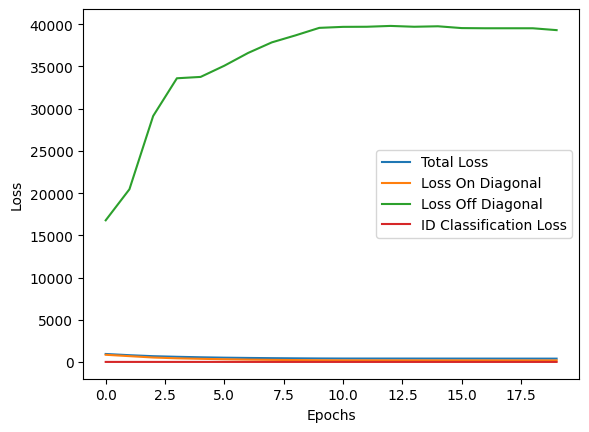

In [ ]:
import torch
import torch.optim as optim
import torch_optimizer as optimizers  # Thêm thư viện torch_optimizer
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn.functional as F

# Attention Mechanism (Multi-head Attention)
class AttentionLayer(torch.nn.Module):
    def __init__(self, embed_size, num_heads):
        super(AttentionLayer, self).__init__()
        self.attention = torch.nn.MultiheadAttention(embed_dim=embed_size, num_heads=num_heads, dropout=0.1)

    def forward(self, x):
        # Chuyển đổi tensor input thành dạng cần thiết cho multihead attention (seq_len, batch_size, embed_size)
        x = x.unsqueeze(0)  # Thêm chiều để tương thích với input (seq_len, batch_size, embed_size)
        attn_output, _ = self.attention(x, x, x)  # Tính toán Attention
        return attn_output.squeeze(0)  # Loại bỏ chiều thêm vào

# Barlow Twins Model with ID classification
class BarlowTwinsModel(torch.nn.Module):
    def __init__(self, backbone, num_classes, in_features=512, num_heads=8):
        super(BarlowTwinsModel, self).__init__()
        self.backbone = backbone

        # Thêm lớp Attention vào phần backbone
        self.attention_layer = AttentionLayer(embed_size=in_features, num_heads=num_heads)

        # Thêm projection head sâu hơn với nhiều lớp và số neurons lớn
        self.projection_head = torch.nn.Sequential(
            torch.nn.Linear(in_features, 2048),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(2048, 1024)
        )

        # Lớp phân loại ID
        self.id_classifier = torch.nn.Linear(1024, num_classes)  # Giả sử num_classes là số lượng ID

    def forward(self, x1, x2):
        # Trích xuất đặc trưng từ ảnh
        z1 = self.backbone(x1)
        z2 = self.backbone(x2)

        # Áp dụng Attention vào các đặc trưng
        z1 = self.attention_layer(z1)
        z2 = self.attention_layer(z2)

        # Áp dụng projection head
        z1_proj = self.projection_head(z1)
        z2_proj = self.projection_head(z2)

        # Dự đoán ID từ projection head
        id_preds_1 = self.id_classifier(z1_proj)
        id_preds_2 = self.id_classifier(z2_proj)

        return z1_proj, z2_proj, id_preds_1, id_preds_2

# Hàm tính các phần tử ngoài đường chéo
def off_diagonal(correlation_matrix):
    n = correlation_matrix.size(0)  # Số lượng mẫu trong batch
    mask = ~torch.eye(n, dtype=bool, device=correlation_matrix.device)
    return correlation_matrix[mask].view(n, n - 1)

# Hàm chuẩn hóa tensor
def normalize_tensor(tensor, eps=1e-8):
    mean = tensor.mean(dim=0, keepdim=True)
    std = tensor.std(dim=0, keepdim=True)
    std = torch.where(std == 0, torch.tensor(eps, device=tensor.device), std)
    return (tensor - mean) / std

# Hàm tính Barlow Twins Loss
def barlow_twins_loss(z1, z2, lambda_param=0.0051):
    N, D = z1.size()
    z1_norm = normalize_tensor(z1)
    z2_norm = normalize_tensor(z2)

    c = torch.mm(z1_norm.T, z2_norm) / N

    on_diag = torch.diagonal(c).sub(1).pow(2).sum()
    off_diag = off_diagonal(c).pow(2).sum()

    loss = on_diag + lambda_param * off_diag
    return loss, on_diag, off_diag

# Hàm tính loss phân loại ID
# Hàm tính loss phân loại ID
def id_classification_loss(id_preds_1, id_preds_2, id, criterion, device):
    # Đảm bảo tất cả các tensor đều ở trên cùng một device
    id = id.to(device)  # Chuyển id sang device
    id_preds_1 = id_preds_1.to(device)  # Chuyển id_preds_1 sang device
    id_preds_2 = id_preds_2.to(device)  # Chuyển id_preds_2 sang device

    # Loss phân loại cho mỗi ảnh
    loss_1 = criterion(id_preds_1, id)
    loss_2 = criterion(id_preds_2, id)
    return loss_1 + loss_2

# Hàm huấn luyện mô hình Barlow Twins với loss phân loại ID
# Hàm huấn luyện mô hình Barlow Twins với loss phân loại ID
def train_barlow_twins(model, loader, optimizer, scheduler, epochs, lambda_param, patience, criterion, num_classes, device='cuda'):
    model.to(device)
    all_total_loss, all_loss_on_diagonal, all_loss_off_diagonal, all_id_loss = [], [], [], []

    best_loss = float('inf')
    epochs_without_improvement = 0

    for epoch in range(epochs):
        total_loss = 0
        total_loss_on_diagonal = 0
        total_loss_off_diagonal = 0
        total_id_loss = 0
        model.train()

        for batch_idx, (x1, x2, age, id) in enumerate(tqdm(loader, desc=f'Epoch {epoch+1}/{epochs}', unit='batch')):
            x1, x2 = x1.to(device), x2.to(device)  # Chuyển ảnh sang device
            optimizer.zero_grad()

            z1_proj, z2_proj, id_preds_1, id_preds_2 = model(x1, x2)

            # Tính loss Barlow Twins
            loss, loss_on_diagonal, loss_off_diagonal = barlow_twins_loss(z1_proj, z2_proj, lambda_param)

            # Tính loss phân loại ID
            loss_id = id_classification_loss(id_preds_1, id_preds_2, id, criterion, device)  # Sửa: chuyển id và preds sang device

            # Tổng loss
            total = loss + loss_id
            total.backward()
            optimizer.step()

            total_loss += total.item()
            total_loss_on_diagonal += loss_on_diagonal.item()
            total_loss_off_diagonal += loss_off_diagonal.item()
            total_id_loss += loss_id.item()

            # In loss từng batch
            print(f"Epoch {epoch+1}/{epochs}, Batch {batch_idx+1}/{len(loader)}, "
                  f"Total Loss: {total.item():.4f}, "
                  f"Barlow Twins Loss: {loss.item():.4f}, "
                  f"On-diagonal: {loss_on_diagonal.item():.4f}, "
                  f"Off-diagonal: {loss_off_diagonal.item():.4f}, "
                  f"ID Loss: {loss_id.item():.4f} ")

        avg_total_loss = total_loss / len(loader)
        avg_loss_on_diagonal = total_loss_on_diagonal / len(loader)
        avg_loss_off_diagonal = total_loss_off_diagonal / len(loader)
        avg_id_loss = total_id_loss / len(loader)

        all_total_loss.append(avg_total_loss)
        all_loss_on_diagonal.append(avg_loss_on_diagonal)
        all_loss_off_diagonal.append(avg_loss_off_diagonal)
        all_id_loss.append(avg_id_loss)

        # In kết quả mỗi epoch
        print(f"Epoch {epoch+1}/{epochs}, Total Loss: {avg_total_loss:.4f}")
        print(f"Epoch {epoch+1}/{epochs}, Barlow Twins Loss: {avg_loss_on_diagonal + avg_loss_off_diagonal:.4f}")
        print(f"Epoch {epoch+1}/{epochs}, ID Classification Loss: {avg_id_loss:.4f}")

        if avg_total_loss < best_loss:
            best_loss = avg_total_loss
            epochs_without_improvement = 0
            torch.save(model.backbone.state_dict(), 'barlow_twins_backbone.pth')
            torch.save(model.projection_head.state_dict(), 'barlow_twins_projectionHead.pth')
        else:
            epochs_without_improvement += 1
            print(f"Epochs without improvement: {epochs_without_improvement}/{patience}")

        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break

        if scheduler:
            scheduler.step()

    return all_total_loss, all_loss_on_diagonal, all_loss_off_diagonal, all_id_loss


# Khởi tạo mô hình, optimizer và scheduler
backbone = models.resnet18(pretrained=True)
backbone.fc = torch.nn.Identity()

for param in backbone.parameters():
    param.requires_grad = True

model = BarlowTwinsModel(backbone, num_classes=num_classes, in_features=512).to('cuda')

optimizer = optimizers.Lamb(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

criterion = torch.nn.CrossEntropyLoss()

# Huấn luyện mô hình
all_total_loss, all_loss_on_diagonal, all_loss_off_diagonal, all_id_loss = train_barlow_twins(
    model, ssl_dataloader, optimizer, scheduler, epochs=20, lambda_param=0.0051, patience=5, criterion=criterion, num_classes=100, device='cuda'
)

# Vẽ biểu đồ loss
plt.plot(all_total_loss, label='Total Loss')
plt.plot(all_loss_on_diagonal, label='Loss On Diagonal')
plt.plot(all_loss_off_diagonal, label='Loss Off Diagonal')
plt.plot(all_id_loss, label='ID Classification Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Giả sử các giá trị loss đã được lưu trữ trong các danh sách:
# all_total_loss, all_loss_on_diagonal, all_loss_off_diagonal, all_id_loss

# Tạo một danh sách chứa các giá trị loss và nhãn tương ứng
losses = [
    (all_total_loss, 'Total Loss'),
    (all_loss_on_diagonal, 'Loss On Diagonal'),
    (all_loss_off_diagonal, 'Loss Off Diagonal'),
    (all_id_loss, 'ID Classification Loss')
]

# Tạo biểu đồ riêng cho từng loại loss
for loss, label in losses:
    plt.figure()  # Tạo một hình mới cho mỗi biểu đồ
    plt.plot(loss, label=label)
    plt.legend()
    plt.title(f'{label} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)  # Thêm lưới để dễ quan sát
    plt.show()


NameError: name 'all_total_loss' is not defined

In [ ]:
import random
import numpy as np
import cv2
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import os



# Định nghĩa các kỹ thuật biến đổi ảnh SSL
data_transforms_ssl1 = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.05),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1.0)),
    transforms.ToTensor(),  # Chuyển ảnh sang tensor trước
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.05), value='random'),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

data_transforms_ssl2 = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.RandomAffine(degrees=5, translate=(0.05, 0.05)),
    transforms.RandomGrayscale(p=0.2),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.ToTensor(),  # Chuyển ảnh sang tensor trước
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Dataset cho Barlow Twins
class SSLDataset(Dataset):
    def __init__(self, image_paths, transform1, transform2):
        self.image_paths = image_paths
        self.transform1 = transform1  # Biến đổi đầu tiên cho ảnh 1
        self.transform2 = transform2  # Biến đổi thứ hai cho ảnh 2

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert("RGB")  # Đảm bảo ảnh là RGB
        img1 = self.transform1(img)  # Áp dụng biến đổi đầu tiên
        img2 = self.transform2(img)  # Áp dụng biến đổi thứ hai
        return img1, img2

    def __len__(self):
        return len(self.image_paths)

# Đọc danh sách các ảnh
image_paths = [os.path.join(destination_train_ssl_dir, f) for f in os.listdir(destination_train_ssl_dir) if f.endswith('.jpg')]  # Hoặc .png tùy vào định dạng ảnh của bạn

# Khởi tạo Dataset và DataLoader
ssl_dataset = SSLDataset(image_paths=image_paths, transform1=data_transforms_ssl1, transform2=data_transforms_ssl2)
ssl_dataloader = DataLoader(ssl_dataset, batch_size=128, shuffle=True)


#SSL

In [ ]:
import torch
import torch.optim as optim
import torch_optimizer as optimizers  # Thêm thư viện torch_optimizer
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchvision import models
import torch.nn.functional as F

# Attention Mechanism (Multi-head Attention)
class AttentionLayer(torch.nn.Module):
    def __init__(self, embed_size, num_heads):
        super(AttentionLayer, self).__init__()
        self.attention = torch.nn.MultiheadAttention(embed_dim=embed_size, num_heads=num_heads, dropout=0.1)

    def forward(self, x):
        # Chuyển đổi tensor input thành dạng cần thiết cho multihead attention (seq_len, batch_size, embed_size)
        x = x.unsqueeze(0)  # Thêm chiều để tương thích với input (seq_len, batch_size, embed_size)
        attn_output, _ = self.attention(x, x, x)  # Tính toán Attention
        return attn_output.squeeze(0)  # Loại bỏ chiều thêm vào

# Barlow Twins Model
class BarlowTwinsModel(torch.nn.Module):
    def __init__(self, backbone, in_features=512, num_heads=8):
        super(BarlowTwinsModel, self).__init__()
        self.backbone = backbone

        # Thêm lớp Attention vào phần backbone
        self.attention_layer = AttentionLayer(embed_size=in_features, num_heads=num_heads)

        # Thêm projection head sâu hơn với nhiều lớp và số neurons lớn
        self.projection_head = torch.nn.Sequential(
            torch.nn.Linear(in_features, 2048),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(2048, 1024)
        )

    def forward(self, x1, x2):
        # Trích xuất đặc trưng từ ảnh
        z1 = self.backbone(x1)
        z2 = self.backbone(x2)

        # Áp dụng Attention vào các đặc trưng
        z1 = self.attention_layer(z1)
        z2 = self.attention_layer(z2)

        # Áp dụng projection head
        z1 = self.projection_head(z1)
        z2 = self.projection_head(z2)

        return z1, z2

# Hàm tính các phần tử ngoài đường chéo
def off_diagonal(correlation_matrix):
    n = correlation_matrix.size(0)  # Số lượng mẫu trong batch
    mask = ~torch.eye(n, dtype=bool, device=correlation_matrix.device)
    return correlation_matrix[mask].view(n, n - 1)

# Hàm chuẩn hóa tensor
def normalize_tensor(tensor, eps=1e-8):
    # Tính trung bình và độ lệch chuẩn của tensor
    mean = tensor.mean(dim=0, keepdim=True)
    std = tensor.std(dim=0, keepdim=True)

    # Kiểm tra nếu độ lệch chuẩn là 0 và thay thế bằng epsilon
    std = torch.where(std == 0, torch.tensor(eps, device=tensor.device), std)

    # Chuẩn hóa tensor
    return (tensor - mean) / std

# Hàm tính Barlow Twins Loss
def barlow_twins_loss(z1, z2, lambda_param=0.0051):
    N, D = z1.size()  # N là batch_size, D là số lượng features
    z1_norm = normalize_tensor(z1)
    z2_norm = normalize_tensor(z2)

    # Tính ma trận tương quan
    c = torch.mm(z1_norm.T, z2_norm) / N

    # Tính loss trên đường chéo (phải gần 1)
    on_diag = torch.diagonal(c).sub(1).pow(2).sum()  # Tính sự sai lệch với 1 và bình phương

    # Tính loss ngoài đường chéo (phải gần 0)
    off_diag = off_diagonal(c).pow(2).sum()

    # Tính tổng loss
    loss = on_diag + lambda_param * off_diag
    return loss, on_diag, off_diag

# Hàm huấn luyện mô hình Barlow Twins
def train_barlow_twins(model, loader, optimizer, scheduler, epochs, lambda_param, patience, device='cuda'):
    model.to(device)
    all_total_loss, all_loss_on_diagonal, all_loss_off_diagonal = [], [], []

    # Biến theo dõi early stopping
    best_loss = float('inf')  # Khởi tạo loss tốt nhất là vô cùng lớn
    epochs_without_improvement = 0  # Số epoch không có cải thiện trong loss

    for epoch in range(epochs):
        total_loss = 0
        total_loss_on_diagonal = 0
        total_loss_off_diagonal = 0
        model.train()

        # Sử dụng tqdm để theo dõi tiến trình huấn luyện
        for batch_idx, (x1, x2) in enumerate(tqdm(loader, desc=f'Epoch {epoch+1}/{epochs}', unit='batch')):
            x1, x2 = x1.to(device), x2.to(device)
            optimizer.zero_grad()
            z1, z2 = model(x1, x2)
            loss, loss_on_diagonal, loss_off_diagonal = barlow_twins_loss(z1, z2, lambda_param)
            loss.backward()

            optimizer.step()
            total_loss += loss.item()
            total_loss_on_diagonal += loss_on_diagonal.item()
            total_loss_off_diagonal += loss_off_diagonal.item()

            # In loss từng batch
            print(f"Epoch {epoch+1}/{epochs}, Batch {batch_idx+1}/{len(loader)}, "
                  f"Loss: {loss.item():.4f}, "
                  f"On-diagonal: {loss_on_diagonal.item():.4f}, "
                  f"Off-diagonal: {loss_off_diagonal.item():.4f}")

        # Tính loss trung bình trên toàn bộ batch của epoch
        avg_total_loss = total_loss / len(loader)
        avg_loss_on_diagonal = total_loss_on_diagonal / len(loader)
        avg_loss_off_diagonal = total_loss_off_diagonal / len(loader)

        all_total_loss.append(avg_total_loss)
        all_loss_on_diagonal.append(avg_loss_on_diagonal)
        all_loss_off_diagonal.append(avg_loss_off_diagonal)

        # In kết quả mỗi epoch
        print(f"Epoch {epoch+1}/{epochs}, Total Loss: {avg_total_loss:.4f}")
        print(f"Epoch {epoch+1}/{epochs}, On-diagonal Loss: {avg_loss_on_diagonal:.4f}")
        print(f"Epoch {epoch+1}/{epochs}, Off-diagonal Loss: {avg_loss_off_diagonal:.4f}")

        # Cập nhật Early Stopping
        if avg_total_loss < best_loss:
            best_loss = avg_total_loss
            epochs_without_improvement = 0
            # Lưu trọng số của Backbone khi tìm được loss tốt nhất
            torch.save(model.backbone.state_dict(), 'barlow_twins_backbone.pth')
        else:
            epochs_without_improvement += 1
            print(f"Epochs without improvement: {epochs_without_improvement}/{patience}")

        # Nếu không có cải thiện trong 'patience' epoch, dừng huấn luyện
        if epochs_without_improvement >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break

        # Cập nhật scheduler nếu có
        if scheduler:
            scheduler.step()

    return all_total_loss, all_loss_on_diagonal, all_loss_off_diagonal


# Khởi tạo mô hình, optimizer và scheduler
backbone = models.resnet18(pretrained=True)
backbone.fc = torch.nn.Identity()  # Bỏ FC layer cuối cùng

for param in backbone.parameters():
    param.requires_grad = True  # Cho phép huấn luyện tất cả các tham số

model = BarlowTwinsModel(backbone, in_features=512).to(device)  # Di chuyển model sang GPU (nếu có)

optimizer = optimizers.Lamb(model.parameters(), lr=1e-4)  # Khởi tạo Lamb optimizer

# Ví dụ sử dụng scheduler StepLR
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Tiến hành huấn luyện
all_total_loss, all_loss_on_diagonal, all_loss_off_diagonal = train_barlow_twins(
    model, dataloader_ssl, optimizer, scheduler, epochs=50, lambda_param=0.005, patience=10, device='cuda'
)

import matplotlib.pyplot as plt
# Tạo 3 hình riêng biệt để vẽ các loss

# Vẽ Total Loss
plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 1)  # 3 hàng, 1 cột, vị trí thứ nhất
plt.plot(all_total_loss, label='Total Loss', color='blue', linestyle='-', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Total Loss', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Vẽ On-diagonal Loss
plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 1)  # 3 hàng, 1 cột, vị trí thứ hai
plt.plot(all_loss_on_diagonal, label='On-diagonal Loss', color='green', linestyle='--', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('On-diagonal Loss', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Vẽ Off-diagonal Loss
plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 1)  # 3 hàng, 1 cột, vị trí thứ ba
plt.plot(all_loss_off_diagonal, label='Off-diagonal Loss', color='red', linestyle='-.', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Off-diagonal Loss', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 158MB/s]


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

#Dataloader cho SL

In [ ]:
import os
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import torch_optimizer as optimizers
from tqdm import tqdm
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 2. Tổ chức lại ảnh theo độ tuổi
# -----------------------------------
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

def organize_images_by_age(directory):
    for file_name in os.listdir(directory):
        age = file_name.split('_')[0]  # Lấy độ tuổi từ tên tệp
        age_dir = os.path.join(directory, age)
        if not os.path.exists(age_dir):
            os.makedirs(age_dir)
        shutil.move(os.path.join(directory, file_name), os.path.join(age_dir, file_name))

# Sắp xếp ảnh trong các thư mục
organize_images_by_age(train_dir)
organize_images_by_age(val_dir)
organize_images_by_age(test_dir)

# Kiểm tra lại
print(f"Train directory: {os.listdir(train_dir)}")
print(f"Validation directory: {os.listdir(val_dir)}")
print(f"Test directory: {os.listdir(test_dir)}")

# -----------------------------------
# 3. Đọc dữ liệu và chuẩn bị DataLoader
# -----------------------------------
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_data = datasets.ImageFolder(root=train_dir, transform=transform_train)
val_data = datasets.ImageFolder(root=val_dir, transform=transform_train)
test_data = datasets.ImageFolder(root=test_dir, transform=transform_test)

print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Test data size: {len(test_data)}")

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)



Train directory: ['53', '56', '24', '57', '18', '43', '48', '58', '54', '33', '26', '17', '51', '32', '47', '39', '34', '23', '25', '37', '29', '16', '61', '40', '50', '42', '22', '55', '44', '59', '38', '31', '28', '45', '49', '27', '14', '52', '30', '41', '35', '46', '20', '21', '36', '15', '60', '62', '19']
Validation directory: ['53', '56', '24', '57', '18', '43', '48', '58', '54', '33', '26', '17', '51', '32', '47', '39', '34', '23', '25', '37', '29', '16', '61', '40', '50', '42', '22', '55', '44', '59', '38', '31', '28', '45', '49', '27', '52', '30', '41', '35', '46', '20', '21', '36', '60', '62', '19']
Test directory: ['53', '56', '24', '57', '18', '43', '48', '58', '54', '33', '26', '17', '51', '32', '47', '39', '34', '23', '25', '37', '29', '16', '61', '40', '50', '42', '22', '55', '44', '59', '38', '31', '28', '45', '49', '27', '52', '30', '41', '35', '46', '20', '21', '36', '60', '62', '19']
Train data size: 6720
Validation data size: 747
Test data size: 830


#Khởi tạo Agepredictmodel = backbone + MLP

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# 1. Backbone (ResNet18)
class Backbone(nn.Module):
    def __init__(self):
        super(Backbone, self).__init__()
        self.backbone = models.resnet18(pretrained=True)  # Sử dụng ResNet18
        self.backbone.fc = nn.Identity()  # Loại bỏ fully connected layer cuối

    def forward(self, x):
        return self.backbone(x)

# 2. Projection
class ProjectionHead(nn.Module):
    def __init__(self, input_dim=512, projection_dim=2048):
        super(ProjectionHead, self).__init__()
        self.projection = nn.Sequential(
            nn.Linear(input_dim, projection_dim),  # Projection từ đặc trưng của ResNet18
            nn.ReLU(),
            nn.Linear(projection_dim, projection_dim)
        )

    def forward(self, x):
        return self.projection(x)

# 3. MLP (Dự đoán tuổi)
class MLPForAgePrediction(nn.Module):
    def __init__(self, feature_dim=2048, hidden_dim=1024, num_classes=1):
        super(MLPForAgePrediction, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(feature_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, num_classes),
        )

    def forward(self, x):
        return self.mlp(x)

# 4. Mô hình kết hợp: Backbone + Projection + MLP
class AgePredictionModel(nn.Module):
    def __init__(self, backbone, projection_dim=2048, feature_dim=2048, hidden_dim=1024, num_classes=1):
        super(AgePredictionModel, self).__init__()
        self.backbone = backbone
        self.projection = ProjectionHead(input_dim=512, projection_dim=projection_dim)
        self.mlp = MLPForAgePrediction(feature_dim=feature_dim, hidden_dim=hidden_dim, num_classes=num_classes)

    def forward(self, x):
        # Lấy đặc trưng từ backbone
        features = self.backbone(x)
        #print(f"Backbone output shape: {features.shape}")  # Kiểm tra kích thước đầu ra của backbone
        # Projection
        projected_features = self.projection(features)
        #print(f"Projection output shape: {projected_features.shape}")  # Kiểm tra kích thước đầu ra của projection
        # Dự đoán tuổi
        predictions = self.mlp(projected_features)
        #print(f"Final predictions shape: {predictions.shape}")  # Kiểm tra kích thước đầu ra cuối cùng
        return predictions

#SL với backbone tải từ SSL

In [ ]:
# Chuyển thiết bị
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Khởi tạo backbone
backbone = Backbone().to(device)

# Tải trọng số cho phần Backbone (ResNet18)
backbone.load_state_dict(torch.load('barlow_twins_backbone.pth'), strict=False)

# Khởi tạo mô hình AgePredictionModel
model = AgePredictionModel(backbone=backbone, feature_dim=2048, hidden_dim=1024).to(device)

# Tải trọng số cho phần ProjectionHead
model.projection.load_state_dict(torch.load('barlow_twins_projectionHead.pth'), strict=False)

# Kiểm tra mô hình
print(model)

# Kiểm tra đầu ra với dữ liệu giả
dummy_input = torch.randn(8, 3, 224, 224).to(device)  # Batch size 8, 3 kênh màu, kích thước 224x224
model(dummy_input)

<ipython-input-18-fbe824fe418d>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  backbone.load_state_dict(torch.load('barlow_twins_backbone.pth'), strict=False)
<ipython-inp

AgePredictionModel(
  (backbone): Backbone(
    (backbone): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (b

tensor([[-0.0146],
        [ 0.0051],
        [-0.0292],
        [ 0.0523],
        [ 0.0562],
        [ 0.0300],
        [ 0.0454],
        [ 0.0394]], device='cuda:0', grad_fn=<AddmmBackward0>)

Epoch 1/20 - Validation: 100%|██████████| 24/24 [00:07<00:00,  3.07batch/s]


Epoch 1/20, Train Loss: 105.0748, Validation Loss: 68.8648


Epoch 2/20 - Validation: 100%|██████████| 24/24 [00:06<00:00,  3.58batch/s]


Epoch 2/20, Train Loss: 54.4419, Validation Loss: 64.6536


Epoch 3/20 - Validation: 100%|██████████| 24/24 [00:07<00:00,  3.24batch/s]


Epoch 3/20, Train Loss: 43.1408, Validation Loss: 61.1871


Epoch 4/20 - Validation: 100%|██████████| 24/24 [00:08<00:00,  2.97batch/s]


Epoch 4/20, Train Loss: 38.1256, Validation Loss: 63.5284


Epoch 5/20 - Validation: 100%|██████████| 24/24 [00:07<00:00,  3.16batch/s]


Epoch 5/20, Train Loss: 30.9328, Validation Loss: 58.5955


Epoch 6/20 - Validation: 100%|██████████| 24/24 [00:06<00:00,  3.56batch/s]


Epoch 6/20, Train Loss: 26.8787, Validation Loss: 54.7202


Epoch 7/20 - Validation: 100%|██████████| 24/24 [00:07<00:00,  3.25batch/s]


Epoch 7/20, Train Loss: 24.9334, Validation Loss: 65.9614


Epoch 8/20 - Validation: 100%|██████████| 24/24 [00:08<00:00,  2.94batch/s]


Epoch 8/20, Train Loss: 22.5591, Validation Loss: 67.6212


Epoch 9/20 - Validation: 100%|██████████| 24/24 [00:07<00:00,  3.12batch/s]


Epoch 9/20, Train Loss: 20.3852, Validation Loss: 50.1796


Epoch 10/20 - Validation: 100%|██████████| 24/24 [00:06<00:00,  3.55batch/s]


Epoch 10/20, Train Loss: 19.2938, Validation Loss: 85.1538


Epoch 11/20 - Validation: 100%|██████████| 24/24 [00:07<00:00,  3.36batch/s]


Epoch 11/20, Train Loss: 15.4877, Validation Loss: 51.5092


Epoch 12/20 - Validation: 100%|██████████| 24/24 [00:08<00:00,  2.94batch/s]


Epoch 12/20, Train Loss: 13.4709, Validation Loss: 50.1868


Epoch 13/20 - Validation: 100%|██████████| 24/24 [00:08<00:00,  2.91batch/s]


Epoch 13/20, Train Loss: 12.2530, Validation Loss: 51.3424


Epoch 14/20 - Validation: 100%|██████████| 24/24 [00:07<00:00,  3.24batch/s]


Epoch 14/20, Train Loss: 12.0850, Validation Loss: 49.3382


Epoch 15/20 - Validation: 100%|██████████| 24/24 [00:06<00:00,  3.53batch/s]


Epoch 15/20, Train Loss: 11.4806, Validation Loss: 51.0672


Epoch 16/20 - Validation: 100%|██████████| 24/24 [00:06<00:00,  3.44batch/s]


Epoch 16/20, Train Loss: 10.8569, Validation Loss: 48.1830


Epoch 17/20 - Validation: 100%|██████████| 24/24 [00:07<00:00,  3.10batch/s]


Epoch 17/20, Train Loss: 10.3420, Validation Loss: 49.3325


Epoch 18/20 - Validation: 100%|██████████| 24/24 [00:08<00:00,  2.89batch/s]


Epoch 18/20, Train Loss: 10.7610, Validation Loss: 50.6558


Epoch 19/20 - Validation: 100%|██████████| 24/24 [00:07<00:00,  3.04batch/s]


Epoch 19/20, Train Loss: 9.4793, Validation Loss: 52.3556


Epoch 20/20 - Validation: 100%|██████████| 24/24 [00:06<00:00,  3.53batch/s]


Epoch 20/20, Train Loss: 9.8014, Validation Loss: 49.6224


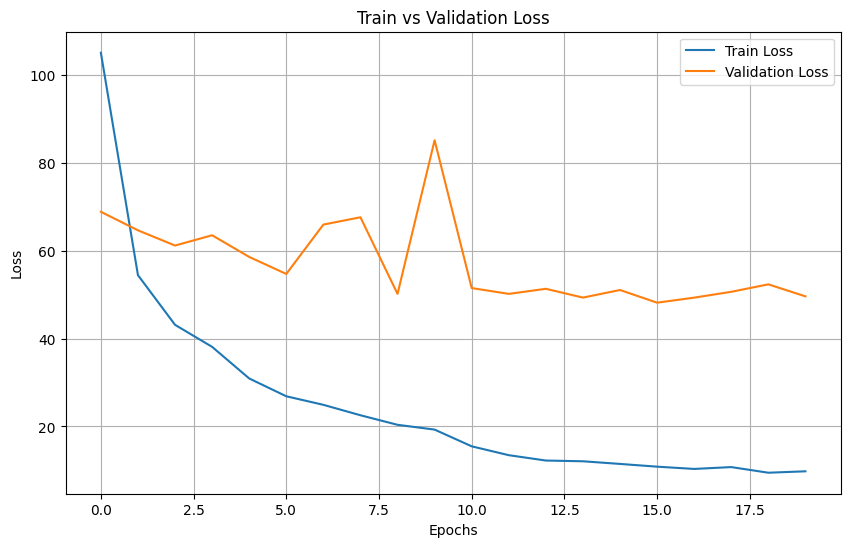

<ipython-input-19-02bcffe926ef>:96: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Mean Absolute Error on Test Set: 4.7033


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

# -----------------------------------
# 5. Khởi tạo mô hình và optimizer
# -----------------------------------

# MSE loss cho bài toán hồi quy
criterion = nn.MSELoss()

# Định nghĩa optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Giảm lr sử dụng scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# -----------------------------------
# 6. Định nghĩa hàm huấn luyện
# -----------------------------------
def train_model(model, train_loader, val_loader, optimizer, epochs, early_stopping_patience, device='cuda'):
    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    patience_counter = 0
    model.to(device)

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0

        # Huấn luyện mô hình
        for x, y in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} - Training', unit='batch'):
            x, y = x.to(device), y.to(device)
            y = y.float().view(-1, 1)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        model.eval()
        total_val_loss = 0
        # Đánh giá mô hình trên tập validation
        with torch.no_grad():
            for x, y in tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} - Validation', unit='batch'):
                x, y = x.to(device), y.to(device)
                y = y.float().view(-1, 1)
                outputs = model(x)
                loss = criterion(outputs, y)
                total_val_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        avg_val_loss = total_val_loss / len(val_loader)

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

        # Lưu mô hình với loss tốt nhất
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

        # Cập nhật learning rate nếu có scheduler
        if scheduler:
            scheduler.step()

    # Vẽ biểu đồ train và validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train vs Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return train_losses, val_losses

# -----------------------------------
# 7. Đánh giá mô hình trên tập kiểm tra
# -----------------------------------
def evaluate_model(model, test_loader, device='cuda'):
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()

    all_preds = []
    all_labels = []
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            all_preds.append(outputs.cpu().numpy())
            all_labels.append(y.cpu().numpy())

    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    mae = mean_absolute_error(all_labels, all_preds)
    print(f'Mean Absolute Error on Test Set: {mae:.4f}')

# -----------------------------------
# 8. Huấn luyện và đánh giá mô hình
# -----------------------------------
train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, epochs=20, early_stopping_patience=5)
evaluate_model(model, test_loader)


#Phần này trở về sau e đang nháp

tac vu phu sl

In [ ]:
import os
import shutil

# Đường dẫn đến các thư mục ảnh
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

# Hàm tổ chức lại ảnh theo độ tuổi
def organize_images_by_age_and_id(directory):
    for file_name in os.listdir(directory):
        # Giả sử tên file là dạng "age_ID_name.jpg"
        parts = file_name.split('_')  # Chia theo dấu gạch dưới
        age = parts[0]  # Độ tuổi
        person_id = parts[1]  # ID người

        # Tạo đường dẫn cho thư mục theo độ tuổi và ID người
        age_dir = os.path.join(directory, age)
        if not os.path.exists(age_dir):
            os.makedirs(age_dir)

        id_dir = os.path.join(age_dir, person_id)
        if not os.path.exists(id_dir):
            os.makedirs(id_dir)

        # Di chuyển ảnh vào thư mục tương ứng
        shutil.move(os.path.join(directory, file_name), os.path.join(id_dir, file_name))

# Tổ chức lại ảnh trong các thư mục train, val, test
organize_images_by_age_and_id(train_dir)
organize_images_by_age_and_id(val_dir)
organize_images_by_age_and_id(test_dir)

print("Tổ chức ảnh thành công!")
print(f"Train directory: {os.listdir(train_dir)}")
print(f"Validation directory: {os.listdir(val_dir)}")
print(f"Test directory: {os.listdir(test_dir)}")


from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from PIL import Image
import os

class AgeAndIDDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir)]

        # Tạo danh sách các ID người và độ tuổi từ tên tệp
        self.ids = [fname.split('_')[1] for fname in os.listdir(image_dir)]  # Giả sử ID là phần thứ 2 trong tên tệp
        self.ages = [fname.split('_')[0] for fname in os.listdir(image_dir)]  # Độ tuổi là phần đầu tiên trong tên tệp

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Đọc ảnh
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        # Tạo nhãn độ tuổi (hồi quy)
        age = int(self.ages[idx])

        # Tạo nhãn ID người (phân loại)
        id_label = int(self.ids[idx])  # Giả sử ID là một giá trị số

        # Áp dụng các phép biến đổi nếu có
        if self.transform:
            image = self.transform(image)

        return image, age, id_label

# 3. Đọc dữ liệu và chuẩn bị DataLoader
# -----------------------------------
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Khởi tạo dataset
train_data = AgeAndIDDataset(image_dir=train_dir, transform=transform_train)
val_data = AgeAndIDDataset(image_dir=val_dir, transform=transform_train)
test_data = AgeAndIDDataset(image_dir=test_dir, transform=transform_test)

print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Test data size: {len(test_data)}")

# Tạo DataLoader
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Kiểm tra 1 batch
for images, ages, ids in train_loader:
    print(images.shape, ages.shape, ids.shape)
    break

import torch
import torch.nn as nn

# Lớp FeatureExtractor: Trích xuất đặc trưng từ Backbone (ResNet)
class FeatureExtractor(nn.Module):
    def __init__(self, backbone):
        super(FeatureExtractor, self).__init__()
        self.backbone = backbone
        self.backbone.fc = nn.Identity()  # Loại bỏ fully connected layer cuối để trích xuất đặc trưng

    def forward(self, x):
        return self.backbone(x)


# Lớp MLPForAgePrediction: Dự đoán tuổi (hồi quy)
class MLPForAgePrediction(nn.Module):
    def __init__(self, feature_dim=512, hidden_dim=1024, num_classes=1):
        super(MLPForAgePrediction, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(feature_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, num_classes)  # Sử dụng 1 đầu ra cho dự đoán tuổi
        )

    def forward(self, x):
        return self.mlp(x)


# Lớp AgePredictionModel: Tổng hợp các tác vụ (dự đoán tuổi và phân loại ID)
class AgePredictionModel(nn.Module):
    def __init__(self, backbone, feature_dim=512, hidden_dim=1024, num_classes_age=1, num_classes_id=10):
        super(AgePredictionModel, self).__init__()
        self.feature_extractor = FeatureExtractor(backbone)  # Lớp trích xuất đặc trưng
        self.age_predictor = MLPForAgePrediction(feature_dim, hidden_dim, num_classes_age)  # Dự đoán tuổi (hồi quy)

        # Lớp phân loại ID người (tác vụ phụ)
        self.id_classifier = nn.Sequential(
            nn.Linear(feature_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Linear(hidden_dim // 2, num_classes_id)  # Số lớp phụ thuộc vào số ID người
        )

    def forward(self, x):
        features = self.feature_extractor(x)  # Trích xuất đặc trưng từ Backbone
        age = self.age_predictor(features)  # Dự đoán tuổi (hồi quy)
        id = self.id_classifier(features)  # Phân loại ID người (phân loại)

        return age, id


#Tac vu phu ssl nháp

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import random
import numpy as np

# Chuyển đổi dữ liệu cho Barlow Twins (tạo các biến thể ngẫu nhiên khác nhau cho mỗi ảnh)
data_transforms_ssl1 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

data_transforms_ssl2 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.RandomRotation(30),  # Thêm một phép biến đổi khác để tạo sự khác biệt giữa hai ảnh
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Hàm Masking: Che khuất một phần ngẫu nhiên của ảnh
def apply_random_mask(img, mask_ratio=0.2):
    """
    Áp dụng masking cho một phần ngẫu nhiên của ảnh.
    :param img: Ảnh đầu vào.
    :param mask_ratio: Tỷ lệ phần ảnh bị che khuất (20%).
    :return: Ảnh sau khi đã được mask.
    """
    img_np = np.array(img)  # Chuyển ảnh thành numpy array để thao tác với pixel.
    h, w, c = img_np.shape

    # Tính toán kích thước của vùng cần mask
    mask_h = int(h * mask_ratio)
    mask_w = int(w * mask_ratio)

    # Chọn vị trí ngẫu nhiên để tạo mask
    top = random.randint(0, h - mask_h)
    left = random.randint(0, w - mask_w)

    # Mask vùng này (gán giá trị pixel của vùng này về 0 hoặc giá trị trung bình)
    img_np[top:top+mask_h, left:left+mask_w, :] = 0

    return Image.fromarray(img_np)

# Dataset cho Barlow Twins với tác vụ phụ Masked Autoencoding
class SSLDataset(Dataset):
    def __init__(self, image_paths, transform1, transform2, mask_ratio=0.2):
        """
        :param image_paths: Danh sách các đường dẫn ảnh.
        :param transform1: Biến đổi cho ảnh 1 (dùng cho Barlow Twins).
        :param transform2: Biến đổi cho ảnh 2 (dùng cho Barlow Twins).
        :param mask_ratio: Tỷ lệ phần ảnh bị che khuất khi áp dụng tác vụ Masked Autoencoding.
        """
        self.image_paths = image_paths
        self.transform1 = transform1  # Biến đổi đầu tiên cho ảnh 1
        self.transform2 = transform2  # Biến đổi thứ hai cho ảnh 2
        self.mask_ratio = mask_ratio  # Tỷ lệ phần ảnh bị che khuất

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert("RGB")  # Đảm bảo ảnh có 3 kênh RGB

        # Áp dụng biến đổi cho ảnh 1 và ảnh 2 để tạo các biến thể ngẫu nhiên cho Barlow Twins
        img1 = self.transform1(img)
        img2 = self.transform2(img)

        # Tạo một phiên bản ảnh bị mask (Masked Image) cho tác vụ phụ
        img_masked = apply_random_mask(img, mask_ratio=self.mask_ratio)
        img_masked = self.transform1(img_masked)  # Áp dụng biến đổi để đảm bảo phù hợp với input

        return img1, img2, img_masked

    def __len__(self):
        return len(self.image_paths)


# Ví dụ sử dụng Dataset mới
image_paths = [os.path.join('path_to_images', fname) for fname in os.listdir('path_to_images')]
dataset = SSLDataset(image_paths, transform1=data_transforms_ssl1, transform2=data_transforms_ssl2)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Kiểm tra một batch
for img1, img2, img_masked in dataloader:
    print(img1.shape, img2.shape, img_masked.shape)
    break


Cũ

In [ ]:
# Lưu trọng số của backbone
torch.save(model.backbone.state_dict(), 'barlow_twins_backbone.pth')


In [ ]:
import os
import shutil

# Đường dẫn thư mục gốc của dữ liệu
train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

# Hàm giúp tạo thư mục cho độ tuổi và di chuyển ảnh vào thư mục tương ứng
def organize_images_by_age(directory):
    for file_name in os.listdir(directory):
        age = file_name.split('_')[0]  # Lấy độ tuổi từ tên tệp (ví dụ: '28' từ '28_Bug_Hall_0015.jpg')
        age_dir = os.path.join(directory, age)
        if not os.path.exists(age_dir):
            os.makedirs(age_dir)
        shutil.move(os.path.join(directory, file_name), os.path.join(age_dir, file_name))

# Sắp xếp ảnh trong các thư mục
organize_images_by_age(train_dir)
organize_images_by_age(val_dir)
organize_images_by_age(test_dir)

# Kiểm tra lại
print(f"Train directory: {os.listdir(train_dir)}")
print(f"Validation directory: {os.listdir(val_dir)}")
print(f"Test directory: {os.listdir(test_dir)}")


Train directory: ['47', '39', '52', '36', '16', '51', '42', '24', '26', '27', '19', '58', '60', '49', '37', '62', '41', '23', '59', '54', '28', '17', '29', '32', '35', '61', '30', '45', '44', '34', '15', '25', '53', '31', '50', '22', '57', '55', '38', '18', '48', '43', '46', '21', '20', '33', '56', '40']
Validation directory: ['47', '39', '52', '36', '16', '51', '42', '24', '26', '27', '19', '58', '60', '49', '37', '62', '41', '23', '59', '54', '28', '17', '29', '32', '35', '61', '30', '45', '44', '34', '25', '53', '31', '50', '22', '57', '55', '38', '18', '48', '43', '46', '21', '20', '33', '56', '40']
Test directory: ['47', '39', '52', '36', '16', '51', '42', '24', '26', '27', '19', '58', '60', '49', '37', '62', '41', '23', '59', '54', '28', '17', '29', '32', '35', '61', '30', '45', '44', '34', '25', '53', '31', '50', '22', '57', '55', '38', '18', '48', '43', '46', '21', '20', '33', '56', '40']


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Định nghĩa các phép biến đổi dữ liệu
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Đọc dữ liệu từ các thư mục đã được tổ chức
train_data = datasets.ImageFolder(root=train_dir, transform=transform_train)
val_data = datasets.ImageFolder(root=val_dir, transform=transform_train)
test_data = datasets.ImageFolder(root=test_dir, transform=transform_test)

# Kiểm tra kích thước dữ liệu
print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Test data size: {len(test_data)}")

# Tạo DataLoader cho các tập dữ liệu
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Kiểm tra thông tin của DataLoader
def check_dataloader_info(dataloader, device, name="DataLoader"):
    print(f"\nThông tin {name}:")
    print(f"Batch size: {dataloader.batch_size}")
    print(f"Số lượng batch: {len(dataloader)}")

    # In ra một batch để kiểm tra kích thước đầu vào
    data_iter = iter(dataloader)  # Lấy một iterator từ DataLoader
    inputs, labels = next(data_iter)  # Lấy một batch

    # Chuyển inputs và labels sang device
    inputs, labels = inputs.to(device), labels.to(device)

    print(f"Hình dạng của inputs (batch đầu tiên): {inputs.shape}")
    print(f"Hình dạng của labels (batch đầu tiên): {labels.shape}")
    print(f"Loại thiết bị: {inputs.device}")

# Kiểm tra thông tin cho từng DataLoader với device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
check_dataloader_info(train_loader, device, name="Train DataLoader")
check_dataloader_info(val_loader, device, name="Validation DataLoader")
check_dataloader_info(test_loader, device, name="Test DataLoader")


Train data size: 6569
Validation data size: 730
Test data size: 811

Thông tin Train DataLoader:
Batch size: 32
Số lượng batch: 206
Hình dạng của inputs (batch đầu tiên): torch.Size([32, 3, 224, 224])
Hình dạng của labels (batch đầu tiên): torch.Size([32])
Loại thiết bị: cuda:0

Thông tin Validation DataLoader:
Batch size: 32
Số lượng batch: 23
Hình dạng của inputs (batch đầu tiên): torch.Size([32, 3, 224, 224])
Hình dạng của labels (batch đầu tiên): torch.Size([32])
Loại thiết bị: cuda:0

Thông tin Test DataLoader:
Batch size: 32
Số lượng batch: 26
Hình dạng của inputs (batch đầu tiên): torch.Size([32, 3, 224, 224])
Hình dạng của labels (batch đầu tiên): torch.Size([32])
Loại thiết bị: cuda:0


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import torch_optimizer as optimizers  # Import thư viện LAMB optimizer
from tqdm import tqdm
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# 1. Trích xuất đặc trưng từ ResNet-18
class FeatureExtractor(nn.Module):
    def __init__(self, backbone):
        super(FeatureExtractor, self).__init__()
        # Sử dụng ResNet-18 đã tiền huấn luyện (loại bỏ fully connected layer cuối cùng)
        self.backbone = backbone
        self.backbone.fc = nn.Identity()  # Loại bỏ fully connected layer cuối

    def forward(self, x):
        # Trích xuất đặc trưng từ ResNet-18
        features = self.backbone(x)
        return features


# 2. MLP dự đoán tuổi
class MLPForAgePrediction(nn.Module):
    def __init__(self, feature_dim=512, hidden_dim=256, num_classes=1):
        super(MLPForAgePrediction, self).__init__()

        # MLP với các lớp Fully Connected (FC)
        self.mlp = nn.Sequential(
            nn.Linear(feature_dim, hidden_dim),  # Đầu vào có kích thước 512 từ ResNet-18
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, num_classes)  # Dự đoán tuổi (output_dim = 1)
        )

    def forward(self, x):
        # Dự đoán tuổi từ đặc trưng đã trích xuất
        age_prediction = self.mlp(x)
        return age_prediction


# 3. Tích hợp Feature Extractor và MLP
class AgePredictionModel(nn.Module):
    def __init__(self, backbone, feature_dim=512, hidden_dim=256, num_classes=1):
        super(AgePredictionModel, self).__init__()
        # Feature Extractor (ResNet-18)
        self.feature_extractor = FeatureExtractor(backbone)
        # MLP để dự đoán tuổi
        self.age_predictor = MLPForAgePrediction(feature_dim, hidden_dim, num_classes)

    def forward(self, x):
        # Trích xuất đặc trưng từ ResNet-18
        features = self.feature_extractor(x)
        # Dự đoán tuổi từ các đặc trưng
        age_prediction = self.age_predictor(features)
        return age_prediction


# 4. Khởi tạo mô hình dự đoán tuổi
backbone = models.resnet18(weights='IMAGENET1K_V1')  # Cập nhật với 'weights' thay cho 'pretrained'
model = AgePredictionModel(backbone, feature_dim=512, hidden_dim=256).to(device)

# 5. Tải trọng số cho phần backbone
backbone.load_state_dict(torch.load('barlow_twins_backbone.pth'), strict=False)  # Sử dụng strict=False để bỏ qua lớp fc

# 6. MSE Loss cho dự đoán tuổi
criterion = nn.MSELoss()

# 7. Sử dụng LAMB optimizer từ thư viện torch_optimizer
optimizer = optimizers.Lamb(model.parameters(), lr=0.1e-4)


# 8. Huấn luyện mô hình với fine-tuning
def train_model(model, train_loader, val_loader, optimizer, epochs, early_stopping_patience=5, device='cuda'):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    patience_counter = 0
    model.to(device)

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0

        # Sử dụng tqdm để theo dõi quá trình huấn luyện
        for x, y in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs} - Training', unit='batch'):
            x, y = x.to(device), y.to(device)
            y = y.float().view(-1, 1)  # Chuyển nhãn thành kích thước (batch_size, 1)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)  # Sử dụng MSE Loss có sẵn
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        # Tính loss cho validation
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for x, y in tqdm(val_loader, desc=f'Epoch {epoch+1}/{epochs} - Validation', unit='batch'):
                x, y = x.to(device), y.to(device)
                y = y.float().view(-1, 1)  # Chuyển nhãn thành kích thước (batch_size, 1)
                outputs = model(x)
                loss = criterion(outputs, y)  # Sử dụng MSE Loss có sẵn
                total_val_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        avg_val_loss = total_val_loss / len(val_loader)

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

        # Early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            # Lưu trọng số của mô hình khi validation loss giảm
            torch.save(model.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    # # Vẽ đồ thị loss
    # plt.figure(figsize=(10, 6))
    # plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', color='blue')
    # plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss', color='orange')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.title('Training and Validation Loss')
    # plt.legend()
    # plt.show()

    return train_losses, val_losses


# 9. Đánh giá trên test data
def evaluate_model(model, test_loader, device='cuda'):
    # Tải lại mô hình tốt nhất đã lưu
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()

    all_preds = []
    all_labels = []
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            all_preds.append(outputs.cpu().numpy())
            all_labels.append(y.cpu().numpy())

    # Tính toán MAE
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    mae = mean_absolute_error(all_labels, all_preds)
    print(f'Mean Absolute Error on Test Set: {mae:.4f}')


# 10. Huấn luyện mô hình và đánh giá
epochs = 50  # Số lượng epoch
train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, epochs)

# Đánh giá trên tập kiểm tra
evaluate_model(model, test_loader)


<ipython-input-64-0a3a31a28e9c>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  backbone.load_state_dict(torch.load('barlow_twins_backbone.pth'), strict=False)  # Sử dụng 

Epoch 1/50, Train Loss: 628.0397, Validation Loss: 581.9901


Epoch 2/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  2.88batch/s]


Epoch 2/50, Train Loss: 624.3239, Validation Loss: 577.8890


Epoch 3/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.85batch/s]


Epoch 3/50, Train Loss: 619.9602, Validation Loss: 573.6008


Epoch 4/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.87batch/s]


Epoch 4/50, Train Loss: 616.5672, Validation Loss: 569.7046


Epoch 5/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.14batch/s]


Epoch 5/50, Train Loss: 611.5781, Validation Loss: 565.3380


Epoch 6/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.24batch/s]


Epoch 6/50, Train Loss: 607.4920, Validation Loss: 560.8365


Epoch 7/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.28batch/s]


Epoch 7/50, Train Loss: 603.2585, Validation Loss: 556.6835


Epoch 8/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.28batch/s]


Epoch 8/50, Train Loss: 597.9828, Validation Loss: 552.0676


Epoch 9/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.41batch/s]


Epoch 9/50, Train Loss: 592.2860, Validation Loss: 547.2881


Epoch 10/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.32batch/s]


Epoch 10/50, Train Loss: 587.3304, Validation Loss: 542.1699


Epoch 11/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.34batch/s]


Epoch 11/50, Train Loss: 582.7950, Validation Loss: 537.5662


Epoch 12/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.03batch/s]


Epoch 12/50, Train Loss: 576.4160, Validation Loss: 531.4745


Epoch 13/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.00batch/s]


Epoch 13/50, Train Loss: 571.2755, Validation Loss: 525.8316


Epoch 14/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  2.97batch/s]


Epoch 14/50, Train Loss: 565.6052, Validation Loss: 520.5555


Epoch 15/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.78batch/s]


Epoch 15/50, Train Loss: 559.7264, Validation Loss: 514.0251


Epoch 16/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.44batch/s]


Epoch 16/50, Train Loss: 553.6125, Validation Loss: 510.6755


Epoch 17/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.39batch/s]


Epoch 17/50, Train Loss: 546.8170, Validation Loss: 502.5092


Epoch 18/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  2.97batch/s]


Epoch 18/50, Train Loss: 540.1692, Validation Loss: 494.9476


Epoch 19/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  2.90batch/s]


Epoch 19/50, Train Loss: 532.8997, Validation Loss: 491.9506


Epoch 20/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  2.92batch/s]


Epoch 20/50, Train Loss: 527.7840, Validation Loss: 483.3641


Epoch 21/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  2.91batch/s]


Epoch 21/50, Train Loss: 520.0618, Validation Loss: 475.4329


Epoch 22/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.08batch/s]


Epoch 22/50, Train Loss: 513.1004, Validation Loss: 470.5253


Epoch 23/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.06batch/s]


Epoch 23/50, Train Loss: 504.6103, Validation Loss: 461.0561


Epoch 24/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.12batch/s]


Epoch 24/50, Train Loss: 496.8065, Validation Loss: 456.7816


Epoch 25/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.85batch/s]


Epoch 25/50, Train Loss: 488.9929, Validation Loss: 450.4573


Epoch 26/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.85batch/s]


Epoch 26/50, Train Loss: 481.0896, Validation Loss: 440.8938


Epoch 27/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.85batch/s]


Epoch 27/50, Train Loss: 473.2841, Validation Loss: 432.6410


Epoch 28/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.86batch/s]


Epoch 28/50, Train Loss: 464.4253, Validation Loss: 426.0493


Epoch 29/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.87batch/s]


Epoch 29/50, Train Loss: 454.8808, Validation Loss: 414.4560


Epoch 30/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.87batch/s]


Epoch 30/50, Train Loss: 445.3626, Validation Loss: 406.1256


Epoch 31/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  2.88batch/s]


Epoch 31/50, Train Loss: 437.2416, Validation Loss: 402.8345


Epoch 32/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.87batch/s]


Epoch 32/50, Train Loss: 428.4373, Validation Loss: 392.0451


Epoch 33/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.85batch/s]


Epoch 33/50, Train Loss: 418.0958, Validation Loss: 384.3990


Epoch 34/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  2.90batch/s]


Epoch 34/50, Train Loss: 407.7826, Validation Loss: 369.3087


Epoch 35/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  2.99batch/s]


Epoch 35/50, Train Loss: 398.1109, Validation Loss: 362.8069


Epoch 36/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.11batch/s]


Epoch 36/50, Train Loss: 387.8101, Validation Loss: 356.5985


Epoch 37/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.16batch/s]


Epoch 37/50, Train Loss: 378.2073, Validation Loss: 348.1544


Epoch 38/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.07batch/s]


Epoch 38/50, Train Loss: 367.2531, Validation Loss: 337.2680


Epoch 39/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.08batch/s]


Epoch 39/50, Train Loss: 356.5846, Validation Loss: 325.9423


Epoch 40/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.32batch/s]


Epoch 40/50, Train Loss: 346.6125, Validation Loss: 311.6007


Epoch 41/50 - Validation: 100%|██████████| 23/23 [00:08<00:00,  2.72batch/s]


Epoch 41/50, Train Loss: 334.8910, Validation Loss: 304.4855


Epoch 42/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.55batch/s]


Epoch 42/50, Train Loss: 323.8589, Validation Loss: 294.4268


Epoch 43/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.52batch/s]


Epoch 43/50, Train Loss: 314.0290, Validation Loss: 282.1061


Epoch 44/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.51batch/s]


Epoch 44/50, Train Loss: 303.0847, Validation Loss: 281.5107


Epoch 45/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.54batch/s]


Epoch 45/50, Train Loss: 292.0318, Validation Loss: 272.6405


Epoch 46/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.36batch/s]


Epoch 46/50, Train Loss: 281.0998, Validation Loss: 253.1325


Epoch 47/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.42batch/s]


Epoch 47/50, Train Loss: 270.8946, Validation Loss: 243.7763


Epoch 48/50 - Validation: 100%|██████████| 23/23 [00:06<00:00,  3.31batch/s]


Epoch 48/50, Train Loss: 260.1477, Validation Loss: 237.6721


Epoch 49/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.25batch/s]


Epoch 49/50, Train Loss: 249.0510, Validation Loss: 227.5039


Epoch 50/50 - Validation: 100%|██████████| 23/23 [00:07<00:00,  3.12batch/s]
<ipython-input-64-0a3a31a28e9c>:147: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_st

Epoch 50/50, Train Loss: 238.5017, Validation Loss: 215.9150
Mean Absolute Error on Test Set: 11.8595


In [ ]:
# Đánh giá trên tập kiểm tra
evaluate_model(model, test_loader)

<ipython-input-64-0a3a31a28e9c>:147: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Mean Absolute Error on Test Set: 11.8595
